In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math,random
from tqdm import tqdm
import digits_data # from file

def step_function(x):
    return 1 if x >= 0 else 0


def perceptron_output(weights, bias, x):
    '''Returns 1 if the perceptrion 'fires', 0 if not '''
    return step_function(np.dot(weights, x) + bias)

def sigmoid(t):
    return 1 / (1 + math.exp(-t))

def neuron_output(weights, inputs):
    return sigmoid(np.dot(weights, inputs))



def feed_forward(neural_network, input_vector):
    """takes in a neural network (represented as a list of lists of lists of weights)
    and returns the output from forward-propagating the input"""

    outputs = []

    for layer in neural_network:

        input_with_bias = input_vector + [1]             # add a bias input
        output = [neuron_output(neuron, input_with_bias) # compute the output
                  for neuron in layer]                   # for this layer
        outputs.append(output)                           # and remember it

        # the input to the next layer is the output of this one
        input_vector = output

    return outputs
    
def backpropagate(network, input_vector, targets):
    hidden_outputs, outputs = feed_forward(network, input_vector)
    # the output * (1 - output) is from the derivative of sigmoid
    output_deltas = [output * (1 - output) * (output - target) for output, target in zip(outputs, targets)]
        # adjust weights for output layer, one neuron at a time
    for i, output_neuron in enumerate(network[-1]):
    # focus on the ith output layer neuron
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            # adjust the jth weight based on both
            # this neuron's delta and its jth input
            output_neuron[j] -= output_deltas[i] * hidden_output
    # back-propagate errors to hidden layer
    hidden_deltas = [hidden_output * (1 - hidden_output) * np.dot(output_deltas, [n[i] for n in output_layer])for i, hidden_output in enumerate(hidden_outputs)]
    #print(hidden_deltas)
    # adjust weights for hidden layer, one neuron at a time
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input

## Neural network training

In [ ]:
inputs = digits_data.DIGITS
targets = [[1 if i == j else 0 for i in range(10)]
for j in range(10)]

# NEURAL NETWORK
###########
random.seed(0) # to get repeatable results
input_size = 25 # each input is a vector of length 25
num_hidden = 5 # we'll have 5 neurons in the hidden layer
output_size = 10 # we need 10 outputs for each input

# each hidden neuron has one weight per input, plus a bias weight
hidden_layer = [[random.random() for __ in range(input_size + 1)] for __ in range(num_hidden)]

# each output neuron has one weight per hidden neuron, plus a bias weight
output_layer = [[random.random() for __ in range(num_hidden + 1)] for __ in range(output_size)]

# the network starts out with random weights
network = [hidden_layer, output_layer]
print(network)

# 10,000 iterations seems enough to converge
for __ in  tqdm(range(10000)):
    for input_vector, target_vector in zip(inputs, targets):
        backpropagate(network, input_vector, target_vector)

[[[0.8444218515250481, 0.7579544029403025, 0.420571580830845, 0.25891675029296335, 0.5112747213686085, 0.4049341374504143, 0.7837985890347726, 0.30331272607892745, 0.4765969541523558, 0.5833820394550312, 0.9081128851953352, 0.5046868558173903, 0.28183784439970383, 0.7558042041572239, 0.6183689966753316, 0.25050634136244054, 0.9097462559682401, 0.9827854760376531, 0.8102172359965896, 0.9021659504395827, 0.3101475693193326, 0.7298317482601286, 0.8988382879679935, 0.6839839319154413, 0.47214271545271336, 0.1007012080683658], [0.4341718354537837, 0.6108869734438016, 0.9130110532378982, 0.9666063677707588, 0.47700977655271704, 0.8653099277716401, 0.2604923103919594, 0.8050278270130223, 0.5486993038355893, 0.014041700164018955, 0.7197046864039541, 0.39882354222426875, 0.824844977148233, 0.6681532012318508, 0.0011428193144282783, 0.49357786646532464, 0.8676027754927809, 0.24391087688713198, 0.32520436274739006, 0.8704712321086546, 0.19106709150239054, 0.5675107406206719, 0.23861592861522019, 

  0%|                                                                                                                                                  | 0/10000 [00:00<?, ?it/s]

[1.1789808852330893e-05, 1.5748822659818704e-05, 2.3592491659727488e-05, 3.2421027329123523e-06, 9.77951793679265e-05]
[0.010358775656686246, 0.0064775931860164265, 0.0028192677747147445, 0.0026199393923664618, 0.0034313848400173977]
[1.094899330405076e-05, 1.2656690901383929e-05, 3.626494473535727e-06, 5.821646708467434e-07, 5.2020931124672354e-05]
[3.542480123704123e-06, 7.434903275461104e-06, -3.212643481849165e-06, 4.047612523862745e-07, 2.492945633411266e-05]
[1.784160518343404e-05, 0.0001795241854892432, -8.936851049761357e-05, -3.429481477923804e-05, -3.5687439514687366e-05]
[3.1189714477123085e-06, 1.784017678018385e-06, -1.1311260656709006e-05, -1.6513579591874334e-07, 4.004730056306902e-06]
[-6.937943455284796e-07, 1.2648072137319012e-06, -5.987099281974526e-06, 5.230238555599531e-07, -2.3583455242194146e-05]
[0.00029279843288787256, 0.00021801956765872034, -0.0003805801853081075, -0.00017158790578390148, -0.00013785447209430714]
[-6.069018113804297e-07, -1.0993698443474467e-

[0.00010545603042924138, 3.0625709270034285e-05, -4.837871421989571e-06, -6.673765808029781e-05, -2.98932354136238e-05]
[2.609227482880168e-07, -2.2594597739641417e-07, -3.5280011321471176e-07, 2.435253007918318e-10, -1.564396351931783e-06]
[-1.5286067562877195e-07, -3.507308805196373e-07, 6.035896474960176e-07, 3.169744641934891e-08, -1.387365751358012e-06]
[-1.7305079115653206e-06, -2.124559631566116e-06, 3.102602024236629e-06, -7.654363898387746e-09, 9.081163039005751e-06]
[0.0004259407115928453, -0.0005033287021198627, -0.000505005465024122, 9.664293091507369e-05, -0.00044728176064574035]
[1.6150735354642743e-06, -1.3881661863889855e-06, 8.943461209080039e-07, 3.447461717156335e-08, -6.983462464050594e-06]
[-6.936654055603418e-07, 1.5203931384543976e-06, -1.5170557393047242e-06, -1.662056536602477e-07, 9.222407204619893e-06]
[-2.8807951006949325e-05, 1.878419872275484e-05, 5.357302981132077e-06, -7.93457112177687e-06, -1.7603086911113567e-05]
[-1.0759107903908599e-08, 1.17333050724

  0%|▏                                                                                                                                        | 10/10000 [00:00<01:44, 95.95it/s]

[-1.6699714953782935e-06, -2.046240981789485e-06, 3.173434479567518e-06, 3.3946062543479282e-09, 9.211335860993063e-06]
[0.0004722368147273881, -0.00047763459883213877, -0.00045666175015956427, 0.00010159204640176795, -0.0004204094568573079]
[1.6228036675805746e-06, -1.3352082075866749e-06, 9.220606838682131e-07, 3.572745839695456e-08, -6.560217568044192e-06]
[-6.706046115040175e-07, 1.4980326511278375e-06, -1.4202774205837984e-06, -1.5948967091936085e-07, 9.150022543850127e-06]
[-2.799175748622701e-05, 1.9121055515036245e-05, 6.560935579190824e-06, -7.427642660105843e-06, -1.4944467594627195e-05]
[2.874903353169176e-09, 1.2283542770972492e-07, -1.5461350761497248e-06, -3.531721333456182e-08, 1.857727674791992e-06]
[-6.100792247505817e-07, 1.9653967584673672e-07, -8.805917483936812e-07, 1.4472550622932965e-07, -5.846380093345973e-06]
[0.0001067305387972107, 3.3094073944320636e-05, 3.1425490076871013e-06, -6.386968475751509e-05, -2.078811193273547e-05]
[2.655715434012156e-07, -2.1090800

[0.00010773430107983093, 3.342832669124974e-05, 4.9925576911484775e-06, -6.317759670864419e-05, -1.822581636728625e-05]
[2.692769946534869e-07, -2.0663887957700767e-07, -3.0268598762082985e-07, 1.999486638956805e-09, -1.3511862781914384e-06]
[-1.373268110103167e-07, -3.2526940830653945e-07, 6.340162082831553e-07, 3.464256669220684e-08, -1.073393704083499e-06]
[-1.6771268615057726e-06, -2.0085238467094056e-06, 3.1693113349248017e-06, 8.073579452002544e-09, 9.176011711110763e-06]
[0.0005367275046101633, -0.0004574544373689894, -0.0004239711243686613, 9.975878777358506e-05, -0.0004067890417442652]
[1.6464801112302333e-06, -1.3062976074590925e-06, 9.194306878803234e-07, 3.625227514941252e-08, -6.341377346626946e-06]
[-6.760070210795697e-07, 1.4777883070283365e-06, -1.3764555745109894e-06, -1.565534362596272e-07, 9.020623435520012e-06]
[-2.8031837428205227e-05, 1.9170274083306735e-05, 6.910533729512689e-06, -7.212052253000904e-06, -1.3789261910690797e-05]
[5.160016961772032e-09, 1.234914116

  0%|▎                                                                                                                                        | 21/10000 [00:00<01:41, 97.98it/s]

[-1.6966697982552167e-06, -2.001066224962711e-06, 3.1521578337694938e-06, 8.75233384527971e-09, 9.126137699764996e-06]
[0.0005714255875158397, -0.0004500400337200779, -0.0004134269418934091, 9.737824813912981e-05, -0.00040380721615323507]
[1.66186483427036e-06, -1.2990668769141566e-06, 9.120317775550265e-07, 3.633026228502936e-08, -6.290023392165456e-06]
[-6.854402708695035e-07, 1.469587713104429e-06, -1.3689152242998828e-06, -1.56087769497846e-07, 8.952564182364267e-06]
[-2.8255424122621317e-05, 1.913081065965022e-05, 6.878598353080473e-06, -7.181547622211804e-06, -1.3610648055186552e-05]
[3.5149786661152557e-09, 1.227421983105261e-07, -1.4951084430498666e-06, -3.26703270244804e-08, 1.9121773292378357e-06]
[-6.250569020497847e-07, 1.9409040221636328e-07, -8.513020387627027e-07, 1.4478658853210353e-07, -5.645205831039952e-06]
[0.00010851549067608921, 3.3324989665533296e-05, 5.371207573696478e-06, -6.30192617140352e-05, -1.7376803744790264e-05]
[2.7223189454075747e-07, -2.05228638029892

  0%|▎                                                                                                                                        | 27/10000 [00:00<02:21, 70.54it/s]

[-1.7296880397533304e-06, -1.9916868487239943e-06, 3.1258539261228066e-06, 9.542590289787489e-09, 9.049895015059635e-06]
[0.0006267147824810075, -0.00043993307517510604, -0.00039925754011873004, 9.363595204701178e-05, -0.0004001013518905355]
[1.686911484055159e-06, -1.2894692180554532e-06, 9.007102793897819e-07, 3.641983274816669e-08, -6.222020731248504e-06]
[-7.013613235695446e-07, 1.4580414866962003e-06, -1.3598550738151452e-06, -1.5551734536213656e-07, 8.853303289082555e-06]
[-2.8634010990284845e-05, 1.9067258119085116e-05, 6.808018378381254e-06, -7.146079582243577e-06, -1.3397265449915787e-05]
[5.363099783633644e-10, 1.215408968287591e-07, -1.4847973692479012e-06, -3.221210613090966e-08, 1.889472773656967e-06]
[-6.389197397141227e-07, 1.9245504563595254e-07, -8.457334709145086e-07, 1.4477499645877007e-07, -5.585535737930515e-06]
[0.00010950537149774935, 3.316595446821763e-05, 5.700287063214799e-06, -6.287317611436898e-05, -1.6508834090834773e-05]
[2.7605452105119925e-07, -2.0380635

[0.0001105703111657073, 3.30105537782165e-05, 6.0180415815817776e-06, -6.272996308680226e-05, -1.566720539169678e-05]
[2.8025325806402087e-07, -2.024472489027064e-07, -2.9815409393667347e-07, 2.2672224103560485e-09, -1.3111299409442982e-06]
[-1.4972545444233035e-07, -3.1886931218203526e-07, 6.138397700926311e-07, 3.4998712574949734e-08, -1.0414152587693494e-06]
[-1.7720518112903984e-06, -1.9813567481423117e-06, 3.0965104092172227e-06, 1.0417670447007037e-08, 8.963284874652512e-06]
[0.0006977201941704222, -0.00042912775967619, -0.0003840365194608968, 8.921306845979618e-05, -0.0003962580251693128]
[1.7193028022434434e-06, -1.2787503244157415e-06, 8.880195922858924e-07, 3.651404045130149e-08, -6.145354565020099e-06]
[-7.219815707566025e-07, 1.4452125542991034e-06, -1.3500866929341706e-06, -1.5486305041230565e-07, 8.740968681210633e-06]
[-2.9116826735342346e-05, 1.8996990932017857e-05, 6.72629231000413e-06, -7.106412871363836e-06, -1.3158442262547136e-05]
[-3.3303201993806264e-09, 1.201922

  0%|▌                                                                                                                                        | 37/10000 [00:00<02:31, 65.84it/s]

[-1.7915175221524612e-06, -1.9770360261420257e-06, 3.084444829776793e-06, 1.078977663840445e-08, 8.927100675841618e-06]
[0.0007306405320897848, -0.00042479343546545414, -0.00037788223351505355, 8.73049046039639e-05, -0.00039474260526342836]
[1.7343368340216576e-06, -1.2742468235768662e-06, 8.827731285771391e-07, 3.655225709846236e-08, -6.1129025767837956e-06]
[-7.315350511731846e-07, 1.4398959176942872e-06, -1.3460488119944936e-06, -1.5457883460331198e-07, 8.69390080023667e-06]
[-2.9337476387382007e-05, 1.896854759498129e-05, 6.69285295208982e-06, -7.089404701833508e-06, -1.3056394014836598e-05]
[-5.114803050735069e-09, 1.1963774844777522e-07, -1.4690002661158707e-06, -3.147380054918884e-08, 1.8524454058718664e-06]
[-6.652006424158136e-07, 1.898715882557554e-07, -8.372167498533625e-07, 1.4472838335437858e-07, -5.489772518184557e-06]
[0.00011132656034614345, 3.291128917670845e-05, 6.230854583342076e-06, -6.263344682933351e-05, -1.5112394799471178e-05]
[2.8328620926111427e-07, -2.0156093

[0.00011253727945348436, 3.276906877248406e-05, 6.552612328857808e-06, -6.248664512768482e-05, -1.4287834927461072e-05]
[2.882270336253965e-07, -2.0025585517446845e-07, -2.960677392473443e-07, 2.407966616378846e-09, -1.2896645035801386e-06]
[-1.5889092186975624e-07, -3.154952875401476e-07, 6.029116404887197e-07, 3.5170984833523254e-08, -1.0248008798590242e-06]
[-1.8403584301592752e-06, -1.967158088723284e-06, 3.057447040162887e-06, 1.1655216511338e-08, 8.844847342088041e-06]
[0.0008142201000701036, -0.00041535247763560155, -0.0003643370721964736, 8.281730104551578e-05, -0.0003915122954451288]
[1.7724367586472644e-06, -1.2639086206521853e-06, 8.709556803823505e-07, 3.6636672584126825e-08, -6.0379395850660924e-06]
[-7.557179356641826e-07, 1.4278842636041328e-06, -1.3369218107556815e-06, -1.5390487087397546e-07, 8.586488481398288e-06]
[-2.9887935603621382e-05, 1.8906096211581472e-05, 6.618765363658956e-06, -7.049537882271574e-06, -1.2818066054698466e-05]
[-9.618827668815489e-09, 1.1839793

  0%|▋                                                                                                                                        | 47/10000 [00:00<02:16, 73.08it/s]

[-1.8629023594045874e-06, -1.963002792619354e-06, 3.046356302717193e-06, 1.2025506771575415e-08, 8.810518240986834e-06]
[0.0008533098866053534, -0.00041159108537647867, -0.00035887092972766916, 8.08762336138818e-05, -0.00039026081722699855]
[1.790187477343006e-06, -1.2595408500430648e-06, 8.660631298356534e-07, 3.6670821377558336e-08, -6.0061031219131885e-06]
[-7.669802317875898e-07, 1.4228972382127286e-06, -1.3331262744610106e-06, -1.536112315332796e-07, 8.541460803817835e-06]
[-3.0140554719528202e-05, 1.8880994867136608e-05, 6.5886961592076716e-06, -7.03235566784802e-06, -1.2715707016149762e-05]
[-1.1713056978594647e-08, 1.1788920605641722e-07, -1.454237307229067e-06, -3.0732566312015513e-08, 1.8181393083719104e-06]
[-6.96124628362843e-07, 1.8746385982497963e-07, -8.292425072881071e-07, 1.446497622774056e-07, -5.396719207069885e-06]
[0.00011339989343382267, 3.267864130545761e-05, 6.768907008761569e-06, -6.238733370750939e-05, -1.3742782770085583e-05]
[2.918093988209205e-07, -1.993999

[0.0001147860650084953, 3.254946456898979e-05, 7.0961109841630095e-06, -6.223605937507234e-05, -1.2931495889335476e-05]
[2.976711760081601e-07, -1.981339587552578e-07, -2.9407285207674485e-07, 2.5471579301378995e-09, -1.2684217019230733e-06]
[-1.6971437755400796e-07, -3.122312400546976e-07, 5.928439325534806e-07, 3.533467541695943e-08, -1.0077868983116133e-06]


  1%|▋                                                                                                                                        | 54/10000 [00:00<02:33, 64.61it/s]

[-1.9197926190971914e-06, -1.953462695995528e-06, 3.0215547503925506e-06, 1.2889789538079058e-08, 8.732541957462649e-06]
[0.0009535078350859675, -0.000403474173185233, -0.00034688284875661985, 7.629616480117855e-05, -0.00038766011262528053]
[1.8353828700780259e-06, -1.2494658686039645e-06, 8.550193329133245e-07, 3.6745743401875534e-08, -5.932394177492883e-06]
[-7.956731112743339e-07, 1.4116136882974852e-06, -1.3245117329449669e-06, -1.5291445082690544e-07, 8.438665520230608e-06]
[-3.0774182564453633e-05, 1.8826277310286946e-05, 6.522444634362592e-06, -6.991988470594957e-06, -1.2475996107714117e-05]
[-1.7048983547805996e-08, 1.1675343676012434e-07, -1.4444165743575577e-06, -3.0209416988760316e-08, 1.7957714801263046e-06]
[-7.211864708909736e-07, 1.858751513235171e-07, -8.239252560310185e-07, 1.4457672341380327e-07, -5.332963242697835e-06]
[0.00011502867943245238, 3.2528682001811725e-05, 7.150973214679013e-06, -6.221056525107556e-05, -1.2796958484172513e-05]
[2.9871022309911256e-07, -1.9

[0.00011656054709265325, 3.240843343551042e-05, 7.482163554022069e-06, -6.205580803666442e-05, -1.1993368936456306e-05]
[3.053591549288523e-07, -1.9667815906510873e-07, -2.927132829863829e-07, 2.6440196970741394e-09, -1.2536214415569573e-06]
[-1.7853615429716024e-07, -3.0999432938089803e-07, 5.86271427850369e-07, 3.5445035925904776e-08, -9.955635635164702e-07]
[-1.983589794934368e-06, -1.9441026812600794e-06, 2.998211046895735e-06, 1.3757054117685771e-08, 8.657517557432003e-06]
[0.0010686875301950166, -0.00039628463780566153, -0.0003359434693502842, 7.162987574744266e-05, -0.00038552527111153096]
[1.8866537063459446e-06, -1.239509295876321e-06, 8.444565080939923e-07, 3.681389989836152e-08, -5.859339637059397e-06]
[-8.282998007011868e-07, 1.4007951793368868e-06, -1.3161954013768409e-06, -1.5220074618603764e-07, 8.338948017814574e-06]
[-3.147855546882088e-05, 1.8776956957868167e-05, 6.461686393607777e-06, -6.951160606000372e-06, -1.2234492628037576e-05]
[-2.313225094770773e-08, 1.1568776

  1%|▊                                                                                                                                        | 62/10000 [00:00<02:38, 62.52it/s]

[-1.993343851955794e-06, -1.9427774472511896e-06, 2.9949922316563603e-06, 1.3881397289191346e-08, 8.64704006853626e-06]
[0.0010865715923436335, -0.00039533417701234234, -0.00033446514836121463, 7.095503199183923e-05, -0.0003852600399777474]
[1.8945405443347673e-06, -1.2380931840698373e-06, 8.429839347446451e-07, 3.68230721964429e-08, -5.848944926205377e-06]
[-8.333291309057265e-07, 1.399285679622856e-06, -1.3150287791417294e-06, -1.520973547921193e-07, 8.324947362574043e-06]
[-3.158570316183603e-05, 1.8770354974970884e-05, 6.453459295790675e-06, -6.945284608803365e-06, -1.2199799837239065e-05]
[-2.4072498266884248e-08, 1.1554116131037237e-07, -1.4336307067230306e-06, -2.9605379346988805e-08, 1.7718719618316535e-06]
[-7.541025349006867e-07, 1.8415052901901825e-07, -8.180696877630331e-07, 1.4447616085574344e-07, -5.261309044035311e-06]
[0.00011710217410307826, 3.237003994695109e-05, 7.593342478303873e-06, -6.200350894380473e-05, -1.1726770665024378e-05]
[3.077461435473018e-07, -1.9626536

[3.1548758442268056e-07, -1.9503237523199664e-07, -2.9117910293085254e-07, 2.754494872258342e-09, -1.2367104022879e-06]
[-1.9020889776260534e-07, -3.074689493152629e-07, 5.792107865857473e-07, 3.556782574613202e-08, -9.811915484226015e-07]
[-2.0667591999327787e-06, -1.933563744066777e-06, 2.973256718595442e-06, 1.4756556532493119e-08, 8.575384644729547e-06]
[0.0012235940329312625, -0.00038922999439054354, -0.00032470512970898525, 6.616396415273783e-05, -0.00038369756430589683]
[1.9542558198310494e-06, -1.2281980433398497e-06, 8.329104928984878e-07, 3.688319231867583e-08, -5.776382022514241e-06]
[-8.715242213544026e-07, 1.3889585068510362e-06, -1.3069914744350712e-06, -1.5136316634469796e-07, 8.228615539413904e-06]
[-3.2387792711415254e-05, 1.8727299265281737e-05, 6.399095197365566e-06, -6.903803322706106e-06, -1.1955229383919062e-05]
[-3.124287280343473e-08, 1.1455400529669376e-07, -1.4245144288539211e-06, -2.906983369469488e-08, 1.7524365175107178e-06]
[-7.875075448604078e-07, 1.82717

  1%|▉                                                                                                                                        | 72/10000 [00:01<02:21, 70.18it/s]

[-2.1012820994956173e-06, -1.9296402902520253e-06, 2.9643636821006632e-06, 1.5134882752181634e-08, 8.545584687877633e-06]
[0.0012895328758529814, -0.0003869154947538826, -0.0003208380883450396, 6.407045497931934e-05, -0.00038319332786833214]
[1.9825296563321395e-06, -1.223955463771506e-06, 8.287107860636987e-07, 3.690669427527837e-08, -5.745351061878851e-06]
[-8.896900900159375e-07, 1.3846561424413099e-06, -1.3036075702122097e-06, -1.510427364670145e-07, 8.188212880954659e-06]
[-3.27624176051357e-05, 1.8710570362510557e-05, 6.377556846459641e-06, -6.885819148815401e-06, -1.1849322729232583e-05]
[-3.4674568835638156e-08, 1.1415184494794034e-07, -1.4206844423250886e-06, -2.8837876872987397e-08, 1.7445381411652385e-06]
[-8.033986668959658e-07, 1.8212345198970423e-07, -8.110121534299454e-07, 1.443266810150633e-07, -5.173261374377799e-06]
[0.0001200778979085935, 3.21907692706669e-05, 8.155329760164883e-06, -6.173612090947822e-05, -1.0401294765963798e-05]
[3.211905633501908e-07, -1.942127288

[3.306986869980391e-07, -1.929820712463625e-07, -2.8926085896115256e-07, 2.8928464753769405e-09, -1.2154551414886322e-06]
[-2.0790655083795148e-07, -3.0433006937685413e-07, 5.710294994031256e-07, 3.5717939804426164e-08, -9.624546770555894e-07]
[-2.1903137153643765e-06, -1.9205121227365182e-06, 2.9445903225270196e-06, 1.602813286747716e-08, 8.478211217774014e-06]
[0.0014641408423388474, -0.0003822564436721833, -0.0003125619814470903, 5.9074554690366797e-05, -0.00038243811098045]
[2.055920670186426e-06, -1.2140065407060366e-06, 8.191544954366171e-07, 3.695587455744721e-08, -5.67294140291562e-06]
[-9.371301548765939e-07, 1.3748901784318167e-06, -1.295821384999447e-06, -1.5028086515218846e-07, 8.095958230758728e-06]
[-3.3721548510034984e-05, 1.8675722821422982e-05, 6.3315690890148625e-06, -6.843297880907743e-06, -1.1598953663154639e-05]
[-4.3713246185336104e-08, 1.1326257790665761e-07, -1.4118931500143783e-06, -2.828985716684688e-08, 1.7271469640200368e-06]
[-8.449016174480675e-07, 1.80785

  1%|█                                                                                                                                        | 80/10000 [00:01<02:34, 64.09it/s]

[-2.204121660355561e-06, -1.919208554041865e-06, 2.941877265235664e-06, 1.6157181017660877e-08, 8.468837517962494e-06]
[0.0014918163521429409, -0.0003816793581588542, -0.0003114664211295122, 5.83467083925335e-05, -0.00038238164369628616]
[2.0673569045170457e-06, -1.2125758046577295e-06, 8.178146112382056e-07, 3.696221610633951e-08, -5.6625831126103935e-06]
[-9.445630488936833e-07, 1.3735251909651985e-06, -1.294719107173999e-06, -1.5017034447177086e-07, 8.083007382302367e-06]
[-3.3869441527920654e-05, 1.8671239755366362e-05, 6.325502742627537e-06, -6.837153426670745e-06, -1.1562753454809576e-05]
[-4.5140304959134783e-08, 1.1314121358685753e-07, -1.4106511986698623e-06, -2.8210702397060503e-08, 1.7247843903611508e-06]
[-8.514041943139669e-07, 1.805998384885079e-07, -8.055137828426115e-07, 1.4418994600726382e-07, -5.103766093857343e-06]
[0.00012283877575705831, 3.2062834644790225e-05, 8.612554221103396e-06, -6.151421744765509e-05, -9.346880267613514e-06]
[3.341564528299863e-07, -1.9257049

[0.0001251845982301106, 3.1976275534175954e-05, 8.960145615011323e-06, -6.134229148315303e-05, -8.556994755315081e-06]
[3.455415193635455e-07, -1.913275602229232e-07, -2.876964819852344e-07, 3.0042866474580177e-09, -1.1982301626635889e-06]
[-2.2542402075140175e-07, -3.0180540476167884e-07, 5.649829606639849e-07, 3.583697133480004e-08, -9.466621815762344e-07]


  1%|█▏                                                                                                                                       | 87/10000 [00:01<02:45, 59.75it/s]

[-2.309816935741919e-06, -1.9100598294903254e-06, 2.923675620087164e-06, 1.7073263810795734e-08, 8.40503772656555e-06]
[0.0017090216080189752, -0.0003783069692857695, -0.00030442491694729, 5.313672991273679e-05, -0.00038238569612575205]
[2.1552930897766133e-06, -1.2024524799076365e-06, 8.085863049656476e-07, 3.700132815248145e-08, -5.589825989618938e-06]
[-1.0021188703160392e-06, 1.3641726024588445e-06, -1.2870479774756378e-06, -1.4938430618638071e-07, 7.993937422052768e-06]
[-3.4994415729985306e-05, 1.8643539151873192e-05, 6.2867523190523e-06, -6.793587309850012e-06, -1.1305621275231011e-05]
[-5.6298763461227235e-08, 1.1233241363339195e-07, -1.4020280790749929e-06, -2.764958556370292e-08, 1.709139988291137e-06]
[-9.017492803774038e-07, 1.7933613759295383e-07, -8.007624625317847e-07, 1.4405946298405452e-07, -5.043422187618642e-06]
[0.00012560205775879207, 3.1962662437562287e-05, 9.018476458212311e-06, -6.13131228297492e-05, -8.425263067156292e-06]
[3.4760298733794476e-07, -1.9111877736

[0.0001282889945044485, 3.188609545085051e-05, 9.370882931588986e-06, -6.113465571934921e-05, -7.633354968899819e-06]
[3.611277310990709e-07, -1.8985205405494688e-07, -2.862806040007392e-07, 3.102780817144007e-09, -1.1828794631074903e-06]
[-2.4412646186889204e-07, -2.995625700217478e-07, 5.60051664201219e-07, 3.594178219127365e-08, -9.320796203215859e-07]
[-2.4345934382663568e-06, -1.9008158709841407e-06, 2.906889544671193e-06, 1.8017256089916598e-08, 8.344569085522497e-06]
[0.001977703526097712, -0.0003762198948244831, -0.0002985358152668105, 4.7691512424560935e-05, -0.0003831812516920525]
[2.259818396344636e-06, -1.1920495934989981e-06, 7.995676430238465e-07, 3.7029949169505244e-08, -5.5163077514279955e-06]
[-1.0715434573693623e-06, 1.355161936803593e-06, -1.2794060698846966e-06, -1.4857536317289524e-07, 7.907645553150562e-06]
[-3.630761048873015e-05, 1.8622814794096602e-05, 6.254949297834303e-06, -6.748922045193939e-06, -1.1040413639876011e-05]
[-7.002849295939078e-08, 1.11597969341

  1%|█▎                                                                                                                                       | 97/10000 [00:01<02:25, 67.86it/s]

[-2.4953505726733714e-06, -1.8968039177751835e-06, 2.900147769462518e-06, 1.84326627413643e-08, 8.319745984952563e-06]
[0.0021133382069358215, -0.0003757729965147823, -0.00029639046953948043, 4.527193243536033e-05, -0.00038380598420072686]
[2.310919666550125e-06, -1.1874676480952468e-06, 7.957441742844844e-07, 3.7038406872297076e-08, -5.484429996502383e-06]
[-1.1059189640702007e-06, 1.3514018561401321e-06, -1.2761210790221589e-06, -1.4822120260264976e-07, 7.871524215303137e-06]
[-3.694175918964428e-05, 1.8616315695311553e-05, 6.24364304428813e-06, -6.7293944579914385e-06, -1.0923618481390117e-05]
[-7.694103794242307e-08, 1.1130749143918252e-07, -1.3898127705090617e-06, -2.6822446920131414e-08, 1.6897187475880275e-06]
[-9.9248414977832e-07, 1.776434540453175e-07, -7.939809559764191e-07, 1.4385921657973474e-07, -4.957517743759811e-06]
[0.00013027663919105205, 3.184016672049752e-05, 9.608122445628413e-06, -6.101202117140575e-05, -7.102998452549791e-06]
[3.714191712344669e-07, -1.889901746

[0.00013361446360286053, 3.1779668900870886e-05, 9.967324924422598e-06, -6.082158373271173e-05, -6.3012521784127415e-06]
[3.89255094615028e-07, -1.876606378962332e-07, -2.8412763805412043e-07, 3.2458315650793767e-09, -1.1602261122823317e-06]
[-2.7877024537547143e-07, -2.962526262076358e-07, 5.536014279186322e-07, 3.609562660120826e-08, -9.095833161068292e-07]
[-2.658846614939032e-06, -1.887265702651843e-06, 2.885547060997641e-06, 1.9434038865586915e-08, 8.26462526519778e-06]
[0.0024938168998869118, -0.00037595970001403934, -0.0002923567474407732, 3.938444912635931e-05, -0.0003860643015792807]
[2.448858972323229e-06, -1.1763696088617128e-06, 7.868502120029474e-07, 3.70471099200761e-08, -5.408758503568308e-06]
[-1.2002550423958555e-06, 1.3428635994170994e-06, -1.268381800511668e-06, -1.4737622328476093e-07, 7.7893163789103e-06]
[-3.86329287417049e-05, 1.8607560971017647e-05, 6.2233132490004424e-06, -6.682802392329897e-06, -1.0641679998624205e-05]
[-9.63100164250073e-08, 1.106919465795412

  1%|█▍                                                                                                                                      | 105/10000 [00:01<02:33, 64.47it/s]

[-2.6851475302990752e-06, -1.8858776633936088e-06, 2.883598274640421e-06, 1.9581371282160678e-08, 8.25709594948696e-06]
[0.002557109432500152, -0.0003761452969864839, -0.0002919003270748866, 3.85120253452106e-05, -0.0003864920035732588]
[2.4710864103745423e-06, -1.1747265163091092e-06, 7.855761778883031e-07, 3.7046871503878145e-08, -5.397760707802806e-06]
[-1.2156782262029248e-06, 1.3416710207584004e-06, -1.2672633744090585e-06, -1.4725329525980233e-07, 7.777817875845607e-06]
[-3.890306089502097e-05, 1.860712756215037e-05, 6.221159800914648e-06, -6.676018625992084e-06, -1.0600127369877271e-05]
[-9.953278157445654e-08, 1.1061169588402213e-07, -1.379975896530539e-06, -2.613312362136872e-08, 1.6770404336737688e-06]
[-1.0882953205057094e-06, 1.7638921384858832e-07, -7.884669493589833e-07, 1.4369182829072447e-07, -4.888544858918492e-06]
[0.0001348377219783405, 3.176193607308926e-05, 1.0087895961208869e-05, -6.0756118539891626e-05, -6.031700682786209e-06]
[3.9596734815172497e-07, -1.87205038

[0.00013891001865309053, 3.1716971298616216e-05, 1.0451732911472647e-05, -6.055258171942255e-05, -5.213218326556507e-06]
[4.1900426666984424e-07, -1.8578921628092503e-07, -2.822314500858222e-07, 3.3628682289168196e-09, -1.1411439877903414e-06]
[-3.1677982183991464e-07, -2.9345378607970913e-07, 5.48979627242748e-07, 3.6225689928812846e-08, -8.896209201500167e-07]


  1%|█▌                                                                                                                                      | 112/10000 [00:01<02:42, 60.68it/s]

[-2.8958593946647544e-06, -1.8759229404519227e-06, 2.871023332236277e-06, 2.064990134245503e-08, 8.207136320624105e-06]
[0.0030845815127654073, -0.00037880125023634484, -0.0002896571488018325, 3.214111901347549e-05, -0.00039039984142495867]
[2.649256500160887e-06, -1.1626800360296422e-06, 7.765489189595702e-07, 3.703179368203043e-08, -5.318956233640442e-06]
[-1.3417020980339527e-06, 1.3335222554126499e-06, -1.2592965061371056e-06, -1.4637642883746786e-07, 7.69917516398465e-06]
[-4.105040706656197e-05, 1.8610939471857306e-05, 6.212074661920046e-06, -6.62753344894145e-06, -1.0297793611141445e-05]
[-1.2645756559147987e-07, 1.1011146478230116e-07, -1.3711804466425502e-06, -2.5504245796748357e-08, 1.6684890618336232e-06]
[-1.1980869005405774e-06, 1.7537333416858445e-07, -7.834892322015734e-07, 1.4354515587531888e-07, -4.827493540278716e-06]
[0.0001396556878658931, 3.171079280608912e-05, 1.0512622672524443e-05, -6.0517476169901716e-05, -5.075027243931624e-06]
[4.233394148876836e-07, -1.85544

[0.00014462261992688488, 3.168296305263701e-05, 1.0878622573384267e-05, -6.0298136469383284e-05, -4.231334758750147e-06]
[4.531653295920137e-07, -1.8401124404017674e-07, -2.8037756185137e-07, 3.4674494017404727e-09, -1.1233436841772842e-06]
[-3.623082871479655e-07, -2.908272983920675e-07, 5.4538317266182e-07, 3.634819467207108e-08, -8.700627958355319e-07]
[-3.1690839450423254e-06, -1.8654116739382572e-06, 2.8606075666512573e-06, 2.1800621966723612e-08, 8.162858773818394e-06]
[0.003820515941195615, -0.0003844965868627306, -0.00028937459009938056, 2.5201818260401796e-05, -0.0003963875809231523]
[2.8797150440353015e-06, -1.1493139695056883e-06, 7.671061092769423e-07, 3.698467102349243e-08, -5.235655936800501e-06]
[-1.5115963787247083e-06, 1.3257612337740595e-06, -1.250983352602559e-06, -1.4546965988991248e-07, 7.624161840905631e-06]
[-4.379707277648689e-05, 1.8629793645044117e-05, 6.215280803580874e-06, -6.577113857549397e-06, -9.968809694247043e-06]
[-1.64402799476553e-07, 1.097402536166

  1%|█▋                                                                                                                                      | 123/10000 [00:01<02:23, 68.90it/s]

[-3.3661819951762333e-06, -1.8590561276010363e-06, 2.8558612649380646e-06, 2.2507385383781428e-08, 8.140808759014606e-06]
[0.004385644000455928, -0.0003896646946545703, -0.0002903270269768633, 2.0902273597880782e-05, -0.0004011369466299883]
[3.044891730180389e-06, -1.140792269157209e-06, 7.613410213275732e-07, 3.693611076908683e-08, -5.184994237614191e-06]
[-1.6386940768575317e-06, 1.3215410057457311e-06, -1.2460068891324693e-06, -1.4493772633954788e-07, 7.583281175449162e-06]
[-4.575751517161311e-05, 1.8649847312311677e-05, 6.223987893053394e-06, -6.547342081150128e-06, -9.76361052447469e-06]
[-1.9399357576765013e-07, 1.096038125887803e-07, -1.3566065946277125e-06, -2.445259727778073e-08, 1.6615785611905417e-06]
[-1.4557197267970697e-06, 1.739733999219066e-07, -7.751269844051319e-07, 1.4333193054609055e-07, -4.7285495352678915e-06]
[0.00014955747550091396, 3.167428965676154e-05, 1.1182709553345805e-05, -6.0101166671939474e-05, -3.5025313383456393e-06]
[4.844925685461681e-07, -1.826202

[0.00015679377685579615, 3.1687836269327546e-05, 1.1541147439460269e-05, -5.9840587167451646e-05, -2.5797821276547877e-06]
[5.336956131738784e-07, -1.8074916287047456e-07, -2.7686377534476267e-07, 3.6350037373654356e-09, -1.0917503960209703e-06]
[-4.78476972607738e-07, -2.8612292621476764e-07, 5.408244866576769e-07, 3.656858266839515e-08, -8.328515836193254e-07]
[-3.823814748154883e-06, -1.8470558110025436e-06, 2.8503933295141546e-06, 2.386358452795172e-08, 8.110065515033401e-06]
[0.005797392060086778, -0.00040385752196613723, -0.0002946705050315726, 1.256229125051753e-05, -0.000413054376722025]
[3.422409818131986e-06, -1.1234160277877158e-06, 7.500214259270636e-07, 3.6789329450517067e-08, -5.08768900336462e-06]
[-1.9485575938145307e-06, 1.3146934058700763e-06, -1.2367276207031646e-06, -1.4398387720244676e-07, 7.516460875725233e-06]
[-5.026114947972975e-05, 1.8709453321460343e-05, 6.255126128826869e-06, -6.493466155414357e-06, -9.357902118047529e-06]
[-2.702419072505009e-07, 1.09556082

  1%|█▊                                                                                                                                      | 131/10000 [00:01<02:30, 65.43it/s]

[-3.905574407785457e-06, -1.8452232393466013e-06, 2.849986963794317e-06, 2.4073076299144877e-08, 8.106725816440589e-06]
[0.006062885311730031, -0.0004066305653730413, -0.0002956518674406572, 1.1260469940890917e-05, -0.00041528095097699487]
[3.4887056198766405e-06, -1.120573552104488e-06, 7.482098805239098e-07, 3.67591784669304e-08, -5.072513170365471e-06]
[-2.0061072461785973e-06, 1.3137921005540169e-06, -1.2353261204516002e-06, -1.4384549344689182e-07, 7.507557428751476e-06]
[-5.1060539465431645e-05, 1.8721482635498935e-05, 6.2616344844609855e-06, -6.485585695207878e-06, -9.293219143944159e-06]
[-2.8501608274186425e-07, 1.0957601173445095e-07, -1.3449415673869945e-06, -2.3622836672798763e-08, 1.6644175726405514e-06]
[-1.7720103668730515e-06, 1.731857554562925e-07, -7.683194538888798e-07, 1.4321697558441662e-07, -4.651844212326541e-06]
[0.00015962045684253913, 3.170019809754572e-05, 1.1657308981135007e-05, -5.9745731666852754e-05, -2.2553254877513996e-06]
[5.540457052566106e-07, -1.800

[0.00016979843833624087, 3.177335804263683e-05, 1.1985755720934729e-05, -5.942515674444065e-05, -1.2008758383239226e-06]
[6.332176491859949e-07, -1.7767110268633778e-07, -2.7348035546313745e-07, 3.7552669744844546e-09, -1.0633257256609607e-06]
[-6.420228866523218e-07, -2.818624971392767e-07, 5.388152393803144e-07, 3.676703108394185e-08, -7.964236572147367e-07]
[-4.668126755290378e-06, -1.8311849477098855e-06, 2.8509773087763342e-06, 2.56968434375167e-08, 8.094342457904388e-06]
[0.0086953014341922, -0.00043479807347012714, -0.0003064309227657277, 9.396568918739611e-07, -0.0004370374871806259]
[4.083995505272567e-06, -1.0964605936976194e-06, 7.331130311917422e-07, 3.6440056657347455e-08, -4.951130002499534e-06]
[-2.5754182274410053e-06, 1.3084103421807093e-06, -1.2247576432194507e-06, -1.4286713235720113e-07, 7.452374135546175e-06]
[-5.8477233613332654e-05, 1.884655914873975e-05, 6.327768141496669e-06, -6.4291906082715164e-06, -8.762438520233826e-06]
[-4.4063364499851873e-07, 1.100201286

  1%|█▉                                                                                                                                      | 139/10000 [00:02<02:37, 62.46it/s]

[-4.8155318342165626e-06, -1.8289546941741806e-06, 2.8518366521550684e-06, 2.595766011767493e-08, 8.094657761637957e-06]
[0.009230662304798222, -0.0004406202868266911, -0.0003087480068065893, -7.791987301355499e-07, -0.0004414135583021571]
[4.193353962960619e-06, -1.0921581724962118e-06, 7.304595132022432e-07, 3.637278791957175e-08, -4.930666812283477e-06]
[-2.692351855925961e-06, 1.3078380396426348e-06, -1.223108184005786e-06, -1.427266320632381e-07, 7.445930608415552e-06]
[-5.990732203737533e-05, 1.887279035976832e-05, 6.341051952002431e-06, -6.420949864784704e-06, -8.670738111757528e-06]
[-4.745771241024712e-07, 1.1014552246766943e-07, -1.3315336041884009e-06, -2.2711963174830608e-08, 1.6805626622800997e-06]
[-2.3550445564547705e-06, 1.7278805035192622e-07, -7.603635064328645e-07, 1.4319255766710686e-07, -4.566158484153407e-06]
[0.00017390196809215184, 3.1815305501118224e-05, 1.2084811458404024e-05, -5.9301438200964996e-05, -8.094551930585325e-07]
[6.680744654306932e-07, -1.76729686

[8.155254303861103e-07, -1.731309155754345e-07, -2.684899165690797e-07, 3.865271010373727e-09, -1.0234235534085236e-06]
[-1.0189030218533854e-06, -2.7593537313819524e-07, 5.391930934712746e-07, 3.7041963450872197e-08, -7.408663496048789e-07]
[-6.389686273547693e-06, -1.8106397913288842e-06, 2.8665799835702392e-06, 2.8127821980838032e-08, 8.122743002065378e-06]
[0.015190607399609053, -0.0005078674140815784, -0.00033648964020296815, -1.675002893321275e-05, -0.0004907439497853558]
[5.204222303052309e-06, -1.0497609128716068e-06, 7.051864273255396e-07, 3.562286350975798e-08, -4.740953882754561e-06]
[-4.084471745183118e-06, 1.3069555473632576e-06, -1.2097518654394145e-06, -1.4173507759826904e-07, 7.421952194625353e-06]
[-7.525104924750224e-05, 1.9179658427713265e-05, 6.483969653612898e-06, -6.359807728777763e-06, -7.797463630502246e-06]
[-9.213949188637527e-07, 1.1193967765079108e-07, -1.3165926727145603e-06, -2.1763828925845277e-08, 1.7228149536938955e-06]
[-3.5074249373125295e-06, 1.73243

  1%|██                                                                                                                                      | 149/10000 [00:02<02:38, 62.06it/s]

[-7.614509149337385e-06, -1.8003557419035847e-06, 2.8806530440735522e-06, 2.9377495066637327e-08, 8.158015561832e-06]
[0.019759774904274805, -0.0005646412547389508, -0.00036161758155309274, -2.8652957653286548e-05, -0.0005316686068261574]
[5.739239383266857e-06, -1.0189654844748893e-06, 6.885466053896866e-07, 3.5075236593176515e-08, -4.6093758001606285e-06]
[-5.351954411152428e-06, 1.3101093018874353e-06, -1.2019745931002056e-06, -1.412639138020503e-07, 7.4344737322296075e-06]
[-8.737240348119319e-05, 1.9442524825037953e-05, 6.5985868830529e-06, -6.32573959020511e-06, -7.1774053601779795e-06]
[-1.3820117074330728e-06, 1.1369912612099426e-07, -1.3078240169653015e-06, -2.1202782362998148e-08, 1.762434131481006e-06]
[-4.524867604133027e-06, 1.7401025597141053e-07, -7.460490417026759e-07, 1.4361143088112888e-07, -4.419956434919082e-06]
[0.0002011038502254929, 3.2391552248042315e-05, 1.2461316160780676e-05, -5.839053308987387e-05, 1.9549537118646223e-06]
[9.697475525250807e-07, -1.695529200

[1.2337951086450662e-06, -1.598987286047279e-07, -2.51596866899347e-07, 4.213348708804466e-09, -9.08651376096678e-07]
[-3.4770397916971784e-06, -2.600038799676084e-07, 5.542256104813905e-07, 3.814799438936011e-08, -5.68076989181578e-07]
[-1.465991936061296e-05, -1.760580265907246e-06, 2.9587600600434527e-06, 3.485143154568435e-08, 8.370988018788221e-06]
[0.0356080190229213, -0.000896082292474506, -0.0005527907725616475, -0.00011899292796225356, -0.0007705190862934517]
[3.1656074852827038e-06, -8.566184740308888e-07, 6.403969525410801e-07, 3.3881521144740925e-08, -3.886239083087906e-06]
[-1.5355396202187413e-05, 1.3463164644217681e-06, -1.1546018011297426e-06, -1.3829784920796778e-07, 7.64675827644814e-06]
[-0.0001583188254674524, 2.1057267588187734e-05, 7.473351986339929e-06, -6.038360531404437e-06, -3.7960914883896025e-06]
[-5.849862372290772e-06, 1.2558801969016654e-07, -1.26133741421398e-06, -1.7252068266381856e-08, 2.0329325401058037e-06]
[-1.1896908596034e-05, 1.797019845755536e-0

  2%|██▏                                                                                                                                     | 159/10000 [00:02<02:21, 69.49it/s]

[-2.170551397857144e-05, -1.730201772205174e-06, 3.0258063107854813e-06, 4.006571637901825e-08, 8.545588046317317e-06]
[0.03655756973831718, -0.0011465658684261565, -0.0007538984219157277, -0.00022251880251274137, -0.0009551294491553986]
[-7.348819658980533e-06, -7.293753118893631e-07, 6.503229884878682e-07, 3.53476218727582e-08, -3.261368822456582e-06]
[-2.7993119001400345e-05, 1.3802621395307878e-06, -1.0921861979472824e-06, -1.3380940218331808e-07, 7.866540313500937e-06]
[-0.0002235817989552556, 2.2419300711305872e-05, 8.616059803642177e-06, -5.588837918488899e-06, -9.296002591966219e-07]
[-1.23361124334228e-05, 1.3608377695826986e-07, -1.209969921082816e-06, -1.1897912063544951e-08, 2.285840952931428e-06]
[-2.0475964557849458e-05, 1.8442768647250647e-07, -6.894915814172072e-07, 1.4802715309129062e-07, -4.042837642465669e-06]
[0.000148426042593111, 3.650812090353543e-05, 1.6287879247482437e-05, -5.5489963874048126e-05, 1.1993145828930393e-05]
[8.231539271273791e-07, -1.4906320318418

[-2.011177615686111e-06, -1.340121993189868e-07, -1.8859871300418768e-07, 7.449738399110069e-09, -6.571009128301473e-07]
[-1.814472067662246e-05, -2.2769080404034527e-07, 6.155882288010397e-07, 4.375175488089073e-08, -2.040852571121621e-07]
[-4.49813034555476e-05, -1.649235381457018e-06, 3.184031776578118e-06, 5.706254096351858e-08, 8.880258423437949e-06]
[0.02048141333659811, -0.0013687963352219201, -0.0011472855677809694, -0.00044805749444473984, -0.0011430708421855372]
[-4.327724400668556e-05, -5.764011710187738e-07, 7.653721903261416e-07, 4.298473377795651e-08, -2.4268223987740695e-06]
[-6.82208091298895e-05, 1.3963559557239875e-06, -9.029045001235181e-07, -1.196542750619278e-07, 8.06606098573885e-06]
[-0.0003671276472770434, 2.4142594267208495e-05, 1.1934057572063185e-05, -4.168766081844052e-06, 3.473181595203002e-06]
[-3.5931002651628454e-05, 1.5133421001034743e-07, -1.0541861939951674e-06, 4.95865217187972e-09, 2.721205875346203e-06]
[-4.9115429991816675e-05, 1.893768178459846e-

  2%|██▎                                                                                                                                     | 167/10000 [00:02<02:29, 65.64it/s]

[-4.786839330531093e-05, -1.64090848593436e-06, 3.1959520121987478e-06, 5.898350259470531e-08, 8.89400065470354e-06]
[0.01847080963346191, -0.0013464321168424368, -0.001166867595908164, -0.0004617865116456841, -0.0011307069111720146]
[-4.4013380872067534e-05, -5.803791570080755e-07, 7.762830366693644e-07, 4.3651326781349985e-08, -2.444194380594256e-06]
[-7.196397996412664e-05, 1.3877325828927413e-06, -8.867441129158812e-07, -1.1845439430525157e-07, 8.027979359214876e-06]
[-0.00037595366498667965, 2.4058715722839887e-05, 1.2200463668006105e-05, -4.0468610976978645e-06, 3.456335775951958e-06]
[-3.838626083716379e-05, 1.5110928351476238e-07, -1.0380279557930957e-06, 6.604478584049887e-09, 2.7284203620258607e-06]
[-5.242565429362482e-05, 1.8879623942092258e-07, -5.949124814700133e-07, 1.5461791271847038e-07, -3.7146573993539525e-06]
[-8.576837697859547e-05, 4.202795275693141e-05, 2.854415165894951e-05, -5.190896072618647e-05, 2.4833124000509924e-05]
[-2.9825534317526453e-06, -1.31087124596

[-4.402912633874815e-06, -1.2718307999361666e-07, -1.5466310376786024e-07, 9.629250687854186e-09, -5.885880975946915e-07]
[-2.7849789035966732e-05, -2.1850206826044653e-07, 6.296010680150028e-07, 4.627977100409992e-08, -1.4664793452711255e-07]


  2%|██▎                                                                                                                                     | 174/10000 [00:02<02:41, 61.01it/s]

[-6.0468532522022746e-05, -1.611720526081249e-06, 3.2008831370529047e-06, 6.569439901400689e-08, 8.793820811967242e-06]
[0.009694141546509537, -0.0011072259758842893, -0.001159628060318511, -0.0004798448062105012, -0.0009705435145336975]
[-2.4567615373979587e-05, -6.48302138674868e-07, 8.042895701718862e-07, 4.547846722017183e-08, -2.808858854821975e-06]
[-8.121811683089745e-05, 1.3097394163880584e-06, -8.478096279465557e-07, -1.155482546765051e-07, 7.60834947714801e-06]
[-0.0003760455698401432, 2.2524626853586664e-05, 1.2559828398992296e-05, -3.807083878387981e-06, 1.1093553503730947e-06]
[-4.4662212539444114e-05, 1.4163801726614137e-07, -9.773576157284014e-07, 1.1726108902898401e-08, 2.5631275061236542e-06]
[-6.518704035529326e-05, 1.8040759327901145e-07, -5.646866139321858e-07, 1.545166773867483e-07, -3.7097195197033177e-06]
[-0.00012376699454922965, 4.298548312172722e-05, 3.531507035166105e-05, -5.058727547906913e-05, 2.824097804621177e-05]
[-4.456934550359662e-06, -1.2694345064617

[-4.283582494166755e-06, -1.263833745502402e-07, -1.427496623506368e-07, 1.0445125228729806e-08, -5.852096871601557e-07]
[-3.056472184636185e-05, -2.1798186044109915e-07, 6.188148243884709e-07, 4.6404378870933005e-08, -1.9212519943461204e-07]
[-6.42383467216894e-05, -1.6092988729110122e-06, 3.133764409417318e-06, 6.507185399430502e-08, 8.551864575527661e-06]
[0.006018653460975401, -0.0009093973385781412, -0.0010694777425748249, -0.00045176820968439996, -0.0008239948455841143]
[1.6779581140753698e-06, -7.001300423659933e-07, 8.019022816120758e-07, 4.567232313212701e-08, -3.1010257876384465e-06]
[-7.792765481383159e-05, 1.2448282986460071e-06, -8.621886531770096e-07, -1.1637796143007525e-07, 7.212691854361798e-06]
[-0.00034036731504898115, 2.0906588977495114e-05, 1.1747019654597148e-05, -4.038850465337145e-06, -1.8845161853392262e-06]
[-4.174131745390973e-05, 1.3063435034019742e-07, -9.627100031603555e-07, 1.1471329210757993e-08, 2.3174749174550572e-06]
[-6.733252184731781e-05, 1.7109629

  2%|██▌                                                                                                                                     | 184/10000 [00:02<02:23, 68.63it/s]

[-6.464144020211743e-05, -1.6109319756368438e-06, 3.0981796226747903e-06, 6.387800529990815e-08, 8.443089544018093e-06]
[0.005108401634614138, -0.0008450755939397787, -0.0010280418746971957, -0.0004375753091991892, -0.0007738820932485733]
[1.0777118591047522e-05, -7.146799983657554e-07, 7.990299558530618e-07, 4.567103799848598e-08, -3.184643791417633e-06]
[-7.573984234172903e-05, 1.2228341405192296e-06, -8.719751761712101e-07, -1.1694957910273433e-07, 7.070724873475892e-06]
[-0.0003248664483212349, 2.0327840976020424e-05, 1.1312598803302173e-05, -4.17279434542362e-06, -3.0140475065169925e-06]
[-3.9875388330429337e-05, 1.2671542705400216e-07, -9.611100726960719e-07, 1.0876604423667234e-08, 2.2237647321051153e-06]
[-6.70145220806213e-05, 1.6759207086746775e-07, -5.641130741493004e-07, 1.5044878899125044e-07, -3.803892164655939e-06]
[-4.6458553957062365e-05, 4.230282357168031e-05, 3.9090323073540183e-05, -5.010224342958616e-05, 2.8312366560655316e-05]
[-3.9993506474180815e-06, -1.26316933

[-3.6271827241169505e-06, -1.2623100602871964e-07, -1.350373447920128e-07, 1.0975470091783205e-08, -5.917570220061678e-07]
[-3.120689493921183e-05, -2.191775397310725e-07, 5.952993004021556e-07, 4.5561282934254356e-08, -2.7220217927594865e-07]
[-6.442370661901615e-05, -1.6164088508910927e-06, 3.0132845390259945e-06, 6.033547894675384e-08, 8.2030354661772e-06]
[0.003721662820040057, -0.0007283354756898214, -0.0009364282779743695, -0.0004053635302911438, -0.0006793959526492838]
[2.7065570932860314e-05, -7.374210593028996e-07, 7.914668864736025e-07, 4.5625279270812176e-08, -3.3175444254622167e-06]
[-7.063164548544695e-05, 1.1811506360181264e-06, -8.955017755315405e-07, -1.182684398807953e-07, 6.790344495291688e-06]
[-0.0002927038830462204, 1.9206531154597944e-05, 1.0289856070656382e-05, -4.4920912698776415e-06, -5.27169840134125e-06]
[-3.564626196498455e-05, 1.193006900413595e-07, -9.608878173412922e-07, 9.225599748505693e-09, 2.0381297012163183e-06]
[-6.528179807740414e-05, 1.60575752889

  2%|██▌                                                                                                                                     | 192/10000 [00:02<02:33, 63.86it/s]

[-6.432114921230746e-05, -1.6172474356170503e-06, 3.0013955929673746e-06, 5.979315428166613e-08, 8.170854219081417e-06]
[0.003578445960197915, -0.0007145805456708695, -0.0009241632718351401, -0.0004009917835746681, -0.000667938593592127]
[2.8921489935765324e-05, -7.397509079356867e-07, 7.903633521314323e-07, 4.5616249986355275e-08, -3.331390781510701e-06]
[-6.993992833480818e-05, 1.176053524365417e-06, -8.9875091925675e-07, -1.1844356384963088e-07, 6.755021239268422e-06]
[-0.0002885964181800315, 1.9067801279458592e-05, 1.0147879554809807e-05, -4.536537627664087e-06, -5.5565942915064935e-06]
[-3.509113316727415e-05, 1.1840591644204174e-07, -9.610344934472445e-07, 8.984465396054051e-09, 2.014973223919583e-06]
[-6.498316525692823e-05, 1.596897296226243e-07, -5.712940566093619e-07, 1.467646531263154e-07, -3.86946040185863e-06]
[1.7157142519626253e-05, 4.1680128444823734e-05, 4.0337834034292696e-05, -4.9993086795904225e-05, 2.78715927384718e-05]
[-3.536873738133365e-06, -1.2618172255916362e

[-3.377431178034675e-06, -1.2595769996325374e-07, -1.3144014045223359e-07, 1.1202337056448883e-08, -5.950228946500722e-07]
[-3.101722468531772e-05, -2.2005684302356007e-07, 5.767952058304286e-07, 4.469016269887928e-08, -3.269828207857427e-07]


  2%|██▋                                                                                                                                     | 199/10000 [00:02<02:39, 61.49it/s]

[-6.340414220524835e-05, -1.6229708429376514e-06, 2.921751308186864e-06, 5.5986459641929425e-08, 7.961151968309983e-06]
[0.002806123708002368, -0.0006328109736032798, -0.0008445425697328212, -0.0003723208511201502, -0.0005983053745788078]
[3.945453579263251e-05, -7.518660562943275e-07, 7.827383737640232e-07, 4.554061944516595e-08, -3.4046767254805764e-06]
[-6.545761106425479e-05, 1.144745333836733e-06, -9.200752578017039e-07, -1.1954322327139276e-07, 6.533025786572009e-06]
[-0.00026287952993895913, 1.8210185353553632e-05, 9.20169388006884e-06, -4.8325280287635955e-06, -7.340005905195483e-06]
[-3.162402606604737e-05, 1.1301354499903409e-07, -9.623523749937398e-07, 7.358684650384862e-09, 1.8718091532822749e-06]
[-6.281608843933931e-05, 1.5414422913066462e-07, -5.779325574807121e-07, 1.4370781724099731e-07, -3.914119681611796e-06]
[6.184662394605692e-05, 4.123723464602554e-05, 4.09700370480733e-05, -4.992758269226119e-05, 2.7580455147535895e-05]
[-3.366215427577319e-06, -1.259099457449126

[-3.3781905020857873e-06, -1.2557183294050243e-07, -1.290109544515307e-07, 1.1336296544304659e-08, -5.958921165991248e-07]
[-3.077751188285107e-05, -2.2060203776424157e-07, 5.620545377765359e-07, 4.3927138854480436e-08, -3.6699494766458213e-07]
[-6.23780524318341e-05, -1.6281407273835424e-06, 2.849372994505767e-06, 5.234531377158253e-08, 7.77685280084534e-06]
[0.002296947175796846, -0.0005698192066309725, -0.0007752609258719359, -0.00034694228870855455, -0.0005428151954215912]
[4.6782663470961155e-05, -7.589498442886675e-07, 7.754193986060202e-07, 4.544349549652863e-08, -3.449434270991499e-06]
[-6.15817625683529e-05, 1.1192564173162732e-06, -9.387365181417085e-07, -1.2042096664804738e-07, 6.345896479846363e-06]
[-0.00024160140105649051, 1.750635489440385e-05, 8.345696828319937e-06, -5.0993842677813934e-06, -8.825604264795378e-06]
[-2.8839050209520128e-05, 1.0878809480609846e-07, -9.635504875882759e-07, 5.895789378907828e-09, 1.7551099393607546e-06]
[-6.071183654786632e-05, 1.4952798285

  2%|██▊                                                                                                                                     | 209/10000 [00:03<02:21, 69.32it/s]

[-6.194936717742223e-05, -1.630156322338258e-06, 2.8206350367589044e-06, 5.086659095998192e-08, 7.70477171521145e-06]
[0.0021291698550499074, -0.0005469533706079241, -0.0007484152938703456, -0.00033698716969934184, -0.0005222657799697006]
[4.9228844782630605e-05, -7.609798862208482e-07, 7.723913925554255e-07, 4.5395176604615394e-08, -3.4628690169074965e-06]
[-6.0084929599453535e-05, 1.1096629286924148e-06, -9.459507744035287e-07, -1.2073397532337226e-07, 6.273980436341598e-06]
[-0.00023357006082055476, 1.7240342879001607e-05, 8.005966168928615e-06, -5.2049246722122026e-06, -9.39029930114293e-06]
[-2.782380762244359e-05, 1.0724176380293599e-07, -9.639331123584663e-07, 5.3240178500179764e-09, 1.7113661585327233e-06]
[-5.986118897536292e-05, 1.4777381159975376e-07, -5.863371753893384e-07, 1.3972342135312238e-07, -3.9618371482471375e-06]
[0.00011134810527862767, 4.073423315156515e-05, 4.1544082650545954e-05, -4.98246054846304e-05, 2.734858959225593e-05]
[-3.4504503255310617e-06, -1.2530676

[-3.632982815147383e-06, -1.248681135463528e-07, -1.2612653101716464e-07, 1.1467413306828512e-08, -5.948445205917301e-07]
[-3.0496494924010524e-05, -2.2106896263788453e-07, 5.435226446039282e-07, 4.2896213607990556e-08, -4.135432729838624e-07]
[-6.101798506806942e-05, -1.63441440429236e-06, 2.758623359374955e-06, 4.7627897182188566e-08, 7.5506212283141235e-06]
[0.0018165336849810473, -0.0005008218189513286, -0.0006916021772500778, -0.0003156639690748473, -0.00048015281024705876]
[5.376783443162479e-05, -7.641159344872684e-07, 7.65579489506706e-07, 4.526714813947397e-08, -3.4849939343160897e-06]
[-5.692031039957321e-05, 1.0896971161276075e-06, -9.61134850004703e-07, -1.213328022347674e-07, 6.12170182323553e-06]
[-0.00021687701885437529, 1.6684869048785122e-05, 7.271888270960254e-06, -5.432038579646689e-06, -1.057176662148951e-05]
[-2.579767999179026e-05, 1.0410511412495343e-07, -9.644766494279263e-07, 4.113264579894138e-09, 1.620865779686073e-06]
[-5.801735465114832e-05, 1.4410257217114

  2%|██▉                                                                                                                                     | 217/10000 [00:03<02:27, 66.18it/s]

[-6.089436160438119e-05, -1.634975227067916e-06, 2.750311515143844e-06, 4.718957723402478e-08, 7.530063710712847e-06]
[0.0017789704028631271, -0.0004949262412208808, -0.0006840947866063332, -0.00031281810121659205, -0.0004747086824910686]
[5.4307604190613055e-05, -7.644195242851758e-07, 7.646347090589216e-07, 4.524717494158781e-08, -3.4873170761304424e-06]
[-5.650203446775087e-05, 1.0870836323984475e-06, -9.631299400757007e-07, -1.2140449576462439e-07, 6.101506491194885e-06]
[-0.00021469698582899798, 1.661197111090814e-05, 7.173317794543786e-06, -5.462422130419044e-06, -1.0726828899727812e-05]
[-2.5542612441148462e-05, 1.0370280117521684e-07, -9.645151915216274e-07, 3.953646597913188e-09, 1.609082826077325e-06]
[-5.7770392854516825e-05, 1.436204279707859e-07, -5.919280499207791e-07, 1.3684874437186687e-07, -3.989932814808753e-06]
[0.00014286346468369188, 4.040139902127577e-05, 4.1860990800486194e-05, -4.972506607664616e-05, 2.7277055287369358e-05]
[-3.7098261748358613e-06, -1.247140189

[-3.977626922775608e-06, -1.2423665964409247e-07, -1.2412275579333113e-07, 1.1538489720238331e-08, -5.92772453419676e-07]
[-3.0363200421734422e-05, -2.2124493516676967e-07, 5.306477799740415e-07, 4.213388446064348e-08, -4.4370083961997333e-07]
[-6.010203850635395e-05, -1.638605259671155e-06, 2.6956520336396003e-06, 4.428681080295527e-08, 7.395218656242882e-06]
[0.0015529401474770504, -0.00045757519187445594, -0.0006353089499055067, -0.0002941467404653791, -0.00043990115581160074]
[5.750640911707662e-05, -7.658005702082802e-07, 7.582121584623228e-07, 4.509642564836278e-08, -3.499217104075457e-06]
[-5.3780784763643375e-05, 1.0701835633787272e-06, -9.760104237344011e-07, -1.218199132760335e-07, 5.96942192559672e-06]
[-0.00020064457323433718, 1.613947605633192e-05, 6.523538889733237e-06, -5.661903788183929e-06, -1.173032052593794e-05]
[-2.3959036129882146e-05, 1.0114755999254237e-07, -9.645348998933581e-07, 2.921551145632105e-09, 1.5332858289894355e-06]
[-5.615454130945784e-05, 1.404966176

  2%|███                                                                                                                                     | 225/10000 [00:03<02:34, 63.17it/s]

[-5.999952929095651e-05, -1.6390847302070233e-06, 2.688320613934805e-06, 4.3895060050461475e-08, 7.377158230137082e-06]
[0.0015251172412439245, -0.00045273531002360895, -0.0006288391157250338, -0.00029164607143172567, -0.00043535182544756024]
[5.789278016060549e-05, -7.659088779689327e-07, 7.573212456533357e-07, 4.5073411512940724e-08, -3.500391436852614e-06]
[-5.3419354673699845e-05, 1.067949418903206e-06, -9.777061994123391e-07, -1.2186774452656742e-07, 5.95176429320017e-06]
[-0.00019879370643712527, 1.607686464345624e-05, 6.4361381431273184e-06, -5.688616621215343e-06, -1.1862969510666645e-05]
[-2.3758832779652304e-05, 1.0081574001910441e-07, -9.645045668685866e-07, 2.785571514687073e-09, 1.5233188686112126e-06]
[-5.593943251615306e-05, 1.4008305892340736e-07, -5.965922104402537e-07, 1.3422056982821203e-07, -4.011436364567685e-06]
[0.00017003541470963533, 4.01042833204858e-05, 4.2107234412431837e-05, -4.9611384864993726e-05, 2.7270632963723185e-05]
[-4.077237059636181e-06, -1.240741

[-4.400041606934346e-06, -1.2358195141868776e-07, -1.2230846511968973e-07, 1.158818041350687e-08, -5.900578956063491e-07]
[-3.0316417600143033e-05, -2.2129661571025068e-07, 5.192689886169051e-07, 4.1426500212511564e-08, -4.689762040414152e-07]
[-5.9357385814589404e-05, -1.6422019009772008e-06, 2.6400453981929e-06, 4.130351785885389e-08, 7.258217232523526e-06]
[0.0013544669878285931, -0.00042172859492829376, -0.0005866447454971925, -0.00027518335979458635, -0.0004060043090818525]
[6.021706826684832e-05, -7.662011073898183e-07, 7.512632098603887e-07, 4.4902995746428326e-08, -3.5058165928668294e-06]
[-5.105853296400892e-05, 1.0533891647208327e-06, -9.886816848612466e-07, -1.221308546683858e-07, 5.835523083114304e-06]
[-0.00018677867255356858, 1.5667892936662112e-05, 5.85879536233846e-06, -5.86423185601539e-06, -1.2726390294786758e-05]
[-2.2511693793215514e-05, 9.868695325819645e-08, -9.640917737704812e-07, 1.905956747924423e-09, 1.4586704835731051e-06]
[-5.453817704900866e-05, 1.373858662

  2%|███▏                                                                                                                                    | 235/10000 [00:03<02:34, 63.13it/s]

[-5.912228520653115e-05, -1.6434221392016044e-06, 2.620878646958647e-06, 4.026944275821115e-08, 7.210928635075682e-06]
[0.0012921615971145718, -0.0004097926507414376, -0.000570079794987363, -0.0002686427485929447, -0.00039461758066955627]
[6.10443818342511e-05, -7.661233751409383e-07, 7.487594977173743e-07, 4.482537922077757e-08, -3.506907425969447e-06]
[-5.0130127921528015e-05, 1.0476690830567829e-06, -9.929467184821031e-07, -1.2220833606916303e-07, 5.789286355632891e-06]
[-0.00018208344709353885, 1.5506757625035903e-05, 5.62855548678277e-06, -5.933807106321084e-06, -1.3064749559232737e-05]
[-2.2050822879793304e-05, 9.786644990486084e-08, -9.638196306120576e-07, 1.5647548862681195e-09, 1.4334158408699208e-06]
[-5.399130500289436e-05, 1.363257340064079e-07, -6.01322989292025e-07, 1.3123551732413144e-07, -4.031321276984851e-06]
[0.00020054481006856475, 3.976106121303668e-05, 4.235227620427406e-05, -4.9454014428153657e-05, 2.731931505647311e-05]
[-4.631315292497632e-06, -1.23252925704492

[-4.996318138972741e-06, -1.227626372350197e-07, -1.2025080462903175e-07, 1.1627514850869916e-08, -5.861637075551028e-07]
[-3.037447994735137e-05, -2.2123886455578143e-07, 5.068328322908343e-07, 4.06130692981424e-08, -4.951803209006036e-07]
[-5.8665355236437314e-05, -1.646039510159239e-06, 2.5793486350074936e-06, 3.80202683001019e-08, 7.108173250616374e-06]
[0.0011663102196592182, -0.00038455607437326697, -0.0005345280012687294, -0.00025444414308545857, -0.00037038983546357863]
[6.268097858563668e-05, -7.65598387136682e-07, 7.431233370484361e-07, 4.463501596035677e-08, -3.5073082200201382e-06]
[-4.81362861974812e-05, 1.0353633723153457e-06, -1.0020059076228714e-06, -1.2231693861434282e-07, 5.688654981005495e-06]
[-0.00017203724122529516, 1.5159104081535408e-05, 5.12727234103882e-06, -6.084213335688409e-06, -1.3790116733207952e-05]
[-2.112020903269763e-05, 9.613085928922518e-08, -9.63003219724644e-07, 8.42448737106648e-10, 1.379337889924888e-06]
[-5.28323994191413e-05, 1.340450581773481

  2%|███▎                                                                                                                                    | 245/10000 [00:03<02:18, 70.43it/s]

[-5.850805736041263e-05, -1.6470742370091095e-06, 2.5628114848527847e-06, 3.7121705002737996e-08, 7.067098679267881e-06]
[0.0011193386457888465, -0.00037471952942158315, -0.0005204940562996268, -0.0002487749239113774, -0.0003608937688456722]
[6.3281950835711e-05, -7.652581972591911e-07, 7.407928690664668e-07, 4.45499048881078e-08, -3.5067430342595807e-06]
[-4.734967503761332e-05, 1.030489707319833e-06, -1.0055436601903975e-06, -1.2233547899007342e-07, 5.648336293796628e-06]
[-0.00016808110982266333, 1.5021003390529498e-05, 4.926614277293308e-06, -6.143952652722911e-06, -1.4076177471810743e-05]
[-2.0776235052387055e-05, 9.54544564175962e-08, -9.625875868046705e-07, 5.617002230552579e-10, 1.3580066833324962e-06]
[-5.238347535690974e-05, 1.3314203235293854e-07, -6.050664972326361e-07, 1.2853507134624187e-07, -4.045343001667121e-06]
[0.0002293148182026966, 3.943363357743816e-05, 4.2550853374493335e-05, -4.928488824271343e-05, 2.740440107134159e-05]
[-5.2491488437940465e-06, -1.224398941857

[-5.639487196759544e-06, -1.219643581370908e-07, -1.1838621361950784e-07, 1.1647391062236817e-08, -5.820113796401219e-07]
[-3.0554814866428375e-05, -2.2108956362899566e-07, 4.960600907589212e-07, 3.986920691389679e-08, -5.167030104046384e-07]
[-5.8228785828446726e-05, -1.6493161813036854e-06, 2.5268754999900846e-06, 3.5163836843429765e-08, 6.977413185985141e-06]
[0.0010227084546374904, -0.00035370354538461976, -0.0004902198541766983, -0.00023641134170978887, -0.0003405143236455771]
[6.451141601016972e-05, -7.642706413584135e-07, 7.355442276304503e-07, 4.434431899223625e-08, -3.504132943322117e-06]
[-4.565731377552852e-05, 1.0199351791337433e-06, -1.013095168692366e-06, -1.2232132377970307e-07, 5.560041264935019e-06]
[-0.00015956310860404317, 1.4721022283598749e-05, 4.488143485480077e-06, -6.273414435039738e-06, -1.4692684077820233e-05]
[-2.0083767980348627e-05, 9.401053111122468e-08, -9.614966139790186e-07, -3.384438755619611e-11, 1.3119485390298415e-06]
[-5.144073074723559e-05, 1.3118

  3%|███▍                                                                                                                                    | 253/10000 [00:03<02:29, 65.24it/s]

[-5.819878239224205e-05, -1.6496187455953985e-06, 2.5220251474959403e-06, 3.48990481987978e-08, 6.965254972720811e-06]
[0.0010101945801135163, -0.0003509010741129064, -0.0004861556471609723, -0.00023473697661977787, -0.0003377879250862795]
[6.467100414584703e-05, -7.641117839497204e-07, 7.348153747703945e-07, 4.4314233944748025e-08, -3.503637595342748e-06]
[-4.5430929382241966e-05, 1.0185134739239242e-06, -1.0141002292264397e-06, -1.2231326492148658e-07, 5.548039177429347e-06]
[-0.00015842130430363728, 1.468051164350121e-05, 4.4286789662503285e-06, -6.290846961721562e-06, -1.4775375011484868e-05]
[-1.999633255091812e-05, 9.381819295836472e-08, -9.61329015348652e-07, -1.1262866746805717e-10, 1.3057562793509054e-06]
[-5.1317586372888684e-05, 1.309241706509306e-07, -6.074938168934778e-07, 1.2655003450627656e-07, -4.053326642690267e-06]
[0.0002521081637231486, 3.9176542762269535e-05, 4.268598382286935e-05, -4.914406874080351e-05, 2.7486750646376347e-05]
[-5.772108546067858e-06, -1.21808482

[0.00026944798142769543, 3.8984602561313845e-05, 4.277660155511332e-05, -4.903631858426603e-05, 2.7553098089868187e-05]
[-6.176427870391907e-06, -1.213496339676341e-07, -1.1701330925029707e-07, 1.16522855590281e-08, -5.786349618646951e-07]
[-3.078372962233777e-05, -2.209267370813122e-07, 4.884483385434321e-07, 3.9317921511487535e-08, -5.312531118730265e-07]


  3%|███▌                                                                                                                                    | 260/10000 [00:03<02:42, 60.00it/s]

[-5.805699421133532e-05, -1.651629463216454e-06, 2.489887187838335e-06, 3.314140068426396e-08, 6.88430769030966e-06]
[0.0009301546130879891, -0.000332509920057139, -0.0004593467262075613, -0.0002236002734966845, -0.00031984882046394604]
[6.570493113322297e-05, -7.629086054609425e-07, 7.29854000153097e-07, 4.409935240411726e-08, -3.4995055593611863e-06]
[-4.3945962849516135e-05, 1.0091038647508274e-06, -1.0206760250703346e-06, -1.222191023572134e-07, 5.467894567736963e-06]
[-0.00015090129876928082, 1.4411699942064169e-05, 4.03271557804833e-06, -6.406073013640963e-06, -1.532024661849602e-05]
[-1.9455928185478773e-05, 9.255794810634036e-08, -9.600912027250155e-07, -6.244399773736269e-10, 1.2648192314299005e-06]
[-5.0532664152270964e-05, 1.2918324759053903e-07, -6.092802731146809e-07, 1.249249210029892e-07, -4.0584314228209585e-06]
[0.0002723744109409652, 3.895261626864817e-05, 4.27909319450653e-05, -4.901822555894949e-05, 2.756440180079998e-05]
[-6.244688325047396e-06, -1.2127449834078365

[-6.659145838962305e-06, -1.2083207913072413e-07, -1.1588839631513586e-07, 1.1650000080639775e-08, -5.756927154836795e-07]
[-3.104509351096488e-05, -2.2076308687080797e-07, 4.824200551251586e-07, 3.886380917530318e-08, -5.423867261819208e-07]
[-5.8033579042666956e-05, -1.6534777083713936e-06, 2.460663117374059e-06, 3.1538018618966666e-08, 6.810008233248273e-06]
[0.000861328069180142, -0.00031601675381733995, -0.00043513004616705053, -0.00021339493763880508, -0.00030369736935485596]
[6.663420900999185e-05, -7.615903379929644e-07, 7.251284846925951e-07, 4.387808147082952e-08, -3.4944714134917358e-06]
[-4.262392362611369e-05, 1.00055452122197e-06, -1.026533314117019e-06, -1.220658183283738e-07, 5.3939097002617495e-06]
[-0.00014413103430240917, 1.4166294499039031e-05, 3.6692654904874333e-06, -6.510383540693623e-06, -1.5811234958074713e-05]
[-1.9028534967257208e-05, 9.143194930833981e-08, -9.58766393587987e-07, -1.0735316231136738e-09, 1.2276530406455283e-06]
[-4.987735512999529e-05, 1.2760

  3%|███▋                                                                                                                                    | 271/10000 [00:03<02:21, 68.85it/s]

[-5.807315499867262e-05, -1.654472824161966e-06, 2.4451451685901694e-06, 3.068436256550397e-08, 6.770234200762366e-06]
[0.0008261488759588522, -0.00030733063931628765, -0.0004223229897307661, -0.00020793803858378074, -0.00029516972844217135]
[6.71367270054117e-05, -7.608044689604337e-07, 7.225287966988456e-07, 4.374930383007896e-08, -3.4913033613192244e-06]
[-4.193628093269285e-05, 9.960138212354448e-07, -1.029598794343287e-06, -1.2195504304625544e-07, 5.354108337329511e-06]
[-0.0001405628988412114, 1.4035431304404777e-05, 3.4747247387059784e-06, -6.56557164445851e-06, -1.607024509357353e-05]
[-1.8829523336012484e-05, 9.084122942796196e-08, -9.579824524904254e-07, -1.3052328870010812e-09, 1.207901358358029e-06]
[-4.955871598695894e-05, 1.2676447043980848e-07, -6.115712597096767e-07, 1.2255593869723476e-07, -4.063613347193071e-06]
[0.00030556591212448195, 3.859976187584982e-05, 4.293614799700489e-05, -4.88173838327705e-05, 2.769126272418637e-05]
[-7.010806217630915e-06, -1.2047464718650

[0.00032466413931907495, 3.840593485628043e-05, 4.300713257192331e-05, -4.870682968521499e-05, 2.7761289810761676e-05]
[-7.440523216315294e-06, -1.2005943964254467e-07, -1.1424812384978287e-07, 1.163619210470383e-08, -5.711519700759263e-07]
[-3.1572893459495416e-05, -2.204806479412004e-07, 4.7397629620482635e-07, 3.819720496894743e-08, -5.573929067618253e-07]
[-5.8235646309779906e-05, -1.6561251230655962e-06, 2.419863347672403e-06, 2.9289458612477327e-08, 6.704872467383763e-06]
[0.0007706521798782925, -0.00029326028778266786, -0.00040151668663689294, -0.00019897859404863883, -0.0002813283365656123]
[6.799233891943173e-05, -7.593969927346763e-07, 7.181465795406083e-07, 4.352064088875432e-08, -3.485400379895897e-06]
[-4.084399255751704e-05, 9.886096820184178e-07, -1.034532205860393e-06, -1.2172573386422562e-07, 5.288358168495125e-06]
[-0.00013479233497962358, 1.3821136475009049e-05, 3.1550610669381094e-06, -6.655165162055457e-06, -1.6489727328851427e-05]
[-1.855286841258361e-05, 8.988888

  3%|███▊                                                                                                                                    | 279/10000 [00:04<02:28, 65.24it/s]

[-5.8268633882563055e-05, -1.6563529811125014e-06, 2.416434381197069e-06, 2.9099804387240113e-08, 6.6959480065716214e-06]
[0.0007632857542965494, -0.0002913580005815951, -0.0003986990220597566, -0.00019775590991136151, -0.00027945459667804454]
[6.811365371951067e-05, -7.591939469107366e-07, 7.175373343197416e-07, 4.348767942410143e-08, -3.4845283377075076e-06]
[-4.069904849871606e-05, 9.876045508312062e-07, -1.0351959747777292e-06, -1.2168961208430823e-07, 5.279344295982404e-06]
[-0.00013401402149630607, 1.3791949244955923e-05, 3.1114150442535863e-06, -6.667285500628541e-06, -1.6546385780141685e-05]
[-1.852036181098768e-05, 8.976065269873304e-08, -9.563787032511902e-07, -1.7206706048702389e-09, 1.1712474043456757e-06]
[-4.903920848295611e-05, 1.2521278357438562e-07, -6.129156276598163e-07, 1.2095811211405622e-07, -4.065626553006609e-06]
[0.0003312208633363096, 3.8341041537481216e-05, 4.302970244375889e-05, -4.8669868348457434e-05, 2.7784635021579026e-05]
[-7.585740361944997e-06, -1.199

[-8.027863815024394e-06, -1.195290486611272e-07, -1.1314202676953856e-07, 1.1619603623747351e-08, -5.679399552400761e-07]
[-3.2050449345201835e-05, -2.202640993541489e-07, 4.6852257359762116e-07, 3.774426853644072e-08, -5.667124019177408e-07]
[-5.85691871932011e-05, -1.657899065807151e-06, 2.3936155892485313e-06, 2.7834177214659976e-08, 6.636149104153357e-06]
[0.0007151486559768719, -0.00027872274606167264, -0.00037996284304080244, -0.0001895656742255671, -0.00026699599341416973]
[6.896842761192782e-05, -7.577683736336555e-07, 7.133851435577352e-07, 4.325524569915195e-08, -3.4782841820624575e-06]
[-3.975885535618692e-05, 9.809080438985504e-07, -1.0395849972157036e-06, -1.2141575398654037e-07, 5.218694117399953e-06]
[-0.00012886397208508002, 1.3596825086790442e-05, 2.8189318473063907e-06, -6.747752984040923e-06, -1.6922023269710603e-05]
[-1.8338910378839598e-05, 8.891276515211818e-08, -9.549565676736085e-07, -2.0377747664934036e-09, 1.1419331829929984e-06]
[-4.8710533002022157e-05, 1.23

  3%|███▉                                                                                                                                    | 287/10000 [00:04<02:36, 62.20it/s]

[-5.862221012778846e-05, -1.6581135965992055e-06, 2.390517423556155e-06, 2.7661794192583436e-08, 6.627971125093642e-06]
[0.0007087242563920382, -0.0002770093407278566, -0.0003774198986345334, -0.00018844576958192401, -0.00026530492855238966]
[6.909226651900803e-05, -7.575647927756149e-07, 7.12807634927567e-07, 4.3221825108718646e-08, -3.47737666111835e-06]
[-3.963493440266112e-05, 9.799976529530172e-07, -1.0401775507756585e-06, -1.2137383112836428e-07, 5.210363291917903e-06]
[-0.00012816898425734363, 1.3570200481943718e-05, 2.7789241760097928e-06, -6.758653291017716e-06, -1.697283870569677e-05]
[-1.831936073368734e-05, 8.879837156617286e-08, -9.54753084857469e-07, -2.079887862403385e-09, 1.1379354671584582e-06]
[-4.8673055028118414e-05, 1.2381075004761724e-07, -6.140417947320781e-07, 1.1945325753441028e-07, -4.066456485212528e-06]
[0.000358543668781569, 3.807986197810757e-05, 4.3115248719740926e-05, -4.852157944491954e-05, 2.7877762840774904e-05]
[-8.177559416736633e-06, -1.19400549793

[-8.634437288801156e-06, -1.1902470628043505e-07, -1.1210057254095635e-07, 1.1598385369236845e-08, -5.648165811826051e-07]
[-3.2612337110120904e-05, -2.2004351578439742e-07, 4.6357300764919947e-07, 3.73149517270997e-08, -5.749106855218911e-07]
[-5.9066003373818226e-05, -1.6595778598383693e-06, 2.3698816872007143e-06, 2.6509374545467575e-08, 6.5730966316702275e-06]
[0.0006665392592830027, -0.0002655981515721214, -0.0003604759696467223, -0.00018093029854729771, -0.0002540338460555052]
[6.998129080743321e-05, -7.561468245124472e-07, 7.088700222132069e-07, 4.298665411153926e-08, -3.470960395613026e-06]
[-3.883790018571597e-05, 9.739249880346364e-07, -1.0441089739816832e-06, -1.2106293404210132e-07, 5.1542105636812856e-06]
[-0.00012356973635709248, 1.3391919431847368e-05, 2.5103616727913393e-06, -6.831115245749683e-06, -1.731021138908499e-05]
[-1.8225102851142665e-05, 8.804081413607224e-08, -9.53332575947875e-07, -2.354386556009886e-09, 1.1111679762655412e-06]
[-4.847680482631894e-05, 1.226

  3%|████                                                                                                                                    | 297/10000 [00:04<02:34, 62.93it/s]

[-5.9296098922251923e-05, -1.6601877951027107e-06, 2.361572391367358e-06, 2.604284072626051e-08, 6.550784820636702e-06]
[0.0006498237782863261, -0.00026099932125287574, -0.00035364526751044303, -0.0001778732069213836, -0.00024948759540326603]
[7.037783651944392e-05, -7.555450153377281e-07, 7.072369171580118e-07, 4.288530500285733e-08, -3.468191360410793e-06]
[-3.853330608514404e-05, 9.714747939923832e-07, -1.0456866921368056e-06, -1.209211320106599e-07, 5.131242989614905e-06]
[-0.00012173418508936984, 1.331961321898597e-05, 2.401082045287243e-06, -6.86023115114903e-06, -1.7445546875234737e-05]
[-1.8206922292946376e-05, 8.773791864988209e-08, -9.527279515372012e-07, -2.461880613013561e-09, 1.1003079555003615e-06]
[-4.842817713317154e-05, 1.2224179199093207e-07, -6.151997226188015e-07, 1.1768899620432096e-07, -4.066146125189504e-06]
[0.00039557258763433986, 3.774948625003599e-05, 4.321342360789924e-05, -4.833529898226462e-05, 2.7993450351163447e-05]
[-8.946214416390335e-06, -1.1878204600

[-9.426279575334233e-06, -1.1842959387464576e-07, -1.108795665035747e-07, 1.1566252366323974e-08, -5.610439799744379e-07]
[-3.3443941912730956e-05, -2.1976738568833074e-07, 4.58012493109531e-07, 3.680774711766101e-08, -5.838189409961926e-07]
[-5.99303961148287e-05, -1.6615779799155145e-06, 2.343337135249812e-06, 2.5012363948765862e-08, 6.5013264584800356e-06]
[0.000613600938656722, -0.0002508835841299742, -0.0003386213517100106, -0.00017109038774250032, -0.00023948075951791412]
[7.1351917377273e-05, -7.541606336171325e-07, 7.035471661586103e-07, 4.264780719658332e-08, -3.4617311998150325e-06]
[-3.790691815073214e-05, 9.66085930758398e-07, -1.0491467211381371e-06, -1.2057288397325566e-07, 5.080014266150388e-06]
[-0.00011774591795296033, 1.3159696862203044e-05, 2.1585559210900545e-06, -6.924038129450042e-06, -1.774161763861411e-05]
[-1.8214801025769324e-05, 8.707756381972705e-08, -9.513334829246457e-07, -2.6914069916502555e-09, 1.0762658317188023e-06]
[-4.8398355782417226e-05, 1.21250842

  3%|████▏                                                                                                                                   | 308/10000 [00:04<02:16, 70.98it/s]

[-6.035679863703998e-05, -1.6623554193451938e-06, 2.3335979705346117e-06, 2.445729875103132e-08, 6.474602890571987e-06]
[0.0005944725901327318, -0.0002454598511021895, -0.0003305689416854732, -0.00016741987908264745, -0.00023411204120794038]
[7.194547070052862e-05, -7.533844670233084e-07, 7.015115909684506e-07, 4.25115785691957e-08, -3.458060036056747e-06]
[-3.7601344550119665e-05, 9.632003473451596e-07, -1.0509981211608702e-06, -1.20364191075742e-07, 5.052133164590524e-06]
[-0.000115642472048713, 1.3073489931927196e-05, 2.0272772993125628e-06, -6.958090774663783e-06, -1.78992883015837e-05]
[-1.8250480916986938e-05, 8.672739056757264e-08, -9.505498394991835e-07, -2.8102977931018003e-09, 1.0632839401121828e-06]
[-4.8434709929693046e-05, 1.2072057234338247e-07, -6.162187360175328e-07, 1.1588148329484354e-07, -4.064440886779631e-06]
[0.00044081009902534904, 3.738097492789051e-05, 4.331365424146729e-05, -4.8128913528683815e-05, 2.812070430510218e-05]
[-9.839302451484417e-06, -1.18146172327

[0.00046784989308578664, 3.717788140234249e-05, 4.336643620626546e-05, -4.8015368042073306e-05, 2.8191057621340454e-05]
[-1.0352983589327773e-05, -1.1781801390906224e-07, -1.0962740772515643e-07, 1.1524650751864186e-08, -5.570647268041551e-07]
[-3.4545239328969046e-05, -2.1946878138343606e-07, 4.5260267830315165e-07, 3.628286817838548e-08, -5.921719156581741e-07]
[-6.122225178281144e-05, -1.6636941079799205e-06, 2.317657427646771e-06, 2.3539317327688667e-08, 6.43033242523531e-06]
[0.0005634048513808158, -0.00023653346134385595, -0.00031732480032550586, -0.0001613256887637394, -0.00022527181874561995]
[7.306276713945518e-05, -7.520564987664504e-07, 6.980701093522795e-07, 4.2272495137225226e-08, -3.4517088997394226e-06]
[-3.715761967831699e-05, 9.584644295332594e-07, -1.0540450907736884e-06, -1.1998455634932732e-07, 5.005591220322055e-06]
[-0.00011224995523886593, 1.2930959795252874e-05, 1.80925566546598e-06, -7.013857570359046e-06, -1.8156858343590388e-05]
[-1.8367251379039216e-05, 8.61

  3%|████▎                                                                                                                                   | 316/10000 [00:04<02:28, 65.02it/s]

[-6.135887005923563e-05, -1.6638835896514373e-06, 2.31548922132537e-06, 2.3413350810726427e-08, 6.4242550818195514e-06]
[0.0005591960533371792, -0.00023531332736614213, -0.0003155155424684672, -0.00016048737974698284, -0.0002240630803943606]
[7.323152072341124e-05, -7.518701685622758e-07, 6.975905658215114e-07, 4.2238281085205504e-08, -3.45081149931844e-06]
[-3.710369979768549e-05, 9.578189001818644e-07, -1.0544620375785386e-06, -1.1992898842223446e-07, 4.999164382535979e-06]
[-0.00011179416291016976, 1.29114184202267e-05, 1.7792586751828905e-06, -7.021451981086405e-06, -1.819186134672209e-05]
[-1.838960813521323e-05, 8.608116180955651e-08, -9.490188547406479e-07, -3.024312134383816e-09, 1.0388148185876254e-06]
[-4.8627580177533275e-05, 1.1973234066609328e-07, -6.16827491074955e-07, 1.1464529727851774e-07, -4.062501472653905e-06]
[0.00047728057437942034, 3.710989435722898e-05, 4.338392586083061e-05, -4.797731364110875e-05, 2.8214816604388233e-05]
[-1.0529105316820198e-05, -1.1771145109

[0.0005069398528507495, 3.690519576528415e-05, 4.343657406478339e-05, -4.786237741627216e-05, 2.8287494657162435e-05]
[-1.1074028302326423e-05, -1.1740000607397434e-07, -1.087691944519428e-07, 1.1490704312459049e-08, -5.542812046365992e-07]
[-3.548676036617186e-05, -2.1925789318626456e-07, 4.4908058491947205e-07, 3.592010945166187e-08, -5.974417619220992e-07]


  3%|████▍                                                                                                                                   | 323/10000 [00:04<02:37, 61.51it/s]

[-6.241208792286021e-05, -1.6652018847762223e-06, 2.301030431431429e-06, 2.2564721368954136e-08, 6.3833453573607814e-06]
[0.0005311822814196031, -0.00022712920392148182, -0.0003033880656172291, -0.00015482990618091282, -0.00021595325671337155]
[7.448559053968351e-05, -7.505910798651892e-07, 6.943145982517588e-07, 4.1998442176083226e-08, -3.444616742738083e-06]
[-3.679313602876724e-05, 9.535049208284132e-07, -1.0572661310812231e-06, -1.1953201847774403e-07, 4.955636930608171e-06]
[-0.0001087971641279558, 1.2780004289092246e-05, 1.5767713152577633e-06, -7.072213352433673e-06, -1.842525591026902e-05]
[-1.8586505523599755e-05, 8.557005756460283e-08, -9.477259875517855e-07, -3.1885196306693495e-09, 1.018890542142845e-06]
[-4.893351609180477e-05, 1.1894082239208357e-07, -6.172868227417431e-07, 1.1361291308998755e-07, -4.060425252956038e-06]
[0.0005120940432458497, 3.6870987014010654e-05, 4.344542609709597e-05, -4.7843091834115036e-05, 2.829986474205254e-05]
[-1.1167455356153217e-05, -1.17349

[0.0005443934100036798, 3.666534305265784e-05, 4.349949983477524e-05, -4.772643416977088e-05, 2.837616369507882e-05]
[-1.1745476130093269e-05, -1.1705185632423625e-07, -1.0805047679754272e-07, 1.1458607251269694e-08, -5.519202014488448e-07]
[-3.6421871917671556e-05, -2.190792063180365e-07, 4.462564910164124e-07, 3.561423938278102e-08, -6.015723380073766e-07]
[-6.364730391729158e-05, -1.6665132203935319e-06, 2.287759533889253e-06, 2.176899355440801e-08, 6.345139141171028e-06]
[0.0005054625378362184, -0.00021952522881631925, -0.00029213519307570956, -0.00014951682184681915, -0.00020841520549593422]
[7.588342226186479e-05, -7.493581857735082e-07, 6.911735670761003e-07, 4.1758083132499676e-08, -3.438602052374305e-06]
[-3.660167666420948e-05, 9.495297494485053e-07, -1.0598919069572814e-06, -1.1912326657240095e-07, 4.914517815607648e-06]
[-0.00010612677580094499, 1.2657418663317194e-05, 1.3865125317736733e-06, -7.119112919773462e-06, -1.863978512082595e-05]
[-1.8856126652956335e-05, 8.510516

  3%|████▌                                                                                                                                   | 333/10000 [00:04<02:19, 69.07it/s]

[-6.423733174748223e-05, -1.667075559258105e-06, 2.2824135085641966e-06, 2.1442466216462414e-08, 6.32954468510693e-06]
[0.0004950679121806678, -0.00021643007384581291, -0.00028755944229755405, -0.00014733741512935457, -0.00020534605538555088]
[7.65325571834199e-05, -7.488445092779127e-07, 6.898664978049643e-07, 4.165492424733758e-08, -3.4360884480991478e-06]
[-3.6557118785097714e-05, 9.47923681229334e-07, -1.0609698428754955e-06, -1.1894521295670586e-07, 4.897585660531783e-06]
[-0.00010507882056801051, 1.2607398888016103e-05, 1.3084313540864665e-06, -7.138141817768203e-06, -1.872643216707937e-05]
[-1.8994894671016584e-05, 8.491914629578959e-08, -9.459678528144718e-07, -3.391399756454688e-09, 9.925591476123923e-07]
[-4.960960751886419e-05, 1.1791779150270674e-07, -6.178481483745392e-07, 1.1221144464200352e-07, -4.056986112686069e-06]
[0.0005673304768007596, 3.652803741193588e-05, 4.353692461231972e-05, -4.7647607577906274e-05, 2.8429522819072013e-05]
[-1.2149074560330356e-05, -1.1686005

[0.0006040702613999823, 3.6322204838379896e-05, 4.359628690034963e-05, -4.752739423591263e-05, 2.8514631730914316e-05]
[-1.2785786739615963e-05, -1.165818550869005e-07, -1.0707054522543435e-07, 1.1408958006108216e-08, -5.486658686221246e-07]
[-3.796615116499222e-05, -2.1883557643071534e-07, 4.426043562491735e-07, 3.5193704950214725e-08, -6.06795535115871e-07]
[-6.576931321991971e-05, -1.6683943257656922e-06, 2.270690460713961e-06, 2.0710607756129295e-08, 6.294878262284264e-06]
[0.00047213037676890126, -0.0002095615618039563, -0.00027741572045550085, -0.00014246353455720415, -0.0001985334568825916]
[7.81796831585961e-05, -7.476812333655566e-07, 6.869027991169102e-07, 4.141385575232467e-08, -3.4303928858690953e-06]
[-3.6544132067107705e-05, 9.443912776771713e-07, -1.0633899965313122e-06, -1.1852467736099483e-07, 4.859590389324204e-06]
[-0.00010285275152281112, 1.2496167014449185e-05, 1.1337027275774822e-06, -7.180288493214087e-06, -1.8917291085681274e-05]
[-1.9375923050457846e-05, 8.4514

  3%|████▋                                                                                                                                   | 341/10000 [00:05<02:25, 66.27it/s]

[-6.600706803436145e-05, -1.6685839276481145e-06, 2.2690984748335183e-06, 2.0609215351537684e-08, 6.290115954671791e-06]
[0.00046899416959360216, -0.00020861884331494559, -0.0002760246229653877, -0.0001417903025303403, -0.00019759820527196018]
[7.843139229506511e-05, -7.475191465498768e-07, 6.864888857265653e-07, 4.137937175208542e-08, -3.429600062800766e-06]
[-3.655299858143579e-05, 9.439103875922159e-07, -1.0637259709177412e-06, -1.1846413803210099e-07, 4.854328789937647e-06]
[-0.0001025594605803225, 1.2480876180597533e-05, 1.1095518955294824e-06, -7.1860692706539995e-06, -1.8943335692595955e-05]
[-1.9437174420519413e-05, 8.445936970805396e-08, -9.446467759643146e-07, -3.531144672087244e-09, 9.731001836618713e-07]
[-5.0372634631858355e-05, 1.1718295553917405e-07, -6.182346935919036e-07, 1.1114773809628092e-07, -4.05394292465084e-06]
[0.0006169895395391158, 3.625373650626505e-05, 4.361720634939423e-05, -4.748670646075557e-05, 2.8544670561174096e-05]
[-1.3007255756138447e-05, -1.164916

[0.0006579595655393787, 3.604922958790429e-05, 4.368448339506271e-05, -4.736242775161076e-05, 2.8641118524316113e-05]
[-1.3702821495057123e-05, -1.1622833228328996e-07, -1.0632245326099365e-07, 1.1365959304860549e-08, -5.461623531390199e-07]
[-3.940818119673336e-05, -2.1865247044130573e-07, 4.3998149685762613e-07, 3.486933567676858e-08, -6.104757681078315e-07]
[-6.781627581145469e-05, -1.6699240974521787e-06, 2.2585067479199422e-06, 1.9918994091583342e-08, 6.258052955065012e-06]
[0.00044793981044053533, -0.0002022728170151871, -0.0002666675520066421, -0.00013722897776900683, -0.00019130093117417123]
[8.032153007821366e-05, -7.464137277772958e-07, 6.83654268422265e-07, 4.1137601038701825e-08, -3.4242102584256903e-06]
[-3.6693909669864035e-05, 9.407030698297581e-07, -1.0660195940061848e-06, -1.1803822788827563e-07, 4.818603569646909e-06]
[-0.0001006774258522724, 1.2377795989472139e-05, 9.457880461631958e-07, -7.225015108896378e-06, -1.9117761050807528e-05]
[-1.9916851158694643e-05, 8.409

  3%|████▋                                                                                                                                   | 349/10000 [00:05<02:29, 64.67it/s]

[-6.809665415505374e-05, -1.670117812254874e-06, 2.257070397145756e-06, 1.9822959420505085e-08, 6.253649935508914e-06]
[0.00044505384028691887, -0.00020140109254200727, -0.0002653831889637674, -0.00013659817490405381, -0.00019043567340767633]
[8.061111498955468e-05, -7.462600237679139e-07, 6.832579884285966e-07, 4.110300029509194e-08, -3.4234643950539577e-06]
[-3.672568724484107e-05, 9.402670178471879e-07, -1.0663397908174268e-06, -1.1797717286745675e-07, 4.813653351677317e-06]
[-0.00010043290288227952, 1.236361590015676e-05, 9.231180835966937e-07, -7.2303752938707764e-06, -1.91416067582457e-05]
[-1.9992968095679123e-05, 8.404900488878699e-08, -9.434110717773353e-07, -3.654509304126692e-09, 9.549078659613434e-07]
[-5.135732333993655e-05, 1.1651652585127597e-07, -6.185807411536916e-07, 1.1013140576982966e-07, -4.050735802767428e-06]
[0.0006724041290210354, 3.598149431887792e-05, 4.370872543009831e-05, -4.732016433034014e-05, 2.8675746357504153e-05]
[-1.3945979077056304e-05, -1.161430302

[-1.4713650086141092e-05, -1.1589450984266437e-07, -1.0560350718547905e-07, 1.1319853747135532e-08, -5.437495899137988e-07]
[-4.106897012185236e-05, -2.1848193712019288e-07, 4.376049155401587e-07, 3.455397950095914e-08, -6.137775824249587e-07]
[-7.022875796790112e-05, -1.6714948304414095e-06, 2.2475303474220504e-06, 1.9166098854835e-08, 6.224023130112753e-06]
[0.00042563365099329965, -0.00019552918302801777, -0.00025673751067819005, -0.00013231951309198087, -0.00018460552537158503]
[8.279135843824846e-05, -7.452141149142754e-07, 6.805411273454479e-07, 4.0860249870856576e-08, -3.4184276594433356e-06]
[-3.7034911160255554e-05, 9.373636377054709e-07, -1.0685387513180154e-06, -1.175494187922562e-07, 4.780025704896713e-06]
[-9.889157363114746e-05, 1.2267959948887996e-05, 7.691542905472674e-07, -7.266628599995508e-06, -1.9301638594673852e-05]
[-2.058322281708142e-05, 8.3727559481342e-08, -9.424073669997517e-07, -3.751559861671702e-09, 9.399247095563893e-07]
[-5.2423722691808675e-05, 1.159859

  4%|████▉                                                                                                                                   | 359/10000 [00:05<02:26, 65.95it/s]

[-7.124049921703647e-05, -1.6720984862081662e-06, 2.243709163315615e-06, 1.8891789425688485e-08, 6.211949004542752e-06]
[0.0004177041793195868, -0.0001931310675660014, -0.00025320920430903275, -0.0001305559730814917, -0.00018222339185929758]
[8.381494729536613e-05, -7.447821850974098e-07, 6.794059274488818e-07, 4.075586695051196e-08, -3.4163744290306405e-06]
[-3.721636634478449e-05, 9.361970673210303e-07, -1.069462307056491e-06, -1.1736633978140717e-07, 4.76614445492749e-06]
[-9.832269175668324e-05, 1.2228815865158568e-05, 7.055703738087901e-07, -7.28154762756474e-06, -1.9366769955595582e-05]
[-2.086893316982616e-05, 8.359997615301305e-08, -9.42001271075085e-07, -3.790603216734097e-09, 9.337489718502983e-07]
[-5.294557098913198e-05, 1.1577296192778907e-07, -6.18976613877985e-07, 1.0892323093526363e-07, -4.0466302445572015e-06]
[0.0007512987134520512, 3.5648356536743964e-05, 4.38486491582734e-05, -4.710100102311588e-05, 2.887354056086999e-05]
[-1.526073584378946e-05, -1.1573503000834556

[-1.614223069478101e-05, -1.1550530721870289e-07, -1.0474347424056606e-07, 1.125734423073583e-08, -5.408695292576591e-07]
[-4.351673804037617e-05, -2.1829023329208084e-07, 4.349581707122299e-07, 3.4169970841711434e-08, -6.174605676266654e-07]
[-7.385971193383517e-05, -1.6735476244750107e-06, 2.2353902775832e-06, 1.8264677122424257e-08, 6.185175978626212e-06]
[0.0004000375104615786, -0.00018779596040046978, -0.0002453639584559501, -0.00012659403142126753, -0.00017692086434074357]
[8.644069999658117e-05, -7.438134507641632e-07, 6.768199384783338e-07, 4.0511253586881755e-08, -3.4118559721855064e-06]
[-3.77643134633518e-05, 9.336498936571541e-07, -1.0715874845031763e-06, -1.1694136739107749e-07, 4.734933943816627e-06]
[-9.72125378099027e-05, 1.214152590036075e-05, 5.623513931770655e-07, -7.315138416659625e-06, -1.951152457767802e-05]
[-2.1620312234400627e-05, 8.332491386802793e-08, -9.411148293399171e-07, -3.8770143471743884e-09, 9.198669022911481e-07]
[-5.4331398095615275e-05, 1.153081567

  4%|█████                                                                                                                                   | 370/10000 [00:05<02:10, 73.65it/s]

[-7.553706247514488e-05, -1.6744066795348865e-06, 2.2309996836412193e-06, 1.791236047342304e-08, 6.170732819981093e-06]
[0.0003904292053328823, -0.00018490391957152468, -0.00024111274245559264, -0.00012442110059706683, -0.0001740442901692119]
[8.810793331108621e-05, -7.432851574493271e-07, 6.753788802039215e-07, 4.037065633817037e-08, -3.409460996608635e-06]
[-3.816217721174328e-05, 9.323014113473087e-07, -1.0727908066445919e-06, -1.167008095274699e-07, 4.717813149207723e-06]
[-9.671750746668176e-05, 1.2094054667519705e-05, 4.835145141987665e-07, -7.333683321273149e-06, -1.9590137350862367e-05]
[-2.2108058402977345e-05, 8.318143112723046e-08, -9.406497299598157e-07, -3.92411806149136e-09, 9.122434027367071e-07]
[-5.523936493337019e-05, 1.1506227372827513e-07, -6.193948301762352e-07, 1.0766894755704873e-07, -4.042194547138535e-06]
[0.0008531285951639143, 3.530041661393399e-05, 4.405534824890484e-05, -4.683992456644266e-05, 2.9158576849187362e-05]
[-1.6940533760342247e-05, -1.15322871271

[-1.7987616680042815e-05, -1.1511535891947084e-07, -1.0384668012254053e-07, 1.1181156835696526e-08, -5.379004515397964e-07]
[-4.680805042953123e-05, -2.1811442651418952e-07, 4.3243655988541914e-07, 3.3756740219335124e-08, -6.210732946987263e-07]
[-7.883693562191405e-05, -1.675978657717907e-06, 2.2239267773489814e-06, 1.7301299165011507e-08, 6.1469077956471365e-06]
[0.0003743901267168809, -0.00018010303804883498, -0.00023405527358919388, -0.00012076715264680879, -0.00016926438520783736]
[9.136387581207195e-05, -7.424069345003835e-07, 6.729144229963851e-07, 4.012275048116107e-08, -3.4056385269927995e-06]
[-3.902420133869946e-05, 9.301237214238254e-07, -1.0748956215836383e-06, -1.1628597845077255e-07, 4.6890460733412705e-06]
[-9.610395359240258e-05, 1.201490366841716e-05, 3.5029191751841213e-07, -7.3652732561682885e-06, -1.972151642280521e-05]
[-2.3077557622713567e-05, 8.29531949717516e-08, -9.399164651623298e-07, -4.004169511826493e-09, 8.99392260722554e-07]
[-5.705899878502766e-05, 1.14

  4%|█████▏                                                                                                                                  | 378/10000 [00:05<02:20, 68.36it/s]

[-7.935011076589516e-05, -1.6762115197066323e-06, 2.2229782648427195e-06, 1.7214197742476498e-08, 6.143652105868366e-06]
[0.0003721746260570183, -0.00017944340972417331, -0.00023308532687566687, -0.00012025992409265361, -0.00016860707045720044]
[9.186786974830317e-05, -7.422864682572531e-07, 6.725678236122885e-07, 4.0087106896334415e-08, -3.405134104291443e-06]
[-3.9165987414456286e-05, 9.29831266030816e-07, -1.0751975745331952e-06, -1.1622751529104476e-07, 4.685057182542277e-06]
[-9.604335153164882e-05, 1.2003984293610978e-05, 3.3171721811134764e-07, -7.369716199196367e-06, -1.9739711787838318e-05]
[-2.322921698292127e-05, 8.292289181209536e-08, -9.39820759756869e-07, -4.015476022011169e-09, 8.976037189221209e-07]
[-5.734513502293944e-05, 1.1461219238287963e-07, -6.197094911750028e-07, 1.0680317212995018e-07, -4.039174849642175e-06]
[0.000939238244930763, 3.506882419693219e-05, 4.425950218697952e-05, -4.663163624441042e-05, 2.94330306212928e-05]
[-1.8360962409194707e-05, -1.1504911019

[0.0010116865313098157, 3.4913483006450655e-05, 4.4455312797231964e-05, -4.646189958896997e-05, 2.9691383679468243e-05]
[-1.9564141342117427e-05, -1.1485980179489018e-07, -1.0322941085007024e-07, 1.1119720433638317e-08, -5.359007921244174e-07]
[-4.970255111179429e-05, -2.1801673768127343e-07, 4.308452877196254e-07, 3.345930598146209e-08, -6.235107014558668e-07]
[-8.327446958174095e-05, -1.677911578623201e-06, 2.216759814964473e-06, 1.6602231628854425e-08, 6.121876260194472e-06]
[0.00035715941689757214, -0.00017500352930246887, -0.00022655249202566637, -0.0001168071273218189, -0.00016417805936007476]
[9.570563496467386e-05, -7.414802573597226e-07, 6.701751895389435e-07, 3.9835640201060354e-08, -3.401928880537213e-06]
[-4.030352723199718e-05, 9.279127880960575e-07, -1.077333232930988e-06, -1.1582538651845337e-07, 4.6579534571034856e-06]
[-9.581697662378669e-05, 1.1930092484941649e-05, 2.0457683908506862e-07, -7.4005116437163685e-06, -1.9863711853410175e-05]
[-2.439434582862683e-05, 8.272

  4%|█████▏                                                                                                                                  | 386/10000 [00:05<02:29, 64.46it/s]

[-8.388642335714864e-05, -1.6781656263826657e-06, 2.2159306628575297e-06, 1.6514150153902184e-08, 6.118908682680151e-06]
[0.0003550819776266025, -0.00017439419894100383, -0.0002256550799060413, -0.00011632739730387018, -0.00016356946583173692]
[9.630182801629293e-05, -7.413705990155481e-07, 6.698377454317114e-07, 3.9799400670810144e-08, -3.401520889852417e-06]
[-4.048817642238653e-05, 9.276570025455201e-07, -1.0776426965841895e-06, -1.1576909712219753e-07, 4.654196403860134e-06]
[-9.581374807320973e-05, 1.1919885114735303e-05, 1.867977632438649e-07, -7.4048841482338935e-06, -1.9881003055342785e-05]
[-2.457669317496365e-05, 8.270033418465788e-08, -9.391461795018764e-07, -4.10629992395733e-09, 8.836770063940932e-07]
[-5.990126067009452e-05, 1.142162809445891e-07, -6.200535374931023e-07, 1.0597485841906884e-07, -4.036474284868445e-06]
[0.0010374968672428827, 3.486626126525914e-05, 4.4530788078046034e-05, -4.640223549444478e-05, 2.9789965032853777e-05]
[-1.9995670841679845e-05, -1.14800044

[0.0011203594296641136, 3.4741840188387455e-05, 4.4794666860638675e-05, -4.6212374339937483e-05, 3.0131212701184434e-05]
[-2.1394861896330154e-05, -1.1463185272779796e-07, -1.0264674123731497e-07, 1.1051930781168452e-08, -5.340727482058847e-07]
[-5.313124751388787e-05, -2.1795254232469597e-07, 4.29449274928721e-07, 3.316170975871544e-08, -6.258833078237277e-07]
[-8.858120682178085e-05, -1.6800381373091956e-06, 2.2105304305236247e-06, 1.588869070082817e-08, 6.099121947133422e-06]
[0.00034098313596351817, -0.00017029963945345083, -0.00021961573832582164, -0.0001130591182034429, -0.00015947359307032493]
[0.00010085984744694263, -7.406447868458404e-07, 6.675006507317155e-07, 3.9543041144098544e-08, -3.3990595827012687e-06]
[-4.195469737183603e-05, 9.259938470448507e-07, -1.079855363236019e-06, -1.1538497386951264e-07, 4.628680419594372e-06]
[-9.600623261411656e-05, 1.1850697148513715e-05, 6.469085809431738e-08, -7.435513258021841e-06, -1.9999800036945376e-05]
[-2.5979245120286983e-05, 8.25

  4%|█████▍                                                                                                                                  | 397/10000 [00:05<02:27, 65.27it/s]

[-9.162504471544115e-05, -1.6811940188855389e-06, 2.207755587206405e-06, 1.5521283060174066e-08, 6.088581051245758e-06]
[0.00033325898388142865, -0.0001680925321328343, -0.00021635099231552413, -0.00011125930753668233, -0.00015726007122979246]
[0.00010380279568615819, -7.402654358944418e-07, 6.661809517246585e-07, 3.939409578261132e-08, -3.3979970232464004e-06]
[-4.2943307203700316e-05, 9.251435670211569e-07, -1.0811675149839747e-06, -1.1517451650739178e-07, 4.614704094416403e-06]
[-9.629336426568334e-05, 1.181282361654343e-05, -3.469007759719934e-09, -7.453176816067688e-06, -2.0066416893101997e-05]
[-2.6890663420755728e-05, 8.24488530957312e-08, -9.385284631839802e-07, -4.238652075931296e-09, 8.654600999243131e-07]
[-6.43330488916777e-05, 1.1375839399863696e-07, -6.206178701960075e-07, 1.0489524683057165e-07, -4.03358702264231e-06]
[0.0011961134413180513, 3.46626243160929e-05, 4.506636895252881e-05, -4.603968374085007e-05, 3.047826917509523e-05]
[-2.2697107785818234e-05, -1.1450579787

[0.0012957592345937221, 3.460611245604128e-05, 4.5471640065190206e-05, -4.5811364105246244e-05, 3.099021278794355e-05]
[-2.445338192020465e-05, -1.1437425458038163e-07, -1.0191865738871752e-07, 1.0945396333561232e-08, -5.31937430929839e-07]
[-5.8968243665435677e-05, -2.17938572415305e-07, 4.2783499341451473e-07, 3.2746569222845984e-08, -6.292473828183948e-07]
[-9.770083977854301e-05, -1.6834043167200712e-06, 2.203427431898993e-06, 1.4851868096947712e-08, 6.0714521730885245e-06]
[0.00032028976843414804, -0.00016446077902419116, -0.00021095537158162168, -0.0001082215355293968, -0.00015360532357512854]
[0.00010965650187975886, -7.39672077797941e-07, 6.638875971132666e-07, 3.912808984967303e-08, -3.3968453741884893e-06]
[-4.497934479840397e-05, 9.238319941329341e-07, -1.0835814217867688e-06, -1.1482575381395316e-07, 4.591278028401661e-06]
[-9.71296472377048e-05, 1.1749127051178418e-05, -1.205740084004209e-07, -7.4847895003345386e-06, -2.018221755570824e-05]
[-2.871132593829685e-05, 8.23190

  4%|█████▌                                                                                                                                  | 407/10000 [00:05<02:12, 72.59it/s]

[-0.00010063861667831657, -1.6844382927969001e-06, 2.2017728973877104e-06, 1.4551564660868572e-08, 6.064617663733424e-06]
[0.0003149380313632478, -0.00016299471353473216, -0.00020876522389371018, -0.00010696141427718905, -0.00015212411781123436]
[0.00011247949970179206, -7.394485964757203e-07, 6.629069834294728e-07, 3.901162724213903e-08, -3.3966664985843153e-06]
[-4.598617333149845e-05, 9.233393793589661e-07, -1.0846738419200195e-06, -1.1468517503845756e-07, 4.58163448724388e-06]
[-9.762593755908462e-05, 1.172272482142403e-05, -1.7013507396158842e-07, -7.4987540700623515e-06, -2.023203729154371e-05]
[-2.9591382003564423e-05, 8.226994980723886e-08, -9.383674599226226e-07, -4.377588501700431e-09, 8.495412498228033e-07]
[-6.954798552229538e-05, 1.1342832632821049e-07, -6.21285355916989e-07, 1.0397226851064407e-07, -4.032228010549655e-06]
[0.0013677833024102282, 3.459800932821935e-05, 4.580117607129819e-05, -4.5644005762713154e-05, 3.1402851738142006e-05]
[-2.5760567025823417e-05, -1.1430

[0.0014844181280694406, 3.4642739305645814e-05, 4.640696145188704e-05, -4.536580577546003e-05, 3.2155590391784675e-05]
[-2.7961586635639434e-05, -1.1421431009318084e-07, -1.0136119092951388e-07, 1.0830789625995954e-08, -5.305410603786371e-07]
[-6.576649670909903e-05, -2.1803164210773182e-07, 4.266575565040251e-07, 3.2355366438169024e-08, -6.327195046339329e-07]
[-0.00010841248370008398, -1.6870999559862018e-06, 2.1983627794055752e-06, 1.380948299744473e-08, 6.049828921537315e-06]
[0.00030292340488544323, -0.00015978951168869375, -0.00020393908831904206, -0.00010411412207981404, -0.0001488687651103098]
[0.00011993476760241079, -7.390112324028975e-07, 6.606108221762695e-07, 3.873290632436381e-08, -3.397117039934196e-06]
[-4.8697837329168924e-05, 9.223551777484568e-07, -1.0873979887981431e-06, -1.1438201393033764e-07, 4.560043845135951e-06]
[-9.91282188591221e-05, 1.1662856695216504e-05, -2.850249220467687e-07, -7.532767499460857e-06, -2.035033766125954e-05]
[-3.19167681884567e-05, 8.2169

  4%|█████▋                                                                                                                                  | 415/10000 [00:06<02:17, 69.48it/s]

[-0.0001096398419497104, -1.687512689093855e-06, 2.1979256013683947e-06, 1.36979105187733e-08, 6.04784648337005e-06]
[0.0003012612166514427, -0.00015935684819952457, -0.0002032822675487465, -0.00010371770338994203, -0.00014842701918266397]
[0.00012111049730559095, -7.389594695836968e-07, 6.602807519495048e-07, 3.869218923540318e-08, -3.397292180377078e-06]
[-4.913068116940237e-05, 9.222337405318539e-07, -1.0878105611879874e-06, -1.1434188215436475e-07, 4.5570627765499485e-06]
[-9.938374501648727e-05, 1.165447288885385e-05, -3.014107233318078e-07, -7.53782748494741e-06, -2.0367606905096362e-05]
[-3.228330151534455e-05, 8.215649756131496e-08, -9.386001867982374e-07, -4.511087890051461e-09, 8.369945072726135e-07]
[-7.477417956446612e-05, 1.1322373679780301e-07, -6.21984018617702e-07, 1.032738392553318e-07, -4.032409737491328e-06]
[0.001525554350448504, 3.467585122183371e-05, 4.664396110105448e-05, -4.52648213224642e-05, 3.244857102514357e-05]
[-2.8767444505463454e-05, -1.141931082611138e-

[0.0016551769815661747, 3.4842548595824654e-05, 4.7482214723143864e-05, -4.4933193585951765e-05, 3.348022610885462e-05]
[-3.143336190107285e-05, -1.1415588779725322e-07, -1.0102105735213737e-07, 1.0722971271373562e-08, -5.29967614758029e-07]
[-7.255539756588622e-05, -2.1820936833529053e-07, 4.2589840254338873e-07, 3.2026135839976294e-08, -6.360824617279419e-07]
[-0.00011917468276279942, -1.6906738259567565e-06, 2.195197389337696e-06, 1.2869205276775705e-08, 6.034853414075551e-06]
[0.0002900167142711454, -0.00015651295665692393, -0.00019891673293047875, -0.00010101278823257577, -0.00014550350330932974]
[0.0001302396942164412, -7.386850922789948e-07, 6.579436320198689e-07, 3.8399784911093484e-08, -3.3994227603189354e-06]
[-5.252071330102333e-05, 9.215207647255374e-07, -1.0908992253389253e-06, -1.1408670394283763e-07, 4.536912200282247e-06]
[-0.00010147070251347788, 1.1596640419048674e-05, -4.165585844453303e-07, -7.575048916475826e-06, -2.0492528206527436e-05]
[-3.5123778267672586e-05, 8

  4%|█████▊                                                                                                                                  | 423/10000 [00:06<02:23, 66.84it/s]

[-0.00012068324021566711, -1.6911685653125757e-06, 2.194853192448138e-06, 1.2743196151256627e-08, 6.0331204254954115e-06]
[0.0002884680926346952, -0.00015613401297092226, -0.00019832678843265762, -0.00010063620597879022, -0.00014511062337759428]
[0.00013168405723319986, -7.386597751735781e-07, 6.57604771574229e-07, 3.835685765254336e-08, -3.3998689482445616e-06]
[-5.306019952304975e-05, 9.214387495726934e-07, -1.0913726285910116e-06, -1.1405424746646892e-07, 4.534135490576861e-06]
[-0.00010181204152475155, 1.1588468720245378e-05, -4.3313288041785065e-07, -7.580660147391983e-06, -2.0511089036710954e-05]
[-3.5571967209047346e-05, 8.206454252248262e-08, -9.39250108455767e-07, -4.673968871880107e-09, 8.243585560982828e-07]
[-8.118341441422199e-05, 1.1307277551084164e-07, -6.22892393995652e-07, 1.0261129069675313e-07, -4.034144172066558e-06]
[0.0017001894328902215, 3.4924100222736665e-05, 4.7810039560672485e-05, -4.481209146023214e-05, 3.388226077750988e-05]
[-3.241298285047488e-05, -1.1415

[0.0018387198545820136, 3.5263681313282305e-05, 4.896686559475633e-05, -4.441277760644651e-05, 3.529711835421706e-05]
[-3.566090634059363e-05, -1.1418033733189664e-07, -1.00816134182635e-07, 1.059694464716109e-08, -5.300716658757452e-07]
[-8.086465223707338e-05, -2.1851273871758206e-07, 4.2528102433856597e-07, 3.1675899338652715e-08, -6.402983875243118e-07]
[-0.00013241073187143836, -1.6949889787064864e-06, 2.192735093334405e-06, 1.1797912477882768e-08, 6.021803185903901e-06]
[0.0002780675667037983, -0.00015368672049122876, -0.0001944419151965013, -9.80673860449443e-05, -0.0001425440730980789]
[0.00014292343733548972, -7.385977240791444e-07, 6.551825096458225e-07, 3.8047057065892405e-08, -3.404150240362964e-06]
[-5.726616382404735e-05, 9.210061256046868e-07, -1.094956173097633e-06, -1.1385888867736722e-07, 4.51540671670888e-06]
[-0.00010450185530214054, 1.1531472180997432e-05, -5.508084607666854e-07, -7.622446085436282e-06, -2.0647793965088496e-05]
[-3.904410555382502e-05, 8.1996887620

  4%|█████▉                                                                                                                                  | 434/10000 [00:06<02:21, 67.77it/s]

[-0.0001401183678434341, -1.697490413015476e-06, 2.1917312593845658e-06, 1.1201869112172457e-08, 6.015933876958066e-06]
[0.00027250450764443465, -0.0001524610374282987, -0.00019242193063470886, -9.665158699476065e-05, -0.0001412302533836786]
[0.0001503295390466447, -7.386661896659725e-07, 6.537481751241998e-07, 3.7861941350724675e-08, -3.4076233048686493e-06]
[-6.0031098693755535e-05, 9.208710800154413e-07, -1.0972459595507898e-06, -1.1377465766049916e-07, 4.505257154596805e-06]
[-0.00010626352290020421, 1.1498755074029419e-05, -6.198967962244201e-07, -7.648584558923594e-06, -2.0732458507469108e-05]
[-4.1314388304922455e-05, 8.196150765722476e-08, -9.410375511430968e-07, -4.9646977622643585e-09, 8.062956994203123e-07]
[-9.24132468536566e-05, 1.129541805691446e-07, -6.246218646853626e-07, 1.0176023752876998e-07, -4.03997739677621e-06]
[0.0019547524924224463, 3.567590191266455e-05, 5.016238911915418e-05, -4.403436966309754e-05, 3.675594468859161e-05]
[-3.8759808735988794e-05, -1.14248522

[0.0020865432294366933, 3.63598039083405e-05, 5.192739718660719e-05, -4.352014753505167e-05, 3.890834469918738e-05]
[-4.300104818900368e-05, -1.1439499429217559e-07, -1.0085032589409996e-07, 1.0387283772955421e-08, -5.317499879465752e-07]
[-9.532412878473838e-05, -2.1920702583972406e-07, 4.246062919602583e-07, 3.1148604823491476e-08, -6.48214012451169e-07]
[-0.00015556584588678076, -1.7025250078650417e-06, 2.1902619868596063e-06, 1.0046529035423342e-08, 6.006564610230079e-06]
[0.000263563783557551, -0.00015065617561008, -0.00018926269204457515, -9.426351651500473e-05, -0.00013922670475485465]
[0.0001652502372125179, -7.390083502626257e-07, 6.511203416406782e-07, 3.752201806803899e-08, -3.415828128125346e-06]
[-6.554249425440389e-05, 9.208303184249243e-07, -1.101756381892572e-06, -1.1368066674985621e-07, 4.488449750457001e-06]
[-0.00010966695977615953, 1.1440330869610309e-05, -7.455433212213367e-07, -7.69900249246287e-06, -2.0895417428212102e-05]
[-4.583812376151884e-05, 8.1901408421401

  4%|██████                                                                                                                                  | 444/10000 [00:06<02:08, 74.48it/s]

[-0.0001629830554959128, -1.7049659572802333e-06, 2.189716908117042e-06, 9.504710475268603e-09, 6.002845617510804e-06]
[0.0002600953191975383, -0.00015002919113472226, -0.000188064773582192, -9.327442201635954e-05, -0.0001384937473001202]
[0.00017246347409604842, -7.392551560040249e-07, 6.49939219568588e-07, 3.736972868625139e-08, -3.420274952334715e-06]
[-6.816503027250803e-05, 9.208871129908504e-07, -1.1039073850983462e-06, -1.1366226287246258e-07, 4.481613560285582e-06]
[-0.00011120895833157121, 1.141453983208767e-05, -8.016922785498787e-07, -7.7226044564935e-06, -2.0971993875432342e-05]
[-4.799913466670228e-05, 8.187520506003748e-08, -9.438198154373522e-07, -5.315039302830967e-09, 7.885498542919344e-07]
[-0.00010551189013224867, 1.1293620565754998e-07, -6.268408377792173e-07, 1.0104880199430582e-07, -4.049827671296622e-06]
[0.0021636665811359574, 3.694783124617657e-05, 5.3329296654375724e-05, -4.313993585283895e-05, 4.061917457579605e-05]
[-4.616160980841164e-05, -1.145367159487067

[-5.139371165163303e-05, -1.1482079236450495e-07, -1.0131063074501436e-07, 1.0156704725190323e-08, -5.352922112958016e-07]
[-0.00011180305373023267, -2.2019210615938765e-07, 4.2407966455259e-07, 3.061635418540345e-08, -6.583517599470248e-07]
[-0.00018209611994009358, -1.7113716835305985e-06, 2.1885567127604782e-06, 8.13163746289388e-09, 5.9946847495992724e-06]
[0.00025304129471061894, -0.00014895375523959301, -0.0001856647329785362, -9.104388169363186e-05, -0.00013711089512491396]
[0.00019124513602327298, -7.4010258736268e-07, 6.4703396929542e-07, 3.699883198473558e-08, -3.4330734699572997e-06]
[-7.482176682986737e-05, 9.211804823786344e-07, -1.1094764972370177e-06, -1.1367017848196185e-07, 4.466504749909509e-06]
[-0.00011481258766937255, 1.135181641714628e-05, -9.391212626783497e-07, -7.7825266594535e-06, -2.1168515199756322e-05]
[-5.35435449685272e-05, 8.181076469674448e-08, -9.465341138056501e-07, -5.612982742903341e-09, 7.751398283388055e-07]
[-0.00011636430400102749, 1.12973736019

  5%|██████▏                                                                                                                                 | 452/10000 [00:06<02:19, 68.24it/s]

[-0.00018501555088759608, -1.7123685201403807e-06, 2.1883975511476e-06, 7.923839595566893e-09, 5.99356545556553e-06]
[0.00025216825394447915, -0.00014884796186425274, -0.00018536939596912439, -9.073368747109749e-05, -0.0001369533911775462]
[0.00019414270834678895, -7.402570771568359e-07, 6.466009236203761e-07, 3.694414937130191e-08, -3.4351917453120505e-06]
[-7.582350317784246e-05, 9.212393438844278e-07, -1.110335793995216e-06, -1.1367681317200054e-07, 4.464441916355863e-06]
[-0.0001153093355919925, 1.1342519526289159e-05, -9.595328211679571e-07, -7.791627143819127e-06, -2.1198708022249386e-05]
[-5.4388458384195864e-05, 8.1801150315789e-08, -9.469744152657989e-07, -5.658748690035141e-09, 7.731592935819734e-07]
[-0.00011801464014973533, 1.1298240956323293e-07, -6.291377001375011e-07, 1.005238074848803e-07, -4.061367902689024e-06]
[0.0022696459202516993, 3.847361268204059e-05, 5.6712127352687486e-05, -4.229854163292405e-05, 4.4757425468649216e-05]
[-5.325858623838777e-05, -1.149348322239

[-5.914457223856607e-05, -1.1533171931505747e-07, -1.020158264496881e-07, 9.949841201730049e-09, -5.396534770932524e-07]
[-0.00012686768084355137, -2.2124085208339186e-07, 4.236558575289384e-07, 3.0160601507967236e-08, -6.687626443802711e-07]
[-0.00020644747937577888, -1.7198798086562875e-06, 2.187284201932576e-06, 6.405278109974856e-09, 5.985969868806546e-06]
[0.0002471495896840369, -0.00014847389082506238, -0.00018365542579766163, -8.86148115480366e-05, -0.00013615431984080682]
[0.0002156944945888594, -7.415854747480427e-07, 6.434453587649489e-07, 3.6551426437468394e-08, -3.4520749664829545e-06]
[-8.303252676691858e-05, 9.217517705795205e-07, -1.1167727459105888e-06, -1.1375519196102437e-07, 4.450674852462896e-06]
[-0.000118449377905371, 1.1274920502020054e-05, -1.1077731426663074e-06, -7.858589220409682e-06, -2.1424406977637212e-05]
[-6.0593876361053645e-05, 8.173295755649151e-08, -9.503925412540316e-07, -5.995307824329645e-09, 7.589678403445685e-07]
[-0.00013007748749718952, 1.1306

  5%|██████▎                                                                                                                                 | 460/10000 [00:06<02:26, 65.33it/s]

[-0.00020961129827790981, -1.7210217536051057e-06, 2.187123282223686e-06, 6.181523070486071e-09, 5.98491618842154e-06]
[0.00024659963388532863, -0.00014847501289687215, -0.0001834624894853127, -8.831872467370714e-05, -0.0001360851068501707]
[0.00021892184381039277, -7.418104726084345e-07, 6.429781048846096e-07, 3.649416809019513e-08, -3.4547724117821828e-06]
[-8.407326995770552e-05, 9.218374993150171e-07, -1.1177475928156995e-06, -1.137700898604602e-07, 4.448805898639184e-06]
[-0.00011883111350090576, 1.1264919146010174e-05, -1.1296552223979282e-06, -7.868542460086836e-06, -2.1458538768023793e-05]
[-6.151276506710615e-05, 8.172348335607506e-08, -9.509234422114783e-07, -6.044899115631623e-09, 7.569128787881814e-07]
[-0.00013185126266703303, 1.1308152666237719e-07, -6.318613711386182e-07, 1.00039154867426e-07, -4.0760073331809074e-06]
[0.002281004052172814, 4.044770656509619e-05, 6.0815361474225186e-05, -4.1391279732949455e-05, 4.979628050600456e-05]
[-6.117961408896519e-05, -1.154803960

[-6.738458972847145e-05, -1.1596314317798089e-07, -1.0297749399157819e-07, 9.73644252437102e-09, -5.451252776285327e-07]
[-0.00014258164909304656, -2.224729263036195e-07, 4.2321425007146793e-07, 2.969781084199032e-08, -6.808705435451878e-07]
[-0.00023191018633790712, -1.7293668668028064e-06, 2.185992554692304e-06, 4.602614376417743e-09, 5.97780462811321e-06]
[0.00024399264224423005, -0.00014887957728081566, -0.0001824854197282334, -8.62775374500202e-05, -0.00013592551993442373]
[0.0002420415138804937, -7.436129874216017e-07, 6.396231638057033e-07, 3.608943489079771e-08, -3.47541507439428e-06]
[-9.121883297803784e-05, 9.225037409719979e-07, -1.1248661477559192e-06, -1.1388734909947894e-07, 4.436448704862907e-06]
[-0.00012085090502279366, 1.1193124413846981e-05, -1.2863602117639389e-06, -7.939648935046593e-06, -2.1707284618493383e-05]
[-6.805236283959561e-05, 8.16665777134477e-08, -9.548443934820267e-07, -6.390615148103044e-09, 7.426559724858572e-07]
[-0.0001443163759274523, 1.1321299733

  5%|██████▍                                                                                                                                 | 471/10000 [00:06<02:24, 65.90it/s]

[-0.000244408527696346, -1.7343053427798499e-06, 2.1853732771423666e-06, 3.715528129349455e-09, 5.974035657588783e-06]
[0.00024346841799072864, -0.00014942115154792252, -0.00018222096462100956, -8.512322592443213e-05, -0.0001360883686550852]
[0.0002552933603664754, -7.447954978184597e-07, 6.376705397160792e-07, 3.585818682721485e-08, -3.488343668250566e-06]
[-9.507270947554702e-05, 9.229246916425734e-07, -1.1290885082856906e-06, -1.1395533099957063e-07, 4.429999323930364e-06]
[-0.00012142885322613436, 1.1151404785618502e-05, -1.3773539756020437e-06, -7.980431766611423e-06, -2.1854068865476145e-05]
[-7.180507926736778e-05, 8.164797327224523e-08, -9.57171137374314e-07, -6.578527663456927e-09, 7.348621483876657e-07]
[-0.00015128698047599636, 1.1330838228410537e-07, -6.35952530645007e-07, 9.944050918881205e-08, -4.099235080118628e-06]
[0.002139953497485019, 4.361266173271355e-05, 6.717485269719648e-05, -4.020183016574938e-05, 5.761101472213556e-05]
[-7.254457783716965e-05, -1.1639030206142

[-7.857571752100126e-05, -1.1690542210877475e-07, -1.0449824634436288e-07, 9.464517235690374e-09, -5.533937975965049e-07]
[-0.00016307597841570918, -2.2427592433280068e-07, 4.2265787762317027e-07, 2.9098995294217827e-08, -6.986261747097862e-07]
[-0.0002651015851504077, -1.7429635221369922e-06, 2.1844568778432045e-06, 2.2488657481905124e-09, 5.968279697586497e-06]
[0.00024404519859147445, -0.00015088066051371612, -0.00018225958421177492, -8.308574938409809e-05, -0.00013679503142490266]
[0.000277646313809552, -7.470372295023262e-07, 6.342858023663647e-07, 3.546136197949612e-08, -3.5121560460808993e-06]
[-0.00010122440086501526, 9.237108604855851e-07, -1.136540740418906e-06, -1.140541147514639e-07, 4.419912605764136e-06]
[-0.00012144960190767815, 1.1079490747670874e-05, -1.5352226356862337e-06, -8.049598331604859e-06, -2.2110238030924906e-05]
[-7.828468300978607e-05, 8.165789596063877e-08, -9.611988064338527e-07, -6.8704851710051544e-09, 7.224970702006908e-07]
[-0.00016283982768019442, 1.

  5%|██████▌                                                                                                                                 | 481/10000 [00:07<02:10, 72.97it/s]

[-0.0002733900332591441, -1.7466129184237286e-06, 2.1841672004722647e-06, 1.6657376580636922e-09, 5.966238961109676e-06]
[0.00024477221947458833, -0.00015168947195366857, -0.0001824647686891092, -8.219374641761443e-05, -0.00013725090636229698]
[0.0002867026200277742, -7.480345649820526e-07, 6.328745859671299e-07, 3.529611090721967e-08, -3.522592800344758e-06]
[-0.00010362040093315353, 9.24064259899605e-07, -1.1397083990455193e-06, -1.1408406729462452e-07, 4.416091377957072e-06]
[-0.0001211312529593925, 1.1049776066500343e-05, -1.6013007232818472e-06, -8.077827500719191e-06, -2.2217433019110553e-05]
[-8.10186915197909e-05, 8.168321290541294e-08, -9.628617999708187e-07, -6.977245520888703e-09, 7.178467244761821e-07]
[-0.00016748359760171348, 1.1361832231083497e-07, -6.394685122418263e-07, 9.896540288824817e-08, -4.120301101299107e-06]
[0.001955318722994219, 4.6505124091983884e-05, 7.30505952480857e-05, -3.935480573315757e-05, 6.47546406739724e-05]
[-8.246099492626425e-05, -1.172389284659

[-8.808114197961159e-05, -1.1771440086371551e-07, -1.0584862944990156e-07, 9.261639051148898e-09, -5.605865870492517e-07]
[-0.000179373212048138, -2.2583452482102933e-07, 4.223290156588475e-07, 2.862801539187569e-08, -7.141512436343576e-07]
[-0.0002913276749295179, -1.7548816314412121e-06, 2.1838049661656248e-06, 4.232668055962072e-10, 5.9626587006422214e-06]
[0.0002472635473618522, -0.0001539560561146709, -0.00018336489143299276, -8.00387410845088e-05, -0.00013863907412518765]
[0.00030634840900754307, -7.503778048529819e-07, 6.297252731365444e-07, 3.4924064977909606e-08, -3.5470223532801767e-06]
[-0.0001087223870831171, 9.249259718565529e-07, -1.1469592041616488e-06, -1.1412024490943596e-07, 4.408396201247531e-06]
[-0.000119855328334375, 1.098437369538594e-05, -1.749932315318812e-06, -8.139665936664775e-06, -2.2457454682657084e-05]
[-8.732506716300187e-05, 8.179823937813128e-08, -9.66526916648861e-07, -7.179954728550498e-09, 7.087207092566795e-07]
[-0.00017759392721091675, 1.138989439

  5%|██████▋                                                                                                                                 | 489/10000 [00:07<02:19, 67.95it/s]

[-0.00029373868968269695, -1.7560323086633482e-06, 2.1837916496168702e-06, 2.5898343581438647e-10, 5.962288553540739e-06]
[0.00024768845355809026, -0.00015432015936874596, -0.0001835405734950934, -7.972066191899771e-05, -0.00013887250854891333]
[0.00030898156128101163, -7.507109093372413e-07, 6.29293794631083e-07, 3.487247537715783e-08, -3.550501727359684e-06]
[-0.00010940354988250914, 9.250533983472588e-07, -1.147977121410753e-06, -1.1412164278956862e-07, 4.407436836124692e-06]
[-0.00011962862544580708, 1.0975534732686801e-05, -1.7704687903727187e-06, -8.148034800385103e-06, -2.2490458885607864e-05]
[-8.822094269106768e-05, 8.182117654164008e-08, -9.67024616794851e-07, -7.2037720233599805e-09, 7.076162503039077e-07]
[-0.000178960691566261, 1.1394323729853527e-07, -6.418946010354191e-07, 9.863042443866925e-08, -4.1356614848328575e-06]
[0.0018388108089570838, 4.867960736810287e-05, 7.763140550011018e-05, -3.887866036346906e-05, 7.022414132204804e-05]
[-8.990358932891288e-05, -1.17865630

[0.001778022816066967, 5.024594084659312e-05, 8.103229972576544e-05, -3.862561345751913e-05, 7.422499955331382e-05]
[-9.523786358279698e-05, -1.1829822103384497e-07, -1.068484982469457e-07, 9.130372449814957e-09, -5.658677470157037e-07]
[-0.00019088278553892587, -2.2697799600963492e-07, 4.222270465979301e-07, 2.8303010955429125e-08, -7.257260765475489e-07]
[-0.00030968113060747705, -1.7638825552604956e-06, 2.1839713150948728e-06, -8.077928341616505e-10, 5.960691003020195e-06]
[0.0002509843137868936, -0.0001571305214518038, -0.0001850940321766963, -7.740901497710333e-05, -0.00014074037044808013]
[0.00032625505125320406, -7.530117581542818e-07, 6.264088260626034e-07, 3.45214217643122e-08, -3.5747107831483465e-06]
[-0.00011391175543345388, 9.259762810965175e-07, -1.1549844941714867e-06, -1.141082788715758e-07, 4.401681964843438e-06]
[-0.00011785481979276607, 1.0917366117349012e-05, -1.9092731374046094e-06, -8.203615783343794e-06, -2.271241285280722e-05]
[-9.448323189194629e-05, 8.20256941

  5%|██████▉                                                                                                                                 | 508/10000 [00:07<02:23, 66.07it/s]

[-0.0003338300481308844, -1.7766452588319e-06, 2.185348702553171e-06, -2.3613373093313856e-09, 5.9618425558409035e-06]
[0.0002574445788793671, -0.00016296228592478068, -0.00018906595613553696, -7.304463046018005e-05, -0.00014487324179795618]
[0.00035168570225574115, -7.567865924127051e-07, 6.220064320562509e-07, 3.395339010193955e-08, -3.615649957022867e-06]
[-0.00012084349912666996, 9.276806838260876e-07, -1.1666257243101554e-06, -1.1401414686143114e-07, 4.3955636906865804e-06]
[-0.00011443664739188293, 1.083226456498047e-05, -2.128370790678736e-06, -8.288898953285257e-06, -2.3059442608414072e-05]
[-0.00010522954048944575, 8.253842406731978e-08, -9.754330526551275e-07, -7.46460467727327e-09, 6.95116443829993e-07]
[-0.00020197877558260534, 1.1495955487332322e-07, -6.463408938101308e-07, 9.796503403148433e-08, -4.166957096580364e-06]
[0.0017032712572555818, 5.357852633021162e-05, 8.8497280282039e-05, -3.8319630987308244e-05, 8.287047108250357e-05]
[-0.00010621071432868793, -1.1914230975

[0.0016851116893896137, 5.512449510346644e-05, 9.204181839363859e-05, -3.827034831349728e-05, 8.693083271763463e-05]
[-0.00011102272042099742, -1.194957366693909e-07, -1.0900871055417675e-07, 8.89630427762503e-09, -5.772042166604168e-07]
[-0.00021418963011996884, -2.2938232551894987e-07, 4.225292225289022e-07, 2.7664582053080126e-08, -7.50961294534726e-07]
[-0.00034639289092248645, -1.7837748409338066e-06, 2.18675401911982e-06, -3.1493598052131324e-09, 5.964683473207183e-06]
[0.0002614946194906804, -0.0001669393702437264, -0.00019214332109317, -7.02278581904668e-05, -0.00014782692614634908]
[0.00036446813143411273, -7.588703733832594e-07, 6.197485263778004e-07, 3.363656966466182e-08, -3.639285172754014e-06]
[-0.00012451980710437104, 9.287390435141508e-07, -1.1732731379550626e-06, -1.1393326980391085e-07, 4.394071245743912e-06]
[-0.00011235862359665788, 1.0790546075362334e-05, -2.2462123718980195e-06, -8.334416284401905e-06, -2.324521679461087e-05]
[-0.00011147667517717041, 8.2919482857

  5%|███████                                                                                                                                 | 519/10000 [00:07<02:08, 74.04it/s]

[-0.0003531230123357919, -1.7877600453934445e-06, 2.187757776145527e-06, -3.570129292035476e-09, 5.967015023406303e-06]
[0.00026387771093963657, -0.00016939857472139064, -0.00019415013232057884, -6.851825912371022e-05, -0.0001496947791094657]
[0.00037118590692014776, -7.600168416645856e-07, 6.185612779446742e-07, 3.345911098609365e-08, -3.6527234117730528e-06]
[-0.000126504081164929, 9.29361818683152e-07, -1.177037988960974e-06, -1.1388203321059268e-07, 4.39388252651765e-06]
[-0.00011115158169206768, 1.0769162662089381e-05, -2.31046019218673e-06, -8.359411542675463e-06, -2.3346507952517853e-05]
[-0.00011501734838515035, 8.316125941151191e-08, -9.796112753275161e-07, -7.502159178938361e-09, 6.941145455617698e-07]
[-0.00021315741246303045, 1.1567178416897692e-07, -6.483053540419145e-07, 9.764100146844781e-08, -4.183051231074007e-06]
[0.001674538927257351, 5.6424417302589565e-05, 9.505546271714387e-05, -3.8267375627991464e-05, 9.036869172751358e-05]
[-0.00011490412470053473, -1.1977431161

[0.001665371277760698, 5.799964729639555e-05, 9.874581863141422e-05, -3.830575806408226e-05, 9.456635572784493e-05]
[-0.00011939327633471905, -1.200895274771925e-07, -1.1015547321135843e-07, 8.792536810053278e-09, -5.832756729180008e-07]
[-0.00022555095786827367, -2.3060967851674626e-07, 4.230437144207855e-07, 2.7351930213057903e-08, -7.645979973108885e-07]
[-0.000364151279658947, -1.79458669652773e-06, 2.189877294524667e-06, -4.264779310023439e-09, 5.972346299379266e-06]
[0.0002681475651372913, -0.00017401816528513623, -0.00019808489715701785, -6.533723082597808e-05, -0.00015327471620646274]
[0.00038201652465864655, -7.619382004174256e-07, 6.166666287984799e-07, 3.3153514818085686e-08, -3.676123364199177e-06]
[-0.0001297595836067105, 9.304774828381218e-07, -1.183577542958856e-06, -1.1378731925907596e-07, 4.394691681148303e-06]
[-0.00010899180108414166, 1.0735843037150436e-05, -2.4176544614288295e-06, -8.401797456595892e-06, -2.3515870757744817e-05]
[-0.0001211219653464312, 8.362288866

  5%|███████▏                                                                                                                                | 527/10000 [00:07<02:15, 70.03it/s]

[-0.00036565006351819946, -1.7955467607889868e-06, 2.1902188573500015e-06, -4.360274707983472e-09, 5.973239395117349e-06]
[0.00026876640090188724, -0.00017470982178479565, -0.00019868971299680477, -6.486218437372087e-05, -0.0001538178922113593]
[0.00038347376839997576, -7.622033492253349e-07, 6.164151940294242e-07, 3.311029510627987e-08, -3.679453764198918e-06]
[-0.00013020060700745056, 9.306390914176843e-07, -1.1845071322731475e-06, -1.1377348478816124e-07, 4.39492420646704e-06]
[-0.0001086767196133771, 1.0731495837951436e-05, -2.4324328029988665e-06, -8.407737115278953e-06, -2.3539280515068635e-05]
[-0.0001219814585521681, 8.369260875657416e-08, -9.82407642988585e-07, -7.500244650894103e-09, 6.957961770963538e-07]
[-0.0002203636953846013, 1.162325339828904e-07, -6.495253844988622e-07, 9.742461022263433e-08, -4.194254164375282e-06]
[0.0016628729995439783, 5.852827313451291e-05, 9.999359764617398e-05, -3.832812770487929e-05, 9.598359065879976e-05]
[-0.00012084548931659236, -1.201898933

[0.0016562531857271673, 6.01232174863068e-05, 0.00010378731922377343, -3.8422248422222144e-05, 0.00010028888640304874]
[-0.00012505726316000497, -1.2047641270293434e-07, -1.1093658149481393e-07, 8.725947857431125e-09, -5.875052162423158e-07]
[-0.00023287524420706083, -2.3142852491163276e-07, 4.235834168467778e-07, 2.7141588515713578e-08, -7.741432839376462e-07]
[-0.0003756062812636073, -1.8021598705043024e-06, 2.192891706608542e-06, -5.007070556019019e-09, 5.980427822088193e-06]
[0.0002731453602866119, -0.00017975976362983654, -0.00020320759934446312, -6.138485294052452e-05, -0.00015783423597023227]
[0.00039309326389404606, -7.639901232302813e-07, 6.147912491535158e-07, 3.2810227523163835e-08, -3.702676219793103e-06]
[-0.0001331024657970541, 9.317814296988585e-07, -1.190984596038252e-06, -1.1367617759899735e-07, 4.397357322458923e-06]
[-0.00010640678563026746, 1.0703830493677423e-05, -2.532211821631251e-06, -8.448701691700788e-06, -2.3697932024846258e-05]
[-0.00012788136753192183, 8.42

  5%|███████▎                                                                                                                                | 535/10000 [00:07<02:23, 65.98it/s]

[-0.0003769517378746443, -1.8030890458950787e-06, 2.1933147450793325e-06, -5.0967204421336814e-09, 5.981590058640224e-06]
[0.0002737761926022321, -0.00018050947875800677, -0.00020389203581632688, -6.086578457884439e-05, -0.00015843764288261055]
[0.0003943883217832144, -7.642351917447262e-07, 6.145787777255402e-07, 3.2767669638360064e-08, -3.7059806241605815e-06]
[-0.00013348888485311677, 9.319457757560424e-07, -1.1919059047665491e-06, -1.1366233533162419e-07, 4.397818755423636e-06]
[-0.0001060714735115, 1.0700261716492217e-05, -2.5459488092684336e-06, -8.454481190811154e-06, -2.3719874121678656e-05]
[-0.0001287050751548573, 8.428162626218217e-08, -9.850178763859084e-07, -7.483306888731084e-09, 6.993291550396227e-07]
[-0.00022676414539334514, 1.1682153937872633e-07, -6.505921200199267e-07, 9.722008039391845e-08, -4.205177335947434e-06]
[0.001654173656963551, 6.065734284743764e-05, 0.00010506778983096176, -3.846224217091837e-05, 0.00010174140164303105]
[-0.00012640971344073134, -1.205669

[0.001647713848305298, 6.226430091982272e-05, 0.00010895218246989173, -3.860652010666726e-05, 0.00010614816434093696]
[-0.00013029860556273046, -1.2082289664708774e-07, -1.1166407945557544e-07, 8.664392167033643e-09, -5.915730245373158e-07]
[-0.00023937945384407697, -2.3218161552742032e-07, 4.242709380288242e-07, 2.6941661498729163e-08, -7.833722401646563e-07]
[-0.00038582261885187363, -1.8094810109571764e-06, 2.1965750350739583e-06, -5.7086736698357764e-09, 5.990689913885303e-06]
[0.0002782094694687094, -0.00018593487500397432, -0.000208934279050268, -5.707039160343677e-05, -0.0001628550649987639]
[0.00040294211023886756, -7.658767470794851e-07, 6.132282108773406e-07, 3.247148506285707e-08, -3.7290202008442477e-06]
[-0.0001359759977843445, 9.330988333002285e-07, -1.1983289958308913e-06, -1.1356713476626755e-07, 4.401829717143401e-06]
[-0.00010362356805562701, 1.0677813499991608e-05, -2.638583881561453e-06, -8.494585776783703e-06, -2.3868683019010188e-05]
[-0.0001343080245289861, 8.483

  5%|███████▍                                                                                                                                | 545/10000 [00:07<02:25, 64.88it/s]

[-0.00038932597174456566, -1.8121587953911159e-06, 2.1981363523379635e-06, -5.963864866124019e-09, 5.99511235957677e-06]
[0.0002801101707056174, -0.00018834542054746081, -0.00021121958557565257, -5.5355405714133575e-05, -0.0001648451880733868]
[0.0004063496086527256, -7.665400148566327e-07, 6.127222540764641e-07, 3.2345328485509936e-08, -3.738847087293868e-06]
[-0.0001369166468932398, 9.335920831730587e-07, -1.2010687881752112e-06, -1.135276736617316e-07, 4.403959836251167e-06]
[-0.00010251073228656653, 1.066948281369446e-05, -2.676443375449314e-06, -8.511638331005094e-06, -2.393000739718292e-05]
[-0.0001366107663434833, 8.508775914821982e-08, -9.880324649244186e-07, -7.450850370181299e-09, 7.061402510569262e-07]
[-0.0002335668075202075, 1.1758702509492945e-07, -6.517309344002879e-07, 9.69761440748143e-08, -4.2185670273547675e-06]
[0.0016428556837660138, 6.333703297789282e-05, 0.00011157363652489266, -3.8721843971583935e-05, 0.00010912409803881168]
[-0.00013274055017570654, -1.20980148

[0.00163411970527033, 6.494298187535201e-05, 0.00011554486025290872, -3.892128487983614e-05, 0.00011363815797318745]
[-0.00013615718100825418, -1.2119519893154367e-07, -1.1248594912600134e-07, 8.591898439613298e-09, -5.964184400939364e-07]
[-0.00024628862960506144, -2.330245388105459e-07, 4.25347139720047e-07, 2.6702157036175027e-08, -7.944495128651696e-07]
[-0.0003967816175361265, -1.8182580281785175e-06, 2.2021742635159644e-06, -6.546928135547961e-09, 6.006667780639944e-06]
[0.00028451265844676386, -0.00019412926637001925, -0.00021679987449394522, -5.114430436627706e-05, -0.00016968620313180532]
[0.00041375084055718565, -7.679928746011854e-07, 6.117085456227208e-07, 3.205238513092865e-08, -3.7616792571326966e-06]
[-0.00013878855560823402, 9.347318911990287e-07, -1.2074360255234778e-06, -1.1344002783956774e-07, 4.4098596448273975e-06]
[-9.97296813895121e-05, 1.0652781295651962e-05, -2.760693556872822e-06, -8.55127695308055e-06, -2.4067825474437518e-05]
[-0.00014171540900802392, 8.5690

  6%|███████▌                                                                                                                                | 556/10000 [00:08<02:09, 72.92it/s]

[-0.0004005775504648821, -1.8216475414369426e-06, 2.2047346192971723e-06, -6.8741789377803164e-09, 6.0140536080992104e-06]
[0.00028698879875135955, -0.00019751094033955101, -0.00022011964168047163, -4.860648224576355e-05, -0.00017255919606779275]
[0.000417660476239996, -7.687640355325782e-07, 6.11231459567825e-07, 3.188574800019876e-08, -3.7746764318038916e-06]
[-0.0001396402747306753, 9.353713287316027e-07, -1.211061567732675e-06, -1.1339326048819494e-07, 4.413797586552338e-06]
[-9.800661162511656e-05, 1.0644797571831521e-05, -2.806400707749782e-06, -8.573901385545806e-06, -2.4143524981015537e-05]
[-0.0001444453554973003, 8.604664263586619e-08, -9.910501363705848e-07, -7.4110136293872865e-09, 7.163971072122942e-07]
[-0.00023941899521094106, 1.1845107571126749e-07, -6.527615395692061e-07, 9.671720840518311e-08, -4.233102815295303e-06]
[0.0016250841196851558, 6.627351662450844e-05, 0.00011888198533959535, -3.910973366161292e-05, 0.00011743905704834459]
[-0.00013876208243220127, -1.21354

[0.0016116908074243984, 6.785406248506666e-05, 0.00012290877983565755, -3.935973316433182e-05, 0.0001220373312921118]
[-0.00014157710262474748, -1.2152258945866115e-07, -1.132664973624751e-07, 8.514921925589162e-09, -6.01439300335395e-07]
[-0.00025221901351209707, -2.3381902688000315e-07, 4.268138972516446e-07, 2.6447296642303562e-08, -8.060458966436601e-07]
[-0.00040638038023266596, -1.8274087414713083e-06, 2.209664861005491e-06, -7.440064494404749e-09, 6.028352416420976e-06]
[0.0002912078061920681, -0.00020350515757601944, -0.00022609739889930413, -4.3940229282295125e-05, -0.00017772988534006667]
[0.00042399694895362775, -7.700135261133325e-07, 6.105669337627771e-07, 3.159532015755213e-08, -3.797370766673759e-06]
[-0.0001407199868695079, 9.36458258576602e-07, -1.2173932292798649e-06, -1.1331810456395778e-07, 4.421636471466571e-06]
[-9.471989350610158e-05, 1.0633157135725128e-05, -2.8824899620426152e-06, -8.613565088716765e-06, -2.4271313159071488e-05]
[-0.00014885970528757736, 8.6686

  6%|███████▋                                                                                                                                | 564/10000 [00:08<02:22, 65.99it/s]

[-0.0004071204026260509, -1.828214017030006e-06, 2.2104161138135565e-06, -7.520408400680899e-09, 6.030537513683367e-06]
[0.0002917954911192656, -0.00020436516303987985, -0.00022696434395553502, -4.32508846000409e-05, -0.0001784801388652734]
[0.0004248531184111251, -7.701819832072029e-07, 6.104889840619935e-07, 3.155395412504344e-08, -3.8006107306914396e-06]
[-0.00014082987815425263, 9.366094190210141e-07, -1.218297207541226e-06, -1.1330810514713511e-07, 4.422851479726455e-06]
[-9.421992019383262e-05, 1.063170673863321e-05, -2.892983867763653e-06, -8.619244485249996e-06, -2.4289131835594973e-05]
[-0.0001494505227397723, 8.677876998210986e-08, -9.930687206831104e-07, -7.3838582242041555e-09, 7.254484684774833e-07]
[-0.00024255869155568005, 1.1908356005178889e-07, -6.533860754794725e-07, 9.653238803363204e-08, -4.243641238408546e-06]
[0.001606548144023493, 6.837575909653092e-05, 0.00012425442055385963, -3.9448306077924e-05, 0.00012357725657186067]
[-0.00014243690054900434, -1.215727233825

[-0.00014477262112019577, -1.217059610445285e-07, -1.1375196730939167e-07, 8.459339408744206e-09, -6.049048747656222e-07]
[-0.0002553814444703971, -2.3430822431454696e-07, 4.280631885345724e-07, 2.626530696163944e-08, -8.141198758414529e-07]
[-0.0004116665195261957, -1.833727847716815e-06, 2.216003037046123e-06, -8.080848421888507e-09, 6.046822607832261e-06]
[0.00029577681496351755, -0.00021037281741313312, -0.0002330831955618405, -3.827455093464394e-05, -0.0001837830115804805]
[0.00043053081211124326, -7.712949316236668e-07, 6.100549483381283e-07, 3.1265345795806734e-08, -3.823309064489836e-06]
[-0.00014127801962900542, 9.376320967306e-07, -1.2246296641786997e-06, -1.1324348427329619e-07, 4.431992956624498e-06]
[-9.049096644119508e-05, 1.0622769441319047e-05, -2.96409278159424e-06, -8.659123379952554e-06, -2.4411278775201885e-05]
[-0.00015329341144758004, 8.743498677091389e-08, -9.94732257528471e-07, -7.362874064211146e-09, 7.343105981300574e-07]
[-0.0002445271968800161, 1.19633453788

  6%|███████▊                                                                                                                                | 572/10000 [00:08<02:28, 63.57it/s]

[-0.0004122247190159455, -1.8344981716186282e-06, 2.2168478572339183e-06, -8.16073626313715e-09, 6.049289434820698e-06]
[0.00029632438798808024, -0.00021122598341906084, -0.00023396097305803496, -3.754297071043555e-05, -0.00018454523591465428]
[0.00043129903228091216, -7.714448654813713e-07, 6.100082087770027e-07, 3.1224265720868055e-08, -3.8265575203491605e-06]
[-0.00014129558401992424, 9.377725864309919e-07, -1.2255357739480643e-06, -1.132350284154237e-07, 4.433387219415965e-06]
[-8.992445198169436e-05, 1.062164243451135e-05, -2.9739418350043227e-06, -8.664839263331043e-06, -2.4428402015287153e-05]
[-0.00015379965750750234, 8.75295197120274e-08, -9.949632144412984e-07, -7.360117257020388e-09, 7.356405468936932e-07]
[-0.0002447495801149146, 1.1971145573018646e-07, -6.539262841059378e-07, 9.63492704215512e-08, -4.254235596636348e-06]
[0.001582364271163418, 7.042941475420511e-05, 0.0001296422006129408, -3.9825341531018357e-05, 0.00012976172032761404]
[-0.00014546856716571535, -1.2174473

[0.0015603515183206745, 7.19277338455293e-05, 0.00013367755615721844, -4.0128309129673085e-05, 0.0001344152778294521]
[-0.00014730499505556587, -1.2184467990912006e-07, -1.1417341650677175e-07, 8.40339023891307e-09, -6.082452715550112e-07]
[-0.00025755919075757063, -2.347247246792346e-07, 4.294581075608904e-07, 2.6085017248131794e-08, -8.219389735092753e-07]
[-0.00041548990232640273, -1.839772831548551e-06, 2.223084520883651e-06, -8.71969250709883e-09, 6.0675255577436596e-06]
[0.0002999840961341142, -0.00021712458395131383, -0.0002400902540839374, -3.228939270903161e-05, -0.00018988274563043727]
[0.00043639972129252903, -7.724362681459078e-07, 6.097795307603754e-07, 3.0937971323704265e-08, -3.849377901216088e-06]
[-0.00014109063858004566, 9.387108649350257e-07, -1.2318993419375283e-06, -1.13181245945958e-07, 4.44373573678359e-06]
[-8.571359749647322e-05, 1.06145214541346e-05, -3.0410407038463275e-06, -8.704983411202426e-06, -2.4546498754485735e-05]
[-0.0001570374798678607, 8.8194168414

  6%|███████▉                                                                                                                                | 582/10000 [00:08<02:13, 70.50it/s]

[-0.00041654595686583233, -1.8419725506360068e-06, 2.225928197212939e-06, -8.959369407416802e-09, 6.0758530211221975e-06]
[0.0003014506942071199, -0.00021959865817704918, -0.00024269337887950523, -2.9972404085551485e-05, -0.00019215938053730974]
[0.00043844558281409596, -7.728322669186184e-07, 6.09730900899878e-07, 3.08160620925141e-08, -3.859218524998178e-06]
[-0.00014082795311209963, 9.39086721943746e-07, -1.2346422329191378e-06, -1.1316104026166039e-07, 4.44847497717446e-06]
[-8.377597837995219e-05, 1.0611772258546854e-05, -3.0689404117550076e-06, -8.722253628276512e-06, -2.459637492092401e-05]
[-0.00015826030056222, 8.84795926791147e-08, -9.97201874861871e-07, -7.335769878390243e-09, 7.496940520655077e-07]
[-0.00024618594566787983, 1.2047977822269147e-07, -6.545181408326026e-07, 9.612224136573807e-08, -4.267693844801104e-06]
[0.001543856065012145, 7.290321817428368e-05, 0.00013636011774548058, -4.033792601957329e-05, 0.0001375197164015729]
[-0.00014831924599070494, -1.2189815968090

[-0.00014952857673639205, -1.21959896830445e-07, -1.1462500848961841e-07, 8.332526150646545e-09, -6.123104775493578e-07]
[-0.00025892064581852707, -2.3514976503991908e-07, 4.313898988890391e-07, 2.5861392367897215e-08, -8.314544377407908e-07]
[-0.0004182198506540074, -1.8469730047721207e-06, 2.232952422626582e-06, -9.519452009055802e-09, 6.096451423893503e-06]
[0.00030460631192597216, -0.0002251963625881926, -0.00024865856772034823, -2.4435434786088686e-05, -0.0001974048360850294]
[0.00044291833789380375, -7.73697370165323e-07, 6.097204242328541e-07, 3.053391426371503e-08, -3.882384807737797e-06]
[-0.00013981661726011278, 9.398960282335499e-07, -1.2410961757475628e-06, -1.1312019977417663e-07, 4.460205461113198e-06]
[-7.89454395808767e-05, 1.0605684589191934e-05, -3.1325208434385674e-06, -8.762665196716544e-06, -2.4711795097186916e-05]
[-0.00016073156184460153, 8.914353738900148e-08, -9.987182011758594e-07, -7.32164380297031e-09, 7.602125004670541e-07]
[-0.0002463766448968169, 1.210010

  6%|████████                                                                                                                                | 590/10000 [00:08<02:21, 66.27it/s]

[-0.000418370083080796, -1.8476730985700768e-06, 2.233999533823757e-06, -9.599571817219262e-09, 6.0995254071607424e-06]
[0.0003050248410139489, -0.00022597264040729524, -0.0002494946215701571, -2.3631258202251702e-05, -0.00019814367806167426]
[0.00044352461244494273, -7.738148680350573e-07, 6.097298181384665e-07, 3.049390980928114e-08, -3.885722508970543e-06]
[-0.00013962779095452765, 9.40003520386273e-07, -1.2420256714710708e-06, -1.1311505317810168e-07, 4.461955587922615e-06]
[-7.822052989920936e-05, 1.0604825715505723e-05, -3.1414656841529296e-06, -8.768447338505266e-06, -2.4728230275355846e-05]
[-0.00016104155698060775, 8.923791894645605e-08, -9.989332868159254e-07, -7.319764595851476e-09, 7.617520639595993e-07]
[-0.0002463522675371743, 1.2107414255647743e-07, -6.549575864145702e-07, 9.594244888685248e-08, -4.27876098947469e-06]
[0.0015067426513499216, 7.479125722839312e-05, 0.0001416975899531911, -4.0770868258220805e-05, 0.00014372353847499412]
[-0.0001498498732030158, -1.21975835

[0.0014756366061820366, 7.614759721995883e-05, 0.00014567100874724498, -4.1103730307009836e-05, 0.00014836549174568092]
[-0.00015057584493147867, -1.220108558212502e-07, -1.1494257225625207e-07, 8.27512152818459e-09, -6.155404975750879e-07]
[-0.00025897624345011175, -2.3542119354412342e-07, 4.3307015904453635e-07, 2.5683944041843307e-08, -8.389605953451198e-07]
[-0.00041881875027017666, -1.8524831634529747e-06, 2.2416267632355896e-06, -1.01610437475663e-08, 6.121943061064173e-06]
[0.00030771448145011475, -0.00023121380566007232, -0.00025520222320222623, -1.792715174658453e-05, -0.0002032166247810559]
[0.0004475540728298142, -7.746008190793739e-07, 6.098638821987455e-07, 3.0216390291084906e-08, -3.909330178465862e-06]
[-0.00013801092399558798, 9.406963279462565e-07, -1.2485979348201438e-06, -1.130834657886603e-07, 4.474706585890943e-06]
[-7.291151597559251e-05, 1.0598654070260561e-05, -3.203444436626168e-06, -8.808939003952789e-06, -2.4843425034847144e-05]
[-0.00016291972973006539, 8.98

  6%|████████▏                                                                                                                               | 598/10000 [00:08<02:25, 64.67it/s]

[-0.00041879878354214914, -1.8531582285944407e-06, 2.242758162151424e-06, -1.0241317393282672e-08, 6.125272520362299e-06]
[0.00030806346710013035, -0.00023193279097760578, -0.0002559944481786108, -1.710309836882525e-05, -0.00020392521185028792]
[0.0004481001847662973, -7.747083877637007e-07, 6.098921614933478e-07, 3.0177138415649176e-08, -3.912741438669066e-06]
[-0.0001377393824928043, 9.407866150216972e-07, -1.2495473837225088e-06, -1.1307955176389918e-07, 4.476598158299056e-06]
[-7.212063575422863e-05, 1.0597731133240354e-05, -3.212235263322223e-06, -8.814721412687587e-06, -2.4859945995149335e-05]
[-0.00016314741946944184, 8.998598056117515e-08, -1.0006562767803784e-06, -7.305369041640174e-09, 7.743342162196115e-07]
[-0.00024572410737413585, 1.2164541108358647e-07, -6.55398808395414e-07, 9.576512158979375e-08, -4.2902248729837776e-06]
[0.0014647150098767432, 7.65877479691143e-05, 0.00014698926882021247, -4.1215628527115124e-05, 0.0001499099733061809]
[-0.0001507408332443704, -1.22018

[0.0014305022045171113, 7.787129574706251e-05, 0.0001509249885144558, -4.155270364001313e-05, 0.0001545339219410892]
[-0.0001510163556287463, -1.2203094612155252e-07, -1.1523865040576742e-07, 8.217368684101092e-09, -6.188171821522045e-07]
[-0.00025819128312094906, -2.3564028574699996e-07, 4.3485598941326523e-07, 2.550826697976948e-08, -8.464733693549927e-07]
[-0.00041809924017322447, -1.8578095993646509e-06, 2.2509627152041397e-06, -1.0803195543759938e-08, 6.149450547162626e-06]
[0.0003102515725120732, -0.00023673509108364094, -0.000261352758406759, -1.1288027662800433e-05, -0.00020875184819023026]
[0.00045172820309565605, -7.754340921752336e-07, 6.101473603682848e-07, 2.990554115725035e-08, -3.936936011269706e-06]
[-0.0001355759341676873, 9.413567432385356e-07, -1.2562809301565347e-06, -1.1305590253920605e-07, 4.490316165414649e-06]
[-6.637262493503592e-05, 1.0590787996875493e-05, -3.2736325802839995e-06, -8.855127421334659e-06, -2.4976527704736218e-05]
[-0.00016447177287491738, 9.062

  6%|████████▎                                                                                                                               | 607/10000 [00:08<02:27, 63.65it/s]

[-0.00041772649211545157, -1.859117091841851e-06, 2.2533968747697588e-06, -1.0963584983587482e-08, 6.156635778056905e-06]
[0.0003107938152371956, -0.00023802909350975968, -0.0002628189365232145, -9.61524855883284e-06, -0.00021008416902789295]
[0.0004527045471522169, -7.75633818876438e-07, 6.102374314948028e-07, 2.982904581686727e-08, -3.943959475478358e-06]
[-0.00013487843416736783, 9.414997052162571e-07, -1.2582357786969566e-06, -1.1305025348346481e-07, 4.4943870460802305e-06]
[-6.466605530493164e-05, 1.0588612938544695e-05, -3.291191136317384e-06, -8.866636752163522e-06, -2.5010234750534877e-05]
[-0.0001647672006006326, 9.080705645556576e-08, -1.0026393071649168e-06, -7.288886686490001e-09, 7.889084451846783e-07]
[-0.00024418274787318066, 1.222563400422499e-07, -6.559359918166442e-07, 9.556997100297567e-08, -4.303759355324513e-06]
[0.0014126798274414316, 7.849203713099813e-05, 0.00015288227637353993, -4.1721433628930725e-05, 0.0001568404534374216]
[-0.00015103655519856012, -1.2203170

[0.001375878014370813, 7.969115154187167e-05, 0.00015677695732483707, -4.205785584378834e-05, 0.00016144322579455769]
[-0.0001508594969435093, -1.2202389470996652e-07, -1.1556740017188169e-07, 8.152526303284231e-09, -6.226386984912444e-07]
[-0.0002564204995151131, -2.358352267086964e-07, 4.3697651038771766e-07, 2.5313657806911925e-08, -8.550543887763613e-07]
[-0.0004158604606644761, -1.8636315007775806e-06, 2.2622241141179313e-06, -1.1523537688831053e-08, 6.182741798981807e-06]
[0.00031239934758890063, -0.00024226728235512198, -0.00026770300043195606, -3.740577618031197e-06, -0.00021456593317776247]
[0.00045592361594834176, -7.763121721884883e-07, 6.106068887593037e-07, 2.95656381876302e-08, -3.96897867011564e-06]
[-0.00013218961810075757, 9.419310971149669e-07, -1.2652020822556302e-06, -1.1303381734207518e-07, 4.509160034647065e-06]
[-5.84916334037593e-05, 1.0580158921255598e-05, -3.3530173148660406e-06, -8.906726091912768e-06, -2.5130109281259326e-05]
[-0.00016553329974159484, 9.1426

  6%|████████▍                                                                                                                               | 618/10000 [00:09<02:09, 72.47it/s]

[-0.00041442904992352594, -1.866175551207152e-06, 2.2674800207029093e-06, -1.184194923347602e-08, 6.198324554690225e-06]
[0.00031311378864569585, -0.0002444791042318104, -0.0002703122805372802, -3.8008279865348654e-07, -0.00021699250823519658]
[0.00045763171805494836, -7.766884007041166e-07, 6.108533262635285e-07, 2.9418383691718196e-08, -3.983607087401616e-06]
[-0.00013049821062160145, 9.421305139492989e-07, -1.2692784592827385e-06, -1.1302645767236067e-07, 4.517968969410998e-06]
[-5.4837080632923045e-05, 1.0574663700795038e-05, -3.3887637007769385e-06, -8.92946069465158e-06, -2.5200195822855723e-05]
[-0.00016579764863693165, 9.177136360952355e-08, -1.0052166416578012e-06, -7.2645782257042144e-09, 8.070456589596062e-07]
[-0.00024130687566514282, 1.229535800773551e-07, -6.56713619743189e-07, 9.534028988480118e-08, -4.321496384561068e-06]
[0.0013442914414516574, 8.064742052518544e-05, 0.0001600042944819642, -4.2335996497393466e-05, 0.00016526986380027285]
[-0.00015050861143825353, -1.22

[0.0013056509275459962, 8.174414653238877e-05, 0.0001638592381599341, -4.266572212063778e-05, 0.00016985436595084506]
[-0.00014987114683886216, -1.2198432411738524e-07, -1.1599662948955716e-07, 8.074529222757542e-09, -6.276280532159697e-07]
[-0.00025319558205686696, -2.3601742867271312e-07, 4.3971052414599413e-07, 2.5081936108909123e-08, -8.65917870384265e-07]
[-0.0004113540652227664, -1.8705832194979382e-06, 2.2770439342419595e-06, -1.2394944827815864e-08, 6.226757856446966e-06]
[0.00031401656377899015, -0.0002479726030407973, -0.00027454679191181105, 5.4842186870609335e-06, -0.00022099045655049422]
[0.00046040812008496545, -7.773333759755109e-07, 6.113421273238037e-07, 2.9166926847165447e-08, -4.009847446494271e-06]
[-0.00012731116178370583, 9.424010556741222e-07, -1.2766000669481943e-06, -1.130164622940066e-07, 4.5340371875284685e-06]
[-4.825644052141824e-05, 1.0563746932666053e-05, -3.4523813758294774e-06, -8.96885484199817e-06, -2.532618422932584e-05]
[-0.0001659910840049315, 9.23

  6%|████████▌                                                                                                                               | 626/10000 [00:09<02:19, 67.30it/s]

[-0.00041086047206111424, -1.87120946618644e-06, 2.278448147413201e-06, -1.2473398948745884e-08, 6.2309412436847056e-06]
[0.0003141102539889953, -0.0002484322446414573, -0.0002751167390512814, 6.3188549752883135e-06, -0.0002215351923483723]
[0.00046078385649137726, -7.774245167145919e-07, 6.11417758492189e-07, 2.9131684453470713e-08, -4.013666528698112e-06]
[-0.0001268352985279331, 9.424319092198552e-07, -1.2776669119261486e-06, -1.1301529142029506e-07, 4.536401669149015e-06]
[-4.7299601079771875e-05, 1.0562045823598825e-05, -3.4615994933967267e-06, -8.974436350351264e-06, -2.53445634874825e-05]
[-0.00016599315358942172, 9.244127522166956e-08, -1.0072572621773772e-06, -7.241645113344499e-09, 8.203117454828606e-07]
[-0.0002386784485489666, 1.2342573327999348e-07, -6.574042998991045e-07, 9.51811676949818e-08, -4.335418096245935e-06]
[0.0012926561464356196, 8.209763943799823e-05, 0.0001651407920878558, -4.277444347631948e-05, 0.00017138153221895713]
[-0.00014961140515233444, -1.2197450485

[-0.00014870716367494814, -1.219417165306324e-07, -1.1634899090330779e-07, 8.019438778935515e-09, -6.315554631416419e-07]
[-0.00025027325713713534, -2.3612306993911013e-07, 4.417899194789128e-07, 2.491893050982079e-08, -8.741987104199762e-07]
[-0.0004070684189419699, -1.8755791615329226e-06, 2.2885444384407598e-06, -1.3017835915453954e-08, 6.261086371183339e-06]
[0.00031452843435543466, -0.0002513749714102138, -0.00027886046035480795, 1.2128867002123532e-05, -0.00022516127270860159]
[0.00046327879163390265, -7.780585105580463e-07, 6.119872509575252e-07, 2.8889983054802162e-08, -4.040925343031532e-06]
[-0.00012338586307351654, 9.425969833206942e-07, -1.285292678914405e-06, -1.1300856317891363e-07, 4.553451231924576e-06]
[-4.05057420364862e-05, 1.0549114456113514e-05, -3.527178298012398e-06, -9.013140050471501e-06, -2.547614560052863e-05]
[-0.0001658494592402803, 9.300441293866122e-08, -1.009193939301282e-06, -7.216695137983752e-09, 8.319043758741218e-07]
[-0.00023609990189558865, 1.2381

  6%|████████▌                                                                                                                               | 634/10000 [00:09<02:25, 64.26it/s]

[-0.00040648225011593507, -1.876202203010819e-06, 2.290025135180217e-06, -1.3094857773810049e-08, 6.2655172356088764e-06]
[0.0003145551440607821, -0.0002517564320630312, -0.00027936028788581304, 1.2953448164536333e-05, -0.00022565254725209397]
[0.0004636168725234725, -7.781487361321117e-07, 6.120743520156313e-07, 2.8856184851992166e-08, -4.04489710105955e-06]
[-0.0001228782797112111, 9.426136421319683e-07, -1.2864055800084782e-06, -1.1300778649995034e-07, 4.555959636813028e-06]
[-3.952323417812872e-05, 1.0547119686460774e-05, -3.5367072529949037e-06, -9.018613456030658e-06, -2.5495380960247817e-05]
[-0.00016580807389133837, 9.308308846340093e-08, -1.0094837255258185e-06, -7.212712108379403e-09, 8.335571296051668e-07]
[-0.00023571437721813933, 1.23869154168238e-07, -6.582317443664441e-07, 9.503007454075326e-08, -4.350359611797051e-06]
[0.0012404634145816765, 8.345308182791753e-05, 0.00017025628134178337, -4.320244619671385e-05, 0.00017749126075356273]
[-0.0001483679938992506, -1.2192992

[-0.00014725317060252467, -1.2189288575679614e-07, -1.1675004885244185e-07, 7.96630858381549e-09, -6.357904625783937e-07]
[-0.00024698854361567305, -2.3621475905180176e-07, 4.43944669459849e-07, 2.476154832033236e-08, -8.828858003328579e-07]
[-0.00040211003468068623, -1.880563874488664e-06, 2.3006633333581163e-06, -1.362786116620894e-08, 6.297424830694989e-06]
[0.000314522731332789, -0.0002541600940724319, -0.000282618094634095, 1.867981878177385e-05, -0.00022890603618322189]
[0.0004658668904693617, -7.787801894375072e-07, 6.127252098226508e-07, 2.8624871790934146e-08, -4.073271965475255e-06]
[-0.00011924481853193497, 9.426861621458344e-07, -1.294371200890077e-06, -1.1300338590657111e-07, 4.5740493413450794e-06]
[-3.2581397395447175e-05, 1.0532126581942126e-05, -3.604632337085423e-06, -9.056504252282483e-06, -2.5633295834132365e-05]
[-0.00016539196545414475, 9.362150625825234e-08, -1.0116139671591369e-06, -7.181664915799409e-09, 8.450937625683022e-07]
[-0.00023292037046724145, 1.242347

  6%|████████▊                                                                                                                               | 645/10000 [00:09<02:22, 65.83it/s]

[-0.0003994257654793641, -1.883061616531967e-06, 2.306961316252837e-06, -1.3927094900910914e-08, 6.316374677782125e-06]
[0.0003143398915035991, -0.0002553292922319259, -0.00028429432325816935, 2.1912280141797763e-05, -0.00023062178861689415]
[0.0004670687551633948, -7.791421308808168e-07, 6.131305189293028e-07, 2.849691085690026e-08, -4.089953477512645e-06]
[-0.0001171189267634604, 9.42695879076298e-07, -1.2990672445289392e-06, -1.1300155383784063e-07, 4.584819145621974e-06]
[-2.8575396348210193e-05, 1.0522762152611772e-05, -3.644454447357596e-06, -9.077806760091073e-06, -2.5714779334579826e-05]
[-0.00016506653934373377, 9.391965645667049e-08, -1.0129170984795016e-06, -7.161324830627099e-09, 8.516570004168855e-07]
[-0.00023126333950479344, 1.244348066524587e-07, -6.596391237593837e-07, 9.483731679255784e-08, -4.372823501740081e-06]
[0.0011691970647350885, 8.517178593784009e-05, 0.00017728676850613847, -4.3771027747298753e-05, 0.0001859196250943356]
[-0.00014622880730964124, -1.21861044

[0.001131074317550478, 8.604357305833538e-05, 0.0001811353833404814, -4.4070970787024874e-05, 0.00019054645236671818]
[-0.00014490898142026842, -1.2182293282639076e-07, -1.1740055616687908e-07, 7.897264529916859e-09, -6.421924796830907e-07]
[-0.00024206485997568773, -2.3633009404276732e-07, 4.4703612912548e-07, 2.455568397694256e-08, -8.956123387295857e-07]
[-0.00039446677551509675, -1.8874540719419388e-06, 2.318380456580044e-06, -1.4440192118233467e-08, 6.350843385047702e-06]
[0.00031375447622113, -0.0002570341257372016, -0.0002869168906286187, 2.749197229704761e-05, -0.00023338215599574212]
[0.00046904613701593834, -7.797801299647217e-07, 6.139020679814884e-07, 2.8280487973017222e-08, -4.120008125090632e-06]
[-0.00011334410061181398, 9.426653117977767e-07, -1.3075543011023941e-06, -1.1299927006252278e-07, 4.604469980114902e-06]
[-2.1523041467333924e-05, 1.0505034462414542e-05, -3.7159974756477133e-06, -9.114440062123658e-06, -2.586229647666011e-05]
[-0.00016437233406352115, 9.4425377

  7%|████████▉                                                                                                                               | 656/10000 [00:09<02:07, 73.10it/s]

[-0.0003915118951712824, -1.8899813232990624e-06, 2.3251414474534223e-06, -1.4726845226660564e-08, 6.37131556828775e-06]
[0.0003132790645386269, -0.0002578222984227215, -0.0002882457300142174, 3.0634006153980386e-05, -0.00023482645629615504]
[0.00047011433956599267, -7.801483498437482e-07, 6.143808401583962e-07, 2.816113537925239e-08, -4.1376952970955415e-06]
[-0.00011116949253926224, 9.426245196041809e-07, -1.3125653593692667e-06, -1.1299840084412901e-07, 4.616182721446888e-06]
[-1.7480363878131106e-05, 1.0494174942548654e-05, -3.757966032412032e-06, -9.134992869266615e-06, -2.5949497935148627e-05]
[-0.00016391687500902447, 9.470557773871898e-08, -1.0168607976824718e-06, -7.0951577450440795e-09, 8.695900376024239e-07]
[-0.00022656910695112933, 1.2495468343282437e-07, -6.614117712284325e-07, 9.466384384115527e-08, -4.3978265911948795e-06]
[0.0010998943517226889, 8.673719516164362e-05, 0.00018435766750834047, -4.431549638980326e-05, 0.00019442643540263616]
[-0.00014375077221786902, -1.2

[0.0010633118823328669, 8.75324803717559e-05, 0.00018824978277362563, -4.460267748231479e-05, 0.00019911977853657526]
[-0.00014231065294093497, -1.2175718922890914e-07, -1.1818505168941401e-07, 7.833674785213139e-09, -6.493459109664832e-07]
[-0.00023687595189606067, -2.3644559361421628e-07, 4.502926613231063e-07, 2.436337547961626e-08, -9.093701080256892e-07]
[-0.00038618329344900307, -1.8944434588080014e-06, 2.3374068853052166e-06, -1.5216117164309138e-08, 6.40856967001109e-06]
[0.0003122231604269043, -0.0002588966778683151, -0.00029029263695742446, 3.6049035675388364e-05, -0.00023713421784760176]
[0.00047189739445697786, -7.808008443317861e-07, 6.152906557943283e-07, 2.795981856593636e-08, -4.169588503401675e-06]
[-0.00010735792002495762, 9.425204015526442e-07, -1.3216326013555564e-06, -1.1299752378809677e-07, 4.637582230861445e-06]
[-1.0403325142308881e-05, 1.0473986029399875e-05, -3.833342981404056e-06, -9.170280594267707e-06, -2.610735009372311e-05]
[-0.00016304067060131383, 9.518

  7%|█████████                                                                                                                               | 664/10000 [00:09<02:17, 67.68it/s]

[-0.0003854091645855844, -1.8950855644140107e-06, 2.3392057890942554e-06, -1.5284673616773045e-08, 6.414045377222633e-06]
[0.0003120505920165997, -0.0002590199758280868, -0.0002905574816373313, 3.681389639723916e-05, -0.00023744205372624175]
[0.0004721446612009047, -7.808949991588428e-07, 6.154285374255925e-07, 2.7931839798829976e-08, -4.174245383900153e-06]
[-0.00010681427672337305, 9.42502679019759e-07, -1.3229599364752806e-06, -1.1299746117908739e-07, 4.640737135732782e-06]
[-9.393255748318807e-06, 1.0470985837483975e-05, -3.844312596316245e-06, -9.175250668592853e-06, -2.6130455640756535e-05]
[-0.00016290876495185622, 9.52480770741842e-08, -1.0200945517441437e-06, -7.037450354699751e-09, 8.825375796509705e-07]
[-0.00022310186453740848, 1.253079026943266e-07, -6.629599225170859e-07, 9.455069484435162e-08, -4.417798417989665e-06]
[0.0010513382195387194, 8.778902492574636e-05, 0.00018955465644384149, -4.469695781665522e-05, 0.0002006948503026471]
[-0.0001418217497446832, -1.2174619309

[0.001016123655545599, 8.853436942116364e-05, 0.00019349615046377578, -4.497573010440989e-05, 0.00020545711609502678]
[-0.00014033810312635955, -1.2171554125452618e-07, -1.188486838160009e-07, 7.791217007015646e-09, -6.55062286357079e-07]
[-0.00023304353077231108, -2.3653587676551073e-07, 4.5277943722776444e-07, 2.423263343401338e-08, -9.200890008933967e-07]
[-0.0003799276251979817, -1.899617165000315e-06, 2.3521407276573157e-06, -1.5754796130304394e-08, 6.4535019812657265e-06]
[0.0003107036156165529, -0.0002596851467334267, -0.00029223084854065683, 4.210757558947149e-05, -0.0002394531186169994]
[0.00047383649439591363, -7.815613933201942e-07, 6.164530964747245e-07, 2.774139751496235e-08, -4.20757503937419e-06]
[-0.00010302605563408452, 9.423633864061931e-07, -1.3324846557721382e-06, -1.1299745547322656e-07, 4.6635439447234446e-06]
[-2.3379517175502724e-06, 1.044923729342931e-05, -3.922507996297736e-06, -9.209544572347675e-06, -2.629615756259628e-05]
[-0.00016195003962991454, 9.5704731

  7%|█████████▏                                                                                                                              | 672/10000 [00:09<02:22, 65.37it/s]

[-0.0003791377778827095, -1.9002701244510445e-06, 2.35403896053102e-06, -1.582053191856889e-08, 6.459304214763402e-06]
[0.00031049241773656625, -0.0002597530512431234, -0.00029244519363267707, 4.2855313267525556e-05, -0.0002397206773279384]
[0.0004740737252724911, -7.816576901146286e-07, 6.166083063699822e-07, 2.7714957865706182e-08, -4.212443243796392e-06]
[-0.00010248818582302915, 9.423417026452572e-07, -1.33387946421851e-06, -1.12997517900556e-07, 4.6669086183075135e-06]
[-1.332842620901739e-06, 1.0446029368082312e-05, -3.933879230382779e-06, -9.214373078127104e-06, -2.6320401488948934e-05]
[-0.00016180894136473564, 9.576869933357271e-08, -1.0236672616504753e-06, -6.971767221217981e-09, 8.954324224707269e-07]
[-0.00021964979937349804, 1.256433257182817e-07, -6.647461077966314e-07, 9.444898436121905e-08, -4.439418554515395e-06]
[0.0010046290088787206, 8.87750353257605e-05, 0.00019481997820507588, -4.506737070575406e-05, 0.00020705814200405308]
[-0.0001398399964603723, -1.217061842556

[0.0009708998012295424, 8.947495515835671e-05, 0.0001988258051292168, -4.5338773870436325e-05, 0.00021190737788779983]
[-0.0001383429282838453, -1.2168098368995813e-07, -1.1959555696259226e-07, 7.752125422507369e-09, -6.612381961135271e-07]
[-0.0002292272588667573, -2.3663496714602024e-07, 4.5537981606026805e-07, 2.410985686186536e-08, -9.314507133948587e-07]
[-0.00037358467091821144, -1.9048832561577415e-06, 2.367697058125557e-06, -1.6270437878714577e-08, 6.5011358064685515e-06]
[0.0003088947690124161, -0.00026005192201542773, -0.00029378535779003417, 4.803196351291279e-05, -0.0002414649484583482]
[0.0004757159563168142, -7.823399943523244e-07, 6.177610178980195e-07, 2.7535156400639343e-08, -4.247296406113891e-06]
[-9.8754628218205e-05, 9.42181828198455e-07, -1.343891404809682e-06, -1.129984348365884e-07, 4.6912475854871085e-06]
[5.6773874552786696e-06, 1.042293471920282e-05, -4.014868870280213e-06, -9.247684765218622e-06, -2.6494182203333365e-05]
[-0.00016080201062904797, 9.620829791

  7%|█████████▎                                                                                                                              | 682/10000 [00:09<02:20, 66.46it/s]

[-0.0003712000005930365, -1.9068841455339174e-06, 2.3737563761715955e-06, -1.6457684171019707e-08, 6.519738653789018e-06]
[0.0003081507019550598, -0.0002600906487179895, -0.00029427882172482493, 5.022073997295511e-05, -0.00024214733064509318]
[0.0004764148528217886, -7.826370028670976e-07, 6.182922689705287e-07, 2.74608848721512e-08, -4.2626604610861e-06]
[-9.717416838053742e-05, 9.42110629001687e-07, -1.348318962674517e-06, -1.1299910748307776e-07, 4.702116172518589e-06]
[8.666263216926753e-06, 1.0412721125899933e-05, -4.050317809522065e-06, -9.261703483353246e-06, -2.6570867780972515e-05]
[-0.0001603635670741371, 9.63926006049939e-08, -1.0286489241470993e-06, -6.8788843041716135e-09, 9.115320070813778e-07]
[-0.0002154190195763148, 1.260418675787658e-07, -6.67338231092399e-07, 9.433837168642394e-08, -4.4689534565621635e-06]
[0.0009490528854578583, 8.992403206519929e-05, 0.00020152808006693488, -4.551703024926738e-05, 0.00021518254773801118]
[-0.00013734761078773805, -1.21666743864081e

[-0.000135867571203006, -1.2164949438736955e-07, -1.206509718035577e-07, 7.708122763370255e-09, -6.696367236762063e-07]
[-0.0002245488372960016, -2.3677468524011862e-07, 4.588116165708455e-07, 2.3967787462754327e-08, -9.466082335166305e-07]
[-0.00036565097097743704, -1.91161190504494e-06, 2.388403028845687e-06, -1.6881377558452963e-08, 6.564809816661141e-06]
[0.00030629145426438916, -0.0002599906634695356, -0.00029525904963650056, 5.526276082397634e-05, -0.00024360092238123773]
[0.0004780514478029653, -7.833413302136288e-07, 6.196251251096397e-07, 2.729392567754267e-08, -4.29954925714132e-06]
[-9.354034952029877e-05, 9.419438836786486e-07, -1.3589826322235874e-06, -1.1300143516858617e-07, 4.728558284512403e-06]
[1.5599230783130268e-05, 1.0388246149594598e-05, -4.134732312466519e-06, -9.293828803522044e-06, -2.6755048604630212e-05]
[-0.00015933535096623736, 9.681409292825832e-08, -1.0325008723173668e-06, -6.8071322790957994e-09, 9.228317881080315e-07]
[-0.00021254422766619436, 1.2630978

  7%|█████████▍                                                                                                                              | 693/10000 [00:10<02:05, 74.39it/s]

[-0.00036250147024785974, -1.914352020003804e-06, 2.3971072061795794e-06, -1.711511338993912e-08, 6.5916598728987825e-06]
[0.0003051590667718984, -0.0002598229123528433, -0.0002957203944311448, 5.810559018390584e-05, -0.00024435120809318235]
[0.0004789989514016362, -7.837511817143944e-07, 6.204487373189492e-07, 2.720241633079165e-08, -4.3213054254830545e-06]
[-9.150099364217081e-05, 9.418509393723293e-07, -1.3652925683686016e-06, -1.1300330889970985e-07, 4.7443809328162515e-06]
[1.9533511452584742e-05, 1.0373902923362177e-05, -4.18402505950138e-06, -9.311828489756667e-06, -2.6863645485414593e-05]
[-0.00015874944030247872, 9.705008903416181e-08, -1.0348441030732544e-06, -6.76378263844414e-09, 9.293146890906809e-07]
[-0.000210941086662776, 1.264595762536003e-07, -6.706838790550317e-07, 9.423831948724696e-08, -4.5049399517520226e-06]
[0.0008916321615908035, 9.109243548182051e-05, 0.00020911257961908226, -4.599810286623322e-05, 0.00022439253936571232]
[-0.00013465256550329824, -1.216390594

[-0.0001332240945148065, -1.216314294425926e-07, -1.2197349311388468e-07, 7.666023288223762e-09, -6.797905502567935e-07]
[-0.00021959546299438407, -2.3695220343966268e-07, 4.628531006344722e-07, 2.3826221500687017e-08, -9.6457855752306e-07]
[-0.00035705012421286133, -1.919217281229674e-06, 2.4129608925515294e-06, -1.750942673862756e-08, 6.6406793675597e-06]
[0.0003030703544588221, -0.0002593550948908546, -0.0002963739272169191, 6.301992182259475e-05, -0.0002455384518707421]
[0.0004806972634263218, -7.844818895916721e-07, 6.220061224542865e-07, 2.704888033801637e-08, -4.360619524661747e-06]
[-8.800241313789991e-05, 9.416980554808825e-07, -1.3767306551822218e-06, -1.1300771269838423e-07, 4.773394270794501e-06]
[2.636876855738399e-05, 1.034827657338444e-05, -4.272108006066105e-06, -9.342727658760105e-06, -2.7059681008057983e-05]
[-0.00015773647745409043, 9.745571423133716e-08, -1.0392042875802382e-06, -6.684037922048915e-09, 9.407288483513532e-07]
[-0.00020821357426469998, 1.2671704224574

  7%|█████████▌                                                                                                                              | 701/10000 [00:10<02:12, 70.06it/s]

[-0.00035627899316642976, -1.919919744308547e-06, 2.4152928294647777e-06, -1.7564227343682295e-08, 6.647901605874556e-06]
[0.00030276183420535304, -0.0002592714307169658, -0.00029645257189519944, 6.371614579263487e-05, -0.0002456959849308276]
[0.00048094529405101686, -7.845877115476663e-07, 6.222411930799305e-07, 2.702761776614611e-08, -4.366368864737183e-06]
[-8.751018429616036e-05, 9.416775944094113e-07, -1.3784069981824953e-06, -1.13008471857496e-07, 4.777682005760937e-06]
[2.7340047184845843e-05, 1.0344567584632117e-05, -4.284878778475816e-06, -9.347081377203652e-06, -2.7088318149269827e-05]
[-0.00015759362762956896, 9.751297121235914e-08, -1.0398548902747763e-06, -6.6722584123362315e-09, 9.423683280842811e-07]
[-0.0002078325288394425, 1.267534117005348e-07, -6.734633971845773e-07, 9.417995999858486e-08, -4.533601449459002e-06]
[0.0008522888588781561, 9.188611696369281e-05, 0.00021479239749105328, -4.634155099438445e-05, 0.00023130764243566918]
[-0.00013275628581226634, -1.21630092

[-0.00013138116145372107, -1.21629739407529e-07, -1.2304455337406417e-07, 7.639538562843445e-09, -6.878075972688013e-07]
[-0.000216155951562521, -2.3709850302517837e-07, 4.6599146057630227e-07, 2.3732896186825516e-08, -9.785494240993298e-07]
[-0.00035094479671068604, -1.924889991294697e-06, 2.4321094963815e-06, -1.7937156521415854e-08, 6.700069608588415e-06]
[0.0003005392410093756, -0.0002585784468774432, -0.00029691059798596115, 6.855327665127476e-05, -0.0002467225381840868]
[0.0004827298049987825, -7.853388090791187e-07, 6.239794337146986e-07, 2.6883343842459902e-08, -4.40758378527637e-06]
[-8.411909554293654e-05, 9.41546966166851e-07, -1.3904488161560947e-06, -1.1301481971083966e-07, 4.808746167336014e-06]
[3.410329341859186e-05, 1.031832152850989e-05, -4.375574901671955e-06, -9.377152016022703e-06, -2.729329556452311e-05]
[-0.0001566110435742086, 9.790958524433289e-08, -1.0446098455397605e-06, -6.5872298898049065e-09, 9.539222672569702e-07]
[-0.00020522895717971218, 1.2700573171023

  7%|█████████▋                                                                                                                              | 709/10000 [00:10<02:18, 66.99it/s]

[-0.00035019264164937755, -1.9256076700654925e-06, 2.434584369506885e-06, -1.7988912204487834e-08, 6.707759273513269e-06]
[0.0003002133723232344, -0.0002584649693141853, -0.0002969636811986032, 6.923947001662284e-05, -0.00024685899367799663]
[0.00048299249292372464, -7.854476110840866e-07, 6.242414016630032e-07, 2.6863373798177285e-08, -4.413613582363547e-06]
[-8.364252337648681e-05, 9.41530339633293e-07, -1.3922139789668204e-06, -1.1301588529056928e-07, 4.813338245344009e-06]
[3.506447209876852e-05, 1.0314535938898519e-05, -4.388716544262338e-06, -9.38139148441345e-06, -2.732323207641155e-05]
[-0.00015647348488173702, 9.796569969410925e-08, -1.0453183856043208e-06, -6.574727394380837e-09, 9.555852590336687e-07]
[-0.00020486637823143695, 1.2704150398287141e-07, -6.765510390998351e-07, 9.413382992952745e-08, -4.564513545846084e-06]
[0.000814908396998578, 9.263715445566487e-05, 0.00022063278725696845, -4.6681554873988976e-05, 0.00023843576872599036]
[-0.00013093289124448492, -1.216308453

[-0.00012962081981987667, -1.2163783525678696e-07, -1.242098180876633e-07, 7.616493099066785e-09, -6.963828115509137e-07]
[-0.00021287345287038521, -2.37260002024768e-07, 4.6931707097423155e-07, 2.3647591954444414e-08, -9.933203651308543e-07]
[-0.00034500447218716783, -1.930685589915177e-06, 2.452440487715412e-06, -1.8340643315639632e-08, 6.763328261872448e-06]
[0.00029788073250446636, -0.0002575786849639315, -0.0002972584214283291, 7.401354642804964e-05, -0.00024775051572721075]
[0.0004848952550635667, -7.862200212487746e-07, 6.261753744927187e-07, 2.6727933986515836e-08, -4.45685809716358e-06]
[-8.036205092783957e-05, 9.414307372989585e-07, -1.4048963966050845e-06, -1.1302458929909461e-07, 4.846615306690781e-06]
[4.1759411321120337e-05, 1.0287830407115214e-05, -4.481997805770235e-06, -9.410692244873467e-06, -2.7537476288561753e-05]
[-0.00015553364939827825, 9.835528514683158e-08, -1.0504899539642016e-06, -6.484856460228363e-09, 9.673291934314364e-07]
[-0.00020239627902503447, 1.27290

  7%|█████████▊                                                                                                                              | 719/10000 [00:10<02:19, 66.41it/s]

[-0.0003428247663839738, -1.932891055280038e-06, 2.4603880649652932e-06, -1.8485768562244244e-08, 6.7881097917843795e-06]
[0.0002968559155600725, -0.0002571530564649693, -0.00029734713698691053, 7.60456810702596e-05, -0.0002481013689421336]
[0.00048574861120771127, -7.865569445968509e-07, 6.270597373613436e-07, 2.667216742029515e-08, -4.475964003858172e-06]
[-7.89858656722233e-05, 9.413979551426103e-07, -1.4105114213167157e-06, -1.1302904064079267e-07, 4.861504809071092e-06]
[4.461168429154937e-05, 1.0276291401301172e-05, -4.522665817532844e-06, -9.423056092682095e-06, -2.7631854789457614e-05]
[-0.00015514438383797092, 9.852075194293661e-08, -1.0528226116395305e-06, -6.445131126336363e-09, 9.724238813525632e-07]
[-0.0002013748210381278, 1.273967754807335e-07, -6.808668889695141e-07, 9.409347814537204e-08, -4.6065410724025225e-06]
[0.0007707992020254526, 9.352120541130511e-05, 0.00022819043960108833, -4.710429794193014e-05, 0.0002476886325425855]
[-0.0001287748394339787, -1.216455443329

[-0.0001275513832167227, -1.2166163974192585e-07, -1.2580220377704383e-07, 7.592443808126e-09, -7.079258373939861e-07]
[-0.0002090090205755206, -2.3748374616172044e-07, 4.7376516081890045e-07, 2.355207882041561e-08, -1.012971477088262e-06]
[-0.00033784880227549194, -1.9381058092247245e-06, 2.479657674045223e-06, -1.881145523012004e-08, 6.848313375893282e-06]
[0.0002944143919617416, -0.0002560647183513233, -0.0002974785135167682, 8.0761360607631e-05, -0.0002488570227361713]
[0.0004878407283488728, -7.87357218156566e-07, 6.29259474609274e-07, 2.6547181425297682e-08, -4.521947521064306e-06]
[-7.584348827924538e-05, 9.413475768793268e-07, -1.4240510093173533e-06, -1.1304130928484047e-07, 4.8977914020355354e-06]
[5.123105415330843e-05, 1.0249203267047404e-05, -4.619172630623281e-06, -9.451480822015444e-06, -2.7858233118212664e-05]
[-0.0001542712729853342, 9.890411615481274e-08, -1.058547264945001e-06, -6.349795663227607e-09, 9.844786380107589e-07]
[-0.00019908020499062674, 1.276441243653426

  7%|█████████▉                                                                                                                              | 731/10000 [00:10<02:15, 68.24it/s]

[-0.00033439351959914214, -1.9418897106498036e-06, 2.494072466809676e-06, -1.9033141163621266e-08, 6.893455785799986e-06]
[0.00029263301075751406, -0.000255213781973604, -0.0002975160234275851, 8.411232025684732e-05, -0.00024934975557309725]
[0.0004894306584180148, -7.879412178548066e-07, 6.309525941915334e-07, 2.646217515369961e-08, -4.556049982840799e-06]
[-7.365688761088757e-05, 9.413359904902323e-07, -1.434112339138776e-06, -1.13051840094591e-07, 4.92509706925564e-06]
[5.593165573744564e-05, 1.0229750779448244e-05, -4.68949932333184e-06, -9.471441513087363e-06, -2.8025373834813444e-05]
[-0.00015368006837701147, 9.917616084301135e-08, -1.0628861280434503e-06, -6.27956064701618e-09, 9.932505879775155e-07]
[-0.00019751838286165619, 1.2782087605432665e-07, -6.867564170299804e-07, 9.407065209670409e-08, -4.662350781989403e-06]
[0.0007214173140933157, 9.450904345528612e-05, 0.00023769199291350892, -4.761241260337064e-05, 0.00025937233647278584]
[-0.00012638482098005963, -1.21683098796978

[0.0006980600793316228, 9.497534219200943e-05, 0.0002426417970919949, -4.7868290427566074e-05, 0.00026548330257591664]
[-0.0001252771322938752, -1.2170981591622976e-07, -1.279190144338508e-07, 7.570412417562873e-09, -7.230626957087323e-07]
[-0.000204740434104212, -2.3778454788220708e-07, 4.795790234061594e-07, 2.3453464903973557e-08, -1.0384162612576322e-06]
[-0.00032970110972917085, -1.9472700321381618e-06, 2.51521811508693e-06, -1.932845053703068e-08, 6.959837680483043e-06]
[0.0002900957036717618, -0.0002539325032908159, -0.00029750360371360527, 8.878790397359971e-05, -0.000249985327528854]
[0.000491805625386674, -7.887766090096703e-07, 6.335028161777213e-07, 2.6348917874092047e-08, -4.60565701852524e-06]
[-7.06744558874164e-05, 9.413570773712174e-07, -1.4487725269796127e-06, -1.13069335045639e-07, 4.965383641600236e-06]
[6.248048957922473e-05, 1.0202428117947509e-05, -4.789934920517197e-06, -9.498943832741222e-06, -2.826730632494994e-05]
[-0.00015290121537839661, 9.955543525258322e-

  7%|██████████                                                                                                                              | 742/10000 [00:10<02:00, 76.97it/s]

[-0.00032709776277238333, -1.9503878785060394e-06, 2.5278316284420556e-06, -1.948944339051729e-08, 6.9995244776671945e-06]
[0.0002886266542868375, -0.00025315839691879575, -0.000297468143293372, 9.145514791955101e-05, -0.00025032484197708724]
[0.000493247272310368, -7.892634894367019e-07, 6.350584565796583e-07, 2.6287117598249388e-08, -4.6350292940962884e-06]
[-6.901022507786277e-05, 9.413898767150767e-07, -1.4574638197772353e-06, -1.1308089719749903e-07, 4.989537578635722e-06]
[6.620906112507572e-05, 1.0186789381116752e-05, -4.848380576795915e-06, -9.514443841828342e-06, -2.840986581080475e-05]
[-0.00015248298210772637, 9.977170796142685e-08, -1.0732040682596369e-06, -6.1192972203627015e-09, 1.0131060945716161e-06]
[-0.0001943116299910715, 1.2821200717228148e-07, -6.928835056988939e-07, 9.407453473508043e-08, -4.719139146304983e-06]
[0.0006792244120372096, 9.535061603868835e-05, 0.00024687778563561337, -4.808303109604554e-05, 0.00027072707181737254]
[-0.00012440009449308934, -1.217360

[-0.00012340381400183597, -1.217720305655078e-07, -1.300657472596506e-07, 7.55660311305639e-09, -7.382656694517677e-07]
[-0.00020119096585094546, -2.3809098688439873e-07, 4.85419647612104e-07, 2.3378087792221932e-08, -1.0636781746667298e-06]
[-0.0003226813393460441, -1.955919817626873e-06, 2.550884579672411e-06, -1.9757869806348948e-08, 7.072228847465782e-06]
[0.000286028541064317, -0.0002517394739959176, -0.0002973666668459056, 9.612216498603311e-05, -0.000250886266647444]
[0.0004959302568025098, -7.901325372857091e-07, 6.37961404630578e-07, 2.618389855108079e-08, -4.688329661631609e-06]
[-6.616499930291331e-05, 9.414856351187307e-07, -1.4732509512414819e-06, -1.1310411479576385e-07, 5.0339040701735705e-06]
[7.271686023699301e-05, 1.0159410479002951e-05, -4.9525506780096475e-06, -9.541223199513838e-06, -2.8667231514752717e-05]
[-0.00015180005981490341, 1.0015007939277085e-07, -1.0803536218507464e-06, -6.013533678828006e-09, 1.02620234031002e-06]
[-0.0001924358185209154, 1.284638703496

  8%|██████████▏                                                                                                                             | 751/10000 [00:10<02:06, 73.27it/s]

[-0.00032145243223423523, -1.9575180164323955e-06, 2.557709112010031e-06, -1.9831495978388186e-08, 7.0937943708707374e-06]
[0.00028528080083295795, -0.0002513204580543546, -0.00029733005856611214, 9.745665038439979e-05, -0.0002510404020160919]
[0.0004967362471891462, -7.903848682951267e-07, 6.388344962584111e-07, 2.6155532228478723e-08, -4.704021050816689e-06]
[-6.536725912712687e-05, 9.415222625386395e-07, -1.4779015070372433e-06, -1.1311148744636077e-07, 5.0470908049961425e-06]
[7.457338457354744e-05, 1.0151590079579139e-05, -4.982764846280272e-06, -9.54879891655208e-06, -2.8742670798689954e-05]
[-0.00015161668469214286, 1.0025827060121088e-07, -1.0824837856606185e-06, -5.9828133522065735e-09, 1.0300179209793891e-06]
[-0.00019192341079381792, 1.285364058745702e-07, -6.984511947980396e-07, 9.409561436258893e-08, -4.769976923501546e-06]
[0.0006466606792665668, 9.599680155347326e-05, 0.0002547779918676996, -4.847410871813457e-05, 0.0002805431248139436]
[-0.00012292887616622547, -1.21791

  8%|██████████▍                                                                                                                             | 769/10000 [00:11<02:10, 70.62it/s]

[-0.000311057018424392, -1.9722514757025473e-06, 2.6242938643428406e-06, -2.0434631820269243e-08, 7.305219993418771e-06]
[0.00027847664657909197, -0.0002473273688021998, -0.00029690761609404694, 0.00010953706172480997, -0.0002523543292192557]
[0.0005048588389684877, -7.927384478254846e-07, 6.476302260422649e-07, 2.5921679293131053e-08, -4.855365030027327e-06]
[-5.846771665505225e-05, 9.420471776671941e-07, -1.522782831059334e-06, -1.1319435570286577e-07, 5.1769092435467124e-06]
[9.127674551296982e-05, 1.0081387301855845e-05, -5.264219782139983e-06, -9.615683786099659e-06, -2.946271470154234e-05]
[-0.0001502110380015337, 1.0123785088412604e-07, -1.1035264218170496e-06, -5.697126833099566e-09, 1.0660614728868971e-06]
[-0.00018777953174864873, 1.292043036416868e-07, -7.112190902189314e-07, 9.418723237147353e-08, -4.8848438652476635e-06]
[0.0005861086047509026, 9.71812354454052e-05, 0.00027178084769145376, -4.9280026309976776e-05, 0.00030184034918190295]
[-0.00012040753584760725, -1.219354

[0.0005671071814681599, 9.754500665778065e-05, 0.00027785188614969623, -4.9557486322591125e-05, 0.00030950455893349286]
[-0.000119692754836601, -1.2199205925322587e-07, -1.362486953612831e-07, 7.547804856153574e-09, -7.817285073961631e-07]
[-0.00019396106894021417, -2.3896310467489574e-07, 5.022031556935589e-07, 2.3252364108232046e-08, -1.1347427109953643e-06]
[-0.0003073374090222882, -1.9781491027043615e-06, 2.652912478253482e-06, -2.06411322680499e-08, 7.396666010200249e-06]
[0.0002758082454813208, -0.0002456871193049127, -0.0002967236373414005, 0.0001142923456500607, -0.00025285265231473253]
[0.0005084780565605836, -7.936946086077565e-07, 6.515403192563658e-07, 2.584070772733985e-08, -4.919614160815005e-06]
[-5.590868253503017e-05, 9.423498296315304e-07, -1.5418307237493012e-06, -1.1323545675945867e-07, 5.233308178963437e-06]
[9.77962054792516e-05, 1.0054212563971808e-05, -5.37861066926388e-06, -9.641165357141797e-06, -2.976436135836333e-05]
[-0.00014978722413229903, 1.0162347493623

  8%|██████████▌                                                                                                                             | 781/10000 [00:11<02:09, 71.23it/s]

[-0.00030479046296243953, -1.9824183550636423e-06, 2.6743774454618375e-06, -2.0779332386643796e-08, 7.46548414008569e-06]
[0.0002738990537765453, -0.000244492121196619, -0.00029659414929893293, 0.00011771736403273595, -0.0002532122979522982]
[0.0005112355397700958, -7.943917756148901e-07, 6.54514904968581e-07, 2.578613812915523e-08, -4.9675565710739525e-06]
[-5.411863906034781e-05, 9.426007706065495e-07, -1.5560347312374397e-06, -1.1326818171306059e-07, 5.2758319123546655e-06]
[0.0001024715008251315, 1.0034850753982935e-05, -5.462149637847788e-06, -9.65922247017711e-06, -2.9987954078287094e-05]
[-0.00014952786971031412, 1.019011590746007e-07, -1.1195897104256548e-06, -5.498260210605313e-09, 1.0920835514409216e-06]
[-0.00018547960933774902, 1.2966836608224232e-07, -7.210604895786581e-07, 9.428606755916382e-08, -4.972429864869402e-06]
[0.0005486230180504624, 9.789341443660911e-05, 0.0002841484703395167, -4.984011871967489e-05, 0.00031748821106249994]
[-0.00011904090173796164, -1.22052820

[0.0005306143506114412, 9.822640942718731e-05, 0.00029068648334755714, -5.012836130813275e-05, 0.0003258162526647582]
[-0.00011845195926411762, -1.221175085451031e-07, -1.3946153148874333e-07, 7.555100803268983e-09, -8.04301462762751e-07]
[-0.00019141504840698272, -2.3940240216536494e-07, 5.109733115685759e-07, 2.3223042490846834e-08, -1.1711672464444167e-06]
[-0.0003013773030408071, -1.9884736764680695e-06, 2.705948334148995e-06, -2.096005547481455e-08, 7.567066519928411e-06]
[0.0002712249600643637, -0.00024279107242188008, -0.00029642235475686485, 0.00012255976600669558, -0.0002537275076914108]
[0.0005153502594551999, -7.953877244240779e-07, 6.589471655039125e-07, 2.571420186708908e-08, -5.0377489482129985e-06]
[-5.166130370620799e-05, 9.430012752756859e-07, -1.5768098457884129e-06, -1.1331900070956987e-07, 5.338711390326875e-06]
[0.000109052464344869, 1.0007808695967904e-05, -5.581815249021168e-06, -9.68433294822821e-06, -3.031309719800752e-05]
[-0.00014922648525795168, 1.0229355909

[-0.00018479243850707982, -2.418080663151955e-07, 5.666347973810455e-07, 2.330321200630093e-08, -1.3980243185515784e-06]
[-0.00028023318189132135, -2.04001659756058e-06, 3.0393512408569206e-06, -2.1902176773079877e-08, 8.668073810097e-06]
[0.00025011129713543216, -0.0002284529135166147, -0.00029629469693721156, 0.00016445537254230658, -0.00025923124391356053]
[0.0005611137519339888, -8.041490255250281e-07, 7.082668588359675e-07, 2.531542375900651e-08, -5.769504268723692e-06]
[-3.3410121335032164e-05, 9.482680247112611e-07, -1.7906166136863536e-06, -1.1398096082409246e-07, 6.025341402724666e-06]
[0.00016476195595218238, 9.791583426000262e-06, -6.683946849815264e-06, -9.882674989716076e-06, -3.357256252622273e-05]
[-0.0001495709973449215, 1.0565071445995081e-07, -1.2393827779896678e-06, -4.358046253086483e-09, 1.2691465860804218e-06]
[-0.0001793297396582216, 1.324578275602579e-07, -7.956298068126937e-07, 9.535571698651288e-08, -5.63428353228909e-06]
[0.00037620690254455767, 0.00010055513

[-0.00017926608934694244, 1.3276063305087672e-07, -8.053380582922962e-07, 9.551179022451602e-08, -5.7215649670773714e-06]
[0.0003610480842002866, 0.00010069904666595823, 0.0003792380377146034, -5.3601970947597074e-05, 0.00044280941640778673]
[-0.00011610192776858055, -1.2298334305726958e-07, -1.627211481262107e-07, 7.707533669790777e-09, -9.71244300918861e-07]
[-0.0001845709065349959, -2.421422703810878e-07, 5.758185200479729e-07, 2.3339316607296897e-08, -1.4354573266015872e-06]


  9%|███████████▌                                                                                                                            | 851/10000 [00:12<02:06, 72.07it/s]

[-0.0002783319852499506, -2.0468149266751507e-06, 3.0939996734077785e-06, -2.1960024629150967e-08, 8.853784258922762e-06]
[0.00024753452239183003, -0.00022660114788348356, -0.00029653151650111396, 0.00017024639772026474, -0.0002602053305417799]
[0.0005687665234321468, -8.053297591482822e-07, 7.166057234072468e-07, 2.5287103513822362e-08, -5.889470742809611e-06]
[-3.1222201857778905e-05, 9.491751952146565e-07, -1.82504058429893e-06, -1.1410177791557997e-07, 6.141714147806112e-06]
[0.00017233140561481004, 9.764018559785355e-06, -6.845183459475224e-06, -9.907717046480245e-06, -3.4088466268746144e-05]
[-0.0001499858618613153, 1.0610500322187212e-07, -1.2575200287434155e-06, -4.221353196343694e-09, 1.2948270776947133e-06]
[-0.0001792646180806003, 1.3281180484134148e-07, -8.070121028425636e-07, 9.553883033750846e-08, -5.736656647213231e-06]
[0.0003585314991230307, 0.00010072081101985888, 0.0003810335441877634, -5.366526194733822e-05, 0.00044526795472698167]
[-0.00011612272141729648, -1.22999

[-0.00011628781886614928, -1.230940141108847e-07, -1.6619361606364955e-07, 7.736937789163046e-09, -9.969186220486764e-07]
[-0.00018448742257876156, -2.42481929248065e-07, 5.856423737967677e-07, 2.3381582946316584e-08, -1.475655467582005e-06]
[-0.00027659171273688635, -2.053682901917581e-06, 3.1523832414103512e-06, -2.2004951644316402e-08, 9.053917966336995e-06]
[0.00024497521610702976, -0.0002247384453846421, -0.0002968453680647698, 0.00017620002920595024, -0.00026127043827048823]
[0.0005769371969668376, -8.065240937194215e-07, 7.255590382217299e-07, 2.5263633067489933e-08, -6.0179980559895675e-06]
[-2.9036305710702773e-05, 9.501339582952931e-07, -1.861697186736549e-06, -1.142325248132893e-07, 6.267235541577296e-06]
[0.00018009159031131752, 9.736169604291386e-06, -7.013233525903888e-06, -9.932938362696808e-06, -3.463648248433321e-05]
[-0.00015049176146474146, 1.0656851953431003e-07, -1.2769245289699781e-06, -4.082457868800751e-09, 1.3221852403236738e-06]
[-0.00017932843042655028, 1.331

  9%|███████████▋                                                                                                                            | 859/10000 [00:12<02:14, 67.81it/s]

[-0.00027635622816208667, -2.0546695168076116e-06, 3.1610482729648625e-06, -2.2010316741179747e-08, 9.08377551704878e-06]
[0.00024461105954305565, -0.00022447142687629341, -0.00029689687743653467, 0.00017706461189749017, -0.0002614305870031126]
[0.0005781486068448774, -8.066956797956083e-07, 7.268912707749665e-07, 2.5260680522624114e-08, -6.037111046150932e-06]
[-2.8723855665049885e-05, 9.502750457992551e-07, -1.8671281399748405e-06, -1.142520413877884e-07, 6.285970660285025e-06]
[0.00018121688088842413, 9.732164481932732e-06, -7.037833283215576e-06, -9.936558221805432e-06, -3.4717580694965515e-05]
[-0.0001505716628367783, 1.0663551576978576e-07, -1.2798065255315918e-06, -4.062430053847013e-09, 1.3262408896543413e-06]
[-0.00017934823821192045, 1.332285737167873e-07, -8.210160613308632e-07, 9.57660309406506e-08, -5.863411036987655e-06]
[0.00033847697645426227, 0.00010087090650420903, 0.00039598773011949464, -5.4182828122823615e-05, 0.00046588585959068544]
[-0.00011635839371076517, -1.23

[0.0003235000716072716, 0.00010095393093575415, 0.00040794207558140903, -5.4584717645639086e-05, 0.00048255228443238734]
[-0.00011661765216734625, -1.2322207406552689e-07, -1.7045623873041233e-07, 7.773866641475628e-09, -1.0287481856574153e-06]
[-0.00018456420161551765, -2.4287582631878536e-07, 5.977292029125291e-07, 2.3437645385488295e-08, -1.5253970106116975e-06]
[-0.00027479980378196595, -2.0616125503708834e-06, 3.224126377863812e-06, -2.2040499792764467e-08, 9.302349883238676e-06]
[0.00024207235419588754, -0.0002225955632684194, -0.00029730696702050865, 0.00018322097473882115, -0.0002626117737552321]
[0.0005869519007144591, -8.079024113841096e-07, 7.366125721286754e-07, 2.524285478496946e-08, -6.176580838016491e-06]
[-2.6532976995241178e-05, 9.512908200335565e-07, -1.906597760508673e-06, -1.1439472722230154e-07, 6.4231851727715e-06]
[0.00018921902560520835, 9.7039158285489e-06, -7.214458930867529e-06, -9.96203034567069e-06, -3.530640838259649e-05]
[-0.00015118591687776503, 1.071101

  9%|███████████▊                                                                                                                            | 868/10000 [00:12<02:16, 66.92it/s]

[-0.0002743847198490506, -2.0636077136633386e-06, 3.24296245391644e-06, -2.2046751115828366e-08, 9.368040853272998e-06]
[0.00024135038101934567, -0.00022205735048408572, -0.0002974406789128678, 0.00018501476282516548, -0.00026296954662967587]
[0.0005895743105938342, -8.082487327996328e-07, 7.395226714825802e-07, 2.523868511903373e-08, -6.2183518334792255e-06]
[-2.5905270681850178e-05, 9.515899364121109e-07, -1.918363300051823e-06, -1.1443748961457638e-07, 6.464444095890564e-06]
[0.00019154741015647706, 9.695770612557074e-06, -7.266410727726527e-06, -9.96935421510519e-06, -3.548178223060013e-05]
[-0.00015137943346653758, 1.0724759324824707e-07, -1.3070729345222653e-06, -3.880005926237635e-09, 1.3645480769875105e-06]
[-0.00017964931600142575, 1.3371353398178282e-07, -8.381710673563704e-07, 9.604559237925295e-08, -6.020008486571734e-06]
[0.00031602232700758876, 0.00010098534051686211, 0.00041417654845710654, -5.479030353733353e-05, 0.0004913103740809362]
[-0.00011677446422770023, -1.23270

[0.00030107090922129885, 0.00010102676328867943, 0.0004271990886082195, -5.5211201126680696e-05, 0.0005097528469888443]
[-0.00011714379727121701, -1.2336719081776377e-07, -1.7567012293034785e-07, 7.819813616634802e-09, -1.0681702050220333e-06]
[-0.00018487580812119356, -2.433247556626772e-07, 6.12543770094005e-07, 2.3510952582689875e-08, -1.5868852793756941e-06]
[-0.00027303599850709345, -2.0706286261213713e-06, 3.3119488181851956e-06, -2.2060298343321233e-08, 9.61031482373848e-06]
[0.00023883541288064703, -0.00022016511451206674, -0.00029797022471430423, 0.00019142259203936557, -0.0002642984981395912]
[0.0005991470187843022, -8.094645996837423e-07, 7.502048151617454e-07, 2.522738695035151e-08, -6.371874877088233e-06]
[-2.3699086017667264e-05, 9.526670441511767e-07, -1.961382680612358e-06, -1.1459439283651995e-07, 6.616682137771046e-06]
[0.0001998547276376449, 9.666969137938124e-06, -7.453835040623462e-06, -9.995168069395068e-06, -3.6122662613637344e-05]
[-0.0001521219393197955, 1.0773

  9%|███████████▉                                                                                                                            | 879/10000 [00:12<02:00, 75.40it/s]

[-0.0002723383608630928, -2.0746656531089687e-06, 3.3536389202742063e-06, -2.2062193489347392e-08, 9.758027801906172e-06]
[0.0002374066819816679, -0.0002190774774575462, -0.0002983180014788042, 0.0001951793179759269, -0.0002651150231261949]
[0.0006049041314083049, -8.101609497713133e-07, 7.566762820871287e-07, 2.5223274754202886e-08, -6.46509492701204e-06]
[-2.243014389722307e-05, 9.533030597722597e-07, -1.9873314523495885e-06, -1.1468925201120688e-07, 6.70955112811149e-06]
[0.00020471853064604571, 9.650286405404209e-06, -7.565080928286373e-06, -1.0010055668895862e-05, -3.650910397453571e-05]
[-0.0001525930926723973, 1.0801901568928625e-07, -1.3439609682051474e-06, -3.6514300760681608e-09, 1.4163018249366212e-06]
[-0.00018032668702206627, 1.3433025945330726e-07, -8.614100385414744e-07, 9.642378771246364e-08, -6.234681797664979e-06]
[0.0002885990510185385, 0.00010103824437957733, 0.0004386558459502119, -5.5572307850103403e-05, 0.0005261466121224304]
[-0.00011750974792960829, -1.23447847

[0.00027359392010769406, 0.00010102237904080415, 0.0004531951300792286, -5.601877803132411e-05, 0.0005471830442232386]
[-0.00011802103103539156, -1.2354425059458165e-07, -1.827308144707095e-07, 7.882625938342975e-09, -1.1224550139854013e-06]
[-0.00018559285483878382, -2.438789348930075e-07, 6.326390365059117e-07, 2.3615955212789986e-08, -1.6713869982155738e-06]
[-0.00027124658463373904, -2.0817707781661377e-06, 3.4309207091602918e-06, -2.2055187237134713e-08, 1.0034493984637452e-05]
[0.00023492117919015007, -0.00021716173600657709, -0.0002990113113394805, 0.0002019319235444448, -0.00026665322127491126]
[0.0006155115471742941, -8.113794892321751e-07, 7.686987919832585e-07, 2.5220298110158808e-08, -6.638865387621559e-06]
[-2.019042246053213e-05, 9.544505375278042e-07, -2.035349644605e-06, -1.1486472322274897e-07, 6.883459180581539e-06]
[0.00021345098367252303, 9.620647712243555e-06, -7.767654280256595e-06, -1.003637532061368e-05, -3.722432324739565e-05]
[-0.0001535031446740815, 1.0852408

  9%|████████████                                                                                                                            | 888/10000 [00:12<02:05, 72.44it/s]

[-0.0002709650926726387, -2.083809588740472e-06, 3.45407776084939e-06, -2.2050751741823974e-08, 1.011801589461038e-05]
[0.00023421449702407045, -0.00021661124077657, -0.00029923021556436865, 0.00020390506881778745, -0.0002671199731888747]
[0.0006186721892792277, -8.117270972406644e-07, 7.723069867596018e-07, 2.5220456807470017e-08, -6.691194097169106e-06]
[-1.9545232718725567e-05, 9.547861767361813e-07, -2.0497191543745896e-06, -1.1491713490961711e-07, 6.936018881085841e-06]
[0.00021600052333369042, 9.612066803797408e-06, -7.827495438509904e-06, -1.0043962128244903e-05, -3.743844582826854e-05]
[-0.000153783803606571, 1.0867050574767589e-07, -1.3774674881413969e-06, -3.459428405778458e-09, 1.4633707926804624e-06]
[-0.00018114652916118858, 1.3485521927687313e-07, -8.825424856749904e-07, 9.676504316734155e-08, -6.432640798552377e-06]
[0.0002660672903400873, 0.00010100157927205378, 0.0004608128660391058, -5.624764881038974e-05, 0.0005583101179005239]
[-0.00011830706191007742, -1.2359216426

[0.0002622710396560933, 9.461178768546136e-06, -8.971801554235405e-06, -1.0174467732167159e-05, -4.1783691891742965e-05]
[-0.00015990583629406864, 1.112355425272657e-07, -1.5339132940262383e-06, -2.709546952468652e-09, 1.686435183597959e-06]
[-0.0001864494846631822, 1.3694805960256036e-07, -9.814004921661357e-07, 9.829502278386017e-08, -7.398431297376227e-06]
[0.000181124953170164, 0.00010008193875589441, 0.0005641153499780487, -5.90555900391321e-05, 0.0007167877527256295]
[-0.00012294036454759907, -1.2408557764796566e-07, -2.1301505094040435e-07, 8.14626780012997e-09, -1.3682669995460029e-06]
[-0.00019081396363399732, -2.4567771644579025e-07, 7.188344271656287e-07, 2.4092498770878533e-08, -2.0526076621270775e-06]
[-0.0002683476230594419, -2.1188847303004985e-06, 3.940084335468097e-06, -2.1801742938429112e-08, 1.1948145346027592e-05]
[0.00022243500135704498, -0.00020696106705474763, -0.0003046415664098735, 0.0002410015445430408, -0.00027740636565577845]
[0.0006827145968511884, -8.17444

  9%|████████████▌                                                                                                                           | 928/10000 [00:13<01:57, 77.05it/s]

[-0.00026833868946575203, -2.1251124271477785e-06, 4.048789566628926e-06, -2.1721275629146432e-08, 1.237906407327262e-05]
[0.00022040154500744632, -0.00020518041932446245, -0.0003059927768077753, 0.00024837803744858427, -0.00027980892673006204]
[0.000696379673611027, -8.183776599325335e-07, 8.65435259493195e-07, 2.532916483269559e-08, -8.08538385676658e-06]
[-5.822566911669349e-06, 9.621144075355693e-07, -2.416906532795648e-06, -1.1620214831925527e-07, 8.361515085242101e-06]
[0.0002733051543118304, 9.426347595917941e-06, -9.262329479243896e-06, -1.0203715213025847e-05, -4.2964079760468545e-05]
[-0.0001616164892822343, 1.1181958089616024e-07, -1.5759501745721362e-06, -2.5393377042150263e-09, 1.7478221307547134e-06]
[-0.00018810285760955734, 1.3742831784505697e-07, -1.007997313845605e-06, 9.868359008212533e-08, -7.670735757993928e-06]
[0.0001623354209572378, 9.968506573847214e-05, 0.0005919675366305051, -5.973267065784935e-05, 0.0007620977666747074]
[-0.00012432048818330092, -1.241759966

[-0.00012563212778295688, -1.2424714048399216e-07, -2.277819396197688e-07, 8.267295729549127e-09, -1.4966359867741306e-06]
[-0.00019395521995136324, -2.4629016241774116e-07, 7.606934684462878e-07, 2.432280519612679e-08, -2.2512126066537696e-06]
[-0.00026851679376388985, -2.132369195546014e-06, 4.187048194232228e-06, -2.1611939892290863e-08, 1.2939463017214805e-05]
[0.00021804602417780766, -0.00020306186475955345, -0.00030775405815148773, 0.00025736873989728315, -0.0002829071196566859]
[0.0007133944992440324, -8.19415686071506e-07, 8.871356866354046e-07, 2.5371976608417853e-08, -8.425779028702727e-06]
[-3.1850701896448885e-06, 9.634910619094483e-07, -2.501972792981531e-06, -1.1647850914372796e-07, 8.715404757567258e-06]
[0.00028485911569130353, 9.390271705556805e-06, -9.574615874093447e-06, -1.0233630972367322e-05, -4.426892473827103e-05]
[-0.00016349619935454175, 1.1241936336650103e-07, -1.6220399960211654e-06, -2.364388674432323e-09, 1.8160449874921627e-06]
[-0.00018996998748117507, 1

  9%|████████████▋                                                                                                                           | 937/10000 [00:13<02:04, 72.96it/s]

[-0.00026860642567102356, -2.1344389417024054e-06, 4.229044266572389e-06, -2.1577493413468916e-08, 1.3112504651307483e-05]
[0.0002173763331326736, -0.00020244744540689005, -0.00030829662304794104, 0.0002600191679562096, -0.0002838569748551099]
[0.0007184814829945765, -8.197005613218294e-07, 8.937273261995849e-07, 2.5385739643637234e-08, -8.530559586327357e-06]
[-2.4136904158415407e-06, 9.63887840595392e-07, -2.527799773606016e-06, -1.1656058153236936e-07, 8.824716735462866e-06]
[0.00028826269325038354, 9.379717047505568e-06, -9.668253522573463e-06, -1.0242309773818233e-05, -4.466759275120813e-05]
[-0.00016406625905791624, 1.1259375622073011e-07, -1.636032618713169e-06, -2.3134642043689013e-09, 1.836962701269804e-06]
[-0.00019054501232757098, 1.3806595623366385e-07, -1.0460269077796594e-06, 9.922100597374507e-08, -8.070298345541029e-06]
[0.00013762972273419175, 9.904062997541922e-05, 0.0006319082226542954, -6.0655183883567194e-05, 0.000829145206764324]
[-0.0001263352751496701, -1.242801

[0.00012077964426755883, 9.851549813629259e-05, 0.0006615417159938725, -6.130656397563484e-05, 0.0008805415154336269]
[-0.00012784213123173406, -1.243402087826549e-07, -2.397102588473297e-07, 8.360840076272855e-09, -1.6048776940481892e-06]
[-0.00019659626518582886, -2.4668931726630187e-07, 7.943802531733422e-07, 2.4503862398565535e-08, -2.418558997501159e-06]
[-0.00026906205386801506, -2.1416625777811565e-06, 4.385761365754914e-06, -2.144502285634485e-08, 1.3770285426652073e-05]
[0.0002150439749353286, -0.00020026083884384517, -0.00031034499241332594, 0.0002696047326822145, -0.0002874353366723807]
[0.0007371310221191057, -8.206491785248421e-07, 9.183224260250329e-07, 2.543963121377763e-08, -8.927564635121554e-06]
[3.5529482248506297e-07, 9.652862850119864e-07, -2.6241405053481922e-06, -1.1685907628998492e-07, 9.240391401851818e-06]
[0.00030056053471087834, 9.341839303477203e-06, -1.0013124029660585e-05, -1.027317875965359e-05, -4.616608385942545e-05]
[-0.0001661846287386827, 1.13215252

  9%|████████████▊                                                                                                                           | 945/10000 [00:13<02:10, 69.18it/s]

[-0.000269145727467914, -2.142691243985822e-06, 4.409474752141635e-06, -2.1424523499204977e-08, 1.3871511649006505e-05]
[0.00021471224747608716, -0.0001999435022877959, -0.00031065760955311083, 0.0002710153756369173, -0.00028798126369571184]
[0.0007399072989792083, -8.207778850232766e-07, 9.220433243725638e-07, 2.544808848267756e-08, -8.988487278097739e-06]
[7.602251734561176e-07, 9.65487098584058e-07, -2.6387137476802024e-06, -1.1690317344996554e-07, 9.304379904674667e-06]
[0.00030236857953821333, 9.336303252447633e-06, -1.0064718244314805e-05, -1.0277654058500773e-05, -4.639441366742979e-05]
[-0.00016650355655779445, 1.1330549571858043e-07, -1.6961073387449635e-06, -2.1052166106252186e-09, 1.9279504260884484e-06]
[-0.00019304216608232962, 1.3865266684061635e-07, -1.084065285131265e-06, 9.973726559138149e-08, -8.482742356018833e-06]
[0.000115091098239523, 9.832161128599529e-05, 0.0006720228289942526, -6.153078157278814e-05, 0.0008990695814614632]
[-0.00012837562714258208, -1.243582820

[-0.0001300757234202142, -1.2440583741352622e-07, -2.5176265278045135e-07, 8.451597133200435e-09, -1.7186913279728696e-06]
[-0.00019930275077938988, -2.470202970531649e-07, 8.282927213120168e-07, 2.4681455952924864e-08, -2.5944508178028967e-06]
[-0.0002698681983739834, -2.1498610321057098e-06, 4.585809391585204e-06, -2.1269229218908638e-08, 1.4638778932510719e-05]
[0.0002124004330036591, -0.00019768296611324398, -0.00031299776396411606, 0.00028120239107118984, -0.00029207602089973496]
[0.0007601794134980242, -8.216234604614041e-07, 9.497039794137959e-07, 2.551297471462106e-08, -9.448884887169044e-06]
[3.666789304804425e-06, 9.668978271597933e-07, -2.747054403670425e-06, -1.1722232394845433e-07, 9.789561251842408e-06]
[0.0003154091745490938, 9.296608072248343e-06, -1.0443951222631285e-05, -1.0309471208815203e-05, -4.8106760447010615e-05]
[-0.00016885782257932544, 1.1394793935413411e-07, -1.7547449822524772e-06, -1.91644700145633e-09, 2.0187653107674904e-06]
[-0.0001955043308925127, 1.39

 10%|████████████▉                                                                                                                           | 955/10000 [00:13<02:09, 69.60it/s]

[-0.0002702540738961837, -2.1529138015556364e-06, 4.66739901695646e-06, -2.1195993328580175e-08, 1.5002744104376583e-05]
[0.00021141517985038313, -0.00019669119824721411, -0.0003140872380719155, 0.0002857460228195538, -0.00029399110373833353]
[0.0007693394244227356, -8.219527907412594e-07, 9.624965852443318e-07, 2.554399559784266e-08, -9.66648048148307e-06]
[4.9538228959856554e-06, 9.675041906975333e-07, -2.797170657656747e-06, -1.1736482037464393e-07, 1.001981378066989e-05]
[0.000321214865215376, 9.279061622953326e-06, -1.0616960715475404e-05, -1.0323383369645566e-05, -4.890832144189742e-05]
[-0.00016993534727501844, 1.1422926019982252e-07, -1.7818500371681385e-06, -1.8334701831652158e-09, 2.0614693227622254e-06]
[-0.00019664501470756366, 1.3941401272019437e-07, -1.1383727994240659e-06, 1.0043851958651192e-07, -9.095536601783171e-06]
[8.608653631211421e-05, 9.719307214780875e-05, 0.0007296186718753179, -6.271107531974587e-05, 0.0010043006352079807]
[-0.00013129689532496904, -1.2443132

[6.822993782758679e-05, 9.637172100222131e-05, 0.0007689692428210027, -6.347242653112587e-05, 0.0010796952380393195]
[-0.00013327102242454838, -1.2445873299526667e-07, -2.6919168505424776e-07, 8.576542916831524e-09, -1.8918363293117998e-06]
[-0.00020321942123370127, -2.473920654102224e-07, 8.7710519857711e-07, 2.4928304179981803e-08, -2.861964178663364e-06]
[-0.0002713446911389088, -2.1599763053530836e-06, 4.8737997887356535e-06, -2.10079636929569e-08, 1.5950129602174453e-05]
[0.00020912927811499583, -0.00019431532299754, -0.0003168523919076603, 0.0002968046715666897, -0.00029889198875913487]
[0.0007919041014448104, -8.226302468559481e-07, 9.94838389620507e-07, 2.562455690501999e-08, -1.0230679861970857e-05]
[8.064193159515617e-06, 9.689195634753245e-07, -2.923928916990352e-06, -1.1771102251661499e-07, 1.0619437945870999e-05]
[0.00033531072207157854, 9.2367579659208e-06, -1.104841412947396e-05, -1.0356544206894989e-05, -5.0965117698769856e-05]
[-0.0001726228270083866, 1.149006016128749

 10%|█████████████                                                                                                                           | 965/10000 [00:13<01:58, 76.28it/s]

[-0.0002718983536370721, -2.162971899569504e-06, 4.969887403223342e-06, -2.091940637656702e-08, 1.6404787251147234e-05]
[0.00020815525905870934, -0.00019326750689433714, -0.00031814093163055673, 0.0003017556985618777, -0.0003012008102898084]
[0.0008021177329005239, -8.228763800772555e-07, 1.0098838966552337e-06, 2.5662847561808043e-08, -1.0500402129625273e-05]
[9.447046925700226e-06, 9.695251043982501e-07, -2.982932613157293e-06, -1.1786537976470136e-07, 1.0907345518145986e-05]
[0.0003416028316591119, 9.218001833066097e-06, -1.1246490981990765e-05, -1.0371075758852462e-05, -5.193800245863477e-05]
[-0.00017385377136415296, 1.1519507744240231e-07, -1.8821845181000711e-06, -1.5466684762308645e-09, 2.223929721576471e-06]
[-0.00020085343815571128, 1.4020878714002096e-07, -1.2019378780561154e-06, 1.0120866888093353e-07, -9.851991399553266e-06]
[5.6143497396616415e-05, 9.575477005087623e-05, 0.0007975539209903201, -6.400537914870051e-05, 0.0011363543357849192]
[-0.0001346891592700364, -1.2446

[3.776919013983516e-05, 9.471151410859612e-05, 0.0008444838937276734, -6.484775792503816e-05, 0.001233027937523385]
[-0.0001369835593410333, -1.2446935419080882e-07, -2.899373147597045e-07, 8.71648936109792e-09, -2.1124709703192756e-06]
[-0.00020781523398424358, -2.4770148830412345e-07, 9.348567322745258e-07, 2.5207068907647674e-08, -3.2028100277786762e-06]
[-0.00027340853000537075, -2.1698705715411196e-06, 5.214648494052759e-06, -2.0691798962354855e-08, 1.7604544284595634e-05]
[0.00020589607075144597, -0.00019074234920333924, -0.00032141658410772295, 0.00031385790630931635, -0.0003071608556223917]
[0.0008273262214411351, -8.233290986048145e-07, 1.0481750704883464e-06, 2.5761898809373055e-08, -1.1209230519206065e-05]
[1.2802867921038411e-05, 9.709313885459333e-07, -3.133222438801597e-06, -1.1823978500702292e-07, 1.166751375081814e-05]
[0.00035692318600525887, 9.172630319779625e-06, -1.1743976615705275e-05, -1.0405799121328759e-05, -5.446507110596506e-05]
[-0.00017692775951644728, 1.158

 10%|█████████████▏                                                                                                                          | 973/10000 [00:13<02:09, 69.75it/s]

[-0.0002736506897407724, -2.1708441548606163e-06, 5.2522012337730124e-06, -2.0656672801494417e-08, 1.77941458980983e-05]
[0.00020557490845166313, -0.00019037147361086707, -0.00032191760333874736, 0.00031565440063106056, -0.0003080854572948567]
[0.0008310936465602363, -8.233783116880922e-07, 1.0540455045027711e-06, 2.5777237067577684e-08, -1.1320887966086113e-05]
[1.3298064856284613e-05, 9.711311931711945e-07, -3.1562805375156662e-06, -1.1829491339459683e-07, 1.1787702386854482e-05]
[0.00035918913976617904, 9.165952733335624e-06, -1.1819476368299556e-05, -1.0410858826209343e-05, -5.485942364218308e-05]
[-0.00017739138493089727, 1.1600190600094146e-07, -1.9755940932063447e-06, -1.3041091694746239e-09, 2.3820598574559837e-06]
[-0.0002047198547639932, 1.408709515902142e-07, -1.2611231127337538e-06, 1.0188028652519309e-07, -1.059848221957751e-05]
[3.158907538634897e-05, 9.432912631478891e-05, 0.0008613310987289654, -6.51411604656083e-05, 0.0012688909656468307]
[-0.00013779617490792347, -1.2

[1.2939009017517738e-05, 9.30647494083273e-05, 0.0009159921870444142, -6.606406997368464e-05, 0.0013897207554866766]
[-0.00014039055081625326, -1.2443777603551887e-07, -3.095992706908277e-07, 8.841465112011709e-09, -2.3379262197527e-06]
[-0.00021206178730092667, -2.478889689215008e-07, 9.892550265794342e-07, 2.5457274434828574e-08, -3.5511224934453665e-06]
[-0.0002755474119550086, -2.1775588186668115e-06, 5.535850339076078e-06, -2.0389982449798973e-08, 1.9277073589657743e-05]
[0.00020333824505754564, -0.00018769348536538477, -0.00032568154562344386, 0.00032875625102389664, -0.00031515997229946254]
[0.0008587223986648442, -8.235972570271188e-07, 1.0983481220294742e-06, 2.589379975741122e-08, -1.2191121004740974e-05]
[1.6885705675174157e-05, 9.725187441447084e-07, -3.3304513221840373e-06, -1.186923670948077e-07, 1.2728256800133913e-05]
[0.000375638158832047, 9.117703340419066e-06, -1.2383443029611428e-05, -1.0447036805358991e-05, -5.7900715806532386e-05]
[-0.00018082364023297228, 1.16736

 10%|█████████████▎                                                                                                                          | 981/10000 [00:14<02:16, 66.13it/s]

[-0.00027584884585252065, -2.1785020732442667e-06, 5.579605890248042e-06, -2.0348647432121338e-08, 1.9514174607673304e-05]
[0.00020302040541390442, -0.0001872981354318606, -0.000326258390832556, 0.0003307083979634804, -0.0003162659688280319]
[0.0008628576304442646, -8.236088984304842e-07, 1.1051761088608527e-06, 2.591185197835318e-08, -1.232978617629428e-05]
[1.741653583434232e-05, 9.72715068542634e-07, -3.357320077002011e-06, -1.1875079404970087e-07, 1.2878724972981442e-05]
[0.00037807628576788275, 9.110582177910795e-06, -1.2469520976957103e-05, -1.0452320118968125e-05, -5.8380293185441995e-05]
[-0.00018134215912270443, 1.1684345061218238e-07, -2.0836282868264816e-06, -1.0472616106726913e-09, 2.574401034830784e-06]
[-0.00020909752983318467, 1.41559167782353e-07, -1.3295757289321352e-06, 1.0260727181358334e-07, -1.1518643270794681e-05]
[6.705537604064614e-06, 9.2600515684596e-05, 0.0009357261931484944, -6.638732057141242e-05, 0.0014351020054531901]
[-0.0001413110929586346, -1.244230597

[-1.1922809971928596e-05, 9.106105798464079e-05, 0.0010001607092081906, -6.741092350617792e-05, 0.0015902547636506869]
[-0.0001442574328453036, -1.2435939656074186e-07, -3.327652402428073e-07, 8.980660540934591e-09, -2.6267640130690063e-06]
[-0.0002169049648894963, -2.4800567902436327e-07, 1.0529556552638278e-06, 2.5736590324826398e-08, -3.997443077648925e-06]
[-0.0002781954774556585, -2.184971064965773e-06, 5.912167948353884e-06, -2.003283186159292e-08, 2.1395279454061706e-05]
[0.00020080794780173464, -0.00018442627061278705, -0.00033060285420698823, 0.00034500843395033937, -0.00032480869477648206]
[0.0008932338886683366, -8.235298897928571e-07, 1.1570195352345353e-06, 2.6049205685698757e-08, -1.3425785066818201e-05]
[2.1272900851479936e-05, 9.740721350560695e-07, -3.561550833775047e-06, -1.1917114747763172e-07, 1.4073331841626478e-05]
[0.00039581788826521493, 9.058955566755545e-06, -1.3116753334601768e-05, -1.0490196691600249e-05, -6.212606791075973e-05]
[-0.0001851892035472397, 1.17

 10%|█████████████▍                                                                                                                          | 992/10000 [00:14<02:14, 67.13it/s]

[-0.00027974059539748224, -2.1885461957162505e-06, 6.125618422760907e-06, -1.9828443274403708e-08, 2.268188321265398e-05]
[0.00019955392778499, -0.00018269161239639137, -0.000333350246806266, 0.0003537339317919885, -0.0003304274267040028]
[0.0009117938861483207, -8.233411723149602e-07, 1.1902474674815283e-06, 2.6137233874808338e-08, -1.4171566945149729e-05]
[2.359543881098569e-05, 9.748314058024566e-07, -3.6926501035269347e-06, -1.1942002870590203e-07, 1.4891236135962407e-05]
[0.0004065272595938592, 9.02791935297648e-06, -1.3526410490963251e-05, -1.0512610218049241e-05, -6.4632655942973e-05]
[-0.00018757330353295193, 1.1806788247070766e-07, -2.2630720431509577e-06, -6.641125927388737e-10, 2.920229207135612e-06]
[-0.00021610361296614978, 1.4255477824423338e-07, -1.4432588316039644e-06, 1.0371055560811361e-07, -1.3202828329284768e-05]
[-2.716030996371029e-05, 8.958570990501112e-05, 0.0010607461821362557, -6.833512061682473e-05, 0.001746650565200648]
[-0.0001469469549107726, -1.2428026630

[-4.4595020618449e-05, 8.753594364592633e-05, 0.0011434446317777783, -6.954907147447606e-05, 0.0019785028630939466]
[-0.00015049973749592816, -1.2414656989584844e-07, -3.722652146534445e-07, 9.202314389799226e-09, -3.1881458183320102e-06]
[-0.0002247597148785241, -2.4800676314323864e-07, 1.160695376207615e-06, 2.6181051714036626e-08, -4.86529084260776e-06]
[-0.0002828638859860345, -2.1945386178183055e-06, 6.549095219175984e-06, -1.9417890977690268e-08, 2.5442141045118447e-05]
[0.00019737875346749007, -0.00017945401844654128, -0.0003386962382418052, 0.0003701544219690669, -0.000341926922747894]
[0.0009466125884767648, -8.227030821009921e-07, 1.2560708023734398e-06, 2.6310949023580696e-08, -1.576255473792593e-05]
[2.7892013141578934e-05, 9.761241310751566e-07, -3.952781874789253e-06, -1.1986951384187365e-07, 1.6648226172767832e-05]
[0.0004263958044811129, 8.97046192333673e-06, -1.4328381574774084e-05, -1.0553405674834214e-05, -6.987822321104863e-05]
[-0.00019211852413018532, 1.1889681520

 10%|█████████████▌                                                                                                                         | 1003/10000 [00:14<01:59, 75.51it/s]

[-0.0002849289850506899, -2.1977812499246855e-06, 6.825088980533446e-06, -1.9145583923870536e-08, 2.7408863827619094e-05]
[0.00019614754642394323, -0.00017746446698207533, -0.0003421020352920778, 0.00038030958866969053, -0.00034970412747241934]
[0.0009679765605997193, -8.221274839335286e-07, 1.2989072729164791e-06, 2.6423317254990695e-08, -1.6889668291134366e-05]
[3.0492264694396933e-05, 9.768382304961558e-07, -4.122338185702286e-06, -1.2013324111832802e-07, 1.7901977531380244e-05]
[0.0004384683907090876, 8.935538873834603e-06, -1.484487338227017e-05, -1.057775896459173e-05, -7.351906133902397e-05]
[-0.00019495840347221848, 1.193918970477198e-07, -2.491603680495862e-06, -2.322736399444993e-10, 3.4198832766561595e-06]
[-0.00022453320841166042, 1.4362216320741557e-07, -1.587971672967896e-06, 1.0495756005939011e-07, -1.5694415506536383e-05]
[-5.7734265027148956e-05, 8.554385504760285e-05, 0.0012224304477989364, -7.066953723837436e-05, 0.0022223217383731055]
[-0.00015377783997640816, -1.23

[-7.028133281797126e-05, 8.272096505125655e-05, 0.001332200975113901, -7.218482042561012e-05, 0.0026035349845278445]
[-0.00015817558809689302, -1.2375035162682273e-07, -4.2443418040876525e-07, 9.474975952628744e-09, -4.101913864558504e-06]
[-0.00023446207424984583, -2.477307474728231e-07, 1.3015759026997276e-06, 2.67240086642327e-08, -6.2790765264602645e-06]
[-0.000289158841800183, -2.2030555305708455e-06, 7.382630562226661e-06, -1.8579419152602404e-08, 3.186267070709613e-05]
[0.00019401423288932794, -0.0001736686748634521, -0.00034879003405970544, 0.0003997656282261978, -0.00036621660845865807]
[0.00100826377012669, -8.20650677989715e-07, 1.3853264527639415e-06, 2.664830455523897e-08, -1.9425694608468072e-05]
[3.532413757063267e-05, 9.780354612604124e-07, -4.464877942723542e-06, -1.2060268366846998e-07, 2.0746869953757104e-05]
[0.00046105887260183283, 8.869883094815543e-06, -1.587799489467817e-05, -1.0622625276509627e-05, -8.151379483603835e-05]
[-0.00020043695333159362, 1.20304814496

 10%|█████████████▋                                                                                                                         | 1012/10000 [00:14<02:04, 72.33it/s]

[-0.0002905423602472896, -2.204451318099388e-06, 7.562627954577655e-06, -1.8390785424149012e-08, 3.345937549203403e-05]
[0.00019340948109525867, -0.00017249449973789089, -0.0003508946728522589, 0.0004057963346617247, -0.0003718094317912811]
[0.0010205205569932005, -8.20095848971227e-07, 1.4132028455336565e-06, 2.6720477980411394e-08, -2.0330121162448378e-05]
[3.677517086697886e-05, 9.78363522495076e-07, -4.575458636469985e-06, -1.2073750355629943e-07, 2.1768664132051856e-05]
[0.00046790118285058125, 8.84984873105464e-06, -1.620961177310493e-05, -1.0636071105179439e-05, -8.430617900912557e-05]
[-0.0002021407565599196, 1.2057871041569502e-07, -2.730935171868507e-06, 1.7673699182424162e-10, 4.0370798934077876e-06]
[-0.00023283513551705694, 1.4457028659983158e-07, -1.7393797305653218e-06, 1.0611242745113718e-07, -1.8852904040676556e-05]
[-7.432723288322839e-05, 8.108912292840253e-05, 0.0013944819217766807, -7.303220413016931e-05, 0.0028451997264547085]
[-0.0001606042689087002, -1.235955681

[0.0005747356135651988, 8.502587742191493e-06, -2.2775333085570232e-05, -1.0846225443971138e-05, -0.00017861733331859348]
[-0.00023250786786713676, 1.2488512090773472e-07, -3.8128147622628717e-06, 1.9731460216993503e-09, 9.692056412770193e-06]
[-0.0002688616037734992, 1.4801436555884358e-07, -2.418479381529492e-06, 1.1027939682247034e-07, -5.0670129508848864e-05]
[0.00025772140606580173, 5.535094947985194e-05, 0.0022058471233955246, -8.586388782769793e-05, 0.00947772389713533]
[-0.00019333336621709448, -1.2039630517095656e-07, -6.667327480226993e-07, 1.0842066703467503e-08, -1.5864068838583863e-05]
[-0.00027948207031836236, -2.436476926312843e-07, 1.9434615727391667e-06, 2.9298702046626623e-08, -2.4563264985522205e-05]
[-0.00032565948559077506, -2.215489907236991e-06, 1.1177311120790741e-05, -1.3017040262061855e-08, 0.00010486914714552888]
[0.0001852076021981428, -0.00015012274832119042, -0.00038835206790090073, 0.000520823655752003, -0.0005398523241727541]
[0.0012158688353007608, -8.0

 10%|██████████████                                                                                                                         | 1039/10000 [00:14<01:58, 75.62it/s]

[-0.00033309856893355835, -2.2161677311870054e-06, 1.1646018639452227e-05, -1.1842509621210487e-08, 0.0001277657022646679]
[0.00018411044682878802, -0.0001467704109866813, -0.0003926889996444899, 0.0005381429231411071, -0.0005777681949127635]
[0.0012378234233938097, -7.977118130778062e-07, 2.0563489462343783e-06, 2.8560625232637992e-08, -7.226916080734472e-05]
[5.950866291214713e-05, 9.819842567962122e-07, -7.07780373985997e-06, -1.2188648597048463e-07, 8.374406625115475e-05]
[0.0005965122665128602, 8.414347555625684e-06, -2.4409928554603108e-05, -1.0891435253013987e-05, -0.00022057684043803286]
[-0.00023984830638293204, 1.2578155744904109e-07, -4.029936007104849e-06, 2.4287558521680293e-09, 1.2256834822730448e-05]
[-0.0002778406069233781, 1.4877387066292537e-07, -2.5519309466938173e-06, 1.1106528302750601e-07, -6.646506560020339e-05]
[0.0005566527688071805, 4.734631712645186e-05, 0.002377322514970763, -9.004438639429467e-05, 0.012643060248029215]
[-0.0002029193871974202, -1.1925369276

[-0.00024494359493902113, -1.143194277277016e-07, -8.28629077989181e-07, 1.2871931810294679e-08, -8.20120485555656e-05]
[-0.0003464052629027369, -2.365402288084634e-07, 2.3656151155566338e-06, 3.275687259529116e-08, -0.00012859528460864875]
[-0.0003958149769794469, -2.2405098512057988e-06, 1.3587996224107708e-05, -3.5967530544482292e-09, 0.000404060693511507]
[0.00017578925432871727, -0.00012568297406781955, -0.00040840706766638065, 0.0006417010584516068, -0.0008834474564163227]
[0.0013492437791944104, -7.683863518035273e-07, 2.4172344886673185e-06, 3.037019775354912e-08, -0.00023042642946662802]
[6.869209321443961e-05, 9.835919851523055e-07, -8.313554893794997e-06, -1.2041455178290077e-07, 0.0002835454775851645]
[0.000703552955234718, 7.860205342647038e-06, -3.244799249424902e-05, -1.114752939598048e-05, -0.0005572328561635857]
[-0.00027490821767124244, 1.2944078342792698e-07, -4.673671528107832e-06, 4.373046550400703e-09, 3.120203107483254e-05]
[-0.00032365066956234733, 1.52388523393

 10%|██████████████▏                                                                                                                        | 1047/10000 [00:14<02:07, 70.08it/s]

[-0.00041543748190861257, -2.2577584663349983e-06, 1.387125196920877e-05, -1.7524552519345336e-09, 0.0005171570714671687]
[0.00017391455654923972, -0.00011993751140304128, -0.0004092478626485584, 0.000665819267991829, -0.000977872038707389]
[0.0013762544742151096, -7.601573973888478e-07, 2.4832550007046457e-06, 3.082281354628997e-08, -0.0003021216144600259]
[7.310921190257555e-05, 9.843025733443159e-07, -8.531148471515713e-06, -1.1996875439963916e-07, 0.00037421698940482876]
[0.0007395039750567247, 7.647662752105347e-06, -3.505111057038993e-05, -1.1247098397254406e-05, -0.0006969935470490726]
[-0.00028423298475804967, 1.3034216103996854e-07, -4.787513679745348e-06, 4.791931747509124e-09, 3.764540933275426e-05]
[-0.00033722099745981006, 1.5346806926530985e-07, -2.9727914984961068e-06, 1.1456872328144713e-07, -0.00027450889664819723]
[0.003674079824779463, -1.424343707089229e-05, 0.002909906488730889, -0.00012025191809867767, 0.034385705691424046]
[-0.00027353702303302603, -1.10901783619

[-0.00031681766952602474, -9.538429839820066e-08, -7.475808917811695e-07, 1.4262211446014365e-08, -0.0009110417901574412]
[-0.0004447825799599725, -2.259938677650904e-07, 2.9477961180650797e-06, 3.514415624551351e-08, -0.0015078236337021727]
[-0.0006135632341636012, -2.6933883904663327e-06, 1.5396123152049908e-05, 1.4580901845446619e-09, 0.0015637830657503752]
[0.00020413200774220224, -5.7472456627287944e-05, -0.00033867077915168133, 0.0007501170036833663, -0.001864464769724941]
[0.001676290897287667, -6.766333706314913e-07, 2.9021117780030407e-06, 3.289959450019438e-08, -0.0017194011942724466]
[0.00025789765990573773, 9.986831731122904e-07, -1.0482509699611414e-05, -1.1928827466486964e-07, 0.001708398100993417]
[0.001110438968784754, 6.13661653161143e-06, -6.479619697991013e-05, -1.2377075898781526e-05, -0.0028031373177814303]
[-0.0003244551270837884, 1.4238144475260463e-07, -5.51786143940768e-06, 7.098798963059457e-09, 1.1706366845182829e-06]
[-0.00045752158233731255, 1.7033332420004

 11%|██████████████▏                                                                                                                        | 1055/10000 [00:15<02:11, 67.85it/s]

[-0.0006486476793580445, -2.747361909539761e-06, 1.583969068583162e-05, 2.9973962526921297e-09, 0.001690136752928358]
[0.00021129535188515937, -4.953688281725067e-05, -0.00032165458009107136, 0.0007400961443198064, -0.0019272166498937409]
[0.0017060123484149224, -6.618800410829046e-07, 2.980351558809742e-06, 3.307913337875125e-08, -0.001913102965416657]
[0.0002890611202349791, 1.001178717492493e-06, -1.0709371147919568e-05, -1.1912502114183155e-07, 0.0018084691767574555]
[0.0011227004657380277, 6.390442193411202e-06, -6.65226338904199e-05, -1.237701612112639e-05, -0.002987823284213016]
[-0.00032450580097360976, 1.4500726093212454e-07, -5.550370398669416e-06, 7.657792969290528e-09, -2.27823668011634e-05]
[-0.00047016839984242683, 1.7342839275377142e-07, -2.966467515706897e-06, 1.22227890417532e-07, -0.0015265359987606936]
[9.772983819799076e-05, -0.00012223682247467359, 0.002127966148765872, -0.00013418821988389886, 0.01922864854880084]
[-0.0003116371283679704, -8.938139001672708e-08, -

[-0.00028631265108935175, -7.686639592693486e-08, -2.6175826595175564e-07, 1.2323656121608032e-08, -0.0012230082444295164]
[-0.0004214643929462946, -2.0471173675262986e-07, 3.881141419387775e-06, 3.192512205085914e-08, -0.0020257577256720866]
[-0.0008910779833645468, -2.9619647278847228e-06, 1.991099793639566e-05, 1.4633176517406445e-08, 0.0038189403486490105]
[0.00022945047188261867, -1.270202504917569e-05, -0.00022352599779147767, 0.0006348560737701771, -0.0019340214981041614]
[0.0019297812757792265, -5.826587964315908e-07, 3.506745538753423e-06, 3.348287175580946e-08, -0.0026246981011140203]
[0.0004700109224687876, 1.0132653637362107e-06, -1.1827477691621763e-05, -1.1901749914010064e-07, 0.0018128457988890602]
[0.0011728745205075407, 8.508607835969917e-06, -6.71354811809054e-05, -1.2140884736691795e-05, -0.003223986166366916]
[-0.0003126656552345045, 1.5954142134833452e-07, -5.581082678520993e-06, 1.0122095292567038e-08, -0.00021702355757988027]
[-0.0005190797946598895, 1.8928101939

 11%|██████████████▍                                                                                                                        | 1066/10000 [00:15<02:09, 68.87it/s]

[-0.0010371311153847557, -3.094316991889991e-06, 2.1659775292916736e-05, 1.7355244236978058e-08, 0.005944781982461662]
[0.00022459307431047136, -2.852864674701697e-06, -0.00018462225633851398, 0.0005675605670534847, -0.0017874357269637763]
[0.0021440482636151314, -5.575543805404752e-07, 3.6530642795664752e-06, 3.295535272734754e-08, -0.0028969828906173904]
[0.0005967709630634255, 1.0171369217742654e-06, -1.2357779627586292e-05, -1.2084149815356495e-07, 0.0016035015844534186]
[0.0012825972031830014, 9.161194328455645e-06, -6.656414245431372e-05, -1.220130155144798e-05, -0.0031184676276079307]
[-0.0002992577100321742, 1.6429301303737006e-07, -5.597900454433372e-06, 9.687849284414674e-09, -0.0003643305410881508]
[-0.0005332013517078048, 1.9473535864027795e-07, -2.501278255358852e-06, 1.3027057307956549e-07, -0.002069613311384334]
[-0.0012801138919088394, -0.0001481779802524784, 0.0007511794887225942, -0.0001039210681416607, 0.008348637997289715]
[-0.00026656646637618245, -7.22524523109848

[-0.00025406869452910055, -6.865782493565764e-08, 8.261189174706228e-08, 1.0385025185455758e-08, -0.0014561711705033556]
[-0.00036239061458188276, -1.9647647673577924e-07, 4.378640794221445e-06, 2.6185688830026528e-08, -0.0020851743978565463]
[-0.0014661509016444952, -3.4486026860895412e-06, 2.32754004979982e-05, 3.464445362161335e-08, 0.011044218153237579]
[0.00021099404926561963, 2.5371018126060318e-06, -0.00013631462201721295, 0.000450105277319624, -0.0014838662926057314]
[0.002741475386864402, -5.183140102336505e-07, 3.6223244938507737e-06, 3.1538682851351895e-08, -0.003659765311992507]
[0.0009628231632185572, 1.0222236191498295e-06, -1.3261979820118176e-05, -1.2567571956140704e-07, 0.0009026355239122549]
[0.0016356928505036371, 1.012662370080846e-05, -6.576217308501947e-05, -1.2388083463984427e-05, -0.003056282845629696]
[-0.0002716122072740188, 1.7160757975192752e-07, -5.611393891222637e-06, 7.3991458288225575e-09, -0.000760899345620608]
[-0.0005768631470207191, 2.039340135148358

 11%|██████████████▌                                                                                                                        | 1077/10000 [00:15<01:55, 77.46it/s]

[-0.0019118915960324736, -3.7339109557632393e-06, 2.341989352210373e-05, 6.013030298026347e-08, 0.014756319951866242]
[0.00020459410070463945, 1.1460336233611552e-06, -0.00011621122930761748, 0.00038415074411673946, -0.0013060950923950783]
[0.0032872431553394926, -4.872229730410929e-07, 3.487296455232318e-06, 3.066253665169406e-08, -0.004364548081905491]
[0.0013353444436056603, 1.024342974810186e-06, -1.3769951617154996e-05, -1.2875208500972842e-07, 0.00012290287587764804]
[0.0019502666181157723, 1.0994526441516363e-05, -6.364360435354305e-05, -1.2381476105364132e-05, -0.0031402628658043566]
[-0.0002521946789066139, 1.771683278117457e-07, -5.580414684832942e-06, 5.664310266174618e-09, -0.0011117203265552087]
[-0.0006289065476898309, 2.1076584050390728e-07, -2.109906333214112e-06, 1.3668758528142745e-07, -0.0028283076710496667]
[-0.002196247247800562, -0.00013802057773004044, -1.6302515296641776e-05, -8.401723241037087e-05, 0.004123229732176591]
[-0.0002547336563816989, -6.5413276609578

[-0.00027332803448313893, -6.080692903351814e-08, 2.9701101697519815e-07, 9.38664702402492e-09, -0.0023418357058289305]
[-0.0003418703462817355, -1.8623664389216146e-07, 4.385807943145362e-06, 2.164349715596481e-08, -0.0027953954974189697]
[-0.003272199499267991, -4.3958503605796975e-06, 2.009326728163228e-05, 1.2075268006193468e-07, 0.022268624941315474]
[0.0001982924913333995, -5.662978746674464e-06, -8.97400527645529e-05, 0.00027582619451995457, -0.000998486525050439]
[0.004783878980595713, -3.9405779432260686e-07, 3.365281614977492e-06, 3.046489951020746e-08, -0.005910720852427974]
[0.0025524184732365826, 1.0252590607167598e-06, -1.4247422587607515e-05, -1.3182452195817517e-07, -0.0022264054939085272]
[0.002747553603495385, 1.358008991065808e-05, -5.0918786135254966e-05, -1.1794533620987722e-05, -0.003363557377779789]
[-0.0002048039638292233, 1.9246297133031857e-07, -5.380440060119363e-06, 2.9729972562900753e-09, -0.0019686522854594417]
[-0.0008191748091054373, 2.2707733013044352e-

 11%|███████████████                                                                                                                        | 1114/10000 [00:15<01:57, 75.41it/s]

[-0.003122737457484123, -4.76961883926648e-06, -5.799722343611547e-05, -2.4103158501173465e-07, 0.010861276352354881]
[0.00019413307335147787, -1.7901167380008854e-05, -5.203085108898091e-05, 0.0001322737600940374, -0.0004386635686507928]
[0.0017524691022589606, -1.5151483909947046e-07, 6.498715588430456e-06, 5.228360267863932e-08, -0.0007162837934939694]
[0.0030363783142203734, 8.053431652203487e-07, -4.159658880233576e-06, -8.296792222934531e-08, 0.000835073574832226]
[0.0017700865436843852, 1.8205905660664223e-05, 5.907542929848029e-05, -5.8873248637300344e-06, 0.00020670608193830786]
[-0.0010323500097273541, 2.376367555705056e-07, -2.379500545053837e-06, 1.3187224087234601e-08, -0.0015480572117466003]
[-0.0023151253715688494, 2.677058714140102e-07, -7.390208860018397e-07, 1.6957175538260122e-07, -0.0035410247803911907]
[0.0023161701888389564, -9.276908554239872e-05, -0.0009187380314214303, -7.384219175318267e-05, 0.0006206158479212873]
[-0.0005622804100814259, -9.254786617392913e-0

[-0.0005525515800942944, -1.0335721859333184e-07, 7.189610339894122e-07, 2.5530034802316664e-09, -0.00280341200680325]
[-0.000591152257043751, -2.2013890355282932e-07, 4.548652916610575e-06, 1.2945618462819393e-08, -0.0022630228799797166]
[-0.0024444747051136527, -4.350694906420314e-06, -5.57589095858629e-05, -2.587282443894719e-07, 0.008849395645192056]
[0.0001907806625409967, -1.5859991946347143e-05, -5.0068195345237784e-05, 0.000133554541673156, -0.00041661009125439405]
[0.002150481354103462, -2.0110112012274027e-07, 6.1353387653690195e-06, 5.1326123396436164e-08, -0.0005002361866773453]
[0.0026371326651575436, 7.881341466701658e-07, -3.7525517654628926e-06, -8.401701949657062e-08, 0.0013222179936677918]
[0.0015887557222779205, 1.7502196227737993e-05, 6.05169406512763e-05, -5.828747078562931e-06, 0.00042307763745430636]
[-0.0012063840249789905, 2.3115507619408724e-07, -2.202865631490234e-06, 1.1376175384212851e-08, -0.0012351840888309667]
[-0.0022550710320825163, 2.6070865929897845e

 11%|███████████████▏                                                                                                                       | 1122/10000 [00:15<02:04, 71.36it/s]

[-0.002371445964985773, -4.294465016857354e-06, -5.525994921309955e-05, -2.599795709750596e-07, 0.008625485372916429]
[0.00019005509742196634, -1.5575623321594036e-05, -4.984312943913785e-05, 0.00013370246098883006, -0.0004138105232905514]
[0.0022164469951100317, -2.0722766529750228e-07, 6.086178293698612e-06, 5.1222410625111624e-08, -0.0004791656836910898]
[0.0025986086368769497, 7.866844708499228e-07, -3.7087963857795023e-06, -8.41781983855228e-08, 0.0013700640223616182]
[0.0015823849626151194, 1.742096521616266e-05, 6.05684010442775e-05, -5.826472192125321e-06, 0.00044159149759098666]
[-0.0012246791143256644, 2.30164145852742e-07, -2.1907077183929097e-06, 1.0977723641070502e-08, -0.001201938624916763]
[-0.0022485545453925634, 2.596764716534704e-07, -7.872962709701801e-07, 1.6928984641403195e-07, -0.003129761481260298]
[0.0016564412868933782, -8.929599409145891e-05, -0.0008351151922224722, -6.848802088024676e-05, 0.0005024207853274435]
[-0.0005499026318805436, -1.0682396697728789e-07

[-0.0005457189801954555, -1.171239042777249e-07, 6.078240018552559e-07, 6.879907693713217e-10, -0.0025536798022638167]
[-0.0005769309869526128, -2.3650587706284674e-07, 4.270053271335556e-06, 1.0793252024480793e-08, -0.002064742443092965]
[-0.001969949542201282, -3.930909100633937e-06, -5.134714128945124e-05, -2.6442857887690973e-07, 0.007340994673165456]
[0.0001835651265351114, -1.3774474005902523e-05, -4.8607168546714526e-05, 0.00013400521925260864, -0.00039539032254318836]
[0.0026754260911360777, -2.4051905665753643e-07, 5.780670760893664e-06, 5.088724827440764e-08, -0.00037173995207421336]
[0.002416251268125913, 7.803103192733944e-07, -3.438412053312276e-06, -8.493380693524114e-08, 0.001611754322070342]
[0.001621553855064267, 1.70086062148209e-05, 6.069051041584756e-05, -5.800610945131685e-06, 0.0005204608558758903]
[-0.0013296803968491139, 2.2292580006699582e-07, -2.168045459390465e-06, 7.25904212014621e-09, -0.0010203681819019388]
[-0.0022330823964665817, 2.5261938115930464e-07, 

 11%|███████████████▎                                                                                                                       | 1130/10000 [00:16<02:09, 68.33it/s]

[-0.0019248314890733982, -3.883261919739913e-06, -5.0766051930830284e-05, -2.646698288588296e-07, 0.007189281665168672]
[0.0001824710768426754, -1.3551358456614891e-05, -4.847736145543773e-05, 0.000133922794288931, -0.0003928729155503919]
[0.0027376713873955155, -2.437917380315713e-07, 5.743389862392931e-06, 5.090422878268491e-08, -0.0003609465583516342]
[0.002400227186557215, 7.797774104280139e-07, -3.4021441864008736e-06, -8.496959193414798e-08, 0.0016359423998258066]
[0.0016360500417492015, 1.6973330164963726e-05, 6.0713467923759784e-05, -5.792749969377243e-06, 0.0005262620256857878]
[-0.0013426038368264405, 2.2185104929906485e-07, -2.172145542548575e-06, 6.595035224880322e-09, -0.001000001256769733]
[-0.002235598833582359, 2.5165056417236664e-07, -8.902471305151612e-07, 1.6834723728592818e-07, -0.002816459440985791]
[0.0009102309734247354, -8.632844725249767e-05, -0.0007529281518311295, -6.349922067000774e-05, 0.0004299475167509285]
[-0.0005456485461129122, -1.2057316566243574e-07,

[-0.0005487792568270128, -1.3110632715761023e-07, 4.868045102504108e-07, -1.4254154667513918e-09, -0.002318540419987367]
[-0.0005598993890416743, -2.52569962535613e-07, 3.9943184819411235e-06, 8.281667106345813e-09, -0.0018849429358246553]
[-0.0016664501237657731, -3.577830209627312e-06, -4.678472750369919e-05, -2.6509203472326727e-07, 0.006282765587828378]
[0.00017403788476593284, -1.2279470012707128e-05, -4.789252597586193e-05, 0.00013234135103997293, -0.0003757167646816125]
[0.0031306861861905106, -2.5605859098785027e-07, 5.531268516209517e-06, 5.1541590361413084e-08, -0.0003101277072933764]
[0.0023368778551513115, 7.776720032388294e-07, -3.1478894222853844e-06, -8.46115808910008e-08, 0.0017551872381298022]
[0.0017745612850264367, 1.6903159010668108e-05, 6.117838044974994e-05, -5.688587076350252e-06, 0.000541309257546517]
[-0.0014264358093048456, 2.1400641856556999e-07, -2.24020068915975e-06, 9.959143609844544e-10, -0.0008822972451311884]
[-0.0022862560536724306, 2.4520559965649535e

 11%|███████████████▍                                                                                                                       | 1141/10000 [00:16<02:08, 68.77it/s]

[-0.0015522697667040772, -3.4235455403256405e-06, -4.464268925588375e-05, -2.647909475336041e-07, 0.005860381000230589]
[0.00016882500148813695, -1.1797066935569743e-05, -4.7819518899282216e-05, 0.00013061955210470934, -0.0003661861558009169]
[0.0033157567410086975, -2.551268910183149e-07, 5.448230736990277e-06, 5.232703907297662e-08, -0.00029850368128494375]
[0.0023286971027362295, 7.775139843990843e-07, -2.99809745922857e-06, -8.391635842178537e-08, 0.001792364144384674]
[0.0018717109063281694, 1.700646102829744e-05, 6.176522500158155e-05, -5.5838543583598465e-06, 0.0005342041293719034]
[-0.0014708430800283387, 2.092221243044708e-07, -2.305437657277141e-06, -2.9681828079175516e-09, -0.0008288259267810103]
[-0.002339209996439096, 2.4177490203249157e-07, -1.0773762474430893e-06, 1.6676787222412798e-07, -0.002498503966601355]
[7.17997488840243e-05, -8.26188232996042e-05, -0.000659547481019829, -5.75275732764487e-05, 0.0003648301714418675]
[-0.000553874859961516, -1.4017771713314154e-07,

[-0.0005603584268344277, -1.5146315355045496e-07, 3.1246061421294973e-07, -4.861117047425801e-09, -0.0020033156780671357]
[-0.0005226407900090786, -2.7480259946984616e-07, 3.630136789632543e-06, 4.157887734209213e-09, -0.0016403383616123955]
[-0.0013902456583441164, -3.1837438638915556e-06, -4.1187892275098816e-05, -2.638359548118139e-07, 0.005241543463361783]
[0.00015947003564626184, -1.1404004288771657e-05, -4.818262034934177e-05, 0.0001261528728174156, -0.00034986680637457974]
[0.0035645592575166184, -2.417378571951336e-07, 5.364421382762149e-06, 5.441777622717767e-08, -0.00030569272217313893]
[0.0023403419797541434, 7.790164565858244e-07, -2.7251921259135516e-06, -8.188501751704971e-08, 0.0018172270184846286]
[0.002050570127352305, 1.744299798479279e-05, 6.345338400191455e-05, -5.314111653725734e-06, 0.0005009039235462158]
[-0.0015419546240329348, 2.001770550111927e-07, -2.457443549499179e-06, -1.1265620370617444e-08, -0.000749291211203469]
[-0.002466523480608432, 2.361230883787396

 12%|███████████████▌                                                                                                                       | 1153/10000 [00:16<02:05, 70.33it/s]

[-0.0012950990671828737, -3.032377581843238e-06, -3.8943580239307864e-05, -2.628645203110965e-07, 0.004872272723535099]
[0.00015284032302453386, -1.1483289256860677e-05, -4.88579309993654e-05, 0.00012183001897955419, -0.00033845554985442467]
[0.0036857318055184616, -2.2505069876072885e-07, 5.346396143531878e-06, 5.641769713624012e-08, -0.00033075513310444756]
[0.002355050632887807, 7.816731541449083e-07, -2.5236326612950153e-06, -7.987188825860855e-08, 0.0018094499002418683]
[0.00217292763302692, 1.79508146054096e-05, 6.518095607385463e-05, -5.055444581431034e-06, 0.000463208329958174]
[-0.0015849800516374397, 1.931080726385018e-07, -2.591086017157518e-06, -1.8230490388187255e-08, -0.0006991495131887247]
[-0.0025784239224068612, 2.3228710739864278e-07, -1.3152790571723167e-06, 1.647209020011315e-07, -0.002246009820552315]
[-0.000513139085256609, -7.903718933685611e-05, -0.0005831186818743382, -5.2130301129857693e-05, 0.00031609685105731835]
[-0.0005642098452274722, -1.6314655177696584e

[-0.0005625212270166038, -1.751137295367212e-07, 1.1817707268641349e-07, -9.249649298636478e-09, -0.0016560380820700438]
[-0.0004421502087809255, -2.989214680060585e-07, 3.253636549433147e-06, -1.0285145832513084e-09, -0.0013630174082293934]
[-0.0011816645086868969, -2.8428021820708384e-06, -3.607482566613291e-05, -2.6093894125686266e-07, 0.004432817006339959]
[0.00014391308513707454, -1.2111057924584723e-05, -5.0453715897024956e-05, 0.00011418661522454384, -0.0003227974020084511]
[0.003785243095737334, -1.954605780126033e-07, 5.3679461559577695e-06, 5.980265049181313e-08, -0.0003906444169659153]
[0.002364973168173611, 7.880107688989279e-07, -2.2382719013041283e-06, -7.643452467196769e-08, 0.0017694038180520628]
[0.0023206865383621337, 1.891814669055355e-05, 6.827062926991429e-05, -4.612222256220946e-06, 0.0003934008703621906]
[-0.0016290488004500894, 1.8228738950377327e-07, -2.806011911535089e-06, -2.9315342750377056e-08, -0.0006338931210265122]
[-0.0027539720727936833, 2.271036863926

 12%|████████████████                                                                                                                       | 1190/10000 [00:16<02:05, 70.40it/s]

[-0.0008547451600452039, -2.204169592491257e-06, -2.6107444301172648e-05, -2.383594380350953e-07, 0.0031638731190499815]
[0.00011571994705199433, -2.2293576567425434e-05, -6.829450116890204e-05, 5.9525971626245034e-05, -0.0002609507607626334]
[0.00332965549471176, -8.465397996595017e-08, 5.722488407263775e-06, 7.731615164246207e-08, -0.0008205690253258746]
[0.002133481912810715, 8.506743751818709e-07, -1.2589353643822646e-06, -6.079886775684332e-08, 0.001377330467464003]
[0.0024198426867932574, 2.5184273123085036e-05, 8.577046885877713e-05, -2.384551712759958e-06, -5.345716850384034e-05]
[-0.0015517199003844346, 1.271504341023503e-07, -3.830112175012022e-06, -8.572587033913426e-08, -0.0003787994719894118]
[-0.0034501997456433974, 2.078022885309543e-07, -1.9790175892778317e-06, 1.5668956060025165e-07, -0.0017270621493175034]
[-0.0005641695507515705, -7.175430278817664e-05, -0.0004572019169060904, -4.075764913127742e-05, 0.00022489206796956634]
[-0.00042841894791273714, -2.34503485565477

[-0.0003907911244510248, -2.44168988433807e-07, -3.9911141807695415e-07, -2.3255937496591835e-08, -0.0005896074320719372]
[0.00012133914892105261, -3.6089860118926836e-07, 2.2539562201509357e-06, -1.6580788250267068e-08, -0.0004981939744265788]
[-0.0008044900613316562, -2.076478216386483e-06, -2.4117456712154287e-05, -2.2895060160688482e-07, 0.0029486674927893036]
[0.00011256878161830172, -2.6641448028042798e-05, -7.558267082659158e-05, 4.152422564731955e-05, -0.00024839905465418277]
[0.003070539304348335, -7.945017923389728e-08, 5.7856588226270766e-06, 8.090284396885503e-08, -0.0009214762784565962]
[0.002078823489399955, 8.711416303919365e-07, -1.1411393737321386e-06, -5.8532473298853254e-08, 0.0012738572172730658]
[0.0022868465934983017, 2.6750723700217127e-05, 8.952716695263347e-05, -1.996184712694309e-06, -0.00016707473491728002]
[-0.0014971744827398925, 1.1437139733921859e-07, -4.020429207422583e-06, -9.79882088856674e-08, -0.00032550412634665304]
[-0.0035364993904839514, 2.048241

 12%|████████████████▏                                                                                                                      | 1201/10000 [00:17<01:51, 78.84it/s]

[-0.0007789188843573101, -2.0060459031124492e-06, -2.3030514356994542e-05, -2.2308480591738742e-07, 0.0028339882817996435]
[0.0001113980811931206, -2.9505711011052687e-05, -8.034205441247001e-05, 3.0345493537229055e-05, -0.0002415832241280298]
[0.0029427493488991766, -8.049951935733329e-08, 5.810534626823357e-06, 8.275325276194702e-08, -0.0009766280543436914]
[0.002051283961264334, 8.834331648569022e-07, -1.0888315099723154e-06, -5.7472124212941965e-08, 0.0012157252866892413]
[0.0021836194994108607, 2.7608992423885323e-05, 9.146285913805013e-05, -1.8212274245922056e-06, -0.0002298786575069544]
[-0.0014679700928099024, 1.0749043245365934e-07, -4.112021530025845e-06, -1.0443278682459561e-07, -0.0002964824425387487]
[-0.0035715289190167126, 2.0354860558473926e-07, -2.050899073947692e-06, 1.5544380153433874e-07, -0.0016123340830169453]
[-0.00027280043534386314, -7.056135544243248e-05, -0.0004387487887994951, -3.832189226663024e-05, 0.00020591683742467564]
[-0.0003627467823019228, -2.515740

[-0.0003345047528209981, -2.59702373358531e-07, -4.986105688780624e-07, -2.6425034957523655e-08, -0.0003134909987355853]
[0.0003035265071406011, -3.7426145013223813e-07, 2.0196147304942644e-06, -2.0010345265618454e-08, -0.00027287070663090443]
[-0.0007386529308146171, -1.8876948409914678e-06, -2.1225751755622048e-05, -2.123641503830557e-07, 0.002646234978516061]
[0.00011032867818782397, -3.5223439043938085e-05, -8.972760252038081e-05, 9.2528433296882e-06, -0.0002301591072200264]
[0.002775448314508585, -8.798280174546003e-08, 5.834152284230381e-06, 8.565087543141396e-08, -0.0010688564344739986]
[0.0020034298627748994, 9.057570728062566e-07, -1.0144438062607933e-06, -5.587063864647064e-08, 0.001115126386464938]
[0.0019723656513405538, 2.901199532870405e-05, 9.441773239595893e-05, -1.6058604382458028e-06, -0.00033478720959206025]
[-0.001424305143812403, 9.635750872268429e-08, -4.240938311651439e-06, -1.1463376572097966e-07, -0.0002482719559497084]
[-0.0036139524558749785, 2.02101570766837

 12%|████████████████▎                                                                                                                      | 1210/10000 [00:17<01:58, 73.90it/s]

[-0.0007280266302833578, -1.8551136239003744e-06, -2.0734187783435894e-05, -2.0925656566504351e-07, 0.002595411660409786]
[0.000110226227343239, -3.702805448088976e-05, -9.265505407070782e-05, 2.8816409987172115e-06, -0.00022698651989138226]
[0.0027397832537662398, -9.118858978290874e-08, 5.836391644354608e-06, 8.640263718729724e-08, -0.0010941066159982514]
[0.0019893752515094316, 9.122817020526033e-07, -9.960211306925204e-07, -5.5451960308236805e-08, 0.0010865431612973727]
[0.0019094929832817686, 2.9384637844883507e-05, 9.515430118782838e-05, -1.5659450357075267e-06, -0.0003635377289753216]
[-0.0014138527400732435, 9.340555873626108e-08, -4.270502493368469e-06, -1.1729384601841937e-07, -0.0002351194123194081]
[-0.0036226009067642936, 2.0187082587535862e-07, -2.0516273969104124e-06, 1.5531928608045592e-07, -0.0015304364380365992]
[-5.837372762071016e-05, -6.976210932863921e-05, -0.00042712809013253954, -3.650182453082812e-05, 0.0001922762535858392]
[-0.00032262259281505524, -2.63472623

[0.0014770099092093968, -2.4168274884519917e-07, 5.311577971936945e-06, 9.614415175512751e-08, -0.0014823794804753403]
[0.0021451093570290444, 1.090405581147637e-06, -5.895285768733193e-07, -4.4578160718841726e-08, 0.0002540372869949425]
[0.0007609714341510096, 3.4194439085670104e-05, 0.00010031167710393886, -2.7207543961334416e-06, -0.0009313801267504889]
[-0.0012535125392077716, 5.0056474943677164e-08, -4.1309642575201225e-06, -1.5685705440589567e-07, -1.0619437328940992e-06]
[-0.003513584097617983, 2.2094599513689697e-07, -1.3545258663123035e-06, 1.6572373843003067e-07, -0.0012311505927228962]
[0.00035105313756022107, -6.59600019277625e-05, -0.00037181051845610783, -2.7382387661383117e-05, 0.0001369436712825693]
[-7.492593959143327e-05, -3.0889413780066465e-07, -6.839654650474269e-07, -3.60307208770073e-08, 0.0007902800195174378]
[0.0010696877823271056, -4.0771014398341963e-07, 1.2670531727882703e-06, -2.836406545361138e-08, 0.000636018656451208]
[-0.0004913105770208584, -1.15831337

[-0.00047232190795868463, -1.109766046802406e-06, -1.0276532967703012e-05, -1.3089407652890412e-07, 0.0014772314326408945]
[0.00012534238962043086, -0.00012781039924699512, -0.00021692663960129504, -0.00022418453307023587, -0.00012245923154875258]
[0.0011678825147396416, -2.57455658004625e-07, 5.2090391448622085e-06, 9.616943036890854e-08, -0.001485236399311704]
[0.0022840404048157887, 1.1080552938545603e-06, -5.391355909317217e-07, -4.31311396588961e-08, 0.0001503705655641586]
[0.0006028365653960715, 3.41835233732484e-05, 9.968076880702987e-05, -2.947653493054207e-06, -0.0009600702483294473]
[-0.0012222518310314931, 4.8532830799589296e-08, -4.046454879034419e-06, -1.587470382496418e-07, 9.739264454091327e-06]
[-0.00347169824928038, 2.2531238214812969e-07, -1.2397762192433612e-06, 1.67294905386781e-07, -0.0012128583908507227]
[0.00032933096088482583, -6.536159652614001e-05, -0.0003633015464728974, -2.646934930136532e-05, 0.00013287071567753776]
[-7.112185717897482e-06, -3.1242483202361

 13%|█████████████████▏                                                                                                                     | 1276/10000 [00:18<01:53, 76.58it/s]

[-0.0004662439780429977, -1.094360845628636e-06, -1.0080448659075666e-05, -1.2924527597253052e-07, 0.001455130267145354]
[0.0001257808986624295, -0.00013103668554055183, -0.0002205296443119061, -0.0002300001570412677, -0.00011896607105636575]
[0.0010745992189538135, -2.6163862186995057e-07, 5.179621711916971e-06, 9.614598255031032e-08, -0.001484690190907149]
[0.002325738407667233, 1.1128793778869778e-06, -5.247789172051e-07, -4.271236258522348e-08, 0.00012113673437862603]
[0.0005562730429206725, 3.416733532013033e-05, 9.948681407842228e-05, -3.0094817533537154e-06, -0.0009667748851054371]
[-0.0012125788907638047, 4.815242927302393e-08, -4.021992140884325e-06, -1.5923656199803434e-07, 1.2346071171305367e-05]
[-0.003459641653624835, 2.265865630458831e-07, -1.2072970613810332e-06, 1.677307654449544e-07, -0.001208022909568661]
[0.00032171320602561497, -6.517844321513871e-05, -0.0003607708313098829, -2.621531734417966e-05, 0.00013178352534704596]
[1.4375891563150144e-05, -3.134068535781092e

[8.442902178436739e-05, -3.163113649309638e-07, -6.978098669245973e-07, -3.7544763357390415e-08, 0.0009685325086256883]
[0.0013282844957746166, -4.064761594436749e-07, 1.165541091406277e-06, -2.8535153486844666e-08, 0.0007636445789850693]
[-0.00044597017306213067, -1.0433260599372373e-06, -9.438329249868978e-06, -1.2379685456156636e-07, 0.0013823354463661736]
[0.00012712527907179696, -0.00014210518706388544, -0.00023244022269777652, -0.00024906747395275866, -0.00010679415762161318]
[0.0007359840315278775, -2.7512492513791027e-07, 5.076895091994614e-06, 9.596779048230484e-08, -0.0014786180051491694]
[0.002472771325147489, 1.1290305285201275e-06, -4.750736475644787e-07, -4.12348210730966e-08, 2.0792647692278127e-05]
[0.00039046870040137984, 3.4074839905217146e-05, 9.878928619306203e-05, -3.212232877544127e-06, -0.0009855629705172399]
[-0.0011764316401854907, 4.692592839558294e-08, -3.936679511832617e-06, -1.6081929971395635e-07, 2.010704370089714e-05]
[-0.0034181083151433892, 2.311037221

 13%|█████████████████▎                                                                                                                     | 1285/10000 [00:18<02:01, 71.63it/s]

[-0.00044046311265536387, -1.0295319330461556e-06, -9.266794890947353e-06, -1.2232817185421054e-07, 0.00136276156307517]
[0.0001274535545424427, -0.0001451910616040788, -0.000235632209247289, -0.0002541428047638144, -0.00010334240546445329]
[0.0006368646451750226, -2.786487441342171e-07, 5.047716194412732e-06, 9.589147971788722e-08, -0.0014758165751804907]
[0.002513910865740379, 1.133443463527749e-06, -4.6111398904503705e-07, -4.081106855340617e-08, -7.191541106466243e-06]
[0.00034268112373058877, 3.4039897189238115e-05, 9.858969766909834e-05, -3.265782352132107e-06, -0.0009897049740819205]
[-0.0011655071305937308, 4.6589578100166715e-08, -3.912628135056293e-06, -1.612423810082086e-07, 2.199497136574765e-05]
[-0.003406608764263425, 2.3240475805361988e-07, -1.0639753259918062e-06, 1.696088360397868e-07, -0.001188014576997024]
[0.0002818237177481398, -6.428871086462524e-05, -0.00034892221116353397, -2.5109071590140415e-05, 0.00012726474145554652]
[0.00012256004214443773, -3.1775119571462

[0.00020489288638784708, -3.2063205767966975e-07, -7.087284320656321e-07, -3.8447874188698394e-08, 0.0010616605957681315]
[0.0015068782433227473, -4.0412068860655e-07, 1.11290536001734e-06, -2.8367185132294315e-08, 0.0008204048391070374]
[-0.0004221798997405313, -9.838248118078474e-07, -8.704793709843587e-06, -1.1747463073215121e-07, 0.001298143538478705]
[0.0001284058112020552, -0.00015567201791933665, -0.0002460291604056617, -0.0002706025390357756, -9.140150560218488e-05]
[0.0002872603056446622, -2.8984816449160795e-07, 4.946620782234979e-06, 9.554542968856433e-08, -0.001462901732105248]
[0.00264896610248508, 1.1482244288422607e-06, -4.1357421336917513e-07, -3.933346782893663e-08, -0.00010214366473370051]
[0.00017589988747676035, 3.3895267780772945e-05, 9.79117724289373e-05, -3.4361051306580474e-06, -0.0010004679372178217]
[-0.0011254390139474075, 4.5388471205717016e-08, -3.8305764096885155e-06, -1.6265852333788037e-07, 2.7735233570136463e-05]
[-0.0033684572946890813, 2.3696953735846

 13%|█████████████████▍                                                                                                                     | 1293/10000 [00:18<02:08, 67.98it/s]

[-0.00041969279799882283, -9.776076346818576e-07, -8.629123655341388e-06, -1.1681600574034868e-07, 0.001289375543015936]
[0.00012851716807149048, -0.00015712556489378145, -0.00024741450937404723, -0.00027278981353467664, -8.9717038295957e-05]
[0.00023741498670950268, -2.9130660706324753e-07, 4.932337115608257e-06, 9.548671741089339e-08, -0.0014607107537376403]
[0.0026666751616760964, 1.1502548003640992e-06, -4.069894772738709e-07, -3.912410863450769e-08, -0.00011528370957607548]
[0.0001522788349008247, 3.3872264136560345e-05, 9.781895865500192e-05, -3.458171634616863e-06, -0.001001574140030856]
[-0.00111949829497434, 4.5208669947396434e-08, -3.81918953357723e-06, -1.6285526718375427e-07, 2.8465964322262402e-05]
[-0.003363330531700377, 2.3762145245491443e-07, -9.415732192917092e-07, 1.7115801954785902e-07, -0.0011722088111102153]
[0.0002415969352992024, -6.341508398332767e-05, -0.0003379062911279315, -2.4175543656564406e-05, 0.00012369542624473257]
[0.00023410259266364622, -3.2159750292

[0.0003269006657450372, -3.2452434769176274e-07, -7.208817922491412e-07, -3.926734819173626e-08, 0.0011377790343727286]
[0.001678228606083095, -4.010347465581162e-07, 1.0707651085930432e-06, -2.8045021257697076e-08, 0.0008589663947544078]
[-0.0004031402772688306, -9.361285324840506e-07, -8.129182373252328e-06, -1.124312209512911e-07, 0.001230927146709848]
[0.00012913058485914268, -0.00016697050998711158, -0.00025640897893237805, -0.0002869794134992725, -7.810852723659305e-05]
[-0.00010635793755603576, -3.0055918401430267e-07, 4.833696924288362e-06, 9.501833072772139e-08, -0.0014434533130125188]
[0.0027750451523934016, 1.1639276532895165e-06, -3.6276223876753284e-07, -3.768265863511571e-08, -0.0002038552505815601]
[-1.0217874556705313e-05, 3.369901867052136e-05, 9.720921345060165e-05, -3.596225497291678e-06, -0.0010067244818836607]
[-0.0010765060404541664, 4.3844879568039595e-08, -3.7423686014929934e-06, -1.642182434438299e-07, 3.315243214217841e-05]
[-0.003330227296667916, 2.4217051226

 13%|█████████████████▌                                                                                                                     | 1302/10000 [00:18<02:08, 67.94it/s]

[-0.00039868217444838833, -9.249030943587375e-07, -7.995384078561536e-06, -1.1124722697413171e-07, 0.0012151039171074682]
[0.0001292545363616178, -0.00016967404721656126, -0.0002587544496535859, -0.00029068113418141814, -7.485666917389729e-05]
[-0.00020200974666787584, -3.029036765008365e-07, 4.8059872830101355e-06, 9.486760340262745e-08, -0.0014380094043560108]
[0.0028000786233649167, 1.1676654257957467e-06, -3.508156134571021e-07, -3.728132757736602e-08, -0.00022797874637672927]
[-5.544618185514065e-05, 3.364629010779709e-05, 9.704973344790404e-05, -3.630356222005785e-06, -0.001007448258233752]
[-0.001063780119612791, 4.3412622372197995e-08, -3.7214387450430347e-06, -1.6460776971204895e-07, 3.4390690357498673e-05]
[-0.0033217581137191, 2.4346364327259565e-07, -8.103838655398662e-07, 1.7277114694897096e-07, -0.0011562434750651167]
[0.0001949874570198511, -6.235612715269214e-05, -0.0003252057901132879, -2.31799597674518e-05, 0.00012008840026393972]
[0.0003761543582708959, -3.2601013903

[0.00048024188971778335, -3.2903685292224365e-07, -7.375673061396722e-07, -4.021785343984839e-08, 0.0012178022278093545]
[0.0018819300427568232, -3.9645060241408237e-07, 1.028559869637828e-06, -2.7479637922278572e-08, 0.0008896076891495873]
[-0.0003839998897614482, -8.876396314963708e-07, -7.555987978510408e-06, -1.0732373297368356e-07, 0.0011624453893614134]
[0.0001295231825105259, -0.00017874433518901226, -0.0002661976643220675, -0.0003024567571504837, -6.373073973631492e-05]
[-0.0005228926051259888, -3.1011274593350704e-07, 4.710845783222347e-06, 9.428922416846905e-08, -0.0014177208072779968]
[0.002862025687529694, 1.180173505108514e-06, -3.1190975736311033e-07, -3.5929775397657473e-08, -0.00030781942990314984]
[-0.0002080596428137319, 3.345341487532512e-05, 9.655067014054042e-05, -3.731373019586008e-06, -0.0010078112860216774]
[-0.0010176674468212773, 4.1708953767788146e-08, -3.652140341359936e-06, -1.6599455755172487e-07, 3.8551011293063406e-05]
[-0.003296006177875268, 2.479592613

 13%|█████████████████▋                                                                                                                     | 1313/10000 [00:18<01:54, 75.68it/s]

[-0.0003762353639166357, -8.676713534301114e-07, -7.323635495512018e-06, -1.0522453857098013e-07, 0.0011340739621352924]
[0.0001295709296238149, -0.00018365310358505054, -0.0002699327148383209, -0.0003083956582377766, -5.756398712752058e-05]
[-0.000693890978218216, -3.1356557393119774e-07, 4.6578484368163505e-06, 9.392773051704406e-08, -0.0014055680791107894]
[0.0028768136708974385, 1.1869219271680944e-06, -2.919748271245261e-07, -3.520406452039461e-08, -0.0003500002617042573]
[-0.00029050422043433796, 3.333857341509014e-05, 9.63093235933559e-05, -3.776505936472635e-06, -0.0010067351430946853]
[-0.0009901548539050717, 4.058331892135703e-08, -3.615458394289467e-06, -1.6681457103522035e-07, 4.089034450962345e-05]
[-0.0032841874197858494, 2.5050513750455135e-07, -6.595219768722857e-07, 1.7458541787671597e-07, -0.001139140679551982]
[0.0001410572895087785, -6.098430904309093e-05, -0.00030957772206972997, -2.203925182569573e-05, 0.00011613560811343829]
[0.0005725596295620878, -3.31621009776

[0.0001281308821030919, -0.0002162937171094201, -0.0002883155850082766, -0.00033856220390303556, -1.3625666633115396e-05]
[-0.0015339474386799775, -3.2607952998300016e-07, 4.274270953680584e-06, 9.057713718864118e-08, -0.001316762680870079]
[0.002247033540149229, 1.2291404826589214e-06, -2.1003510718877273e-07, -3.136090765562284e-08, -0.000581093639008026]
[-0.0007678997396555617, 3.235950842874396e-05, 9.553749690642999e-05, -3.855404376831505e-06, -0.0009811558764707161]
[-0.0007269837442594021, 2.6743866102689068e-08, -3.4034220264447088e-06, -1.747450757477133e-07, 6.289336060206268e-05]
[-0.0032699457823356618, 2.703691613784453e-07, -2.687963415103333e-07, 1.793480537410659e-07, -0.0011072390694197598]
[4.043160712327767e-05, -5.684243646399965e-05, -0.00026619098807491504, -1.9162659407064448e-05, 0.00010622286978924498]
[0.0012765665235986046, -3.492738429605971e-07, -8.358078570630413e-07, -4.442406865199634e-08, 0.0015224766665196492]
[0.0027446030427328654, -3.6579683991005

 14%|██████████████████▏                                                                                                                    | 1350/10000 [00:19<01:53, 76.16it/s]

[-0.00032359238668282615, -7.184556230703544e-07, -5.666999982162831e-06, -8.941771077372567e-08, 0.0009118137005369681]
[0.00012775978321594384, -0.00022045791172469872, -0.00028970598426067846, -0.00034101865042001814, -7.593736231641455e-06]
[-0.001558959761679796, -3.2592220551718207e-07, 4.221262612278755e-06, 9.00269932612311e-08, -0.0013070884315814942]
[0.002008764752282749, 1.2334526727901712e-06, -2.109089027260634e-07, -3.115263960270454e-08, -0.0005987971856487529]
[-0.0008085986358174686, 3.220642211326312e-05, 9.558578919033025e-05, -3.8319281596801385e-06, -0.0009764811408156289]
[-0.0006766421493782462, 2.378193026267658e-08, -3.3832462294075846e-06, -1.7625528494834225e-07, 6.715513729685026e-05]
[-0.0032799537706602083, 2.734251365958398e-07, -2.1233175626822792e-07, 1.8007545594322896e-07, -0.0011053090408783117]
[3.485354269100635e-05, -5.620319913869557e-05, -0.00025989188024562465, -1.876773708582754e-05, 0.00010475630044367893]
[0.001402721844220539, -3.520869243

[0.0015591603630043989, -3.554181938966579e-07, -8.710262299921895e-07, -4.568849266489237e-08, 0.00161566340580851]
[0.002978282018996924, -3.537337737910672e-07, 9.019390574279889e-07, -2.0818461823003846e-08, 0.000860245292544107]
[-0.0003171607996580782, -6.956439522429005e-07, -5.428799942792808e-06, -8.69225449827619e-08, 0.0008749366882958152]
[0.000127239192751435, -0.00022592438246610635, -0.00029115955253059466, -0.000343683304662144, 5.208063646916712e-07]
[-0.0015465572833321187, -3.2489398047220486e-07, 4.150305435140671e-06, 8.926268925025397e-08, -0.0012963154068976845]
[0.0016169712634552813, 1.2382288876681499e-06, -2.1795616186351952e-07, -3.104515668740217e-08, -0.0006156725846835624]
[-0.0008521508544665071, 3.199911722146321e-05, 9.571715671774298e-05, -3.7882294662393173e-06, -0.0009703594729005147]
[-0.0006011480053266463, 1.9298842811693494e-08, -3.3605299082246436e-06, -1.7849721092200323e-07, 7.353086243158976e-05]
[-0.0032990009877951407, 2.776955381679867e-0

 14%|██████████████████▎                                                                                                                    | 1359/10000 [00:19<01:57, 73.64it/s]

[-0.00031552093782874973, -6.893611015598204e-07, -5.364045033642e-06, -8.622765314719633e-08, 0.0008645840553040064]
[0.00012709385034898765, -0.00022741139195897386, -0.00029148060735205997, -0.0003442945285697661, 2.772856666721107e-06]
[-0.001534083619934643, -3.2443950651782684e-07, 4.130728056399584e-06, 8.904633682692064e-08, -0.0012938410254844952]
[0.0014944533648334239, 1.2393119222218273e-06, -2.211155018156615e-07, -3.105154887220897e-08, -0.0006189355664080504]
[-0.000862229098392047, 3.1942041695993744e-05, 9.576729307886784e-05, -3.7738341903635985e-06, -0.0009687296991800718]
[-0.0005784847087968459, 1.7948708484165664e-08, -3.3551880723194432e-06, -1.7916462954908144e-07, 7.543986349912784e-05]
[-0.003305513395489565, 2.789142481095391e-07, -1.1271884381234861e-07, 1.8139612679281762e-07, -0.0011044051646711699]
[3.196703992141395e-05, -5.506559043824922e-05, -0.0002489455215929773, -1.8090405343427356e-05, 0.0001021069247423459]
[0.0016393869701428363, -3.570573656620

[0.0018038651980779416, -3.6026923002090276e-07, -9.006186392572595e-07, -4.668782415397506e-08, 0.0016957302834421952]
[0.0031530303192915787, -3.432380674839931e-07, 8.954732897974697e-07, -1.9034035729175236e-08, 0.0008271587442395797]
[-0.00031047932604590914, -6.681263803824956e-07, -5.148005594756793e-06, -8.385066859813667e-08, 0.0008289220996538419]
[0.00012660892100244665, -0.0002323626496843341, -0.00029231649339059047, -0.0003459679344021315, 1.0440001510054368e-05]
[-0.001466376743287176, -3.2234298828682605e-07, 4.064615394546827e-06, 8.829810636695034e-08, -0.001287231854080898]
[0.0010390633631421414, 1.24209163450388e-06, -2.356481906393046e-07, -3.1189208456441335e-08, -0.0006256477787844083]
[-0.0008917991391755544, 3.175249584553479e-05, 9.598245356981755e-05, -3.7184188626704523e-06, -0.0009635153063997129]
[-0.0004953131585504527, 1.2989612942381161e-08, -3.3403640854938573e-06, -1.8159328972721634e-07, 8.243018333869222e-05]
[-0.0033321387345936217, 2.831743074005

 14%|██████████████████▍                                                                                                                    | 1367/10000 [00:19<02:03, 69.78it/s]

[-0.0003098483164484145, -6.651845447735127e-07, -5.118422881877277e-06, -8.351766721588775e-08, 0.0008238966668002301]
[0.00012654340732636758, -0.00023303827159207893, -0.00029240242898030254, -0.00034615227200586983, 1.1509332145985218e-05]
[-0.001454332623526291, -3.219841176752806e-07, 4.055472688836295e-06, 8.819244343705208e-08, -0.0012865375959177359]
[0.0009715916186254187, 1.242359935622281e-06, -2.3811668713390648e-07, -3.1222077750759223e-08, -0.0006260780512320687]
[-0.0008955188898189101, 3.1726921237087104e-05, 9.601787402222688e-05, -3.7099911349015538e-06, -0.0009628358607699544]
[-0.00048294200184336177, 1.2251905048999237e-08, -3.3387271026611386e-06, -1.8195201055628325e-07, 8.3468758003681e-05]
[-0.003336444181568386, 2.837820460269021e-07, -2.6005817300271035e-08, 1.8258756421704624e-07, -0.001106601113207375]
[3.6362510215026974e-05, -5.4067569606827406e-05, -0.00023965447710500238, -1.7522425585914047e-05, 9.972356405551644e-05]
[0.0018599204591644516, -3.613182

[0.0020320679491498583, -3.643983278547799e-07, -9.272505047248051e-07, -4.754065504899049e-08, 0.0017708941478280196]
[0.003292101466094956, -3.3351810456899284e-07, 8.93715913808457e-07, -1.73551506262657e-08, 0.0007926480065612114]
[-0.000306060947543538, -6.452001903409725e-07, -4.91970097805978e-06, -8.123011059759505e-08, 0.0007891852852256807]
[0.00012611662836172649, -0.00023754844022761627, -0.00029279868724726044, -0.000347102914889466, 1.8826028942156142e-05]
[-0.0013610612516825116, -3.191097177574325e-07, 3.993530232898672e-06, 8.746162147311457e-08, -0.0012832744055701637]
[0.0004928848714595547, 1.2433498420601048e-06, -2.57592042448949e-07, -3.1527572973574295e-08, -0.0006261677080162789]
[-0.000920232377396022, 3.156037643542048e-05, 9.629493780526408e-05, -3.648668967020918e-06, -0.000958551493808863]
[-0.0003928930373132237, 6.883128096901081e-09, -3.330533787965434e-06, -1.8454714607282082e-07, 9.103326492852875e-05]
[-0.0033703370032690883, 2.8802765916485373e-07, 

 14%|██████████████████▌                                                                                                                    | 1376/10000 [00:19<02:05, 68.87it/s]

[-0.00030518170053557846, -6.396809002037147e-07, -4.865498168250961e-06, -8.059034789377063e-08, 0.0007794176990608428]
[0.00012600558451055028, -0.0002387668201266175, -0.0002928514282419154, -0.0003472738805562443, 2.0864970905174365e-05]
[-0.0013331339909584312, -3.18183454818952e-07, 3.976477702810508e-06, 8.72555809248448e-08, -0.0012828173740583127]
[0.00035622059736906863, 1.2433538029310541e-06, -2.637418147702214e-07, -3.163524329390631e-08, -0.0006254209074405001]
[-0.0009272762846851046, 3.151715673337503e-05, 9.638271404007219e-05, -3.6306399282495876e-06, -0.0009574785345886612]
[-0.00036604161975171485, 5.282388194042877e-09, -3.329225694683224e-06, -1.8531643116627203e-07, 9.329398716143285e-05]
[-0.0033812938357000934, 2.892371795359768e-07, 6.974893185264168e-08, 1.839507039628594e-07, -0.0011126807133113189]
[4.7486304699465595e-05, -5.295652161763334e-05, -0.00022971049886230793, -1.6918974986402617e-05, 9.70029362307209e-05]
[0.002120581950913362, -3.65901694693238

[0.0023032140707279123, -3.6884318033437373e-07, -9.57585295657283e-07, -4.8460939110067766e-08, 0.0018611752927924306]
[0.003424335713869136, -3.2213228902662434e-07, 8.963570030304547e-07, -1.535926329004148e-08, 0.0007484151827765822]
[-0.00030281120277897286, -6.210109133561445e-07, -4.684258751928005e-06, -7.840050358341226e-08, 0.000745770558072734]
[0.00012565611119311817, -0.00024278524905695548, -0.00029285128217864986, -0.00034756373928783224, 2.7834832698096394e-05]
[-0.0012387929223400139, -3.146351833407405e-07, 3.918948096731664e-06, 8.654326543773095e-08, -0.0012826675658122325]
[-0.00011117098813317211, 1.2424468611831406e-06, -2.8666619827984035e-07, -3.2062198683176776e-08, -0.0006209680402731908]
[-0.0009535847689161729, 3.1382679571533986e-05, 9.671628376247505e-05, -3.5668990993640653e-06, -0.0009542381836973683]
[-0.0002679782622768262, -5.646182128037564e-10, -3.328197022071555e-06, -1.8811303642768868e-07, 0.00010158980254783032]
[-0.003424521283095506, 2.934532

 14%|██████████████████▋                                                                                                                    | 1386/10000 [00:19<01:53, 75.84it/s]

[-0.0003021282389487012, -6.133134426266257e-07, -4.6104502281040856e-06, -7.748629533269707e-08, 0.0007316162495756691]
[0.00012552443784712508, -0.00024439012228104394, -0.0002927714051590333, -0.0003475550811221119, 3.07473546877827e-05]
[-0.0012021446464171488, -3.1298843751320815e-07, 3.895275848604176e-06, 8.624176335919775e-08, -0.001283224140289353]
[-0.0003033838717054748, 1.2416451154292985e-06, -2.969468838362298e-07, -3.226201123798981e-08, -0.0006184474511858109]
[-0.0009660037013182117, 3.133338243523262e-05, 9.687061552531691e-05, -3.539596832790494e-06, -0.0009530872887514826]
[-0.00022391851857792507, -3.1923602426644395e-09, -3.329434024394543e-06, -1.8936433939031438e-07, 0.00010534310162473735]
[-0.003445531510964374, 2.952501692161476e-07, 1.7402257651186034e-07, 1.854937231274075e-07, -0.0011241043646191247]
[6.488982446719e-05, -5.173226250329748e-05, -0.00021930175391437527, -1.6289160996698875e-05, 9.394359676994179e-05]
[0.002429688348270175, -3.70763762709583

[0.0026276560663171656, -3.736012070877206e-07, -9.920344523745137e-07, -4.944602693279009e-08, 0.0019701773941785453]
[0.0035309509894793064, -3.088138675864093e-07, 9.054933824184053e-07, -1.2986423757561685e-08, 0.0006923299076747139]
[-0.00030129216734017605, -5.960508760823561e-07, -4.4467481840448085e-06, -7.54130871085378e-08, 0.0006992442816711213]
[0.0001252553012222837, -0.0002478609667533999, -0.0002924216940835435, -0.00034726643598289604, 3.738415065063289e-05]
[-0.001130094648159587, -3.089087787368736e-07, 3.842183334454102e-06, 8.554549142675787e-08, -0.0012857820352052355]
[-0.0007266314854086895, 1.2389055863726374e-06, -3.21399858427412e-07, -3.274732600172444e-08, -0.0006118257503109227]
[-0.0009980500133596943, 3.123828114495586e-05, 9.725401400452793e-05, -3.476705840648251e-06, -0.0009509301054024767]
[-0.00011596892471078602, -9.629712596301244e-09, -3.3362223509872524e-06, -1.9241919898692608e-07, 0.00011461979085867324]
[-0.0035008838456019437, 2.9941376947956

 14%|██████████████████▊                                                                                                                    | 1394/10000 [00:19<02:02, 70.40it/s]

[-0.00030125748958543467, -5.93663799793225e-07, -4.424300912306094e-06, -7.512399933981071e-08, 0.0006946970561230056]
[0.00012522078740364857, -0.00024832558419227824, -0.0002923545272585235, -0.0003471973010432912, 3.831515659946528e-05]
[-0.0011215173030344723, -3.083024497505665e-07, 3.834831939174007e-06, 8.544673174779401e-08, -0.0012862804570402551]
[-0.0007839437552209983, 1.238422309472642e-06, -3.2490936475107183e-07, -3.281758713139672e-08, -0.0006108335710084295]
[-0.001002965115980615, 3.122696698136451e-05, 9.731124864589717e-05, -3.467855008138021e-06, -0.0009506803237887045]
[-9.992326442067404e-05, -1.0586004361412125e-08, -3.337638491801277e-06, -1.9287199123239487e-07, 0.00011600881203628674]
[-0.0035095528620658614, 3.00004885394891e-07, 2.558616239059088e-07, 1.8674883232780437e-07, -0.0011368489346693063]
[8.07499952516536e-05, -5.0758849137246456e-05, -0.00021145776595847876, -1.5813880598502147e-05, 9.14875932481967e-05]
[0.0026960965708286116, -3.7453896195115

[0.0029096633229356416, -3.77339360675225e-07, -1.0204337737810686e-06, -5.021667080113347e-08, 0.0020650716189762894]
[0.0035766316747742315, -2.9755076032399017e-07, 9.17910077028474e-07, -1.0949437621434943e-08, 0.0006416922163775219]
[-0.0003015893712453541, -5.774981636829234e-07, -4.273420092047389e-06, -7.315173749494745e-08, 0.000663429092548987]
[0.00012500213451964201, -0.00025136137068316013, -0.00029177614880144143, -0.0003465421856580676, 4.4722556723452586e-05]
[-0.0010739599845910226, -3.03922775128628e-07, 3.7848936370189376e-06, 8.47592817523983e-08, -0.0012906216390813823]
[-0.001161954704985627, 1.2344654780737862e-06, -3.4930581133161715e-07, -3.330626910954266e-08, -0.0006038328456917314]
[-0.0010393499355234592, 3.116331748688527e-05, 9.772756141936413e-05, -3.407097461743216e-06, -0.0009493218503820549]
[1.7165594177150945e-05, -1.7552738900610932e-08, -3.3506872525383922e-06, -1.961650078023705e-07, 0.00012622154997191264]
[-0.003575919389469133, 3.0411432415320

 14%|██████████████████▉                                                                                                                    | 1402/10000 [00:19<02:06, 67.89it/s]

[-0.00030171729003521634, -5.752655219103048e-07, -4.2527314084077544e-06, -7.287742200273595e-08, 0.0006590441583310215]
[0.0001249737614820007, -0.0002517643899974932, -0.00029167901491351724, -0.00034642605413251395, 4.56230950095884e-05]
[-0.001068925362074226, -3.032799680654514e-07, 3.777967569939394e-06, 8.466153968171212e-08, -0.0012913582485034928]
[-0.0012126234720724845, 1.233823945471492e-06, -3.527471266521175e-07, -3.337496112288468e-08, -0.0006028419713655487]
[-0.00104478752135866, 3.11563986152801e-05, 9.778915741487426e-05, -3.398604439350585e-06, -0.0009491818821950739]
[3.461122238544162e-05, -1.8588241060246887e-08, -3.3530005190445647e-06, -1.966537931960249e-07, 0.00012775411295048666]
[-0.0035862417262884764, 3.0469718182753146e-07, 3.3635582524481314e-07, 1.880221086361317e-07, -0.0011528176254859527]
[9.709370584174558e-05, -4.9791116930721316e-05, -0.00020403388096905511, -1.5362376409402253e-05, 8.904235920052488e-05]
[0.002983813014715368, -3.78270859194392

[0.003216028024957107, -3.8106722731414627e-07, -1.0497691867173811e-06, -5.097944604055781e-08, 0.0021676201324530037]
[0.0035788161244375647, -2.8567338405385185e-07, 9.35145360267426e-07, -8.773919416375746e-09, 0.0005853270921219089]
[-0.00030315954424063824, -5.601604964455856e-07, -4.113655381267715e-06, -7.100976115359699e-08, 0.0006289377207864704]
[0.00012479036023150072, -0.0002543751034821444, -0.0002909077422241035, -0.00034547602903339987, 5.1833120007966675e-05]
[-0.0010453212595745096, -2.986834392255358e-07, 3.7308352820068176e-06, 8.397965540280683e-08, -0.0012972774950899776]
[-0.0015441344365105403, 1.2288616009090474e-06, -3.7634672806145213e-07, -3.384167616898616e-08, -0.0005961251115898502]
[-0.001083995573332479, 3.112250339071524e-05, 9.823399058628144e-05, -3.3405844678436024e-06, -0.0009485613306507962]
[0.00016222406456837103, -2.6132403989711076e-08, -3.37235147986299e-06, -2.0021149478093342e-07, 0.00013903884041978066]
[-0.003664729293866385, 3.0874677208

 14%|███████████████████                                                                                                                    | 1413/10000 [00:19<02:05, 68.64it/s]

[-0.000304404783996116, -5.519300049619928e-07, -4.038499675770066e-06, -6.998362580751312e-08, 0.0006122030732686101]
[0.00012469458073151052, -0.0002557049751103695, -0.0002904011575034107, -0.00034483740052777253, 5.531412814410777e-05]
[-0.0010404347576719293, -2.9599386451209154e-07, 3.7049005061065926e-06, 8.359128299981855e-08, -0.0013012301633550008]
[-0.0017155738480359663, 1.2256908764327022e-06, -3.8936160771863455e-07, -3.409425247025831e-08, -0.0005925337723706632]
[-0.001106974120539281, 3.1114073786968317e-05, 9.849824410028305e-05, -3.308604638431263e-06, -0.0009484759984884214]
[0.00023976933443575389, -3.068330490478403e-08, -3.3858984531156986e-06, -2.0235582042277249e-07, 0.00014594980008879416]
[-0.0037146919034251155, 3.110368414648384e-07, 4.4507046307338724e-07, 1.8980395540769275e-07, -0.001180040098239906]
[0.00011903071385959195, -4.8473019768269346e-05, -0.00019448654578624276, -1.4778063973190543e-05, 8.572542401468383e-05]
[0.003421656660604813, -3.8340528

[0.0036843799814672102, -3.86224913177054e-07, -1.0917845215043462e-06, -5.202179632933421e-08, 0.002322239051847823]
[0.0034965360808314905, -2.682663602238435e-07, 9.669542767960477e-07, -5.541432606139924e-09, 0.000497356664664075]
[-0.0003073049078423114, -5.381971853766724e-07, -3.914015802180719e-06, -6.825813284211103e-08, 0.0005837515384293322]
[0.00012453555586847487, -0.00025775907615257723, -0.0002894137688580181, -0.0003435812048034847, 6.130304620286614e-05]
[-0.0010455748512735702, -2.9120886570459296e-07, 3.661106330413169e-06, 8.29125782605321e-08, -0.001309068944929447]
[-0.0019845515467131324, 1.2196389599807715e-06, -4.1114689371540046e-07, -3.450550824665149e-08, -0.0005868425634244314]
[-0.0011474122564495775, 3.1117152814537344e-05, 9.8976686005948e-05, -3.2547792317522973e-06, -0.0009487613269953928]
[0.00038440512057286174, -3.9084568135716e-08, -3.4139784923193663e-06, -2.0631323365925998e-07, 0.00015891584288720302]
[-0.00381165840943225, 3.150033749914728e-07

 14%|███████████████████▏                                                                                                                   | 1424/10000 [00:20<01:52, 76.13it/s]

[-0.00030937036366759745, -5.307163774355834e-07, -3.846661986464201e-06, -6.731090408953184e-08, 0.0005679741925022459]
[0.00012444648868225797, -0.0002587822164863364, -0.0002887982002251406, -0.0003427967283085653, 6.467347737800232e-05]
[-0.0010558008135915602, -2.884439849014745e-07, 3.636922671246505e-06, 8.252473987880543e-08, -0.0013140365925415752]
[-0.0021206097903153903, 1.2159278270274626e-06, -4.2297551573706793e-07, -3.4720874350550286e-08, -0.00058399409553617]
[-0.0011703244018363423, 3.1128481621884156e-05, 9.92585219342014e-05, -3.2252655834611083e-06, -0.0009491538695988539]
[0.0004725726985423022, -4.4141824750823394e-08, -3.4325278522070762e-06, -2.0869563413994776e-07, 0.00016685077670967926]
[-0.0038728057026248875, 3.1724737513184525e-07, 5.519485125495684e-07, 1.9162519883005875e-07, -0.0012133304077152163]
[0.00013940808255658312, -4.717522969939731e-05, -0.00018566419573877964, -1.4233359658587613e-05, 8.24898428477702e-05]
[0.003917722620182805, -3.885862650

[0.004216389248224179, -3.9142963022801284e-07, -1.1357047811928451e-06, -5.3055874205178003e-08, 0.0024936725508140707]
[0.003297664576490206, -2.495973615248117e-07, 1.0081128984336094e-06, -2.0270585259094336e-09, 0.0003958818062665626]
[-0.0003136999758882876, -5.182284312991908e-07, -3.7349077184040634e-06, -6.571722432900696e-08, 0.0005412095159875554]
[0.0001242880173737613, -0.0002603213426993346, -0.00028764320736096545, -0.00034133112969611247, 7.04947074204846e-05]
[-0.0010856117833456475, -2.8357942221712797e-07, 3.5959427058371065e-06, 8.184497404964074e-08, -0.0013234978337614142]
[-0.002327796171355145, 1.209054286030992e-06, -4.425179177749906e-07, -3.506036218430478e-08, -0.0005798317168612698]
[-0.0012094879491120144, 3.116380891740062e-05, 9.976515665918945e-05, -3.1758086007116208e-06, -0.0009501997221191908]
[0.0006374157936011374, -5.345198533136736e-08, -3.4693721633535487e-06, -2.1308326460465437e-07, 0.00018170936334211535]
[-0.003990497571874519, 3.21137370645

 14%|███████████████████▎                                                                                                                   | 1432/10000 [00:20<01:56, 73.29it/s]

[-0.00031439334943802794, -5.165043636568205e-07, -3.719544142623693e-06, -6.549588318510328e-08, 0.0005374739454478818]
[0.00012426475721331144, -0.00026051597641390417, -0.0002874709053201687, -0.0003411136308239984, 7.131918756701815e-05]
[-0.0010910656114118161, -2.8288356174361065e-07, 3.5902193267109566e-06, 8.17476899953731e-08, -0.001324922825232058]
[-0.002354170070332143, 1.2080368865147765e-06, -4.4518637651001184e-07, -3.510482778602692e-08, -0.0005793295083811871]
[-0.00121494982065205, 3.1170384479432566e-05, 9.983884119459276e-05, -3.1689706343288314e-06, -0.0009503832857644487]
[0.000662123466417126, -5.483037763790886e-08, -3.4750904763657655e-06, -2.1373311759144806e-07, 0.00018393629321120737]
[-0.004008467295353158, 3.2168944243444135e-07, 6.288506802089185e-07, 1.9297673350857812e-07, -0.0012413057197323554]
[0.00015295621625955168, -4.624786954786188e-05, -0.00017967628961409467, -1.386052531980733e-05, 8.020251755174915e-05]
[0.004320713987037202, -3.923783379212

[0.00464876318166584, -3.952205463635192e-07, -1.1686831002643607e-06, -5.379709645205927e-08, 0.002629291159291765]
[0.0030695291334289863, -2.3526707099100991e-07, 1.0436523275882318e-06, 6.966677140948771e-10, 0.00031287283071846077]
[-0.00031978069268236587, -5.048300649519763e-07, -3.6159168277633776e-06, -6.398762078419375e-08, 0.0005119395660013002]
[0.00012409497083884483, -0.00026170947801452114, -0.0002862199022051461, -0.00033954623823632507, 7.704771292008555e-05]
[-0.0011373408890127511, -2.780205598779742e-07, 3.5510028378903985e-06, 8.106495107251229e-08, -0.0013353526241248086]
[-0.0025160880842523235, 1.2006975165669847e-06, -4.629898824501273e-07, -3.538703535725418e-08, -0.0005765123885437062]
[-0.0012519776679428979, 3.122644151908666e-05, 0.00010036309405426493, -3.1226816920061053e-06, -0.0009518785891718347]
[0.0008437363761825161, -6.48211831327469e-08, -3.5182910332776792e-06, -2.1844555961558703e-07, 0.0002002790919654797][-0.002710987369566217, 1.186228020376

[-0.002754878902844053, 1.1792623561290363e-06, -5.036976202019157e-07, -3.589420925397392e-08, -0.0005755414949403232]
[-0.0013386690018200966, 3.1457481221731965e-05, 0.00010185116730084895, -3.0105016537033704e-06, -0.0009573150386232877]
[0.0014215666172009292, -9.496546754148665e-08, -3.6631147390567223e-06, -2.3268337774309503e-07, 0.00025154316773732936]
[-0.004589841821843051, 3.3578048128290207e-07, 8.770215480655801e-07, 1.9753845724707744e-07, -0.0013531817502386262]
[0.00018900562763966272, -4.335621640016997e-05, -0.00016246574272891844, -1.2771710666066639e-05, 7.324683777737674e-05]
[0.005920451904728006, -4.044351539881058e-07, -1.2533783308482108e-06, -5.5554380002580834e-08, 0.0030083245932923564]
[0.0021550600401191544, -1.971858213553788e-07, 1.1502548026318287e-06, 8.009327569381547e-09, 6.976578523720331e-05]
[-0.00034067527642758826, -4.7479474881075135e-07, -3.352575754240424e-06, -6.000789581915379e-08, 0.0004448255899848054]
[0.00012351307692443634, -0.0002636

 15%|███████████████████▋                                                                                                                   | 1461/10000 [00:20<01:52, 75.61it/s]

[-0.0003432582752976675, -4.7201974281264805e-07, -3.3284990744394024e-06, -5.963054630818201e-08, 0.00043857774686918455]
[0.0001234459499044797, -0.00026371045972083844, -0.00028189574274847866, -0.00033432878414776484, 9.468972562922171e-05]
[-0.0013720459951879684, -2.6311152863629593e-07, 3.43601352796524e-06, 7.888898365462358e-08, -0.0013719115098948138]
[-0.002766156685727177, 1.1757253630455168e-06, -5.091545787695901e-07, -3.5940474376721253e-08, -0.0005763112451467709]
[-0.0013502191336160307, 3.150324561550003e-05, 0.00010209362333151481, -2.994505623318927e-06, -0.0009582892676836672]
[0.0015253065539535479, -1.0012501026456849e-07, -3.689571821467858e-06, -2.3512181715767685e-07, 0.0002605771500376724]
[-0.004672581327517749, 3.3738020851523424e-07, 9.057279407906931e-07, 1.9808177283971305e-07, -0.0013680440806049029]
[0.00019241498980835674, -4.303615745168627e-05, -0.00016068209316808177, -1.2657210785248941e-05, 7.24967454411615e-05]
[0.006136591060518712, -4.05744740

[0.0065897485502667864, -4.082705756615022e-07, -1.291521766409673e-06, -5.626510046071747e-08, 0.0031964081444892842]
[0.001575739240190239, -1.7936075516806941e-07, 1.2045436049353908e-06, 1.1455281464276253e-08, -5.580379817635758e-05]
[-0.00035310104915213856, -4.625728350732056e-07, -3.2469037203034035e-06, -5.832965676153957e-08, 0.00041734655213396927]
[0.00012319948495468142, -0.0002638544470739223, -0.0002804321998325039, -0.00033264003391993385, 0.00010022114020276932]
[-0.0014745648001032053, -2.5857845251374155e-07, 3.401585078172902e-06, 7.818370793200543e-08, -0.0013842304331881483]
[-0.0027657075024318236, 1.167354763331123e-06, -5.209411121494273e-07, -3.601463969951329e-08, -0.0005790590000509819]
[-0.0013748222074756375, 3.161866276587282e-05, 0.00010266622534163639, -2.9589046113103517e-06, -0.0009606188821658004]
[0.0017817631431863929, -1.1257685089572084e-07, -3.7549754802691422e-06, -2.4100603346518845e-07, 0.0002826473037653925]
[-0.004879826237508404, 3.4109786

 15%|███████████████████▊                                                                                                                   | 1469/10000 [00:20<01:58, 71.97it/s]

[-0.0003546145468761904, -4.612542905427482e-07, -3.2355632970240644e-06, -5.814589012616098e-08, 0.0004143927452949254]
[0.00012316297737745993, -0.00026385759564648314, -0.00028022063734574944, -0.0003323991118640141, 0.00010100867856428021]
[-0.0014902914140993524, -2.5794165422643013e-07, 3.3967381458111787e-06, 7.808235663144417e-08, -0.0013860026814253201]
[-0.0027626782856612344, 1.1661471782012152e-06, -5.225213589056736e-07, -3.6021504629203725e-08, -0.000579556757833334]
[-0.0013780742261362653, 3.163608802054504e-05, 0.00010274877087745933, -2.9540113911569666e-06, -0.0009609557053645519]
[0.0018200902594928121, -1.1440219382622033e-07, -3.7647312387127005e-06, -2.4186842092148097e-07, 0.0002859124182048583]
[-0.004911114354823212, 3.4162743813395974e-07, 9.825843385603653e-07, 1.9954743731919238e-07, -0.0014095321505341993]
[0.00020084339140418917, -4.219747083648972e-05, -0.00015611122157561683, -1.2362231402149015e-05, 7.055246289506764e-05]
[0.006747057734749649, -4.0908

[0.007237914517095247, -4.113931481035621e-07, -1.3247657550830319e-06, -5.6832354183620215e-08, 0.003371705707303719]
[0.0009751197483820796, -1.6340119898807253e-07, 1.2547918673165534e-06, 1.4546390848893823e-08, -0.00017496519645368008]
[-0.00036602774465660574, -4.522132232309013e-07, -3.158154770933586e-06, -5.686933035417072e-08, 0.0003942519458786318]
[0.00012290071326070297, -0.00026376424553749706, -0.00027872492007466164, -0.00033071789160955676, 0.00010650295790836104]
[-0.001607826231983308, -2.5356640807286263e-07, 3.3632673107197805e-06, 7.736848261519733e-08, -0.001398460103987661]
[-0.0027218678788921724, 1.157626188246895e-06, -5.329071724047223e-07, -3.604491237892575e-08, -0.0005837298677943134]
[-0.0013991055183149637, 3.176416253698569e-05, 0.00010333146681547518, -2.9210673475227876e-06, -0.0009633226303958805]
[0.0021006214380398444, -1.2749793539130643e-07, -3.835836563477532e-06, -2.4805288654284064e-07, 0.0003095413097472771]
[-0.005142506434052313, 3.4532542

 15%|███████████████████▉                                                                                                                   | 1477/10000 [00:20<02:02, 69.80it/s]

[-0.0003677816910903481, -4.509461999888672e-07, -3.147358727145466e-06, -5.6687959437845883e-08, 0.00039144946725972753]
[0.0001228625424785155, -0.00026373497264580266, -0.0002785093338634191, -0.0003304786429811566, 0.00010728516633169111]
[-0.0016256660016487252, -2.5295365235113974e-07, 3.358547727533895e-06, 7.726585341412531e-08, -0.0014002449955306847]
[-0.0027133556029593285, 1.1564003719641944e-06, -5.342988242503948e-07, -3.604487592914662e-08, -0.0005844192824679922]
[-0.0014018755225226071, 3.178329115400659e-05, 0.00010341538031235111, -2.9165446435570565e-06, -0.000963660825439001]
[0.002142479554991078, -1.2941357876107597e-07, -3.8463903277760654e-06, -2.489570579599639e-07, 0.0003130260873746689]
[-0.005177384210319146, 3.458525510941005e-07, 1.0600412852963694e-06, 2.0103682611039783e-07, -0.0014536486689946224]
[0.00020841708476826036, -4.1380785964425006e-05, -0.00015179655923708494, -1.2081690126509933e-05, 6.868933983035359e-05]
[0.007407854579444872, -4.12120821

[0.00793656484725408, -4.141534814601515e-07, -1.3568739838152991e-06, -5.7322353730703486e-08, 0.003553799716686636]
[0.0002991008278225214, -1.4751163849686012e-07, 1.3059647962061592e-06, 1.762545740145389e-08, -0.00030024364236681524]
[-0.00038100982863628044, -4.4222135198878685e-07, -3.073400656605801e-06, -5.54206068275205e-08, 0.00037233310554376354]
[0.00012259392178165827, -0.0002634247300241458, -0.0002769889089523191, -0.00032881166776598143, 0.00011274064706785623]
[-0.0017576384987928388, -2.487554609565941e-07, 3.325906847286879e-06, 7.654276864240029e-08, -0.001412763645980303]
[-0.002636615580099872, 1.1477726608076107e-06, -5.434522216241509e-07, -3.602275684802422e-08, -0.0005898261304019588]
[-0.0014198210622748913, 3.192257176543982e-05, 0.00010400722392468646, -2.8861327887292455e-06, -0.0009660193970596423]
[0.002448339385362625, -1.431291048895777e-07, -3.922965081969738e-06, -2.554258590390865e-07, 0.00033816957233845417]
[-0.005434936853309536, 3.4953564837709

 15%|████████████████████                                                                                                                   | 1488/10000 [00:21<02:01, 70.33it/s]

[-0.0003893775128290384, -4.373322592593787e-07, -3.032274516163314e-06, -5.469524502383174e-08, 0.0003617878070726204]
[0.00012244186335391903, -0.0002631685013920254, -0.0002761123287661333, -0.0003278654868756508, 0.00011584127612179367]
[-0.0018384005753617051, -2.464306043783597e-07, 3.3075443986489437e-06, 7.612584054655933e-08, -0.0014199389800510832]
[-0.002580479954342748, 1.1428130007951918e-06, -5.482579404991988e-07, -3.599417588745729e-08, -0.0005933187223407657]
[-0.0014290946939011092, 3.2006113833511104e-05, 0.00010434880069868257, -2.8697109352693037e-06, -0.0009673588983223492]
[0.0026334467784493495, -1.5120226005678376e-07, -3.968798807857741e-06, -2.5922882933195556e-07, 0.0003531183085198877]
[-0.005593079019786573, 3.5163554278673883e-07, 1.1678371558483516e-06, 2.0312079157117323e-07, -0.001518533385124359]
[0.00021774141791162954, -4.029453468485584e-05, -0.00014625163744262326, -1.1718178417106717e-05, 6.625527746650547e-05]
[0.008398558702068454, -4.156525934

[0.00022245539872907557, -3.9720187305091284e-05, -0.00014340316170897302, -1.153019889815663e-05, 6.498566332349195e-05]
[0.008977971416417794, -4.171815893803064e-07, -1.3981665630357632e-06, -5.7839001861407946e-08, 0.0038137213999346825]
[-0.0007385009355063997, -1.2610238089366457e-07, 1.3761010908745441e-06, 2.1769797181376605e-08, -0.00048028505831821267]
[-0.00040562050350734756, -4.2890277596890097e-07, -2.9619626703266084e-06, -5.3416374668238096e-08, 0.0003439530829308651]
[0.00012218571167869427, -0.0002625917542062605, -0.0002745673343313049, -0.0003262203851008307, 0.00012123454889584407]
[-0.0019882853826617805, -2.424964389472602e-07, 3.2758642997778804e-06, 7.538962358757799e-08, -0.001432571885155232]
[-0.0024643160721128663, 1.134099833039834e-06, -5.560266547131974e-07, -3.591974377114725e-08, -0.0005999759479124122]
[-0.0014440777899620196, 3.215852831366831e-05, 0.00010495230338165847, -2.8425840634610006e-06, -0.0009696981778200091]
[0.002976073281173651, -1.6573

 15%|████████████████████▏                                                                                                                  | 1499/10000 [00:21<01:47, 78.74it/s]

[-0.00041591635283528053, -4.2413911724118497e-07, -2.9225880636964425e-06, -5.267679178626155e-08, 0.0003340946909656315]
[0.0001220488260134071, -0.00026219343806923467, -0.00027367930068483584, -0.0003252857252777866, 0.0001242959087834716]
[-0.0020782932829119067, -2.403261191845457e-07, 3.2579987670219096e-06, 7.496519755164115e-08, -0.001439870591746568]
[-0.0023896161031947204, 1.129109379506942e-06, -5.601496654371462e-07, -3.586502315180101e-08, -0.0006040059766119889]
[-0.0014521804541438327, 3.224885189937158e-05, 0.00010530044553312634, -2.82797264305978e-06, -0.0009710444359715817]
[0.0031828411649571743, -1.7425851666375682e-07, -4.1023701888710935e-06, -2.7006661836747386e-07, 0.0003963703480134913]
[-0.006072291202733035, 3.5739455738183775e-07, 1.2774256998634342e-06, 2.0524099702691944e-07, -0.0015884607857289336]
[0.00022626593639799508, -3.925145461903691e-05, -0.00014111839899590015, -1.1378868521438349e-05, 6.395606608972672e-05]
[0.009480870545314057, -4.18201775

[-0.0015361719766786436, 3.3139321956034514e-05, 0.00010856861303820944, -2.721049021055305e-06, -0.0009865576026284464]
[0.005442949195824361, -2.5823539908734657e-07, -4.614816938995528e-06, -3.0920481706657186e-07, 0.0005618434517520316]
[-0.008183609564371737, 3.7595657101016094e-07, 1.649193145973905e-06, 2.1228221708890684e-07, -0.001862470068996305]
[0.00025558394523816707, -3.61501783846112e-05, -0.0001267579462803188, -1.0421930622678044e-05, 5.70780659997291e-05]
[0.013515366367784155, -4.164273316993318e-07, -1.497474193226165e-06, -5.744789414669741e-08, 0.004851836398974611]
[-0.005177912569219442, -5.7312970386762644e-08, 1.5995695135965689e-06, 3.490888036290131e-08, -0.0011747098229603304]


 15%|████████████████████▋                                                                                                                  | 1536/10000 [00:21<01:52, 75.14it/s]

[-0.0005602257420829279, -3.8026131535168e-07, -2.574014039534463e-06, -4.524240358632062e-08, 0.00025216250454956896]
[0.00012148575621200204, -0.00025665016496987037, -0.00026539883748481004, -0.00031670931230464816, 0.0001518451614537277]
[-0.0029545864862277936, -2.226736899871675e-07, 3.099313917892127e-06, 7.09345558368089e-08, -0.0015191466953321704]
[-0.0016643881235706703, 1.0832415621742347e-06, -5.92982471251186e-07, -3.514634104254933e-08, -0.0006380111400318078]
[-0.0015392386263168446, 3.3165564094822494e-05, 0.00010866417471514327, -2.718560001901265e-06, -0.0009871771414096358]
[0.005517148831848427, -2.607582361951163e-07, -4.630750127061328e-06, -3.1037264143472996e-07, 0.000567072762314962]
[-0.008256139883811454, 3.764597540625585e-07, 1.6597542837164686e-06, 2.124757308485368e-07, -0.001871376180852607]
[0.0002565561314860206, -3.607115814611737e-05, -0.00012640566548452651, -1.039850881179848e-05, 5.689500997113432e-05]
[0.013633506030337845, -4.1609994346028684e-

[0.014342230523236063, -4.137692655718925e-07, -1.5017343627013506e-06, -5.691358351787771e-08, 0.005037067847251404]
[-0.005927098941166253, -4.8069742636076967e-08, 1.6274286939162553e-06, 3.662540045598266e-08, -0.001289229183381209]
[-0.0006007849081822124, -3.7179224769128145e-07, -2.509793879043971e-06, -4.368382669827691e-08, 0.00023819186267833183]
[0.00012156351432952283, -0.00025533365499467607, -0.00026384587772588386, -0.0003150890030555576, 0.0001569500124823573]
[-0.0030954290029056386, -2.1968606682687028e-07, 3.070498687972968e-06, 7.016052588029155e-08, -0.0015393035333101663]
[-0.0015758514690034217, 1.0747301504047968e-06, -5.992300920525024e-07, -3.5010007458985376e-08, -0.00064128283865921]
[-0.0015620946674515708, 3.335104515237e-05, 0.00010934375801242143, -2.7015102192889193e-06, -0.0009919959756628139]
[0.006056170858855479, -2.7871884132416367e-07, -4.745025467273856e-06, -3.186741864582383e-07, 0.0006048890928330033]
[-0.008787690783584613, 3.7994975033392485

 15%|████████████████████▊                                                                                                                  | 1544/10000 [00:21<01:58, 71.09it/s]

[-0.00060700230669269, -3.705765273201498e-07, -2.500655015668307e-06, -4.3457280088515446e-08, 0.00023623082698402822]
[0.00012157918060796704, -0.0002551415002471669, -0.00026362523067992625, -0.00031485789812200167, 0.00015767955544633585]
[-0.003113800839791768, -2.1926309895970777e-07, 3.0664150889290733e-06, 7.005000520565146e-08, -0.001542399194114388]
[-0.0015658226164102832, 1.0735204390243648e-06, -6.001501479457178e-07, -3.4991550254832485e-08, -0.0006416015042330951]
[-0.001565549466681331, 3.337779233375206e-05, 0.00010944249977536894, -2.699113946650138e-06, -0.0009927591899556018]
[0.006136054533385327, -2.813278817670874e-07, -4.761747801670302e-06, -3.1987830449254925e-07, 0.0006104734727645709]
[-0.008867105507001203, 3.8044323175698906e-07, 1.7444963542718521e-06, 2.1400902752245068e-07, -0.0019458544495166198]
[0.00026485163294309716, -3.545361615861168e-05, -0.00012366814201655103, -1.0217047893244216e-05, 5.543614896159006e-05]
[0.014577709405566554, -4.1284973667

[0.015278261683878759, -4.096514108319969e-07, -1.5008008502630063e-06, -5.610921291893126e-08, 0.005250609922633363]
[-0.006745116590415846, -3.8559436551636846e-08, 1.6546525901925543e-06, 3.836541146895039e-08, -0.0014166745616909387]
[-0.0006536178002582518, -3.6203288771627685e-07, -2.4369861994836102e-06, -4.184711870180461e-08, 0.00022274630475006658]
[0.0001217162335435784, -0.0002537751311636712, -0.0002620917408623468, -0.00031324544590288615, 0.00016280083803972483]
[-0.003226989019211421, -2.1631272408003351e-07, 3.0380752154866066e-06, 6.927784752027497e-08, -0.001565787258798999]
[-0.0015168649514702482, 1.0650984801544871e-06, -6.068452206903326e-07, -3.4871807095141154e-08, -0.0006426163258882566]
[-0.0015908739460991726, 3.3566752512539176e-05, 0.00011014704706439355, -2.682437854698287e-06, -0.0009986919575501539]
[0.0067162969047869165, -2.9989489670858625e-07, -4.881637024664937e-06, -3.284340081905827e-07, 0.0006509436826974301]
[-0.009448114011319834, 3.8385628298

 16%|████████████████████▉                                                                                                                  | 1552/10000 [00:21<02:01, 69.26it/s]

[-0.0006607270214339071, -3.6080854985852463e-07, -2.4279410890720486e-06, -4.161396341331105e-08, 0.0002208548656306372]
[0.00012173922098498436, -0.0002535775320292536, -0.0002618744880483289, -0.00031301613670450595, 0.00016353573381051794]
[-0.0032406746452437953, -2.1589124742988924e-07, 3.0340633103154126e-06, 6.916785235148528e-08, -0.0015693911480178823]
[-0.0015131410017372236, 1.0639020886942401e-06, -6.078433565094959e-07, -3.485624746364136e-08, -0.000642572002688407]
[-0.0015946315046480495, 3.359399603847997e-05, 0.0001102497666371632, -2.6800529592665732e-06, -0.0009996291856275436]
[0.006802270974403214, -3.02590560902107e-07, -4.899171742548822e-06, -3.296742014152002e-07, 0.0006569309466689261]
[-0.009534755067660987, 3.8433746869077166e-07, 1.8294945545244855e-06, 2.1550719044428697e-07, -0.0020265502064106436]
[0.000274185160144173, -3.4862651652330945e-05, -0.00012106877772754305, -1.0045980011203854e-05, 5.398290831095841e-05]
[0.015508905365174717, -4.08436654812

[0.016188188150983492, -4.043415312191327e-07, -1.4932969990297374e-06, -5.509343319402275e-08, 0.005465269768841401]
[-0.0075081264659719, -3.0199261083977505e-08, 1.6767876529927617e-06, 3.986367637754425e-08, -0.0015397970971078392]
[-0.0007136802766052643, -3.5222729929553077e-07, -2.3650909031790583e-06, -3.996517133850811e-08, 0.00020786543873384656]
[0.00012191676857088099, -0.00025218504223675195, -0.0002603694003844384, -0.00031142216880885096, 0.00016871865823173926]
[-0.0033157434867498734, -2.1292318327829004e-07, 3.006258370586773e-06, 6.840130973763545e-08, -0.0015966493369586022]
[-0.0015124894998463563, 1.0555759530175076e-06, -6.151839586080232e-07, -3.476037287102065e-08, -0.0006407477448980552]
[-0.001621560225759394, 3.3786515510125627e-05, 0.00011098532101017079, -2.663132835983226e-06, -0.0010068745250798915]
[0.007426470434629726, -3.2175711613918155e-07, -5.024778268719451e-06, -3.384769558142293e-07, 0.0007003756596758381]
[-0.010167170898009472, 3.876554021623

 16%|█████████████████████                                                                                                                  | 1562/10000 [00:22<02:00, 69.81it/s]

[-0.0007380695982101362, -3.4855204415965325e-07, -2.338462199935377e-06, -3.925221144303366e-08, 0.0002024365984897557]
[0.000121998370663003, -0.00025158625198516937, -0.00025973398033572574, -0.00031074678211129753, 0.00017096734399778732]
[-0.0033355042476058416, -2.1163460329824405e-07, 2.994500969497032e-06, 6.807512875867282e-08, -0.0016094886657465777]
[-0.0015267026024443182, 1.0520339170168347e-06, -6.185433461341827e-07, -3.4727103620207086e-08, -0.0006390781093792881]
[-0.0016332638739640108, 3.3870044997486835e-05, 0.00011131025962651398, -2.6556729521217533e-06, -0.001010365756848432]
[0.007706249805284857, -3.3012606069049486e-07, -5.0801332263567964e-06, -3.423117575133282e-07, 0.0007198472553618419]
[-0.010452180309536456, 3.890482830560688e-07, 1.9356434989951885e-06, 2.1731060303962136e-07, -0.0021370311744390593]
[0.0002875219776719808, -3.4162501354366194e-05, -0.00011800357659144206, -9.84646146366352e-06, 5.216896075951391e-05]
[0.016627510936178785, -4.012357195

[0.017260110817877046, -3.9602141196376267e-07, -1.4743692449078262e-06, -5.35288347548171e-08, 0.005733135639137177]
[-0.008364597314267497, -2.137049304763209e-08, 1.6972563706823091e-06, 4.1396393139313684e-08, -0.0016865953795371618]
[-0.000798755109551884, -3.4001946710735875e-07, -2.277302179680504e-06, -3.758540765509259e-08, 0.00019010908419861384]
[0.00012218757633058926, -0.000250194968719795, -0.0002582782285209818, -0.00030919570753698414, 0.0001763040124721926]
[-0.0033481381115274323, -2.0856435954320063e-07, 2.9674774249590224e-06, 6.732133797397477e-08, -0.0016423651351937176]
[-0.001596324154162508, 1.0438305288176801e-06, -6.269636273141737e-07, -3.4670522627844306e-08, -0.0006328291349415326]
[-0.0016602257724740819, 3.406758852326509e-05, 0.00011209433459236094, -2.6374475828108028e-06, -0.00101946866208951]
[0.008388465309326337, -3.499896092874226e-07, -5.212746135714303e-06, -3.5138933476902115e-07, 0.0007673487837553614]
[-0.01114969715674785, 3.9222344361481177

 16%|█████████████████████▏                                                                                                                 | 1573/10000 [00:22<01:48, 77.95it/s]

[-0.0008356219764935785, -3.351946628276418e-07, -2.2431275436937694e-06, -3.663817846840418e-08, 0.0001832893251809221]
[0.00012228678000439206, -0.0002494089304208967, -0.00025746553547433053, -0.00030832857220419166, 0.00017942374343635938]
[-0.003332202831871806, -2.067578450293967e-07, 2.9523155617504836e-06, 6.689613590446107e-08, -0.0016630742149860297]
[-0.0016600254527677385, 1.0391808507473924e-06, -6.321814644232632e-07, -3.46527068865021e-08, -0.0006276339317038553]
[-0.0016749899007767349, 3.4182317477526045e-05, 0.00011256041853564053, -2.6263379723965404e-06, -0.0010252913724899527]
[0.008797017108861093, -3.6153208422214913e-07, -5.290593445924928e-06, -3.566465445157559e-07, 0.0007958080037949114]
[-0.011568356478094519, 3.939875815214901e-07, 2.051571402019233e-06, 2.191764436982067e-07, -0.002271607919654418]
[0.0003045313620101262, -3.344299931902073e-05, -0.00011485506389012866, -9.644711018970805e-06, 5.017765653526532e-05]
[0.017757917380062226, -3.91182649074439

[0.018313383790750055, -3.8481839890376863e-07, -1.441494959277351e-06, -5.145304831985772e-08, 0.00602320484246425]
[-0.009160166196933923, -1.36809395718317e-08, 1.7108259438800088e-06, 4.265919263730527e-08, -0.0018373590292550005]
[-0.0009033141463494594, -3.269038837420242e-07, -2.185099429436081e-06, -3.5008714125069134e-08, 0.00017177436500298451]
[0.00012242520242038496, -0.0002480600871370202, -0.0002560815427058167, -0.0003068522481955919, 0.00018503686442804932]
[-0.003259868088839496, -2.034810637995401e-07, 2.9263249792606434e-06, 6.616375913318122e-08, -0.0017028102883842279]
[-0.0018146522228997951, 1.031107805920612e-06, -6.421047127716296e-07, -3.4649325212460906e-08, -0.0006153873578679474]
[-0.0016986905487045294, 3.438687186993405e-05, 0.00011341176449302282, -2.605264448625881e-06, -0.0010365902230524365]
[0.009544799147814838, -3.820075876376272e-07, -5.430095428245421e-06, -3.659345079578967e-07, 0.0008478776731997042]
[-0.012334619855802214, 3.9698111605611066e-

[0.013853507177704706, -4.848885808562418e-07, -6.15732440992702e-06, -4.1136573669272843e-07, 0.001139942685935333]
[-0.016641737492298327, 4.100505250045047e-07, 2.471946555641073e-06, 2.246537548086984e-07, -0.0028962430079353934]
[0.00038997915013287053, -3.115691682912448e-05, -0.00010472306066922551, -9.010961366554005e-06, 4.2826296051983783e-05]
[0.020420188917235252, -3.378561072031721e-07, -1.2666520951019885e-06, -4.293014849473412e-08, 0.006882139021310486]
[-0.010634186622323762, -9.583788339653503e-10, 1.7009528311824314e-06, 4.418249491846849e-08, -0.002224772187245475]
[-0.0012493967211927395, -2.9138617971471806e-07, -1.948261906399702e-06, -2.8377783888373722e-08, 0.00012200677710654202]
[0.00012151827876848677, -0.00024201459950150557, -0.0002498438447319144, -0.00030022386906712937, 0.00021816738260077692]
[-0.0019664973296244868, -1.837069925621801e-07, 2.806210060179396e-06, 6.27092513838609e-08, -0.001975118679880356]
[-0.003412032817829897, 9.906419129352426e-07

 16%|█████████████████████▊                                                                                                                 | 1619/10000 [00:22<01:54, 73.50it/s]

[-0.0012719436701492477, -2.892579596792432e-07, -1.934967144834627e-06, -2.8039686351203416e-08, 0.00011858507342514599]
[0.00012127871715295211, -0.00024158576014864618, -0.00024938739253372206, -0.0002997293391332033, 0.0002212938485597536]
[-0.0017999049576117258, -1.8184086675263728e-07, 2.7973924627295127e-06, 6.244797675165415e-08, -0.0020025149073781188]
[-0.0035945982148736333, 9.87330247128566e-07, -7.177421600509168e-07, -3.530455881077113e-08, -0.0004612917204944436]
[-0.001730045181733077, 3.567257033452852e-05, 0.00011925851974108072, -2.425403716923777e-06, -0.0011245163455103073]
[0.01439697427395551, -4.96081075785522e-07, -6.239010232449087e-06, -4.1610873799597465e-07, 0.0011748023707266939]
[-0.01716111656667405, 4.113424740472353e-07, 2.5092625177139642e-06, 2.2501261587360835e-07, -0.0029627423454123246]
[0.00039918993625848333, -3.097079945149287e-05, -0.00010389274344388444, -8.95770461625032e-06, 4.2157564282610794e-05]
[0.02051831207657249, -3.322189396881828e

[0.020619866124314525, -3.2378547227297617e-07, -1.2086714436582905e-06, -4.040730998256358e-08, 0.00709569461948455]
[-0.010791409878309151, 1.0575640631894647e-10, 1.6872827273730403e-06, 4.407558750492214e-08, -0.0022972523403714]
[-0.0013172634162955776, -2.8493018974117325e-07, -1.9085957228488204e-06, -2.741471746020424e-08, 0.00011099061122048416]
[0.0001206187855932315, -0.00024062512091519242, -0.0002483534225646606, -0.0002985878127468659, 0.00022881449496565663]
[-0.0013878239094436957, -1.773766823536283e-07, 2.777610450141642e-06, 6.185469813761238e-08, -0.0020693121689348763]
[-0.004042940398033704, 9.796275141531298e-07, -7.34562521884976e-07, -3.552327884202888e-08, -0.000417675768452166]
[-0.0017142870512595924, 3.5944326649043365e-05, 0.00012055704027361394, -2.3784868733389134e-06, -0.0011449629455382404]
[0.015369703671789114, -5.150870085369252e-07, -6.378866879688522e-06, -4.24023129806305e-07, 0.0012356571879652183]
[-0.01807243744262457, 4.135033143782605e-07, 2

 16%|█████████████████████▉                                                                                                                 | 1627/10000 [00:22<01:59, 70.33it/s]

[-0.0013228335043619218, -2.843875639349843e-07, -1.9053735084340561e-06, -2.7344699464126288e-08, 0.00010994785702061131]
[0.00012051338939208145, -0.00024049224527857967, -0.00024820908901226945, -0.00029842544139099326, 0.0002299149605232927]
[-0.0013266229218877514, -1.767270248335215e-07, 2.7748767156493162e-06, 6.177180971738734e-08, -0.0020792061273239956]
[-0.004109424962567574, 9.785295385458221e-07, -7.370238714726167e-07, -3.5556248132322545e-08, -0.00041105422239944744]
[-0.0017115784138688015, 3.5984557544147094e-05, 0.00012074989994849845, -2.371379367212119e-06, -0.0011480318348631388]
[0.01551093114490963, -5.177351480238739e-07, -6.39846859591375e-06, -4.251101170137463e-07, 0.0012443237952071938]
[-0.01820269325626027, 4.138014131224813e-07, 2.58214337878609e-06, 2.2563699478102992e-07, -0.003099330165910726]
[0.00041771501024381305, -3.061062368227532e-05, -0.00010229149334682945, -8.852470590988274e-06, 4.082958671741253e-05]
[0.020642235287785412, -3.20989088047367

[0.02067735418633505, -3.126678292457486e-07, -1.1617563648278391e-06, -3.8421654333491814e-08, 0.007266686396055737]
[-0.010864850920531327, 4.6342603301580416e-10, 1.673921335042158e-06, 4.3875680319465814e-08, -0.0023439337650033153]
[-0.0013549521922217647, -2.8114151826935075e-07, -1.8867464226235104e-06, -2.699313382117491e-08, 0.00010291891055162824]
[0.0001197028423886553, -0.00023959105454811425, -0.00024722136613400066, -0.00029728770180364626, 0.00023780733308932168]
[-0.000884726809078399, -1.721010790848379e-07, 2.756401469035774e-06, 6.120461616656671e-08, -0.002151271227351578]
[-0.004591274855499949, 9.708562173016354e-07, -7.546017178646384e-07, -3.5797250284491765e-08, -0.0003619089269905731]
[-0.0016898062652675222, 3.627705357257817e-05, 0.00012215451765526373, -2.31877125721403e-06, -0.0011707334747024583]
[0.016516201652923692, -5.357538354250489e-07, -6.532600763241159e-06, -4.3238732214586156e-07, 0.0013047791213407246]
[-0.019114098179164624, 4.1581104905945087

 16%|██████████████████████                                                                                                                 | 1637/10000 [00:23<02:00, 69.61it/s]

[-0.0013648742402946137, -2.800546510843474e-07, -1.8809083753101604e-06, -2.691776887577639e-08, 0.0001000409632220449]
[0.00011931874867669616, -0.00023921999372735102, -0.00024681011089484726, -0.0002967975311661492, 0.00024129551108659775]
[-0.0006890295410620508, -1.700780265312234e-07, 2.748842994971325e-06, 6.096850727440677e-08, -0.0021838506948602273]
[-0.004806599849795725, 9.67572237799005e-07, -7.62299246733331e-07, -3.590536365964769e-08, -0.00033929728107613574]
[-0.0016791304713572439, 3.640866707297544e-05, 0.00012278710927499085, -2.2946935312995407e-06, -0.0011812076197366772]
[0.016956571360817903, -5.431823738620738e-07, -6.588287599151981e-06, -4.353199134421253e-07, 0.0013305976459205846]
[-0.01950447071314491, 4.1662939441431454e-07, 2.669748723197538e-06, 2.2623664748238072e-07, -0.003278939863222552]
[0.000440737951632699, -3.0180389019982344e-05, -0.00010039508812006356, -8.721857784452863e-06, 3.917050321976463e-05]
[0.02067580659799342, -3.071883452586887e-0

[0.020639141745350694, -2.9908344491955173e-07, -1.1032053692812638e-06, -3.600634754577332e-08, 0.0074914327771337125]
[-0.010905745368194823, 4.426377386620697e-10, 1.6546124663116602e-06, 4.350734454949149e-08, -0.0023894423789877126]
[-0.0013786383742587656, -2.7825934860777395e-07, -1.8724416996302088e-06, -2.6920852431543096e-08, 9.360153175823186e-05]
[0.0001183454627152814, -0.0002383897083688458, -0.00024587995301280827, -0.00029564274488602947, 0.00024970574693621044]
[-0.00022010302401411397, -1.6526618764551447e-07, 2.7320634443587003e-06, 6.043390154229905e-08, -0.0022647199901971522]
[-0.005330482483047833, 9.59910879573812e-07, -7.805708617327429e-07, -3.616694620445972e-08, -0.0002825934244104061]
[-0.0016516619025475638, 3.6732054174529066e-05, 0.00012434017982756142, -2.234946421411804e-06, -0.0012077903187273091]
[0.018009663970503263, -5.597830146869799e-07, -6.713568009480624e-06, -4.4170327174234444e-07, 0.0013908203501185464]
[-0.02041595187294597, 4.184307161768

 16%|██████████████████████▎                                                                                                                | 1649/10000 [00:23<01:58, 70.32it/s]

[-0.0013802266390241249, -2.776379438978244e-07, -1.8709473829386922e-06, -2.707891847745555e-08, 8.921036190897572e-05]
[0.00011759069387573124, -0.00023782868632827263, -0.0002452433530669555, -0.0002948066564235746, 0.0002559730172423935]
[0.00012439809684135938, -1.61751194315331e-07, 2.720824872125721e-06, 6.006611655930922e-08, -0.0023275220399572214]
[-0.005724554554423157, 9.544303934783195e-07, -7.938442311375037e-07, -3.6360727429445545e-08, -0.00023830229539498982]
[-0.001630265468014665, 3.697844411023718e-05, 0.0001255205431479068, -2.1892236236252475e-06, -0.0012289935351720068]
[0.018787382079997708, -5.709854052430256e-07, -6.798775139640844e-06, -4.458546915708953e-07, 0.0014340609841973495]
[-0.02106958927929127, 4.196165579145232e-07, 2.769278991752291e-06, 2.2667523544384629e-07, -0.00351518750285384]
[0.00046769550476684026, -2.9690866001662093e-05, -9.826635255407423e-05, -8.56459099615282e-06, 3.713963957032348e-05]
[0.020564352592414924, -2.9111595721722e-07, -1

[0.020454053170831862, -2.8327178332747086e-07, -1.0332417822966179e-06, -3.321616140093247e-08, 0.007798001520940708]
[-0.010893446860482601, -7.760366006464307e-11, 1.628074732852507e-06, 4.291873939540914e-08, -0.002428191628248609]
[-0.0013706933622709815, -2.777503132692624e-07, -1.8755425550529457e-06, -2.7524457942305425e-08, 8.330892307416517e-05]
[0.00011646149903889378, -0.0002370938708029328, -0.0002443985830071732, -0.0002936210329167918, 0.00026517798849237873]
[0.0006198265796223178, -1.5671851185555043e-07, 2.706155964070323e-06, 5.9571192645243083e-08, -0.002424430772969896]
[-0.0063080800645462665, 9.467257990975131e-07, -8.126828119913581e-07, -3.664070314830912e-08, -0.00016990659261048667]
[-0.0015985000278872297, 3.7347871037453184e-05, 0.0001272830896227335, -2.120955686079096e-06, -0.0012625874160123662]
[0.019920325832590777, -5.85712936733843e-07, -6.9116290583337075e-06, -4.510746384136544e-07, 0.0014954852651247509]
[-0.0219940946234345, 4.2111706092553213e-0

 17%|██████████████████████▍                                                                                                                | 1660/10000 [00:23<01:47, 77.24it/s]

[-0.001359017509556059, -2.783616590569619e-07, -1.8818591070518343e-06, -2.790054317270258e-08, 8.004832046613452e-05]
[0.00011578265073095794, -0.00023670443298769836, -0.0002439449308526837, -0.00029293752798305046, 0.0002707019027245195]
[0.019402256719211003, -2.447140850314062e-07, -8.516523367146731e-07, -2.6586286601021217e-08, 0.008919665623920778]
[-0.010555152559346703, -2.5111603752351554e-09, 1.5479585280478232e-06, 4.086270023313946e-08, -0.0024675213602599155]


 17%|██████████████████████▊                                                                                                                | 1686/10000 [00:23<02:17, 60.66it/s]

[-0.0011672219610397046, -2.94283118696685e-07, -2.0020449278266674e-06, -3.2846940463151425e-08, 6.043342712131378e-05]
[0.00011094525589973715, -0.00023496906053246583, -0.0002417990143721728, -0.0002885400590328768, 0.00031350391384354725]
[0.0029863912374175536, -1.3351236361356733e-07, 2.6576642842738725e-06, 5.772320217106441e-08, -0.003039480420486415]
[-0.009425797730668551, 9.123123838595117e-07, -8.969327218046048e-07, -3.798257451236271e-08, 0.00027497988612289735]
[-0.0014558837252481888, 3.937529549843521e-05, 0.00013675188047512025, -1.7707350749333047e-06, -0.0014918440856601842]
[0.025747234869482317, -6.348220746990031e-07, -7.294223560653719e-06, -4.648364715525602e-07, 0.0017899528571231984]
[-0.026393996784763833, 4.2454497261419534e-07, 3.025985392119598e-06, 2.255944725684605e-07, -0.004579334405659174]
[0.0005456929056441423, -2.842085900502757e-05, -9.277396989525359e-05, -8.079221272867593e-06, 3.0092271543438298e-05]
[0.01935308480864187, -2.434133195228338e-0

[0.019040729520399733, -2.3555592588651796e-07, -8.056916584306938e-07, -2.5063747745542625e-08, 0.009280832237171768]
[-0.010391894512345679, -3.0990547882035478e-09, 1.52680851629808e-06, 4.02739961587281e-08, -0.002463231191027868]
[-0.0010777682245896973, -3.031740742217799e-07, -2.064491430278927e-06, -3.5102907614531595e-08, 5.561514263112809e-05]
[0.00010958428216982686, -0.00023483233524476845, -0.00024156402732813638, -0.0002874118975270656, 0.00032788849688853555]
[0.0036213413933059097, -1.2770831517212162e-07, 2.6496143667375398e-06, 5.735482654189086e-08, -0.0032550293081265603]
[-0.010361003203828566, 9.036021628957997e-07, -9.179122504876562e-07, -3.834954746191896e-08, 0.00044418661468128624]
[-0.0014267914173268137, 3.999264576308753e-05, 0.00013956579276369664, -1.6749850755667618e-06, -0.0015762844105336046]
[0.027465165062196557, -6.422846619163191e-07, -7.352442898323998e-06, -4.6562346618963065e-07, 0.0018683353787462074]
[-0.02763762456504788, 4.243072346227241e-

 17%|██████████████████████▉                                                                                                                | 1696/10000 [00:23<02:03, 67.42it/s]

[-0.0010337894143986114, -3.077769655376332e-07, -2.096388307801304e-06, -3.6224685816973175e-08, 5.3622969000637884e-05]
[0.00010900745154712187, -0.00023482863594892026, -0.0002415215672069522, -0.0002869366172496846, 0.0003345364984619166]
[0.0039052977300060875, -1.2518591114536458e-07, 2.646498218081914e-06, 5.720323511947158e-08, -0.0033588554805430684]
[-0.010793665376542012, 8.997382624578365e-07, -9.271605599115485e-07, -3.8516630349684914e-08, 0.0005294612338586286]
[-0.001415928208601097, 4.0279471955449024e-05, 0.00014086311844794681, -1.6323191992629052e-06, -0.001617535354933531]
[0.028260438246803708, -6.448593656401851e-07, -7.372254929290422e-06, -4.655899141343524e-07, 0.0019025637398967599]
[-0.02821232199690573, 4.24032976592449e-07, 3.0758996336926234e-06, 2.2438327341844022e-07, -0.005021968267001007]
[0.0005666816926419699, -2.8180026822272164e-05, -9.162085303832174e-05, -7.955148097844287e-06, 2.793421445779628e-05]
[0.018817895367315096, -2.3027035182200454e-0

[0.018468585380415767, -2.2229860028140648e-07, -7.372035197500311e-07, -2.290162712252217e-08, 0.009864316809051987]
[-0.01008600566411746, -3.828066172399637e-09, 1.495259208208774e-06, 3.937031946833031e-08, -0.0024424633772771403]
[-0.0009168097738170319, -3.206687572017987e-07, -2.1847103273971038e-06, -3.9259089452648444e-08, 4.917251245189636e-05]
[0.00010770474889267053, -0.000234956906808726, -0.00024157050992617838, -0.0002858361216575742, 0.0003512844860714878]
[0.004595209941041175, -1.192505810161243e-07, 2.639897035474273e-06, 5.686141389611155e-08, -0.003630938598032512]
[-0.011885262266806853, 8.903483222083223e-07, -9.494961872054749e-07, -3.893406154628881e-08, 0.0007662574611332088]
[-0.0013965963311559479, 4.1007293254299135e-05, 0.0001441282650137528, -1.5291919533960072e-06, -0.0017273643788301971]
[0.030273658980799763, -6.491001711416086e-07, -7.40358121517418e-06, -4.6447461298715346e-07, 0.001981803388900139]
[-0.0296723033701994, 4.2291359127737885e-07, 3.102

 17%|███████████████████████                                                                                                                | 1704/10000 [00:24<02:10, 63.42it/s]

[-0.0008983546880653321, -3.227819523485877e-07, -2.199077945637388e-06, -3.974493465604354e-08, 4.8561772266015274e-05]
[0.00010752627963838988, -0.00023499120358258407, -0.00024159506610562588, -0.0002856784946994666, 0.0003538247375473294]
[0.00469673756740981, -1.1840030799904851e-07, 2.6390196860574908e-06, 5.681365830428835e-08, -0.0036734268150248714]
[-0.012051094143847934, 8.889585959625686e-07, -9.527864084116269e-07, -3.899720602865095e-08, 0.0008051118199200008]
[-0.001394745393871439, 4.111847474959404e-05, 0.00014462379400786578, -1.5140820033820767e-06, -0.0017447419520009312]
[0.030580720976759058, -6.494741516415158e-07, -7.406075268314356e-06, -4.641804007372476e-07, 0.0019928116822853985]
[-0.029896228811644315, 4.226919827278027e-07, 3.106143083076423e-06, 2.2296701029748305e-07, -0.0054429817837391035]
[0.0005841462071484925, -2.803860551938604e-05, -9.081896218949183e-05, -7.861971288329759e-06, 2.615644231815974e-05]
[0.018350243018140665, -2.1964092891686992e-07

[-0.0017890480425424024, 5.105027313898185e-05, 0.00018607263869994137, -5.361499224003855e-07, -0.0031985415078302523]
[0.049442359890570546, -4.2350356416075257e-07, -5.287463688498837e-06, -3.100572667346003e-07, 0.00028398874872100283]
[-0.04434651198396096, 3.096746300121902e-07, 2.17713236275667e-06, 1.6283928266985717e-07, -0.00662887746243175]
[0.0008501797129034648, -3.0501197157828917e-05, -8.539056081497358e-05, -8.23594267193229e-06, 1.8494392260795507e-05]
[0.017687543142572985, -1.6664998397211421e-07, -4.4430713101993027e-07, -1.4484288091292434e-08, 0.013183138632060056]
[-0.010251149905840782, -4.632793354046639e-09, 1.2863727102754375e-06, 3.845304316994114e-08, -0.004803664653978053]


 18%|███████████████████████▊                                                                                                               | 1761/10000 [00:24<02:02, 67.20it/s]

[0.0013899937264202809, -6.194203618638273e-07, -4.13769904280227e-06, -1.0321084185312117e-07, 3.2067366970864235e-05]
[0.0001084682178313901, -0.00023607758223715132, -0.0002438184081468159, -0.00026788907435026547, 0.0005159754109443077]
[0.010246165240201074, -8.192678458179674e-08, 2.5745669574898347e-06, 5.327320033206962e-08, -0.006800494081610542]
[-0.022219459683838847, 7.827965124957296e-07, -1.2291257923983788e-06, -4.4565725652558827e-08, 0.006397353774492073]
[-0.0017638946296427633, 5.129472764446471e-05, 0.00018704357777048672, -5.046704285849602e-07, -0.003208591241221058]
[0.049321776021352966, -4.122987551500322e-07, -5.181026297044305e-06, -3.0330300546325044e-07, 0.0001630555870589532]
[-0.04406876349991173, 3.021795519861974e-07, 2.100947835921784e-06, 1.5919652739069765e-07, -0.006421887297634679]
[0.0008601778925499758, -3.065452971181973e-05, -8.522768640680855e-05, -8.288683100712383e-06, 1.857535222405597e-05]
[0.017430666697148958, -1.6421953053366462e-07, -4

[0.014822498459207094, -1.4283876345094018e-07, -2.89847356770824e-07, -1.075739819502578e-08, 0.012108578223946065]
[-0.010595193540304174, -8.133004606007466e-09, 1.2744053927770146e-06, 3.895527355497357e-08, -0.005132272466160389]
[0.0019208985794513431, -6.743219726800585e-07, -4.514924123391472e-06, -1.155191390725142e-07, 3.2356650252653677e-05]
[0.00010697844631458681, -0.0002345583764762284, -0.00024264948226440577, -0.00026583877727137634, 0.000531573376094784]
[0.01076512319146587, -7.705286319197332e-08, 2.5647933834682816e-06, 5.26236535325976e-08, -0.006934236139650781]
[-0.021440932100160844, 7.71769463318423e-07, -1.2455210808509896e-06, -4.465118595286672e-08, 0.006858061664052937]
[-0.00147110016205694, 5.309501514593899e-05, 0.00019409462635704876, -2.4465126704834176e-07, -0.0032354813409170876]
[0.04685557833306673, -3.2464822896876113e-07, -4.340148624675839e-06, -2.5077532553370996e-07, -0.0007904941214581824]
[-0.04013917504129678, 2.3603520689419282e-07, 1.4200

 18%|███████████████████████▉                                                                                                               | 1771/10000 [00:24<01:50, 74.24it/s]

[0.0021483082267802598, -6.965480485455389e-07, -4.675613651971534e-06, -1.2053546751583842e-07, 3.233664534946256e-05]
[0.00010526732397584635, -0.00023398436916178, -0.00024228836176006825, -0.0002658090685185357, 0.0005412956792549469]
[0.010940194199893715, -7.428758575742823e-08, 2.561779818546016e-06, 5.235117540756873e-08, -0.00696839248089148]
[-0.02069168659185212, 7.686023338665993e-07, -1.2397963988373501e-06, -4.4316403267189705e-08, 0.006880652409305816]
[-0.0012785607573414625, 5.392584726800988e-05, 0.00019726958779824728, -1.1046627555950696e-07, -0.0032256867662066153]
[0.04471553603272563, -2.816219474157143e-07, -3.922779707698646e-06, -2.2518787118040222e-07, -0.0012639582464626738]
[-0.03727373628161724, 1.9976838110589645e-07, 1.042085602024609e-06, 1.1038033999024633e-07, -0.0032589043778963344]
[0.0009341443120995418, -3.222812279931209e-05, -8.466508795881433e-05, -8.83399329762891e-06, 1.9398711445995994e-05]
[0.012097886121929429, -1.227806558417984e-07, -1.5

[-0.009931269178070044, -1.745880056368812e-08, 1.287896210740342e-06, 3.822869188598707e-08, -0.004135033564491887]
[0.002550799162229548, -7.329093283517587e-07, -4.973421981628723e-06, -1.291941072284057e-07, 3.1653096292739824e-05]
[9.811425037743535e-05, -0.00023325959173472357, -0.00024228177990450817, -0.0002687086307940686, 0.0005770522250828043]
[0.01097678829752405, -6.577234111979594e-08, 2.5638902845036327e-06, 5.1880776462410587e-08, -0.007019100705200573]
[-0.01782545431157738, 7.652075723848905e-07, -1.191296838864997e-06, -4.2479705777173054e-08, 0.006446192739969789]
[-0.000765798584016911, 5.60307909891882e-05, 0.0002049988582953437, 2.450148126611499e-07, -0.0031628814995729774]
[0.03651980139500309, -1.682710172209093e-07, -2.816894732528324e-06, -1.585345936840791e-07, -0.0025584626082941005]
[-0.028476254357723687, 1.0410214513225592e-07, 3.3261529934752846e-08, 6.535337200650594e-08, -0.00015401521721736342]
[0.0009463081376143513, -3.316091870496391e-05, -8.6359

 18%|████████████████████████                                                                                                               | 1779/10000 [00:25<01:58, 69.62it/s]

[0.0025795185887033034, -7.348618710631763e-07, -4.998192583742175e-06, -1.2981010675377609e-07, 3.1459711448900645e-05]
[9.674652691945396e-05, -0.00023325193587320924, -0.00024240964805927943, -0.00026950150021882725, 0.0005839868342199763]
[0.010905082522664202, -6.431897585530474e-08, 2.56593561822613e-06, 5.184965559888797e-08, -0.007027156008042462]
[-0.017290924537496054, 7.650875392674283e-07, -1.1807349180299382e-06, -4.210564239163097e-08, 0.006332550975993418]
[-0.0007021920357869223, 5.6347966302663395e-05, 0.00020611869036356136, 2.9704329953616293e-07, -0.0031507655544847444]
[0.035019818298679714, -1.5125885826629613e-07, -2.6510104747001953e-06, -1.486283371146208e-07, -0.002762267157867513]
[-0.027175310614756268, 9.103852577875847e-08, -1.057440929888651e-07, 5.916069077893802e-08, 0.0002657441097792889]
[0.0009474862097534094, -3.3277907186477876e-05, -8.674688289764116e-05, -9.167638832284309e-06, 1.971558869582011e-05]
[0.006806306205338785, -8.625013460380129e-08,

[0.006008001410392154, -8.040481452674285e-08, 1.1543953225145433e-07, -1.169592129646004e-09, 0.008164345816678827]
[-0.009037826226640625, -2.3565390323321173e-08, 1.3113462715451994e-06, 3.7577247570721174e-08, -0.003335478863066862]
[0.0025566608801301043, -7.247718782392427e-07, -5.040419855889993e-06, -1.2968006399489787e-07, 2.9568451907382828e-05]
[8.586435702904775e-05, -0.00023388190324061267, -0.0002442866714873766, -0.0002773567256881607, 0.0006446119498620767]
[0.009718227280630192, -5.4980148915412535e-08, 2.5905928425916177e-06, 5.1859719208718794e-08, -0.007107214652165181]
[-0.013054190899152269, 7.642777157708167e-07, -1.0994957761562727e-06, -3.9196867654864323e-08, 0.0053742249294693074]
[-0.00037456659717689025, 5.854748635038055e-05, 0.0002136315600034616, 6.126075767733394e-07, -0.0030621451651221643]
[0.024823826368222696, -4.680284538784577e-08, -1.6422073663749389e-06, -8.81579644299516e-08, -0.004121007451550874]
[-0.020424240068991836, 2.779924305369138e-08,

 18%|████████████████████████                                                                                                               | 1787/10000 [00:25<02:01, 67.79it/s]

[0.002536196254713361, -7.217460859969466e-07, -5.038443209873669e-06, -1.2936860244135362e-07, 2.927075344049692e-05]
[8.426832736915449e-05, -0.00023404082262387538, -0.0002446615113278034, -0.00027870099496671194, 0.0006544704860512956]
[0.00947765885555704, -5.4173127283255165e-08, 2.5943167688831993e-06, 5.186588825973473e-08, -0.0071177062221232604]
[-0.012446918789007689, 7.63878743407409e-07, -1.0895254013581622e-06, -3.881360462239137e-08, 0.005242349179998773]
[-0.00032726534722499933, 5.883921919338646e-05, 0.00021462034098904101, 6.47315226190449e-07, -0.003049943341618584]
[0.02374302621331215, -3.6097316867044806e-08, -1.5409821391852824e-06, -8.195686312539373e-08, -0.00428097915382853]
[-0.01990977119671284, 2.353813784805254e-08, -8.27667180009803e-07, 2.590367108028078e-08, 0.002402492587376482]
[0.0009523980959360275, -3.410021625327426e-05, -9.079621958173812e-05, -9.416361751568179e-06, 2.000740734789918e-05]
[0.00606992642514892, -8.093458934216003e-08, 1.10907768

[-0.007940931999652064, -3.014047306408084e-08, 1.3265627935766407e-06, 3.6653702261636595e-08, -0.002403689138419008]
[0.002474726230464843, -7.112201508622647e-07, -5.094619067156616e-06, -1.2913317063896158e-07, 2.7400039012685493e-05]
[7.439138915435367e-05, -0.00023512439640611455, -0.000247280552467975, -0.0002877658623782749, 0.0007226867724632491]
[0.007867870136481209, -5.453904791913772e-08, 2.6081992284434014e-06, 5.1645345446275625e-08, -0.007129333864318266]
[-0.009142516065570348, 7.572721886562539e-07, -1.0584078576372173e-06, -3.714132449729368e-08, 0.0046808457581303505]
[0.00016085181296779928, 6.054427625581977e-05, 0.0002208627941616195, 8.199858435205257e-07, -0.0029719648779686397]
[0.020440995541770958, 3.323160623100868e-09, -1.1870218694574332e-06, -5.855277423930159e-08, -0.005085141005923697]
[-0.01858200944747909, 1.2469743614625893e-08, -9.333819097453769e-07, 1.897391347280628e-08, 0.0028964793802962567]
[0.0008886930418868192, -3.465171721280664e-05, -9.5

 18%|████████████████████████▎                                                                                                              | 1798/10000 [00:25<01:59, 68.90it/s]

[0.0025236035487951267, -7.146212020537409e-07, -5.184590785734806e-06, -1.307016298610363e-07, 2.6475725711704214e-05]
[7.042193733614239e-05, -0.00023554348723142868, -0.00024843927330061395, -0.0002916825899051544, 0.0007571183324943773]
[0.007257093724885949, -5.8186774423495646e-08, 2.6060503791347816e-06, 5.1311646174548426e-08, -0.0071001542559958825]
[-0.008235591601723923, 7.513018992010234e-07, -1.0716151323916522e-06, -3.7033447148887056e-08, 0.004693948768714094]
[0.00044576429495529925, 6.126684968682239e-05, 0.00022413867051005856, 8.802467721105453e-07, -0.0029346527404906743]
[0.020563894799716344, 1.0100252074724026e-08, -1.1395217999765706e-06, -5.3985772407988346e-08, -0.0054407324426808444]
[-0.018387570058617367, 8.013175628742382e-09, -9.683868128798236e-07, 1.6443066295895305e-08, 0.003237403573136234]
[0.0008285183880067876, -3.493232861080337e-05, -9.942767938073522e-05, -9.557360943418922e-06, 1.9842818272264255e-05]
[0.0037688616344836753, -6.828555673945607e

[-0.006619993530530764, -4.119772978582542e-08, 1.3261225953026836e-06, 3.5278498357969894e-08, -0.0010145270171237036]
[0.0025986959118239265, -7.211934614163168e-07, -5.338947912682269e-06, -1.335086465878513e-07, 2.498768157839026e-05]
[6.640607902937484e-05, -0.00023598837950909566, -0.000249859370071931, -0.0002959223906174369, 0.0008097301325290444]
[0.006711234230281819, -6.56134561862605e-08, 2.5949942770923008e-06, 5.061022872431012e-08, -0.007058813986984871]
[-0.007503149798944856, 7.409722637699042e-07, -1.1135571151397223e-06, -3.7399328299994627e-08, 0.004960512940664058]
[0.0006365375377942215, 6.241144085926692e-05, 0.0002302469129644943, 9.761059927489355e-07, -0.0028801841844073263]
[0.01978533953970975, 2.8751019334454334e-08, -9.82238807326422e-07, -4.243150693554464e-08, -0.006254154872454702]
[-0.01704229413692642, -9.796074450273354e-09, -1.1435251518531464e-06, 7.948985733998104e-09, 0.0042683930734045234]
[0.0007342438112206767, -3.544990812078774e-05, -0.00010

 18%|████████████████████████▍                                                                                                              | 1810/10000 [00:25<01:55, 70.99it/s]

[0.002561705827770449, -7.194074570253256e-07, -5.401038571751969e-06, -1.3426847218990758e-07, 2.4063456914673045e-05]
[6.470490949768021e-05, -0.0002362475354431838, -0.00025069969387095267, -0.000297958907619443, 0.0008463801283790549]
[0.006388427577310669, -7.036404232376813e-08, 2.58733795914905e-06, 5.01352264338024e-08, -0.007046033613402209]
[-0.006887852285027164, 7.348808411897915e-07, -1.1367125018967622e-06, -3.749557652853223e-08, 0.005091152217593105]
[0.0005958485310662187, 6.329573286843683e-05, 0.0002350834060175798, 1.0569074245089235e-06, -0.002844579625425559]
[0.017977094156715265, 5.036981064597208e-08, -7.832126587105292e-07, -2.983803600434701e-08, -0.00697119157413457]
[-0.015691605647907617, -2.3357471129511364e-08, -1.2842133981209184e-06, 1.4214862079920876e-09, 0.005025303457330077]
[0.0006817391325961713, -3.5837814833923163e-05, -0.00011005548162140637, -9.666395204076547e-06, 1.9131415775516538e-05]
[0.0018093020120755706, -5.328884426805278e-08, 2.8596

[-0.005218817906504647, -5.264100177560715e-08, 1.3159238837241773e-06, 3.390734309636461e-08, 0.00033780304060509743]
[0.0024556496816349276, -7.149445441345335e-07, -5.466727376647518e-06, -1.3490632411374534e-07, 2.3019967297459732e-05]
[6.259242715762713e-05, -0.00023675034794437154, -0.0002519651433806232, -0.00030087729710723943, 0.0009022306835606]
[0.005865990802886042, -7.766011986615394e-08, 2.5759932848020324e-06, 4.946219037186917e-08, -0.007023848259540871]
[-0.005916952013759428, 7.269801406149396e-07, -1.162607313183661e-06, -3.74683469412756e-08, 0.005222384260394602]
[0.0005846227885788196, 6.454081870954477e-05, 0.00024208710945152975, 1.1680786340030683e-06, -0.0027966095299440303]
[0.016005864273818508, 7.557365019820652e-08, -5.535544441571564e-07, -1.5113724664834086e-08, -0.007909688639218617]
[-0.014470866634101352, -3.325652407001417e-08, -1.382558510962836e-06, -3.78330591449201e-09, 0.005746646300561297]
[0.0006085904905446564, -3.637489071127315e-05, -0.0001

 18%|████████████████████████▌                                                                                                              | 1822/10000 [00:25<01:42, 79.97it/s]

[0.0024023643833421555, -7.150519107008872e-07, -5.529489270278642e-06, -1.359197716524742e-07, 2.2408310983782538e-05]
[6.128196957532814e-05, -0.00023722341019405643, -0.0002528999210402036, -0.0003030015397288926, 0.0009452002585190603]
[0.005564269463907753, -8.402730361819736e-08, 2.565356195836982e-06, 4.8930891169460996e-08, -0.006994864418737395]
[-0.005492570390379171, 7.211434961523886e-07, -1.1859139598291536e-06, -3.7594388303181054e-08, 0.005400920874213281]
[0.0006317608955402405, 6.535558611156754e-05, 0.0002471036023898633, 1.2358614736446789e-06, -0.002764392980747456]
[0.015464224023834376, 8.693835905945005e-08, -4.5476729668338017e-07, -8.19288371239141e-09, -0.008494360838496376]
[-0.013948662617738436, -3.726865008855292e-08, -1.4177995033214626e-06, -6.032528996225502e-09, 0.00617078388032082]
[0.0005529898921370178, -3.675629664221686e-05, -0.00012098692247234913, -9.821867564761304e-06, 1.8577264638723257e-05]
[0.0007003483530959319, -4.505612845694477e-08, 3.3

[-0.003883458360302896, -6.432693588206982e-08, 1.293791671820775e-06, 3.236646295390271e-08, 0.0018009175371848257]
[0.002326728457324138, -7.163026477576015e-07, -5.616483157982523e-06, -1.3746957122648833e-07, 2.1689149416886987e-05]
[6.00650900913809e-05, -0.00023792742523385106, -0.0002541170141218036, -0.00030556107172195437, 0.0010082912837771779]
[0.005261883584549658, -9.344831750500406e-08, 2.5489657900222624e-06, 4.8165472081000013e-08, -0.006949472077752284]
[-0.0051826758423662925, 7.134249885551366e-07, -1.220780456921865e-06, -3.786471201445418e-08, 0.0057287412116830225]
[0.0006192498099462683, 6.646790249871019e-05, 0.0002543810577520007, 1.3271777093757268e-06, -0.0027217057419082107]
[0.014618158291877332, 1.0256832031732991e-07, -3.153710275770902e-07, 1.287760815031195e-09, -0.009313026519937392]
[-0.013085293553001608, -4.461736030202523e-08, -1.4893454987738452e-06, -9.80594713240089e-09, 0.006832277648110422]
[0.00048245073342023073, -3.730241123528067e-05, -0.0

 18%|████████████████████████▋                                                                                                              | 1831/10000 [00:25<01:47, 76.10it/s]

[0.00229633883338123, -7.162063881871881e-07, -5.636568974693368e-06, -1.3781596811413132e-07, 2.151323139163796e-05]
[5.981973187561871e-05, -0.0002381328004599864, -0.00025445087470039244, -0.00030621828393567063, 0.0010271917335871355]
[0.005181684721374796, -9.604419858400627e-08, 2.544484502413941e-06, 4.79524658478333e-08, -0.006937670678384227]
[-0.005085894536587095, 7.114563354263615e-07, -1.2291899545682246e-06, -3.790845788084587e-08, 0.005814450827360723]
[0.0005942459002976064, 6.679905383130424e-05, 0.00025655495515688326, 1.3554140325217726e-06, -0.0027097881758411267]
[0.014249075340441952, 1.0767697631640264e-07, -2.6820997183816556e-07, 4.314692469863986e-09, -0.009552633058665765]
[-0.012805979890270129, -4.684666540496956e-08, -1.5123002509383608e-06, -1.0938713703995163e-08, 0.007018141074532815]
[0.00046455137117834235, -3.7460949243106736e-05, -0.0001295145896155528, -9.957932829447677e-06, 1.8027644872995537e-05]
[-1.889278054927089e-05, -3.896346905134807e-08, 

[-0.00021775276726483385, -3.6896090110194146e-08, 3.8268500369233024e-07, 5.624660738531573e-09, 0.0018722562188437486]
[-0.0029772992932796216, -7.233927512781534e-08, 1.274947968111427e-06, 3.1299158361076975e-08, 0.0028001079919565256]
[0.002170359580680801, -7.150284607081161e-07, -5.6960334856596925e-06, -1.3883949090937208e-07, 2.097713402273341e-05]
[5.9006847960479384e-05, -0.00023892727642378257, -0.00025565792437664295, -0.0003085637088220447, 0.0010984723735607378]
[0.0048836358895229335, -1.0481141612900723e-07, 2.5297921579159142e-06, 4.722740286404838e-08, -0.006898036816953092]
[-0.004650521494270546, 7.053291356942634e-07, -1.2516619738192196e-06, -3.790351432832199e-08, 0.0060652066681618705]
[0.0005046293272831182, 6.801082726655059e-05, 0.00026448232158147306, 1.4634951693792709e-06, -0.0026689068852637954]
[0.012919457875971707, 1.2496927957689616e-07, -1.0733228341213962e-07, 1.453039070560007e-08, -0.010352916366887389]
[-0.011926306372708076, -5.2776686761422e-0

 18%|████████████████████████▊                                                                                                              | 1839/10000 [00:25<01:53, 72.03it/s]

[0.00215239682440368, -7.14909575011993e-07, -5.704320138988153e-06, -1.389906775843486e-07, 2.090715959051343e-05]
[5.888276089538784e-05, -0.000239053984053123, -0.0002558385520258001, -0.0003089181086885633, 0.0011094120894877253]
[0.00484014401328867, -1.0605537470908651e-07, 2.527760197721211e-06, 4.712500333182213e-08, -0.006892004448720786]
[-0.00458614699790838, 7.045216328915525e-07, -1.2543132118659937e-06, -3.7891146258244356e-08, 0.006098626620520719]
[0.0004959556660559818, 6.818797554049263e-05, 0.0002656490609540009, 1.4798163728309921e-06, -0.002663201717148183]
[0.012761964237465106, 1.2711791926344862e-07, -8.746285878003489e-08, 1.581517498178429e-08, -0.010458104790623854]
[-0.011820543144862554, -5.336235711736773e-08, -1.5796105762543783e-06, -1.443335621071511e-08, 0.007623307151128989]
[0.0003973550812095729, -3.810140505852553e-05, -0.00013705765998137874, -1.0101577152425302e-05, 1.7540427991741604e-05]
[-0.00031161921608497203, -3.614138961564184e-08, 3.86999

[-0.002195458357963283, -7.896064215450561e-08, 1.2576145019926218e-06, 3.035845176536557e-08, 0.0036615896226292743]
[0.0020384427987290275, -7.148956662886873e-07, -5.764890540566142e-06, -1.4016600993123487e-07, 2.044237133619273e-05]
[5.799847500840918e-05, -0.00024000571984421188, -0.00025712646869034304, -0.00031145944235345827, 0.0011913136358278765]
[0.004549427739554131, -1.1480445418986354e-07, 2.5137874755745665e-06, 4.6412467273985736e-08, -0.006844506058974458]
[-0.004214280000888469, 6.992036508993946e-07, -1.2718102399582374e-06, -3.779603042869011e-08, 0.006349886976590538]
[0.0004532322526620334, 6.944523023996254e-05, 0.0002740450493393422, 1.5992221216847967e-06, -0.002624256367518293]
[0.01189648879820574, 1.398848127778885e-07, 2.9542498291999624e-08, 2.3595938044499523e-08, -0.011129567972028053]
[-0.01115364434743567, -5.6815939631465214e-08, -1.6144885903860493e-06, -1.6438127653632666e-08, 0.008025501224522912]
[0.0003406844893233859, -3.867417033736019e-05, -0

 18%|████████████████████████▉                                                                                                              | 1847/10000 [00:26<01:57, 69.66it/s]

[0.00202320878425868, -7.149484147387475e-07, -5.773501773582426e-06, -1.4033888214189853e-07, 2.037972363712081e-05]
[5.787912685024988e-05, -0.00024014538532220693, -0.0002573087664653273, -0.00031181697475158844, 0.001203746108041854]
[0.004510284007273957, -1.160403904302059e-07, 2.5118675452480764e-06, 4.6312157968880845e-08, -0.0068371943021523695]
[-0.004172086051675766, 6.985012774857459e-07, -1.2741444595867512e-06, -3.778084595836119e-08, 0.0063879570803726205]
[0.00044639591539902447, 6.962878928475546e-05, 0.0002752820529009805, 1.617247241316072e-06, -0.0026188117120379203]
[0.011784566574813582, 1.415310993388609e-07, 4.463224616521812e-08, 2.4610569798451322e-08, -0.011218464805594734]
[-0.011060170240789669, -5.7314292874341945e-08, -1.619719246791593e-06, -1.671825455572597e-08, 0.008080450416711253]
[0.0003329131812915233, -3.875747780856048e-05, -0.0001446658736563274, -1.0252439567959883e-05, 1.6994469871524976e-05]
[-0.0007785322855164767, -3.26064240149298e-08, 4.

[-0.0010067119748420176, -3.061623355812397e-08, 4.195349082842275e-07, 6.588612161788654e-09, 2.052804484564454e-05]
[-0.001508575950796139, -8.504592614254366e-08, 1.2404961735787617e-06, 2.9492730219647993e-08, 0.004451664835252663]
[0.0019134908600960546, -7.149298664399501e-07, -5.8282408485491225e-06, -1.4144435096783626e-07, 1.9974249569479993e-05]
[5.712214463720437e-05, -0.00024110755475880823, -0.00025854667499019884, -0.0003142020289806289, 0.0012961895886620203]
[0.0042446789076495345, -1.2429330081358922e-07, 2.499618881190898e-06, 4.5632622034489376e-08, -0.006786682182051955]
[-0.003885332560472994, 6.941684514983852e-07, -1.2873232682660203e-06, -3.761250407939258e-08, 0.006642200120825024]
[0.0003760722934507649, 7.096678508010887e-05, 0.0002842750519225557, 1.7540045684737247e-06, -0.00258126650775685]
[0.010897002993870024, 1.5302139174797702e-07, 1.5132618585649647e-07, 3.164862138354042e-08, -0.011807151670554383]
[-0.010386415313195447, -6.096884452686176e-08, -1.

 19%|█████████████████████████                                                                                                              | 1858/10000 [00:26<01:44, 78.04it/s]

[0.00184853214754584, -7.145842145496762e-07, -5.855244881810327e-06, -1.419910856619165e-07, 1.976456571359532e-05]
[5.670721964832668e-05, -0.00024164726439545532, -0.00025923405605965784, -0.00031550059527345257, 0.001353962738221322]
[0.004093930822795727, -1.2863406589649203e-07, 2.493736157037521e-06, 4.5264350443416295e-08, -0.006759379757419424]
[-0.0036996448400384904, 6.921848687226437e-07, -1.291644382821501e-06, -3.744899888228821e-08, 0.006766669684870099]
[0.00032850141904569276, 7.177943915804605e-05, 0.00028969651988210046, 1.841529493463358e-06, -0.0025602169748488103]
[0.010337020363427249, 1.5937209119535774e-07, 2.1094728604806734e-07, 3.552053341461932e-08, -0.01211133428467863]
[-0.010010252874014138, -6.28509530938924e-08, -1.682697950371891e-06, -1.9740545630789663e-08, 0.008622436991526901]
[0.00025456046993246943, -3.970468409597159e-05, -0.00015491098160109868, -1.0472607033330719e-05, 1.6183544636930855e-05]
[-0.0011267898212020961, -2.951119541525675e-08, 4

 19%|█████████████████████████▎                                                                                                             | 1875/10000 [00:26<01:54, 70.73it/s]

[0.0016154586271858225, -7.130423011990388e-07, -5.96086138770444e-06, -1.4408781030251558e-07, 1.894390035286834e-05]
[5.471002737418997e-05, -0.00024382207177277548, -0.00026201296325650104, -0.0003206353511887751, 0.0016515631792147923]
[0.003475179434856866, -1.44822217274584e-07, 2.4771203361743474e-06, 4.383423277060046e-08, -0.006643811978569085]
[-0.0029305499119703527, 6.86939443560723e-07, -1.293964040657133e-06, -3.643191823875445e-08, 0.007207200141929157]
[0.000178716515764401, 7.557660082228298e-05, 0.00031507030797924457, 2.281813687250034e-06, -0.0024733959184596874]
[0.008347686877156193, 1.7973900118293293e-07, 3.993126777468421e-07, 4.832794950590572e-08, -0.013060878423797691]
[-0.00862202749161693, -6.908131869582236e-08, -1.7663196967440026e-06, -2.3083311766790038e-08, 0.009175977928346958]
[0.0001475712480914343, -4.132179978356925e-05, -0.00016996334673550232, -1.0822270005891859e-05, 1.4886623030133462e-05]
[-0.0016251394141665375, -2.582954272183852e-08, 4.46

[-0.0017635989686064367, -2.4876674174582246e-08, 4.523322996019487e-07, 7.47319039419045e-09, -0.0025249297070435604]
[0.0005108741361792508, -1.0099933167886559e-07, 1.2010989362583186e-06, 2.7115973558914105e-08, 0.0065328301553957795]
[0.0015380869911792024, -7.121137778890478e-07, -5.999748720450194e-06, -1.4478533861644894e-07, 1.8643630362615134e-05]
[5.385332494145302e-05, -0.0002445556208742731, -0.0002630166094006647, -0.0003223657595510796, 0.0018042972748454802]
[0.0032410286623509635, -1.5040031908162355e-07, 2.4745619302771968e-06, 4.331049517770262e-08, -0.006599057453523145]
[-0.002628993199604523, 6.862225013305095e-07, -1.2891649578292503e-06, -3.589264372144253e-08, 0.007346591599507039]
[0.0001218646843331791, 7.73083184338735e-05, 0.00032673255891126096, 2.4935616561188395e-06, -0.0024380747401555906]
[0.007578150192997773, 1.8607490950405786e-07, 4.568073456058982e-07, 5.243318934101124e-08, -0.013318959207416305]
[-0.008099519834175192, -7.15828567131509e-08, -1.

 19%|█████████████████████████▍                                                                                                             | 1885/10000 [00:26<01:57, 69.09it/s]

[0.0015086375683157124, -7.116772041712705e-07, -6.016008662387685e-06, -1.4505623008153993e-07, 1.8520692538127108e-05]
[5.3475421812446366e-05, -0.00024483486291172746, -0.00026342026372572463, -0.00032303160983553357, 0.0018767043129590242]
[0.003144093465023749, -1.526205379766381e-07, 2.474239142720488e-06, 4.309680947382783e-08, -0.006580613320992574]
[-0.0024987660874034525, 6.861547010217554e-07, -1.2862807574756112e-06, -3.564221287415624e-08, 0.007397355223650316]
[0.00010062007067565785, 7.807996776665896e-05, 0.0003319660631183333, 2.5890812455548828e-06, -0.0024229147031797882]
[0.007264136263619908, 1.884189482848079e-07, 4.776343833714e-07, 5.39834883166262e-08, -0.01340775676975008]
[-0.00788699519709949, -7.261369739791946e-08, -1.8220257250288026e-06, -2.4790315775372127e-08, 0.009423933530728271]
[9.12146381147165e-05, -4.2396212948095937e-05, -0.00017823031291178883, -1.1027273985416169e-05, 1.4137589882669309e-05]
[-0.0018599563079063307, -2.426584147192739e-08, 4.

[-0.002011646176062299, -2.3345208844896785e-08, 4.634030130067971e-07, 7.705671661345836e-09, -0.003264076208830377]
[0.0010843821441954874, -1.0488809709200146e-07, 1.1970219083399658e-06, 2.652008669715869e-08, 0.0070171754259474375]
[0.0014493113298007182, -7.106198266015346e-07, -6.0537713719984265e-06, -1.456284604606226e-07, 1.8247043784210568e-05]
[5.257774139033763e-05, -0.0002453928886492577, -0.0002642933502518446, -0.00032438804151536097, 0.0020648968453652102]
[0.0029267120984234336, -1.5749351183024197e-07, 2.4751886086419885e-06, 4.262038564874644e-08, -0.006538677651034844]
[-0.0022027593975222242, 6.864940861929587e-07, -1.2784625804873105e-06, -3.502765739453935e-08, 0.007499611572991597]
[5.796669700514438e-05, 7.994486233831379e-05, 0.000344750702101736, 2.8213262212455618e-06, -0.0023873430948124154]
[0.006577642549826226, 1.9302096093996856e-07, 5.171289942992393e-07, 5.7117686163473655e-08, -0.013568510791021423]
[-0.007415037897154207, -7.500004837973078e-08, -1

 19%|█████████████████████████▌                                                                                                             | 1897/10000 [00:26<01:54, 71.06it/s]

[0.0014141505305554408, -7.098209938872713e-07, -6.080711474026608e-06, -1.4598251710564106e-07, 1.8065245572494503e-05]
[5.193806435987288e-05, -0.00024569975185834717, -0.0002648502530329676, -0.00032516433352370704, 0.002218669560997149]
[0.002779689259757272, -1.6075230310076693e-07, 2.4772895704007292e-06, 4.229769044096186e-08, -0.006509801794981012]
[-0.0019980450385793085, 6.871413584620905e-07, -1.2722939302092166e-06, -3.456705924410382e-08, 0.007558691653782999]
[3.116289372468266e-05, 8.133108885654374e-05, 0.00035440186675153254, 2.9941583775268047e-06, -0.00236165800815148]
[0.0061138094758029365, 1.956823377634239e-07, 5.386932700134234e-07, 5.900384331914388e-08, -0.013648961767279118]
[-0.007095126666807523, -7.672520225446114e-08, -1.8955648462701464e-06, -2.660551309007401e-08, 0.009678188104532677]
[2.8498472804186424e-05, -4.38408909799221e-05, -0.000187539751336569, -1.1270420223009914e-05, 1.3289833007481923e-05]
[-0.0021590598282781033, -2.2483529717368393e-08, 

[0.0016744380499327215, -1.0855874973479752e-07, 1.199634742957349e-06, 2.5963098370145196e-08, 0.0074373855985519184]
[0.0013738655261506195, -7.08649377757904e-07, -6.118805490212988e-06, -1.4640168244347792e-07, 1.7832566979224348e-05]
[5.1060939399648594e-05, -0.00024598710603228205, -0.00026552837123791824, -0.00032595474712774887, 0.0024677812187491755]
[0.002585147167281885, -1.6509094647882092e-07, 2.482126874421607e-06, 4.186765103000699e-08, -0.006471083197600638]
[-0.0017161158664808105, 6.885810196029494e-07, -1.2632766319936671e-06, -3.3894969717137745e-08, 0.007619585722415874]
[-1.6760083862715182e-06, 8.334628467556776e-05, 0.0003686991031427294, 3.2438846805601135e-06, -0.0023251818649836897]
[0.005493923405485443, 1.986346056172281e-07, 5.604372034526026e-07, 6.120822422058681e-08, -0.013720640491360233]
[-0.006671022385291864, -7.913865223616568e-08, -1.943205330381168e-06, -2.759062797397949e-08, 0.009818004359766649]
[-5.690019002227984e-06, -4.477344691183273e-05,

 19%|█████████████████████████▊                                                                                                             | 1909/10000 [00:26<01:40, 80.36it/s]

[0.0013510779660799925, -7.077980092288585e-07, -6.1466979976872954e-06, -1.466491587741277e-07, 1.76830278513919e-05]
[5.0456139233581044e-05, -0.00024608248863090305, -0.0002659346652034119, -0.0003262926351084132, 0.0026756739022393535]
[0.002453481384896102, -1.6811298819285315e-07, 2.4868164845987732e-06, 4.157343813133582e-08, -0.006444334911472345]
[-0.0015182238115182011, 6.899598679557578e-07, -1.2569505463637955e-06, -3.3399247766410455e-08, 0.007647522144213433]
[-2.1232235639387664e-05, 8.483759500261055e-05, 0.00037951461521108527, 3.4263589565053556e-06, -0.0022987052291358087]
[0.00507710704873783, 2.0018937539260028e-07, 5.697229694850983e-07, 6.247635875004606e-08, -0.013745759950693685]
[-0.006385636450419632, -8.0840581669085e-08, -1.9791573322133107e-06, -2.825348529110548e-08, 0.00991627502405106]
[-2.910332422637399e-05, -4.548399958579464e-05, -0.00019618390781858607, -1.1512349778823262e-05, 1.2525960431218504e-05]
[-0.002441180104067028, -2.0938146032029468e-08

[0.002167277940319002, -1.1137844932025304e-07, 1.2102301834685672e-06, 2.554952416187779e-08, 0.007710566967039792]
[0.00132640381061802, -7.06610745402312e-07, -6.187163271707939e-06, -1.4692448728046044e-07, 1.750039859697243e-05]
[4.9662798894214766e-05, -0.00024604095667634496, -0.0002663765724531531, -0.00032640837632986303, 0.0030209312411860613]
[0.0022782373575351614, -1.723894445342745e-07, 2.494853687484925e-06, 4.1175325782062646e-08, -0.006407428688558283]
[-0.001247781057612, 6.923381728936583e-07, -1.2488881900346203e-06, -3.268878600982925e-08, 0.007665118667508126]
[-4.3955674474635284e-05, 8.699761055209936e-05, 0.0003955822531736239, 3.6852107109281406e-06, -0.0022609896762494797]
[0.004531235724194202, 2.0161025605876637e-07, 5.73844356017065e-07, 6.384371391877022e-08, -0.01374939238362582]
[-0.0060096399580396725, -8.318721741615547e-08, -2.0323162018007576e-06, -2.912593299787052e-08, 0.010055456769082734]
[-6.052177760680489e-05, -4.654489649514528e-05, -0.00020

 19%|█████████████████████████▉                                                                                                             | 1918/10000 [00:26<01:45, 76.34it/s]

[0.0013206371957338375, -7.062747245516213e-07, -6.19907289816499e-06, -1.4698785866132995e-07, 1.7454741147950838e-05]
[4.945238585267652e-05, -0.0002459867502530691, -0.0002664713328479125, -0.00032635580520866907, 0.0031337537976203938]
[0.0022299177874221224, -1.7364865581983725e-07, 2.4974138664637604e-06, 4.106381082518405e-08, -0.0063968754265139385]
[-0.0011718833533791032, 6.931090416203845e-07, -1.246838492527264e-06, -3.248261779117803e-08, 0.007665323817988243]
[-4.9671673250625225e-05, 8.763053826773431e-05, 0.000400387255479083, 3.759517073400635e-06, -0.002250070566260153]
[0.004382730870916653, 2.018593032001963e-07, 5.731074695762792e-07, 6.415153546517677e-08, -0.013744399256795013]
[-0.005907056573417916, -8.38481825878861e-08, -2.0481285243266096e-06, -2.9363177727618153e-08, 0.010096128530217678]
[-6.921062221266629e-05, -4.686277332294331e-05, -0.0002022562518078118, -1.1694989717985666e-05, 1.2020032557984575e-05]
[-0.002645386764831268, -1.9852765832525507e-08, 

[0.0014456172583982793, -2.0857663029727453e-07, 2.5276717109774362e-06, 3.91150897944632e-08, -0.006140439580102782]
[3.526961175117914e-05, 7.116134526640282e-07, -1.243257375302291e-06, -2.8745012997217806e-08, 0.007211280127023551]
[-0.00014150953406903873, 9.938060423568311e-05, 0.0004984417628798458, 4.88646298349665e-06, -0.0020632862029365687]
[0.0024112639738842908, 1.934274445414617e-07, 3.782429190983162e-07, 6.35709540450184e-08, -0.013277108286041114]
[-0.0045210673908371, -9.330729399286553e-08, -2.3504718043553388e-06, -3.221241381355037e-08, 0.011007997169218268]
[-0.00019612198122400868, -5.320725520558869e-05, -0.00022175244994475748, -1.2425908286106472e-05, 1.0784065575466685e-05]
[-0.003060334789984754, -1.64519336120356e-08, 5.47814790552719e-07, 8.556990503330777e-09, -0.007364006100627446]
[0.0029991115741345243, -1.1788049493580019e-07, 1.2784127929131305e-06, 2.4749156891952172e-08, 0.008138598687789421]
[0.0012075355234855288, -7.007435745949146e-07, -6.41525

 20%|██████████████████████████▍                                                                                                            | 1958/10000 [00:27<01:41, 79.53it/s]

[0.0011349050925608876, -6.994019950904279e-07, -6.44085863306994e-06, -1.4631481056673172e-07, 1.7862830659965128e-05]
[5.165040023344419e-05, -0.00023416807631297716, -0.00025853225928742455, -0.0003051797360535077, 0.009062647530186822]
[0.0012164130303041582, -2.276907732993171e-07, 2.5073390708567744e-06, 3.851501641291226e-08, -0.005988578455742524]
[0.0002978094280393474, 7.17332393810647e-07, -1.253544193817988e-06, -2.7736752792942263e-08, 0.006900573506211129]
[-0.00018910796790643728, 0.00010237014506221332, 0.0005258658777286278, 5.0213708431883015e-06, -0.002024838997268819]
[0.0021605514070799146, 1.8579291803868627e-07, 2.3738900619086038e-07, 6.127108115680983e-08, -0.012986215415200484]
[-0.004314896335184378, -9.456529329802667e-08, -2.4250265308286366e-06, -3.2365664029359637e-08, 0.011376690113007385]
[-0.00022083022787805942, -5.489816399621063e-05, -0.00022529122234214545, -1.2616833280593626e-05, 1.0692134358627036e-05]
[-0.002932858281482889, -1.574826165571865e

[-0.002633083660465661, -1.4979254392571263e-08, 5.525989538560869e-07, 8.529195980401722e-09, -0.010064224846118887]
[0.0028048015937969925, -1.2226214695724264e-07, 1.2937871280222174e-06, 2.42022671951211e-08, 0.00873626246900252]
[0.0009632885054010939, -6.968466097164614e-07, -6.437724201298073e-06, -1.4523713151294064e-07, 1.8690230403363877e-05]
[5.774010658457905e-05, -0.00022372123694362273, -0.0002485645482757954, -0.0002865279527968777, 0.011967876651581272]
[0.0008751312176990196, -2.6240867005638865e-07, 2.441465053648096e-06, 3.7629422825354986e-08, -0.005663884138470025]
[0.0005647209429383459, 7.241116255763823e-07, -1.2712834595549646e-06, -2.6503263466625696e-08, 0.0064026101955635285]
[-0.0002805205181063801, 0.00010564501132558745, 0.0005567563246862928, 5.0039646618415115e-06, -0.001990716329820031]
[0.0021073808899732156, 1.7183472192960097e-07, -1.9101616952367335e-08, 5.683434803945246e-08, -0.012424030430719626]
[-0.004170481668378, -9.487098504573678e-08, -2.4

 20%|██████████████████████████▌                                                                                                            | 1967/10000 [00:27<01:46, 75.24it/s]

[0.0008842050534545309, -6.957301335735109e-07, -6.424116428620296e-06, -1.447554087867469e-07, 1.9055292715959015e-05]
[6.0763994455808256e-05, -0.00021900965258786107, -0.0002438771730999353, -0.00027817335925695914, 0.012944429439869738]
[0.0007378037719718859, -2.7768167728197343e-07, 2.4060498115900845e-06, 3.7275272224744154e-08, -0.005503086696292993]
[0.0006373302198422824, 7.262630165103638e-07, -1.2786628825113762e-06, -2.609074260260439e-08, 0.006211725748437896]
[-0.00032047511369745013, 0.00010662494189850819, 0.0005661971836869591, 4.94502767801275e-06, -0.0019824355163116304]
[0.0021736349196872532, 1.6576262736523036e-07, -1.3070895778006135e-07, 5.485945268933483e-08, -0.012161824678894595]
[-0.004148971574347516, -9.455927152795207e-08, -2.5167222001794817e-06, -3.1754093402482324e-08, 0.012150414810375794]
[-0.00025715672707126043, -5.739608526156129e-05, -0.00022939025840807459, -1.2920253181166348e-05, 1.0727060492283665e-05]
[-0.0023704541986740452, -1.44544549952

[-0.0014793549661521158, -1.2952461680433816e-08, 5.228233247928663e-07, 8.350878479021685e-09, -0.01511783302796849]
[0.0018324590592138819, -1.3030245867156318e-07, 1.2538512961183319e-06, 2.3043178876558147e-08, 0.010368290391999872]
[0.00042602337899973707, -6.894588711780156e-07, -6.291514447873575e-06, -1.4203954544761682e-07, 2.1082718321052937e-05]
[7.987333974481887e-05, -0.00019224344236329704, -0.0002163801322665189, -0.0002309303341203345, 0.015544448652870557]
[-1.803572618217473e-07, -3.6781209603728686e-07, 2.161534251494577e-06, 3.531594176741757e-08, -0.004396231855119674]
[0.0008229250486138123, 7.340971940258497e-07, -1.3198959227049104e-06, -2.4410317749725256e-08, 0.005359722693418607]
[-0.0005379887925379336, 0.00010988950298706564, 0.0005993840494642325, 4.357699771893591e-06, -0.001960797919902993]
[0.0031374822153625572, 1.3107134003224208e-07, -7.665557873160009e-07, 4.321989545161387e-08, -0.010491230875181298]
[-0.004216712096633119, -8.950371400104074e-08, 

 20%|██████████████████████████▋                                                                                                            | 1975/10000 [00:27<01:51, 71.93it/s]

[0.00033275019789672606, -6.882544659979636e-07, -6.258612776765552e-06, -1.4150059340230264e-07, 2.1489321926567984e-05]
[8.394558080802666e-05, -0.00018694656871569954, -0.00021085499376472932, -0.00022158967408064754, 0.015537157063823907]
[-0.00014376982258695577, -3.871960823916154e-07, 2.104357041344263e-06, 3.490487325817825e-08, -0.00413339511814306]
[0.0008354285553859756, 7.351808291635479e-07, -1.3281436979003868e-06, -2.4143782511697333e-08, 0.005218960889535688]
[-0.0005816956562242662, 0.00011026981623252665, 0.0006037101749657389, 4.2045131726012495e-06, -0.0019585077740662546]
[0.003423411876825524, 1.2390008694675468e-07, -8.974650669879653e-07, 4.074882926286535e-08, -0.010116034444581416]
[-0.00425356575413836, -8.787610060926384e-08, -2.5223028117021205e-06, -2.8465085964826313e-08, 0.013251895320502128]
[-0.00031163147824440993, -6.017385144573868e-05, -0.00023251165522051345, -1.3324523570521056e-05, 1.101645391357939e-05]
[-0.001043740543716582, -1.24162739011960

[0.0007246632623855116, -1.3784089412317161e-08, 4.1717390799778984e-07, 7.548274984229382e-09, -0.022221080249312422]
[-0.0010439293938760313, -1.419451646870245e-07, 1.1581004701287473e-06, 2.149595436397333e-08, 0.013130076976048604]
[-0.0004356399666194529, -6.806220332692384e-07, -5.951689060436906e-06, -1.373320931290276e-07, 2.4949412967832187e-05]
[0.00011353394458089764, -0.00014845896042259903, -0.0001708249682668713, -0.00015402938090175306, 0.010845170354562766]
[-0.0011083713369712095, -5.657681780322058e-07, 1.5400697053645888e-06, 3.1123329572152825e-08, -0.0015211587405633746]
[0.0009639544470618365, 7.442199773973083e-07, -1.3758951132754788e-06, -2.183493224398985e-08, 0.0038576361040708437]
[-0.0009893678596932807, 0.00011153453062415131, 0.0006252851623950053, 2.6025569501045274e-06, -0.0019390626140061097]
[0.006116075119947325, 6.531698283145305e-08, -1.971667172541316e-06, 2.0069765303966192e-08, -0.006640062842994731]
[-0.004684397143320374, -6.717288253350398e-

 20%|██████████████████████████▊                                                                                                            | 1984/10000 [00:27<01:54, 69.88it/s]

[-0.0006529955380045987, -6.793010503470526e-07, -5.854622902864017e-06, -1.3623759743246397e-07, 2.6005421430086154e-05]
[0.00011812086274330079, -0.00014047945766501328, -0.00016277828770619964, -0.00014045467046383387, 0.008942068634624064]
[-0.0012894829929561093, -6.209815866253422e-07, 1.354858742475783e-06, 2.994847313960361e-08, -0.0006614660659562436]
[0.0011060802994010827, 7.482462773358025e-07, -1.374988844063114e-06, -2.090160215273971e-08, 0.0032003527707454536]
[-0.0011004662083491936, 0.00011149512402251917, 0.0006287524362649129, 2.0567559859163446e-06, -0.0019298650645491547]
[0.006580877062920227, 5.154636882693693e-08, -2.233591726899379e-06, 1.5215308198717053e-08, -0.005614253810382152]
[-0.004799915403043159, -5.922145519188636e-08, -2.1943895446149945e-06, -1.7404982082748925e-08, 0.013866619961359567]
[-0.000446993383324544, -6.44401591101058e-05, -0.00023459293853216184, -1.4260075274080704e-05, 1.2315748746738916e-05]
[0.0018770351722741838, -1.89118959049080

[0.004423648924032143, -3.9808274407474314e-08, 7.578564090387098e-08, 3.810591297413996e-09, -0.023356086362317258]
[-0.003727265576874601, -1.3909256290965125e-07, 1.2127169917083732e-06, 2.2803830031080963e-08, 0.012391593009422873]
[-0.0012340269520375547, -6.776043933054229e-07, -5.576795283311294e-06, -1.3345339125943638e-07, 2.9345884420736406e-05]
[0.00011829953893417486, -0.00012519796432724267, -0.00014845484515886, -0.00011663863334456054, 0.0049286585132729]
[-0.0022213140774902133, -7.935620452824195e-07, 7.385637902011226e-07, 2.6266746335721513e-08, 0.002344775468155733]
[0.002119878307311343, 7.642727359250045e-07, -1.3305201403898173e-06, -1.729470467841887e-08, 0.00035494081425390306]
[-0.0013354706742272943, 0.00011099935064059996, 0.0006379413004551432, 3.0638118764410343e-07, -0.0018811478752851659]
[0.00593678436035418, 2.8340021438471506e-08, -2.726468009175009e-06, 7.45443215360601e-09, -0.0028763689359930203]
[-0.005046411548907572, -2.6245406928081114e-08, -1.

 20%|██████████████████████████▉                                                                                                            | 1995/10000 [00:27<01:42, 77.98it/s]

[-0.001358178030474992, -6.809791813262436e-07, -5.5324431304990576e-06, -1.332528268996395e-07, 3.05508923733857e-05]
[0.00011468122937180623, -0.00012075006700300776, -0.00014478796614939582, -0.00011050868960663293, 0.003810538402942967]
[-0.0030514242473971076, -8.775127085496136e-07, 4.100454269706621e-07, 2.4450563150178804e-08, 0.004126519325915592]
[0.0028058444240184606, 7.727614364784428e-07, -1.300474657981272e-06, -1.5361135670415253e-08, -0.0012834617883344444]
[-0.001467341886159831, 0.00011051463471293096, 0.0006421602433909827, -5.683368584894985e-07, -0.0018437113155630731]
[0.004886359423035315, 2.550282652734126e-08, -2.8185813361806675e-06, 6.680481353786381e-09, -0.0017862896058628047]
[-0.005182177215025908, -2.2821567918396574e-09, -1.3494403323737346e-06, 2.0800085975319227e-09, 0.011015199216827757]
[-0.0006284092561361718, -7.126319629392439e-05, -0.0002267915629528871, -1.6572016655801463e-05, 1.7082960816515962e-05]
[0.0064737795416166845, -6.310158281167035

[0.00010831617254012639, -0.0001059368754345065, -0.00013298731929020088, -8.979070929234111e-05, -0.00024922294534087704]
[-0.0026196560864158586, -9.066089877468218e-07, -3.380507361234423e-07, 1.9278028735670734e-08, 0.01586253203931815]
[0.0015423083418843314, 8.414278326148645e-07, -1.5590089836963438e-06, -1.3636246414506889e-11, -0.014512446500616137]
[-0.0005863047254553825, 8.595560906561427e-05, 0.000609087205393381, -5.695130848583116e-06, -0.0013098559233305203]
[0.006201154901439439, -4.029497010060692e-08, -4.525011872430129e-06, -1.7810936653351323e-08, 0.009020542970708234]
[-0.00671154972248513, 1.3900982307383374e-07, 1.5050652132896445e-06, 4.767732165195096e-08, -0.007028800008892632]
[-0.0008036503726732736, -9.2283579518716e-05, -0.00016088756629591602, -2.4137513243716024e-05, 4.0566313284728764e-05]
[0.011090662380624887, -1.113361361527682e-07, -8.796722627766325e-07, -5.442873112437063e-09, -0.01468260103318863]
[-0.00812862009908679, -1.3693041339856507e-07, 

 20%|███████████████████████████▍                                                                                                           | 2032/10000 [00:28<01:43, 77.25it/s]

[-0.0010582878266284634, -7.335958959791766e-07, -6.303002210952111e-06, -1.3595417108378682e-07, 2.8997848890314142e-05]
[0.00010830901963810692, -0.00010572758408806898, -0.0001328346678276755, -8.960553555282803e-05, -0.00027268704104240637]
[-0.002584274423207847, -8.99788377880092e-07, -3.2778977228151306e-07, 1.9256136241710984e-08, 0.01598986053117589]
[0.0015619855839102425, 8.415341280212268e-07, -1.5714828574496655e-06, 5.657713184824227e-11, -0.014521139473370002]
[-0.0005940505214961059, 8.543252263173772e-05, 0.000609239790807982, -5.688600103591267e-06, -0.0012943552555442653]
[0.006242621937791635, -4.0131693415284865e-08, -4.530945178961454e-06, -1.7885344897292042e-08, 0.009076841406502278]
[-0.006643718091597004, 1.35173174956918e-07, 1.4410565383125464e-06, 4.632021316936143e-08, -0.006634682222795887]
[-0.0008157087551832812, -9.2578793535277e-05, -0.00016047838228419763, -2.416110000117686e-05, 4.0771174711656105e-05]
[0.010928962522505428, -1.0877115811444063e-07,

[0.010367934078307446, -1.0234656358027293e-07, -8.08537380831266e-07, -4.3753519570177135e-09, -0.01709354161791025]
[-0.006433218805106502, -1.3236897935255506e-07, 1.7887995694404876e-06, 2.4170009996118088e-08, 0.011760614589396229]
[-0.0014068456690887355, -7.212689738842066e-07, -6.1263674049890645e-06, -1.3185882828716913e-07, 3.204378690694531e-05]
[0.00010643186121954288, -0.00010421949283973303, -0.00013175791027285525, -8.873868684106384e-05, -0.00030435557383107133]
[-0.0027676517840451963, -8.53062016532009e-07, -2.4440149774419486e-07, 1.932799109117793e-08, 0.01671602243805228]
[0.0016438103565853187, 8.394479085942257e-07, -1.664796514159335e-06, -3.975786420018435e-10, -0.013700846315746787]
[-0.0010400452985161752, 8.253272793573285e-05, 0.0006128256113340603, -5.489971773166523e-06, -0.001178902386535939]
[0.004998170789044616, -2.5230510424285853e-08, -4.288417130366611e-06, -1.3120478931681408e-08, 0.008441771014091756]
[-0.006017019525890532, 1.0936961818442664e-0

 20%|███████████████████████████▌                                                                                                           | 2041/10000 [00:28<01:46, 74.90it/s]

[-0.0014428380839988366, -7.193083250851031e-07, -6.132264146525643e-06, -1.3135388080033596e-07, 3.2786916339914166e-05]
[0.00010535702462197156, -0.0001037679636430777, -0.00013140096907041443, -8.854462095689862e-05, -0.00029286902074745255]
[-0.002845125598317226, -8.343248934040253e-07, -1.922193963988212e-07, 1.9518248830780333e-08, 0.016714805143997827]
[0.0016023631855365905, 8.38120886077369e-07, -1.6945566173628796e-06, -8.169646645708788e-10, -0.013195849502436473]
[-0.0012176856435424889, 8.157627745549981e-05, 0.0006126475235796582, -5.434080626452919e-06, -0.0011424879728149755]
[0.004212307530357703, -1.822448740332321e-08, -4.164885633183966e-06, -1.0579206102703631e-08, 0.008093673864258124]
[-0.005851429478216696, 1.0497150502497091e-07, 9.012239289692823e-07, 3.562794038767264e-08, -0.003372211737693766]
[-0.0009468261708996495, -9.491714474362774e-05, -0.0001581537898252189, -2.4221012570455694e-05, 4.3350603824694e-05]
[0.010335167875682089, -1.0512319108221854e-07

[0.010385062814563003, -1.1629142679302797e-07, -9.770921509637418e-07, -5.748884026926508e-09, -0.01207774261960439]
[-0.0029780610534756785, -1.1859515609788677e-07, 2.020467836495906e-06, 2.7072940450876367e-08, 0.005717382783294922]
[-0.0011251063077488863, -7.297560565573636e-07, -6.556289208512149e-06, -1.3421097654064904e-07, 3.352043003047479e-05]
[0.0001011024766458769, -0.00010222560150531339, -0.00012996404901229234, -8.773380591567046e-05, -0.00026232950570457517]
[-0.002603825312226453, -7.317041305164812e-07, 1.7432222944814203e-07, 2.0943192833050133e-08, 0.015260371875296497]
[0.001186710206006306, 8.31047830755957e-07, -1.8024929330182404e-06, -3.068017120055007e-09, -0.010633497840517632]
[-0.0014961396875776106, 7.595998879774787e-05, 0.0005970849898028188, -5.479049616417249e-06, -0.0010068314066265464]
[0.001395081598225395, 2.517995902810907e-09, -3.822694765041912e-06, -2.5765284738952642e-09, 0.007293856157967352]
[-0.005576659577078161, 1.061094958808751e-07, 9

 20%|███████████████████████████▋                                                                                                           | 2049/10000 [00:28<01:50, 71.71it/s]

[-0.0010320834448169357, -7.331852497047756e-07, -6.660992763971703e-06, -1.350967358756206e-07, 3.338329499933623e-05]
[0.00010056065857569161, -0.00010201624451377504, -0.00012974262190897112, -8.759711417791296e-05, -0.0002632447226691357]
[-0.0024978081542956143, -7.133797593878697e-07, 2.458854812039437e-07, 2.120799527235907e-08, 0.014875238077598881]
[0.0011019468355800463, 8.297420554906581e-07, -1.8172967412757938e-06, -3.4521900038759535e-09, -0.010195902886362558]
[-0.0014722374924417956, 7.48538525925555e-05, 0.0005928166731245452, -5.519764772297442e-06, -0.0009874473608734295]
[0.001123376308286866, 4.115031273345701e-09, -3.8034622362412963e-06, -1.9230746005898603e-09, 0.007281893296669486]
[-0.005578787099313105, 1.07870760411823e-07, 1.0303769418511775e-06, 3.632497978446781e-08, -0.004244806240693261]
[-0.0011218473242909667, -9.678774927755715e-05, -0.0001571275696146214, -2.4288153982568594e-05, 4.725603785300003e-05]
[0.010326488561578048, -1.193154351555469e-07, 

[0.00954061187125074, -1.1784150887328127e-07, -9.422635031120557e-07, -5.555874404510353e-09, -0.00708706195510271]
[-0.002141422642261881, -1.1162845345871683e-07, 2.1479195701958127e-06, 2.882555109357271e-08, 0.002425434716644294]
[-0.00033396981804424604, -7.585466482680745e-07, -7.440319357351761e-06, -1.4144947845886917e-07, 3.182249603915297e-05]
[9.793599432220085e-05, -0.00010052880722719767, -0.00012805119896920178, -8.649898830511503e-05, -0.00038779648368707616]
[-0.0015811673526762886, -5.87599029575205e-07, 7.568140242158254e-07, 2.2901856831642235e-08, 0.011736689280477396]
[0.000379304464274362, 8.206366364517866e-07, -1.9156880626759503e-06, -5.850121571965328e-09, -0.007362240806253385]
[-0.0009890305735564152, 6.645188028690385e-05, 0.0005577069253024113, -5.892748126914141e-06, -0.0008632733001632002]
[0.0009390580648016291, 2.237605052974153e-09, -3.951372711123478e-06, -2.572879534584026e-09, 0.008001678156590405]
[-0.005734525862593421, 1.1849905311311733e-07, 1

 21%|███████████████████████████▊                                                                                                           | 2058/10000 [00:28<01:52, 70.50it/s]

[-0.00017687727397799376, -7.638484088564084e-07, -7.622775548022231e-06, -1.4271985166936907e-07, 3.1474401725219446e-05]
[9.755511920270337e-05, -0.0001000834486444307, -0.00012752652949946355, -8.615500993418407e-05, -0.000466634995300068]
[-0.0013319023070648213, -5.578692103038017e-07, 8.812601225826526e-07, 2.324522792316594e-08, 0.010910683474125302]
[0.0001518108657081891, 8.187642798329575e-07, -1.9436509881573823e-06, -6.2675549110884014e-09, -0.006823789787408353]
[-0.0008149727800336574, 6.429517824839686e-05, 0.0005490313056681746, -5.9748032232539425e-06, -0.0008331420220128082]
[0.0013604189699548516, -1.3968579273098113e-09, -4.060157905476945e-06, -4.071078105733871e-09, 0.008364649825008324]
[-0.0057640498296384875, 1.1776107015813486e-07, 1.3686971213134888e-06, 3.951218722763735e-08, -0.006268384997426831]
[-0.001359335143271851, -9.800738587997305e-05, -0.00016038983820451598, -2.4264969608759314e-05, 5.0135211558489796e-05]
[0.008725265346538866, -1.09613560925954

[0.006631459164290151, -8.495587199380458e-08, -4.436665045509257e-07, -1.4444354210214513e-09, -0.010616873675273074]
[-0.0020334006265057165, -1.1356204926177893e-07, 2.2289869051520505e-06, 2.7572760188886472e-08, 0.004285757013193644]
[9.630067123374438e-05, -7.713216681779232e-07, -8.000973025012506e-06, -1.4432524807826644e-07, 3.1599203423745764e-05]
[9.673924436022831e-05, -9.862300417871466e-05, -0.00012584711693970068, -8.52858949730184e-05, -0.0006792956630903604]
[-0.0006713467912243629, -4.890873305344131e-07, 1.1731099208301353e-06, 2.3822651199703028e-08, 0.009067181058598809]
[-0.00030384180410591955, 8.156047798081498e-07, -2.037180105166569e-06, -6.608689792003518e-09, -0.006200573727123922]
[-0.0003837469463575148, 5.941456314696672e-05, 0.0005353961834937853, -5.935285286825159e-06, -0.0007491673377808019]
[0.0028451210170545326, -8.033503123275001e-09, -4.267530025163693e-06, -7.572657272644481e-09, 0.008795468997332198]
[-0.005492772596471777, 9.334325762497345e-0

 21%|███████████████████████████▉                                                                                                           | 2070/10000 [00:28<01:39, 79.71it/s]

[0.00015695676543994464, -7.702817239486964e-07, -8.15055366927407e-06, -1.442670339387439e-07, 3.248588789867898e-05]
[9.56004972947806e-05, -9.777764337416632e-05, -0.0001249906291977922, -8.535089170427268e-05, -0.0005732861064461133]
[-0.000441668603060276, -4.6174328932977637e-07, 1.29375303228241e-06, 2.398070777402129e-08, 0.008483082470484214]
[-0.0002928288021163076, 8.129662900362995e-07, -2.0976099350090317e-06, -6.788761765311425e-09, -0.0058890683756244585]
[-0.00040217098457306607, 5.789934385544754e-05, 0.0005360594009041437, -5.658898578702057e-06, -0.0007028199016444987]
[0.0026278492126120432, 5.257853268649849e-09, -3.937720127391434e-06, -3.696862830470639e-09, 0.0072883010511189525]
[-0.005034897390838551, 6.861921329050764e-08, 3.0550797124939184e-07, 2.2840589211674457e-08, -0.00018014839976989203]
[-0.001586334994718312, -9.798461099883137e-05, -0.00016916251039827715, -2.3705633434908127e-05, 4.983885057654313e-05]
[0.005121075291405977, -7.093656433782958e-08,

[0.0047620354625717625, -7.729368049162153e-08, -2.407122322876547e-07, -1.4967056844812027e-10, -0.007141155503712585]
[-0.0019441934715464324, -9.58313466483999e-05, -0.0001830673344292969, -2.2917146932031752e-05, 5.3139910338281815e-05]
[0.00013006429522060547, -4.4161028400828355e-08, 4.887764943329338e-07, 4.226218429512939e-09, -0.005648423349356705]
[0.0005955344373979355, -1.0274156384632624e-07, 2.5646079101872515e-06, 2.8118152504795902e-08, 0.001645710180448143]


 21%|████████████████████████████▍                                                                                                          | 2107/10000 [00:29<01:42, 77.28it/s]

[0.0017028121011496192, -7.778846797546645e-07, -1.0183683156672912e-05, -1.5201890276727558e-07, 2.684731218493201e-05]
[8.640701323796677e-05, -9.145795657908096e-05, -0.00011745500616618007, -8.677080339387432e-05, -0.00012355282190884342]
[0.0015309778279082927, -2.888219889610569e-07, 2.263757913943332e-06, 2.554562349348265e-08, 0.002637863611516664]
[-0.0008561753060883779, 7.853728713394202e-07, -2.5469218805881694e-06, -9.566460856750154e-09, -0.0025815449600122523]
[0.0003088302218759713, 4.2368094603808855e-05, 0.0004801875638451926, -5.07210534142107e-06, -0.0004891607006273557]
[0.0018038140003767168, 6.219407136861634e-08, -2.4695496826044667e-06, 1.2361879732687086e-08, 0.00018039178255313618]
[-0.004046409699422333, 2.5771240450819366e-08, -7.45956075730867e-07, 7.567050899828337e-09, 0.003967682769603083]
[-0.0019466791380609797, -9.577167144268798e-05, -0.00018305121566069573, -2.2905807001276783e-05, 5.350635255220882e-05]
[0.000199850980359261, -4.648474780830979e-0

[0.0007018538969247902, -6.15344719732762e-08, 2.7848883182730173e-07, 2.396838700150336e-09, 0.0023811313436760905]
[2.311420301061628e-05, -9.707632908507357e-08, 2.5793160219736987e-06, 3.031501653729495e-08, -0.002115335379669507]
[0.0022367419072759466, -7.88384896293188e-07, -1.0848039644469938e-05, -1.5626534926809405e-07, 2.425374304988784e-05]
[8.412172387801173e-05, -9.055802743145669e-05, -0.00011658782823892678, -8.772372523399294e-05, 0.00020520850355823758]
[0.0020771261773900925, -2.487348416895196e-07, 2.5194033596992837e-06, 2.6152879037497203e-08, 0.0006478139861989904]
[-0.0008797117248151463, 7.716493928057599e-07, -2.614015185476472e-06, -1.182402033065512e-08, 0.00012580684251603408]
[0.0005611298801535331, 3.813186650917949e-05, 0.00044857936667830106, -5.242517603893945e-06, -0.0004583590785467415]
[0.001223786981421968, 7.702104764204029e-08, -2.0161311109391546e-06, 1.711124279303283e-08, -0.0017744875521753067]
[-0.0043199520122460325, 5.046752822243606e-08, 

 21%|████████████████████████████▌                                                                                                          | 2116/10000 [00:29<01:48, 72.48it/s]

[0.0023929285699565575, -7.902421733333807e-07, -1.102174503268419e-05, -1.571918773866328e-07, 2.338009616326443e-05]
[8.371898798731704e-05, -9.023544244388828e-05, -0.00011620567779645892, -8.785216470099584e-05, 0.00021249398057402564]
[0.0021920265368200326, -2.3836537901851985e-07, 2.586832371428523e-06, 2.627949961762123e-08, 0.00012034062378161943]
[-0.0010283770245941592, 7.686220651823977e-07, -2.637202373107196e-06, -1.2287634375722418e-08, 0.0007017045654577334]
[0.0006656273667007969, 3.6557318625058645e-05, 0.00043682257651030495, -5.366581291754776e-06, -0.00044948512683834035]
[0.0015834661105313232, 7.44427585663884e-08, -2.1034902773287145e-06, 1.5968556112184772e-08, -0.0015320292142894285]
[-0.004481533864262392, 6.02939760749402e-08, 2.637397108693201e-07, 1.8953546919134294e-08, -0.0012388222019412804]
[-0.001976732521787852, -9.521100199308261e-05, -0.00018300522290856856, -2.3021884870266905e-05, 5.701205931567059e-05]
[0.0007441926574569715, -6.543839874640017e

[-0.00018624297715218548, -5.739482945237572e-08, 4.1045053912794594e-07, 2.9460187263057924e-09, 0.004234651666990777]
[-0.0004901941758508043, -9.975219029881317e-08, 2.594911017952275e-06, 2.9382820274582268e-08, -0.0005221261976552573]
[0.0026832694481066384, -7.847378544216354e-07, -1.1294751712677337e-05, -1.570902492145194e-07, 2.1357744290474436e-05]
[8.308527284709421e-05, -8.890977344891277e-05, -0.00011437538599090085, -8.770153766533462e-05, -9.291741128781818e-05]
[0.002340917117297222, -2.2158237084239187e-07, 2.7202576898227245e-06, 2.6313629348962765e-08, -0.0006668520613568867]
[-0.0018519094512285512, 7.664459975295614e-07, -2.753331755377026e-06, -1.2213097521514987e-08, 0.0006280607263206781]
[0.0008868633947162429, 3.232474766130005e-05, 0.0004108922433820971, -5.7030953295763026e-06, -0.00042707248819942063]
[0.0037481327454375857, 5.0982960669708705e-08, -2.9046015795755348e-06, 6.778931054157827e-09, 0.001165963776982012]
[-0.004866171760126841, 7.67720464365563

 21%|████████████████████████████▋                                                                                                          | 2124/10000 [00:29<01:52, 69.86it/s]

[0.0026846188968146245, -7.82774440148059e-07, -1.1291510307368166e-05, -1.5670620771270753e-07, 2.127153066369626e-05]
[8.303970625978288e-05, -8.871583324457203e-05, -0.00011408176666550604, -8.763483141532391e-05, -0.00015679003076603606]
[0.0023410220738014644, -2.2254737072415092e-07, 2.7208379469150705e-06, 2.6250176778429787e-08, -0.0005856685496863634]
[-0.0019278329746498007, 7.672354856521865e-07, -2.7731943429314936e-06, -1.1954681949260963e-08, 0.00030243741383254567]
[0.0009056386093726213, 3.207339355846759e-05, 0.0004109362087283351, -5.707136995863547e-06, -0.0004254918711452759]
[0.004027761098004252, 4.7385768102338994e-08, -3.0320732503485794e-06, 5.409025115072601e-09, 0.0016103896783350512]
[-0.004855140101490644, 7.507510170708055e-08, 8.060283848394929e-07, 2.3599135757794696e-08, -0.004435906291468195]
[-0.0020134563800019126, -9.441511603506138e-05, -0.00018647869002234163, -2.2899950722482676e-05, 5.5578606502676276e-05]
[-0.0007893703189995795, -4.99554490477

[-0.002531785020988773, -2.5276396775687658e-08, 9.599109520663502e-07, 6.5441894751231e-09, -0.006091168713559419]
[5.484701164979304e-05, -1.07114619064546e-07, 2.6295391726020932e-06, 2.5456499524032196e-08, 0.005774455527436077]
[0.0024198444942149836, -7.660382003981203e-07, -1.1082354391363714e-05, -1.5281627453733496e-07, 2.232185034157187e-05]
[8.232897223002076e-05, -8.743074806011077e-05, -0.00011218344728917047, -8.7532248572085e-05, -0.00042670122715835564]
[0.0023481351734247727, -2.5237241979278855e-07, 2.586038051504654e-06, 2.5337412433064758e-08, 0.001369749237292706]
[-0.001499681651630401, 7.743067602031761e-07, -2.901403602728949e-06, -9.415550749941647e-09, -0.0029393596700748423]
[0.0010645251778833545, 3.37080633625187e-05, 0.0004443848167596084, -5.224893668035991e-06, -0.00042682332857516686]
[0.0013191296050888558, -9.723305518025999e-08, 2.890950282897616e-06, 2.6378095648699872e-08, 0.0018464271037924203]


 22%|█████████████████████████████▍                                                                                                         | 2182/10000 [00:30<01:51, 70.28it/s]

[0.002840388387490828, -7.417098380636124e-07, -1.2581961992837288e-05, -1.5315820793423815e-07, 2.04591717863235e-05]
[6.953023505282618e-05, -8.073992124516221e-05, -0.00010400159822704351, -9.159223684076846e-05, 9.400945777540847e-05]
[0.003784733413797317, -2.1608981083681744e-07, 3.1379189915956543e-06, 2.4960134138463446e-08, 4.082668768755479e-05]
[-0.0016667347147326624, 7.36141802262361e-07, -3.825230548971208e-06, -1.2263020014171798e-08, 0.0002843987125604249]
[0.001266494177583586, 2.8694273009743447e-05, 0.00048394168448679097, -4.0907569988815884e-06, -0.0003630745516037847]
[0.0023433666210605913, 8.792791017342537e-08, -2.013350673902409e-06, 1.8105143880880505e-08, -0.0034640604970861823]
[-0.003272761054698758, 2.063717175667694e-08, -7.62903334847794e-07, 4.012250084908829e-09, 0.0009091618757518197]
[-0.0018847157932902708, -8.975798002695344e-05, -0.00019343524389447937, -2.116578997863876e-05, 4.9837112243929345e-05]
[-0.004410459923056168, -2.6498876499214612e-0

[-0.0048692118360016395, -2.3272442408935076e-08, 1.4018158792838335e-06, 7.117510354605585e-09, 0.0001362128405319634]
[0.0010944073249652556, -9.814164123028268e-08, 2.918244626256901e-06, 2.5852107508963215e-08, 0.002660050842386931]
[0.0030167805342784814, -7.403993616051696e-07, -1.2887986621724703e-05, -1.536277542045458e-07, 1.959694044208927e-05]
[6.858698960064741e-05, -7.987429671177898e-05, -0.0001027735179681356, -9.169485470591308e-05, -4.192671286417332e-05]
[0.0038098977834197857, -2.1066778393200374e-07, 3.2279148689358488e-06, 2.4898769794807516e-08, -0.00021584942602632105]
[-0.0019518913675721948, 7.33327884633333e-07, -3.9835593856775355e-06, -1.21511928242498e-08, 0.00011846083028768396]
[0.001373496050201631, 2.6771873018577438e-05, 0.00047792928082433957, -4.21561634420431e-06, -0.00035249755056872365]
[0.003342467737093935, 7.498842762051156e-08, -2.6187623674813555e-06, 1.3203003555624234e-08, -0.001626243962973179]
[-0.0033903700977762382, 2.9010130771906e-08,

 22%|█████████████████████████████▌                                                                                                         | 2194/10000 [00:30<01:39, 78.57it/s]

[0.003006925534640896, -7.359429140716925e-07, -1.2968681096476356e-05, -1.5289672393162843e-07, 1.9658570812252212e-05]
[6.7971615446543e-05, -7.920477170343681e-05, -0.00010177497943725135, -9.174095576171345e-05, -0.00016322283683776448]
[0.003764784364474445, -2.1717234064705244e-07, 3.216750579795062e-06, 2.46166216224492e-08, 0.0002923809795885471]
[-0.001909740609188876, 7.339347320454165e-07, -4.109067776510205e-06, -1.1443889809526495e-08, -0.0008547837944194733]
[0.0014168306909708142, 2.6805915283179125e-05, 0.0004931767756390857, -4.102906498362669e-06, -0.00035084986162930163]
[0.0036643393607400155, 6.939397894885793e-08, -2.9239061404711743e-06, 1.1140345532899188e-08, -0.0007297554981846113]
[-0.0032530429397064453, 2.187706512355917e-08, -6.327926463184861e-07, 4.162481590816982e-09, -0.0001734556276664283]
[-0.0018587639615001135, -8.886950300590683e-05, -0.00019470399606034215, -2.095367498404733e-05, 4.767078042922377e-05]
[-0.005544832228509089, -1.5125909421573962

[-0.0059423756933808984, -1.024519528397338e-08, 1.7583512158028722e-06, 8.59606989888372e-09, -0.004493772776639417]
[0.0014626553154053028, -9.973553866250537e-08, 2.996787330626681e-06, 2.4332090195306238e-08, 0.004873136300659106]
[0.0029022188309134104, -7.290255568004858e-07, -1.3045173938604393e-05, -1.5168789140067933e-07, 2.0273993881790958e-05]
[6.668990994039483e-05, -7.834291400924297e-05, -0.00010058125784214025, -9.209107815748006e-05, -0.00018275381853507497]
[0.003781638250862233, -2.270427254542574e-07, 3.1947101585646304e-06, 2.4241518697391982e-08, 0.001050419187266305]
[-0.0016780907196395592, 7.329649838406745e-07, -4.290364006408904e-06, -1.0846216923610974e-08, -0.0017107732062553096]
[0.001392415555357409, 2.797514762083022e-05, 0.0005289985173645543, -3.7515334797903775e-06, -0.0003520783011415126]
[0.0031834619919229312, 7.545754400486975e-08, -2.757717368477851e-06, 1.3392539990967238e-08, -0.0014359204977158614]
[-0.002912975169846955, 5.307854185854258e-09,

 22%|█████████████████████████████▋                                                                                                         | 2203/10000 [00:30<01:46, 73.01it/s]

[0.0028882460925087955, -7.27801864362618e-07, -1.3095862768607383e-05, -1.515672559495073e-07, 2.03933639301217e-05]
[6.623543759817946e-05, -7.813125212697669e-05, -0.00010031651066164484, -9.224863758657707e-05, -0.00015388159099804656]
[0.003817612181599064, -2.2727295251322773e-07, 3.209005592099998e-06, 2.4206109855108606e-08, 0.0010889260222923418]
[-0.001641917614740626, 7.317302456752443e-07, -4.342233181815406e-06, -1.0907674450017199e-08, -0.0016457334275306673]
[0.0013732687056099604, 2.8195875199915412e-05, 0.0005374366897306347, -3.6631030563864484e-06, -0.00035178361984463074]
[0.002941852683533502, 7.900183271097853e-08, -2.625984677649156e-06, 1.4700785601779972e-08, -0.00191077041697207]
[-0.0028398427813437115, 2.3412831573681615e-09, -1.4170860701798395e-06, -2.6144842037315072e-09, 0.0025194435371474217]
[-0.0017825539574376176, -8.836218388178285e-05, -0.00019369603970396476, -2.0750843698693293e-05, 4.657054829519873e-05]
[-0.0059927357534791765, -1.0341327526967

[-0.00596426788369688, -1.3416533336157584e-08, 1.7824016760191828e-06, 8.301262578333584e-09, -0.002577428284684413]
[0.0018311473025150761, -9.715687054312861e-08, 3.0704607889994164e-06, 2.488303341319507e-08, 0.0034572573751534027]
[0.002969483756430623, -7.274608967429898e-07, -1.3430770151762944e-05, -1.5224218555555065e-07, 2.02254378620981e-05]
[6.467158449453919e-05, -7.749691971673447e-05, -9.956890351292402e-05, -9.280955707340973e-05, -2.3173213445725436e-05]
[0.004010218495043585, -2.1899825206472968e-07, 3.3349328336096075e-06, 2.4305456861198704e-08, 0.0005986273832539394]
[-0.0016826881497446775, 7.252918485504172e-07, -4.524112885215256e-06, -1.1630636131802004e-08, -0.0007180473971306797]
[0.0013688374380481513, 2.7816397146742633e-05, 0.0005508976451875674, -3.5303682707176686e-06, -0.00034621919081856704]
[0.002377968034533214, 8.81375961430294e-08, -2.2911998584157355e-06, 1.805859851693911e-08, -0.003168196987783842]
[-0.0027583561215388675, 2.6597051136753273e-09

 22%|█████████████████████████████▊                                                                                                         | 2211/10000 [00:30<01:53, 68.67it/s]

[0.0029935578405961513, -7.277035396859405e-07, -1.3491868118804509e-05, -1.5241714241710138e-07, 2.0140484688026524e-05]
[6.447696222548355e-05, -7.74119384181507e-05, -9.94679644698928e-05, -9.287639177272415e-05, -9.48773418710497e-06]
[0.004035443103147193, -2.1732882904599798e-07, 3.3573868326485413e-06, 2.4329630207278764e-08, 0.0004949875541164153]
[-0.001703805080878059, 7.243324311866897e-07, -4.550595861901998e-06, -1.174207298671715e-08, -0.000571038530607523]
[0.001377032546811388, 2.7638733771578223e-05, 0.0005511633806666939, -3.532192614767168e-06, -0.00034498910705406616]
[0.0023653137300956805, 8.855699733759927e-08, -2.282264751313658e-06, 1.820727343378143e-08, -0.003226953010541133]
[-0.0027643659595826785, 3.717211569658518e-09, -1.3970163515397036e-06, -2.199091467315767e-09, 0.0022377282356893587]
[-0.001730755612830676, -8.793754405492525e-05, -0.00019315944761658625, -2.064735265930849e-05, 4.671191770174528e-05]
[-0.005963913018184386, -1.4480568721609684e-08,

[-0.006097585899026643, -1.558385256209429e-08, 1.8233230519088982e-06, 8.095111176321323e-09, -0.0008068361472609039]
[0.0017277211093690943, -9.608938638870258e-08, 3.124990959497857e-06, 2.5090773483042544e-08, 0.0028827075066617277]
[0.0031662048550840697, -7.285438263091759e-07, -1.3906267279518083e-05, -1.5338025319776412e-07, 1.9485073493081525e-05]
[6.33934045998529e-05, -7.677966970826078e-05, -9.866028570203665e-05, -9.319172056296679e-05, 3.8762498139731236e-06]
[0.004113429069111377, -2.0862828210541793e-07, 3.4941210088322638e-06, 2.4410725071989004e-08, -2.2888917748840694e-05]
[-0.0018694304106929406, 7.19162183745174e-07, -4.7459292316248795e-06, -1.2158978861049671e-08, -1.88771035554476e-05]
[0.0014483892726526839, 2.6219319155677832e-05, 0.0005517851754643623, -3.5935908783594032e-06, -0.00033628091517539076]
[0.0026693825477143106, 8.570072313123965e-08, -2.497800730408983e-06, 1.7099494240911108e-08, -0.0027943839553531526]
[-0.002828245409766892, 1.150440714192000

 22%|█████████████████████████████▉                                                                                                         | 2220/10000 [00:30<01:52, 69.39it/s]

[0.0032030607415105055, -7.281948040298966e-07, -1.4006237600249193e-05, -1.5348119942309042e-07, 1.9348766209423943e-05]
[6.315349705256218e-05, -7.65822937381206e-05, -9.83897957801187e-05, -9.324175925829412e-05, -1.546866959229582e-05]
[0.004104600326961115, -2.0774731189192504e-07, 3.5209823916488734e-06, 2.439180501323431e-08, -5.8797371827156467e-05]
[-0.0019020606808262757, 7.183011054890621e-07, -4.805821257470868e-06, -1.2135865333482422e-08, -5.364533839694973e-05]
[0.0014658819830816107, 2.5904889812052946e-05, 0.0005537967595765123, -3.603120562953465e-06, -0.0003343291748803461]
[0.0028082532814124738, 8.387198320266455e-08, -2.6128755936543362e-06, 1.6416741818712127e-08, -0.0025109328624053633]
[-0.0028323374975036536, 1.2591229502238925e-08, -1.0052418745325237e-06, 7.083360213353127e-10, 0.0005137713224780772]
[-0.0017202164872425552, -8.73854805491955e-05, -0.0001939421111609335, -2.0549496543118464e-05, 4.6218642375642015e-05]
[-0.006244866166888762, -1.469035222446

[-0.006611255836168407, -1.110539699277932e-08, 2.026085924685906e-06, 8.61512299023017e-09, -0.002015202505120588]
[0.001734605491874793, -9.676471269580724e-08, 3.1969638911540567e-06, 2.441314325802762e-08, 0.003881075682820066]
[0.0032606497960347156, -7.250988536036908e-07, -1.4284778978528411e-05, -1.5326589490124904e-07, 1.9226787108581816e-05]
[6.236186105720614e-05, -7.586093320845837e-05, -9.73765917118878e-05, -9.339206001666018e-05, -0.0001006949197488564]
[0.004036617031771628, -2.0989769775094286e-07, 3.572654268377102e-06, 2.4199092526199816e-08, 0.00018225983621698933]
[-0.0018975957171680458, 7.166746137949707e-07, -5.030061146472183e-06, -1.1731715630232749e-08, -0.0006257323299023228]
[0.00150461089601577, 2.5546239927061517e-05, 0.0005736955984203312, -3.5294830404221952e-06, -0.00033070535620712666]
[0.003077948346937368, 7.945962557500984e-08, -2.94118381435025e-06, 1.4818944942604795e-08, -0.0017526087336546048]
[-0.002739271914550237, 9.634411966127223e-09, -1.1

 22%|██████████████████████████████                                                                                                         | 2231/10000 [00:31<01:40, 77.01it/s]

[0.0032591076246174795, -7.228420793018225e-07, -1.4424902364320114e-05, -1.5298499549590933e-07, 1.934806271703962e-05]
[6.18483825424027e-05, -7.545820525685454e-05, -9.68241574887817e-05, -9.352300199576889e-05, -0.0001247912364318137]
[0.0040184311336458655, -2.1247271380481986e-07, 3.5915687723968856e-06, 2.4063167760412707e-08, 0.0004118202561322824]
[-0.00183428752737385, 7.157405917314757e-07, -5.1666259346794314e-06, -1.1501135128863506e-08, -0.0009570617643186951]
[0.001508365381045599, 2.5753668878228503e-05, 0.0005922898283251519, -3.421597393679473e-06, -0.0003302391067990504]
[0.0029908866943212055, 8.01859858873201e-08, -2.9761123803814183e-06, 1.5132428743479404e-08, -0.001780273232251364]
[-0.0026316720690323244, 4.837853606695734e-09, -1.3368773476812182e-06, -2.131439995368286e-09, 0.0011601793833982028]
[-0.0016922548475293325, -8.676996794910484e-05, -0.0001942281551027921, -2.0378614267193758e-05, 4.4750257342619846e-05]
[-0.006869413755892218, -8.359629785242302e

[-0.007048564361642666, -7.272656052927337e-09, 2.2578158747321257e-06, 9.083602372173968e-09, -0.0031561650223280806]
[0.002073689550876069, -9.620744285998919e-08, 3.3130029741803573e-06, 2.398765277394711e-08, 0.004247827913262497]
[0.0032751875579044042, -7.202489917927053e-07, -1.4735095839842273e-05, -1.5286140600843102e-07, 1.9528963422568198e-05]
[6.080909020478312e-05, -7.482802292691468e-05, -9.602005371062244e-05, -9.386405915817206e-05, -9.697544377619666e-05]
[0.004069426668742442, -2.1313031939826038e-07, 3.662934908130022e-06, 2.3939335824248632e-08, 0.0005308341618581205]
[-0.0017466314091558878, 7.124454354229374e-07, -5.416531992492279e-06, -1.149676279991344e-08, -0.0009865991369785111]
[0.0014999079744646069, 2.6069740062995397e-05, 0.0006249800499314777, -3.2323088267716445e-06, -0.0003290173038488641]
[0.0025987825388573914, 8.560057911735873e-08, -2.8197046873498437e-06, 1.721577931281692e-08, -0.002472445094827599]
[-0.0024641526156893314, -1.7418210268907579e-0

 22%|██████████████████████████████▏                                                                                                        | 2240/10000 [00:31<01:46, 72.76it/s]

[0.0032943173451570286, -7.200008798558676e-07, -1.4848346972269256e-05, -1.5296077924099356e-07, 1.952229920390743e-05]
[6.0506326925973475e-05, -7.466648050785492e-05, -9.582616368186587e-05, -9.397273091857264e-05, -7.9731485637851e-05]
[0.0040965742981020755, -2.1212187091449518e-07, 3.695678108765801e-06, 2.393630159931374e-08, 0.0004781627281444897]
[-0.001739788443880359, 7.111511644513048e-07, -5.490467283770962e-06, -1.158000673112841e-08, -0.0008759216825159354]
[0.00150167778574426, 2.6041302989482635e-05, 0.0006326130389421482, -3.196416368493873e-06, -0.00032818034252684724]
[0.002498004269185522, 8.716948499150072e-08, -2.770819250263349e-06, 1.78155484874396e-08, -0.002684525672917535]
[-0.002434668064294213, -2.4081463548940996e-09, -1.7202991266933842e-06, -4.702543236056458e-09, 0.0020740867824131566]
[-0.0016566769273318694, -8.63435031961632e-05, -0.00019388077950109383, -2.0247360329003425e-05, 4.4160924718910105e-05]
[-0.007104235689279724, -7.482589616642531e-09,

[-0.007223507049354272, -8.09191954995324e-09, 2.377753722841517e-06, 9.038582662186039e-09, -0.0021058350058580765]
[0.002226353444743119, -9.487242386476364e-08, 3.4184469139147464e-06, 2.4129826256481784e-08, 0.003700697940580382]
[0.0034041322641003356, -7.200895328389832e-07, -1.530729869322301e-05, -1.5355789397310447e-07, 1.9306276727999634e-05]
[5.955562630598813e-05, -7.412998140106955e-05, -9.519121974470188e-05, -9.431043681441448e-05, -3.410948259130214e-05]
[0.00416808098883961, -2.0695255142348434e-07, 3.8318729745336165e-06, 2.3964182455426905e-08, 0.00017873025168099616]
[-0.0017627054106889967, 7.064827072103316e-07, -5.761395441529485e-06, -1.190090217544518e-08, -0.0004337050062939687]
[0.0015319433935377207, 2.5525440622844865e-05, 0.0006536257620887613, -3.143725795605888e-06, -0.0003237404182893796]
[0.0023678432622635886, 8.979889335927432e-08, -2.7495137663579674e-06, 1.883777430463103e-08, -0.003023857575334864]
[-0.002386919471966157, -1.3402268892407709e-09, 

 22%|██████████████████████████████▎                                                                                                        | 2248/10000 [00:31<01:51, 69.23it/s]

[0.0034221910111207022, -7.201144891847894e-07, -1.5376466117544274e-05, -1.5364392878373208e-07, 1.9264020696721505e-05]
[5.9438009049912826e-05, -7.405352560198224e-05, -9.509929246243661e-05, -9.434962062396283e-05, -3.1960895238344894e-05]
[0.004171156230259577, -2.062735029563788e-07, 3.85156701263404e-06, 2.3965915763421912e-08, 0.0001409564716668607]
[-0.0017680500022430835, 7.05882163062902e-07, -5.802024410622534e-06, -1.1930786890034736e-08, -0.00039123059352048103]
[0.0015380003023206567, 2.5423963239531175e-05, 0.0006563622775557986, -3.141965747117958e-06, -0.00032302458720810635]
[0.0023763834691668357, 8.978457440128879e-08, -2.7684243354839873e-06, 1.883822653757017e-08, -0.003014455370511276]
[-0.0023833824679370215, -1.0129015824859773e-09, -1.6910074593206672e-06, -4.302814369475564e-09, 0.0016625796651090422]
[-0.0016535271023983057, -8.594256973683032e-05, -0.00019434541345524008, -2.0148773563945546e-05, 4.377475508586528e-05]
[-0.007276946720958335, -8.0984254800

[-0.007485188178401996, -7.173723306515531e-09, 2.5394671139429027e-06, 9.171305740179376e-09, -0.0018856011806046961]
[0.002257325262024811, -9.446989953667055e-08, 3.5198537432965348e-06, 2.3967670215177302e-08, 0.003805664187983008]
[0.0035355848293061806, -7.196596519781769e-07, -1.5852679384846703e-05, -1.540456584021395e-07, 1.9031235398001626e-05]
[5.871652167091032e-05, -7.350227843623627e-05, -9.441836115370212e-05, -9.456728946327494e-05, -4.7443280366358174e-05]
[0.0041423611836475015, -2.035275323851683e-07, 3.974878476526296e-06, 2.3923372556899044e-08, 2.7001949853544124e-05]
[-0.0017819519105831212, 7.024858443306956e-07, -6.103374062341636e-06, -1.1952842882296354e-08, -0.000351184475536051]
[0.0015780051528704142, 2.4818004073315597e-05, 0.000679267195380513, -3.1224795395209093e-06, -0.00031865418405051975]
[0.0025002188482254333, 8.836812454916477e-08, -2.9886933542829803e-06, 1.8365501080525037e-08, -0.002731848874566622]
[-0.0023418100056211374, -7.427430750984698e

 23%|██████████████████████████████▍                                                                                                        | 2257/10000 [00:31<01:52, 68.65it/s]

[0.003560856024402938, -7.193182777652899e-07, -1.5984864510792616e-05, -1.540923683351736e-07, 1.9001950203051706e-05]
[5.8529003570469016e-05, -7.334075031833542e-05, -9.42155177229802e-05, -9.461942703644986e-05, -5.736108306375944e-05]
[0.004125428597539293, -2.0339200196369792e-07, 4.005117587203335e-06, 2.389442284472038e-08, 4.250779106100341e-05]
[-0.0017743339742567693, 7.01727709699411e-07, -6.195395575191094e-06, -1.1911017266608355e-08, -0.00040684895339673327]
[0.0015871259575726726, 2.471805965759718e-05, 0.0006878078809961193, -3.107451560733232e-06, -0.00031775643287876407]
[0.0025247972322497538, 8.797322270826384e-08, -3.0561622899421674e-06, 1.8240840893997003e-08, -0.002645376634626489]
[-0.0023198913753526267, -5.13252900149744e-10, -1.6928599318045093e-06, -4.255134660946263e-09, 0.0012354922472332718]
[-0.0016651573075455246, -8.548391671403214e-05, -0.00019517943773426664, -2.0037198923936583e-05, 4.298719211888981e-05]
[-0.0076059790839587554, -6.29760740200660

[-0.007842017272372026, -4.41908249731091e-09, 2.7885644233687495e-06, 9.510136202590433e-09, -0.002585180259057181]
[0.002385399394744184, -9.433451740912991e-08, 3.6550253390584345e-06, 2.3583728235200066e-08, 0.0042830413647035786]
[0.0036297955815957983, -7.178809347974684e-07, -1.6454874898396056e-05, -1.5415693565657145e-07, 1.9020634590721152e-05]
[5.786624321983301e-05, -7.278235236575125e-05, -9.352579670485572e-05, -9.481456753542983e-05, -8.346663700382991e-05]
[0.004083144300386564, -2.0384269923103231e-07, 4.106487456383129e-06, 2.37737599471071e-08, 0.00016204490469153533]
[-0.00171608034145281, 6.991997779387936e-07, -6.539557624844019e-06, -1.1744014072764359e-08, -0.0006307148870648582]
[0.0016093750488011098, 2.462513256086279e-05, 0.000725023315601373, -3.0161914495947783e-06, -0.00031573694591304673]
[0.0024777302910927675, 8.827904361001316e-08, -3.2061718443973413e-06, 1.8453405593002912e-08, -0.0025863644994701634]
[-0.002212511888877805, -4.067797031072739e-09, 

 23%|██████████████████████████████▋                                                                                                        | 2269/10000 [00:31<01:49, 70.62it/s]

[0.0036785126118037553, -7.171730530619508e-07, -1.6826982556744518e-05, -1.5426727725481746e-07, 1.9070797407755304e-05]
[5.736859184702279e-05, -7.240748583222413e-05, -9.308862839808765e-05, -9.498271039694905e-05, -8.256712416596096e-05]
[0.004086626257140844, -2.035904940674846e-07, 4.190870250537403e-06, 2.370863105152401e-08, 0.00020082924910151442]
[-0.0016696152620500958, 6.970717441562078e-07, -6.807236001285293e-06, -1.1709236352636007e-08, -0.0006690379791372406]
[0.0016207904450561746, 2.4642530467323868e-05, 0.0007556759678192208, -2.937690762078443e-06, -0.0003146613890723923]
[0.0023435045222481056, 9.004770990333683e-08, -3.225258182793205e-06, 1.9191027102405686e-08, -0.002785080845315928]
[-0.002129599214959562, -6.967900733643465e-09, -2.125393001500903e-06, -6.63110194622695e-09, 0.001828579608063056]
[-0.001670686918675026, -8.494354370927239e-05, -0.0001956601284549042, -1.987993776160065e-05, 4.187950979390479e-05]
[-0.008043119755023323, -3.113424120472677e-09,

[-0.00822126290482034, -2.4201649329241144e-09, 3.1309740492380056e-06, 9.791371441583555e-09, -0.0026994600578668622]
[0.0026356491918875643, -9.33707255269021e-08, 3.87661867314989e-06, 2.3385288755496e-08, 0.004321051881260654]
[0.0037721933779480974, -7.17071092912229e-07, -1.743310100776506e-05, -1.5464184364251825e-07, 1.90648369556551e-05]
[5.668319197359817e-05, -7.192410235690793e-05, -9.25653728183143e-05, -9.523582048754171e-05, -6.39288650639117e-05]
[0.004115600900653528, -2.0143556496655775e-07, 4.340139077191665e-06, 2.3670316276759348e-08, 0.00012001663282781101]
[-0.0016271833101512386, 6.935688208450237e-07, -7.216043463012636e-06, -1.1790662088380894e-08, -0.0005291594941731547]
[0.0016439895705653504, 2.4503758126816393e-05, 0.0007990702685189776, -2.855897339869628e-06, -0.0003125447102730998]
[0.002163365212660524, 9.278072738076796e-08, -3.2387566938843025e-06, 2.0315311396208717e-08, -0.003123432429910288]
[-0.002037931160947988, -9.369605193010268e-09, -2.34105

 23%|██████████████████████████████▊                                                                                                        | 2281/10000 [00:31<01:36, 79.80it/s]

[0.0038553753755506334, -7.173670584663575e-07, -1.7922308634088347e-05, -1.5499242939029842e-07, 1.9006394853317412e-05]
[5.6241486977358726e-05, -7.159616739866378e-05, -9.222879484117785e-05, -9.540159247044523e-05, -5.421732745474846e-05]
[0.00412321313272821, -1.993713459675085e-07, 4.462421687052486e-06, 2.365754639222854e-08, 2.6973441760449335e-05]
[-0.0016073100301145571, 6.910443116621247e-07, -7.536649182270938e-06, -1.185564520032105e-08, -0.0004113900169939443]
[-0.0018230183946602075, -1.3756549119809458e-08, -2.9101394478786484e-06, -9.305073405245589e-09, 0.0020451443582592908]
[-0.0017502016147215326, -8.382445279961311e-05, -0.00019800268695275463, -1.955194152996592e-05, 3.971373732392821e-05]
[-0.008945465840240394, 1.2621786662416504e-09, 3.943866655759886e-06, 1.030902358072324e-08, -0.00278013632191289]
[0.0029315409260034803, -9.201801524671485e-08, 4.4014046000117455e-06, 2.297796799340073e-08, 0.004626040192942687]
[0.004125203403902764, -7.181176114650484e-07

 23%|███████████████████████████████                                                                                                        | 2298/10000 [00:32<01:47, 71.39it/s]

[0.004141929990667936, -7.181804185275533e-07, -1.986725461879613e-05, -1.5597836686020757e-07, 1.8928017988443694e-05]
[5.500702356202839e-05, -7.05088103843979e-05, -9.11859052110621e-05, -9.585142692392704e-05, -6.905283540622268e-05]
[0.0040665652842191615, -1.950398527830936e-07, 4.9150402563922075e-06, 2.3546916914193173e-08, -6.107527543550045e-05]
[-0.0014985284877941088, 6.838415234752589e-07, -8.869377979114968e-06, -1.1784400482012274e-08, -0.0003930443313380376]
[0.0017512547325532733, 2.3599264885729127e-05, 0.000966843193218477, -2.7225893098793816e-06, -0.00030500823760122635]
[0.001972984340571193, 9.603878036413806e-08, -3.769619082991758e-06, 2.1876976992187194e-08, -0.003376659633887073]
[-0.0017974291863923403, -1.454094406073867e-08, -3.0047223375745258e-06, -9.603020244101197e-09, 0.002100737701093026]
[-0.0017579671178340073, -8.374975240283924e-05, -0.0001981841981563311, -1.9528100158363957e-05, 3.953846929196885e-05]
[-0.009019114479625947, 1.7065915889678534e

[-0.009239622578155688, 2.9540487270464177e-09, 4.366637345760013e-06, 1.054441655678971e-08, -0.0029254526453592364]
[0.003071054906686249, -9.147533866610511e-08, 4.6729727923050026e-06, 2.2819756253800377e-08, 0.00476166231748292]
[0.004266088509039236, -7.188687421190016e-07, -2.0856784013962948e-05, -1.564119743368753e-07, 1.895420730257359e-05]
[5.4545314685216646e-05, -7.009202006958943e-05, -9.085582053369078e-05, -9.60356767478214e-05, -6.931937807620807e-05]
[0.004066904155132304, -1.9321366059600153e-07, 5.1413876902858936e-06, 2.3510356656186936e-08, -9.619475865959094e-05]
[-0.0014446783410259002, 6.809344440176843e-07, -9.562553292272632e-06, -1.1764521132720105e-08, -0.00035620997538525164]
[0.001785796302759049, 2.3399998974650496e-05, 0.0010409833149559022, -2.6772621277814532e-06, -0.000303280307316378]
[0.0018540683276769034, 9.785442123034392e-08, -3.940623585750151e-06, 2.2685394970690378e-08, -0.0035755592554834355]
[-0.0017097364641125619, -1.7209119423422503e-08

 23%|███████████████████████████████▏                                                                                                       | 2306/10000 [00:32<01:54, 67.32it/s]

[0.004285099570671853, -7.190033922866758e-07, -2.1010840207843313e-05, -1.5648099944063435e-07, 1.8956566950751204e-05]
[5.448164371469466e-05, -7.00345629449974e-05, -9.081510560386026e-05, -9.606218639846176e-05, -6.889962322132838e-05]
[0.004067799831214719, -1.928978967592726e-07, 5.1769102703815804e-06, 2.3507009825057203e-08, -0.0001049825545527181]
[-0.0014373565933283525, 6.805102083943766e-07, -9.670314749082255e-06, -1.1764684761058681e-08, -0.0003456276976723239]
[0.0017911053938192436, 2.3365832188804562e-05, 0.0010523872446928755, -2.6721141949831086e-06, -0.00030301965746634137]
[0.001837059158325586, 9.812764945470828e-08, -3.966668100132148e-06, 2.280623127735712e-08, -0.003606742608308893]
[-0.001697765279020465, -1.755719576474635e-08, -3.416025792982745e-06, -1.0752388450784336e-08, 0.002311790709614356]
[-0.0017922676066442957, -8.346357561899521e-05, -0.00019895729194425752, -1.943388312612297e-05, 3.885553805491076e-05]
[-0.009313756465148312, 3.348332830070201e-

[-0.009541747126166438, 4.535934877258752e-09, 4.871246299735782e-06, 1.0772343398321708e-08, -0.002946944344157744]
[0.0032050807299776694, -9.087025880300852e-08, 5.00045671035382e-06, 2.2693291791464446e-08, 0.004851922526911739]
[0.004427145282374015, -7.201377008799232e-07, -2.2188993611734043e-05, -1.5699691572086514e-07, 1.8962065705389764e-05]
[5.405974487468888e-05, -6.964417669967339e-05, -9.057178713018774e-05, -9.624309125515379e-05, -6.641032387671144e-05]
[0.0040711460590745485, -1.9044408361700597e-07, 5.449024775319533e-06, 2.3492279875042552e-08, -0.00017993296765319425]
[-0.0013871448894040162, 6.775515231337564e-07, -1.0496876602800601e-05, -1.1768460272724318e-08, -0.0002602667534416907]
[0.0018312229983457715, 2.30748377588337e-05, 0.0011386293558452603, -2.6480527196173166e-06, -0.0003010530769366026]
[0.0017319818854893006, 9.99145701094516e-08, -4.184080602592282e-06, 2.360543036861866e-08, -0.0038077185333120914]
[-0.0016177602213479224, -1.9770369482059152e-08

 23%|███████████████████████████████▎                                                                                                       | 2317/10000 [00:32<01:40, 76.07it/s]

[0.004514082489742089, -7.208854732343795e-07, -2.2947609560549974e-05, -1.573028636666075e-07, 1.89624461652257e-05]
[5.3838987766654605e-05, -6.942832536173926e-05, -9.046325904046745e-05, -9.63407226733086e-05, -6.689333202938006e-05]
[0.004068567622006984, -1.8896557685879468e-07, 5.623281831507791e-06, 2.3487386384108264e-08, -0.00022363693306395554]
[-0.0013576925970308195, 6.759107812394348e-07, -1.1034653671922361e-05, -1.1763185691021193e-08, -0.0002163778470672442]
[0.0018560322685250647, 2.2875231838794307e-05, 0.001193994750206092, -2.64283374358183e-06, -0.00029985330789752957]
[0.0016825357836741457, 1.0081757861006693e-07, -4.3425258376884836e-06, 2.401889288620123e-08, -0.003904152814710632]
[-0.001573496002415179, -2.097469615516259e-08, -4.04439830149443e-06, -1.2089930077412884e-08, 0.0024722364811584664]
[-0.0018517867205593889, -8.309488628156185e-05, -0.00020031542459179088, -1.9307063809434106e-05, 3.790369960571021e-05]
[-0.009740459062369963, 5.594312347334576e

[-0.009990014773992665, 6.975802875391624e-09, 5.767906501881758e-06, 1.112067789643253e-08, -0.0030306085128085835]
[0.003381367522851197, -9.008862730542469e-08, 5.5747933476697465e-06, 2.2497930297800636e-08, 0.005045021085764844]
[0.004673725039383399, -7.223069837042423e-07, -2.445207286123155e-05, -1.5783911566993364e-07, 1.8973332214649964e-05]
[5.348329795031581e-05, -6.906061508138068e-05, -9.032772216788089e-05, -9.650276836501858e-05, -7.149434448861885e-05]
[0.004060311271120496, -1.86362743139572e-07, 5.965382198066848e-06, 2.3482062573469692e-08, -0.0002919038364260937]
[-0.0013026846500310842, 6.731564276578074e-07, -1.2118929436054082e-05, -1.1736164660451259e-08, -0.00015518651120028382]
[0.0019016024182219682, 2.2490083454113476e-05, 0.0013049812745159503, -2.6452538005751117e-06, -0.0002977265171673266]
[0.0015999554661650331, 1.0236272655914968e-07, -4.677505319231819e-06, 2.4733685146992626e-08, -0.0040649012163780415]
[-0.0014949728356629059, -2.3252530951829884e-

 23%|███████████████████████████████▍                                                                                                       | 2326/10000 [00:32<01:45, 73.05it/s]

[0.004721117628575988, -7.22743865395094e-07, -2.493021588999751e-05, -1.5799357997151406e-07, 1.8979612459211465e-05]
[5.338720248409084e-05, -6.895799641110148e-05, -9.030315053937288e-05, -9.654794128107905e-05, -7.333187032810388e-05]
[0.0040585115728950984, -1.8559776812902466e-07, 6.073416803708329e-06, 2.3481918443306285e-08, -0.0003108473754584704]
[-0.0012862189431746907, 6.723898914182387e-07, -1.246829591889612e-05, -1.1726305491190426e-08, -0.00013834496949234485]
[0.0019150810464374298, 2.2371984703394525e-05, 0.0013405827859649573, -2.6485955818979162e-06, -0.00029711518265689333]
[0.0015748413859745737, 1.0283283700896585e-07, -4.785343049895429e-06, 2.4949960490782846e-08, -0.004114750579939339]
[-0.001472093989852938, -2.3958554581824294e-08, -4.711259723717898e-06, -1.326346121467316e-08, 0.0026030168868895545]
[-0.0019090726379966682, -8.282020689331036e-05, -0.00020159563276045753, -1.920487581934635e-05, 3.7074006817023906e-05]
[-0.010119105347984948, 7.70176357885

[-0.010386098498433596, 9.194861782348036e-09, 6.753718154215847e-06, 1.1437723418187912e-08, -0.0031330320355281247]
[0.0035334936029466513, -8.94341262992711e-08, 6.1980687425050115e-06, 2.2336624454195702e-08, 0.005225368917283792]
[0.0048950642499688, -7.244231164939017e-07, -2.681327125343771e-05, -1.5855070215234002e-07, 1.9008235636228223e-05]
[5.306433511446043e-05, -6.860860555476548e-05, -9.027513573243023e-05, -9.670566402789867e-05, -8.023648353798764e-05]
[0.004057740467239025, -1.8269851803407866e-07, 6.497743050935297e-06, 2.349084364563166e-08, -0.0003858851486251249]
[-0.0012267815105705506, 6.69739295574053e-07, -1.386341116175948e-05, -1.1694439329767924e-08, -6.604870471403434e-05]
[0.001964306477093512, 2.1912248914716888e-05, 0.0014812767170046134, -2.672745314499225e-06, -0.00029488904117401136]
[0.0014786943105692255, 1.0465131962385826e-07, -5.2080961106325445e-06, 2.5776514061665832e-08, -0.00431527968716609]
[-0.001391194840818849, -2.6565366538690932e-08, -5

 23%|███████████████████████████████▌                                                                                                       | 2334/10000 [00:32<01:51, 68.69it/s]

[0.004921125875092903, -7.246846763971398e-07, -2.7112800364544033e-05, -1.586331766114345e-07, 1.901258765572032e-05]
[5.3019618777872855e-05, -6.855999421150458e-05, -9.027912819074637e-05, -9.672828850137787e-05, -8.125620831423524e-05]
[0.004058330112662917, -1.8224549837628603e-07, 6.565189827355575e-06, 2.3493642505024644e-08, -0.0003984139771882185]
[-0.0012180890586846284, 6.693628573131211e-07, -1.4087940546065545e-05, -1.1690686266229342e-08, -5.325820219388977e-05]
[0.0019716525129938375, 2.1838382967192694e-05, 0.0015036249697375377, -2.678194628851381e-06, -0.00029455052985865584]
[0.0014641448834929948, 1.0493247856659736e-07, -5.275333306810793e-06, 2.5903166317954745e-08, -0.00434718518424335]
[-0.0013796237589258399, -2.6947590288892292e-08, -5.492313567791996e-06, -1.4433035111955783e-08, 0.0027533126260591958]
[-0.0019653852294567896, -8.26028518095157e-05, -0.00020277751651187132, -1.9115346633380632e-05, 3.630473058946308e-05]
[-0.010477973086512871, 9.701598711799

[-0.01076388598193011, 1.1251969607202757e-08, 7.911780101594248e-06, 1.173680803543099e-08, -0.0031687834237639004]
[0.003674633469055822, -8.87971819378313e-08, 6.922588189658776e-06, 2.221209062790787e-08, 0.005365619831258452]
[0.00511371431901376, -7.266757287566672e-07, -2.9472543015814305e-05, -1.5923385084556387e-07, 1.903983091934693e-05]
[5.27140877757897e-05, -6.822859836786297e-05, -9.036826429378491e-05, -9.688747595859286e-05, -8.92122081528354e-05]
[0.004065569858386667, -1.787287940772648e-07, 7.0965767183147655e-06, 2.3526179717657574e-08, -0.0005025463288225783]
[-0.0011554836613285682, 6.667406843657083e-07, -1.5880826140108624e-05, -1.1670769253703654e-08, 5.5631076644660125e-05]
[0.0020257430512885255, 2.1237332373503442e-05, 0.001678373730483618, -2.735422804215114e-06, -0.00029192805006389303]
[0.0013604390602584714, 1.0701791552325065e-07, -5.8124711829249995e-06, 2.6837351244693293e-08, -0.0045880121931538426]
[-0.0012990825245138957, -2.964234374185706e-08, -6

 23%|███████████████████████████████▋                                                                                                       | 2344/10000 [00:32<01:51, 68.69it/s]

[0.005202190358504111, -7.276130181921336e-07, -3.064872168810481e-05, -1.5950356056608502e-07, 1.904859535463922e-05]
[5.258594895416761e-05, -6.809094770743162e-05, -9.044082156833084e-05, -9.695600483856673e-05, -9.348099474252737e-05]
[0.004069638988948095, -1.7701727884876087e-07, 7.36137689377425e-06, 2.3547693137331902e-08, -0.0005565636886122869]
[-0.0011274045835964425, 6.656264574376039e-07, -1.6790381056530795e-05, -1.1665194365903623e-08, 0.00011241830954201162]
[0.0020504723986336858, 2.0923960565097247e-05, 0.0017643173165690486, -2.7723236323600084e-06, -0.00029062517764289885]
[0.00131597760908867, 1.0796704540482421e-07, -6.087260359897403e-06, 2.7260497055003547e-08, -0.004699083571790045]
[-0.0012647947925361837, -3.080587311800217e-08, -6.791261034513403e-06, -1.5953061415274618e-08, 0.0029263050340588375]
[-0.0020450318745914796, -8.236888371242973e-05, -0.00020427395682635972, -1.900538900354886e-05, 3.5289839085900825e-05]
[-0.01096447404594947, 1.231890369545933

 24%|████████████████████████████████                                                                                                       | 2376/10000 [00:33<01:45, 72.58it/s]

[0.0064984999671845985, -7.41492621910072e-07, -5.621555193981278e-05, -1.6312970985244798e-07, 1.8746186317520897e-05]
[5.078609431091889e-05, -6.671232983539788e-05, -9.246940711499171e-05, -9.775663901694262e-05, -0.0002318733455295497]
[0.004192376775017487, -1.4365451831764347e-07, 1.3110686456089466e-05, 2.4310455962366982e-08, -0.0018855967385077626]
[-0.0007326287668066098, 6.535566285052191e-07, -3.8886242319792006e-05, -1.1926035459016614e-08, 0.0014895420985354274]
[0.002412121660866332, 1.2536573975583466e-05, 0.003235768255252734, -4.226175858189057e-06, -0.0002578582039468519]
[0.0007771087713606473, 1.2276946706288802e-07, -1.2680487435928e-05, 3.367785864229743e-08, -0.006520332620031418]
[-0.0008921607037362497, -4.400491942380831e-08, -1.6941940387939105e-05, -2.133983524006068e-08, 0.0030216577257724067]
[-0.0023953756954670138, -8.198738338579964e-05, -0.00019776926926928957, -1.8669511973801892e-05, 3.105771111908482e-05]
[-0.013062612324163187, 2.2070039375184298e

[-0.013627310770199835, 2.411477326678488e-08, 2.966151024554109e-05, 1.3776711329840889e-08, -0.0009467161425586257]
[0.004511598775156275, -8.404463806090901e-08, 1.9065270933056705e-05, 2.2102750275123106e-08, 0.005469172858951329]
[0.006936879747219249, -7.459381049742264e-07, -6.821192035561527e-05, -1.6429328493586494e-07, 1.8410067848303407e-05]
[5.003494994621274e-05, -6.641897206799691e-05, -9.287069957602047e-05, -9.799651979455426e-05, -0.0003058899411657434]
[0.0042613517153145646, -1.2896676808148335e-07, 1.578539457864983e-05, 2.473366902870271e-08, -0.0025678105141243336]
[-0.0006013706672159634, 6.505608051411581e-07, -5.058393981719513e-05, -1.2166671253013145e-08, 0.002165380682119281]
[0.002553344666303196, 8.020304025107979e-06, 0.0035810695269669723, -5.0993852505970484e-06, -0.00023993239335745476]
[0.0006114593914274128, 1.2824733073808982e-07, -1.6005820435978466e-05, 3.599805604779297e-08, -0.007199984531661127]
[-0.000809403498794217, -4.658028855596102e-08, -

 24%|████████████████████████████████▏                                                                                                      | 2384/10000 [00:33<01:51, 68.58it/s]

[0.0070067421284504775, -7.46620835254089e-07, -7.023604654583222e-05, -1.6447516076893417e-07, 1.8347319809550155e-05]
[4.9908935361533626e-05, -6.637844707693868e-05, -9.289463686094836e-05, -9.803669395650076e-05, -0.00031819073199842145]
[0.004272793690469287, -1.265292947996933e-07, 1.6231260613735678e-05, 2.4806204282170788e-08, -0.002682467883339775]
[-0.0005799665873719457, 6.501226235067698e-07, -5.2637633970745696e-05, -1.2207754532164598e-08, 0.0022755335689975346]
[0.00257780037305756, 7.247575237478591e-06, 0.0036177725761345385, -5.2508329076951835e-06, -0.0002368477564225662]
[0.0005848955692703388, 1.2912369744525102e-07, -1.658571046569046e-05, 3.636899702723048e-08, -0.007305930130302042]
[-0.0007977009407383821, -4.690469366409256e-08, -2.254816882672932e-05, -2.265017378670182e-08, 0.0027043978835056123]
[-0.0025115532932294144, -8.202143140783257e-05, -0.0001799101362270556, -1.85948236087057e-05, 2.9528434012648048e-05]
[-0.013835168934569476, 2.4819275471467995e-

[-0.0145274619015354, 2.7075353804710565e-08, 4.288388359966128e-05, 1.4315394775599376e-08, 0.0006616575464158462]
[0.00469920970548922, -8.26648740565541e-08, 2.5392118084883302e-05, 2.229697271446911e-08, 0.005218376627066656]
[0.00754844295212825, -7.515809332436039e-07, -8.669177121695635e-05, -1.6582382954888045e-07, 1.780154678754783e-05]
[4.8902941101154424e-05, -6.612650251562188e-05, -9.263839210236699e-05, -9.839370768642252e-05, -0.0004123199114533949]
[0.004357057023240309, -1.0715403417261695e-07, 1.974204818516977e-05, 2.5401875463118776e-08, -0.0035849246349152425]
[-0.00040208162031616935, 6.471289893762441e-07, -7.02455759014616e-05, -1.2514692833889331e-08, 0.0030963737725853827]
[0.0027841875791771884, 9.998625509383472e-07, 0.0037227062975010617, -6.490914250455348e-06, -0.0002118582308752534]
[0.0003764911764990038, 1.3584004040449877e-07, -2.164316639951346e-05, 3.921946866010651e-08, -0.008074011436500304]
[-0.0007172923417326928, -4.8784353394970125e-08, -2.869

 24%|████████████████████████████████▎                                                                                                      | 2393/10000 [00:33<01:49, 69.47it/s]

[0.00771864771412351, -7.529903766280182e-07, -9.208109229515108e-05, -1.6621564650109418e-07, 1.7615699507254017e-05]
[4.8584562272793085e-05, -6.607246506765856e-05, -9.238494511137266e-05, -9.853091678149121e-05, -0.0004400704148457185]
[0.004379475378699175, -1.0098558571294453e-07, 2.0826330989513636e-05, 2.5598566143525147e-08, -0.0038628680960520086]
[-0.00033957274428934246, 6.463508738990222e-07, -7.639735592127621e-05, -1.2597948597748413e-08, 0.003328811190169978]
[0.0028532524247697265, -9.98908655762402e-07, 0.0036964503292518255, -6.892627515904359e-06, -0.00020387896961687865]
[0.000310725827657684, 1.3790481385077392e-07, -2.349065501526694e-05, 4.01000768875288e-08, -0.008290138973986788]
[-0.0006947866369657543, -4.920494168446193e-08, -3.057253871368652e-05, -2.387776450236947e-08, 0.001991897899965932]
[-0.002649054768640566, -8.217717206151741e-05, -0.00012882061144461136, -1.8525585500986388e-05, 2.742286548586066e-05]
[-0.014915973138203576, 2.8342154575009848e-0

[-0.015782064269249524, 3.1343459779597255e-08, 6.511279612815085e-05, 1.507573016122055e-08, 0.0026676603571897436]
[0.004989075827695119, -8.126782618187004e-08, 3.453566691023366e-05, 2.2440868949622236e-08, 0.0051608616433583355]
[0.00834771505736632, -7.574193595804453e-07, -0.00011266380616671901, -1.6746676454097275e-07, 1.6916974135038966e-05]
[4.7453396925557785e-05, -6.600102130412644e-05, -9.06679851696304e-05, -9.920982362235976e-05, -0.0005286566049430844]
[0.00443513845233596, -7.830428148957915e-08, 2.444742119422611e-05, 2.635763105650535e-08, -0.004806086916776152]
[-6.877523302351406e-05, 6.442404521200269e-07, -0.00010204506601772457, -1.2807678575077528e-08, 0.004018301545560486]
[0.003108396021820585, -8.234747478931081e-06, 0.003440815060591089, -8.363995685999947e-06, -0.0001752497253839421]
[7.261072396256586e-05, 1.453774483106642e-07, -3.198306267922257e-05, 4.330469884292702e-08, -0.008973359119363998]
[-0.0006157000219261275, -5.057839766000588e-08, -3.71139

 24%|████████████████████████████████▍                                                                                                      | 2405/10000 [00:33<01:36, 78.77it/s]

[0.008806101080920467, -7.598232174279137e-07, -0.00012829458145924356, -1.6814611462723382e-07, 1.6433711229686243e-05]
[4.672244715254211e-05, -6.610507422237051e-05, -8.857686854095086e-05, -9.994863662097347e-05, -0.0005778982964323884]
[0.004456941023386201, -6.207103938294102e-08, 2.6353073002021837e-05, 2.694857943512065e-08, -0.0053757914471122175]
[0.00016784314293660113, 6.434781403255185e-07, -0.00012437625879881012, -1.2855981518360376e-08, 0.004342429682044396]
[0.0032850725950591122, -1.3226785225293614e-05, 0.0031879695623392348, -9.393091577991944e-06, -0.00015582705160103837]
[-9.300015382175472e-05, 1.5086655700884623e-07, -4.0574218293504754e-05, 4.5664073236595484e-08, -0.009379334994785278]
[-0.0005559300929840606, -5.188914901316054e-08, -4.153631696793845e-05, -2.555517572703733e-08, 0.0006958109446145586]
[-0.0028138804875634106, -8.271852974567094e-05, 3.8045130183529e-05, -1.8472415031204095e-05, 2.392937749879727e-05]
[-0.016756629471094794, 3.509825793293427

[-0.017812503977291304, 3.948389594013532e-08, 0.00010831752263511807, 1.642233042558433e-08, 0.004471788288287265]
[0.005558369303971956, -8.017708617008599e-08, 4.8173815458106484e-05, 2.2259179822329746e-08, 0.005883444541989054]
[0.00942802754473383, -7.621471233368685e-07, -0.00015073816327799966, -1.6875530124626952e-07, 1.5862532825600144e-05]
[4.5931961203897825e-05, -6.651806205685922e-05, -8.442526970067686e-05, -0.00010143683535744512, -0.0006299494194577623]
[0.004517946769090928, -4.0151265580856717e-08, 2.715450517526496e-05, 2.7839684192643226e-08, -0.005989753325106901]
[0.000515304956509009, 6.433186993001267e-07, -0.00016206568060944367, -1.2835522952235807e-08, 0.004626802808640177]
[0.0035191855316299902, -1.9657073055916248e-05, 0.0028696342905401534, -1.0731372609917275e-05, -0.00013100518874462205]
[-0.0003040063880791195, 1.5893640856472815e-07, -5.723920594276847e-05, 4.9103378573542606e-08, -0.00988584826737941]
[-0.00046424624661111356, -5.472376385390308e-08

 24%|████████████████████████████████▌                                                                                                      | 2414/10000 [00:33<01:43, 72.96it/s]

[0.009598579532339408, -7.626484672544597e-07, -0.00015728115681644958, -1.6886700973006498e-07, 1.5726515432108342e-05]
[4.57621749247207e-05, -6.669707872125663e-05, -8.29772500028919e-05, -0.00010197109678096023, -0.0006428705749735556]
[0.004552379082895657, -3.4000135513508735e-08, 2.6866286726722816e-05, 2.811238612785617e-08, -0.00613602323754222]
[0.0006108611769267604, 6.434054404639645e-07, -0.00017449447112881467, -1.2827247657084557e-08, 0.0046959814613168884]
[0.0035851248885463466, -2.138972573641774e-05, 0.0027930970897151407, -1.109337815162042e-05, -0.00012424132478257963]
[-0.00035773295109721334, 1.6136171066266955e-07, -6.318539460888708e-05, 5.012606993512432e-08, -0.010027895712218987]
[-0.0004365065202596664, -5.5753247669336366e-08, -4.878113490216524e-05, -2.7599205407245223e-08, -0.0001390960795158209]
[-0.0028996969861836614, -8.347823168551692e-05, 0.00027463320899541026, -1.8479502625826702e-05, 2.0963458197908186e-05]
[-0.01836235348134891, 4.1824609970225

[-0.01949389503352762, 4.663598031222434e-08, 0.00015325485076632606, 1.7573505756173874e-08, 0.005222801960254463]
[0.00596956437422428, -7.972370560134104e-08, 5.861794635689295e-05, 2.2015726562968625e-08, 0.0066562143281737925]
[0.010163371832589444, -7.641000217510146e-07, -0.00018100322521835235, -1.6909842104170392e-07, 1.5340865565790207e-05]
[4.534532066697763e-05, -6.754982872667737e-05, -7.694629095908738e-05, -0.0001042686139752755, -0.0006859302974504607]
[0.0047500590397281375, -1.2281079366975138e-08, 2.3595764533718706e-05, 2.9155189076693254e-08, -0.006605126015629849]
[0.000923368500166048, 6.439683533729224e-07, -0.00022558114717499507, -1.2839107167597197e-08, 0.004969726833204173]
[0.0038173551930242183, -2.7211114067758464e-05, 0.002565091080220552, -1.2309411882873457e-05, -0.00010062494420545353]
[-0.0005132792073875385, 1.7031291096630473e-07, -8.918533284681057e-05, 5.385390832046062e-08, -0.010534560385660464]
[-0.0003363622250734806, -5.99635813657469e-08, -

 24%|████████████████████████████████▋                                                                                                      | 2422/10000 [00:33<01:54, 65.93it/s]

[0.010239499445313865, -7.64288466964791e-07, -0.0001845368707445481, -1.691157045536544e-07, 1.529622623388666e-05]
[4.53053705761379e-05, -6.770175452069413e-05, -7.595476900423831e-05, -0.00010465528641578815, -0.0006919288249149675]
[0.004787784288185167, -9.110001119210966e-09, 2.2798958178710414e-05, 2.9317213167443305e-08, -0.006670663778274031]
[0.0009657220772753412, 6.440730737467342e-07, -0.00023402641927385183, -1.2848058700365714e-08, 0.005015858884408303]
[0.0038507592966822426, -2.801900244941866e-05, 0.002536057137105678, -1.2477805364619083e-05, -9.718215851538008e-05]
[-0.0005306728270698569, 1.7164777364469732e-07, -9.366575701012526e-05, 5.440380087038882e-08, -0.010608255856011474]
[-0.00032186977193020917, -6.062717831901727e-08, -5.3860153874074204e-05, -3.001894770987834e-08, -0.0007299507706019992]
[-0.002931565643697052, -8.442515969177995e-05, 0.0005976194514511155, -1.854530903180051e-05, 1.8278835757556142e-05]
[-0.019878449068623683, 4.824988856047851e-08,

[4.462501071092098e-05, -8.063823817038258e-05, -1.9876737390880467e-06, -0.00013297267860656563, -0.0008313211573695415]
[0.006704102846058517, 1.2837550533757653e-07, -0.00014490770307868468, 3.796748154780847e-08, -0.009753623412298972]
[0.0029030507467824596, 6.564748566585344e-07, -0.0010922366401903889, -1.4497501163228032e-08, 0.007889535237100426]
[0.004856715630525113, -5.2487341387881533e-05, 0.001386184074937668, -1.735867671534637e-05, 6.560031783188799e-05]
[-0.0002043915301647092, 2.230297848160105e-07, -0.0005432366760996792, 7.450250920702485e-08, -0.01297024370907443]
[0.00014178249558700914, -8.866732876044154e-08, 1.8122138576481965e-05, -4.415426201425863e-08, -0.0024556840019854666]
[-0.0023181673869538664, -8.863052442100811e-05, 0.005054627633257991, -1.9602584786913826e-05, 7.056128942682467e-06]
[-0.026468285640187838, 7.286825884049307e-08, 0.0006580767701142525, 2.1929322816598426e-08, 0.007524273219651055]
[0.00610411680770203, -8.225506308392056e-08, 7.7953

 25%|█████████████████████████████████▏                                                                                                     | 2459/10000 [00:34<01:50, 68.28it/s]

[0.011769323068797728, -7.860066226403873e-07, -0.00040715397722454764, -1.7079680361799489e-07, 1.4909262591079664e-05]
[4.453484077664344e-05, -8.131473169554275e-05, 1.9762078871997957e-06, -0.00013432507813251115, -0.0008328163782041068]
[0.006748044852904433, 1.3281716833300234e-07, -0.00015823439665938897, 3.828808910560616e-08, -0.009860673317437497]
[0.0029897018033129765, 6.57381443694997e-07, -0.0011534271616684179, -1.4579260258150082e-08, 0.008000339369861427]
[0.004870205339296012, -5.2941157305403004e-05, 0.0013500951451831463, -1.7437879021925367e-05, 7.136558260588387e-05]
[-0.0001740646783318985, 2.243207014854679e-07, -0.0005709980119450875, 7.497571137491045e-08, -0.01301481844383623]
[0.0001520168830726212, -8.950887514249958e-08, 2.59162183890437e-05, -4.459186864225397e-08, -0.0024816627989734837]
[-0.002281365144184535, -8.855158629196277e-05, 0.005297100892806148, -1.962703402876289e-05, 6.743732751022702e-06]
[-0.0266116787691374, 7.336317132360295e-08, 0.00068

[0.005746084622072433, -8.535521619167656e-08, 4.8573227973271856e-05, 2.2516132200172845e-08, 0.00878201635804373]
[0.011662417827661621, -7.998223767112859e-07, -0.0004961114033710803, -1.7265337573878392e-07, 1.5119679101831955e-05]
[4.345342328093639e-05, -8.685605729705636e-05, 3.552619451641409e-05, -0.00014510215339013868, -0.0008397493037395571]
[0.006996696750086354, 1.6444669462738666e-07, -0.00028302381482532974, 4.0631322272212525e-08, -0.010631749711492795]
[0.0036912725831859897, 6.654628161851181e-07, -0.001728181296831722, -1.521616516438119e-08, 0.008832941378776804]
[0.004915649192326591, -5.536060200053872e-05, 0.0011546345004494242, -1.781231707048164e-05, 0.00011164699883899698]
[5.9994204183041475e-05, 2.3252025025153737e-07, -0.0008086734554091607, 7.7901267906269e-08, -0.013274967039307532]
[0.00021908076821048434, -9.551656589362757e-08, 0.00010025138134428417, -4.771770407342709e-08, -0.002622640936551009]
[-0.0019874448757923138, -8.705802342797394e-05, 0.007

 25%|█████████████████████████████████▎                                                                                                     | 2468/10000 [00:34<01:50, 67.99it/s]

[0.011600771479724638, -8.04889599753699e-07, -0.0005244293192460864, -1.73389030835215e-07, 1.5204014749076359e-05]
[4.295492672023813e-05, -8.872537543709466e-05, 4.729752694803453e-05, -0.00014864553670430888, -0.0008396526543545561]
[0.007045392976829444, 1.7361059368555552e-07, -0.00033081966159406127, 4.1327688934956785e-08, -0.010856879610085303]
[0.0039239864955231425, 6.683771255801039e-07, -0.0019498775264664423, -1.5418984873886187e-08, 0.009088867721260252]
[0.00490984413275711, -5.573361571865711e-05, 0.0011298387594366895, -1.7844569726594583e-05, 0.0001224770932206835]
[0.00013549018838182478, 2.345346729442198e-07, -0.0008911078953019656, 7.858718505189452e-08, -0.01333160302167391]
[0.0002367849540508383, -9.727653757548277e-08, 0.00012894108872302045, -4.863093762422475e-08, -0.002649630921185944]
[-0.0018911221996285531, -8.627944238767064e-05, 0.007623690436870674, -1.967177668134144e-05, 3.850767730758989e-06]
[-0.027703762795055976, 7.724294888052649e-08, 0.001032

[0.005057184722253948, -9.228696749885989e-08, -6.75804809836802e-05, 2.3341861178737124e-08, 0.008915629976663973]
[0.011268041899032846, -8.270002997511448e-07, -0.0006132213346064886, -1.7681812325554337e-07, 1.5593078286290097e-05]
[4.03286921481847e-05, -9.629868229793685e-05, 9.726184013780393e-05, -0.00016280241842167532, -0.000820122560226773]
[0.007120321756734166, 2.0604527734907706e-07, -0.0005441945549244509, 4.3822658638375e-08, -0.01164259370305919]
[0.0048396323163207465, 6.806657098952756e-07, -0.0029487708746926146, -1.6176980488730007e-08, 0.010027407352101793]
[0.00481816054253686, -5.546435713502984e-05, 0.0012100801717298867, -1.7592141799893076e-05, 0.00015270637180523836]
[0.00043603094334647836, 2.402684786533564e-07, -0.001213638948559524, 8.038346121606588e-08, -0.013469617547657919]
[0.0002934735265938939, -1.0358049139400273e-07, 0.00025705380625967966, -5.18791898225236e-08, -0.0027003426672357837]
[-0.0015160709751004808, -8.23630453744917e-05, 0.009045955

 25%|█████████████████████████████████▍                                                                                                     | 2480/10000 [00:34<01:47, 70.13it/s]

[0.010933467687536898, -8.468612007698553e-07, -0.0006336831724779751, -1.801306995843102e-07, 1.5950574990997925e-05]
[3.758457186767179e-05, -0.0001024892215806754, 0.0001403863770205569, -0.0001744290147800028, -0.0007736705798665532]
[0.007068469551880044, 2.2978799041875515e-07, -0.0007245038412442969, 4.562618666125006e-08, -0.012177424616279785]
[0.005557233577365167, 6.911426027994501e-07, -0.0038017575644856646, -1.6706606120938456e-08, 0.010697498805451316]
[0.004704140909905032, -5.361474806669192e-05, 0.0014229851097241268, -1.7029816200373065e-05, 0.00016286702661493145]
[0.000668841357685206, 2.4328711499985073e-07, -0.0014324073835117147, 8.11579671582977e-08, -0.01352318672535116]
[0.0003285401694200978, -1.0816659816803183e-07, 0.0003658539478832218, -5.421437227182132e-08, -0.0027010975001380898]
[-0.0012321113183497996, -7.888304790319868e-05, 0.009524996805922382, -1.9134592445932072e-05, 4.4253431221078627e-07]
[-0.02845815266893922, 8.092681049164534e-08, 0.001620

[0.0038799685863235237, -1.063458006211518e-07, -0.00043194427565035646, 2.4992949316665323e-08, 0.009017760371746121]
[0.01040982295564425, -8.795514603094643e-07, -0.0005456931159824989, -1.8593660222981342e-07, 1.650503988733212e-05]
[3.289654613817278e-05, -0.00011152739250322081, 0.00020540909933300134, -0.0001919419934625449, -0.000651213549546199]
[0.006817322284658713, 2.643552203868392e-07, -0.000951856447320208, 4.812588575998904e-08, -0.012826277833023734]
[0.00657581476299766, 7.076704014909233e-07, -0.0048976711096206296, -1.7305370012491354e-08, 0.011543463832403046]
[0.004534713456521066, -4.92925624603764e-05, 0.0018291869242393006, -1.5846886960325146e-05, 0.00015983493264102816]
[0.000968363558204249, 2.466102451846333e-07, -0.0016249648789747149, 8.178531030334547e-08, -0.01355627674914461]
[0.0003705586362543686, -1.1472064467450473e-07, 0.0005062173044766993, -5.7489812928762965e-08, -0.0026622414715210584]
[-0.0008629430079759731, -7.40964351471267e-05, 0.00955289

 25%|█████████████████████████████████▋                                                                                                     | 2492/10000 [00:34<01:45, 71.32it/s]

[0.010063726846558962, -9.059331553268778e-07, -0.0003968874338236375, -1.9084756154913015e-07, 1.6891920028855216e-05]
[2.9333632904373677e-05, -0.0001178134515451175, 0.0002509363814972002, -0.00020462992857026233, -0.0005367318456775105]
[0.006516714880458651, 2.899788312573359e-07, -0.0010628550022882704, 4.987175051112805e-08, -0.013182249544479385]
[0.007266735707755055, 7.205682393940342e-07, -0.005460744622105384, -1.760252262497416e-08, 0.012051980590601695]
[0.00442567705697898, -4.569578656065007e-05, 0.002114267400727211, -1.488833691857427e-05, 0.00014911607486088222]
[0.0011513901978546157, 2.4850511216540356e-07, -0.0016615014747888223, 8.198625160478232e-08, -0.013545245798702067]
[0.0003968534609057674, -1.1962688535601284e-07, 0.0005779976075993488, -5.987480687188489e-08, -0.002608157292198199]
[-0.0006393531192047157, -7.105997092151376e-05, 0.009320119441961927, -1.8332647178832463e-05, -1.015748960312094e-06]
[-0.028254569106941938, 8.409743551993483e-08, 0.001855

[0.0025092653444056313, -1.247841666782723e-07, -0.0008113335168449348, 2.6819063941999625e-08, 0.009192370038952746]
[0.009689119695834858, -9.464659031766787e-07, -0.00010345920648207375, -1.9862315340625295e-07, 1.735860177967305e-05]
[2.4513178041572496e-05, -0.00012601398102751496, 0.0003097706318658651, -0.0002218641771807858, -0.00037089848910716616]
[0.006039407708335367, 3.270859310506663e-07, -0.00114162803581597, 5.226311802451046e-08, -0.013532205070898149]
[0.00811767095689709, 7.395596286513802e-07, -0.005919170690888792, -1.7882363077451013e-08, 0.012636773065107047]
[0.004301081579165129, -4.080123955554581e-05, 0.0024331885463004504, -1.3584030736856136e-05, 0.00012881306010614744]
[0.0013592370933768355, 2.504958843114486e-07, -0.0016112848331115452, 8.194206904602677e-08, -0.013464850257395924]
[0.00042899521584034277, -1.268141319879903e-07, 0.0006346291196706643, -6.327006846588525e-08, -0.0025046698247950506]
[-0.00038653022078483453, -6.734613291758777e-05, 0.008

 25%|██████████████████████████████████▏                                                                                                    | 2530/10000 [00:35<01:47, 69.32it/s]

[0.009063498686504174, -1.1326321816014789e-06, 0.001736097739395841, -2.346290978432695e-07, 1.7895533020979934e-05]
[9.840770815434241e-06, -0.00015222983243864385, 0.0005017433785986045, -0.00028332128617172895, 0.00043459509943603983]
[0.004850425104490118, 5.104060044487271e-07, -0.0011196066777957258, 6.267577415595107e-08, -0.01390505991166814]
[0.010177087966682413, 8.125340988397832e-07, -0.006048743363053368, -1.862822099828259e-08, 0.013333313565878859]
[0.004313967491747224, -2.624864989928061e-05, 0.0026767420927911447, -9.528957788045712e-06, 3.614274244424242e-05]
[0.002612110990128606, 2.475482991766683e-07, -0.0012066604753800509, 7.60766540625756e-08, -0.012107432810133267]
[0.00048637168196243583, -1.5527163466982427e-07, 0.0006888367614550456, -7.59634217597663e-08, -0.0020524710271910417]
[0.00016321956154830236, -5.48034490682448e-05, 0.006001529505156836, -1.639843035643936e-05, 7.920155698608692e-08]
[-0.024658100768388556, 9.890875776475879e-08, 0.0012823223150

[-0.003848969325677663, -2.0238357718561043e-07, -0.0008102999127448314, 3.0864165262622625e-08, 0.007810858578541593]
[0.009028834105826937, -1.1662140938413048e-06, 0.002268580236840352, -2.4071938915485494e-07, 1.7824176410931985e-05]
[8.70105108181903e-06, -0.00015611427730065873, 0.0005354266371563168, -0.0002933840687504229, 0.0006621091605920475]
[0.004702882758847259, 5.544712088910062e-07, -0.0011293182963386804, 6.499472556799932e-08, -0.013808865206978866]
[0.010333692341146755, 8.221021920433582e-07, -0.006029166092845265, -1.8910358309455983e-08, 0.013070327063468171]
[0.004382710663332915, -2.4270362698691464e-05, 0.0025759537493832848, -8.935506502052809e-06, 1.7596364853084806e-05]
[0.003065854502535189, 2.440476395150642e-07, -0.0011710870636708495, 7.345055729864966e-08, -0.011618258962145585]
[0.0004843043646446814, -1.6033048549597452e-07, 0.0007169300931565738, -7.806151886361789e-08, -0.001982784468939734]
[0.0002068909721444479, -5.2369827898404115e-05, 0.0053611

 25%|██████████████████████████████████▎                                                                                                    | 2540/10000 [00:35<01:38, 75.53it/s]

[0.009020364177148242, -1.1788447425058832e-06, 0.0025192565072735323, -2.4290776251349443e-07, 1.780190494350563e-05]
[8.500466871041513e-06, -0.00015761231107067403, 0.0005495067612150763, -0.00029728792676444977, 0.0007632423083394314]
[0.004640927866520714, 5.734040780812981e-07, -0.001139573925171883, 6.597847357850593e-08, -0.01375343026132733]
[0.010375356518238682, 8.251787439779807e-07, -0.006033796576595772, -1.9059723888540977e-08, 0.012921840628771117]
[0.0044131691205020725, -2.352679423847348e-05, 0.002524143517771949, -8.707763959908021e-06, 1.0054874825476951e-05]
[0.003268360372217805, 2.422513650433133e-07, -0.0011635976513429621, 7.220154536370645e-08, -0.01139504264812189]
[0.00048247650380525757, -1.623770370996526e-07, 0.0007341573246172679, -7.888781383664841e-08, -0.0019563380617391717]
[0.0002196636604199889, -5.1349340981169873e-05, 0.005093716160182563, -1.604758200052845e-05, 3.9571443734338905e-07]
[-0.023543054597339148, 1.0438510608542329e-07, 0.001212149

[-0.00565728505937765, -2.212941534432904e-07, -0.0006787044527743679, 3.11446031113532e-08, 0.007240516870590924]
[0.009017699322746521, -1.2035888284040397e-06, 0.003175814829627542, -2.4689165642118606e-07, 1.7800004883692103e-05]
[8.692115901441076e-06, -0.00016080624305626597, 0.0005823869772530186, -0.000305528493970072, 0.0010023763479108528]
[0.004489073756536777, 6.174945364251847e-07, -0.0011811836750119803, 6.82439939094713e-08, -0.013597885659698184]
[0.010425378193234091, 8.29929924494359e-07, -0.006088625345242324, -1.9483607735901266e-08, 0.012508779397114648]
[0.004482539627657261, -2.2004343760203267e-05, 0.0023880437744242247, -8.231643903964526e-06, -6.343566455141905e-06]
[0.0037440723103437106, 2.3739733128694692e-07, -0.001164972759944195, 6.902128379963701e-08, -0.010848701698102753]
[0.0004765362629364136, -1.6691568111517728e-07, 0.0007903323110752587, -8.066629730251993e-08, -0.0019017329971725363]
[0.00023796022934056816, -4.901818691368881e-05, 0.00448742808

 25%|██████████████████████████████████▍                                                                                                    | 2548/10000 [00:35<01:46, 69.94it/s]

[0.009019562936012148, -1.2065351166193235e-06, 0.0032796358024169423, -2.4732207483310833e-07, 1.7807696702412298e-05]
[8.792193608925123e-06, -0.00016123504761744088, 0.0005871569569653806, -0.0003066144548702823, 0.001036446718308106]
[0.004466010844140491, 6.237724636009544e-07, -0.0011894722031805098, 6.8563859923211e-08, -0.013573240737315148]
[0.010428017411701532, 8.303320980186981e-07, -0.006102641367207953, -1.955349401189246e-08, 0.01244331487739337]
[0.0044921506110938815, -2.1809131043757538e-05, 0.002367138946986961, -8.169504137763158e-06, -8.530396200145144e-06]
[0.003811306555105421, 2.3663030374856043e-07, -0.0011674441715639684, 6.853810342782758e-08, -0.010768129796752667]
[0.0004755288909464358, -1.6754020879212456e-07, 0.0008005618408360875, -8.090472580142696e-08, -0.0018946863353552295]
[0.00023942744260981364, -4.869110464109867e-05, 0.004402865899802127, -1.576015994360652e-05, 5.478801685021043e-07]
[-0.02259891180082072, 1.0894757738848926e-07, 0.00119433464

[0.01547011934751151, 7.697437401979973e-07, -0.010763147594570543, -2.7814718530879072e-08, 0.02280239191702102]
[0.013875809847737652, 1.9071996246786763e-06, 0.0014490443349299998, -1.2761638199563594e-06, -0.0017869779802086139]
[0.02236397738863763, 1.8372072344709928e-07, -0.004227959556388749, 5.273156409270837e-08, -0.007230581697277328]
[0.00035100633979070665, -1.3066304964967126e-07, 0.0052695655021544816, -6.326300114547447e-08, -0.0023423042207202055]
[0.00021489238776667432, -3.5251532088651715e-05, 0.0011022980358410314, -1.4871311396737413e-05, 6.989219356812515e-07]
[-0.018921820397749048, 1.4322445450385193e-07, -0.001790945890610161, 3.021873464476595e-08, 0.06212398197686743]
[-0.027202584498937622, -3.342157686384347e-07, 0.0010070987216771116, 3.204984853380441e-08, -0.004492856794779831]
[0.11065053108103834, -2.0144632671114566e-06, 0.0023814486716246153, -4.3082085691167106e-07, -2.4619027886605193e-06]
[6.330140488869558e-05, -0.000176249756913311, 0.000670461

 26%|███████████████████████████████████▏                                                                                                   | 2608/10000 [00:36<01:44, 70.79it/s]

[0.07203549694452585, -3.266098486768018e-06, -0.006700517857146914, -6.962008489879589e-07, -0.0008214182779154946]
[0.0004057655811000149, -0.00019906001221218868, 0.000492350448683388, -0.00030964745410077925, 0.0027376751753715248]
[0.04638931917567732, 5.085941821104629e-07, -0.0012700421210679511, 4.895514725658948e-08, -0.0001564171426148089]
[-0.1069601056361823, -9.122421760376555e-07, -0.006547604960599252, -2.210760138857345e-07, 0.10723095345230117]
[0.383453789259228, -0.000501665818162905, -0.010751886104527302, -0.0001303103388259013, 0.0035437242550958492]
[-0.030609120203068482, 1.6034218633211236e-07, -0.0013281859215688837, 5.061652432528928e-08, -9.137509581972006e-05]
[-0.001995420981176552, 2.0848940021929556e-07, 0.005233326945194459, 7.707322134287784e-08, -0.000509741309667993]
[4.36283192464831e-05, -3.5780381730730785e-05, 0.0016643960602428678, -1.301347781376001e-05, 3.1431832352437546e-06]
[0.047113373383003095, -6.977253859197605e-07, -0.01814763052292817

[-0.05357641044941739, -4.845887897068511e-07, 0.016853919617756324, -3.2649176375567785e-08, 4.3571147051315745e-05]
[0.00021675013860756256, -0.00018943196266293355, 0.000554698362689182, -0.00034355059529082936, 0.00581479051728282]
[0.0380992403500059, 8.168132965913496e-07, -0.0021894574858838567, 6.643243743895941e-08, -0.010048300169651164]
[0.01550478252942416, 7.308117826037788e-07, -0.008517333432936857, -3.421446702429316e-08, 0.0029954689158146206]
[0.009159734629358457, 1.3799392378164554e-05, 0.001988382093211425, 1.5345857352832026e-06, -0.003597022999744887]
[0.02824546209835327, 1.4498965646274228e-07, -0.004782468886165608, 3.479024601497501e-08, -0.0066362222320549115]
[0.00037652550127224144, -1.4279554264355317e-07, 0.007160828573847204, -6.800033368711156e-08, -0.002194185440023146]
[0.00020552188448720287, -3.10257863120083e-05, 0.0008962807113136362, -1.4502529523581177e-05, 9.205312903763332e-07]
[-0.018847991774431833, 1.7615442921202555e-07, -0.00446348829818

 26%|███████████████████████████████████▎                                                                                                   | 2616/10000 [00:36<01:47, 68.66it/s]

[0.05585451178929812, -1.3567179519642723e-06, 0.008774691547225402, -2.679930515509954e-07, 4.850274818647196e-06]
[0.00013286841444492108, -0.00017957924246433628, 0.0005738923133784961, -0.0003267514655557556, 0.005318930166876394]
[-0.0025850713022645853, 1.0049065674173773e-06, -0.0025086028365864967, 8.051870860768194e-08, -0.02179993947975762]
[0.0027561877777538485, 6.480034804738452e-07, -0.006985388980555153, -3.487102119100312e-08, -0.013566507269672932]
[-0.0020181267966243336, 8.046889494395073e-06, 0.0017691905741822154, 1.6578321707687e-07, -0.0027463947607582802]
[-0.013023550825255015, 2.9836575031346564e-07, -0.0026440358614748696, 1.0434649422077966e-07, -0.012673447996815777]
[0.0003687643315535361, -1.647895174179307e-07, 0.007136001199503951, -7.67262537349753e-08, -0.002400220758842029]
[0.00021746333933788257, -2.9930262526884908e-05, 0.0008683089704498198, -1.4612134323884821e-05, 9.106336074991146e-07]
[-0.013024943054349999, 1.8517461017087469e-07, -0.0055564

[0.11387823872197607, -2.4653849178469817e-06, 0.012045365809258338, -5.14016363305023e-07, -1.8464753517015551e-06]
[0.0004330721915334061, -7.542383380605866e-05, 0.00046073378429422793, -9.808465285540444e-05, -0.017379362874932473]
[-0.03583918198534712, 8.000676179230054e-07, -0.0009977947939873678, 6.5805024584399e-08, -0.024259932431922697]
[0.0023308855836306082, 5.580094192295822e-07, -0.002977871108659062, -4.141942198702544e-08, -0.010261502980480062]
[-0.02236826663157489, -7.567497608582902e-06, 0.001526209256478573, -3.675304532564745e-06, 0.00035113072268867947]
[-0.01031982557737886, 3.1375789197560503e-07, -0.0017264594270292263, 1.1682691586401777e-07, -0.018519139126894932]
[-0.00027560009103822425, 4.084423140569503e-08, 0.006845327333136221, 6.858426064234813e-09, -0.004962294420020865]
[0.0002917371662406431, -2.7990832104234926e-05, 0.0012435737938847567, -1.6011297985312094e-05, 1.453733491328168e-06]
[-0.010193232215573484, 2.323092387380138e-07, -0.00546101458

 26%|███████████████████████████████████▍                                                                                                   | 2627/10000 [00:36<01:36, 76.30it/s]

[0.09725837220403691, -1.922224113224767e-06, 0.010192539212032052, -3.9510317494840893e-07, -4.3319977820989104e-07]
[0.0001423260762672204, -0.0001489580061725334, 0.0005318670964551969, -0.00026164158057400945, 0.0005422767579874443]
[-0.0811370671023372, 5.302383957422325e-07, -0.0014821517097991423, 4.791696277140428e-08, -0.008658012288781613]
[0.004484703382248694, 5.916608005489812e-07, -0.005082269550320465, -3.758401947708381e-08, -0.007129599824344083]
[0.007715614575794867, 1.8861160376218224e-05, 0.0024606090175605007, 2.697850341992738e-06, -0.006151383406253937]
[0.006246229186034764, 2.659207320177504e-07, -0.0027332840157245305, 9.504357552627488e-08, -0.02943374530281169]
[0.00011289412787900856, -9.296350970648422e-08, 0.0092960751458686, -4.782431074928945e-08, -0.005503977596066297]
[0.0002756588693828806, -2.7775507153686347e-05, 0.0007502360693990634, -1.4811773789026087e-05, 6.738002666693996e-07]
[0.0037310690222739995, 1.2213619015705995e-07, -0.02117518486677

[-0.06775510303725685, -2.914830895580136e-07, -0.00031515043101901447, -4.2806543100065995e-08, 0.07329148836783916]
[-0.015634324841333785, -7.767598945062541e-07, 0.019955301203548548, -9.428905092316718e-08, 0.0003116637895996136]
[0.00016390449172243012, -0.00017504370121238226, 0.000308402099339113, -0.0002849736747499331, 0.0038142483121368256]
[0.03113287293210371, 9.889186488822734e-07, -0.0015373905547474804, 7.810973175941882e-08, -0.001091954344553662]
[0.01736060084686423, 7.665186352878076e-07, -0.0078982239231971, -1.2263823319587068e-08, 0.0881086954924062]
[0.004048456504340121, 5.027963953101513e-06, 0.0018364415596594033, 1.766083239760181e-08, -0.0008173273561113302]
[0.0034216184484415326, 2.3515890304004098e-07, -0.0025077552733206794, 7.595522719268807e-08, -0.0038985794643871022]
[2.6009638953970518e-05, -7.533391534610362e-08, 0.007312911659454572, -3.782273535712775e-08, -0.0007858718168412268]
[0.00019199985965248555, -3.02266826685325e-05, 0.0008033236087365

 26%|███████████████████████████████████▌                                                                                                   | 2636/10000 [00:36<01:41, 72.84it/s]

[-0.1833148018091126, 3.362473297241073e-07, 0.03313958863683524, 2.2914714508401575e-07, 0.0002495729094545153]
[0.0001513562431321402, -0.00018090746230957054, 0.00036008888218322935, -0.0003127846130975536, 0.00569620780881482]
[0.15799226894987312, -2.8122297229276603e-06, -0.003555659584169138, -1.2504542627750817e-07, 0.004187136718050401]
[0.014720343609737195, 6.904360560155673e-07, -0.005907803796971697, -2.9604805619755886e-08, 0.01518405767203291]
[0.002992792608774111, 5.44451984727809e-06, 0.0015820027357621837, 2.0906758614746868e-07, -0.0008594777211913832]
[0.0033553298602426343, 2.5435511206666643e-07, -0.003098577720389414, 8.536473442697722e-08, -0.00504846009869839]
[-0.000303914752928787, 5.991045792664008e-08, 0.012360107809020575, 1.3101755134749646e-08, -0.0014653928550375714]
[0.00026882999398136737, -2.795972594430988e-05, 0.0005629111013489745, -1.3041789264940179e-05, 8.817287895349933e-07]
[-0.007143229459259238, -9.845939732388345e-08, -0.02684814180732640

[-0.040869683185163076, -3.891557680931563e-07, 0.0033615256478710157, 2.8381623021189917e-08, -0.0006358531752964496]
[0.11358136663868129, -2.897675707857038e-06, 0.01727519346655878, -5.846617429415121e-07, -8.711269902796593e-07]
[0.00018379339438231207, -0.00010201558902417854, 0.00040635286016114155, -0.00016433606347001235, -0.009748706855247142]
[-0.042848780570502995, 7.238673688433369e-08, 2.3669090556682998e-06, 2.2793551687656844e-08, -0.021364022881590776]
[-0.00042826126143076683, 4.7596117188788566e-07, -0.0025127910116409117, -3.3246079021266305e-08, -0.003164166203817491]
[-0.036846218172552465, -8.614395400036422e-06, 0.002235192663779831, -4.434028064181117e-06, 0.0013910189646770647]
[-0.00832698888341058, 2.519788527469474e-07, -0.0013474980747397094, 9.701261762616405e-08, -0.029763172009807555]
[-0.0009531386998993473, 1.9995463021556245e-07, 0.012039279825611475, 6.59111106510384e-08, -0.014591427896361534]
[0.0002832953644343941, -2.3008458362158505e-05, 0.0005

 26%|███████████████████████████████████▋                                                                                                   | 2644/10000 [00:36<01:46, 68.85it/s]

[-0.06515768956103982, -2.7861156141525846e-07, 0.0252544871705071, 3.665261159012845e-08, 0.000208194620036779]
[0.0001946611857608466, -0.00016094651727583802, 0.000292993666240121, -0.00027677507091771565, 0.003660020135647864]
[0.02896614021062024, 1.0782075232209424e-06, -0.0013763617848710624, 8.411242899562607e-08, -0.0036082255397970587]
[0.015389506813450051, 7.123669488397511e-07, -0.00425566449365231, -2.6052382843830795e-08, 0.02326049635639351]
[0.001513522620436982, 1.0589484337048154e-08, 0.0018639710317831977, -1.1424020849003456e-06, -0.0002832624975175741]
[-0.003169113210491392, 2.154728094586982e-07, -0.002007729130856328, 6.045518301356346e-08, -0.0019462192647191462]
[-3.639603853256841e-05, -7.22417919557706e-08, 0.008974633518044452, -3.7354837166464126e-08, -0.0004887263144027069]
[0.00031955907095946613, -2.5523306997895058e-05, 0.0005294569702144419, -1.2070870231166341e-05, 1.2019480164479396e-06]
[0.0039597072603402735, -5.282780059339269e-07, -0.0396090147

[-0.03418450840557358, -2.526812598735284e-07, -0.00031321084341266714, 2.9942780179606926e-08, 0.0013905085639750027]
[0.024180860327282484, -1.0202384792737605e-06, 0.01042298995907816, -1.7485565539978495e-07, 3.552165487209352e-06]
[8.720409547504658e-05, -0.00016762846343968202, 0.0004040017761345265, -0.0003114998287611753, 0.007489428898792065]
[0.019598654098591094, 1.066096914143619e-06, -0.0011934436361850217, 7.982345047088526e-08, -0.036197384531711556]
[0.005713703185686333, 5.178422071178472e-07, -0.0026955716195718226, -4.113115580986052e-08, -0.005014068399086999]
[0.007772630640221428, 6.058698927671189e-06, 0.0026296270675654856, -3.260349775648366e-09, -0.002348740391352538]
[-0.0022462486511823205, 2.6461541571857356e-07, -0.002478896712526515, 8.80753927804086e-08, -0.015374155350781795]
[0.0004665666635556434, -2.3413237633598158e-07, 0.010458999481655249, -1.0067709744351241e-07, -0.0015369179429136296]
[0.0001716760829238141, -2.3199865222783677e-05, 0.000365741

 27%|███████████████████████████████████▊                                                                                                   | 2654/10000 [00:36<01:48, 67.41it/s]

[-0.0036974025814767142, -6.432029857480024e-07, 0.009765402572590554, -8.984748522433119e-08, 9.896731473740934e-06]
[3.754882080591828e-05, -0.00018620478776663576, 0.00040861712534819776, -0.0003502722168882595, 0.01040788754114109]
[0.02605035224587094, 1.1003886254031043e-06, -0.00137210278476572, 8.442057866368108e-08, -0.01742503954162182]
[0.010312321099782949, 5.484082349959506e-07, -0.0026218383857817924, -4.310676172229461e-08, -0.004427139742877763]
[0.011331695744515176, -1.3993440789079218e-06, 0.0023262621768505316, -1.8131985742145422e-06, -0.0013104037250623013]
[0.01942237793488133, 1.335553360055379e-07, -0.003148908553089013, 2.4066836563298344e-08, -0.004378855660599361]
[0.0006454753090588229, -2.5201107443255005e-07, 0.010463165926470747, -1.0718796976471778e-07, -0.0009629556386074108]
[0.00014034549566873544, -2.3551866228944963e-05, 0.000339697431961423, -1.1621275892915861e-05, 3.331041673605398e-07]
[-0.018118785821901087, 2.467487896210436e-07, -0.014063011

[-0.05934603337907845, -3.8843123718775245e-07, 0.003290656806481967, 2.3985128908708715e-08, -0.00018871659785330713]
[0.10995005930576411, -3.1395257579083407e-06, 0.019910966846227677, -6.299004168589092e-07, -7.495417459284561e-07]
[0.00020949883050468994, -9.810861335013396e-05, 0.0004353575592988293, -0.00015664437196851282, -0.020153807852452483]
[-0.027492195825635495, 4.491353687150048e-07, -3.569480664032508e-05, 4.457834706888086e-08, -0.06739801927588747]
[0.00033502465354038133, 3.777959126271405e-07, -0.0012873113962209228, -4.0750104682114757e-08, -0.004433484054106425]
[-0.01657290162665254, 1.6332720456231382e-06, 0.002983991319842771, -1.2751044464975066e-06, -0.0014682328228416515]
[-0.010263825998321995, 2.79370523743339e-07, -0.0014856380480007645, 1.0329145916170914e-07, -0.02715773911623389]
[-0.00033782702900648977, 2.1186686479080845e-08, 0.010838198118622864, -1.5483560329273102e-09, -0.007952744181157347]
[0.0001442142683334035, -2.2350361116216067e-05, 0.000

 27%|███████████████████████████████████▉                                                                                                   | 2664/10000 [00:37<01:38, 74.51it/s]

[-0.03053285138905983, -3.894638037620572e-07, 0.014518694851122829, -1.97516013892713e-08, 4.1651633913032816e-05]
[5.535863850939236e-05, -0.00017588505641170213, 0.00031872075636671523, -0.000324282534090337, 0.009625129131432304]
[0.03389000840613092, 1.0523783010256833e-06, -0.0009099278587409977, 8.161776379064799e-08, -0.004751182009483538]
[0.015478547505277178, 5.91345245075303e-07, -0.001978783155493102, -3.941884719731609e-08, 0.004986711579719024]
[0.0029522047324932136, -2.1641269157498458e-07, 0.0024564601459234644, -1.175855090495419e-06, -0.0005053649953396987]
[0.005649638821200599, 1.7010331209625565e-07, -0.0020658894974265375, 3.8982860386659735e-08, -0.0017837166703378172]
[-1.1419915461536831e-05, -1.1691018583112792e-07, 0.009025404178730548, -5.2223915945272677e-08, -0.0006187398880051104]
[0.00012087652526418368, -2.2594889766797283e-05, 0.00031341395293161563, -9.828857223791028e-06, 4.006043775647332e-07]
[-0.009025389921941277, 1.2143921573341676e-07, -0.020

[-0.05263792728837978, -2.619899092569491e-07, 0.00040414483350167756, 2.852409338667635e-08, 0.0014830973173132018]
[0.01916495271796474, -8.861105157436114e-07, 0.00820472577348475, -1.5086962452523164e-07, 2.0980951042064887e-06]
[5.420173895125578e-05, -0.00015905921245411886, 0.00041282023086034104, -0.0002994883591541334, 0.00972378712820306]
[0.013893332023088232, 1.1237090661382792e-06, -0.0010014360321023367, 8.435165864443389e-08, -0.025472509445132255]
[0.010327980303756522, 4.6037430482027124e-07, -0.001529536952665707, -4.605458007928379e-08, -0.0046071442744984]
[0.01132081363080942, 4.377181911279395e-07, 0.0030102009423397208, -1.3764508386253136e-06, -0.0022799525626832212]
[0.009169131353289487, 1.8709672794421895e-07, -0.0022738587451941357, 4.967547782933447e-08, -0.01124998922861268]
[0.0003399882875365246, -2.242160160324624e-07, 0.011189879490645456, -9.470769081666908e-08, -0.0015771479340865129]
[9.54003239502544e-05, -2.149090055435901e-05, 0.00022687330154427

 27%|████████████████████████████████████                                                                                                   | 2672/10000 [00:37<01:43, 70.51it/s]

[-0.008495914975182938, -5.168732539464685e-07, 0.008207652007533962, -6.565367012762937e-08, 9.007102568604638e-06]
[2.386709711374641e-05, -0.0001780998302914063, 0.00041813731561103027, -0.00033779966787027, 0.013288462636757441]
[0.029474272193986163, 1.1104287666907547e-06, -0.0010901980173591052, 8.586324339677873e-08, -0.010688801948322751]
[0.013994792991936032, 4.928027506628296e-07, -0.0016316196868152626, -4.644828973237879e-08, -0.0037940033257794653]
[0.010732384885602207, -6.2863020962612125e-06, 0.002348034337513193, -2.8443184137122973e-06, -0.0007861995131014287]
[0.02844091743654071, 4.268463965905288e-08, -0.0029852791128966213, -1.9741544520450255e-08, 0.000996277146680136]
[0.0003873899000584447, -2.1785173325821547e-07, 0.010787898192001159, -9.126066345111922e-08, -0.0007990587769817169]
[7.769246913622686e-05, -2.1843166806364847e-05, 0.00022914243754217274, -9.676074505226607e-06, 1.7313158314439192e-07]
[-0.01575581846420042, 2.4893370897142026e-07, -0.0140520

[-0.06827517438531784, -3.0337405328543044e-07, 0.0015343107755902247, 2.5213968781373994e-08, 0.0004655188002596112]
[0.06139603773996028, -1.7723427676770002e-06, 0.01192862704093379, -3.383919315374226e-07, -1.284965660332501e-07]
[0.00014660049299303638, -0.00012900078241622192, 0.000435761990318322, -0.00022925610672380184, -0.006366079626833494]
[-0.026185702707811776, 1.0510924463727005e-06, -0.0007794259031051604, 7.850618884186153e-08, -0.030628337522925243]
[0.012808782822138811, 4.0920626068156885e-07, -0.0010477433856962623, -4.8619360331529254e-08, -0.0038138755620370068]
[0.008904049944082908, 7.034528471317485e-06, 0.004093505033583959, 7.99761486579281e-08, -0.0042200628747430784]
[0.011236440145807734, 1.919057497403776e-07, -0.00164837595547239, 5.3384260446117384e-08, -0.022302890940466058]
[0.00014361889860670026, -1.8680496984841062e-07, 0.010984486241683206, -8.021973902904921e-08, -0.002465513899799751]
[7.040958036615827e-05, -2.078607457170011e-05, 0.0002048551

 27%|████████████████████████████████████▏                                                                                                  | 2680/10000 [00:37<01:46, 68.83it/s]

[-0.028445015323075636, -3.1473187682848196e-07, 0.010108672797170211, -1.3220300020944862e-08, 1.8171479711967174e-05]
[3.7630553472866324e-05, -0.00018241223710774486, 0.00045655941599660933, -0.00034461061738351776, 0.014165430689384702]
[0.04185341206404294, 1.0815631363570302e-06, -0.0008934814448789765, 8.406849014373171e-08, -0.006523042666438364]
[0.01785945981160194, 4.7016978099450554e-07, -0.0013375256212164114, -4.744076278509055e-08, -0.0016446271389732874]
[0.003932436465805797, -5.679939749046177e-06, 0.0023119316918882183, -2.552508114030123e-06, -0.0003536304786480709]
[0.03710134337048728, -4.455019610139658e-08, -0.0029475285479257096, -6.10700213923821e-08, 0.0042745387492396925]
[0.00012457493713229442, -1.7937447289572328e-07, 0.01009242466764155, -7.503026015107965e-08, -0.0005642112808393531]
[4.963679261197243e-05, -2.1587470897219867e-05, 0.0002136489605341042, -8.577672303326889e-06, 1.3402329492198334e-07]
[-0.015803927568001596, 2.6200990938255347e-07, -0.0

[-0.0683362330702103, -2.546587680960532e-07, 0.0005785480860909096, 2.7982288246093082e-08, 0.0012166067120514034]
[0.038485865676452125, -1.2355755872333528e-06, 0.008324220523141435, -2.2795178421064318e-07, 3.967816817999105e-07]
[0.00010168498279389048, -0.00013975563572096147, 0.0004570880849104329, -0.00024839160331548664, -0.0016044567529807264]
[-0.0509330290482681, 1.0162524098508215e-06, -0.0008981987294951278, 7.740823956180659e-08, -0.01583912490159795]
[0.04053404451720058, 4.959320965156427e-07, -0.0013821386963313066, -4.969037896873706e-08, -0.0013412275555180215]
[0.02173564080424436, -6.905604469879224e-06, 0.0035467619936810674, -3.4590564948897984e-06, -0.003109104467883675]
[0.01994370069808577, 1.2226161095545052e-07, -0.0020465369511022628, 2.0229537028274603e-08, -0.01514305785779654]
[9.69311149426165e-05, -1.9054720865924276e-07, 0.012022949205517336, -8.058394997986135e-08, -0.0018734871829608132]
[5.5374490385181195e-05, -2.090256246278356e-05, 0.0001727312

 27%|████████████████████████████████████▎                                                                                                  | 2691/10000 [00:37<01:44, 69.65it/s]

[0.038769240392386196, -1.2741593100333064e-06, 0.008415322172909747, -2.3524879825134946e-07, 3.178212894818658e-07]
[0.0001202979254597999, -0.00013885985871575952, 0.00047274070798635344, -0.00024085003292420885, -0.005905785374385]
[-0.029468532922211067, 1.0894006977171053e-06, -0.0008821766150730912, 8.224025565576532e-08, -0.018499410519044766]
[0.027377024658686636, 4.139309868463254e-07, -0.0010656769817863558, -5.107580177549855e-08, -0.0030086608803376416]
[0.015463557108125794, -4.212752186825163e-06, 0.003469982352935747, -2.649159494631005e-06, -0.0027048660405362616]
[0.019463156799273712, 1.1134092188946458e-07, -0.0021417603662084077, 1.476232011148438e-08, -0.011316201947909122]
[4.578528230895008e-05, -1.8283200885617623e-07, 0.01216675522462087, -7.712327274462505e-08, -0.0017206498786289605]
[4.659232634575886e-05, -2.035867187544109e-05, 0.00016245430268403617, -7.953025526973496e-06, 4.249539898897825e-08]
[-0.0010873172173404089, 8.741189895674855e-08, -0.013074

[-0.044015272684739794, -1.0284953991547311e-07, -0.0033344459267526214, 3.641572000182154e-08, 0.012582416111325519]
[-0.01221321494566774, -3.987377556015784e-07, 0.006706662050634907, -4.414135482669729e-08, 8.485349266193786e-06]
[9.587747120636343e-06, -0.00018785360907190725, 0.0005579054224806196, -0.00034197897185522764, 0.016328482921351216]
[0.041688731870242794, 1.163240122933292e-06, -0.0009699335152982358, 8.997422353060748e-08, -0.006879797762369501]
[0.013342100245199447, 3.047521243300757e-07, -0.0008118919445524884, -5.2202278427137244e-08, -0.0058133106786393985]
[-0.0001050431659441822, -7.757952874734096e-06, 0.002439510353893505, -3.1652044405301747e-06, -0.00010054092107571897]
[0.02137960126363654, -3.4407108214661575e-09, -0.002702274096480312, -4.5666886466996234e-08, 0.005610023617676396]
[-5.5788290234263924e-05, -1.7802296965386e-07, 0.011889590344318855, -7.242666561188574e-08, -0.0003026074815994198]
[3.0418516078239048e-05, -2.0652891050423667e-05, 0.0001

 27%|████████████████████████████████████▍                                                                                                  | 2703/10000 [00:37<01:43, 70.72it/s]

[0.02325359793216254, -9.435033724885852e-07, 0.00633680071761446, -1.6791490284617614e-07, 7.321451575410743e-07]
[0.00010622318151458136, -0.0001508117044209625, 0.0005379285270932234, -0.0002498927468963667, -0.008685253084047476]
[-0.043432871445667716, 1.0727721824252199e-06, -0.0009280107518831456, 8.14545701727011e-08, -0.012078829729675035]
[0.04485195422750543, 3.91049169997912e-07, -0.0010692599134259524, -5.3297929334027415e-08, -0.0018784726591083755]
[0.01664382637302324, -8.338982256196301e-06, 0.003249740238129442, -3.6472156204792253e-06, -0.002103215972160401]
[0.02209555833407493, 7.082360271231717e-08, -0.0026020854592729028, -3.5125121056654925e-09, -0.005416650479000515]
[-8.662674675321697e-05, -1.668465718637751e-07, 0.013528250290209163, -6.957425825599499e-08, -0.0011621800416265757]
[3.0054424145902578e-05, -2.043273568153089e-05, 0.00013878581902964857, -7.309201946217956e-06, 1.122996808224836e-08]
[-0.0009704249393760067, 7.457553120064548e-08, -0.011574058

 27%|████████████████████████████████████▊                                                                                                  | 2724/10000 [00:37<01:36, 75.37it/s]

[0.026647171082954186, -2.301726697736511e-06, 0.007828500056622214, -4.4026574851708804e-07, -5.307282750759626e-06]
[3.0698152575469955e-05, -0.00022592060535870165, 0.0006756653130588433, -0.0003955724522172366, 0.02106854963903704]
[0.06096697433348344, 1.3285018924051718e-06, -0.000718323026401087, 9.633111028478566e-08, -0.005289430217477607]
[0.00306690876612194, 9.805399405750684e-09, -5.948860224176928e-05, -5.294498451937647e-08, -0.01092896335909323]
[-0.018464546920956487, -1.240053719050568e-05, 0.0028673081321892056, -4.632743780568745e-06, 0.0010252979912033651]
[-0.03275308404498692, 1.7433216729246332e-07, -0.0010732556870883627, 3.1787365653599487e-08, 0.0021765896165094794]
[-0.00017087920878370747, -7.970998847333514e-08, 0.010186068912993462, -3.105967830080786e-08, 2.9414434997886212e-05]
[3.8052423239322984e-05, -2.1731673021850618e-05, 0.00016632289615990927, -6.765062851965884e-06, -1.7315552805081944e-08]
[-0.0030281648569086025, 3.6368840303599125e-07, -0.018

[-0.04190800803017949, -2.772792292026463e-08, -0.005031738515729088, 3.8425157035507385e-08, 0.0082856587325552]
[0.025624524977402315, -1.3265564857883987e-06, 0.00457854854555743, -2.4995585134900577e-07, -8.875799482445669e-07]
[0.0001002429820021869, -0.00018076530886045422, 0.0006089430822652843, -0.00030556833895831393, 0.010400008911724982]
[0.03257869912275707, 1.3048830158381644e-06, -0.0009291179465019409, 9.475463853520879e-08, -0.008010609631873906]
[0.005488882533179716, 7.274608397245658e-08, -0.00024138153894692112, -5.139671082858974e-08, -0.008938909131334535]
[-0.00862184011609332, -7.5799559234828305e-06, 0.002724992108382086, -3.2790653070423242e-06, 0.0003308441560909929]
[0.006415387629880935, 8.438545683882116e-08, -0.003239136523646456, -8.611982136715835e-11, 0.006113051822720364]
[-0.00011199454497873376, -1.590756377389081e-07, 0.01419642269675894, -6.188461815807001e-08, 0.000547478369440025]
[1.9196820722382126e-05, -1.847386933797406e-05, 0.00012305677213

 27%|████████████████████████████████████▉                                                                                                  | 2732/10000 [00:37<01:43, 69.93it/s]

[0.029229661421158386, -1.658365782393442e-06, 0.005002362122296712, -3.1486030386003643e-07, -1.308460266387112e-06]
[0.00013068222191848423, -0.00016788453048742735, 0.0005798807243276178, -0.00028171808413122117, 0.006192584623814305]
[0.051683244183671775, 1.349879225563996e-06, -0.0009594429714254392, 9.715377506037093e-08, -0.010017471361955268]
[0.005382064978839687, 9.731292816348543e-08, -0.00030749713946174613, -5.117937882789475e-08, -0.008577517982672356]
[-0.004104934885455967, -5.087465645002246e-06, 0.0027406638615955353, -2.6005373101270693e-06, -0.00033032485533887455]
[-0.0048824717105883314, 1.4696679286622794e-07, -0.002988941391343069, 2.789416145078364e-08, 0.0023971223802661404]
[-8.848282060150519e-05, -1.6528679500863356e-07, 0.015110412651953823, -6.43751763913413e-08, 0.0006430196306373726]
[1.9992754555827083e-05, -1.7763726589449403e-05, 0.00011284004594281003, -6.28124171807964e-06, 6.922580515784309e-08]
[-0.0026222400379769233, 1.5564491850486553e-07, -0

[-0.015386354324245774, -4.350272657579069e-08, -0.007173701074977275, 3.074843754201304e-08, 0.0057095086989627794]
[-0.0165805493490129, -1.9252172263316007e-07, 0.003472276407891906, -9.645046536989877e-09, 2.8386371281217176e-06]
[0.0001372108973776596, -0.0001672842284359222, 0.0006726817844545967, -0.00025824733608913094, -0.010133115926298425]
[-0.04113818169414342, 1.1159225806689874e-06, -0.0010766031121126286, 8.139248124310844e-08, -0.006410052163088052]
[0.02943573354029464, 1.7568442352751385e-07, -0.0005937865563516791, -5.247403211129162e-08, -0.0040938823019305804]
[0.01928432785817977, -1.3027548948907297e-05, 0.0027690503456367786, -4.761129602986398e-06, -0.0016701427065038722]
[0.04895179558559109, -1.952642616980862e-07, -0.006585018621941577, -1.174687732733663e-07, 0.020012759164089643]
[-0.000361178859314043, -1.0420169391031915e-07, 0.023105537025268935, -4.306247602148147e-08, -0.000990084334212624]
[9.729062206895684e-06, -1.8070395818547045e-05, 0.0001015360

 27%|█████████████████████████████████████                                                                                                  | 2741/10000 [00:38<01:46, 68.20it/s]

[-0.030712860722770456, -3.925613947974489e-08, 0.0036934147220156924, 2.8336183902427236e-08, 3.817214871891478e-06]
[0.00013747681467350084, -0.00016743634066556314, 0.0006952083664517613, -0.00025385928159425567, -0.013829745412358796]
[-0.03868304840602949, 1.1154346196142912e-06, -0.001104433504260806, 8.110762367543136e-08, -0.006328804344565806]
[0.02840653951826197, 1.6577082745841904e-07, -0.0005702376301214273, -5.2816147319745255e-08, -0.004378498366043902]
[0.01540781304329416, -9.821116422093606e-06, 0.0028665305826861055, -3.964237953431597e-06, -0.001840118007687036]
[0.04501373383853081, -1.6690417604800874e-07, -0.006672927927367922, -1.0496871664459347e-07, 0.017393228846586964]
[-0.00033631017823523905, -1.0436158674029045e-07, 0.024772036328914684, -4.309082728088268e-08, -0.0007948241246940163]
[9.91224072578178e-06, -1.8026192705647853e-05, 9.656944360782031e-05, -5.940431980252371e-06, 3.744939986846023e-08]
[-0.0011654830619891488, 7.320334525121061e-08, -0.0104

[0.06221877490377887, -1.7459349560588063e-07, -0.007718807634748099, -1.0402007785090176e-09, 0.0054697604340399495]
[-0.0722408897419622, 2.0824154818720441e-07, 0.003907091400495598, 1.0135553072385081e-07, 7.859373769195196e-06]
[4.6652233824961516e-05, -0.00019923445905093326, 0.0008242619301087624, -0.0003174052947296254, 0.009643549961672037]
[-0.04423287357225757, 1.095106455375284e-06, -0.0012545248129668613, 7.862104740509905e-08, -0.004685021060986118]
[0.02086819222339998, 7.893747990618604e-08, -0.00031427171504355526, -5.5235347895344245e-08, -0.007011763134438289]
[0.019057382811294505, -1.500922566600981e-05, 0.002417906718554341, -5.20069411153905e-06, -0.0010988873940349867]
[0.013154635261149909, 7.372745704711134e-08, -0.0064236843064014, -3.177122681807293e-10, 0.005212300303221853]
[-0.00014407577626302583, -1.3306968618159932e-07, 0.028236778069896596, -5.2320173089462866e-08, 0.0005841277454330547]
[1.9547553756948134e-05, -1.8863001879926396e-05, 8.107225924595

 28%|█████████████████████████████████████▏                                                                                                 | 2752/10000 [00:38<01:35, 76.12it/s]

[0.014319173633597953, -1.6118275639561269e-06, 0.0040937341892681445, -3.0615094397258483e-07, -2.182356253156806e-06]
[0.00010783733686976044, -0.00021725077017471084, 0.0006758400525133516, -0.00038746378315424523, 0.03670356234405283]
[0.07571305861545818, 1.455299227487342e-06, -0.000739350285118881, 9.985460207705459e-08, -0.006406997600630188]
[0.0032237254475023223, 6.162778638883211e-08, -0.00021845305886849023, -4.440365958244044e-08, -0.006368947172792771]
[-0.0015888716035769596, 2.457044542522058e-06, 0.004187299958466479, -9.417918242786524e-07, -0.0030293368144273126]
[-0.04247686063575778, 1.7615196673829825e-07, -0.0014010359651189389, 3.69718128911128e-08, 0.006545676690493813]
[-0.00013418221013964424, -7.891032198148811e-08, 0.016359560241360958, -3.038467735279393e-08, 0.0003261401608968789]
[3.0146532044612854e-05, -1.7340850943041572e-05, 0.00011294859705710915, -5.876838753409941e-06, -1.0605735582012712e-08]
[-0.0016605389900749632, 2.6674379381833734e-07, -0.0

[-0.011102982099782794, -3.803274855022764e-08, -0.007657113163398801, 2.8009489125556415e-08, 0.007132279614836939]
[0.01722030607535232, -9.468749170277699e-07, 0.002517434853935876, -1.7714062057727962e-07, -3.9416458414716333e-07]
[0.00013697169615457574, -0.00017611349508102437, 0.0007434181990487304, -0.0002709759563759388, -0.0009702041968053946]
[-0.06497841731385547, 1.0766042759522268e-06, -0.00107516421821639, 7.627058942085085e-08, -0.0036191856279429654]
[0.021092788429273927, 7.235156438982707e-08, -0.00028979180626632857, -5.147456727200715e-08, -0.006190962733201837]
[0.021565647036086728, -4.866957999291654e-06, 0.003554901673377939, -2.9418610935601267e-06, -0.0053406994889554265]
[0.061386255276781994, -3.0055213012374693e-07, -0.011084681917488237, -1.599966653926417e-07, 0.03413070865148471]
[-0.0002660578509760599, -1.0490113507813328e-07, 0.02825866023643511, -4.122552903759934e-08, 7.348986581051866e-05]
[8.515106663918414e-06, -1.7594605349538625e-05, 0.0001006

 28%|█████████████████████████████████████▎                                                                                                 | 2761/10000 [00:38<01:40, 72.03it/s]

[0.010590205025486285, -6.805394890770563e-07, 0.002363339435007998, -1.2221824122474253e-07, 3.830932075747916e-07]
[0.0001952779950841571, -0.00015782746565019706, 0.0007226822969951097, -0.00022838460782525043, -0.020627888661920238]
[-0.1222454489065738, 8.59254414137348e-07, -0.0010083392998267997, 6.205887400663942e-08, -0.0021396303279097146]
[0.0744285376065788, 2.7670154969374803e-07, -0.0010011634363593007, -5.0001416956949606e-08, 0.0034196242074434726]
[0.015227566031965532, 7.175316197737088e-06, 0.004582378390369351, -2.0426092876191641e-07, -0.009204212394752503]
[0.03337205190393573, -6.151781096891877e-08, -0.008394971459168538, -5.503479285047542e-08, 0.010993409768457217]
[-0.00014879368045543677, -1.2094003782439178e-07, 0.0308471143705027, -4.799482746801741e-08, 0.0010198682688387693]
[7.50615430505222e-06, -1.7704554084805695e-05, 0.00010069107143410923, -5.263907693125425e-06, 1.2994117351275278e-08]
[-0.0008403386918480866, 9.655725781969279e-08, -0.01078783486

[-0.03535085300645927, -5.875197562821564e-09, -0.009464324052659425, 3.534584057130528e-08, 0.008601793684645484]
[0.02061505971651107, -1.2261429731342955e-06, 0.002359406959553393, -2.2908674805578382e-07, -8.825135982750534e-07]
[0.00011984486204187586, -0.00019482509670033324, 0.0008608078185009842, -0.00030756090519749093, 0.015062249842867312]
[0.065301291573937, 1.3811846402393889e-06, -0.0013899089297502542, 9.531577874457819e-08, -0.005577708593147203]
[0.001400528546499454, -4.564814757977384e-08, -8.105162534660627e-07, -5.465189979827322e-08, -0.008805558639079012]
[-0.02729649195341573, -1.576033462638076e-05, 0.002683629346487105, -5.86799391221444e-06, 0.0039129821473454654]
[-0.03463579617966589, 2.1789362221811745e-07, -0.0053549823013991065, 5.9539202840349036e-08, 0.00361267149561834]
[-5.255611969968146e-05, -1.5016473847415922e-07, 0.03220854868028844, -5.672584002116326e-08, 0.0016696616951872962]
[6.389212238524793e-06, -1.6172729918597885e-05, 8.24246560182899e

 28%|█████████████████████████████████████▍                                                                                                 | 2769/10000 [00:38<01:44, 68.94it/s]

[-0.006215578978404893, -2.855154665378829e-07, 0.002061150119602084, -3.7059869385406354e-08, 2.122051090078391e-06]
[0.000141725313455352, -0.0001743979788148258, 0.000827947250915841, -0.00025821224573999217, -0.006813278944459826]
[-0.07216352730548646, 9.935476423303866e-07, -0.0011856395858064123, 6.972438186648707e-08, -0.003041060417054977]
[0.02150735800950503, 5.343193504123422e-08, -0.00023937482130544194, -5.370881578896138e-08, -0.006955970275795292]
[0.03186567477353371, -1.7135656047597738e-05, 0.0028465576386346404, -5.969311649549535e-06, -0.003639553166109205]
[0.027689382991849195, -1.1686738589982843e-08, -0.010645783042139348, -3.416759971470345e-08, 0.009041896656860471]
[-9.192107065023369e-05, -1.4568618492740396e-07, 0.03638247646458511, -5.5923138728270334e-08, 0.0015425092248201183]
[5.387051338086475e-06, -1.656433830833002e-05, 8.714654695851689e-05, -5.059861471091191e-06, 1.3725418084816698e-08]
[-0.0011536306377008406, 1.2657294681266217e-07, -0.01387121

 28%|█████████████████████████████████████▊                                                                                                 | 2802/10000 [00:39<01:59, 60.00it/s]

[-0.0041189505597523475, -2.9419654343832164e-07, 0.0011889954165442062, -4.095482688221223e-08, 2.040642698573021e-06]
[0.0001292250104689275, -0.00017914005623113013, 0.0010459821862260682, -0.00025582652379840294, -2.888814134447982e-06]
[-0.004262662745731425, 8.887352557641769e-07, -0.0011161859216491272, 6.027340584584545e-08, -0.0024148652085193754]
[0.00416492333604241, -4.324295562603812e-08, -3.8828001852673175e-05, -5.842746847751396e-08, -0.000798028595338314]
[0.0069886839049533925, 3.5707082078941e-06, 0.003739337009648198, -8.6134672631435e-07, -0.004235713658917559]
[0.010402753576748029, 1.3124705744607593e-07, -0.018749355804390314, 2.684040720160414e-08, -0.004920779369552]
[-1.2469861333002977e-05, -1.831129286496263e-07, 0.033490773503293055, -6.401265619256989e-08, 0.003376305148239473]
[1.8791434587008385e-06, -1.5269328676070368e-05, 8.351838544594573e-05, -4.831843768761891e-06, -8.997059548201903e-08]
[-0.0014273134387151325, 1.2052414372521634e-07, -0.0084993

[0.016579651983145944, -1.1175036381904634e-07, -0.0067548964235229405, 7.052212067929218e-09, 0.008591094679197789]
[-0.0151842348834573, -1.4937220169956042e-07, 0.0010514549237079782, -8.287850608200966e-09, 2.7881873517999606e-06]
[0.00011401605333607351, -0.00018033842849956913, 0.0010872274609829461, -0.0002553168626234863, 0.0010208705160676705]
[-0.029907775525904887, 7.968486452685153e-07, -0.0010486979952300938, 5.363472879067116e-08, -0.002002111933377395]
[0.0070308039850128365, -3.979938908924288e-08, -4.265039999135303e-05, -5.6931892331299264e-08, -0.0012362992168693228]
[0.005718824472789702, 4.540336428171754e-06, 0.0037537090438616704, -6.366696718639576e-07, -0.0038006806302284544]
[0.017638483533354815, 7.635868413693927e-08, -0.0219167810213719, 2.213797226916461e-09, -0.0030317182868803754]
[-1.6343789596276698e-05, -1.7605175468059365e-07, 0.034705400198723965, -6.029730309284393e-08, 0.0032337445025512742]
[2.650936205814751e-06, -1.558233786262539e-05, 7.830891

 28%|█████████████████████████████████████▉                                                                                                 | 2812/10000 [00:39<01:48, 66.45it/s]

[-0.05821256199948459, 1.1286035191982109e-07, 0.0013704708442894122, 7.072149892719848e-08, 6.737762809975939e-06]
[9.278044542229315e-05, -0.00018823308715857606, 0.001121212607351412, -0.00027321642520604443, 0.012743255205274773]
[0.044299969908900894, 1.032504284499031e-06, -0.001325375738176444, 6.878689159573956e-08, -0.002776738229852686]
[7.018522967346603e-05, -1.226985459658577e-07, 8.13862105918101e-05, -6.249703507136531e-08, 0.0037525377081023457]
[-0.026985261715478808, -1.3958103688283477e-05, 0.0033622804264565355, -5.60625832494413e-06, 0.002823917450359614]
[-0.028685430476863803, 3.141363496065268e-07, -0.020136947563441494, 1.063875350762829e-07, -0.007706874338104057]
[-1.0431958620003483e-05, -1.7098057784058236e-07, 0.023896856849501897, -5.757369192148881e-08, 0.0035793996120069465]
[5.119381424096617e-06, -1.5777791522843137e-05, 7.281435816500667e-05, -5.104006767895146e-06, -2.2019475099134215e-07]
[-0.0008318704540249817, 8.753418598636815e-08, 0.0008094027

[0.024899239169707824, -1.3157362569006006e-07, -0.00513312939626797, 1.928422166821115e-09, 0.007591479868180303]
[0.00465007652218538, -3.8083833733237183e-07, 0.0008622464539325643, -6.279041646392476e-08, 7.991200062260352e-07]
[0.00011694038197779637, -0.00018584913004422054, 0.0010573400474006092, -0.0002744543768218156, 0.020265796646470487]
[0.0002573842707234661, 9.416370817013984e-07, -0.0010894227797785692, 6.158777625119455e-08, -0.002694529120370334]
[0.0012971232402862226, -1.5242076633392287e-07, 0.00017426722252166164, -6.090744430029974e-08, -0.0074104760201677555]
[-0.0030751081894673515, -8.362394624523291e-07, 0.0035873000414841857, -1.9396187830194314e-06, -0.001518222135895143]
[-0.028120643820316225, 3.267412066946305e-07, -0.02020130818176129, 1.1109070675661878e-07, -0.008693608626337949]
[-8.913081515626119e-07, -1.73604473913475e-07, 0.02903814834977616, -5.858170496032223e-08, 0.0030835968863976732]
[3.879175739979108e-06, -1.499226312249598e-05, 8.039391014

 28%|██████████████████████████████████████                                                                                                 | 2820/10000 [00:39<01:54, 62.96it/s]

[0.010540374970200373, -4.95164214567226e-07, 0.0008322464353006603, -8.625001626935891e-08, 4.064512423689399e-07]
[0.00016463410692888706, -0.0001658532687486848, 0.001030025135802052, -0.00023041873712786312, -0.0035062119375311985]
[0.005713285064845395, 9.176084521793173e-07, -0.0011341897050454507, 6.033486270762811e-08, -0.0022065250046200166]
[0.0009070581104300981, -9.064681191405444e-08, 4.728031320693621e-06, -5.702634375883129e-08, 0.0038151694266651084]
[-0.0033638390367109233, -9.967524580710835e-07, 0.003482228367326418, -1.997334362008543e-06, -0.001460964405694391]
[-0.028737449401148082, 3.2620236496985357e-07, -0.02117469832276788, 1.1077839017367291e-07, -0.007997112578455123]
[-4.5154107359912086e-07, -1.759852957258709e-07, 0.024798665660906487, -5.9014663524174406e-08, 0.0033635231242869295]
[3.4497245371135098e-06, -1.505483578786552e-05, 8.420392442280163e-05, -4.737498790042608e-06, -2.0234741586439313e-07]
[-0.0008385575652233859, 9.280348575640695e-08, 0.002

[-0.050695461557018096, -1.3836617399037587e-08, -0.0056015730625183025, 2.7362382413736452e-08, 0.008665995759335977]


 28%|██████████████████████████████████████▏                                                                                                | 2827/10000 [00:39<02:03, 58.04it/s]

[0.02781164445922188, -9.568727276073495e-07, 0.0010468063054895394, -1.7494515010027607e-07, -6.73380238613983e-07]
[0.00018249539811749624, -0.00016346804422223297, 0.0009899093324549405, -0.000230286114264812, 0.003011262470363979]
[0.026927109185913095, 8.365117839312964e-07, -0.0010408888387340607, 5.631032670586146e-08, -0.0026298598246924185]
[0.0016393888051741876, -1.2986697103591328e-07, 0.00011992622625439452, -6.26323068373433e-08, -0.00354880215687497]
[0.009125228027772951, 1.3403454974422654e-05, 0.004733466177784352, 1.0948446295133129e-06, -0.005938283556479832]
[-0.0004231139670744409, 2.12553908790672e-07, -0.021507375830639698, 5.874540432162342e-08, -0.010009238761003863]
[1.00275490790355e-05, -1.9090668258332736e-07, 0.028627551163334992, -6.420728729740592e-08, 0.0032376339085392596]
[1.4656666499439624e-06, -1.3989915273500016e-05, 7.887247656705633e-05, -4.484984162245074e-06, -1.572519520510846e-07]
[-0.0018437836700251524, 1.2165905736677515e-07, -0.00543092

[-0.033304158525044855, -2.779863256265832e-08, -0.00495814973919, 2.200273263699941e-08, 0.008428118205017845]
[-0.01798113119260362, -1.2354563984356909e-07, 0.0008714492738631149, -3.2761867328217483e-10, 2.2484812423536003e-06]
[0.00016905697014588333, -0.00015892497728364286, 0.0009798677623450772, -0.00021955431756239688, -0.000488070828150255]
[0.011318347342199733, 6.486042201370534e-07, -0.0008056405464422989, 4.5183902758605836e-08, -0.00245896263200478]
[0.004773828371128243, -9.876042774726291e-08, 6.342516970339402e-05, -6.131367415018276e-08, -0.0024375256505514667]
[0.013224455976981382, 1.160362342588681e-05, 0.004573781561393962, 6.269197526077249e-07, -0.00546084409432658]
[0.024455099451935365, 1.148389240085882e-08, -0.01997881749059902, -3.1918941462385056e-08, -0.018393919002248727]
[-2.058413109846998e-05, -1.8485194839084725e-07, 0.0288787884089519, -6.050079041446194e-08, 0.0033110213673252947]
[1.2656639026155824e-06, -1.3948381529136818e-05, 7.092788941566886

 28%|██████████████████████████████████████▎                                                                                                | 2837/10000 [00:39<01:49, 65.27it/s]

[-0.14516148732088438, 3.686882663783659e-07, 0.0016117432312663408, 1.8768567404875078e-07, 8.628261015833063e-06]
[0.0001245463929468238, -0.00016881651192103756, 0.001059760756925963, -0.0002330124173728401, 0.0031077896367046865]
[0.08248194523457811, 9.072551941380946e-07, -0.0011278087190439326, 6.405710157713159e-08, -0.0033066912416857687]
[-0.0004825350287090893, -1.2455531304857736e-07, 2.525337656514045e-05, -6.155700398504162e-08, 0.012004660273723345]
[-0.007433200951618213, -7.637933587488853e-06, 0.0035641776183231726, -3.8991730613529776e-06, 0.00021582210988381373]
[-0.006804423848992406, 2.639668017335612e-07, -0.020538897985945468, 7.837857625946946e-08, -0.01460330352223421]
[-2.8498218239426734e-05, -1.550741747922853e-07, 0.027228652692748583, -5.0588532544587763e-08, 0.003419766986032485]
[6.560426645221326e-06, -1.545523419467104e-05, 3.837179956356774e-05, -5.516493581431623e-06, -3.6156878248946614e-07]
[-0.0009753725995866229, 9.815830380008563e-08, -0.002721

[0.1425995740643398, -5.536843034889719e-07, -0.001244680311337657, -7.95834021845714e-08, 0.004563188992695764]
[0.009389856552576296, -4.3907917672736383e-07, 0.0005936426649296102, -8.04630132057333e-08, -4.358675174551782e-07]
[0.0002459371457816744, -0.00020578525576277502, 0.001133767814733457, -0.00030777689796643954, 0.026256590382415665]
[-0.07575256084468195, 1.0046249671624483e-06, -0.0009434874586833021, 6.03811102716736e-08, -0.001430991926906685]
[0.0015284914717526605, -5.085146561560741e-09, -0.00011043984746539525, -2.987205627783254e-08, 0.013104611226717166]
[-0.01855849181576298, -1.6547987288593503e-05, 0.002006816580297051, -5.441790770244296e-06, 0.0018129599308036313]
[-0.05215031609611028, 3.916002838168889e-07, -0.021527886151913454, 1.3362085225058088e-07, 0.0027457617908071327]
[-1.2822802398773473e-05, -1.2229982917411466e-07, 0.01720411404183904, -3.615733710357535e-08, 0.003189301458137336]
[1.305199366010078e-05, -1.87859360833868e-05, 0.0002225520646399

 28%|██████████████████████████████████████▍                                                                                                | 2845/10000 [00:39<02:01, 59.05it/s]

[0.022222814622469278, -1.8728930924135401e-06, 0.0014498322683537165, -3.4477924736152845e-07, -1.8895142117883377e-06]
[0.0004905504688662094, -0.00010840784843893461, 0.0009264540277849285, -0.00011002878803612962, -0.06579958429445602]
[0.08652866174255784, 1.5326838802916518e-06, -0.0012658785239435379, 9.64148146970081e-08, -0.0038095627486746603]
[0.00013338199173293242, -1.0168360049459308e-07, 3.7761168402719334e-06, -3.8857639388807714e-08, 0.0026397145903475343]
[-0.22082395357397272, -0.00013616965271422696, 0.0066348628858420985, -4.311807000132406e-05, 0.024575814247761223]
[-0.018406204439983975, 3.519802887779586e-07, -0.026700449520906357, 1.2027482820363826e-07, -0.0003921552943236613]
[-1.3017352324284574e-05, -1.1056969202392867e-07, 0.022482600671885285, -3.35393796204904e-08, 0.003338813079224449]
[1.6335066106056164e-05, -1.7598151054330458e-05, 0.00019675398107838125, -5.175213183232278e-06, -2.489214504730022e-07]
[-0.0003163326876380239, 1.7597740901262774e-07

 29%|██████████████████████████████████████▊                                                                                                | 2877/10000 [00:40<02:13, 53.37it/s]

[0.011551699370632017, -2.189169853190666e-06, 0.0014152828236936922, -3.9519273913806734e-07, -1.796096900439997e-06]
[0.00043753041358064135, -0.0002133029474034152, 0.001009801307272396, -0.00033189555466730863, 0.055952180743285826]
[0.08198699476357205, 1.431877655629514e-06, -0.0011371780327534729, 9.235968968718518e-08, -0.004989396501879037]
[0.00046713046950583754, -1.2259950931378756e-07, 3.3367327349380866e-05, -3.4995806048984e-08, -0.0067007165107995275]
[0.0015274642248861976, -1.6546149350097715e-06, 0.0020972444896209907, -1.6733410144696648e-06, -0.0007967360398740992]
[-0.05533203697213785, 3.61117515746005e-07, -0.017991662458819446, 1.1472370119478538e-07, 0.01843393565683752]
[-1.549537453221731e-05, -1.0843398005081987e-07, -0.02107891184067015, -3.022304520411444e-08, 0.007168434078345228]
[3.3173687550666526e-06, -1.3884901590260263e-05, 0.0003501425904493301, -3.892290482518386e-06, -5.1527615876179804e-08]
[-0.0002941792665139631, -8.391835165656161e-09, 0.039

[-0.05288006358842451, 7.40603371590182e-08, -0.0023927319425330043, 3.6473384952754036e-08, 0.006342884528560599]
[0.018931080547076106, -2.420105301272356e-06, 0.0017430974962324279, -4.363595436454251e-07, -1.2107168505315257e-06]
[0.00023165724289646297, -0.00011324710341090665, 0.0006440520394829252, -0.0001473105849547508, -0.0068041021855016716]
[0.041331384245189694, 6.006932510947096e-07, -0.0004005363068824226, 4.192285182538092e-08, -0.003214632318186415]
[1.1430773611789541e-05, -3.178506641119909e-07, 0.00014203591677580855, -6.597276180729315e-08, -0.013266327615026103]
[0.018402475291061805, 2.7178731796004744e-05, 0.004720400805758098, 3.96382589513941e-06, -0.007897561056913497]
[-0.00884366002541269, 3.037767287211871e-07, -0.017149142998865743, 9.282023041937421e-08, -0.018982867490357096]
[-6.998846806443978e-06, -1.6066045998685745e-07, 0.023912675095196786, -5.1736017109115336e-08, 0.003656603832060081]
[1.935561303012551e-06, -1.1376851028277635e-05, 0.0001636338

 29%|██████████████████████████████████████▉                                                                                                | 2886/10000 [00:40<01:58, 59.86it/s]

[0.02361904024451512, -2.07153292751532e-06, 0.002023707974876009, -3.7278219583512515e-07, -6.685116500632769e-07]
[0.00020245519580473415, -0.00010719011501231287, 0.0005708771961594784, -0.00013914190886275653, -0.007022814034056145]
[-0.19285730422516706, 8.99863073081494e-08, -1.6831217626555618e-06, 7.084672264516377e-09, -6.410639787948428e-05]
[0.102736104142005, -1.0439228174247648e-07, -3.843329916850599e-06, -7.510723942181163e-08, -0.004397192494819927]
[0.16902802255085123, -8.295182721161603e-05, 0.007093096740427835, -2.622791577642343e-05, -0.012781478913198054]
[0.002727070146654708, 3.0005825455699496e-07, -0.013036665025941103, 9.329301925246135e-08, -0.06524263418214771]
[-1.3720353376691116e-05, -1.7432390672804813e-07, 0.04000616630999149, -5.612125508196477e-08, 0.002769978559197465]
[9.107002249259716e-07, -1.2305169363534753e-05, 0.00017553961747848604, -3.5967396021203038e-06, -4.700214636184155e-08]
[-0.0021763906760621887, 3.595578728667321e-07, -0.046371879

[-0.0979693579367945, 2.3751784093207452e-07, -0.0045584688694609255, 6.884363817163786e-08, 0.011537606550723209]


 29%|███████████████████████████████████████                                                                                                | 2893/10000 [00:40<02:01, 58.70it/s]

[0.00638743330595815, -1.9788425323026675e-06, 0.0009880293476377119, -3.5351524919239684e-07, -6.912575732635708e-07]
[0.0005019748450050199, -0.0001295381481666228, 0.0007600119225365914, -0.00017688149875255782, 0.006104198380541512]
[0.07806487882648394, 6.46905101814749e-07, -0.0006799673807894235, 5.345939459743818e-08, -0.005913353709575168]
[0.00024379303985543676, -1.279793992758486e-07, 2.4220971919651875e-05, -3.563522731051384e-08, -0.001826836204749113]
[0.017259565121787106, 1.7178694301374003e-05, 0.0031393892600048556, 1.8531124090972268e-06, -0.006278282917034484]
[-0.0040276201085632625, 1.3107235961069265e-07, -0.025774239796472788, 1.2473823411327648e-08, 0.03311657927268994]
[-1.2543469937110554e-05, -1.0289739612622622e-07, -0.02175561292607151, -2.8672631571610546e-08, 0.012175095637402879]
[8.674388534550203e-07, -1.2089037077808918e-05, 0.0003069139959588327, -3.301840851554583e-06, -9.75843671669746e-09]
[-0.00011643157057632827, -1.0067504988538932e-07, 0.050

[-0.12940263799880783, 1.2362107678111214e-07, -0.0030818140369316873, 5.5472414629496406e-08, 0.008727184176490486]
[0.0067499269422978715, -2.746478177716084e-06, 0.0011827588527697599, -4.92317039298353e-07, -1.232438663744234e-06]
[0.0004810288326334453, -0.000103046922534911, 0.000634284046176514, -0.00012917772826002259, -0.012301575382211162]
[0.09941642205707316, -6.553886677327155e-08, 0.0004130610899573186, 2.1185190230618754e-08, -0.004089022825800667]
[-0.00027476645092667536, -2.253597677523136e-07, 0.00010024249478539108, -5.527109333546768e-08, -0.0030345651625947523]
[-0.09384224356849813, -4.458463101483846e-05, 0.0021769664807759635, -1.4506287194200873e-05, 0.00819212385350686]
[0.002909176779320287, -7.373784762099041e-09, -0.01602506041244307, -4.784155470641944e-08, -0.012745166647409715]
[-5.7441740543958025e-06, -1.205551803874832e-07, -0.02154584623943665, -3.272592007121499e-08, 0.006953019604113102]
[8.995748833237964e-07, -1.0765583627279052e-05, 0.000215636

 29%|███████████████████████████████████████▏                                                                                               | 2902/10000 [00:40<02:04, 57.22it/s]

[-0.002231906865249394, -1.2925068628507248e-07, 0.0009096176450636235, -1.2552406086063013e-08, 5.146751648793015e-07]
[0.0006258213735122916, -1.3020235678014098e-05, 0.0004295687075387617, 7.399660078903334e-05, -0.16450746157874963]
[-0.21609461679334693, 7.362966213002712e-08, -2.949725676377336e-05, 3.603192278902271e-09, 0.00020125254941287318]
[0.019183353414363353, 6.251947344986492e-08, -3.973929795009068e-05, -2.278587271350308e-08, 0.013101551089862797]
[0.011658279637284897, 2.253895437363272e-05, 0.005380474077143721, 3.27653789699576e-06, -0.005823492711188275]
[-0.000554608783908898, 1.4486045677361817e-07, -0.006232588708946376, 2.7976123316606594e-08, 0.003976394633895721]
[-3.6006664056313365e-06, 6.165419052463444e-08, 0.11300120889327539, 2.521962060706912e-08, -0.002677089169803581]
[3.8825272527026205e-07, -1.2595376764734817e-05, 0.00012155165555268617, -3.1058710170562692e-06, -7.613986903183735e-08]
[-0.00010922881385808641, 5.293212288308975e-07, -0.146446901

[-0.059012359768183906, 1.260941971805738e-07, -0.002952669256093571, 4.4541020074935345e-08, 0.00973045150712907]
[0.011957721174460955, -2.00987736873213e-06, 0.001025850174053468, -3.5753909425625564e-07, -7.555755579059674e-07]
[0.0003355302563777426, -0.00010883378443771118, 0.0005990546623893192, -0.0001444177772555721, 0.0020370836784690234]
[0.0599050022596954, 5.663168129653457e-07, -0.0004660432430624135, 4.083924558534873e-08, -0.0026584343359198847]
[-0.00018678330064087403, -2.593603358732687e-07, 9.780295182354539e-05, -5.658717720078693e-08, -0.006669197653367958]
[0.0056953935768224665, 1.0056595406876692e-05, 0.0021912269126134355, 6.84281723375939e-07, -0.0032089445441010863]
[-0.005822798434587288, 2.1908434666509682e-07, -0.01773852982632802, 5.412575144659917e-08, -0.002278845190055959]
[-6.730829716170135e-06, -1.197685088288869e-07, 0.0010260141381970493, -3.6743831778867346e-08, 0.004779662647840213]
[2.9279370296099726e-07, -1.0425931105277755e-05, 0.0002042925

 29%|███████████████████████████████████████▎                                                                                               | 2911/10000 [00:40<01:51, 63.86it/s]

[0.01601645036641125, -1.9536720770285783e-06, 0.0013561768645332112, -3.470802612703235e-07, -5.187833319268383e-07]
[0.0002572575261848709, -9.993681548251982e-05, 0.000515156984756849, -0.00013134242599812307, 2.6136208084730434e-05]
[-0.011829715430055043, 5.040756180493867e-07, -0.00029416076011905425, 3.380945209707827e-08, -0.0024847906946230494]
[0.0001479456823054263, -3.3563738010641135e-07, 0.00011388918457955572, -6.626778118750376e-08, -0.015731916628415926]
[0.022321779835420812, 4.289282340584035e-05, 0.0049878197213232695, 7.30612806726504e-06, -0.01089230138301238]
[0.007050227797014716, -6.850211769957083e-08, -0.009288492248388491, -6.645906935504312e-08, -0.013430391459380308]
[-3.1378161181916824e-06, -1.2529778861623176e-07, 0.014385983746172176, -3.920386846471793e-08, 0.003620162902558024]
[5.181347788849085e-07, -9.831801371656221e-06, 0.0001756231908708762, -2.8199547639415203e-06, 9.269439438960455e-09]
[-0.0007919966463864512, 2.5936640571053937e-07, -0.0134

[-0.07735803809852104, 2.4186073019583436e-07, -0.004977892088094757, 6.453818345225628e-08, 0.01685881089683871]


 29%|███████████████████████████████████████▍                                                                                               | 2918/10000 [00:40<01:59, 59.31it/s]

[0.004959914223433188, -2.151565996424778e-06, 0.0007582501748679277, -3.8328750312227453e-07, -8.987551882759205e-07]
[0.0006290244489730398, -0.00010176198178980079, 0.0005845387195806257, -0.00013257194098338122, -0.001193616311897263]
[0.08222308791259872, 3.964308685439689e-07, -0.0005502114537025296, 4.1426681475303974e-08, -0.003444670870184317]
[-4.3803914507847136e-05, -8.216832966393623e-08, -2.2097192100446124e-05, -3.297516210076745e-08, 0.01276918434005333]
[0.0008560513413585998, -3.1583921057606497e-06, 0.001115413061950662, -1.9740286413441123e-06, -0.00048571383373926386]
[-0.006246133206766422, 2.900011683392534e-07, -0.030795179302015915, 8.316729880871384e-08, 0.014128126635255638]
[-6.9732640265995405e-06, -1.2484404379812526e-07, -0.028659790238954107, -3.5564267541338104e-08, 0.01192527984160237]
[1.363166907365796e-07, -1.1670998938438156e-05, 0.0003215890745481873, -2.8921992768087347e-06, -3.712980125955622e-08]
[-0.00021787378117830219, -3.209496366786831e-08

[3.7346473050411686e-07, -9.860458210587586e-06, 0.0001842979450792325, -2.5656756918612045e-06, -6.841056728795615e-08]
[-0.0009050185747248965, 3.0783076740292733e-07, -0.02176585580358489, 4.373937735884521e-08, 0.020130795754367926]
[-0.09000051089750388, 1.546971327527817e-07, -0.0009746743792876203, 4.925167754549375e-08, 0.005836259932353713]


 30%|███████████████████████████████████████▊                                                                                               | 2952/10000 [00:41<01:55, 60.79it/s]

[0.00400212046204681, -2.641391554305671e-06, 0.001735267925204577, -4.697411288796622e-07, -6.312105890996425e-07]
[0.0004062886568275438, -0.00013905399748712134, 0.00048717874600279085, -0.0002035281458301341, 0.04017992073685707]
[0.11954004890253958, 1.0085223550132824e-07, 0.00018962150508955664, 2.4799402504617187e-08, -0.005165538018737932]
[6.012108496795367e-05, -3.662877572724832e-07, 6.489186939958315e-05, -6.194824976581122e-08, -0.021025377550364144]
[-0.0030330356607610616, 3.7311536411573224e-07, 0.0018145424214708128, -1.314182641456354e-06, -0.0009101259312889181]
[-0.014528911194877184, 3.720152825968904e-07, -0.008811297838599004, 1.2156065455395346e-07, -0.017807502240530845]
[-2.795151511920523e-06, -6.627047660908252e-08, 0.02310782576992953, -2.128898560962743e-08, 0.0017979073774908104]
[4.876451725820706e-07, -9.340833449693092e-06, 0.00018328728851211147, -2.5408141639765004e-06, -5.4196129826203615e-08]
[-0.0009750036927514426, 2.4876273754788165e-07, -0.005

[0.12729800773273295, -4.007891121223264e-07, -0.00027956450483717174, -5.5568407857683347e-08, 0.00415742879856814]
[2.0685494181159074e-05, -2.4316893643900096e-07, 0.0004564461367254227, -3.019928248179312e-08, 5.30179871708555e-07]
[0.00022822192203779664, -7.16692113639384e-05, 0.0003043299063470108, -8.549616807177004e-05, -0.007874950889524064]
[-0.05176806338948003, 1.6799793250751317e-07, -1.766260380746957e-05, 5.491054677842531e-09, 0.00019839870193358848]
[8.430916036798099e-05, -1.8021846207120835e-07, 3.23852274076891e-05, -4.1848489374337693e-08, -0.006070846198227537]
[-0.010582921567841155, -6.1622877480273815e-06, 0.0009258317743631991, -2.6229495554838983e-06, 0.00028867467212767854]
[-0.017907647453424696, 2.50662658755013e-07, -0.008991517872007792, 7.924911752333635e-08, -0.002855016164945265]
[-2.857901386932217e-06, -9.543061341048485e-08, 0.005933003426955335, -2.89184279402114e-08, 0.004028636433678221]
[3.075692764168609e-07, -9.554964382357344e-06, 0.0001679

 30%|███████████████████████████████████████▉                                                                                               | 2962/10000 [00:41<01:42, 68.37it/s]

[-0.07139270915834225, 3.738590930495401e-07, 0.002918322466900266, 1.2926218401746467e-07, 1.1324818304420548e-06]
[0.00047362303958982697, 4.601332945287534e-05, 9.074461516002106e-05, 0.00015673763500776973, -0.16952975482336496]
[-0.08062373161075716, -2.2927491729035205e-07, 0.0001496588243054551, -1.6949390962480607e-08, 0.0014279901820303924]
[9.943952606296932e-05, -2.861304377567633e-07, 3.296701124963744e-05, -4.70510470608311e-08, -0.02078490913360714]
[-0.02026472209509202, -1.6670526289490423e-05, 0.0017198003817252778, -5.540071360093873e-06, 0.0016100588419504364]
[-0.01472289549303756, 2.001566879256987e-07, -0.0037877293624253463, 5.486860775276207e-08, 0.010750469103006286]
[-2.88792236820334e-06, -6.90946074647848e-08, 0.05963359264543699, -2.1486954723232406e-08, 0.0006302948338606742]
[1.6021377761883276e-07, -1.0870861580830907e-05, 0.00016140620327740793, -2.65561543810327e-06, -1.1848851085361493e-07]
[-0.0008727606601138181, 3.71294146044654e-07, -0.08172712970

[-0.15385356651232857, 1.801570387053381e-07, -0.0006685634288506311, 6.110318431712804e-08, 0.004838328911654175]
[0.0010300490580990992, -2.4727661485627504e-06, 0.0017375616043959923, -4.3752000242838916e-07, -4.4221982924920653e-07]
[0.0012126109826447364, -9.926406816333734e-05, 0.0002939196128498965, -0.00012873877171454878, 0.011347631304165745]
[0.08162365052021399, -1.106224636442893e-06, 1.6621597783975226e-05, -2.5218640365717172e-08, -0.005328956753432984]
[0.001391060023305642, -2.905371400846153e-07, 3.971353067380002e-05, -5.063338375760903e-08, -0.02115398726195052]
[0.012284095659368506, 1.7844549159821008e-05, 0.002917844924330878, 2.409070630665926e-06, -0.0035537760203198]
[-0.001734429062731149, 1.9569228832728936e-07, -0.0066734135194735774, 4.218402375509542e-08, 0.004757758542757967]
[-1.2241310614318375e-06, -3.339202013180959e-09, 0.02198660907962701, 3.432206626057972e-10, 0.0006914205573797552]
[2.321485473022461e-07, -9.738368461855742e-06, 0.00021714556874

 30%|████████████████████████████████████████                                                                                               | 2970/10000 [00:41<01:55, 60.66it/s]

[-0.0067818859634422215, -4.5724423383632775e-08, 0.00041671550122183786, 8.177438755815425e-09, 7.904514475978874e-07]
[0.00023340709608364168, -0.00019686185094272923, 0.0007140718500316636, -0.0002962386583756962, 0.06889880907842795]
[-0.21289083010159687, -2.718760762434181e-07, 0.00039437593098446463, -2.1486621404745893e-08, 0.001267320066442977]
[0.0020024668459447024, -1.1001631284396538e-07, 1.522804661325578e-05, -2.9451210822102767e-08, -0.006592044028881164]
[0.005854266677885206, 8.360501135131002e-06, 0.0010852354637646993, 9.157812498328749e-07, -0.0017190289332981094]
[-0.001957291702810917, 2.4104015765784574e-07, -0.013047537540078678, 7.354003107426564e-08, -0.0038481095494102718]
[-8.081211389056015e-07, -6.437355483512717e-08, -0.005905292713461005, -1.7728501323533372e-08, 0.004741597082039562]
[5.0911643327215116e-08, -1.0144101315513362e-05, 0.00021845037655017087, -2.415251235831075e-06, -9.559228007106963e-08]
[-0.0001498834107456036, 3.106310533928787e-07, -

 30%|████████████████████████████████████████▊                                                                                              | 3026/10000 [00:42<01:42, 68.37it/s]

[0.00698836706188272, -2.9449725433906683e-06, 0.0010264682381883443, -5.173271007644569e-07, -3.3931423950384835e-07]
[0.00028666207867437883, -4.6723620132807315e-05, 0.00012087502140442108, -5.4570301614250984e-05, -0.0013203667594641087]
[0.07640302574364806, -4.135799277091692e-08, 0.00044503603998355656, 9.637581174464265e-09, -0.0030747371548505444]
[-0.0005303797132831111, -4.6516974253797476e-07, 7.461084154001765e-05, -7.84299150668861e-08, -0.00596371773834029]
[0.004380289224880723, 8.073501062876811e-07, 0.0006286094431319746, -6.557304321433809e-07, -0.0008148631887440066]
[-0.0028482372267983904, 1.966909252675452e-07, -0.006385456317495552, 4.693298436086878e-08, 0.007121347528703724]
[-1.5483693337846146e-06, -2.9260838786258053e-08, -0.00040061902703089977, -7.755563488478338e-09, 0.005172323067605258]
[1.8404388887799316e-07, -6.637588340196466e-06, 0.0001350411985877856, -1.8551923119133541e-06, 1.2565472273614936e-09]
[-0.0005996762703672932, 2.3372853660263554e-07

[0.02044918963202266, 4.288699901953129e-08, -0.0008548075263237969, 1.790532758709823e-08, 0.005404330086513041]
[0.01357334432935373, -1.8203958571466518e-06, 0.0009045675216586104, -3.137956793430651e-07, -6.929585517648874e-08]
[0.0002479311567505707, -5.6614203452290175e-05, 0.00014970617307592262, -6.810892484361984e-05, 0.0020082449226539612]
[-0.26195293008815357, 8.948986416477788e-08, 0.0005206490866122673, 3.9429072709101174e-10, 9.330524577016666e-05]
[0.06045400867437447, -1.427806180671787e-07, 5.7629798765639875e-06, -5.4753990068522e-08, -0.0030645735907289516]
[0.03200182757691333, 3.489919961121714e-05, 0.0022441910695672695, 5.761455576053694e-06, -0.0076522116625784035]
[0.0001563396157638119, -7.697652315525443e-08, -0.0019967770369657, -5.798047423684938e-08, -0.01288186386020694]
[-1.0163971603954533e-07, -4.8850372387243085e-08, -0.0009184464379726764, -1.348937000412009e-08, 0.005536667078722768]
[-4.522155036609101e-07, -8.432038641072225e-06, 0.00018624649300

 30%|████████████████████████████████████████▉                                                                                              | 3037/10000 [00:42<01:31, 76.05it/s]

[0.011828214724177185, -1.8905047804056817e-06, 0.0008144430325865462, -3.2734398456866956e-07, -1.0845966339265167e-07]
[0.00025891503390734945, -6.456818237348031e-05, 0.00019122962773025356, -7.974692804017706e-05, 0.005169543550833378]
[-0.09697912602633615, 7.915430047366659e-07, -0.0005082878525021385, 4.124529717679715e-08, -0.002126843485603006]
[-0.0006777848643488599, -3.3706645876216687e-07, 4.9258315143511935e-05, -5.665775340703198e-08, -0.01021687596387591]
[0.0069239537359942795, 6.166012097240969e-06, 0.0007463503704721774, 5.391351038553032e-07, -0.0015501283872734418]
[0.0001810582004295573, -6.689620942829761e-08, -0.0024471257242486178, -5.491570423202457e-08, 0.006493871912201531]
[-2.522693516743358e-07, -3.930140467179582e-08, -0.0009507559042999581, -1.0752593249912895e-08, 0.005539488312950212]
[-1.2538762152199526e-07, -7.950152197636359e-06, 0.00016800913870081938, -1.893155082860132e-06, -3.208126041013302e-08]
[-0.00011767404242714704, 2.4444461739357275e-0

[-0.07068801560603062, 3.141675420575757e-07, -0.0014494673863317802, 6.79285768070723e-08, 0.009794457055099114]
[0.005053604748054776, -2.460393938965953e-06, 0.0008526757997514669, -4.329823147275764e-07, -3.136746044795295e-07]
[0.000411843221163922, -9.065822996041372e-05, 0.00022526706505280472, -0.00012454927123928993, 0.027131353780790984]
[0.08349578932536458, -2.608357023383846e-08, 0.000394738438648964, 1.1495226753807722e-08, -0.0029934870532241074]
[-0.00031712055490528893, -3.0860051007157407e-07, 3.6662751613479363e-05, -5.534324719496967e-08, 0.0026838984251228684]
[-0.007709290781063503, -1.0417249946988712e-05, 0.0004372219341364586, -3.2162756012155952e-06, 0.0010417090418362192]
[-0.004591680262027373, 4.4894399808248417e-07, -0.008965571859204345, 1.5496751733852427e-07, -0.01855499157509623]
[-1.1240796258416385e-06, -4.742585477776048e-08, -0.004464561710188292, -1.3867965393644301e-08, 0.005624963568203672]
[1.7355505381722215e-08, -7.608150843832671e-06, 0.0001

 30%|█████████████████████████████████████████                                                                                              | 3046/10000 [00:42<01:36, 71.81it/s]

[0.008503221842754498, -2.555505020261485e-06, 0.0008744447403413308, -4.4978511932862664e-07, -3.1956663103063745e-07]
[0.00033088049415288715, -6.39645994379574e-05, 0.000172775147007836, -7.868408016970035e-05, 0.006212914266839179]
[0.04164901327094712, 5.976444912712268e-07, -0.0003956807972062684, 3.708408488502969e-08, -0.002673921736513593]
[-0.000533630035129474, -3.615206809694699e-07, 4.6226138800852276e-05, -6.225461667791486e-08, 0.0034697885277529088]
[-0.0018562259855696667, -5.469605229416745e-06, 0.00041089177728481955, -1.919223255398691e-06, 0.00029237044284179505]
[-0.0006768984886533872, 6.342331063103322e-08, -0.00396117933870734, -1.360126573357825e-09, 0.003912005911572937]
[-8.74382071374018e-07, -3.7308418592021926e-08, -0.0004630814340593495, -1.0647966919887455e-08, 0.0054169388130052]
[-1.9140228686097344e-08, -7.742127014475556e-06, 0.00015570586613139557, -1.8954851340900057e-06, -4.05461789523071e-08]
[-0.0004967181187266851, 2.1208224178529746e-07, 0.00

[0.07133452117315452, -1.2439491954856285e-06, 0.0006902823449299997, -1.9719806278582206e-07, -0.0006200199034111548]
[0.002779412375445696, -1.5440219905754275e-06, 0.0008974861700216473, -2.671388373613521e-07, -8.751701337738915e-08]
[0.0008864261081530147, -4.397108147628653e-06, -3.935968743748513e-05, 3.178627751094944e-05, -0.04662403078753401]
[0.11712327148968933, -1.2211337930394083e-06, 0.0011588785920067114, -4.06433958659317e-08, -0.002255113681460577]
[-0.00021590843734462103, -2.0165555729829644e-07, 1.075779499413244e-05, -3.7053121677079105e-08, 0.0099985284336166]
[-0.019124672091354593, -2.3955435347648634e-05, 0.0009728806255219187, -7.1614818770041015e-06, 0.0026772010344893646]
[-0.00983921706723438, 6.266470081296501e-07, -0.006689654018187661, 2.2870446145434057e-07, -0.011865843104952749]
[-1.1585648556362358e-06, -1.3942191899513299e-08, 0.013167937503770622, -4.41730744271141e-09, 0.0021497667553829073]
[-1.8953858443533514e-07, -9.196220118640796e-06, 0.000

 31%|█████████████████████████████████████████▏                                                                                             | 3054/10000 [00:42<01:39, 70.06it/s]

[0.0021900761763632925, -2.309508458110029e-06, 0.0010751633376559178, -4.0471132330859884e-07, -2.1026787899464042e-07]
[0.0006349039640351064, -0.00011752535963644047, 0.0002763839079408407, -0.0001651202118320102, 0.039288285027853184]
[0.10156371077766523, -1.5285985893878243e-06, 0.0014890921535085561, -5.2891907319477265e-08, -0.0036720640807011997]
[-0.0002781910123216396, -3.803000897136092e-07, 4.230945612020624e-05, -5.736790737295673e-08, -0.017019308011131398]
[-0.00021337181454427067, -5.516386974050345e-06, 0.0004751623307561958, -1.9003268039850739e-06, 0.0002542217796740015]
[-0.0031614717944947394, 5.140229250976609e-07, -0.007099987223458062, 1.7650276345149698e-07, 0.001236745861116129]
[-5.419341559139418e-07, -6.334540525469015e-09, 0.0066660063284044785, -1.3729243561528732e-09, 0.002305667341058822]
[-1.4880284011510464e-07, -8.200506684530036e-06, 0.00019738442545147103, -1.8535604717381011e-06, -5.541826378953667e-08]
[-0.00028295357076930813, 2.354755396160780

[0.1724289970743251, -6.517961900257409e-07, -0.00015162619661694487, -1.0232894475037217e-07, 0.0005456409614967328]
[-0.011363460559277075, 2.5797372974993002e-08, 0.00045657018669121734, 2.729480654370357e-08, 5.578510027097214e-07]
[0.0002557964816704795, -6.731726327884528e-05, 0.00014314566272199082, -8.473736454669578e-05, 0.011932868906419963]
[-0.29397940430499947, -3.43738923823784e-07, 0.001389940699260351, -2.5415752266901254e-08, 0.0010134173959132765]
[0.018110308331398855, 4.6235843405338224e-08, -3.257851474026756e-05, -1.915073578975466e-08, 0.018215739201161527]
[0.012682206504872862, 1.5480441173860387e-05, 0.000982515710718411, 2.4101875129820786e-06, -0.003621195629379854]
[-0.0003902718988001662, 4.82512584787456e-07, -0.010497595807538465, 1.7541342034983686e-07, -0.02497034155323316]
[-4.946947958007646e-08, -6.074961665722044e-08, -0.008655157721223581, -1.7758467566814913e-08, 0.006846284890415887]
[-4.024754243571039e-07, -8.311058237015403e-06, 0.00017055851

 31%|█████████████████████████████████████████▎                                                                                             | 3063/10000 [00:42<01:39, 70.03it/s]

[0.0011435365143680784, -2.1930372598548775e-06, 0.0008797007363206635, -3.853875732910285e-07, -2.0708957394209063e-07]
[0.0008154393561292441, -0.00012319114568700484, 0.0002554440065966793, -0.00017577277439122032, 0.045672208455774944]
[0.06341583198781685, -2.4477241167809903e-06, 0.0011741682387339696, -9.586289918442482e-08, -0.0026528780319473857]
[0.00045583357090878823, -3.4625714256827127e-07, 3.861946714220477e-05, -5.5066327611968936e-08, -0.017782757799326376]
[0.004119069097301629, 1.0376092018249307e-06, 0.0006938007269979699, -4.963533798026874e-07, -0.0007841179390888451]
[-0.001470851092830667, 5.707562741868049e-07, -0.007706891828501087, 1.991944011443255e-07, 0.009871111728700088]
[-1.75209416985771e-07, 8.7763736298199e-09, 0.00594161461218726, 3.943742434113072e-09, 0.0016213906341839722]
[-5.9018810690083274e-08, -7.523685851129011e-06, 0.00016539711613283446, -1.8250516486363856e-06, -4.9581017734453105e-08]
[-8.205052586506016e-05, 2.6377087687772745e-07, 0.0

[0.07699358552886328, -1.2904651341273888e-06, 0.0003468966781884421, -2.0615715607404568e-07, -0.001170230754441215]
[0.0023809205794220593, -1.5132706099745434e-06, 0.0013192043025360087, -2.622119669152427e-07, -7.425963303062566e-08]
[0.0008993249849759565, 1.7803107109102978e-05, -0.0001363360566952896, 6.287000168966493e-05, -0.05341216217032009]
[0.09746345456124836, -1.9065288443092933e-06, 0.0009438546478252118, -7.277327172917103e-08, -0.002099134479918573]
[-0.0002806776803122306, -2.2596663215242442e-07, 7.522690110674868e-06, -4.132412984810448e-08, 0.0069571471952167285]
[-0.014747998326975346, -1.8344395748186506e-05, 0.0011872869235205205, -5.535894797963206e-06, 0.002115749801966572]
[-0.00959164144222717, 6.8274369917187e-07, -0.003960382679039256, 2.5041220155320597e-07, -0.001312153659213865]
[-1.8834529768787814e-06, 5.823432909225342e-08, 0.04674486165779902, 2.024168499227279e-08, -0.0021632542195406316]
[-7.312330391276078e-08, -7.642182121857792e-06, 0.00017496

 31%|█████████████████████████████████████████▍                                                                                             | 3074/10000 [00:43<01:29, 77.48it/s]

[0.0066417835851164, -2.6496333683378102e-06, 0.00046559293000304763, -4.6617389494130564e-07, -2.6181788810432954e-07]
[0.00035374363829998275, -5.514740939626134e-05, 0.00012983176837289096, -6.774918281706989e-05, 0.007209618080096673]
[0.07289111107419824, 2.0970428330528958e-07, 0.0002513336561474707, 2.1531353911057742e-08, -0.003354133128684853]
[-0.0004384419038039533, -3.719586484756532e-07, 8.244449686232922e-05, -6.148963352405297e-08, 0.0008712150393341228]
[-0.002380208242584271, -4.904977020537789e-06, 0.00024492869521398425, -1.709261911370944e-06, 0.00028798648955683637]
[-0.004762642326493974, 4.7276507814873825e-07, -0.015533039413950416, 1.6570464034169524e-07, -0.011688027871232862]
[-9.683358237335135e-07, -6.945726411300865e-08, -0.010637368770216087, -1.9853733896294935e-08, 0.00986925556187682]
[-2.0972211143832562e-08, -6.947646364828205e-06, 0.00012175459296270052, -1.701590141760897e-06, -3.8711346200501135e-08]
[-0.0006211869334571178, 3.984639814499195e-07,

 31%|█████████████████████████████████████████▊                                                                                             | 3100/10000 [00:43<01:39, 69.17it/s]

[0.0023388803106291203, -4.917656143440238e-07, 0.0022493995672857917, -6.762674903388059e-08, 1.9368261288678968e-07]
[0.0004272629906311119, -5.293169298736459e-05, 4.5530094555661836e-05, -5.808577202529639e-05, 0.002365304414856802]
[0.017757254437854194, 9.616831606663578e-07, -0.00019416723795501973, 5.231581703962438e-08, -0.003942158148413543]
[-7.617374174067115e-05, -3.281500961348178e-07, 5.793451929574077e-06, -4.7763544778044744e-08, -0.011372732519202807]
[-0.02533143521701221, -6.718590820055328e-05, 0.006847836095451159, -1.9988938818219687e-05, 0.006424583041327396]
[-0.008935758183417686, 3.6444413174570086e-07, -0.0016966277934387511, 1.350505990880897e-07, -0.013752189889892434]
[2.1329185013289538e-07, -8.430965855967185e-08, 0.03673915194946184, -2.934734349864647e-08, 0.0036036543437865947]
[-4.0089527799200807e-08, -7.552948150598298e-06, 0.0003762823130080236, -1.7498764745346918e-06, -2.7714694236018076e-08]
[-0.0007891143075680476, 2.2002568377372193e-08, 0.0

[-0.022786710817565014, 1.686286262599703e-07, -0.00010980184657250993, 3.774128805933586e-08, 0.0035155745660779164]
[0.016829437338100273, -2.8616275056301734e-06, 0.004026375992384787, -4.965161214643614e-07, -9.504339834025439e-08]
[0.00031657035417587056, -1.1423337815630862e-05, -4.974338760150611e-06, 7.239772066534428e-06, -0.029140211383418466]
[0.011184775960088877, 1.0103979172813213e-06, -0.00021255507732284942, 5.440873060508958e-08, -0.0035932615273042458]
[-0.0004238898663767291, -5.319696484323234e-07, 1.0015264370927925e-05, -7.779351141039448e-08, -0.01671209626997798]
[-0.004848183011659692, -5.05197417228124e-06, 0.002110344988424478, -2.0967687882312534e-06, 6.710693906840864e-05]
[-8.4718285385826e-05, -1.1561523534764506e-07, -0.00045545001220164224, -7.421193948925729e-08, 0.03490224503772257]
[-5.237890838478251e-07, -4.406697068377215e-09, 0.027206557985826003, -6.563219559579803e-10, -0.0017893676246557347]
[-2.6908108326219956e-08, -6.8931065380782835e-06, 0

 31%|█████████████████████████████████████████▉                                                                                             | 3111/10000 [00:43<01:28, 77.56it/s]

[0.0026255964447551264, -3.2160606398165474e-06, 0.005125567751505156, -5.613784233839486e-07, -1.6969444775155295e-07]
[0.0008807465346436364, -3.0278452938484388e-05, 1.8824602336413755e-06, -1.9808298777344822e-05, -0.015261384998868617]
[0.08023393648109498, -2.047709883014106e-06, 0.00034257058697698215, -8.156040204594716e-08, -0.001736798854137475]
[-0.00039579056130422654, -4.630279250626107e-07, 6.317996779132301e-06, -6.665376293824318e-08, -0.023350695541073]
[0.005988375813193233, 2.997391044183363e-06, 0.0033890422895320794, -3.8481190438625193e-07, -0.0009099882524005709]
[-0.0004766769274804193, -1.9088985026448553e-07, -0.0003199792475106954, -1.1671219300477832e-07, 0.08551961761104027]
[-9.991228799333161e-07, 2.2166123446793723e-07, 0.06351643205022993, 8.094327115386898e-08, -0.0398084722697213]
[-1.4676583452819263e-07, -7.468392191567166e-06, 0.0003601927934043106, -1.6836302828022546e-06, -2.1405570269608696e-08]
[-5.6610899943124276e-05, -8.375369633536298e-08, 

[0.08744534817236342, -1.2090176465913385e-06, 9.871264187221438e-05, -1.9494220122000833e-07, -0.0012649141175633634]
[0.005390207043382166, -1.8129686444972816e-06, 0.002119561840511963, -3.11235917263975e-07, -2.4538749414493046e-08]
[0.0005687164524443101, 2.799273318041157e-05, -0.00013968187884059406, 7.404771143589406e-05, -0.06018516499145972]
[0.0683738320864439, -6.982016293230701e-08, 8.262502460637936e-05, 5.636311961530603e-09, -0.0027136939382823187]
[-0.00025238823456054534, -3.8014337935511336e-07, 5.505946053606777e-06, -5.954850695578805e-08, -0.005386346599214862]
[-0.02016937658522282, -2.3409348506213528e-05, 0.003047589757660613, -7.228128660906355e-06, 0.002127614656710109]
[-0.005473456157268297, 5.571790508317677e-07, -0.0026242425057767006, 2.053025821770678e-07, -0.0055703695030835335]
[-3.9023622577288797e-07, -1.3866231086150187e-08, 0.013712107191089484, -5.039387093747288e-09, 0.00150334361138447]
[2.162328245459939e-08, -6.2166904940903544e-06, 0.0003953

 31%|██████████████████████████████████████████                                                                                             | 3120/10000 [00:43<01:33, 73.64it/s]

[0.009470829552540428, -3.01088764373322e-06, 0.003264578590384095, -5.271338742710312e-07, -1.462528818997417e-07]
[0.0004720444734468619, 1.5933743063496426e-05, -9.08296262984186e-05, 5.38094916309596e-05, -0.051921927439670904]
[0.06349179565726941, 4.766680177962707e-08, 5.171440155788999e-05, 1.042452145550585e-08, -0.00268188135964923]
[-0.0003048246675322444, -4.857729119770879e-07, 7.0049035483640685e-06, -7.248263679658355e-08, -0.012848499078429236]
[-0.007937804599335525, -8.960771611930675e-06, 0.0023051816695570776, -3.1699813155274557e-06, 0.0004763220195139308]
[-0.002188761570176378, 1.2382400110774967e-07, -0.0010312019269414937, 2.4101838564770564e-08, 0.029967356571377814]
[-7.073946428180412e-07, 1.6100158819164454e-08, 0.019968985737092312, 6.200360595531976e-09, -0.002110039180273575]
[1.6390045392414166e-08, -6.314781302019226e-06, 0.000388059837126512, -1.6528407370476627e-06, -2.623630108635199e-09]
[-3.2763602224666854e-05, -3.3756186561357293e-07, 0.14045808

[0.060756610745117616, -1.1617557794133292e-06, 0.0005609239656290646, -1.8276758135573041e-07, 0.0005046998160130792]
[0.001380540064423739, -1.3570487262650625e-06, 0.00010379675032631968, -2.3568524827946365e-07, -6.342719485023868e-08]
[0.000667067815765743, -2.1460483623271836e-05, -8.133963424256488e-05, -1.0653160125347326e-05, -0.01186941874041144]
[0.11022914638173538, -1.4760967596498332e-06, 0.0057460446753021316, -5.445789532649795e-08, -0.0023688546668595165]
[-0.0002368253151484204, -2.0668956906330555e-07, 2.6094234983771032e-05, -3.597620795793143e-08, 0.005334289200465467]
[-0.013591221350725049, -1.9631452547062147e-05, 0.0003282988595086817, -5.8449350163361456e-06, 0.0017420609627571094]
[-0.00621885026977504, 9.408653113703032e-07, -0.04042536643526741, 3.6479818189744306e-07, -0.03751845148197615]
[-6.489329198385926e-07, -8.830210081868386e-08, -0.006470835798207763, -2.5369382299335153e-08, 0.009039943710330466]
[1.3899977302943059e-08, -6.567569797572923e-06, 0

 31%|██████████████████████████████████████████▏                                                                                            | 3128/10000 [00:43<01:36, 71.27it/s]

[0.004955538116737531, -2.2948191624256344e-06, 0.003437431034896811, -4.008726151804004e-07, -1.2852927095183377e-07]
[0.00041232446768300223, -7.33547255564994e-05, 7.296809962942615e-05, -9.568988527442546e-05, 0.021423467480790152]
[0.06674855923363505, 6.510326518196251e-08, 2.847674875624976e-05, 1.1984256287904782e-08, -0.0029578577029015]
[-0.00020112814219865386, -3.948214545432032e-07, 3.065967723109953e-06, -5.789630303832172e-08, -0.012468243551860516]
[-0.016890054650800693, -2.2732335930874032e-05, 0.003489346519693747, -6.9301083366335736e-06, 0.0017740847685668202]
[-0.0036019358112753543, 3.7571755681068767e-07, -0.0009050850522623424, 1.2909697996760116e-07, 0.01760984139913153]
[-9.556752407086781e-07, 2.580310523353381e-09, 0.055023769358316106, 1.3571338493039348e-09, -0.0013879669616876289]
[-1.5302985865611692e-08, -6.993249396012901e-06, 0.00036141154032376496, -1.7367962056092407e-06, -2.6603976668273655e-08]
[-0.0002523582173849586, -6.726948708580179e-08, 0.1

[-0.2351562673945164, 3.5547798327072496e-07, -0.000506530732268403, 9.664741549919978e-08, 0.009149257081323746]
[0.0006397550248627052, -2.5195861769461305e-06, 0.0005809021026324255, -4.390517966812213e-07, -1.998740708057122e-07]
[0.0011069301122553308, -2.6052989650603404e-05, -9.184421433399674e-05, -1.9653185832603323e-05, -0.0034546106459094517]
[0.060580651050232984, -3.5554831104108152e-06, 0.0013692436744668487, -1.512869166525666e-07, -0.000162389777717699]
[0.00355829186791549, -1.3702431675079442e-08, -7.374743336945227e-06, -2.534343238363833e-08, 0.030394757565394268]
[0.01655524248972968, 2.0611529761985215e-05, 0.0015864229233861363, 3.3756467174349513e-06, -0.0034829253688593628]
[-0.0005578895893614221, 8.235008584333474e-07, -0.012227612938269806, 3.1353730991054837e-07, -0.03252927510719477]
[-4.2461620292746814e-08, -5.134891110014713e-08, -0.00550031110846942, -1.5164410446060968e-08, 0.005206616551098306]
[-1.0872397715883399e-07, -6.495877042826968e-06, 0.0002

 31%|██████████████████████████████████████████▎                                                                                            | 3137/10000 [00:43<01:37, 70.62it/s]

[0.005180953445321512, -1.9355865336020557e-06, 0.00021848530457846592, -3.3518081668513786e-07, -6.082691291335239e-08]
[0.0003827258279922319, -4.159655965531349e-05, 4.2684984286186797e-05, -4.489509481907379e-05, 0.0006577495057132448]
[0.05896737699168964, 4.923634522664554e-07, -0.0005598195089286496, 3.278941162321049e-08, -0.0036964384354792016]
[-0.0002691092680965373, -3.962129005839006e-07, 4.6436233479644195e-05, -5.7177869444243534e-08, -0.011210478130945738]
[-0.010332635104272486, -1.255612798588159e-05, 0.00036677310262603905, -3.8850770468818e-06, 0.0009813497108937205]
[-0.004130357278769022, 5.632247061783613e-07, -0.019043979284299628, 2.1130954396450354e-07, -0.014820739854756678]
[-4.6487101969373803e-07, -5.7337390091243406e-08, -0.0035130094127793442, -1.6589716004871115e-08, 0.007459734316650259]
[-2.7336514515980998e-08, -6.433765480259428e-06, 0.00015789917391198898, -1.5660726507851996e-06, -2.9486276142728607e-08]
[-0.0007158616179130122, 5.843100785150677e

[-0.06210496689092689, 3.5319395376543476e-07, -0.00013448742316524517, 7.252112612609991e-08, 0.007460323709668371]
[0.007756629916430263, -2.6294459350360574e-06, 0.0024929410316917523, -4.527949000607122e-07, -5.779484347446205e-08]
[0.0002713356551596544, -0.0001330353786826461, 0.0002231958704793596, -0.00019346381238108834, 0.056113069562874596]
[0.14434206295069352, -1.058434660648463e-06, 0.00045357509042948324, -3.7047582915528016e-08, -0.002342313574971388]
[-7.805638941972517e-05, -5.153470294209442e-07, 7.00713645060427e-06, -7.13013726026898e-08, -0.02010234969945709]
[-0.024013327407439514, -4.31573760783735e-05, 0.0038412966305429014, -1.2902253436272624e-05, 0.003483539618321318]
[-0.006593693539281825, 2.3422912127932723e-07, -0.0011810926223129923, 7.684099839891987e-08, 0.010588339136712562]
[-1.7090750239030156e-07, -2.698714172790584e-08, 0.009314843477382448, -9.182710882094624e-09, 0.0016851092035776994]
[-3.8919214159223574e-08, -7.126374433776274e-06, 0.0004753

 31%|██████████████████████████████████████████▍                                                                                            | 3148/10000 [00:44<01:27, 78.32it/s]

[0.015534031658922932, -1.5849378814676676e-06, 0.004131681799121952, -2.60070514479747e-07, 1.3324578881768693e-07]
[0.00024536245872350894, -1.4269810954077091e-05, -7.300131585640497e-06, 2.790079504921308e-07, -0.023046664306096726]
[-0.2983362635934397, -3.643928145409055e-07, 0.0001996873030114959, -2.4754528792121602e-08, 0.0011135137144570465]
[0.07063189010603606, -1.2417533869084888e-07, -1.121789711473855e-07, -5.034275346914038e-08, 0.003505889104002674]
[0.04581973013249053, 5.761311587941319e-05, 0.011867526243637228, 1.0228195379559671e-05, -0.009365614119713947]
[2.1129980550201294e-05, -3.7246742353864617e-08, -0.00021446814870106038, -3.294499043955387e-08, 6.250553050509227e-05]
[-5.667467457808555e-09, -6.977678665881466e-08, 0.044421152224938344, -2.3863003647870267e-08, 0.002577858972373479]
[-2.6469029933376983e-07, -7.240148894139474e-06, 0.00044318126576176975, -1.6227111194699666e-06, -2.6866575862624367e-08]
[-8.177467718139914e-06, -2.0115326883321895e-07, 0

[-0.06229427623621315, 4.863026546040121e-07, -0.001832361919264013, 9.540274761576329e-08, 0.012300089344139193]
[0.008761634005952621, -2.4170886031008655e-06, 0.00022860859668060696, -4.202029311289316e-07, -1.2420207098399646e-07]
[0.00043609398826282897, -3.753263003180024e-05, 9.303704018000225e-07, -3.869158615621445e-05, 0.00033172592880599804]
[0.03888742286315719, 8.172204890963447e-07, -0.0015797936350374824, 4.673143508166084e-08, -0.0024734499163323424]
[-0.0004364100733146472, -2.5876741018829845e-07, 1.933205766892605e-05, -4.3940164877015565e-08, 0.009117359262666453]
[-0.00350637342997401, -6.217963268337577e-06, 0.00020608746434109908, -2.01901465702351e-06, 0.00033742841207923203]
[-0.0015568335260658175, 3.89554583323531e-07, -0.012180090317901451, 1.4227176931731742e-07, -0.017864117878693565]
[-3.5984683382482134e-07, -5.97282725044695e-08, -0.0030573569637951784, -1.7337121941553295e-08, 0.007424481382741415]
[-3.896062906110749e-08, -6.332798470110681e-06, 0.000

 32%|██████████████████████████████████████████▌                                                                                            | 3157/10000 [00:44<01:32, 73.93it/s]

[0.003283237549473908, -1.8817355457855792e-06, 0.00012686612093557465, -3.244776906715751e-07, -6.111217363632668e-08]
[0.000897362511284264, -2.2778963042629782e-07, -0.00017898165157451655, 2.8018699318788348e-05, -0.02733729647574442]
[0.1300471570749204, -1.6809875892595271e-06, 0.007701191539561035, -6.324352485273655e-08, -0.0015313687654832512]
[-0.00019506399145748053, -1.602723077392248e-07, 1.0369404969526924e-05, -3.0459406339744365e-08, 0.01780593649410354]
[-0.010287727771710505, -1.950973973935686e-05, 0.00024131535747468568, -5.723773073262668e-06, 0.0014773165775487066]
[-0.007129225380015573, 9.135501264521614e-07, -0.03821322734621983, 3.540469960785598e-07, -0.041431006315072884]
[-8.826580245396154e-07, -8.621952723272224e-08, -0.004475987686024914, -2.4789822081846046e-08, 0.00761663750192948]
[-6.786368508022984e-08, -7.277980048484308e-06, 0.00015832965305568242, -1.5489942599376345e-06, -7.296077428430432e-08]
[-0.001028377925524305, 6.063591019856592e-07, -0.1

[0.0219456073773373, 1.1585221437554968e-07, -4.044903604175359e-05, 2.7603804168677166e-08, 0.004462853345528326]
[0.020417541449364963, -1.8774066391683769e-06, 0.004118953810867082, -3.1340270996841305e-07, 9.463764677244153e-08]
[0.0003051700660420433, -3.529698686400162e-05, 2.2288601494447383e-05, -3.1442184968857906e-05, -0.008250220828028829]
[-0.08648471443622618, 7.453014096570054e-07, -6.604070404495107e-05, 3.7596249350937315e-08, -0.0017154669948901823]
[-0.0006492742523371042, -4.121179027933968e-07, 2.4910867718731314e-06, -5.9167396619953986e-08, -0.015590862996334134]
[-0.0003691659820033037, -3.817982532150389e-06, 0.0016372278649361958, -1.5755910958056151e-06, -2.6248261482691816e-05]
[3.804843251977805e-05, -1.6925203023812504e-07, -4.1664477409200266e-05, -9.199897914095283e-08, 0.03887974119346345]
[-1.535664974378766e-07, -2.801372474441047e-08, 0.052622557947301335, -8.095810081313878e-09, -0.0022842550951795277]
[-1.1522068595422207e-07, -7.4394287263381395e-0

 32%|██████████████████████████████████████████▋                                                                                            | 3165/10000 [00:44<01:35, 71.27it/s]

[-0.12309391054350148, 7.923338975536994e-07, 0.00036825938769505435, 2.4567694326167695e-07, 1.4536863598892774e-06]
[0.000283470355270049, -4.143862113775667e-05, 5.733250308799382e-05, -4.3563245822750627e-05, -0.0008723586533670671]
[-0.01000849314279591, 1.3398178702076824e-06, -0.005164351048376294, 6.97718656728212e-08, -0.002785029326350076]
[-0.00033673344466028193, -3.095320905048537e-07, 4.022561747991445e-05, -4.6929615946666545e-08, 0.0031139546266390253]
[-0.013804924097826235, -2.159916017534141e-05, 0.0003029392745785458, -6.436313261131059e-06, 0.0017176718288954855]
[-0.002479842639653696, 3.9121215565188513e-07, -0.017251761979545057, 1.4661422089664787e-07, -0.0256758389499218]
[-4.7140830606184924e-07, -6.462370832056592e-08, -0.002107586339301, -1.887311437705019e-08, 0.0072728619866202215]
[-4.2257714001238966e-08, -7.1022266463399624e-06, 0.00010752276956337967, -1.6342626975160765e-06, -8.538763883428328e-08]
[-0.000647325520628571, 5.410866683872941e-07, -0.19

[-0.04127797274635254, 3.94934862273924e-07, -0.0014663845743639746, 7.768935205749379e-08, 0.004991021028063982]
[0.009267648635863043, -2.2960613942712156e-06, 0.00017622749030852836, -4.002452213525091e-07, -7.340811999434426e-08]
[0.00038696866068713213, -5.0234712141026935e-05, 5.6391841025477934e-05, -5.762780775492186e-05, 0.0062778428917485895]
[0.02904203197277499, 9.797705248957176e-07, -0.0022510836800104773, 5.3908555693401066e-08, -0.004535929291619591]
[-0.0002609123305835939, -4.980318545545029e-07, 5.2121624034482364e-05, -6.640091327188978e-08, -0.02181646190511629]
[-0.006195861763878027, -9.122779601135152e-06, 0.0002248163226775134, -2.840681508053691e-06, 0.0006281486136361773]
[-0.001656276457832826, 3.9878254918462937e-07, -0.01157216602892762, 1.472896689019375e-07, -0.01581128202085355]
[-2.595479620285862e-07, -4.7836426651918844e-08, -0.001991906414774906, -1.4013494478731666e-08, 0.00630948285705246]
[-4.811646577210268e-08, -6.597742241799442e-06, 0.0001325

 32%|██████████████████████████████████████████▊                                                                                            | 3174/10000 [00:44<01:36, 70.87it/s]

[0.0005199159072576595, -3.645823367361334e-07, 0.00016629992655488215, -4.256434753753015e-08, 2.2914587100346806e-07]
[0.00037403499047993763, 2.6999807666512135e-05, -0.0001716694003629157, 7.278630693072598e-05, -0.05680132522400781]
[-0.10760152074007186, 9.11304667801938e-07, -0.0013160628118558402, 4.548051379867482e-08, -0.0018193585882060378]
[-0.00062707965532835, -2.657770543302263e-07, 2.006635956408713e-05, -4.1496418098835124e-08, -0.0009566271170903508]
[-0.0024794425205442866, -4.822720782549745e-06, 0.00018949000467208084, -1.644049717005527e-06, 0.00020022561375292134]
[-0.000907751019915753, 3.429605091256496e-07, -0.010656340092425136, 1.2595813046468827e-07, -0.005035568866001366]
[-1.0727670231292222e-07, -4.312988553759087e-08, -0.0017323232753894211, -1.2603959325960804e-08, 0.006210367585295983]
[-7.322887527428251e-08, -6.606009383320167e-06, 0.00014327529308268998, -1.5016019128438452e-06, -4.561847169561849e-08]
[-0.00024659376729300667, 5.828224417693437e-0

[0.07605910564516918, -1.2774293964951506e-06, 5.372635438498223e-05, -2.0771742539869636e-07, -0.0011783325226034898]
[0.003761692142928988, -1.6612920753825822e-06, 0.0011212950987775268, -2.8629272001218793e-07, -1.873026587001007e-08]
[0.0006564409137978657, 3.803515505238734e-05, -0.0001386952861441266, 9.18050638235908e-05, -0.06906496959229101]
[0.12456359429843857, -1.694533654786096e-06, 0.0005817907863859256, -6.834303898584275e-08, -0.0017100538648666427]
[-0.00011975912875420922, -5.680494307115218e-07, 5.955727138952209e-06, -7.697297175948357e-08, -0.022599737991381843]
[-0.017989391923240092, -3.82993263120283e-05, 0.0031094944293755702, -1.1393406627157836e-05, 0.003279852998929092]
[-0.00931893103487125, 6.800915062264518e-07, -0.002005041448911277, 2.5397553129992393e-07, 0.00622391789508823]
[-3.6804039407436717e-07, -1.4060713316074132e-09, 0.006196539136888888, -4.705077664451987e-10, 0.0008002316345703338]
[-6.668560854477136e-09, -6.139037523089037e-06, 0.0003615

 32%|███████████████████████████████████████████                                                                                            | 3186/10000 [00:44<01:25, 80.11it/s]

[0.017130399606950404, -2.6831102345692644e-06, 0.00021233916846090435, -4.676990556520848e-07, -1.0210904463291529e-07]
[0.0003129734278088775, 1.7355837915039744e-06, -8.348855710928878e-05, 2.471953637487005e-05, -0.03053325746174573]
[0.013445966821063691, 1.058469780144486e-06, -0.0024339091278494074, 5.6369764745755824e-08, -0.0027181157526995204]
[-0.00047542957976559537, -4.1996047471408984e-07, 3.328053496501654e-05, -6.287459297107004e-08, -0.0014930244052621033]
[-0.005224180124663348, -6.676881031727849e-06, 0.00025138759609976574, -2.2479840953219245e-06, 0.0003727639766273323]
[-0.0011284693698530106, 1.617410758578446e-07, -0.007127806849604882, 4.932597413472623e-08, 0.007887078399995879]
[-1.868505205138836e-07, -2.9530757322792934e-08, -0.0008491654917249731, -8.701287134343336e-09, 0.0048757658416579835]
[-8.23337466002542e-09, -5.627964048499227e-06, 0.00011205016784025542, -1.412842810906694e-06, -2.225299446124771e-08]
[-0.0005817462629412744, 5.106157496527613e-0

[0.18832820291523603, -5.856697881449688e-07, -7.726092730674439e-06, -9.176260836207898e-08, 0.0026719131602676014]
[-0.11761181866058935, 7.995500507850406e-07, 0.010791158283001442, 2.4893812295359554e-07, 3.2005274973675587e-06]
[8.759718562006967e-05, -0.00019138728839384792, 0.0002490623464256612, -0.000289539575097451, 0.09074987458928907]
[-0.2733022053483131, -6.573939530259884e-07, 0.0002546622437187327, -4.193617201899258e-08, 0.0008661660771472333]
[0.02464080670542441, 1.859705272905271e-07, -1.7043284805283287e-06, -9.287323851804477e-09, 0.05275337413492091]
[0.09235994456189707, 0.00011300090005514793, 0.022478280386328903, 2.0916656274488083e-05, -0.02109768975678094]
[1.7949827265968572e-05, 5.2280944600030244e-08, -0.0003057502225639059, 7.74013834590002e-09, -0.022081208569963165]
[2.0409141946824592e-08, -7.738908339661159e-08, 0.023383656125491432, -2.703697791809705e-08, 0.0028908403044030657]
[-1.4142433331762685e-07, -7.171342066030662e-06, 0.000481657664377018

 32%|███████████████████████████████████████████▏                                                                                           | 3195/10000 [00:44<01:30, 75.04it/s]

[0.0016406314347565934, -1.1851282122531652e-06, 0.00014557037495598318, -2.0408336946700098e-07, -3.041400481979186e-08]
[0.00045794273204154015, -7.590437719218546e-05, 0.00010327271985315753, -9.446543868980526e-05, 0.019005464261550305]
[0.16503651662357685, -1.5439468721046312e-06, 0.002967089141571672, -6.042980624761636e-08, -0.0012315041136612612]
[-5.221064244430002e-05, -3.4423439033537544e-07, 1.5631404733044476e-05, -4.899939930668117e-08, -0.009147633699363814]
[-0.011193096353330557, -3.48023049286545e-05, 0.0008265358978636546, -1.0155057300256372e-05, 0.002024288166189067]
[-0.005610771824424101, -5.01735803208044e-07, 0.0018824824198461656, -2.521056945471122e-07, 0.12505120478434556]
[-1.137020545198398e-06, 2.933260179780929e-08, 0.0008136071689213903, 1.0769744231601733e-08, -0.005554520127934151]
[-4.64344207844328e-08, -7.733164493987603e-06, 0.00017806617053325876, -1.6833691640041623e-06, -2.8508608067501132e-08]
[-0.0022863780352308564, 5.760091563915807e-07, -

[-7.008697525684747e-09, -5.644141287989352e-06, 0.0001544870431736452, -1.4352374909315519e-06, -1.713174509720184e-08]
[-0.0009759263033204304, 5.903920452746228e-07, -0.0950150066799392, 8.524305915292218e-08, 0.03434838858675431]
[-0.05849011715515081, 3.127629509777241e-07, -6.663184972712416e-05, 6.305760891066168e-08, 0.003327548450815289]
[0.011795691474646234, -3.516319909348067e-06, 0.00217041626726903, -6.160794680034821e-07, -1.0938004670375843e-07]
[0.00046273965239010785, -1.1338732823941495e-05, -8.149582295180272e-05, 2.934178525455294e-06, -0.01063017578191892]
[0.030212182065181323, 7.788485760829927e-07, -0.00014565064531414713, 4.344773328011073e-08, -0.003534760085804231]
[-3.786789544808183e-05, -6.745909755045978e-07, 5.394729742499813e-06, -8.960319992472934e-08, -0.035423507968644546]
[-0.003569188840147208, -7.558734961219716e-06, 0.0009385117388078571, -2.4423341868721746e-06, 0.0003774616771209621]
[-0.0011449974701520898, 1.5939461612071817e-08, -0.00049590

 32%|███████████████████████████████████████████▌                                                                                           | 3223/10000 [00:45<01:26, 78.46it/s]

[0.013758367224999908, -2.74487412825451e-06, 0.00019903488242694548, -4.769200655339108e-07, -8.86852675516368e-08]
[0.00032162185768803964, 3.760271181530126e-07, -0.00010239367315148789, 2.137896137064293e-05, -0.02462450082280205]
[0.016221629097657883, 1.0916336852400531e-06, -0.0023043917853097667, 5.8115668479886075e-08, -0.00207713402591913]
[-0.00043677706387692747, -2.8163431669552464e-07, 1.4048293498588544e-05, -4.552877693237816e-08, 0.01291746141139919]
[-0.0039117300711166, -6.071045324800412e-06, 0.00018170133481767108, -2.009856369995477e-06, 0.00034864414105605736]
[-0.0011718229663952244, 2.832172138154329e-07, -0.00920703434357164, 1.0390146911136243e-07, -0.020110388710581746]
[-1.911408311953683e-07, -3.98048033962154e-08, -0.000981994174397243, -1.1926627118729581e-08, 0.0042964768919256605]
[-1.3845699489481183e-08, -5.695598065458354e-06, 0.00011745639927461617, -1.4260328968498537e-06, -2.2770977200256792e-08]
[-0.0006741329200484265, 5.809877609066294e-07, -0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[0.009514745812898037, -3.867749955069381e-06, 0.003658216024240687, -6.809433789013907e-07, -1.338682585930871e-07]
[0.00042839609570441645, -3.517005057614767e-05, -1.8535133422783165e-05, -3.9939350654747634e-05, 0.0083091073022182]
[0.12845893044749163, -1.001355101854048e-06, 0.00017502492441860405, -3.660786460900531e-08, -0.0021545242297594993]
[-4.300010504971191e-05, -7.064519786287161e-07, 2.5438851036801325e-06, -9.464580945682335e-08, -0.03634222060097913]
[-0.0029252393369845193, -7.330722093409191e-06, 0.0013305204665269336, -2.375200826671404e-06, 0.00036149356798597976]
[-0.00210555394980755, 1.628388092853744e-07, -0.0003749484386565314, 3.928774610214366e-08, 0.04744029959243694]
[-4.7652800284380046e-07, 2.1940823571544776e-08, 0.014518955611730194, 8.32804484031162e-09, -0.0028085045826923933]
[4.260816432213036e-09, -5.351996198028721e-06, 0.0004312717331383496, -1.4385039576944604e-06, -1.5277372022894793e-09]
[-6.369620786892256e-05, -3.7715183660739706e-07, 0.1

[-1.625508285220934e-08, 4.7001529312500515e-11, 0.0016406040590857486, 2.6974983321731495e-10, 0.0004267886354631138]
[-2.7485774385885145e-08, -5.6962177814593915e-06, 0.0003589063674687494, -1.432472938948025e-06, -1.8884683688897906e-08]
[-4.680448397961428e-05, -1.0679238965455813e-07, 0.11760861309735404, -1.9042996060105014e-08, -0.02106742739713586]
[0.15738140972427875, -7.011790396300241e-07, -0.0002505580896453193, -1.1229488516146671e-07, 0.000824425516231767]


 33%|████████████████████████████████████████████▌                                                                                          | 3299/10000 [00:46<01:35, 70.02it/s]

[-0.003993238210167686, -1.5726128176236418e-07, 0.0001369193157030187, -4.688100618162845e-09, 2.2354047774409307e-07]
[0.0001490498171195204, -0.0001029844134094523, 0.00015339728715940356, -0.0001476530529185253, 0.0470175792988091]
[-0.12852692751536157, 7.345145932445577e-07, -0.0003539426537139014, 3.588032151915657e-08, -0.0016601634612279793]
[-0.0002949791276392643, -3.1961530844981777e-07, 1.2864212196817847e-05, -4.5272363026687206e-08, -0.0110508362388198]
[-0.0025781565880002434, -5.882552474413578e-06, 0.0001571988480219686, -1.830731327035515e-06, 0.00039778962015982357]
[-0.001131765314680392, 5.35558613553338e-07, -0.010876393084245465, 2.0855482511584799e-07, -0.020989741768182597]
[-5.3382259084842355e-08, -3.174379915854024e-08, -0.0008687882399057515, -9.432691489038158e-09, 0.003683370717045594]
[-4.770000393413142e-09, -5.287062001971982e-06, 9.532273436243185e-05, -1.3734859375241338e-06, -4.38302595378376e-08]
[-0.0002284585308654172, 6.31562001283552e-07, -0.1

[-0.11926505570444536, 5.078873696999719e-07, -0.00011007209921235093, 1.046732397714487e-07, 0.008345412400693765]
[0.006223332940564487, -2.871735114464608e-06, 0.0007742296066574737, -5.081205538341523e-07, -1.1984755539733805e-07]
[0.000277979030263008, -0.00013079048891046985, 0.0001332154969564058, -0.00019275051523552208, 0.06611843483954481]
[0.14686080569028867, -1.8149974263406734e-06, 0.0007757004044496074, -7.416975852726183e-08, -0.001412237837285401]
[-5.14471997153626e-05, -4.768294689982017e-07, 3.5786461807064574e-06, -6.812717525455223e-08, -0.017943761142259977]
[-0.007717024759997042, -1.9859267930843514e-05, 0.0011801251214669883, -5.8554906708257414e-06, 0.0017507198738173687]
[-0.007264444146142932, 6.206445720326746e-07, -0.002117263814632864, 2.340639606094925e-07, 0.005594749321783199]
[-1.5632458862004072e-07, -7.557938223840206e-09, 0.00024119187836893968, -2.3197049295930602e-09, 0.0013481034959075173]
[1.232172232069427e-08, -4.714320713654651e-06, 0.00018

 33%|████████████████████████████████████████████▋                                                                                          | 3310/10000 [00:46<01:25, 78.36it/s]

[0.026944488768949268, -2.7414423247786396e-06, 0.005207776860659927, -4.7244918745608964e-07, 2.0211916297581652e-08]
[0.00010430224387985622, -0.00017081662580996593, 0.00015286939648200814, -0.00025677015150084445, 0.08374232759173521]
[-0.11444468190153552, 7.138541516627236e-07, -1.6288997317698763e-05, 3.52549161459421e-08, -0.0009157187417965887]
[-0.0009160822377412523, -1.4424739123316278e-07, -3.8197681835659614e-08, -3.8407924304192836e-08, 0.04896828592299339]
[0.00833847981473182, 1.1993411566664987e-05, 0.0038274209970207296, 1.8787934448845273e-06, -0.0030863867673809188]
[0.00010374678797625844, 6.355922546013628e-08, -0.000137454679854933, 1.3535002207323651e-08, -0.05265631238958562]
[7.093152978620631e-08, -1.43812758011929e-07, 0.05398361614018392, -5.072327018173873e-08, 0.003975007410284631]
[-1.4176570831101985e-08, -5.361067868959407e-06, 0.0003770187557060072, -1.3794368435514545e-06, -1.789336489009634e-08]
[-1.5566704412740516e-05, -3.3634351000916403e-07, 0.

[0.005881602405561889, 2.942318903698284e-07, -4.537116205529649e-05, 5.774592646638653e-08, 0.003992539384444965]
[0.0193041039252618, -2.449960489652181e-06, 0.0013749303572723915, -4.2931527279028755e-07, -4.095156172793464e-08]
[0.00014692371848100904, -7.020845885922601e-05, 5.892363441899618e-05, -9.762266256926154e-05, 0.0291312102163425]
[0.0023287257158776152, 1.2206146861743822e-06, -0.00021495333868319996, 6.363154212874614e-08, -0.004506866546517127]
[-0.00019904888361922985, -6.100671845972807e-07, 2.5667022819785103e-06, -7.977285588299692e-08, -0.024301057735554393]
[-0.008009398565767059, -1.4475932408201146e-05, 0.0012909595987712426, -4.290170839654287e-06, 0.0010888858694364065]
[-0.0007396278667000265, 4.316629968193317e-08, -0.00026108663574792186, 2.185952146749737e-09, 0.027544507355563574]
[-7.25358896448894e-08, -3.193867146634086e-09, 0.004431864772613126, -7.476986577271733e-10, 9.007512916579981e-05]
[-2.0681996581847755e-10, -5.494267392810074e-06, 0.000328

 33%|████████████████████████████████████████████▊                                                                                          | 3319/10000 [00:46<01:30, 73.60it/s]

[0.025701684911795503, -2.7006036141527677e-06, 0.005395594066639363, -4.6694213526221306e-07, -5.219737185664554e-09]
[0.00015923793762431741, -3.8010343727517766e-05, 1.4064749980299502e-05, -4.5409974783955626e-05, 0.007513944031638165]
[-0.03168259434180106, 9.529322175143984e-07, -5.0382393055659526e-05, 4.9158108853976206e-08, -0.002605222499023611]
[-0.00034077613612318357, -5.406194598549694e-07, 7.60569121576539e-07, -7.275814579837589e-08, -0.02015732429256575]
[-0.005400620227757025, -1.0690626765706219e-05, 0.0022943405158576207, -3.2883847014321363e-06, 0.0006301053066789788]
[-0.00016304443590819265, -1.628182724080802e-07, 8.224294149712754e-06, -8.632678550327805e-08, 0.04915368085746848]
[-4.103362925940108e-07, 3.015041734741416e-08, 0.06274619201878162, 1.3274136724685595e-08, -0.009634124515476218]
[-5.464294071253801e-09, -5.471457427288684e-06, 0.0003796374366850252, -1.4218934640635363e-06, -1.1217504638634676e-08]
[-2.1073492128329227e-05, -3.786971550540929e-07

[-0.0876590444348437, 6.032381904485924e-07, -0.0005213885601059163, 1.1725391358346006e-07, 0.013255438496726604]
[0.015012224606571213, -2.8915239318023336e-06, 0.00024530564774268644, -5.087722463192816e-07, -1.2019234448887083e-07]
[0.00029757759073782854, -1.7341921245906002e-05, -3.317649902799831e-05, -1.0416026540774136e-05, -0.007951980423118152]
[0.10070632310400453, -4.068314161122894e-07, 0.0009523769445016354, -1.0933823749926541e-08, -0.0010664895698301307]
[-0.00021970802498391922, -2.9502100899715726e-07, 5.3933368691447e-06, -4.7132202408304536e-08, 0.018839125435306144]
[-0.006387530161055607, -1.3510586622164418e-05, 0.0003274205269335295, -3.963254824693749e-06, 0.00106016793324332]
[-0.0026372865320457082, 3.924103722356876e-07, -0.005704615896535997, 1.4951983374189653e-07, -0.021820173627376992]
[-2.5164472959639494e-07, -3.091810077506944e-08, -0.0008961467283782107, -9.42195951700531e-09, 0.003306523785539189]
[-3.0739706101189907e-09, -5.184779312839335e-06, 0

 33%|████████████████████████████████████████████▉                                                                                          | 3327/10000 [00:46<01:33, 71.44it/s]

[0.021159752580927515, -3.5537864680540617e-06, 0.0015240627232167305, -6.284791928124887e-07, -1.0250156066280955e-07]
[0.0003188904437648438, 3.254595614822278e-06, -5.494762241073709e-05, 2.3959462929037652e-05, -0.02535999091630983]
[0.049087639124329695, 2.742220839181872e-07, -1.8108856975234797e-05, 1.886884150819278e-08, -0.001934256696520186]
[-0.00019602234611193774, -6.772227269844736e-07, 3.40960465883914e-06, -8.999556294461259e-08, -0.03263913632813884]
[-0.0026632171539008663, -8.29617221952218e-06, 0.0008161907899321264, -2.5364927456059356e-06, 0.00044536174472742585]
[-0.0004198764160170459, -1.8879087262945737e-07, 1.4889891163606259e-05, -1.0223692574848831e-07, 0.06693646450282197]
[-9.614271709605042e-08, 6.613361100646484e-09, 0.0026721385615418227, 2.6912170107068244e-09, -0.001185071190761322]
[-1.1749771375746058e-09, -5.296619923665409e-06, 0.00030970394138727384, -1.4008583945717553e-06, -1.2283248564135855e-08]
[-7.592540531812684e-05, -3.050736614547975e-0

[-0.04465272264407023, 5.31492400149647e-07, -0.001094668177602013, 1.0111536221024188e-07, 0.007897564632793326]
[0.026870835636845322, -2.0945502911845062e-06, 0.00010670270540637526, -3.633239201691916e-07, -1.4921333204364998e-08]
[0.0002514872299718073, 2.1889980634872777e-06, -5.741862733509345e-05, 2.26224431258975e-05, -0.028153897502152272]
[0.01620242499614705, 9.485125769539155e-07, -0.0022419979833008955, 5.058414885789555e-08, -0.0018498258199357372]
[-0.00047878050660985985, -3.6535150750011974e-07, 1.681898158090775e-05, -5.303844458153803e-08, 0.0035207892641974333]
[-0.0015352917701628192, -4.852851050824979e-06, 0.00012154478721419487, -1.5730541900204932e-06, 0.0002566007209953513]
[-0.00028141710032474, 1.1481669833712681e-07, -0.00522955423943327, 3.641111211371803e-08, -0.013879456290856315]
[-1.2033173192072648e-07, -3.1549732566414884e-08, -0.0003757109641161414, -9.652595623405964e-09, 0.003554735374126399]
[3.312522664290545e-10, -5.1470077738571645e-06, 6.572

 33%|█████████████████████████████████████████████                                                                                          | 3336/10000 [00:46<01:35, 69.67it/s]

[0.011994520939535963, -8.325307468879419e-07, 0.0001925152176149494, -1.2223518927491291e-07, 3.9814649923996285e-07]
[0.00021376559098535653, -1.828147942047111e-05, -5.546989312618341e-06, -1.092835559909558e-05, -0.011159297707145382]
[-0.0038852480219004905, 9.332015183663407e-07, -0.0014068783118022284, 4.8701636451283456e-08, -0.0008425953704705593]
[-0.0007977284497460461, -2.5583327650823545e-07, 1.1646851360681492e-06, -5.0086058876664087e-08, 0.07900765084729477]
[-0.0008930511435147352, -2.6527667183482157e-06, 0.00016785136199626012, -1.0299359250942742e-06, 2.8195256463159422e-05]
[0.0005673805096272752, 1.67158982834053e-07, -0.005883366713867059, 5.0191236381612104e-08, -0.11171173690496092]
[-2.02222862864209e-07, -5.1465508123134054e-08, -0.0009648169371813625, -1.5961072492852152e-08, 0.0018471936619900676]
[-1.1481402480256145e-08, -5.712565024102604e-06, 0.00011073054197399209, -1.3867741429082531e-06, -7.959685073381864e-08]
[-0.0010545207121604833, 6.205225174717

[-0.00045487544633988236, 2.712495516311071e-07, -4.77874922882087e-05, 5.3551799980201165e-08, 0.009827789664314869]
[-0.03917334740029872, 6.656704809626613e-08, 0.0029546865512377718, 8.77659058155988e-08, 1.3297114971573093e-06]
[0.00011495093871359526, -0.00016386917967692793, 0.00019807288824782133, -0.0002443863087643155, 0.07809461729306238]
[0.053520774035438104, 6.142597624961576e-07, -7.684540117646196e-05, 3.6581694049118486e-08, -0.001494450843932764]
[-0.00035048950321655425, -4.492012179536887e-07, 1.8849554049952446e-06, -6.376439507687371e-08, -0.0032629728826839848]
[-0.002164440579537431, -5.008359595584201e-06, 0.0007542388301975367, -1.7031540225597485e-06, 0.00017426357215489784]
[0.001139454357119438, -3.564426920064309e-07, 0.0002876707910096198, -1.6948795153713376e-07, 0.03447663762389947]
[5.690854216243381e-08, -2.147018464829184e-08, 0.0027228670986652907, -7.197230645242104e-09, 0.0012032985985107095]
[-1.1318349917953515e-08, -5.902087893252167e-06, 0.000

[-0.0005331793643339575, -3.097323253182958e-07, 3.249083372856568e-07, -4.900984880969977e-08, 0.024919072102555163]
[0.00013238416804799293, -1.1383853990107633e-06, 0.0015824834910475873, -8.083930525279737e-07, -0.0002837432988497135]
[0.00032950048650062466, -1.5453856090826723e-07, 3.195186283376631e-05, -7.641777850578696e-08, 0.014143232401406691]
[3.227328423305651e-08, -4.2743123692853605e-08, 0.028185112555696442, -1.3999281531002991e-08, 0.0004600823339196191]
[-8.03823254950861e-09, -6.301832661059781e-06, 0.0005085551324952, -1.5844488146405666e-06, -2.2625255582527915e-08]
[0.00024466612583811504, -6.451989317195474e-07, 0.14585684887256833, -9.594991688579872e-08, -0.0403593382888248]
[-0.020561273908153987, 4.3792095479043634e-07, -0.0006245249013816679, 8.364070481708513e-08, 0.010516102121711139]
[0.008146731697710416, -6.398124311456038e-07, 0.0001538812643711679, -8.755245505044224e-08, 2.9074931601627514e-07]
[0.0002834278372450324, 2.8009627386935388e-05, -8.8699

 34%|█████████████████████████████████████████████▋                                                                                         | 3380/10000 [00:47<01:26, 76.62it/s]

[-0.1382125552911057, 7.183996385882259e-07, 0.004791881738567537, 2.4547348073722064e-07, 1.1282413568854871e-06]
[0.0002044077798315938, -4.231796482595905e-05, 3.528076403718461e-05, -5.058294538320538e-05, 0.0068133571433255215]
[0.11259225589558415, -4.687574902211575e-07, 0.00014526503350178042, -1.401924851411446e-08, -0.0011751382590076316]
[-0.0001475626859757822, -4.6237571722433373e-07, 1.4573886009023107e-06, -6.269703588165133e-08, -0.014472585006170961]
[-0.006073498541658124, -1.1588762083358907e-05, 0.001168096027299849, -3.492108456262876e-06, 0.0007878638493063155]
[-8.115969094407085e-05, -3.9500800621321684e-07, 0.00033907485244356346, -1.9153466755597944e-07, 0.07974492261483275]
[-4.863362967765198e-07, 2.4881794917134818e-08, 0.005202450348194675, 9.42796227627365e-09, -0.003616377050500802]
[-5.10866523222225e-10, -6.45440511171638e-06, 0.00031007152192752977, -1.7216148199983073e-06, -2.987057807558948e-08]
[0.0002731304307752554, -4.971057681502533e-07, 0.1615

[0.025989933443381883, -1.2065899786557205e-06, 2.432127623316405e-05, -1.9735087608864873e-07, -0.0005038456873515985]
[0.0009019927277697246, -1.969834114276321e-06, 0.0001979619407961297, -3.495548560026034e-07, -4.762208663342284e-08]
[0.0008259672034932039, 4.6009588330137096e-05, -0.00021040277426354927, 8.792475864110644e-05, -0.040441342652500496]
[0.07034896434832823, -2.078310043928415e-06, 0.0013566561122918552, -8.266761827949049e-08, -0.0031720937686272473]
[0.0005713400913136144, -5.138145557397197e-07, 6.069841360070105e-06, -6.705916796067894e-08, -0.022533188954332692]
[-0.0009627268393430184, -6.857758992780314e-06, 0.0002076649365423898, -1.96238799937608e-06, 0.00025088795084512967]
[-0.0004085007570665698, 7.253346340293324e-07, -0.004373213968562251, 2.8271286536878786e-07, -0.009673007585334573]
[-2.145637965485969e-08, -2.4665321552601674e-08, -0.001799957054647342, -7.052767373972895e-09, 0.002970303036678191]
[2.345406842193426e-07, -5.9000654921002745e-06, 0.

 34%|█████████████████████████████████████████████▋                                                                                         | 3388/10000 [00:47<01:29, 73.87it/s]

[0.006399084257255975, -9.157769278615735e-07, 0.0004186951080045183, -1.5763169119737062e-07, 1.8369941393876313e-10]
[0.00020141298087402755, -8.385446200879274e-05, 4.5607776940035825e-05, -0.0001187523996335803, 0.04025417887115712]
[0.0036856303093820743, 1.3479504012113682e-06, -0.00024337833542557592, 6.988934030111832e-08, -0.005643973875173907]
[2.148997534820735e-05, -5.985486449789899e-07, 2.401211466035419e-06, -7.644972865533127e-08, -0.022323621225159945]
[-0.007621472056228659, -2.711559162857704e-05, 0.0016267060128187067, -7.756213023453371e-06, 0.001287534385924322]
[-0.002421358462308444, 5.714510671094407e-07, -0.0011870725306219322, 2.2645420102100106e-07, -0.024928898054010083]
[-9.602608674670294e-08, -1.4613974851384737e-08, 0.00027928829812728207, -4.576321458361295e-09, 0.0013865964365137298]
[7.191851555586337e-08, -6.1996935647005065e-06, 0.0002837719168592546, -2.3249745253841464e-06, 1.6681490519737634e-09]
[-0.0006707159750332771, 2.8013095601463343e-07, 

[0.10169861319784868, -9.49152073408599e-09, -0.00045841160807021943, 6.134458412278626e-09, 0.005533693678565515]
[0.003743156324588921, -3.84600192836575e-07, 8.927836740308214e-05, -5.235120589113946e-08, 1.2440791436646485e-07]
[0.00010561901209989442, -8.014930137693185e-05, 0.00010576605112742634, -0.00011435687942762786, 0.03866289878904498]
[-0.34504016485903943, -8.118602468930483e-07, 0.004311318116649069, -4.908079527928361e-08, 0.0012586652483820358]
[0.0625275686540794, -1.781441890538311e-08, -5.2915378187260045e-06, -2.8267171616846012e-08, 0.013965189818108537]
[0.006033713049910724, 2.87125636367743e-06, 0.00022936162286634948, 9.419391862705335e-08, -0.0004699405525644799]
[-2.8219354913721762e-05, 2.562512748198699e-07, -0.005824026441188538, 9.870907117829442e-08, -0.028771608317382697]
[-4.382259212346648e-09, -3.451594740066193e-08, -0.0006204890907808274, -1.0252555094002242e-08, 0.003546570593242957]
[2.8663353197372755e-07, -6.234026320305335e-06, 6.66127699621

[0.001302366599315992, -4.885213126238246e-06, 0.0009763455132894738, -1.6911725592329947e-06, 8.556473789823328e-05]
[-0.0004742879445052161, 2.7469582241115967e-07, -0.0004550103275529142, 9.701204311102417e-08, 0.016734481753171382]
[-1.7919805374867648e-08, -6.51204691105705e-09, 0.0029895767657428535, -2.2559143586775408e-09, 0.000673084405444138]
[1.2540998253216557e-07, -5.4413549698522665e-06, 0.00017036173466916465, -2.1582038885652036e-06, -1.4789249436238737e-08]
[-3.7230224284507065e-05, -3.165680256706097e-07, 0.12348076772097712, -5.0075906836004923e-08, -0.04456376197723478]
[0.1586256451121062, -3.9344110864245755e-07, -0.00020085763170423203, -6.155603480867893e-08, 0.0039010114845400602]


 35%|██████████████████████████████████████████████▌                                                                                        | 3452/10000 [00:48<01:29, 73.22it/s]

[-0.021344548912196008, 9.230521070228108e-08, 0.00014996595245468717, 4.443816521276512e-08, 3.915958459524595e-07]
[7.61169436613235e-05, -6.561897516051335e-05, 6.480333236103894e-05, -9.31352745518759e-05, 0.03343748408193636]
[-0.17125477572072523, -6.964786383993296e-07, 0.0027125705436862294, -4.195404466672423e-08, 0.0005369762216740671]
[0.00031382832869373113, 2.751884975259409e-09, -3.218648237030691e-06, -1.647992914539863e-08, 0.042385052334638865]
[0.0012857239480446084, -2.5497636235784523e-06, 0.0001554425364943116, -9.743586933128998e-07, 2.212206962399849e-06]
[-0.00045213474445240974, 5.571943692101393e-07, -0.007372491302915152, 2.233172036487741e-07, -0.054895459571726625]
[-2.1936899990549922e-08, -2.5014416773334892e-08, -0.0004654701762882246, -7.834681492224262e-09, 0.0015477022633829836]
[1.5322023649735723e-07, -5.509762376699034e-06, -1.5155323203160266e-05, -2.19009191086389e-06, -1.014236609967506e-07]
[-0.0001849087872441792, 6.423452860814152e-07, -0.099

[0.002343960245909772, 2.8605055974310234e-07, -9.570174810924303e-06, 5.518323977835927e-08, 0.0065785429506153605]
[0.025830739525711507, -3.0253647315190516e-06, 0.002782759136989053, -5.416285682560318e-07, -1.3617930004617406e-07]
[0.00014771825531356637, -4.698702512883194e-05, 2.1057080665669876e-06, -6.366543658620467e-05, 0.023203526843164134]
[-0.035264261480023235, 7.656765522145909e-07, -3.320255342545783e-05, 3.942535136204717e-08, -0.0009845892049272279]
[-9.541404143853475e-05, -2.1137372872071581e-07, 1.1742490445044796e-07, -3.924656450083177e-08, 0.014980738773539988]
[-0.002305874750426165, -8.4849270070876e-06, 0.0015915525320905361, -2.590409060466063e-06, 0.0003720130753078008]
[-0.0003010840008768047, 1.1606840037485645e-07, -0.00010063073779955266, 3.874691589169039e-08, -0.0010296358946204757]
[-1.8053790939261782e-08, -4.648508089702322e-08, 0.03189967169876721, -1.612849208528199e-08, 0.0015060133347795965]
[7.150803535170623e-08, -5.351696659338493e-06, 0.00

 35%|██████████████████████████████████████████████▋                                                                                        | 3460/10000 [00:48<01:36, 67.75it/s]

[0.021053603495721027, -2.323694612715183e-06, 0.00018899052396010408, -4.151710685603423e-07, -1.269813314995112e-07]
[0.00017483837903999608, -1.7218807695608997e-05, -4.906749806211436e-05, -1.6246793293457047e-05, 0.002691548965932235]
[-0.010987399221536267, 8.724623757384613e-07, -0.0005748666525992221, 4.534496505865176e-08, -0.0008149456154864666]
[-0.00019472118005062905, -9.907030517707831e-08, -9.085434561197497e-07, -2.992060345253423e-08, 0.05711063701882672]
[-0.0026664128094014816, -7.458818746801782e-06, 0.00023379376941745877, -2.2165615131823236e-06, 0.0004698339958458165]
[-0.0007600845492515528, 3.785566370955377e-07, -0.0030905557766714538, 1.491637805939027e-07, -0.05695356958292465]
[-5.465374742112875e-08, -2.400479109101744e-08, -0.0005017155329396188, -7.668880151715192e-09, 0.0016200237909766014]
[5.606220052061589e-08, -5.242971720750118e-06, 2.4153678872078324e-05, -1.9666897353078184e-06, -5.911785067549341e-08]
[-0.0006067805917644031, 5.471621160837667e-

[-0.08239141575466408, 5.395955313608128e-07, -0.0001470816874779923, 1.0476633267062116e-07, 0.005773886612137055]
[0.02037683280900884, -3.0362963164166943e-06, 0.0003445352801003851, -5.425640825899304e-07, -7.724047246974107e-08]
[0.00011534687524781246, -0.0002374348848571428, 0.0003038392721918439, -0.0003570382697111764, 0.11585493178835501]
[0.07624098553726866, 3.145456124512577e-07, -6.239270344869175e-06, 2.2878246471282614e-08, -0.003299946841194784]
[-9.757448817773563e-06, -6.912333728134147e-07, 6.3722070391091575e-06, -8.825399651944472e-08, -0.031824090829434]
[-0.004731994795080955, -1.2144208961987856e-05, 0.000415908825435756, -3.529389395555593e-06, 0.0006819449995864292]
[-0.0013438544690205748, 2.3272153541104668e-07, -0.001459046778639797, 8.647248143747986e-08, -0.002719730651826571]
[-7.392503670718134e-08, -1.3707434489494515e-08, -0.00036115522654603773, -4.285247632042137e-09, 0.0015963919362364755]
[2.0628253160561867e-08, -5.312552654847539e-06, 0.0001041

 35%|██████████████████████████████████████████████▊                                                                                        | 3471/10000 [00:48<01:25, 76.30it/s]

[0.029333087325565707, -2.201609483087428e-06, 0.00020671588310326917, -3.860210033707917e-07, -2.258264182006587e-08]
[0.00021267676836846583, 1.674533535879828e-05, -8.3130325098095e-05, 4.096482081403948e-05, -0.031898734084241265]
[0.009662671994717419, 9.724009734232029e-07, -0.0008385485500474584, 5.12509912804134e-08, -0.001065605442989152]
[-0.0004031236113509924, -2.287690905182411e-07, 1.5916846880978612e-06, -3.930951633394142e-08, 0.03346178340616602]
[-0.0020045347223463213, -5.894365127248053e-06, 0.00018412694729712115, -1.7925772625196366e-06, 0.00031287043543497744]
[-0.00021496902907621883, 1.5972281838740096e-07, -0.002094703718673054, 5.7631605654336816e-08, -0.03215977541373245]
[-5.845040762031342e-08, -2.1922050060178874e-08, -0.00037683949966844997, -6.933639667230311e-09, 0.0017652726707097443]
[1.9717853776443628e-08, -5.2086196064302535e-06, 7.744454999262843e-05, -1.717965107570182e-06, -3.304701304596896e-08]
[-0.0006687543689999204, 4.858402032182811e-07, 

[-0.021640891013839002, 3.108504637601685e-07, -4.445577619085902e-05, 5.968247579006327e-08, 0.0034620010265966248]
[0.017300993685156512, -8.564356303215893e-07, 0.0006662816959437365, -1.3431307133816836e-07, 7.681796270988263e-08]
[4.987201450497035e-05, -0.00024394228994717402, 0.0002810855019776351, -0.00036763209677071585, 0.11504133536191644]
[0.007659234508363449, 1.292934774104317e-06, -0.0002949997065891017, 6.797481842609111e-08, -0.004177637576038669]
[-6.14204259294981e-05, -8.04540218725129e-07, 3.581209060587255e-06, -1.0196142676827056e-07, -0.036137888874868]
[-0.0015332429167379746, -4.228062909430388e-06, 0.00045605072209660885, -1.3960955821690918e-06, 0.0001483347906319]
[0.00039761572193277043, -1.9482237186957156e-07, 0.00016261580579744433, -9.339996009372333e-08, 0.020237577248370157]
[2.6486216635032673e-08, -1.883176551291708e-08, 0.0011513724846703793, -6.311041591448831e-09, 0.0012037371613043762]
[1.247629593192716e-08, -5.854912401484112e-06, 0.000167034

 35%|██████████████████████████████████████████████▉                                                                                        | 3480/10000 [00:48<01:27, 74.65it/s]

[-0.040090528370626564, 8.413697679668252e-08, 0.012953768677237123, 8.330523135241103e-08, 4.84357631498847e-07]
[0.00012158233667775579, -4.188956772232441e-05, 2.2053774646509692e-05, -5.404702172001643e-05, 0.012674326515468962]
[0.03438241375935526, 7.498349627176337e-07, -1.8981400806875018e-05, 4.165125308174773e-08, -0.0015889124424101296]
[-0.0002526085283382618, -4.693128773118221e-07, 2.4557142198958093e-07, -6.335816242898045e-08, -0.01457138036170457]
[-0.0018295804549690001, -6.644753423974117e-06, 0.002816640565796816, -2.2541161344500223e-06, 0.00017114117370523914]
[0.0005430632931291201, -3.8074543791403244e-07, 6.3501314727617e-05, -1.791189533401333e-07, 0.05015172443613472]
[1.364614395383368e-07, -1.1568884249575019e-07, 0.10205703497020875, -3.786410623575823e-08, -0.00022925346979532147]
[9.490724338282918e-09, -5.736508749529012e-06, 0.00027230419957961267, -1.753864043347354e-06, -1.620889111078586e-08]
[0.0001088186862780916, -4.278130887935524e-07, 0.1684678

[0.005321821851815171, 3.2746687740055887e-07, -6.750961648379243e-06, 6.323726043972873e-08, 0.013606516096048708]
[0.029270200065342082, -2.0795498286089054e-06, 0.005384007772407873, -3.535152080369988e-07, 8.592998057000302e-08]
[5.356455693449672e-05, -0.0003283103569245314, 0.00024015630243920914, -0.0004957664190459978, 0.13743975450837284]
[0.005242206538783926, 1.6528589054830205e-06, -5.666902126973469e-05, 8.609672188754713e-08, -0.00276130909827772]
[-0.00010697347233150633, -2.6529207972639633e-07, 1.3003425194657464e-07, -3.875107368929156e-08, -0.0007568977434374623]
[-0.005777712091542209, -1.2201688267320479e-05, 0.0025810601925749304, -3.635639697604855e-06, 0.0005773664258658982]
[-0.0001260722545421212, -4.7520585042497105e-07, 9.361192252928579e-05, -2.237384454967566e-07, 0.08757243765436401]
[-5.432938810939675e-07, 4.8038910607573215e-08, 0.05356316303832597, 1.9803476848312263e-08, -0.012906485240234205]
[1.0210660364437804e-08, -5.97340057944039e-06, 0.0004957

 35%|███████████████████████████████████████████████                                                                                        | 3488/10000 [00:48<01:31, 71.35it/s]

[0.026475493157219934, -2.8936465474419772e-06, 0.00021060570912754392, -5.125518726334742e-07, -2.668315455280987e-08]
[0.0004179533140992917, 7.414212010985004e-05, -0.00020423954708739396, 0.00014323143500762284, -0.10156824466758348]
[0.04074959370393737, 1.5470396578938859e-06, -0.0011258557654120944, 8.313262298032124e-08, -0.004976211295865208]
[-9.995404228679242e-05, -4.2247280733137444e-07, 5.685174612790795e-06, -5.535043051115175e-08, -0.016490588164880308]
[-0.003377621942752762, -6.505861575659722e-06, 0.00019601114170069665, -1.9478810620783985e-06, 0.000384535759043043]
[-0.0004518189916269767, -2.614221230953958e-08, -0.0009434250049293918, -2.4085218021706533e-08, 0.03404098396540023]
[-4.279516940273227e-08, -9.423141925335756e-09, -0.00019570436614629196, -2.7831615501486516e-09, 0.0017716835007553235]
[1.767077882591372e-08, -5.065544040476345e-06, 7.266230790501936e-05, -1.6952620645720174e-06, -1.5130316177170734e-08]
[-0.0006308431104778732, 4.4907197955328395e-

[-0.005379495766714045, 2.6320311346671684e-07, -5.461900934635807e-05, 5.058771039783101e-08, 0.002113740549175861]
[0.009717334218635793, -6.105955175194794e-07, 0.0004978200441446909, -8.670141225737045e-08, 6.756087673272665e-08]
[0.00012639795515171975, -2.5225995460394623e-05, 8.302698218090129e-06, -2.8168063203546484e-05, 0.002522871447930586]
[-0.003239998990255174, 9.059362022605098e-07, -0.00026004820380797703, 4.7361679527187216e-08, -0.0024856265665479257]
[-0.00011167673525034275, -6.488371903656074e-07, 3.5213633326369817e-06, -8.3578260940132e-08, -0.028590039274221463]
[-0.0017617282112099778, -6.006873824769527e-06, 0.00038352115214976366, -1.837816856071182e-06, 0.0003241166975751712]
[0.00016296597524964278, -1.2171722781455596e-07, -1.8014354633570964e-05, -6.303078604921425e-08, 0.01731071742715015]
[-1.6472997973797685e-08, -1.2948764600216349e-08, 1.4420945710329469e-05, -4.1760715022637056e-09, 0.0014535941023738823]
[1.8183584770103406e-08, -5.295959183782121e

[-0.0005590039898284714, 1.40407869335163e-07, -0.0002803317711464188, 5.059179609174095e-08, 0.0007317468231381249]
[-2.505592452321482e-08, -1.3735033394185833e-08, 0.000960447223156652, -4.521202584932054e-09, 0.0010682798246346122]
[1.3220747555853341e-08, -6.045167828193662e-06, 0.00010480054271873454, -2.021885786183468e-06, -4.521748893115798e-08]
[-1.2074606819762878e-05, -4.391249585714429e-07, 0.13632872402653268, -6.748581586453636e-08, -0.036760651566811735]
[-0.062228528869346135, 6.264377951106436e-07, -0.00046027655333464153, 1.1725271303767527e-07, 0.010090814125731137]
[0.03255273373930215, -2.961142632693159e-06, 9.471527277805523e-05, -5.320143742348043e-07, -1.3375045491227772e-07]
[8.608409259675806e-05, -0.0002161651701950792, 0.00034257658528080796, -0.0003231480517444309, 0.1086325967566666]
[0.028215520065161294, 1.1583971033003066e-06, -0.0012695927399753893, 6.186575288057441e-08, -0.002271554121282486]
[-8.008541530628677e-05, -3.09893712880805e-07, 5.766746

 35%|███████████████████████████████████████████████▋                                                                                       | 3530/10000 [00:49<01:24, 76.21it/s]

[0.033531705680773585, -1.6230695020790382e-06, 0.0003935354606296518, -2.8244570368459603e-07, -2.3421179691491745e-09]
[0.00015512742581582617, -1.7028984671074584e-05, -9.400074123099912e-06, -1.5082366731559097e-05, -0.002936038124756961]
[0.003991967949257115, 9.47304783451593e-07, -0.00024122359916851655, 4.9512282659469086e-08, -0.0018676261053354611]
[-7.177823476324238e-05, -4.7608702723164454e-07, 2.1221798591683907e-06, -6.144348607333514e-08, -0.02057893722288333]
[-0.0049083165306050515, -1.108858545557994e-05, 0.0004922585723234813, -3.188893069650624e-06, 0.0008215872079274296]
[-0.00021396962245315607, 1.0138224357409747e-08, -0.00033253957721246876, -5.084230048315507e-09, 0.013089067608364407]
[-5.166217788296264e-08, -1.548506312469484e-08, -0.0005957631083779865, -4.755449194042961e-09, 0.001851201427683009]
[1.3370110377944467e-08, -5.530131047469199e-06, -4.022749944370531e-06, -1.925724770739877e-06, -5.347271661667894e-08]
[-0.00022194859964531132, 1.79478524315

[0.012285915744370289, 2.7211008255696244e-07, -0.0014108538350163416, 5.264063807148247e-08, 0.0007410497095493101]
[-0.005457772937143765, -2.1909827865131013e-07, 2.570754726220177e-05, -1.3866874783370006e-08, 4.195529699609694e-08]
[0.00018804635958141375, 2.019573715713744e-05, -8.565447237208653e-05, 4.8979925175239255e-05, -0.044699581652892596]
[-0.00551769487161877, 1.4136375438025305e-06, -0.006935103988441753, 7.347515926358815e-08, -0.0062527923682821306]
[1.1460013174304565e-05, -8.439978167434642e-07, 7.327190004617512e-05, -1.0430906588791336e-07, -0.02197065190646656]
[-0.0022229239054095693, -4.3567191141914555e-06, 4.652805199560636e-05, -1.362001862167726e-06, 0.00044716764371337714]
[-0.00019231379931166333, 3.5987484489369853e-07, -0.030707419292380557, 1.3510106180861738e-07, -0.11713257738661306]
[-1.1568525227280505e-07, -4.0456867124095816e-08, -0.00019464254064251667, -1.2438297527872953e-08, 0.0010750687762937812]
[1.6520506375823103e-08, -5.799872177053754e

 35%|███████████████████████████████████████████████▊                                                                                       | 3539/10000 [00:49<01:28, 72.67it/s]

[-0.025523579305471333, -5.7068400233131795e-09, 0.00022438900793557347, 3.743785653491097e-08, 1.680520449799645e-07]
[0.0003315373081627156, 6.274409390005743e-05, -8.777737528393583e-05, 0.00014065906055074599, -0.1430532385376372]
[-0.020937874840895515, 1.1204692636103102e-06, -0.000726732931152329, 5.8217346376398124e-08, -0.0013725434681403877]
[-0.0002127237051873044, -4.3727088909768994e-07, 5.272825788961171e-06, -5.823565859399546e-08, -0.014635518283788859]
[-0.002952827816688114, -6.244705561550963e-06, 0.00017251852275411477, -1.8570258780798702e-06, 0.00036296739581038914]
[0.00016945279914082722, -3.2264700680503683e-07, 0.0014527119849188023, -1.5104468824138218e-07, 0.05053777254872365]
[-2.6695088223364785e-08, -1.680204418900252e-08, -0.00016344852924020498, -5.204116139948979e-09, 0.0020141599795235423]
[2.021745009105734e-08, -5.640509463797543e-06, -7.119295832903502e-05, -2.0500770605795737e-06, -6.420920721672313e-08]
[-0.00018654866000851052, 1.782429741545879

[0.037364971107275026, -1.061510906475192e-06, 6.734292031463649e-06, -1.7545650769209523e-07, -0.0007034275133625023]
[0.0068370801637330225, -2.363565671332116e-06, 6.189130063328008e-05, -4.2546784299134165e-07, -1.4072542018994134e-07]
[0.00036565957894776403, -9.726628405692062e-05, 7.03393441936655e-05, -0.00014013302247233256, 0.05515375589695101]
[0.17113569760936334, -2.774854445975573e-06, 0.004104388947481199, -1.1808213179015648e-07, -0.0006000391080169934]
[1.581955715686884e-05, -9.208854310042228e-08, 4.4447761482088927e-07, -1.9727208539595856e-08, 0.009612261953337413]
[-0.004115661831031779, -1.7073322543516978e-05, 0.0002253549995869344, -4.825693936285611e-06, 0.0012660827834632543]
[-0.003095669291544947, 8.578085373650919e-07, -0.012711686771259684, 3.4711658255547954e-07, -0.044036421220986555]
[-2.694927265719751e-07, -3.597971839636241e-08, -0.0009103160963229548, -1.0506214417772044e-08, 0.0021150393070004632]
[2.294698814908691e-08, -4.951367073535808e-06, -0

 35%|███████████████████████████████████████████████▉                                                                                       | 3547/10000 [00:49<01:33, 68.90it/s]

[0.024517392036313534, -1.8239744207543252e-06, 0.00036199343817815507, -3.25398249348118e-07, -4.0036720102001157e-08]
[0.0004149013319348439, 6.186611235151128e-05, -0.00017399890552863477, 0.00011032111606632574, -0.05831951330940783]
[0.002856299104326819, 7.137026142359756e-07, -0.00013182763508785852, 3.720358210587639e-08, -0.0010444627720216013]
[2.0546491486066007e-05, -3.4788031868179313e-07, 1.0029678059097402e-06, -4.840751419604567e-08, -0.015110619378187595]
[-0.0044100045610226775, -1.42086742871489e-05, 0.0006283923310581817, -4.011656148128431e-06, 0.001033436317821163]
[-0.0006070045755583087, 2.1507575223750202e-07, -0.0006507900636929675, 7.76034673766262e-08, 0.01869297088730046]
[-4.4542171066013534e-08, -1.1236228011535388e-08, -0.000749335913614266, -3.3414592087484833e-09, 0.0015977132474992817]
[2.9246642774625774e-08, -5.003474574663132e-06, -0.0001959767936327829, -2.062956606572219e-06, -7.120089579682817e-08]
[-0.0002458086059691931, -2.4927925934624217e-0

[-0.07579529565186002, 6.594548795802802e-07, -0.0007126187310482423, 1.2371197418806768e-07, 0.0029960286757916292]
[0.01485617872680265, -3.6124987045248382e-06, 5.302521319856721e-05, -6.547670954356254e-07, -7.852969992319775e-08]
[0.00027580342118738404, 1.7670204897391048e-05, -0.0001259216957267758, 3.991184384258244e-05, -0.025484763658421044]
[0.1207123853709247, 6.517664636909954e-09, 0.0008819934961908994, 1.0178258506070668e-08, -0.003363753610312497]
[-4.324366765089041e-06, -4.6008056608250076e-07, 1.3869846947763811e-05, -5.820376641619121e-08, -0.017836525340568767]
[-0.004110123178993845, -2.2323912366391577e-05, 0.0002556325662443116, -6.4160752325854245e-06, 0.0022677579522108427]
[-0.0032234466047985394, 4.4976650692188516e-07, -0.010151025224143479, 1.8128622178324335e-07, -0.026239584078713307]
[-2.3056418752586187e-07, -2.4071778303751187e-08, -0.0003297571735392898, -7.119464686660835e-09, 0.002210129394983628]
[2.913167186056086e-08, -6.352848113417316e-06, -0.

 36%|████████████████████████████████████████████████                                                                                       | 3559/10000 [00:49<01:30, 71.24it/s]

[0.014780753332825986, -2.477399593331357e-06, 0.000572930594492999, -4.428323280852653e-07, -4.806296111960132e-08]
[0.000248026313940115, -8.396489662783369e-06, -4.4170484760686486e-05, -5.312187611805338e-07, -0.0056687613830900445]
[0.026110471644779736, 7.656483262454237e-07, -9.795161286716274e-05, 4.152953174835159e-08, -0.001967599703528778]
[-2.0604064569512217e-05, -4.312597546785597e-07, 9.701458978061356e-07, -5.534952746434081e-08, -0.019520388891977204]
[-0.004589728507110237, -1.5061128882312463e-05, 0.0009090478601015222, -4.311247467340758e-06, 0.0012839438917288052]
[-0.0007330938436868096, 1.9563991953591925e-07, -0.0004749725805915151, 6.973433244906506e-08, 0.0224347438243689]
[-2.1539530541285938e-08, -7.371754764972217e-09, 1.5264956922265993e-06, -2.2994681295123256e-09, 0.0009836846637645284]
[2.7179415710489805e-08, -6.007382734704891e-06, 0.00011132356340338795, -2.209082925258147e-06, -2.5617506238611884e-08]
[-0.00021487782123519048, -7.342968930913571e-08

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[-0.0008608095537045564, 5.61337171535559e-07, -0.0013430600449748302, 2.2825504766917603e-07, -0.07399729149753781]
[-2.0098160010514713e-08, -1.3391720508033084e-08, -0.00024049000569708928, -4.278732487300141e-09, 0.0006388221357980384]
[3.48941109549756e-08, -8.381084348571532e-06, 0.00021920430434067776, -3.0910693030602305e-06, -2.5202671957531964e-08]
[-0.00021335716702456913, -1.1904225930568343e-07, 0.1717572483250905, -2.0737491863455884e-08, -0.028321001592556655]
[0.006671050273106469, 2.0598718202381055e-07, -0.0006490755692596298, 3.993084252904594e-08, 0.0037039971987569234]
[0.023346503292175858, -1.4256160870228802e-06, 2.0172333435345326e-05, -2.511426485728094e-07, -2.506278535506445e-08]
[0.0002034963933517038, 3.616708826917104e-05, -0.00011821790856306582, 7.729766206615991e-05, -0.061868408905605674]
[-0.06384792142501504, 9.60836951759314e-07, -0.0022867291560313995, 4.91115764662197e-08, -0.0009911751504029234]
[-0.0001623312344295154, -2.663899459051407e-07, 1

 36%|████████████████████████████████████████████████▋                                                                                      | 3609/10000 [00:50<01:24, 76.01it/s]

[0.029298005364135325, -3.6355865468005826e-06, 0.0001416119776672684, -6.585138033233635e-07, -9.790767010681774e-08]
[6.197650281997936e-05, -0.00010648114329138658, 0.00013559712864876378, -0.00015431071600613397, 0.05346017269510733]
[-0.0023281262905849283, 1.3566785751390074e-06, -0.0008816207157169852, 7.06006543172309e-08, -0.004018598509120232]
[2.8859223019075673e-05, -6.880683734346526e-07, 7.698801608673853e-06, -8.573570357914343e-08, -0.02326804486816767]
[-0.002915565324443772, -5.730559696816439e-06, 0.00017582573349977714, -1.748560196727859e-06, 0.0005779548428337793]
[-0.0002571886903844534, -2.2747083482322912e-08, -0.0004284726364860203, -1.7615748825842796e-08, 0.024841513960351596]
[-3.256515683996376e-08, -1.099579650864688e-08, -0.0001871298937115107, -3.2757781921505464e-09, 0.0012466746567046788]
[5.6310183324829844e-08, -7.417129848988938e-06, -1.893073601339552e-05, -3.118734048810828e-06, -3.0405625133001316e-08]
[-0.0004406361629598866, 4.5611436471578707

[0.020195142341623604, -9.727308118855686e-07, -3.328768415632191e-05, -1.6125757299260984e-07, -0.00025393593076407074]
[0.0017249590661962866, -2.230850455535275e-06, 7.085949385613264e-05, -3.9807233056375374e-07, -5.5307728651376066e-08]
[0.0005502921194688687, 1.0912504797118044e-06, -0.00013195937406849934, 1.1333713934017558e-05, -0.003132889573538602]
[0.08988576603846225, -2.344131541481588e-06, 0.0031920016839008906, -9.865033458804793e-08, -0.0010751426510093077]
[0.00025515834074692006, -1.4188298174149734e-07, 1.8167956734918744e-06, -2.2450292425994726e-08, -0.002493086940789875]
[-0.00018664831480673963, -5.675832894076296e-06, 8.020680540257713e-05, -1.6391313917732712e-06, 0.000476260594414101]
[-0.00029664643962792957, 5.127309863166008e-07, -0.008567400510900046, 1.9583922428138107e-07, 0.021966108768727184]
[-1.43529778578437e-08, -1.72602450274407e-08, -0.00039234635730540983, -4.929573566955032e-09, 0.0022448982506956443]
[1.1390910870886405e-07, -5.08242037151443

[-4.401063903240076e-08, -1.47319344246685e-08, -0.0005172021906987978, -4.529389464830331e-09, 0.0013587897755331219]
[3.8576471095012614e-08, -5.350880569704218e-06, -6.705716292285565e-05, -2.481471859712747e-06, -2.8228456744538235e-08]
[-0.000415222784986425, 2.9435445018623447e-07, 0.0012632788061813865, 4.348530928291313e-08, 0.010706063786851296]
[-0.03702889172984631, 4.0591176098342007e-07, -6.826616808571483e-05, 7.598439582832375e-08, 0.002236700287203701]
[0.029144546856327294, -3.158946825393529e-06, 0.00030188822739732227, -5.696492473539086e-07, -7.564998399632938e-08]
[0.00013563411817977788, -1.2313430076501382e-05, -2.7220327035063073e-05, -1.0767475854862823e-05, -1.8103150127157046e-05]
[0.011775194655016747, 7.225556771346717e-07, -0.00021166470091187758, 3.823980167742989e-08, -0.0014686637731395745]
[-1.669279582574998e-05, -5.000526978450753e-07, 2.336706449778198e-06, -6.467774307047288e-08, -0.018662260623265075]
[-0.0054929140159127995, -1.520660148077515e-0

 36%|█████████████████████████████████████████████████                                                                                      | 3630/10000 [00:50<01:18, 80.64it/s]

[0.023995230283277824, -2.082026510369101e-06, 0.00034793477735194393, -3.726895188977266e-07, -3.401917019907902e-08]
[0.00021910361337450237, 1.4005941437993374e-05, -6.94829042628781e-05, 3.1790450926858155e-05, -0.021718339187049334]
[0.059685894372249394, 1.6095596265973302e-07, 1.2900118457778089e-05, 1.2643931479023358e-08, -0.0012603226414390233]
[-8.477277786137024e-06, -4.417203133327537e-07, 1.328425565074697e-06, -5.7389684455693215e-08, -0.016729993716729005]
[-0.005269387470997294, -1.9596758453859295e-05, 0.0008692745261256327, -5.644583064350607e-06, 0.0023797898914103732]
[-0.000830902028261195, 1.3908932691493008e-07, -0.0004710140015145739, 5.312459312282208e-08, -0.000817784009933516]
[-4.917786981504429e-08, -1.2826303291977037e-08, -0.0001951800736919651, -4.099286886440916e-09, 0.0010862010645288035]
[2.28147401814485e-08, -5.4659496277378396e-06, -0.00011948715740411233, -2.501737838854237e-06, -3.963690396614873e-08]
[-0.0005279956703844714, 4.3744210154111066e

[0.16659773897502347, -8.754908859556932e-07, -0.00010962259526364666, -1.4893295210891754e-07, -0.0015324052330526973]
[-0.13751360035519458, 4.0479127345184954e-07, 0.0001603770108567928, 1.8569162186314136e-07, 6.525509796951584e-07]
[0.00010797734987166732, -9.286914250005347e-05, 0.0001126078139015507, -0.00013531579657004934, 0.05663815058886537]
[-0.029742453137552197, 6.453321106476373e-07, -0.0012382067334244904, 3.326279208880238e-08, -0.0007176639510378555]
[-3.503397200125749e-05, -1.7700098300236635e-07, 4.5599344058455595e-06, -2.833158501546494e-08, 0.0020300249121120526]
[-0.0003869470308351734, -4.31129155971903e-06, 4.816388155530915e-05, -1.303619702214367e-06, 0.00036591148763822306]
[-0.0005998730456146802, 7.120089563994493e-07, -0.020848826858038065, 2.9047736325950957e-07, -0.03754698422780414]
[-3.6586117838821375e-08, -2.047207290184289e-08, -0.00022411317577882798, -6.110042912331711e-09, 0.0011683845579553065]
[7.175869601418866e-08, -5.39707267128527e-06, -

 36%|█████████████████████████████████████████████████▏                                                                                     | 3639/10000 [00:50<01:23, 76.03it/s]

[0.003024637647834884, -3.227802015002706e-07, 0.0001831481750701857, -5.193560387530175e-08, 3.1326288528735354e-08]
[0.00042418294463783974, 9.277755921833483e-05, -0.00020062004582583248, 0.00016605490854567089, -0.09502398271197625]
[0.004787180187169514, 6.684336483039366e-07, -0.00010791085120864943, 3.497868733399524e-08, -0.0004990700319506302]
[-6.321984555377502e-05, -9.510296801287206e-08, 2.2819089524780503e-08, -1.822272160988639e-08, 0.02231893936589778]
[-0.0027382785853603047, -1.3675904834559843e-05, 0.0005678882185622056, -3.867378670337838e-06, 0.0011010557206989618]
[-0.0007764294721728439, -6.042920948239754e-07, 0.0006675228339382117, -2.9213099481771355e-07, 0.12215304356313189]
[-6.463159560200301e-08, 1.3166048917244763e-08, 0.000944575163675716, 5.047371386797097e-09, -0.0017050829423656216]
[2.426462006480172e-08, -6.865096578016491e-06, -0.00020634279587434715, -2.746596058658762e-06, -2.981751880309888e-08]
[-0.0005751273243818622, 2.2019017413449606e-07, 0

[0.04507782420793994, -8.486538843207154e-07, -5.782121341816085e-05, -1.405850548056139e-07, 0.00011390312645113156]
[0.004145990590473927, -1.6890194008507636e-06, 8.092350794606769e-05, -3.0222934423286527e-07, -3.043925971062317e-08]
[0.00018244837357597136, -0.00013239311347898442, 0.00014017043832981833, -0.00019364465695454372, 0.07392330691856694]
[0.14593862823915507, -2.624089571467643e-06, 0.0022891846645359424, -1.1114642551828562e-07, -0.0017997409995542408]
[-2.3457135262852083e-05, -2.399842378248557e-07, 2.176433748613708e-06, -3.06192344630885e-08, -0.0075629771322159485]
[-0.003087414799911427, -1.2913258089844413e-05, 0.0002383328722324331, -3.7025269093163586e-06, 0.0016314553079036188]
[-0.0033498365066866476, 1.0674038835281426e-06, -0.008498187756715658, 4.389041161971791e-07, -0.06932565299079835]
[-9.700624535842983e-08, -2.14053523651062e-08, -0.0007294266251406155, -6.39597414259496e-09, 0.0009131723287953667]
[1.8151948307512773e-08, -5.818367655610203e-06, 

 36%|█████████████████████████████████████████████████▏                                                                                     | 3647/10000 [00:50<01:28, 71.65it/s]

[0.014486433103617934, -2.2967743508765174e-06, 0.0004527998619150505, -4.130537312401893e-07, -3.9405695512030405e-08]
[0.000274766512423789, 1.8770775683787514e-05, -6.7860711692044e-05, 4.2599772148352964e-05, -0.030251106902533204]
[0.058013448974006364, 1.9213379103863018e-07, -1.6298221341031306e-06, 1.4490728002292256e-08, -0.0015038126120692583]
[-3.422633538433157e-05, -3.529186574034291e-07, 7.143145417321743e-07, -4.5294215214926346e-08, -0.013550864445161749]
[-0.0038363008078395626, -1.4226708011843536e-05, 0.0007022477468322668, -4.065295319757982e-06, 0.001592774866865222]
[-0.0011975573432097474, 3.1435544127297505e-07, -0.0006483218748717019, 1.175492982481314e-07, 0.023573707322599922]
[-3.320218980151216e-08, -3.6371282383612128e-09, -4.362665439957544e-05, -9.5391694967295e-10, 0.0007530970340978101]
[1.9975762203693117e-08, -5.903446370959663e-06, -8.604379973571061e-05, -2.357313809285455e-06, -3.547291840844213e-08]
[-0.00024697500322720423, -5.1973584217120365e-

[-0.00012314779909132755, -6.61866210594837e-08, 0.0995124662160234, -1.1091035800547999e-08, -0.010010912944983392]
[-0.008710838736305768, 3.1566585166346646e-07, -0.0002704235673337331, 5.986167107774914e-08, 0.0026160335968949855]
[0.02474082767173303, -1.1585492542850642e-06, 5.936228013275741e-05, -2.0010547084297165e-07, 1.0073079992553011e-08]
[8.807717020038255e-05, -6.285231247735847e-05, 6.938271681089087e-05, -8.840025819340185e-05, 0.034086906727758035]
[-0.0029497700045134946, 7.227381234286078e-07, -0.0008792354373080912, 3.7790090982191776e-08, -0.0011912974996559462]
[-7.292481569908691e-05, -4.0234839266376757e-07, 7.254032451207628e-06, -5.2308474575416646e-08, -0.014234306915670828]
[-0.0036527454951146613, -1.0077043738627763e-05, 0.0001267589750635093, -2.9095071396733383e-06, 0.0011104009446136032]
[-0.00022252019518510487, -7.023403484994111e-09, -0.0009712535626598015, -1.1323407742216929e-08, 0.018950305345608123]
[-4.379351838245276e-08, -1.2994221941509672e-

 37%|█████████████████████████████████████████████████▍                                                                                     | 3658/10000 [00:50<01:29, 71.09it/s]

[0.022034240542855646, -9.273564684936882e-07, 0.0002142805609684312, -1.5444608701819546e-07, 2.8190601427124582e-08]
[0.000122473599150312, -1.4138958745294907e-05, -1.192463374837115e-05, -1.2382881567205523e-05, -0.0022559929573581694]
[0.0039927845992845925, 7.0298261493227e-07, -0.00025383247134336376, 3.6961482719458566e-08, -0.0011598484009149833]
[-6.757257715984446e-05, -4.814653840214985e-07, 2.6146539405780055e-06, -6.22216303834397e-08, -0.018963821515645712]
[-0.0034627970628096387, -9.226142565628248e-06, 0.00027331717289568445, -2.681893497024672e-06, 0.0010171942260778421]
[-5.5783035994568536e-05, -3.428178636696811e-08, -0.00019183916826815198, -2.254480744285909e-08, 0.011576002752433043]
[-3.31413633999937e-08, -1.2475116921294966e-08, -0.00023662284271304144, -3.889039127979451e-09, 0.0012579078248299025]
[1.3699119265696245e-08, -5.3533164888742775e-06, -0.00012854164951588872, -2.2238149147869884e-06, -5.986594838353564e-08]
[-0.00026073992521464596, 1.513758262

[-0.00021588291339115414, 1.5591948832748277e-07, -0.01908977893861814, 2.3055957365759386e-08, 0.005106875921146618]
[0.02568939784627777, 8.504444760047059e-08, -3.3284079722148874e-05, 1.7556315598423086e-08, 0.0010566240772606078]
[-0.010967677518137466, -7.642968121909038e-08, 0.00022208424522890993, 7.035159590489314e-09, 7.806703215805237e-08]
[0.00010969169217344443, -1.5150342921639973e-05, -8.365437529297801e-06, -1.4017608154500603e-05, -0.0017081837931331707]
[-0.016633168670794306, 5.571126870549461e-07, -0.0001555001369127067, 2.909007995231733e-08, -0.0007316758920120619]
[-0.00010526958566236066, -4.382094940283512e-07, 2.142339284681673e-06, -5.8092616475816383e-08, -0.015718470596889692]
[-0.00287926569104783, -8.107156429133207e-06, 0.0002645845984349524, -2.3767379173162303e-06, 0.0008611588868035861]
[0.00022784158055549325, -1.2301843724261516e-07, 0.00012182326952219581, -6.062292956721378e-08, 0.008143319629270365]
[-1.499447889898117e-08, -1.4759201398505127e-0

 37%|█████████████████████████████████████████████████▌                                                                                     | 3670/10000 [00:50<01:21, 77.81it/s]

[0.012529774095852467, -6.007199185153348e-07, 0.000558899465295121, -8.860949604153124e-08, 4.2011837852421364e-08]
[0.000364528196116607, 7.061657261424061e-05, -0.00010407977058475192, 0.0001421034396759459, -0.12463154484511028]
[0.011670317086523106, 5.976970287251099e-07, -9.386652833125618e-05, 3.181570911174645e-08, -0.0009666331335191464]
[-6.826379991178966e-05, -4.957735548751794e-07, 1.1993842939002082e-06, -6.450848994774643e-08, -0.02366840602633305]
[-0.002883686979087313, -9.281931948815936e-06, 0.0004684062426184731, -2.7036586816474025e-06, 0.0009286243037518612]
[-0.00015304682660313682, -5.389494209146647e-07, 0.0006842272648094264, -2.5483003575494065e-07, 0.10224404561767796]
[-6.097278349536274e-08, 9.467719899115157e-09, 0.001000422020698047, 3.69747020073332e-09, -0.0014574550081999536]
[9.361984126712596e-09, -5.6581021743656876e-06, -0.0001110834076696952, -2.1301866234278637e-06, -2.805798136855991e-08]
[0.00012037475515440618, -4.760922229651876e-07, 0.2279

[0.006849198886562996, -1.4329064850942271e-06, 0.0004080770225550343, -2.477576017391156e-07, 9.91011463303493e-09]
[0.0005527703256799862, 0.00010144120088406853, -0.00017003059903832827, 0.0001920993381139488, -0.15052593288337066]
[0.10424872741912293, -7.153837633356376e-07, 0.00017399984991344692, -2.8290484402774853e-08, -0.0005506625671293886]
[-3.3280041139673035e-05, -1.9117004168967143e-07, 3.308053997960026e-07, -2.6177869342658582e-08, -0.0008075686169691701]
[-0.0032659822267794097, -2.2801685468219584e-05, 0.000983853834073579, -6.5062930576186555e-06, 0.0026465355070210204]
[-0.0029039699700451993, 3.2034167227447944e-07, -0.0009159305100859322, 1.1673364720110458e-07, 0.03897301471572488]
[-5.450627134088286e-08, -5.267393297259363e-09, -0.00038589188978975015, -1.4720340137403906e-09, 0.001010765851912114]
[1.3456585496094005e-08, -6.2404640915872845e-06, 0.0002296662981281771, -2.6513795347865144e-06, 3.410730311841888e-09]
[-0.0009783908932969707, 3.516097862364545e

 37%|██████████████████████████████████████████████████                                                                                     | 3706/10000 [00:51<01:22, 76.51it/s]

[0.007572524085606343, -2.8316809314763996e-06, 0.00016120221350235722, -5.073864020306234e-07, -3.240266343520329e-08]
[0.00012537537060065094, -0.00013247256259273134, 0.00013799649176829092, -0.00019441150132578622, 0.07834847943193736]
[0.18214171412317096, -2.254548046949458e-06, 0.001518811131656748, -9.670614658598501e-08, -0.0018793742879483367]
[3.223342584171614e-06, -5.948043888125027e-07, 4.1753688716062335e-06, -7.434331111630793e-08, -0.01628659209932871]
[-0.00243326517338057, -1.5676303559814913e-05, 0.0003567406975744103, -4.534631116016054e-06, 0.0027896640676866786]
[-0.007452085875136729, 1.2157865354763978e-06, -0.008548949153298988, 5.042134041846042e-07, -0.10640329946614352]
[-1.8421041793850825e-07, -2.1190492209503092e-08, -0.0006710490921882062, -6.477843193764301e-09, 0.0006133586639956337]
[1.2027174061441535e-08, -5.748249450196147e-06, 5.112408769492856e-05, -2.5737136789888494e-06, -1.1617024623094989e-08]
[-0.0020735090795158187, 6.635152742396158e-07, 

[-0.034003199098814496, 3.952452091612859e-07, -3.361545156274122e-05, 7.403437534214776e-08, 0.0021453526087732316]
[0.023549607580742957, -3.0235065849158295e-06, 0.0004136409447384441, -5.458444323958363e-07, -5.7510714707366194e-08]
[0.00027806436286238555, 5.9075115053504924e-05, -0.00012211610253410436, 0.00010890115354228924, -0.07450667304206747]
[0.0113750281757454, 8.401828869331512e-07, -0.00014595988978044816, 4.430145816914676e-08, -0.0011437601106393325]
[-5.0486000198220066e-05, -3.451348861731263e-07, 7.66843333671271e-07, -4.536684043304454e-08, -0.012473144788015162]
[-0.0034266998065179306, -1.2366824542672392e-05, 0.0005260308291720153, -3.5580678495328096e-06, 0.0014319761201166145]
[-0.00039462249247524165, -8.002933605018572e-08, -5.3559182423993426e-05, -4.826976975745676e-08, 0.05263715344763366]
[-1.8684793755442376e-08, -3.5124306358272336e-09, -0.00010676951424698769, -8.976047627954996e-10, 0.0007992653283786376]
[2.136283236464229e-08, -5.941457278197596e-

 37%|██████████████████████████████████████████████████▏                                                                                    | 3715/10000 [00:51<01:24, 74.05it/s]

[0.03804017442670791, -3.2851613245465796e-06, 0.0014202198584432806, -5.898652044380582e-07, -6.241876674010025e-08]
[7.589874268083569e-05, -7.721179480979992e-05, 4.3257022724877775e-05, -0.0001107715665770678, 0.04454885957546446]
[-0.013572444119001475, 7.22994313573554e-07, -4.1508299090098306e-05, 3.7651538491005554e-08, -0.0010724733101032695]
[-3.6661029190762045e-05, -4.212437514304463e-07, 3.550149296758889e-07, -5.440497351104881e-08, -0.01712957508553136]
[-0.0038663459171257666, -1.2892565091638413e-05, 0.0010956744860500035, -3.7325412479199583e-06, 0.001549251352106727]
[-0.00023823785355850283, -5.736396619108452e-08, -1.6030220036347796e-05, -3.37899264777051e-08, 0.0346722856287089]
[-9.68873142026593e-09, -6.500410200035002e-09, 0.002074738235713907, -2.084097031703093e-09, 0.00035273460808359964]
[1.6316661717936984e-08, -6.016942378192294e-06, 0.00027804374296056835, -2.515854481533701e-06, -1.0255531131785125e-09]
[3.358770879836399e-05, -5.359634639696042e-07, 0

[-0.0395862241426242, 4.946313983107372e-07, -0.00048316184706325723, 9.263130814933423e-08, 0.0043000736884064574]
[0.029287448752820067, -3.1518607567252633e-06, 4.424901253697094e-05, -5.733243576535759e-07, -1.0973837420242218e-07]
[7.767425016126918e-05, -7.252330486331912e-05, 8.629718740234179e-05, -0.00010379554898637408, 0.04258912325430783]
[0.01110586936147063, 7.261211331425837e-07, -0.0012280289396057072, 3.844214510953824e-08, -0.0008749936580406139]
[-8.504548036533433e-05, -2.9523370376443137e-07, 5.967360053040959e-06, -3.9776155772097946e-08, -0.005243048626515799]
[-0.003145092938614473, -9.972021097505804e-06, 9.72549578823448e-05, -2.888318982948001e-06, 0.0012996698957177487]
[-0.0003125961885991775, 9.895836063118039e-08, -0.0033173338875949806, 3.6019748829798394e-08, 0.007727913142759886]
[-2.7702184878104215e-08, -1.3299513211236412e-08, -7.907637826777921e-05, -4.084852442726379e-09, 0.0013544505124337242]
[2.416223259981849e-08, -5.8432724081733575e-06, -0.0

 37%|██████████████████████████████████████████████████▎                                                                                    | 3723/10000 [00:51<01:29, 69.86it/s]

[0.040262311744481014, -2.4838315860833818e-06, 0.005277876754942618, -4.3502612964397574e-07, 5.485470225091662e-09]
[9.696383486033679e-05, -1.1743230412439871e-05, -9.520070878780218e-06, -9.143311102882586e-06, -0.0026573717405707826]
[-0.20727063115102504, -2.4838206104241355e-07, 2.6345054346333677e-05, -1.585995027448817e-08, 0.00014627365984973216]
[-0.0002837470856414662, -1.7104846056427624e-07, 3.176219324136781e-08, -2.6889049700914793e-08, 0.002699369535442179]
[0.006637516684451522, 3.296383314092317e-06, 0.0032782132839931895, 1.0630328339415603e-07, -0.001333505520572825]
[-8.950198766762685e-06, -1.7886679576108103e-07, 2.28017865091767e-05, -8.781901862997224e-08, 0.05054925871624034]
[-3.7562295506603463e-10, -4.4980807717806437e-08, 0.047950350571174444, -1.4693160082537353e-08, -0.0002680725956317962]
[6.373943820756409e-08, -6.083029426222274e-06, 0.00043466438842933804, -2.4763312408796972e-06, 2.5532732235074916e-09]
[5.685327351740023e-06, -6.231485716548077e-0

[-2.79423399661531e-05, 6.717668364915477e-07, -0.08092012110051428, 1.0016622975462193e-07, 0.0367437279592919]
[0.046627617814409855, -1.1020177843227563e-06, 2.18929721687309e-06, -1.88801431599525e-07, -0.0011370038509979257]
[0.003686682143306767, -1.5661422776655408e-06, 0.0002777174901926758, -2.8184569638009884e-07, -2.282515197604354e-08]
[0.000266158044342963, -2.238147788930253e-05, -2.7718000640179758e-05, -2.6133160683790162e-05, 0.01180182494698046]
[0.17764431604785186, -3.1978266247369e-06, 0.0005223861227257875, -1.439780501318895e-07, -5.4091559126012506e-05]
[-5.619306828389931e-06, -3.413523693570597e-07, 5.322901180790283e-07, -4.526586028091506e-08, -0.012238247135996192]
[-0.002463981865041919, -1.9313773646568896e-05, 0.0009430854857003507, -5.5283094942372065e-06, 0.002867887700257002]
[-0.00482038710001598, 1.0372344401693647e-06, -0.0017154000988086737, 4.283026994795583e-07, -0.059296149404943425]
[-8.473876685698463e-08, -1.4040560146418923e-08, -0.00070949

 37%|██████████████████████████████████████████████████▍                                                                                    | 3733/10000 [00:51<01:29, 69.79it/s]

[0.0009461052816813087, -2.6150488802221973e-06, 7.562667699103848e-05, -4.759828740579445e-07, -5.9445367612554833e-08]
[0.0007363925725577916, -9.463917298669386e-06, -0.00010377944567114887, -4.294225653386148e-06, 0.0060642305934270465]
[0.01963842714406059, -1.9522485039220686e-06, 0.0013849278147992125, -8.402882857005643e-08, -0.0007954395056932313]
[0.0030315063892536105, -2.244149641091898e-07, 1.7977308672504458e-06, -3.238158393990916e-08, -0.010727523973590107]
[0.0026805830468762957, -8.616163384844481e-07, 0.0001553407057452403, -5.582505949896376e-07, -0.00032613648106847275]
[-3.724655757095754e-05, 6.099200826074035e-07, -0.005523418287584646, 2.465564019303156e-07, -0.010757353448261764]
[-9.761101000784032e-10, -1.4361199470404612e-08, -0.0003547197425014314, -4.267981391922744e-09, 0.001511805808096053]
[1.575902503766344e-07, -5.497491120767048e-06, -0.00025045054487898225, -2.6928954708274592e-06, -1.0648347657637464e-07]
[-1.0177955436244509e-05, 6.60364901122654

[-3.36602883795337e-05, 5.206752415539361e-07, -0.008562595550243988, 7.792983371468185e-08, 0.05369394512547763]
[0.07333092713910738, -1.110108560385463e-06, -4.02942760836863e-07, -1.8903223380950012e-07, -0.0012697892850940934]
[0.006351619040007948, -1.3739825580414423e-06, 0.0002787652669720189, -2.443766847023961e-07, -1.4057053904761699e-08]
[0.0005480099480922692, 8.770832594559818e-05, -0.00016281975040439422, 0.00016075328217925457, -0.10256121254813766]
[0.1601036958200024, -1.831207747560662e-06, 0.00036998917226248356, -8.123883893514665e-08, -0.00017656509435912091]
[-1.3413614137259514e-05, -1.5701443767716147e-07, 2.13405704132443e-07, -2.2066273913814115e-08, 0.0024119304957626536]
[-0.0012368056842836182, -1.9485050747713798e-05, 0.0007838581962999714, -5.527483635593397e-06, 0.002057577731675278]
[-0.004578126001988872, -4.858588965253368e-07, 0.00041669983754550363, -2.496458421817413e-07, 0.14109138531370416]
[-3.676421655088199e-07, 3.136361919702054e-08, 0.00171

 37%|██████████████████████████████████████████████████▌                                                                                    | 3745/10000 [00:52<01:26, 72.10it/s]

[0.013897015714457162, -8.067059865718462e-07, 0.00036475547637495915, -1.3646808562273996e-07, 1.5941329306155012e-08]
[4.6167864920084644e-05, -0.00014128875108652148, 0.00010863203117707051, -0.0002092744290439287, 0.08290560422951909]
[-0.3728080211675634, -1.0367900893639994e-06, 0.0004486263942140452, -6.035333059021633e-08, 0.001997623044288872]
[0.047911765200302596, -5.049343316794745e-07, 7.427627124125178e-07, -7.610601630228234e-08, -0.017193723569327773]
[0.009300171627067593, 7.405672444948145e-06, 0.0009060609511435518, 1.1985134526461236e-06, -0.002272432590612336]
[-5.8829283066255855e-06, 1.3504953837061426e-07, -0.00031380998534632674, 4.751598291907865e-08, 0.02219086306511432]
[-2.5418436432422596e-10, -3.280730078782671e-09, -0.00015197420236071969, -7.29635573147887e-10, 0.0008569693646420394]
[1.4211121357203563e-07, -5.285808013085769e-06, -0.00023275182492533497, -2.2692631340311563e-06, -3.479571818181978e-08]
[-1.2276632071800216e-06, -1.1071118912029745e-07

[0.004604315183281532, 1.7623933950559257e-07, -7.094485912380492e-05, 3.401669656284235e-08, 0.0013337625308770366]
[0.0033891110449181553, -3.338434167132661e-07, 0.00010884155026930153, -4.178161916551788e-08, 5.660484173249684e-08]
[0.0001081578234380003, -1.970819186906977e-05, -1.195681882217933e-05, -2.3033490987760382e-05, 0.006810188146454847]
[-0.006765598175260637, 5.799186189412318e-07, -0.0003397544234795174, 3.048502924575961e-08, -0.0007094454559794793]
[-7.348051606559096e-05, -4.132947056565494e-07, 2.9865677224581063e-06, -5.501144833522455e-08, -0.013440513071968248]
[-0.00258176257045191, -1.0230567989442032e-05, 0.00018843815944909916, -2.967452654560869e-06, 0.0014507737722685675]
[0.0001403338443363818, -9.418823942715496e-08, 4.028498578560601e-05, -4.7952986475148526e-08, 0.007507264843963432]
[-1.814996960133948e-08, -1.3177381830134763e-08, -8.686636190471586e-05, -4.2432479986535e-09, 0.0012984091480666403]
[7.2514113307499036e-09, -5.030614776082761e-06, -0

 38%|███████████████████████████████████████████████████                                                                                    | 3787/10000 [00:52<01:22, 75.46it/s]

[0.04342317540361943, -1.6625952288945121e-06, 2.616942412928435e-05, -2.899943697433671e-07, 1.9834006209004985e-08]
[0.00033315014196010816, 6.402588690372639e-05, -0.00021349134218171366, 0.00012222646139293996, -0.09067249299520314]
[0.005311177962239708, 5.995409816088845e-07, -0.002037570387212775, 3.175416017836289e-08, -0.00038801546072184193]
[-0.00017475126900252564, -1.9744470874333836e-07, 2.726076768699034e-06, -3.262799730931963e-08, 0.046583076528880885]
[-0.0017628254145491942, -9.675439654022357e-06, 4.747398736809117e-05, -2.754775437103379e-06, 0.001121633442609336]
[-8.540781044891428e-05, -3.2421665921545917e-07, 0.006699359876377759, -1.5542039322302268e-07, 0.07270749736202516]
[-2.039974943258271e-08, -3.5385948919596334e-09, 2.415799382827507e-06, -9.33003521297545e-10, 0.0008775825967312314]
[3.0803564547664265e-09, -5.574546605095786e-06, -4.625438067424139e-05, -2.011318608836672e-06, -3.5913307954115674e-08]
[-0.00037831276645678157, 3.727205296895167e-07, 

[0.014146889418963669, -1.3417630715163091e-06, 3.3402531791943885e-05, -2.248527520673316e-07, -0.00011736777063762721]
[0.0037175307315277214, -5.251522729706422e-06, 0.0002592187166235907, -9.69006843035319e-07, -8.23152482671308e-08]
[0.0005576438529069827, 1.4865117075322934e-05, -8.137485994466651e-05, 3.3578408405208716e-05, -0.018588998412899835]
[0.014743008768331886, -5.153174660359496e-07, 0.000183100183363898, -1.5689366843453283e-08, -0.0022627750636798998]
[0.0013911157374751262, -4.327812060763692e-07, 1.4163125648276367e-06, -5.5266105904320416e-08, -0.020338150761274102]
[0.0024164351877070662, -1.1701508130865848e-07, 0.00026051873624750215, -3.474324403133708e-07, -0.000454852771354311]
[-1.6232904588710097e-05, 1.7292864756008552e-07, -0.0007373223649289985, 6.743721733023004e-08, 0.005614927115955106]
[-5.672804180968942e-10, -5.99426538422369e-09, -0.00015027444968718616, -1.7682993755410485e-09, 0.000947357688807233]
[1.1976080276381366e-07, -6.659932862398912e-0

 38%|███████████████████████████████████████████████████▏                                                                                   | 3795/10000 [00:52<01:26, 71.87it/s]

[0.004427145386184006, -3.049191052837738e-06, 0.00012620588287317342, -5.605499908985683e-07, -5.4411576879700965e-08]
[0.0002730745019713946, -7.32960739477608e-05, 3.783558481346615e-05, -0.0001032372021957733, 0.04323916695833764]
[0.04461623559112697, -1.8940169783321226e-06, 0.0008402619311755271, -8.186232050765186e-08, -0.0011963672574431645]
[-1.5524654427727316e-05, -3.647336900317763e-07, 1.44735168137536e-06, -4.644717170961704e-08, -0.015150055381629739]
[-0.00022071568948894266, -4.089216705857207e-06, 0.00013766321954595783, -1.2340094542520155e-06, 0.0005045233737844212]
[-0.00014464258726101255, 6.10983759002064e-07, -0.00271308388829694, 2.5276697081595126e-07, -0.03134464766595719]
[-2.8453777500987232e-09, -9.89740069908709e-09, -0.0002992326270667407, -3.074395247912573e-09, 0.0009344309863819151]
[5.777813410571369e-08, -6.583206440819617e-06, -0.0005843064061168299, -3.3575552184261446e-06, -1.658559648509796e-07]
[-4.537577110654861e-05, 5.713570192639233e-07, -

[-0.03851288833309531, 4.769646477662959e-07, -0.00019478788295628147, 8.931313735809407e-08, 0.0016579283138191685]
[0.02241425811516453, -1.7904880867426836e-06, 5.1293363398914196e-05, -3.2434714814615087e-07, -1.5739695168259577e-08]
[0.00016280455172382907, 1.6988350420856273e-05, -8.078594887029663e-05, 3.459105308484827e-05, -0.02324925274311759]
[0.007420997741643035, 6.518678943590578e-07, -0.0005738988738951788, 3.452690323405312e-08, -0.001541970432005665]
[-4.499018876057159e-05, -3.854880372435014e-07, 3.7362303131482927e-06, -4.990108760748422e-08, -0.011781598209789945]
[-0.0024918279550896244, -9.398257160757734e-06, 0.00013488710888583642, -2.729157671900336e-06, 0.0015105626215534116]
[-0.0004822745301210259, 3.815584356951776e-07, -0.004346592432370973, 1.5754679504255634e-07, -0.02214797013583781]
[-2.3554172951841832e-08, -1.0987324872772083e-08, -0.0001463314871020075, -3.3559432870140052e-09, 0.001241397848215024]
[1.4918267595152107e-08, -5.2051923532336196e-06,

 38%|███████████████████████████████████████████████████▍                                                                                   | 3807/10000 [00:52<01:24, 73.00it/s]

[0.03648067130292394, -2.101004954554457e-06, 0.00033824185560119924, -3.768216937288863e-07, -1.2793507838480975e-08]
[0.00010885375550092989, -7.270503801643441e-06, -2.5369396690418765e-05, -4.00738967856662e-06, -0.0020462433034860853]
[-0.00921237380659272, 5.585694080863901e-07, -9.687331744548386e-05, 2.930585149551518e-08, -0.0010831802857811867]
[-3.159462385127491e-05, -4.057871064636803e-07, 8.580969522700472e-07, -5.254256857142864e-08, -0.013814140180524502]
[-0.0026519753611094357, -1.1792811209704546e-05, 0.00046907718639688, -3.4249972138712405e-06, 0.0018226609753661078]
[-0.00031114215306661384, 1.352650828620215e-07, -0.0004411106814023772, 5.3038813297263605e-08, -0.0028789484300273754]
[-1.7475440032205533e-08, -8.535459932998783e-09, -0.000124614193698291, -2.7407047236301824e-09, 0.0009327499903510045]
[9.003838472422408e-09, -5.02874224940961e-06, -0.0001692688044263538, -2.296819904733621e-06, -3.447698579986695e-08]
[-0.00021721996565698002, 5.487287026761894e

[-0.0004299325565917562, 4.1354351640985116e-07, -0.1784910619875472, 5.719257647955309e-08, -0.011443892898629088]
[-0.0007827323941086939, 2.6386374419458947e-07, -7.0679192416863495e-06, 5.0361608262305946e-08, 0.0022528873857090093]
[-0.017285417207257455, -1.6158381650847101e-07, 0.002522031619281421, 1.8075897989210438e-08, 1.89590863842542e-07]
[0.00013069014760807383, -6.878099767893891e-06, -1.832501500881606e-05, -3.091366445634873e-06, -0.0032304817432171036]
[0.014026585179116265, 5.413745322012314e-07, -2.864948880178213e-05, 2.9215900081474418e-08, -0.0006435706209113182]
[-9.618026031954506e-05, -2.821018384822664e-07, 1.5466170148453552e-07, -3.927484374537715e-08, -0.0009345424464671942]
[-0.0029395852496393103, -1.1285512404691871e-05, 0.0009422570902096056, -3.273085074998708e-06, 0.0014719704208043256]
[-1.6053140046068065e-05, -8.902267336962045e-08, 1.517732520034673e-06, -4.719164746933958e-08, 0.024038937774735092]
[-2.025979027829082e-09, -9.560624522967902e-09

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[-9.54418715343091e-10, -1.0680174669978886e-08, -0.00014525319587515537, -3.1996990289240804e-09, 0.0009215470593316464]
[7.879039142304842e-08, -4.925034768592934e-06, -2.3008094483275266e-05, -2.4132300233809e-06, -1.2293444864425797e-08]
[-1.476623148285217e-05, 6.617729470139365e-07, -0.08512956025420519, 9.917456088849819e-08, 0.027396790489668584]
[0.022092739948480804, -1.105067519292595e-06, 1.3349122900024823e-06, -1.9230957751840844e-07, -0.0013402933014363602]


 39%|████████████████████████████████████████████████████▍                                                                                  | 3881/10000 [00:53<01:13, 83.37it/s]

[0.0029917574379037756, -2.4206193536188935e-06, 0.00025956447119678623, -4.394764363975824e-07, -2.956710532869939e-08][-0.0014177300532853582, 4.3723977178450485e-07, -0.00016999158899409948, 2.336329735958602e-08, -0.0005646462296017016]
[-5.807990402768107e-05, -3.1335706910392465e-07, 1.1834158987654917e-06, -4.2594789405563935e-08, -0.006707220015207406]
[-0.002220964829009172, -1.0834046332993567e-05, 0.0002286297765153127, -3.1250644552368608e-06, 0.001145051435579287]
[0.0001809775168020614, -8.857341439754331e-08, 7.463529189995578e-05, -4.394078291034486e-08, 0.003155128883229463]
[-3.6367086498183908e-09, -1.0329624359477168e-08, 6.195518197839303e-05, -3.497892856882247e-09, 0.0008383100897172433]
[9.051117885861792e-09, -5.432283607427298e-06, -0.0008697195187867333, -3.039384092636071e-06, -1.947485139741484e-07]
[-0.0001281849023811404, 7.073926897425535e-08, -0.00040314858124187856, 1.0572182052183472e-08, 0.0011251712164761694]
[0.0004912072759978753, 9.32407296809518

[0.0028439475313469377, 7.557876932991203e-08, -1.5805713731405925e-05, 1.502918218536024e-08, 0.000646180362734197]
[-0.0018779814439381533, -1.599303531653178e-07, 0.00012003807905019077, -1.607806775516093e-08, 2.8721813668203335e-08]
[9.830081950907268e-05, -1.1609133116141855e-05, -1.6459454060641262e-05, -1.0708956267803906e-05, 0.0003320643035045772]
[7.597720306045e-05, 4.161117403549937e-07, -0.00013515341764901143, 2.230494978680121e-08, -0.0005007846165999055]
[-6.44627918513567e-05, -2.9215356374850807e-07, 8.946806170746925e-07, -4.013099747515679e-08, -0.0038821980911894487]
[-0.0020951971633295136, -1.014391805705666e-05, 0.00024221174604393468, -2.93194678726979e-06, 0.001106809835936617]
[0.00019907449494402412, -8.980183699184908e-08, 6.693949442900278e-05, -4.438169688449191e-08, 0.00157902071131702]
[-7.818056645547235e-10, -1.063618228547321e-08, 0.00010310994998815758, -3.6359662781168325e-09, 0.0007973528107376561]
[8.622879368926765e-09, -5.459946514800393e-06, 

 39%|█████████████████████████████████████████████████████                                                                                  | 3931/10000 [00:54<01:17, 78.51it/s]

[0.04726388050625589, -1.1298324118286279e-06, 2.0235559347855295e-06, -2.0502575872059128e-07, -1.960164427819723e-08]
[7.818789961646913e-05, -3.9539799995612014e-05, 4.1421052669523564e-05, -5.4062814772775505e-05, 0.022277464536895917]
[-0.009504379252075715, 1.0753212634893924e-06, -0.018509368419226666, 5.693790003473086e-08, -0.0006904121862356748]
[-0.00013365486811662663, -1.7103573196248748e-07, 7.486804789832774e-06, -2.992229317956224e-08, 0.046849441202987216]
[-0.001558362968698014, -8.292393433245638e-06, 1.5411817972233274e-05, -2.403796208348283e-06, 0.0010813531111806963]
[-0.0012306461834084008, 6.374471252658037e-07, -0.09783456621732108, 2.6741538995136263e-07, -0.07773025555166824]
[3.7291878823267595e-09, -2.330041930898627e-08, 5.654090059599982e-06, -8.093559231005265e-09, 0.0006533447601286708]
[7.872203563456247e-09, -5.569776857440881e-06, -0.00030744755364581563, -2.9981082117116262e-06, -3.624897343374104e-07]
[-0.00028023787820721574, 3.1263836543019117e-

[0.00982944780155591, -1.2509086236366514e-06, 8.631891415407535e-05, -2.1472283662436733e-07, -0.0004458165610654367]
[0.004474381265571327, -5.950822034289513e-06, 5.893890689577497e-05, -1.109384823603615e-06, -6.763538492835311e-08]
[0.0011348458830441764, 0.0001106650436742268, -0.0003262497801478903, 0.00018292319388073396, -0.09189102587623567]
[0.019410211136225684, -1.0308442909008588e-06, 0.0010103926852084275, -4.0789866498418803e-08, -0.0025757404648187655]
[0.0026387159783057166, -4.3697549204573077e-07, 4.130471526445567e-06, -5.5883563473432697e-08, -0.014366373798121319]
[0.0006456444510633355, -5.676548544528427e-06, 6.0604738319142373e-05, -1.6484810288207935e-06, 0.000116072065441832]
[-1.775698301139702e-05, 3.621072028405727e-07, -0.004427453089899831, 1.4947852850615626e-07, -0.0067331667802815265]
[-7.358556819148284e-10, -1.3577335272125477e-08, -0.00017802592924116967, -4.182389425378671e-09, 0.0013155124263661802]
[1.0632662206050424e-07, -5.779635048586188e-0

 39%|█████████████████████████████████████████████████████▏                                                                                 | 3942/10000 [00:54<01:10, 85.34it/s]

[0.03529036694373704, -1.6491372165893752e-06, 0.00021830193090309683, -3.018615848842984e-07, -1.4781026303023958e-08]
[2.0560872490157585e-05, -0.00026427645613840816, 0.00020200062154946584, -0.0003941981654806968, 0.13198023664498587]
[0.007132846371910925, 1.4184223090054155e-06, -0.0002195930244217237, 7.506146330977285e-08, -0.005802153398295084]
[7.28081525460341e-06, -4.021756539823904e-07, 5.538792969096526e-07, -5.0631579866085254e-08, -0.008228497273958859]
[-0.0023626337287981293, -1.4064331879402816e-05, 0.0005335575890325951, -4.033207104094766e-06, 0.0004367012356692671]
[-0.0007500572909853909, 4.1987379436304416e-07, -0.000765304893957888, 1.773712562775663e-07, -0.04130472002727814]
[-2.2228245365559013e-08, -1.0593670960101826e-08, -0.0004625531866514656, -3.4148469268532166e-09, 0.0007874994083420226]
[8.159659276754609e-09, -5.451890776537142e-06, -0.0003915606287767663, -2.7450908872920284e-06, -4.45644674066146e-08]
[-0.00033656610899144906, 5.1997298070785645e-

[0.020717725454859844, 2.442583860333586e-07, -3.363136796282371e-05, 4.7287847310306133e-08, 0.002081968951206692]
[-0.021728037085950027, -2.5080938501648012e-08, 0.0004089821777334063, 3.038130922722682e-08, 9.823192025660967e-08]
[5.316888196975344e-05, -4.971591388335535e-05, 2.9292405559568994e-05, -7.141921102027392e-05, 0.029868434500326717]
[0.005343177511244435, 8.930553892300784e-07, -0.00023332911727642078, 4.7417137095314104e-08, -0.001511033123675791]
[-3.759444708834809e-05, -2.613607119944762e-07, 5.679018377646049e-07, -3.4024121831944514e-08, -0.006318140030100687]
[-0.0030204626874124093, -1.4054428863930349e-05, 0.0003490567925275784, -4.01150936728718e-06, 0.0002880756817286495]
[-0.0001455211327865441, 6.141685109048326e-08, -0.00032881939349106005, 2.1818865830706088e-08, 0.0056752318053654325]
[-1.8493164626813716e-08, -1.1052149893536558e-08, -0.00029107397312764095, -3.5621782127194107e-09, 0.0009425277008634102]
[6.514841990462376e-09, -4.851539421530007e-06,

 40%|█████████████████████████████████████████████████████▎                                                                                 | 3951/10000 [00:54<01:17, 77.98it/s]

[-0.004667639082749264, -2.1087765674918184e-07, 0.00024421537099818036, -1.540649402837284e-08, 4.9645367974183445e-08]
[7.923614141541367e-05, -8.189017059385352e-06, -1.6545138633611252e-05, -7.280089929993002e-06, 0.0002410087797596738]
[-0.0073798856686895795, 6.743937410702883e-07, -0.00019524476592784547, 3.5680705746264424e-08, -0.001283642651166724]
[-1.8236820480761714e-05, -3.7751817685384834e-07, 1.0309503287530193e-06, -4.8398644151150774e-08, -0.011147524867466455]
[-0.002964553190515274, -1.5020921623080619e-05, 0.00032376661583836204, -4.2781095012605035e-06, 0.00032478218798644853]
[-9.389466641186194e-05, 3.93318193916478e-08, -0.0003175096193210632, 1.2544759719177642e-08, 0.0027383198087188644]
[-1.720995736946975e-08, -1.1914737998038433e-08, -0.0002206154731735612, -3.895162294621482e-09, 0.0009844942013216918]
[7.216996538496982e-09, -4.9806250729648016e-06, -0.0003170791836042714, -2.4574302840610145e-06, -5.1273009477392975e-08]
[-0.00015764985541579023, 1.1209

[-6.726526014381476e-06, 3.601058529781222e-07, -0.021705493428174592, 5.4915951077131476e-08, 0.016148290811871562]
[0.018350547688037573, -1.1609304904102376e-06, 1.3428343155539145e-05, -2.020502365273399e-07, -0.0010071773050880025]
[0.01236669643110824, -4.516613796856626e-06, 0.00018980994763633245, -8.42222316802227e-07, -7.419724102725052e-08]
[0.0003073883379100368, -1.781930380387705e-05, -2.4450639934439998e-05, -2.0847826886667365e-05, 0.009635624890998737]
[0.0351193222646097, -2.067076965305363e-06, 0.0006023257439538091, -9.385296442528807e-08, -0.00043916894751311444]
[0.0003414520190026081, -3.3986818662209347e-07, 7.200239825863381e-07, -4.3620326255284495e-08, -0.01127760874585168]
[6.547589321440266e-05, -9.522468601886283e-06, 0.00019192575064159211, -2.6875188435761602e-06, 0.00023261355020578586]
[-7.712049345618708e-05, 6.359195686001523e-07, -0.001743220193869483, 2.688419800330878e-07, -0.044651477715857514]
[-1.5716114899636032e-09, -1.2551794815677451e-08, -

 40%|█████████████████████████████████████████████████████▍                                                                                 | 3960/10000 [00:54<01:21, 74.09it/s]

[0.0030389929666280067, -4.926994115203913e-06, 0.0002395589700273432, -9.192754951719532e-07, -8.906977467342488e-08]
[0.0005076391351145403, 4.541584968558852e-06, -5.362265842224237e-05, 1.176498215103232e-05, -0.003485829542130192]
[0.010923218804918379, -2.648134877996402e-06, 0.0005815837875623417, -1.226930302186689e-07, 4.983629221248211e-05]
[0.03798683706876344, -3.881283455343136e-07, 6.322898888562979e-07, -6.296613781918673e-08, -0.012172621802953778]
[0.023048536775319504, 9.544981312827428e-06, 0.0011831924685395507, 1.1453318937041402e-06, -0.0005575110894336591]
[-1.8098313410827715e-05, 6.440895464670825e-07, -0.0015814664792523285, 2.650935359408985e-07, -0.0019088276791280117]
[-3.516793120871031e-10, -8.783920193263858e-09, -0.0003099419622943187, -2.890952256351439e-09, 0.0008680357247980332]
[7.810135542132573e-08, -4.515207259597264e-06, -0.0007499419703152121, -2.589993085175229e-06, -9.044550674385794e-08]
[-5.886467727967203e-06, 2.955190702474489e-07, 0.0890

[0.024618468180185663, -1.0167833226198682e-06, 1.7201983055126861e-06, -1.7555276950657408e-07, -0.0007417803973263666]
[0.01360589702735544, -4.7506299644181215e-06, 0.0003063395540427183, -8.865788112326108e-07, -1.0675176184359014e-07]
[0.00038307653043170544, 2.881859348688206e-05, -8.11394071538878e-05, 5.234697646563496e-05, -0.02544292822186371]
[0.1144194052498611, -2.9278692631257623e-06, 0.000600068431121708, -1.34191847101643e-07, -0.00022063536546581113]
[-3.728358757268203e-05, -1.119608133618088e-07, 1.1328023080329449e-07, -1.54163470537472e-08, -0.0016165993167356633]
[-0.0011918777551421583, -1.1324468984281027e-05, 0.0003074112653033746, -3.178119128809916e-06, 0.0002282606615763925]
[-0.0003827113589212098, 3.758724743603626e-07, -0.0006999556468936571, 1.4863442336284406e-07, 0.025285347904815673]
[-6.91696100684112e-09, -4.518695796936716e-09, -0.00018858455587448923, -1.4119284970300488e-09, 0.0006573344683334312]
[1.108568030788455e-08, -5.342768700934115e-06, -

 40%|█████████████████████████████████████████████████████▌                                                                                 | 3968/10000 [00:54<01:26, 69.88it/s]

[-0.0165804746438667, 3.261971673823328e-08, 9.488058099833012e-05, 2.5932985718692616e-08, 3.8998713736256134e-08]
[0.00013349138794902638, 4.690657435691631e-06, -6.413126063087195e-05, 1.4306431949318653e-05, -0.00749613594591298]
[-0.052979273934980066, 4.130376371403616e-07, -8.656445056306642e-05, 2.1308694539691047e-08, -0.0008333253514762126]
[-1.4444896734688269e-05, -1.6339534494423982e-07, 7.607148759979079e-07, -2.11910879328431e-08, -0.004553126206468595]
[-0.0013548156737897756, -1.0891326049725004e-05, 0.0001300641966126381, -3.074050688109735e-06, 0.0002694174741753466]
[-0.0005583686470858348, 5.104156294576721e-07, -0.0033937434132787487, 2.1534252002168148e-07, -0.02974269384062224]
[-1.601952445046044e-08, -1.0570252867968983e-08, -0.00018156273717421072, -3.3676871574296e-09, 0.0007461385746654176]
[1.0284337985568029e-08, -5.292311836370494e-06, -0.0004831421878397857, -2.7177316767477323e-06, -1.2983081329575016e-07]
[-0.0003673807649790671, 5.704157013941894e-07

[-0.0002556648283512945, 2.189177283090065e-07, -0.04885382630428868, 3.280196424744063e-08, 0.004242574269632438]
[0.004394312977078366, 1.4602377920867618e-07, -1.74456881022745e-05, 2.8343607031174355e-08, 0.0008071663869465573]
[-0.008798190017645606, -1.0081468480208801e-07, 0.00021913745220208613, 3.3604617087304725e-10, 3.0836844703934225e-08]
[0.00011511946800297466, 1.8972831226114009e-06, -3.281600808054923e-05, 9.482346584940892e-06, -0.008493434123993348]
[0.004430468406891742, 5.699330356133506e-07, -0.00014482925400650064, 3.047023444346939e-08, -0.0012143664214530068]
[-6.070093767268299e-06, -4.196380381911611e-07, 9.113665619156282e-07, -5.3663407345340074e-08, -0.014287583301084698]
[-0.0022582685320952263, -1.3682562646427994e-05, 0.0003198181232874859, -3.888131816917287e-06, 0.0003316077331053788]
[-5.190876127165073e-05, 3.482966898579837e-09, -0.00015810166269475813, -3.579113881284257e-09, 0.005871161787196633]
[-9.98292729847049e-09, -9.173185795818787e-09, -5.

 40%|█████████████████████████████████████████████████████▋                                                                                 | 3980/10000 [00:54<01:16, 78.83it/s]

[-0.08711114523573331, 2.6275103036815697e-07, 0.0019278728909018863, 1.2295142658418598e-07, 1.0935543836340689e-07]
[0.0001764567535453856, 3.5058328263511577e-05, -5.680632428352165e-05, 6.46468632723819e-05, -0.04688609936710694]
[0.03543971025791355, 4.028662327262894e-07, -2.7014308908015984e-05, 2.3410052633233744e-08, -0.001339840497655178]
[-9.302263802865268e-06, -4.532954799891822e-07, 3.906317470581018e-07, -5.7896521037944676e-08, -0.014637931008807458]
[-0.0028193279448166498, -1.503131076476611e-05, 0.000683585580129392, -4.295713449356077e-06, 0.00038047833188578856]
[0.00016342019681647084, -1.6601411611130195e-08, -7.688863017673347e-05, -1.2682204794385783e-08, -0.02317366054761893]
[2.5309158195065704e-09, -1.4047418241209596e-08, 0.000623180655962751, -5.00209206966375e-09, 0.000563136256461932]
[5.016501726974396e-09, -4.981721800699199e-06, -0.00033387662212945693, -2.2440822833591916e-06, -5.3687382472245166e-08]
[0.00018925712355499105, -6.414645893180196e-07, 

[-0.02597985473978817, 2.7040350140509534e-07, -4.7619342795451624e-05, 5.139195568121528e-08, 0.0012795166427804687]
[0.006167302790472657, -3.935041709780004e-07, 0.00013209483608891913, -5.416957370900012e-08, 3.256017200496089e-08]
[8.891624768614072e-05, -2.415938930427986e-05, 1.959149552543146e-06, -3.063835397535733e-05, 0.009824861385787163]
[0.0195410717906081, 1.1058129455615963e-06, -0.0005319927806391565, 5.954101671406835e-08, -0.002991942101144747]
[1.3897646170006017e-06, -4.2317290897840644e-07, 1.761615548784812e-06, -5.313094502454814e-08, -0.012336169179445688]
[-0.001676000694705777, -8.632350011380947e-06, 0.00014248939894383306, -2.468994875422555e-06, 0.0002087128684620748]
[-0.00020547209639129555, 3.1683015163626187e-08, -0.00040169776250114524, 7.466810852161655e-09, 0.02049639566707788]
[-1.4037004672880639e-08, -6.30206873968293e-09, -8.684893285215992e-05, -1.9767643631565445e-09, 0.0006682987547526569]
[3.0265460040625437e-09, -5.312687461575526e-06, -0.0

 40%|█████████████████████████████████████████████████████▊                                                                                 | 3989/10000 [00:55<01:20, 74.44it/s]

[-0.013685309449266986, -7.44041181842623e-08, 0.000189194344231076, 1.1539846730623323e-08, 4.729204616102069e-08]
[7.560969324861861e-05, -3.83445751553969e-05, 1.9138531487788573e-05, -5.213117568522579e-05, 0.019665259117642078]
[0.011122742374985619, 8.281069071866618e-07, -0.0003398259036521261, 4.44210649822176e-08, -0.0022867515328101194]
[1.010647936799188e-06, -4.486509540463675e-07, 1.5549960100114596e-06, -5.63459473340777e-08, -0.012389974348707703]
[-0.0018565656664049934, -1.0132208365577585e-05, 0.00018329042799564187, -2.8912923418647633e-06, 0.00026261221564847565]
[-0.0001383434583347485, 1.538719521914731e-08, -0.00027010536581301863, 9.922496061762762e-10, 0.01590762204682886]
[-1.1777877156396258e-08, -7.034394342930752e-09, -6.64461375516766e-05, -2.284074643988776e-09, 0.0006773014344768537]
[3.869524442800131e-09, -5.420295487030795e-06, -0.0003266594484496843, -2.316419897864437e-06, -4.887467315763306e-08]
[-0.000188854157037876, 1.6635066302459024e-07, -0.01

[-0.0001257000423061297, 8.759880407093204e-08, 0.0004975526429727337, 1.3396816985936108e-08, 0.002549576233513825]
[0.006819735715745054, 1.2989424928511154e-07, -2.5018279030177883e-05, 2.538074901682888e-08, 0.000674439668368643]
[-0.007512052045608708, -1.1642592955250095e-07, 0.0001377985974174979, -3.7191045023679905e-09, 2.8113738089848142e-08]
[7.363562348208345e-05, -1.4076472904755332e-05, -3.378389181585742e-06, -1.477449810669145e-05, 0.001220836957942587]
[0.0020601477149160587, 5.547789762324214e-07, -0.00021614654828159432, 2.965415040216887e-08, -0.0014262375632331538]
[-5.928371453649626e-06, -4.7422159749126915e-07, 1.5572998753486586e-06, -5.985905991881443e-08, -0.012934226137169633]
[-0.0023378471918523882, -1.2693336911548426e-05, 0.00023613439998490518, -3.62243159125093e-06, 0.0003512722404564183]
[1.567220294315789e-05, -4.00757880326054e-08, -8.147740631648424e-05, -2.2676791322689822e-08, 0.008577090518998803]
[-6.9623475380811766e-09, -9.532088018018919e-09

 40%|█████████████████████████████████████████████████████▉                                                                                 | 3997/10000 [00:55<01:25, 69.91it/s]

[-0.0030822025648055986, -1.6350349021679444e-07, 0.0001235665258228084, -1.4567190073298534e-08, 2.444509423556283e-08]
[7.068018569050999e-05, -1.5231053231815049e-05, -1.9477990320787585e-06, -1.6683820352997778e-05, 0.002349342900856988]
[-0.0007773740391825812, 5.335596249136427e-07, -0.00020581832411712263, 2.8477904874624253e-08, -0.0013295272223078625]
[-7.60131111127528e-06, -4.6656633699607064e-07, 1.5408940222688297e-06, -5.895680757150316e-08, -0.012877436544580562]
[-0.002370521590751032, -1.2840225811013638e-05, 0.00023766265059819465, -3.664798403003854e-06, 0.0003534851810587583]
[2.6409223991458808e-05, -4.79981250420267e-08, -5.512389081245532e-05, -2.619741720103189e-08, 0.009395453202739623]
[-6.242252677576833e-09, -9.684359441970335e-09, 1.2976017977809561e-05, -3.307551498635657e-09, 0.0007132046134619908]
[6.021346768811217e-09, -5.397650633815117e-06, -0.0007669122053194035, -2.765344945490464e-06, -9.600030546315729e-08]
[-0.00011910314465211153, 8.10400393622

[-0.00011107693827598251, 7.281528354796012e-08, 0.0006435117895824198, 1.109579209636515e-08, 0.0019792236681186737]
[0.001942395116435314, 1.2602971775593625e-07, -2.396143537561262e-05, 2.4569518721584184e-08, 0.000690751360594954]
[0.003752626730093208, -2.3309485488496465e-07, 9.496183727772538e-05, -3.140069381191023e-08, 1.7476890637905723e-08]
[6.945455550682435e-05, -1.23217840476347e-05, -6.465800684443911e-06, -1.2722773848525159e-05, 0.0010949500949066137]
[-0.0033035251354472865, 4.6909222108222904e-07, -0.000178938888957893, 2.506631653113569e-08, -0.0010232490421104971]
[-1.4821787682892211e-05, -4.24263707669666e-07, 1.4220081314024222e-06, -5.401707973985884e-08, -0.012418406784348598]
[-0.002444918145458668, -1.3163252844849598e-05, 0.0002385178353806565, -3.7598143443281875e-06, 0.0003576804611107052]
[7.403393519407034e-05, -6.670067140924351e-08, 1.2178128957625209e-05, -3.4222845762209594e-08, 0.008791048187200548]
[-2.3223130669893995e-09, -1.0760135770354299e-08

 40%|██████████████████████████████████████████████████████                                                                                 | 4006/10000 [00:55<01:26, 69.12it/s]

[0.0037005590184229532, -2.2960115836500273e-07, 9.269252402597898e-05, -3.094228473981665e-08, 1.736533826079139e-08]
[6.990120095017819e-05, -1.1981412177371831e-05, -7.229836769891798e-06, -1.2328734911228677e-05, 0.0011058918256943414]
[-0.0011746459233660167, 4.6200109865020313e-07, -0.00017967206373096337, 2.4743178678830027e-08, -0.0009747476122035316]
[-1.6682500026286023e-05, -4.1410215906918997e-07, 1.3929480708239948e-06, -5.285296598543437e-08, -0.012291813925380455]
[-0.0024455183170890337, -1.3121640592888514e-05, 0.0002360216097104987, -3.748399329531482e-06, 0.000354634163490375]
[8.299508064085215e-05, -6.987314275992545e-08, 2.368934073880947e-05, -3.560066124086989e-08, 0.008691434603556496]
[-1.5098541473466163e-09, -1.0933142871294158e-08, 5.9907225625814175e-05, -3.791944458109784e-09, 0.0007077159369058586]
[6.855648403402596e-09, -5.1966961927447684e-06, -0.0009753750948296332, -2.915285814229753e-06, -1.312555694467134e-07]
[-0.00011075793601267166, 7.005177926

[-0.00010218295748292573, 6.437096056962264e-08, 0.000468129188861414, 9.758039237178208e-09, 0.0015666266659861594]
[0.0047625842435569474, 9.915899161610609e-08, -2.100383314522378e-05, 1.950683487573676e-08, 0.0006435061152028992]
[-0.002186499312473057, -1.4669729492163203e-07, 9.341666756067993e-05, -1.4434226066519413e-08, 2.1027632161057015e-08]
[6.872849711754576e-05, -1.0911075315500984e-05, -9.206540236436649e-06, -1.101397252109327e-05, 0.000927016331191391]
[-0.0015104662278332872, 4.3087166864010413e-07, -0.00016812638938288756, 2.311819458074507e-08, -0.0007887244828134948]
[-2.4799260527675877e-05, -3.700569920243784e-07, 1.244919003944186e-06, -4.771922785533243e-08, -0.011157058130352355]
[-0.0023976663564703646, -1.277047499211778e-05, 0.00022472546453929782, -3.6495909388514893e-06, 0.0003387169684664069]
[0.00010239678052191967, -7.549993801389517e-08, 4.3654538926075186e-05, -3.8022413212295895e-08, 0.007839830592235895]
[6.028820325073973e-10, -1.1252463463048265e

 40%|██████████████████████████████████████████████████████▏                                                                                | 4017/10000 [00:55<01:17, 77.51it/s]

[0.00047143328264404765, -1.76176580140952e-07, 8.738106704849446e-05, -2.0961669439757113e-08, 1.9274838487724562e-08]
[6.900108885041636e-05, -1.0301270008064381e-05, -1.0681819984129523e-05, -1.0185250521871041e-05, 0.0007483833334340782]
[-0.0025921478769310564, 4.174255182626954e-07, -0.00016187721255574186, 2.2397188947859404e-08, -0.000706365432527316]
[-2.7775409361238023e-05, -3.465718352749854e-07, 1.1612865346528958e-06, -4.498073957965715e-08, -0.010357723192184937]
[-0.002347485837453201, -1.259563502018512e-05, 0.00021979630027190705, -3.6008479643020196e-06, 0.00033130485810794075]
[0.00010862886134873446, -7.480578202021917e-08, 4.3948172614984786e-05, -3.761949352646716e-08, 0.007178784535265126]
[1.5271051592868508e-09, -1.1339463165479733e-08, 8.432052771526551e-05, -3.965619847011593e-09, 0.0006754433039719616]
[7.419892357346959e-09, -5.017543526554575e-06, -0.0010824702558690602, -2.927095974899305e-06, -1.6360353846371425e-07]
[-9.987031225265119e-05, 6.195361515

[0.0001300600233966832, -7.323428638908931e-08, 3.438258294069162e-05, -3.6725831034224105e-08, 0.004937390237281337]
[4.9581403469774685e-09, -1.1506275663949245e-08, 0.00014197000526515967, -4.064894780482946e-09, 0.0006179440741689954]
[6.863104250307087e-09, -4.864091460764684e-06, -0.0011444771099815498, -2.739265524986392e-06, -1.7657555177175739e-07]
[-5.979035875022958e-05, -5.497886926635137e-09, 0.041518433857862004, -1.0791527800523309e-09, -0.002490852970696732]
[-0.00021293298408860833, 8.716533308390285e-08, -3.1572386457708705e-05, 1.714451634977132e-08, 0.0007025479773489374]


 40%|██████████████████████████████████████████████████████▍                                                                                | 4034/10000 [00:55<01:25, 69.76it/s]

[0.0038639280608239483, -2.1618122643502518e-07, 4.913485707426946e-05, -2.9574375386189258e-08, 1.910916233186303e-08]
[6.9349563163645e-05, -1.1352904602834555e-05, -1.2450601005941057e-05, -1.1941039941204557e-05, 0.0021183027542580296]
[-0.002322946821727527, 3.8967014639831785e-07, -0.00025976677817576887, 2.0965690932506725e-08, -0.00048184544676341777]
[-4.2811656190571214e-05, -2.559388647393557e-07, 1.3675897823806948e-06, -3.4475099859986256e-08, -0.004582175557282227]
[-0.0019928291215181937, -1.1281295954341836e-05, 0.00013456766521219304, -3.2287403317996075e-06, 0.00028832744202848766]
[0.00011262620854624175, -6.593066285935562e-08, 2.987731895491632e-05, -3.3418794156055104e-08, 0.004857829776264386]
[2.000058186788338e-09, -1.0889323176242247e-08, 4.32661271831017e-05, -3.813332245340699e-09, 0.0006374996172588547]
[7.4204030927758635e-09, -4.895509233324961e-06, -0.0008981164042205027, -2.8573993685026456e-06, -2.0355088609455882e-07]
[-7.841995472672154e-05, 1.006658

[-0.1443522807324831, 6.785022339523219e-07, -5.5667965716107926e-05, 1.4851103592343902e-07, 0.0016901087448338006]
[-0.01823427701550734, -7.516733813502102e-08, 0.00036909890693118856, 1.946901545624122e-08, 6.114528705769328e-08]
[0.0006500832440983675, 0.0001582804439697086, -0.0002641316803296279, 0.0002983579722710855, -0.2731108610120509]
[0.011259324936837308, 7.041057614617985e-07, -0.00022114298527740862, 3.801260075909128e-08, -0.0005368675678156518]
[-4.828417451816124e-05, -2.6573677361225986e-07, 5.335125025397448e-07, -3.7761155499960135e-08, -0.0015845021709373112]
[-0.0019050223572921283, -9.18846921521853e-06, 0.00022068016640870434, -2.647725631890068e-06, 0.00018393119596062096]
[-0.00031482648297886083, 1.1740635566802736e-08, -0.00020651667491800965, -4.4879230718552406e-09, 0.03587900230516037]
[-9.08996686322213e-09, -3.248981348930853e-09, -1.4687620045749989e-05, -1.0239781115146062e-09, 0.0003692473065394666]
[5.4861955923071034e-09, -4.425823061691476e-06, 

 40%|██████████████████████████████████████████████████████▌                                                                                | 4043/10000 [00:55<01:25, 69.49it/s]

[0.023336113459688154, -7.594618530889057e-07, 0.000563272689182827, -1.1702439855718186e-07, 1.3021856565148612e-07]
[5.8737225481988106e-05, -1.4500473173410955e-05, -7.431004049732649e-06, -1.844124079075026e-05, 0.007514451992817022]
[0.00037751516596465536, 8.051501744983129e-07, -0.00013662914861713258, 4.2962426138928995e-08, -0.0003932291195763404]
[-7.067858978086278e-05, -1.478568470925187e-07, 7.31268505345205e-08, -2.6037981538946254e-08, 0.02887193311733915]
[-0.002059686939633662, -9.143590460877255e-06, 0.0003487353923646159, -2.647451025517946e-06, 0.00017921247691675312]
[-0.0001872402774183982, 1.7588947316228815e-09, -7.602504148605268e-05, -4.876329013027724e-09, 0.017079340139263533]
[-6.27022159472752e-09, -5.634344678805709e-09, 0.00017246749424715233, -1.9303396420440615e-09, 0.00031333469892648604]
[4.230284361118507e-09, -4.607932283324e-06, 9.566951604552009e-05, -2.208213346202058e-06, 7.532745014036202e-10]
[0.00010224503765121383, -4.3642036230295836e-07, 

[0.07818850186006436, -1.4016414675678715e-06, 1.6906805788442146e-05, -2.4675843389221946e-07, -0.0009475855803391138]
[0.04235518778600389, -3.334987556978217e-06, 0.00012285729646864153, -6.232217470821371e-07, -5.5783755351751736e-08]
[0.00010026716992601723, 9.49556765623576e-06, -4.358548809846717e-05, 1.84057988496794e-05, -0.008739911698801565]
[0.02531563343606823, 1.53517608685997e-06, -0.00046138542256756804, 8.268317081006758e-08, -0.00395296690520681]
[2.6749380186974866e-05, -4.435657342383727e-07, 9.753552478634126e-07, -5.6339650056712245e-08, -0.008460685852930304]
[-0.0013361556700617699, -5.759566074126177e-06, 0.0001616867473089624, -1.6822399098174692e-06, 0.000188731489545514]
[-0.00034296833821391214, 1.922831662544147e-07, -0.0005138465330419893, 8.134620607230257e-08, -0.009455216497835166]
[-6.958774772275446e-09, -6.551542741882128e-09, -9.87585036032206e-05, -2.196876323683527e-09, 0.0002861567800240876]
[8.407644208597564e-09, -4.784042915913679e-06, -0.000

 41%|██████████████████████████████████████████████████████▋                                                                                | 4055/10000 [00:56<01:23, 71.24it/s]

[0.030885931941130807, -8.468627238282261e-07, 9.941187724171142e-05, -1.4774574436392112e-07, 8.711589031785079e-09]
[8.006083593671766e-05, -1.617943497841741e-05, -1.4654804183827496e-05, -2.0228860114688172e-05, 0.009070047211907007]
[0.003835338676224333, 6.379112717978814e-07, -0.00032308050120028473, 3.415655587475269e-08, -0.0016097624049878371]
[1.829481027816212e-05, -4.351206262014457e-07, 1.5350843025677803e-06, -5.531274061048629e-08, -0.008103033024949115]
[-0.001377733747166078, -7.966304517155864e-06, 0.00013874396478788002, -2.2955908630276155e-06, 0.00028791019385293533]
[-0.00013518531690883716, 4.6617317407614117e-08, -0.00031517776657186955, 1.7362337887409325e-08, 0.002794897874591383]
[-4.983694182030119e-09, -9.030665197990612e-09, -1.633070046260225e-05, -3.1411488574572935e-09, 0.0004367980932362847]
[5.8359085788468294e-09, -4.7692373343287e-06, -0.0004246841602791779, -2.555121358453859e-06, -2.8254982282066185e-08]
[-0.0002689300191057615, 1.984102744641472

[-0.00011703942251394157, 8.35876145656897e-08, -0.0002081094918468369, 1.2840357436310545e-08, 0.0028934763194710723]
[0.001957428148715732, 1.1655590305474148e-07, -2.060465794679775e-05, 2.2737517382286923e-08, 0.00046282219876315214]
[-2.7429329922874476e-05, -2.018424227738895e-07, 0.00011811509676071317, -2.280777099104162e-08, 2.6632586458687652e-08]
[6.91849209667925e-05, -8.074606451206166e-06, -1.6011164715816927e-05, -7.669631002538602e-06, 0.001197016122076872]
[-0.0008379044254117674, 4.223223611722176e-07, -0.0001786624303194578, 2.266362036504741e-08, -0.0010377632645060014]
[4.229037725372385e-06, -4.036125124194852e-07, 1.2265314022541116e-06, -5.1486706566579493e-08, -0.007375946086895131]
[-0.0016632390135965442, -9.62116713990378e-06, 0.0001776768433734748, -2.7676460976565283e-06, 0.00036084602929752486]
[1.2338420018873839e-05, -1.887897800612919e-08, -0.00011451914200984966, -1.212842154736706e-08, 0.003431044808216681]
[4.33442511082721e-10, -1.111394210650166e-

 41%|██████████████████████████████████████████████████████▉                                                                                | 4067/10000 [00:56<01:14, 79.88it/s]

[0.00012195063347669351, -1.8727485498007936e-07, 0.00010287423596313387, -2.159323070625726e-08, 2.3747769572263213e-08]
[6.203431384740585e-05, -8.439100836914807e-06, -1.2903791848055347e-05, -8.287535427186014e-06, 0.0010735640246792813]
[-0.004504287611492286, 3.736445702216172e-07, -0.00015256556176066765, 2.0041599331671384e-08, -0.0008745826481770484]
[-2.177898758891833e-06, -3.8688838796879813e-07, 1.1898529294302121e-06, -4.949055327048931e-08, -0.007167427357304488]
[-0.0018052085553200753, -1.0047789342926199e-05, 0.00018407170715794188, -2.892618118900425e-06, 0.00037747579597605503]
[4.5743420432615506e-05, -3.6645082117867495e-08, -6.61033937045502e-05, -2.00553153685919e-08, 0.0042284682295527076]
[2.5919909532037054e-09, -1.1848272584335845e-08, 6.827599364960226e-05, -4.233769290833509e-09, 0.0005001351956368051]
[8.5605793032626e-09, -4.9365842958638506e-06, -0.0010462710286736694, -3.0016111673070246e-06, -6.558930196386347e-08]
[-9.641977256998783e-05, 6.684374361

[-9.413655641262928e-05, 6.052095863635049e-08, 0.0004982178222463776, 9.21169041694957e-09, 0.0015678063332880746]
[-0.0017202589211886053, 1.125654749464959e-07, -1.9742898385448314e-05, 2.1936305934600613e-08, 0.0004650692639155667]
[0.002379556177724259, -2.0573936958006055e-07, 9.241113702360495e-05, -2.645951909277746e-08, 2.0723911174225825e-08]
[5.918357959741896e-05, -8.374035392699647e-06, -1.1203535213114141e-05, -8.268915298690611e-06, 0.0008137116607587586]
[0.0009321353370839167, 3.505323189529655e-07, -0.00014903592514059263, 1.8954719450089945e-08, -0.0007881121538082257]
[-7.6019748933194565e-06, -3.714078299071151e-07, 1.1417535462696591e-06, -4.768648016587176e-08, -0.007064812636475562]
[-0.0018588010127721618, -1.0141086399065228e-05, 0.0001864103366518863, -2.924001494768883e-06, 0.0003806018563284195]
[6.895462582371431e-05, -4.6334864833250716e-08, -3.7036332967663474e-05, -2.434050026655585e-08, 0.004438410098778655]
[4.711183910702642e-09, -1.2330263086635871e

 41%|███████████████████████████████████████████████████████                                                                                | 4076/10000 [00:56<01:17, 76.42it/s]

[-0.0012232339944766187, -1.6081250905173684e-07, 9.55938376704036e-05, -1.7223053925656e-08, 2.3099478768102838e-08]
[5.800546040553896e-05, -8.447097432565714e-06, -1.0587095027600908e-05, -8.406956221116727e-06, 0.0008175246055016492]
[0.0015999414824341633, 3.437418433541275e-07, -0.00014654121559251292, 1.8617241822956553e-08, -0.0007601619778703973]
[-9.49144677536902e-06, -3.6528281476558717e-07, 1.1218216634850546e-06, -4.695875186511685e-08, -0.0069862229096898446]
[-0.0018314733106512468, -1.0051203135896475e-05, 0.00018488421936058367, -2.899687661511785e-06, 0.000376210070192901]
[7.28022726919053e-05, -4.8469908992129334e-08, -3.15316633883819e-05, -2.5310428600813807e-08, 0.00449727529904734]
[4.97160438752083e-09, -1.236019714692241e-08, 8.949416050679527e-05, -4.4352036678770035e-09, 0.0005014239302023449]
[8.44514827391138e-09, -4.848750309903342e-06, -0.0011875764960203492, -3.0145596978235343e-06, -7.715294868447965e-08]
[-8.894745260312413e-05, 5.671024748352596e-08

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[0.0002602565895750439, 5.077494113737846e-05, -9.703419534462155e-05, 8.518946185493667e-05, -0.048473586125404776]
[0.03893027095211983, 2.615527640739731e-07, -1.7913570453563675e-05, 1.6246047444079658e-08, -0.0006685690103082913]
[-1.5961320194789298e-05, -1.2958261416102158e-07, 8.60655201001349e-08, -1.80047034902142e-08, -0.0015808742800742827]
[-0.0013365573899131926, -1.2106022872912212e-05, 0.0005858598644591564, -3.5147002802655344e-06, 0.00042022918542497793]
[-0.00019351075162232022, 1.9028842418869847e-08, -0.00010051448177844603, 5.74264984501375e-10, 0.032054864173357615]
[-5.927378786873128e-09, -4.248239104933708e-09, -2.0424821397003077e-05, -1.4405392230738978e-09, 0.0003719425302000752]
[3.5946193815938226e-09, -4.3934682697838396e-06, 0.0006221590801070432, -2.0568971228811227e-06, 1.2595347639814821e-08]
[2.6000070565503512e-05, -4.350239138355911e-07, 0.23424369653676116, -7.018939807283944e-08, -0.031574188521738655]
[-0.01714935342779993, 3.222900764904526e-0

 42%|████████████████████████████████████████████████████████                                                                               | 4154/10000 [00:57<01:16, 76.12it/s]

[-0.3477171855329275, 1.000638586125693e-06, 0.007662457143676815, 4.5613251052574657e-07, 1.7322135105816037e-07]
[0.00048127175868125955, 6.361916141522074e-05, -9.16651782256626e-05, 0.0001042374186083466, -0.05496520046543888]
[0.08852782278534496, -2.5064381228587244e-06, 0.00013486959259734955, -1.1543024921393383e-07, -0.0006035839260239452]
[5.975520127229889e-05, -2.0193409567046174e-07, 4.3779946963806354e-08, -2.7665569428509166e-08, -0.004685856927311017]
[-0.0008881877815596572, -7.406892150425123e-06, 0.0007477115415618288, -2.1613872438803702e-06, 0.00026667382148008154]
[-0.00011150504671462305, 5.885571566632651e-07, -0.00022828848296454994, 2.5123755298260457e-07, -0.01748754799204684]
[-1.2190851797891128e-09, -5.142689075112985e-09, 0.001573580884495314, -2.007839252365568e-09, 0.00019811220264745653]
[2.521241025727712e-08, -6.487345701571728e-06, 0.0032588733512129227, -3.485731941878637e-06, 7.535856471711256e-08]
[8.840403875234358e-07, -3.8830535609717395e-07, 

[0.009012734612183002, -4.755831903502083e-07, 3.405985441759469e-05, -6.915559388446961e-08, 3.1138816539747055e-08]
[0.00011576469748619433, 4.3122684788449956e-05, -0.00013923764855904103, 7.551495201002788e-05, -0.054910053072073965]
[-0.36360808688605034, -1.0663841805597823e-06, 0.01027959346456478, -6.397589716674791e-08, 0.0013146702213240687]
[0.007464148282698525, -8.287920150378502e-08, 8.199568549212982e-07, -1.4544195366186915e-08, -0.0007817889933658175]
[0.006722841240654934, 4.999780706201693e-06, 9.456465151075328e-05, 8.633321976107071e-07, -0.0005645634843116274]
[-3.228119241958059e-06, 2.8351143189231017e-07, -0.007153632721871155, 1.2268967403894568e-07, -0.02046009187018006]
[-5.17805645552363e-11, -5.7596069794778024e-09, -1.5068835877345822e-05, -1.891182530067247e-09, 0.00032782743712965446]
[1.1286733138369676e-07, -4.7575147710246615e-06, -9.867694722939285e-05, -2.8376468163978774e-06, -8.873188315299534e-09]
[-1.5284711826854992e-06, 4.394670164244982e-07,

[-0.0003919086945648524, 3.2688820373997066e-07, 0.05678050176283213, 5.060005962653463e-08, 0.008379179100147046]
[-0.0530146405376278, 4.216797532215569e-07, -5.5094196002798035e-05, 8.078464934501132e-08, 0.0014531969475433195]
[0.04347877222204208, -3.5468677956778924e-06, 0.0001148957582790011, -6.652987740718888e-07, -3.494627833489133e-08]
[6.766405908547137e-05, -2.678848662711279e-05, -3.3167177105262226e-07, -3.701418634527253e-05, 0.01835863388249681]
[0.004954020257405892, 4.863084681194781e-07, -0.0003022829751575558, 2.6432355761511404e-08, -0.0010730381893554728]
[-2.2469832265438483e-05, -1.6316319961117376e-07, 4.5871225073866346e-07, -2.1915267976169367e-08, -0.00192911317331705]
[-0.0010798461101714214, -9.560681461996521e-06, 0.00019464189969141553, -2.798867493333938e-06, 0.000528807833635451]
[-0.00023420149929696403, 1.44466465515346e-07, -0.0008300936398635214, 5.9295243482817367e-08, 0.00829717940496103]
[-5.313545406607997e-09, -4.653325578652719e-09, -2.89882

 42%|████████████████████████████████████████████████████████▌                                                                              | 4192/10000 [00:57<01:12, 79.61it/s]

[0.05138215514781976, -1.9029202971666909e-06, 0.00021017293833552075, -3.4921220002499e-07, -3.4120570455773653e-09]
[8.479485841431215e-05, 3.3528005540409134e-06, -3.393243323842423e-05, 9.37495596063965e-06, -0.005377733613007271]
[-0.02671049685662621, 3.2385226271708987e-07, -6.16167710822734e-05, 1.723501767921869e-08, -0.0009078623045863963]
[-7.486635169295166e-06, -2.5405952410933237e-07, 4.0521608545456104e-07, -3.3279822240247026e-08, -0.004149363113269142]
[-0.0010524145682383821, -9.712019955744488e-06, 0.0003041893446626202, -2.846785373714524e-06, 0.0006284984748209697]
[-0.00016740282752559444, 1.1360694404050348e-07, -0.000347401142825588, 4.777015884384909e-08, -0.005327328621405186]
[-4.1814036516757546e-09, -5.9069612498701596e-09, 4.892687620146525e-06, -2.0880801999810494e-09, 0.00043114824752437205]
[4.355103343437323e-09, -4.633202848124211e-06, 3.63838191713666e-06, -2.518119900217999e-06, 1.5749445835225748e-09]
[-0.00021469296933962525, 1.6966276927975114e-0

[-0.00013295839192339304, 9.50577151985679e-08, 0.005433706427503648, 1.4885948879165119e-08, 0.002190264078156871]
[0.0021236265299843225, 1.0355675558325739e-07, -1.5363073805652357e-05, 2.049598609189753e-08, 0.00036934286688527265]
[0.0023638647723584847, -2.5892317931483466e-07, 0.00013046399169386569, -3.2129067333314374e-08, 1.9968702928230805e-08]
[7.409984167109526e-05, -7.413303545047304e-06, -1.910376827238119e-05, -7.293241287901763e-06, 0.0027344438378707693]
[0.00015941965378023486, 3.5021646524029717e-07, -0.00016120708588408767, 1.9037134505545672e-08, -0.0009159655574662084]
[-8.143964662504982e-06, -3.27716924821028e-07, 7.898257590599185e-07, -4.281552271437199e-08, -0.006102550442039708]
[-0.0012410528180557263, -1.0689436329817335e-05, 0.00025863866432864776, -3.1339153241302007e-06, 0.0006775267982801884]
[-5.512911515825384e-06, -1.2364157992533823e-08, -0.00012970387341887558, -9.3373486002029e-09, 0.004117025462876143]
[-1.993186250424972e-09, -7.25824980398809

 42%|████████████████████████████████████████████████████████▊                                                                              | 4204/10000 [00:57<01:13, 78.85it/s]

[-0.0016837306541257287, -1.7418791340319565e-07, 0.00011482251842056487, -1.764239598503224e-08, 1.8392387501905605e-08]
[7.232951309532064e-05, -4.991772032262226e-06, -2.024854922274751e-05, -3.5857981535925517e-06, 0.00037159678983890774]
[9.242541806245127e-05, 3.3505239617950723e-07, -0.00015159452106178875, 1.824803041038322e-08, -0.0008507559933171419]
[-1.0132131504282963e-05, -3.384955778318914e-07, 8.14645334471668e-07, -4.425182245363674e-08, -0.0065024271299967]
[-0.0013145069339117411, -1.0698413996064066e-05, 0.00026057332676592167, -3.1400681214230685e-06, 0.0006841404814487923]
[4.982086433968528e-05, -3.9824578649991735e-08, -5.58173428541906e-05, -2.1796652055123202e-08, 0.0032726459781743217]
[-4.317963871515911e-11, -8.120410182586355e-09, 4.256464754057581e-05, -2.9214982948900928e-09, 0.0004921179153963726]
[4.6062254647527165e-09, -4.811020232325544e-06, -0.0010889635686397864, -2.9515229924489923e-06, -4.8227840642007566e-08]
[-0.00011209634148975317, 7.4872747

[-0.0001010913423069688, 6.456751879276744e-08, 0.0008472141189420407, 1.0045652050771068e-08, 0.0012398067199655162]
[0.0010672806872921974, 9.047049053329836e-08, -1.3808249644026645e-05, 1.7973959663613005e-08, 0.0003439391380805247]
[0.002197323530768216, -2.0112120367789234e-07, 9.105927564286058e-05, -2.595410365172904e-08, 1.4225213988539664e-08]
[6.859273420108742e-05, -5.400906504020428e-06, -1.887172019543586e-05, -4.256178770843339e-06, 0.0005772821901229479]
[-0.0020015373946280094, 3.218737540233174e-07, -0.0001437358037751792, 1.7525968632434676e-08, -0.0007505206251181494]
[-1.3121964828113666e-05, -3.233162350933765e-07, 7.867434571989228e-07, -4.2402127894488096e-08, -0.006433408549873195]
[-0.0013254806301157282, -1.0590167164414137e-05, 0.0002557267990851106, -3.1120955604079135e-06, 0.0006765411285835821]
[7.864868211006522e-05, -5.666019581667801e-08, -3.431359860335395e-06, -2.941303827720111e-08, 0.004249873877885648]
[1.8153309184656597e-09, -8.710180076583851e-

 42%|████████████████████████████████████████████████████████▉                                                                              | 4216/10000 [00:58<01:06, 87.18it/s]

[0.0006697262911773108, -1.7366277301259608e-07, 8.768582084211972e-05, -2.102357447396489e-08, 1.4265317714074597e-08]
[6.801791348313116e-05, -5.327882511279326e-06, -1.8607318143816613e-05, -4.155233464767395e-06, 0.0004535086570687955]
[-0.0005226693314921489, 3.1904053273197067e-07, -0.00014442865971252774, 1.7416869885194122e-08, -0.0007091177210944433]
[-1.5035497684773632e-05, -3.121372721746107e-07, 7.559058956680802e-07, -4.103299361476491e-08, -0.006317612618118994]
[-0.0013306208504277673, -1.041805038454187e-05, 0.00025159383571361977, -3.06383132691469e-06, 0.0006673986419855303]
[8.86004981942061e-05, -6.093957524298576e-08, 1.0956800038720503e-05, -3.1315499664826555e-08, 0.004154279989330628]
[2.7009255883249337e-09, -8.943942306719701e-09, 6.196586796283602e-05, -3.2376331130995455e-09, 0.00048783001430604715]
[4.779642573611077e-09, -4.683683627381578e-06, -0.0015605924778937807, -3.0231643733957282e-06, -7.285974555476373e-08]
[-9.476042726594117e-05, 5.829316177188

[-8.92279776727543e-05, 5.3447923979643474e-08, 0.0014349120699148656, 8.25348253013297e-09, 0.0007960909069973993]
[0.0014893994141233623, 7.861941079859573e-08, -1.2634598034432163e-05, 1.570138733318327e-08, 0.00032943595157131707]
[0.0002253944545095886, -1.615522550765789e-07, 8.309275985826668e-05, -1.9203041440676282e-08, 1.4020421701030756e-08]
[6.671922503074397e-05, -5.4103562705572146e-06, -1.8241934139239693e-05, -4.285615748836822e-06, 0.00045300358982552127]
[-0.0008438433723701171, 3.12408673599745e-07, -0.00014228180382643569, 1.706918692651047e-08, -0.000641355786682449]
[-1.7668773763023734e-05, -2.932072822303543e-07, 7.096671456851012e-07, -3.869600323927963e-08, -0.005993349193248675]
[-0.001323580918904378, -1.0163898850792868e-05, 0.00024389337669896598, -2.991869620390046e-06, 0.0006531893661436541]
[9.364718927456334e-05, -6.278161768816125e-08, 1.9997842489380016e-05, -3.209084241552128e-08, 0.004138025749412181]
[3.465887379421235e-09, -9.059187060250632e-09,

 42%|█████████████████████████████████████████████████████████                                                                              | 4226/10000 [00:58<01:11, 81.25it/s]

[0.00022102209198409823, -1.5999088278036295e-07, 8.39951402727709e-05, -1.9045374534672236e-08, 1.3952447736951927e-08]
[6.653319169704865e-05, -5.328913709681772e-06, -1.819367300959175e-05, -4.1548611500851545e-06, 0.0003574486196495726]
[-0.0007315935680850417, 3.0989711221299516e-07, -0.0001381269894488884, 1.6942080421718467e-08, -0.0006169467425579022]
[-1.8528396230889404e-05, -2.8614824668111195e-07, 6.73855377146708e-07, -3.782614376510744e-08, -0.005861945290119977]
[-0.0013193439041971425, -1.0063497725498046e-05, 0.0002452031231283188, -2.963481463723365e-06, 0.0006481994575894557]
[9.506514377856403e-05, -6.269748244627386e-08, 2.057264162724773e-05, -3.201980076131489e-08, 0.003989268819295703]
[3.775930076521204e-09, -9.095798555899949e-09, 6.972787677752369e-05, -3.3018297854312185e-09, 0.0004752249968284442]
[4.651680006274707e-09, -4.567755721143114e-06, -0.0017113696678786945, -2.9321511354889552e-06, -8.097442895066682e-08]
[-8.581802552560483e-05, 4.94677784695217

 43%|█████████████████████████████████████████████████████████▍                                                                             | 4254/10000 [00:58<01:19, 72.23it/s]

[-0.0296646929550767, 5.0701067582298706e-08, 0.0008959023479161698, 6.249512732188478e-08, 1.0347407328221972e-07]
[7.887709306391555e-05, 1.4787721222547305e-05, -3.919829005852531e-05, 2.584036927984968e-05, -0.012092481633565104]
[-0.02880262061171953, 5.49121714029344e-07, -8.285632891251256e-05, 2.9460307660994068e-08, -0.0008060398672143085]
[-1.1219727050804527e-05, -1.4772079153440967e-07, 9.850563671246043e-08, -2.0590118510801213e-08, -0.0017296827896206427]
[-0.0008404694949075817, -6.1121568173280364e-06, 0.0003180641799940236, -1.8277957316569778e-06, 0.00037343251842684137]
[-0.00028260382739581715, 2.200498228224313e-07, -0.00022454562116779582, 9.527227923096271e-08, -0.012832649584834563]
[-3.269862145409521e-09, -3.882827862120136e-09, 9.172603686834834e-05, -1.3783807585442521e-09, 0.00020864224866916356]
[4.848607369557712e-09, -3.915343425590307e-06, 0.0006587663247493241, -1.96533848367742e-06, 2.0874542670666576e-08]
[-0.0001293453078918469, -4.5422049724044445e

[-0.0002640759550199143, 5.217820304762883e-07, 0.006510829408061143, 8.211204748700597e-08, 0.04079118516780748]
[0.041442680099174976, -6.373092062244473e-08, -4.542855159408714e-06, -1.0241569273566635e-08, 0.00021145251330699095]
[0.03469425420442219, -1.7251257972238084e-06, 0.00031039324750470847, -3.0504236191120864e-07, 2.1662016526624468e-08]
[1.689268946883093e-05, -0.00011394839686965959, 7.469717117468413e-05, -0.00016878162036999627, 0.0704796815368674]
[-0.3509983322312697, -7.334930799360479e-07, 0.0010589995173617742, -4.430466199573455e-08, 0.0010774754889199128]
[0.008759213546140145, -1.9683547432863566e-07, 2.2074635709454778e-07, -2.8620294426650597e-08, -0.0036649179025504226]
[0.015914644284743547, 1.305688855018649e-05, 0.0009170007611142092, 2.524784285924036e-06, -0.001963639666793124]
[-2.0864535225114e-06, 1.35895655038558e-07, -0.0002138370257305691, 5.875738621850112e-08, -0.007148337049884731]
[-2.758084597161381e-11, -4.279417077872971e-09, 3.51225602419

 43%|█████████████████████████████████████████████████████████▌                                                                             | 4266/10000 [00:58<01:18, 72.63it/s]

[0.020836479686440448, -2.3736378796585604e-06, 0.00010675407594069694, -4.43242216136972e-07, -1.6112501019698486e-08]
[9.104186846154377e-05, -1.0142836543793088e-05, -2.2164156901463254e-05, -1.1816958579329084e-05, 0.007484917044024938]
[0.0211132327966471, 3.1820108436451924e-07, -0.0001460231652282601, 1.8436836847866092e-08, -0.0010126779441848694]
[-1.497166318886208e-05, -1.590909210192768e-07, 2.669480404400567e-07, -2.142207106248092e-08, -0.002358775314631565]
[-0.000728288371012684, -6.9299042088093505e-06, 0.00017638941428115113, -2.0448376178986904e-06, 0.0004732384483497673]
[-0.00042625131140882326, 3.1422070503269736e-07, -0.0007291630848718175, 1.3183745109112435e-07, 0.01111493194618962]
[-4.5184393663051805e-09, -2.6977326994930156e-09, -6.321359614154896e-06, -9.068393148216451e-10, 0.0003129465760086114]
[4.9924183536854365e-09, -3.68735054972175e-06, -2.8268547974056946e-05, -1.8319602173605224e-06, -1.3853406121378799e-09]
[-0.0003330568125035663, 6.24666274495

[-0.0003311004201958348, 2.5262560730798066e-07, -0.021749941283693865, 3.977084491520344e-08, 0.005469556712552549]
[-0.025655089394226668, 1.7591601623218812e-07, -1.1287132196524275e-05, 3.409325579416907e-08, 0.00038512140163213693]
[0.024445479731156378, -7.616420096723538e-07, 0.00016871653245338725, -1.2851524057218302e-07, 1.2439772580386227e-08]
[7.892251230803569e-05, 4.953842950040479e-07, -2.617989358735389e-05, 4.382696757399531e-06, -0.0023104370506265284]
[0.0018566505310878233, 3.8490449046825966e-07, -0.00016964248717595432, 2.0997847341575523e-08, -0.0011628116499085395]
[-2.004546832711262e-06, -3.200396132066504e-07, 4.801417832485882e-07, -4.176174955002446e-08, -0.0053264001943112765]
[-0.0008978341692691787, -7.194004142397675e-06, 0.0002257541685694136, -2.136962047990114e-06, 0.0006201489871415332]
[-0.0001270990524144501, 7.001937423405996e-08, -0.00016710924821544096, 2.85769429578593e-08, -0.002428712745221207]
[-3.964292070983639e-09, -5.262203459326645e-09

 43%|█████████████████████████████████████████████████████████▋                                                                             | 4277/10000 [00:58<01:11, 80.39it/s]

[-0.0033298018237649957, -1.87301141251509e-07, 0.0001468159456200226, -1.6129587976055514e-08, 2.1219913273120178e-08]
[6.97734270732859e-05, -3.2493266442881374e-06, -2.0348974937155664e-05, -1.3898587403233017e-06, 0.00016804972536716702]
[0.0025494421399333963, 3.422166837887611e-07, -0.00017218384310879606, 1.8732854144530618e-08, -0.0009953189330592336]
[-8.390156758352353e-06, -3.095403126494581e-07, 5.315983050522947e-07, -4.0480706194747263e-08, -0.005143399447954722]
[-0.0009974806788223527, -7.586640607834771e-06, 0.00021461693728479832, -2.251996963952647e-06, 0.0006511508640498337]
[-2.6009764397058713e-05, 8.308835663542947e-09, -9.770023035780143e-05, 3.7419202758567917e-10, 0.0009684150260369294]
[-2.000327724758064e-09, -6.2334007562675804e-09, 8.71726985101227e-05, -2.260900289179019e-09, 0.0004067785524427906]
[3.3353815014021363e-09, -4.111624290155469e-06, -0.0008466113578851022, -2.259673015457339e-06, -2.5193956463779096e-08]
[-0.00012764007705923688, 9.255509107

 43%|██████████████████████████████████████████████████████████▍                                                                            | 4333/10000 [00:59<01:14, 75.69it/s]

[0.05371425275884897, -2.3022348491621897e-06, 0.00014851207408541053, -4.295222587830341e-07, -6.4070846529232675e-09]
[6.176146267520279e-05, -1.3672125524911187e-05, -1.374692320237741e-05, -1.799379652264333e-05, 0.011055615612013356]
[-0.05337506278606603, 3.439923206366183e-07, -2.0738669725488693e-05, 1.8163554677206868e-08, -0.0017714279667741168]
[1.0419703190845401e-05, -1.4442049860196374e-07, 1.4652054426795478e-07, -2.0037214114548846e-08, -0.0010609401673444664]
[-0.00042987671907369093, -3.1488187577274675e-06, 0.00011737663843448388, -9.686529578558631e-07, 0.0003554991857425848]
[-0.00012229140809869683, 1.339788422854473e-07, -0.0002006306419891603, 5.673161755785958e-08, 0.0027109285532497494]
[-5.93471602974711e-09, -4.670840951842265e-10, 9.566387041359035e-05, -7.344694324605666e-12, 0.00020595154270369154]
[9.112904837132912e-09, -4.667792046598412e-06, 0.0006733031850552941, -2.9491443908585913e-06, 1.1516112387570003e-08]
[-0.00020780962500725688, 3.91509341253

[-5.685911168211797e-06, -4.114912916358881e-07, 0.27243247813537375, -6.760101747890203e-08, -0.00897012130295195]
[-0.025249811197630576, 2.889127396787798e-07, -0.001042845636250756, 5.6029307094830097e-08, 0.00040855151769554263]
[0.05217819297907715, -1.5028308902074753e-06, 2.895745906494363e-06, -2.7881553452700654e-07, -2.1459699236429045e-09]
[0.00010949900822974419, 2.2887179941424357e-05, -0.0001264851460160426, 3.831170876010655e-05, -0.017991757998780455]
[-0.008710512418965718, 9.244728492338628e-07, -0.01369346776608781, 5.029360337498481e-08, -0.004955227380156484]
[-3.310836528316099e-07, -1.4396551290240228e-07, 5.771678956704876e-06, -1.9795804691538637e-08, -0.0009699474901036317]
[-0.0005004895273273918, -4.1491318046794386e-06, 1.153618315148415e-05, -1.2514481380971186e-06, 0.0005458356365958448]
[-0.00048512887468473993, 3.419167363543947e-07, -0.016787834179115363, 1.4965335571333133e-07, -0.022016910538582922]
[-1.2497935187624456e-08, -3.937696760471097e-09, 

 43%|██████████████████████████████████████████████████████████▌                                                                            | 4341/10000 [00:59<01:18, 71.98it/s]

[0.04258230831248916, -1.197386808531595e-06, 1.3722624718196882e-05, -2.0964731797486513e-07, 1.2776805939103751e-08]
[5.870101960206566e-05, -4.1319507397024e-05, 1.7018959270216133e-05, -5.956067624680662e-05, 0.031249453837824428]
[-0.00792127291556931, 4.611655920116614e-07, -0.0024857023640485645, 2.505862808706832e-08, -0.0015847396492718118]
[1.394246744406609e-07, -1.6006157287375896e-07, 2.6307868158634857e-06, -2.210830963796062e-08, -0.0015543779565001217]
[-0.0005740348558233508, -5.0697234975961044e-06, 2.2341778967169822e-05, -1.5072953240219984e-06, 0.000529094077114462]
[-0.00014979530736074602, -1.595619302508102e-07, 0.0016499617200352072, -8.327006908977577e-08, 0.06764516147097727]
[-1.2746427237684366e-08, 2.534000171034566e-09, 7.234372636011504e-06, 1.1409796253284616e-09, -6.869573018674797e-05]
[3.9164592294255764e-09, -4.0804392347849265e-06, -0.00015565717259750507, -2.4701436500600678e-06, -3.82329656753807e-09]
[-0.00016759861066178094, 2.2967164927069692e

[-0.10217264684829498, 7.465463376636622e-07, -3.045519540538981e-05, 1.4368045652454309e-07, 0.0013531542673029205]
[0.028697414766163377, -5.619782770080151e-06, 0.00017040512276250886, -1.0720369366881059e-06, -4.117601128146869e-08]
[0.00012007929130252083, 9.977475045730957e-07, -3.2974981472526e-05, 4.96258251206303e-06, 0.0011358484718580943]
[0.09044424340073469, -4.818400708445535e-07, 0.0002483357573202743, -2.0714374860749888e-08, -0.0013703930280397681]
[-1.9004964833656206e-06, -8.195101062432631e-08, 5.97889247035751e-08, -1.1796030120114344e-08, -0.0003231880778659371]
[-0.0004444511336570857, -4.982663029002894e-06, 0.00016881771440238543, -1.4921032901183925e-06, 0.0005973470691336823]
[-0.0005170277573868733, 2.7364822203324517e-07, -0.00032152011446802094, 1.1792839829749163e-07, -0.00359800326389346]
[-1.0900093408509612e-08, -1.8462406068936988e-09, 6.624478340578166e-05, -5.772005414275238e-10, 0.0002606689306538777]
[6.883335373152736e-09, -4.419972252426007e-06,

 44%|██████████████████████████████████████████████████████████▊                                                                            | 4352/10000 [00:59<01:10, 79.83it/s]

[0.02072679347638848, -2.047905176797741e-06, 0.00012989632623730345, -3.843133135803123e-07, -8.896713379115703e-09]
[0.00011815219189579482, -2.5916123609028717e-05, -1.353498689970017e-05, -3.54392642684393e-05, 0.021672862327672255]
[0.04821812959567584, -5.46590212613477e-08, 5.576738988056077e-05, -8.667547733521448e-11, -0.00148953059062007]
[4.901465137258295e-06, -1.2875705804910564e-07, 9.581852749084773e-08, -1.765410861651975e-08, -0.0012509557395341713]
[-0.0003877159549776603, -4.835529691564228e-06, 0.00016766347453931295, -1.4432022699860246e-06, 0.000579875611284443]
[-0.00046205628555384383, 3.220822363941613e-07, -0.00033286926246600776, 1.3756085143524374e-07, 0.003539064459203324]
[-7.879451683701965e-09, -1.3258203018979088e-09, 9.355968330579811e-05, -3.915138528560966e-10, 0.00026449345862515546]
[6.550875900162912e-09, -4.4350793506361e-06, 0.0003050496643487445, -2.5962529814301657e-06, 6.138132560826865e-09]
[-0.00043635861203160397, 5.794483540288909e-07, 0.

[-0.0001847330427177048, 1.4919069839508197e-07, 0.007803412433103927, 2.3614552054011876e-08, 0.001981203345913626]
[-0.0029982353730930765, 1.0954344801584453e-07, -8.935702506431447e-06, 2.161676069125131e-08, 0.00020592950673002818]
[-0.0021409381640965707, -2.1574331823785124e-07, 0.00014892030539336186, -2.023353049491595e-08, 1.5188381628792598e-08]
[8.001247230112088e-05, -3.947475197523438e-06, -2.2243714213073466e-05, -2.778970178336344e-06, 0.0029630474072243527]
[0.0031788802415947206, 3.654804530735635e-07, -0.00015661425475615754, 2.006127434108733e-08, -0.0017804573573414397]
[6.7666645300709016e-06, -2.8786544239217666e-07, 3.750888993499631e-07, -3.7947291534842886e-08, -0.00300482469618807]
[-0.0005738763417960981, -4.509033047877744e-06, 0.00013408166490445444, -1.3647465940370016e-06, 0.0006101848263386702]
[-0.00011017747221889811, 6.277609701477252e-08, -0.0001321708157681091, 2.5384122936004534e-08, 0.0023977819595413343]
[-6.420259929615177e-09, -3.4330337439302

 44%|██████████████████████████████████████████████████████████▊                                                                            | 4361/10000 [00:59<01:13, 76.45it/s]

[-0.006018444568517207, -1.4876589834466369e-07, 0.0001399405681192534, -8.357224897032055e-09, 1.4608007575491436e-08]
[7.208223131708259e-05, -3.353568339800356e-06, -2.0838391846146608e-05, -1.9177799248508714e-06, 0.002003706581579362]
[0.0007199193001912912, 3.410221678856844e-07, -0.0001433786857999453, 1.867817347964233e-08, -0.0016380774631816594]
[3.1984428903734374e-06, -2.9411478111735854e-07, 3.813933442416593e-07, -3.873595279629968e-08, -0.003012343032734095]
[-0.0006397052709337567, -4.874766483151703e-06, 0.00014530616825939128, -1.4736434998923677e-06, 0.0006739832754556224]
[-8.260962038209503e-05, 4.0685228735568715e-08, -0.00010443376954872294, 1.548371346772577e-08, 0.002053347188084651]
[-5.8444882294295396e-09, -4.056168079187143e-09, 0.00010651890991356443, -1.4157876130591592e-09, 0.00035477728915393845]
[4.680101729012056e-09, -4.411836575473674e-06, -0.00103136590805027, -2.7514109920502126e-06, -1.201967151047851e-08]
[-0.0001336442815455002, 1.0608806036310

[-9.726662701331243e-05, 6.996301440320612e-08, 0.0009092255747733468, 1.1041817320494692e-08, 0.0008193022030949494]
[0.0031964936790825843, 8.598042171033464e-08, -8.362999297099798e-06, 1.7165725310355626e-08, 0.00017803002011148258]
[0.0004329038708671535, -1.9154652686793872e-07, 9.75714653259064e-05, -2.2343019506257292e-08, 9.773143799414444e-09]
[6.140592947862915e-05, -3.3008741284514412e-06, -1.7277426258577816e-05, -1.869493224158494e-06, 0.0009117019741834028]
[-0.002984371002470393, 2.893601554116451e-07, -0.00011830949591403184, 1.5838721613621654e-08, -0.0013488549540786761]
[-2.246188848790873e-06, -3.1517850944392196e-07, 4.243724378456971e-07, -4.141737776989162e-08, -0.0032408194315212157]
[-0.0007625918146450885, -5.341061665053533e-06, 0.0001570176331124648, -1.614929922514873e-06, 0.0007630275725586208]
[-7.168826300851159e-06, -5.216019340923138e-09, -5.097766174106784e-05, -5.290238590138742e-09, 0.0022746917534329954]
[-2.782703546199774e-09, -5.850915754510702

 44%|██████████████████████████████████████████████████████████▉                                                                            | 4369/10000 [01:00<01:17, 72.50it/s]

[0.000975885647255306, -1.9435612776605277e-07, 9.418446566111788e-05, -2.3387075763600384e-08, 9.372147243285433e-09]
[6.0396396073654366e-05, -3.343613693459684e-06, -1.6901131896119297e-05, -1.93298794935337e-06, 0.0008421320157409489]
[-0.0034415626240604075, 2.838403588117062e-07, -0.00011507820686118599, 1.5535119925261487e-08, -0.001315491175768105]
[-2.9659070481261452e-06, -3.1529424827943963e-07, 4.24821687662389e-07, -4.142899645396189e-08, -0.0032453431170161766]
[-0.0007747702129978333, -5.3915450478276905e-06, 0.00015856209815332827, -1.6302709362058772e-06, 0.0007730374731632812]
[-9.394799439796112e-07, -8.825723141906957e-09, -4.6570880248544705e-05, -6.929531344737444e-09, 0.002308370869531545]
[-2.4047772034083187e-09, -6.053010533187948e-09, 0.0001398492625207636, -2.1800281159252834e-09, 0.00040839798427652683]
[4.958269218674607e-09, -4.367875750017288e-06, -0.0018924774159607774, -2.947449783548689e-06, -2.358851133786647e-08]
[-9.126392336789466e-05, 6.437974231

[-8.223112189915247e-05, 5.4449763053595045e-08, 0.001036964433340265, 8.539368236818942e-09, 0.0005279506238956076]
[0.00027984245548983897, 8.809065947201913e-08, -8.204301740166503e-06, 1.7542997218378427e-08, 0.0001796811494799779]
[0.002001996686807065, -1.8944458724724621e-07, 8.190735244660642e-05, -2.428172261568566e-08, 8.025251256936676e-09]
[5.656187300864186e-05, -3.7187764971424596e-06, -1.4887872130693635e-05, -2.48477857872763e-06, 0.0006135386110508387]
[-0.0014403754261389692, 2.6394970802050056e-07, -0.000109043082854679, 1.4507397381210438e-08, -0.0011849142867004644]
[-6.940344606110408e-06, -3.1285803533001375e-07, 4.1984856621458434e-07, -4.1098026983523046e-08, -0.003260492301549886]
[-0.0008367602537157938, -5.5880740864194026e-06, 0.00016627136158430027, -1.6914741188597473e-06, 0.0008190288081114704]
[2.7589704654831477e-05, -2.4357669807663643e-08, -2.7169170064505298e-05, -1.3974563353080009e-08, 0.002387029280907073]
[-2.535086901560232e-10, -7.151016220472

 44%|███████████████████████████████████████████████████████████                                                                            | 4378/10000 [01:00<01:24, 66.38it/s]

[0.0009493578246652109, -1.735452016429361e-07, 8.124372622225568e-05, -2.1262259092073744e-08, 8.109726080781631e-09]
[5.5653982349889006e-05, -3.836797415933232e-06, -1.4395350842557003e-05, -2.6602430543984804e-06, 0.0005887065090707242]
[-0.000928500330015089, 2.5918271104237294e-07, -0.00010744439734614191, 1.42627144480113e-08, -0.0011524842294585546]
[-8.012928192397538e-06, -3.107151539994973e-07, 4.1565906010914367e-07, -4.081938999070628e-08, -0.0032485426014968763]
[-0.000850383742528235, -5.6076479360538405e-06, 0.00016771733340582254, -1.698190939081426e-06, 0.000826257533085893]
[3.257772590486624e-05, -2.697061838782155e-08, -2.3916787578980446e-05, -1.5162406098799105e-08, 0.0023864744757453307]
[2.108946952743346e-10, -7.371791899683464e-09, 0.00016010779848600387, -2.6867102365074374e-09, 0.00044218132842670666]
[4.8518730544834226e-09, -4.251074248619764e-06, -0.002371764520575851, -2.952341969242381e-06, -2.883881050099651e-08]
[-7.836713364950694e-05, 5.09964376482

[-7.303005878892557e-05, 4.627438755230699e-08, 0.0011113824389340212, 7.204539886662314e-09, 0.0003451290371912866]
[0.0010838794632140696, 8.013415930448785e-08, -7.686821203280636e-06, 1.601696789975556e-08, 0.000172158801038881]
[0.000507214550948046, -1.600835060113178e-07, 7.737883237812714e-05, -1.9322851373356783e-08, 7.7615716293792e-09]
[5.3017516203666533e-05, -4.064437234811775e-06, -1.321645156160123e-05, -2.9898325634016285e-06, 0.0004530849238441256]
[-0.0009413778017501811, 2.4434749984234014e-07, -0.00010010633903650797, 1.34699196050089e-08, -0.0010402533411289791]
[-1.1021116365937323e-05, -2.9967403653525167e-07, 3.94577678893499e-07, -3.938959692507622e-08, -0.0031712874542295898]
[-0.0008803425889022054, -5.610053145633839e-06, 0.00017148459261755682, -1.702045340728869e-06, 0.0008408488090473315]
[4.2745205684189276e-05, -3.19609397611814e-08, -1.7247960890531835e-05, -1.7406344816872077e-08, 0.0023518052992099127]
[1.422876106902494e-09, -7.909298104344883e-09, 

 44%|███████████████████████████████████████████████████████████▎                                                                           | 4390/10000 [01:00<01:21, 69.03it/s]

[0.00039976752609938756, -1.5507651494614318e-07, 7.586691188812013e-05, -1.8680519061595084e-08, 7.600036933815993e-09]
[5.1860938511970716e-05, -4.1859688426288835e-06, -1.2667440265721586e-05, -3.165350698701395e-06, 0.0004020666490903015]
[-0.0006727647950748938, 2.3704894092407204e-07, -9.685133125855577e-05, 1.3085905652229579e-08, -0.0009784969132567746]
[-1.254273932048537e-05, -2.911921712637541e-07, 3.785552326814162e-07, -3.8293655860825997e-08, -0.0031148575002117925]
[-0.0008898161474281793, -5.554643529503668e-06, 0.00017279739834767587, -1.6878390801282762e-06, 0.0008415541490484279]
[4.5989896587568386e-05, -3.3342296250766516e-08, -1.5042941456373578e-05, -1.8006104631649167e-08, 0.0023156604059559782]
[2.002788355866207e-09, -8.135718494634019e-09, 0.00016659950493373992, -2.983683918033938e-09, 0.0004597005647463869]
[4.583030036515514e-09, -4.1408561758572655e-06, -0.002607118822561147, -2.827122285129845e-06, -2.960554070426787e-08]
[-6.968129644119077e-05, 4.31951

[-6.69068547965152e-05, 4.078704675370557e-08, 0.001135195178829112, 6.292882613582847e-09, 0.0001890047980174413]
[0.0009574311962858598, 7.426526753775908e-08, -7.162381152502991e-06, 1.4875140428096707e-08, 0.0001666976267705718]
[0.0001838210601877178, -1.4873109094165968e-07, 7.477494762209463e-05, -1.776754508914552e-08, 7.481942214862962e-09]
[5.0616288627046814e-05, -4.311065055749725e-06, -1.2117010408096e-05, -3.347630940502396e-06, 0.00035493633210755996]
[-0.0005460428199542737, 2.290807192746831e-07, -9.310807789394355e-05, 1.2663481197424754e-08, -0.0009032809754851005]
[-1.4204647874603817e-05, -2.790699155377665e-07, 3.5594264251462836e-07, -3.673073853225848e-08, -0.003031691382910723]
[-0.00089413824540625, -5.436466787684074e-06, 0.00017361739006690045, -1.655848810986983e-06, 0.0008347423333807327]
[4.777195015647153e-05, -3.388168652917903e-08, -1.3692298825126248e-05, -1.820966141511371e-08, 0.002266165026626305]
[2.548465985350342e-09, -8.315252738862047e-09, 0.0

 44%|███████████████████████████████████████████████████████████▍                                                                           | 4403/10000 [01:00<01:16, 72.71it/s]

[0.00015716494268287406, -1.4581112396693115e-07, 7.41261958644901e-05, -1.744072099104672e-08, 7.386533542465228e-09]
[4.980654254877183e-05, -4.385981652796193e-06, -1.1784709119928333e-05, -3.4587894312970067e-06, 0.00032759750760478964]
[-0.0005005938455333366, 2.2377439266773963e-07, -9.060045230835949e-05, 1.2381619637806938e-08, -0.0008477279352272735]
[-1.529727683253388e-05, -2.6896245891740367e-07, 3.373727005030595e-07, -3.543014238865043e-08, -0.0029605843262780246]
[-0.000892409158613407, -5.314919160533744e-06, 0.00017373355702222603, -1.6223441743726827e-06, 0.0008244198083923095]
[4.789823651370881e-05, -3.363804962708909e-08, -1.341531538583669e-05, -1.806179728362805e-08, 0.0022280805351210407]
[2.8627661299219083e-09, -8.391864087978526e-09, 0.000162367055388507, -3.087156826425605e-09, 0.0004629354985031736]
[4.184475128376008e-09, -4.0852070632702935e-06, -0.002591430974616181, -2.6550447459591763e-06, -2.7154530215452637e-08]
[-6.422905908763264e-05, 3.85332002805

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[-0.00031429649691973554, -1.8040712328877368e-07, 0.0001045829672159456, -2.0318793817557417e-08, 9.659136602747927e-09]
[5.77879376608912e-05, -2.8963027774411355e-06, -1.643422669964503e-05, -1.5117483374987476e-06, 0.0008582779069707695]
[-0.00021724368072354244, 2.906039278183801e-07, -0.00016191287264845125, 1.5987926140291195e-08, -0.0009285146979574678]
[-1.1359925712900797e-05, -2.1745100081052165e-07, 2.582354475965607e-07, -2.9026634462836562e-08, -0.0025451688948151083]
[-0.0006228518373618512, -4.2327328625244635e-06, 0.00014678260542231296, -1.2905448034257357e-06, 0.0007122908944584299]
[-3.1921905605021435e-05, 1.1146739050915246e-08, -5.587812417808477e-05, 2.4567184821302147e-09, 0.0017453490732981878]
[-3.4376507561910166e-09, -5.270656818695986e-09, 9.958848098575418e-05, -1.8761430299972146e-09, 0.0004409360920579224]
[2.5993928888035613e-09, -4.084022876116038e-06, -0.00143066597732123, -2.3593035159642006e-06, -1.4598438746664905e-08]
[-7.703657473120161e-05, 5.4

[2.6589502721756707e-09, -4.0801956318290736e-06, -0.0018868109590328697, -2.414381450281002e-06, -1.8850574796495042e-08]
[-6.425710767903557e-05, 4.150945103870962e-08, 0.0022408921420914696, 6.407137838480255e-09, 0.0001553053610699178]
[0.0008425770719518527, 5.8209735988736737e-08, -5.182405210114e-06, 1.1686285475484952e-08, 0.0001380569624361291]


 45%|████████████████████████████████████████████████████████████▎                                                                          | 4465/10000 [01:01<01:17, 71.43it/s]

[0.001345683401342737, -1.7701943615871714e-07, 8.575372182311954e-05, -2.2118568578002782e-08, 7.659042387700628e-09]
[5.4147088433264436e-05, -3.191618478010396e-06, -1.4816132348978636e-05, -1.891702731257688e-06, 0.0005501562115827499]
[-0.0015010930659469207, 2.5289920240189454e-07, -0.00013679695293378194, 1.3930537005464728e-08, -0.000797282819833277]
[-1.4545352480230276e-05, -2.1615780320969505e-07, 2.562491569418258e-07, -2.882261619807825e-08, -0.0024560425842589406]
[-0.0006652060819322818, -4.428517833934903e-06, 0.00015424194135625713, -1.3512406792743463e-06, 0.0007669140893616291]
[4.355742064557319e-06, -9.61333403360736e-09, -3.4212910192873176e-05, -6.936634610770322e-09, 0.0017615046996869244]
[-1.0510791816009172e-09, -6.5953955123802915e-09, 0.00012686533109291473, -2.3893046512959243e-09, 0.00048007548710519445]
[2.6734679121261014e-09, -4.064179996018902e-06, -0.0019753201851019924, -2.4212065774677666e-06, -1.9870198129868007e-08]
[-6.411448264390786e-05, 4.341

[-5.567284685910904e-05, 5.4186862930758385e-08, -0.036852069676496055, 7.750717841540116e-09, -0.0008438970651362524]
[0.0006597775764615323, 5.7274587917634565e-08, -3.0899849521818234e-06, 1.1518520164091388e-08, 0.0001403165136613328]
[-0.00020600896012374408, -1.5506645949622328e-07, 0.00013277674325718028, -1.796427061348316e-08, 7.816621133056255e-09]
[5.199009070602017e-05, -3.921985936764024e-06, -1.1944293939480387e-05, -2.9638849079517043e-06, 0.0008179682492589832]
[-0.000188285113988254, 2.2935525018838895e-07, -7.712420830684229e-05, 1.2688144715425511e-08, -0.0007070285544599397]
[-1.688079667727883e-05, -2.1197065445368607e-07, 1.5441161167286988e-07, -2.8271778381856044e-08, -0.0023749579281455995]
[-0.0007211952984050583, -4.678097565704725e-06, 0.00022578853540526324, -1.4295729758397901e-06, 0.000820295956172865]
[2.0446735257314028e-05, -2.1691348959731648e-08, -1.269573010649811e-05, -1.2464059317068897e-08, 0.002956852909310728]
[1.9043424199901517e-09, -7.912995

 45%|████████████████████████████████████████████████████████████▍                                                                          | 4477/10000 [01:01<01:15, 73.19it/s]

[-0.04410694704800912, 6.801954730902283e-08, 0.0014955677815817025, 5.6211479895420144e-08, 3.1185457842756597e-08]
[6.9490156720366e-05, 1.0127939582842605e-05, -1.836999226350656e-05, 1.9104261094121006e-05, -0.013044149647014537]
[0.017563208731251043, 1.3479593442648308e-07, -8.500416679352795e-06, 8.26294014768491e-09, -0.0007766280402114255]
[-2.265360065743764e-05, -1.8350980826042518e-07, 3.99307953675493e-08, -2.4489812491298683e-08, -0.0016013633879512102]
[-0.0008366806863157369, -4.737920708428047e-06, 0.0005486834082233152, -1.471025353587088e-06, 0.0008555545646311723]
[4.8719339338543185e-05, -2.6911621403083647e-09, -1.1540242929901037e-05, -3.6506101648077755e-09, -0.011827584892135796]
[9.809564716676269e-09, -1.4822366921451562e-08, 0.0024805781223085272, -5.612443226560016e-09, 0.0005633673320172975]
[2.640984996395418e-09, -7.817227887989671e-06, 0.005755349914936765, -3.2667478632380998e-06, 2.0582924621675728e-08]
[0.0002583545788110088, -6.972948610134083e-07, 

[-0.0001087490567609336, 3.099442802914788e-07, -0.0364613691548463, 4.28018807141907e-08, -0.01576608920613545]
[0.19588189158170843, -9.960328467776345e-07, 2.640264428934454e-05, -1.8549935682452938e-07, -0.001956759827038461]
[-0.4054450824534449, 1.1286766248853116e-06, 3.377163232069957e-05, 5.725025348749284e-07, 3.6961991020460336e-08]
[7.897840589875528e-05, -2.0928853982720287e-05, -4.960662902993197e-06, -2.950387940493552e-05, 0.0170604177143928]
[0.1731601243751408, -3.6482327836991546e-06, 0.030774196453494516, -1.7824176708355868e-07, 0.0002211717526269891]
[-1.3375754699381715e-05, -5.527874297215323e-08, 3.0808748409670086e-07, -1.1955696262516526e-08, 0.0071423102297286855]
[-0.00033848405608585656, -4.009098189939102e-06, 1.5976853949250313e-05, -1.2035631406593774e-06, 0.00048091449694474673]
[-0.00032205914006461266, 3.8752359848241215e-07, -0.010557620175859884, 1.5459207389384707e-07, 0.0607836650111668]
[-3.630461155614207e-09, 1.757615353332228e-10, -2.78449490

 45%|████████████████████████████████████████████████████████████▌                                                                          | 4488/10000 [01:01<01:08, 80.69it/s]

[-0.04880296931231494, 2.33344214527559e-07, 0.0001651215830054581, 1.1503994595913736e-07, 2.523245678296863e-07]
[-4.330346453256008e-06, -0.00041819688523926955, 0.0003470282108807289, -0.0006231737710324896, 0.2144685652755599]
[-0.1295715708103826, -4.7640916110758625e-07, 0.004139345230596452, -2.945623088021056e-08, 0.0004139505073261949]
[2.2137322899701004e-05, -5.450358769681677e-08, 1.1147948474711743e-07, -9.971310671437672e-09, 0.0016532935997295379]
[-5.682068651231829e-05, -1.2728651391929795e-06, 2.9280674399164403e-05, -4.2177927056840634e-07, 9.951095049473735e-05]
[-3.720649363817638e-05, 6.682826843666931e-08, -0.00037266366092820796, 2.682686756046871e-08, 0.010391624808254033]
[-1.4554515236469846e-09, -3.040937425323129e-09, -1.1887545053479779e-05, -9.700284442610864e-10, 0.0003036507554341796]
[1.3549020071892308e-08, -3.4576692901531306e-06, 0.0002702008844684915, -2.0209441142689543e-06, 1.1093028078734777e-08]
[-8.110762990154185e-05, 4.5348807663986163e-07,

[3.578913079296512e-05, 2.6890063742711156e-07, -0.000163639311895731, 1.4852993257928668e-08, -0.0004982327608975354]
[-1.0216113246270436e-05, -2.08372041510001e-07, 2.4101109552799387e-07, -2.8214272756808392e-08, -0.002892817715981867]
[-0.0004713221135110252, -3.945425967582396e-06, 0.00013707402853351864, -1.2079701260445992e-06, 0.0006194153858019405]
[-5.215822606265048e-06, -1.932581419424697e-09, -2.9695324623084828e-05, -2.865313081682449e-09, 0.0010186755889506432]
[2.8683316908878366e-09, -8.432721627247903e-09, 0.00015468521764309872, -3.121466375646951e-09, 0.0004281536805752271]
[2.8812294711182666e-09, -4.1234556407849975e-06, -0.0018623529029452763, -2.542601586196373e-06, -2.3458524607561667e-08]
[-7.686486053014987e-05, 5.4184913088130576e-08, 0.0006632820389344739, 8.563149794557411e-09, 0.0008858671261575962]
[-0.00010903072826556664, 5.259169868889165e-08, -4.297896303523109e-06, 1.0592706101877068e-08, 0.00015787595715451667]
[0.0008704981851181983, -2.075133993

 45%|████████████████████████████████████████████████████████████▉                                                                          | 4514/10000 [01:02<01:19, 69.35it/s]

[0.0008935899085089024, -1.9717964530386365e-07, 9.989391154670772e-05, -2.3377136514386746e-08, 1.5530544009715943e-08]
[5.972019169111313e-05, -2.4085824607904986e-06, -1.7811883737071525e-05, -6.942379039193112e-07, 0.0008843564202459525]
[-0.0012134733035348154, 2.5175211373346177e-07, -0.0001481804843211316, 1.3899240950715176e-08, -0.00046104365165811393]
[-1.324057919481645e-05, -2.0773314971055798e-07, 2.3648064492648058e-07, -2.811011249163977e-08, -0.0027584458918660736]
[-0.0005044928060027246, -4.098535744271035e-06, 0.00014330991089807525, -1.254203114803838e-06, 0.0006507071104593667]
[4.060736473347109e-06, -7.43857556203135e-09, -2.564815023907557e-05, -5.453089880502172e-09, 0.0011479900839658603]
[3.4869761506856516e-09, -8.783028849123457e-09, 0.00016373900064299272, -3.2596795041925094e-09, 0.00043838889648888427]
[2.9762080778823057e-09, -4.102145464358972e-06, -0.002261872001283848, -2.592240688802515e-06, -2.8283367256063368e-08]
[-6.861907959847418e-05, 4.710094

[-5.991929324983999e-05, 3.897417744134267e-08, 0.0011361851320456872, 6.075359997119977e-09, 0.0003635344269802452]
[0.0007041469522994956, 5.050209814776935e-08, -4.160130515269428e-06, 1.0206244152909275e-08, 0.0001580521647959369]
[0.0014610475075306957, -1.8049098847726107e-07, 8.555274585545823e-05, -2.2427903675653585e-08, 1.273146401737281e-08]
[5.546676033903149e-05, -2.780085375944598e-06, -1.5690362008226242e-05, -1.2040208431357507e-06, 0.0005206826899869953]
[-0.00158434794809594, 2.294555891369287e-07, -0.00013031626987901936, 1.268515789119349e-08, -0.00041198166872640515]
[-1.772351358324499e-05, -2.0486929464564802e-07, 2.2554785922522328e-07, -2.7695104615330738e-08, -0.00253635542567284]
[-0.0005538254939982046, -4.2965591604983516e-06, 0.00015393320778307168, -1.3152059064075217e-06, 0.00069651777228327]
[1.7095195085173335e-05, -1.4823059353756442e-08, -2.0143552778880158e-05, -8.912580442904788e-09, 0.0012751371871492902]
[4.552138317004735e-09, -9.319406918869938

 45%|█████████████████████████████████████████████████████████████                                                                          | 4526/10000 [01:02<01:09, 78.52it/s]

[0.0008302917642107787, -1.6459365224067404e-07, 8.131620591194756e-05, -2.004570200592115e-08, 1.1934443180144853e-08]
[5.367813685438177e-05, -3.0555989186845035e-06, -1.462211279317823e-05, -1.5874544113180382e-06, 0.00041650915227362954]
[-0.0009421892634476322, 2.2068424768122716e-07, -0.00012477709780084765, 1.2223293851385881e-08, -0.00039114354794982754]
[-1.979321189632021e-05, -2.0236025167135718e-07, 2.179439849157923e-07, -2.7347140446420835e-08, -0.0024202183434124214]
[-0.000575777431157685, -4.347529259881568e-06, 0.00015920182727639787, -1.3321801299336498e-06, 0.0007129859437144864]
[2.2321539600645615e-05, -1.765369492863395e-08, -1.8029902716319206e-05, -1.0236718880118946e-08, 0.0013107752165720157]
[5.015721430911224e-09, -9.523879463320121e-09, 0.00018098561084612953, -3.554292449460004e-09, 0.0004594041251344745]
[2.8877018464944036e-09, -4.075780355485954e-06, -0.0029304709254903737, -2.589098722152482e-06, -3.403407100943329e-08]
[-5.4765982342951106e-05, 3.418

[-5.1217066104032575e-05, 3.10298857743327e-08, 0.0012173911168066268, 4.754553562414726e-09, 2.5124376188500708e-05]
[0.0006656477386223607, 4.876771114211142e-08, -3.943721029972216e-06, 9.872124016273561e-09, 0.00015680883984098198]
[0.00047749828153207524, -1.5242644574242334e-07, 7.75493780585326e-05, -1.837935319758064e-08, 1.110200164183436e-08]
[5.184430200896307e-05, -3.3373635468445267e-06, -1.3579465585313135e-05, -1.976180813621249e-06, 0.00031611344803600573]
[-0.0006880796349600876, 2.1171310960096528e-07, -0.00011823018656209799, 1.1744563351225897e-08, -0.0003665044779438542]
[-2.1705117630405406e-05, -1.9762986204414305e-07, 2.0646142050486777e-07, -2.6711422777024462e-08, -0.002270997829493611]
[-0.0005945642150291578, -4.346834094797933e-06, 0.0001646276900164432, -1.3346708962052232e-06, 0.0007224911596438533]
[2.6258922860425087e-05, -1.9692024973561547e-08, -1.6425428885127004e-05, -1.1185006329703089e-08, 0.001328627937908473]
[5.39417213872026e-09, -9.6557544138

 45%|█████████████████████████████████████████████████████████████▏                                                                         | 4535/10000 [01:02<01:12, 75.74it/s]

[0.0004303362435895454, -1.5007943674137458e-07, 7.675569808314353e-05, -1.8081453192736025e-08, 1.0906974845037989e-08]
[5.144800244751852e-05, -3.4018984501276535e-06, -1.3352759275414008e-05, -2.0653156140246644e-06, 0.0002966423062376821]
[-0.0006340313229852864, 2.0977303221651442e-07, -0.00011678211032536028, 1.1641252000115725e-08, -0.0003605259171058927]
[-2.2092145974033745e-05, -1.961284246681378e-07, 2.0315225726070538e-07, -2.6511951332809178e-08, -0.0022311617855678223]
[-0.0005980200199197857, -4.33569577024774e-06, 0.00016584515833656133, -1.3321447834893712e-06, 0.0007230720404082628]
[2.6908113411289316e-05, -2.0005000128524914e-08, -1.615056465373292e-05, -1.1328807397238155e-08, 0.0013290487353377596]
[5.465238495359036e-09, -9.672046102406206e-09, 0.0001826416305585321, -3.616659359893154e-09, 0.0004629566575241458]
[2.672124431617611e-09, -4.162045579283221e-06, -0.0028467626388025786, -2.5132305972615196e-06, -3.145090960021493e-08]
[-4.986014731304289e-05, 2.9836

[2.513478931670741e-09, -4.256351616706145e-06, -0.0026446409697635483, -2.4615184837657664e-06, -2.8745712744897747e-08]
[-4.7619147689773266e-05, 2.7911203858739984e-08, 0.0010815598919213193, 4.226380801833276e-09, -0.00014036546778686937]
[0.0006371537847969271, 4.732621508853894e-08, -3.7828329920247616e-06, 9.591607055270718e-09, 0.00015525382909325415]
[0.00028283500899935974, -1.4326563693896274e-07, 7.460867936688049e-05, -1.720088029837319e-08, 1.0349312343450316e-08]
[5.0337921202217504e-05, -3.5862297907577035e-06, -1.272390497305029e-05, -2.3221311404214417e-06, 0.00024989462164543225]
[-0.0004868774493053607, 2.0437078239353193e-07, -0.00011265428119025996, 1.1354161857236085e-08, -0.0003420483399608858]
[-2.3091539521766913e-05, -1.9062723113190383e-07, 1.918265384436129e-07, -2.5786843068939976e-08, -0.0020973648341112675]
[-0.0006057719615952925, -4.272588016486628e-06, 0.00016922443261086246, -1.3161371305280867e-06, 0.0007200825574724353]
[2.8176962744272246e-05, -2.

 45%|█████████████████████████████████████████████████████████████▎                                                                         | 4543/10000 [01:02<01:16, 71.66it/s]

[0.0002669572341414793, -1.424639600218235e-07, 7.435119566341152e-05, -1.709849112966368e-08, 1.0280431313300406e-08]
[5.020552815143728e-05, -3.6077818583988056e-06, -1.2650918929106134e-05, -2.352482712395246e-06, 0.00024502989442542756]
[-0.0004729123507766593, 2.0373038207224047e-07, -0.00011215093117100695, 1.1320136345330097e-08, -0.0003396438922630103]
[-2.319916137979221e-05, -1.898232598711132e-07, 1.9026077056343287e-07, -2.5681483765929624e-08, -0.002078720540462038]
[-0.0006064544160679525, -4.261340564259622e-06, 0.0001696097178166538, -1.3131844374322623e-06, 0.0007191670462260025]
[2.8264663306900748e-05, -2.0574354421553723e-08, -1.5520508356080268e-05, -1.1582204811570338e-08, 0.0013192013760592613]
[5.642577575991774e-09, -9.680288277522527e-09, 0.00018105106661760875, -3.623870873838901e-09, 0.00046225306281036865]
[2.461454189732724e-09, -4.291932886352314e-06, -0.0025620329660792705, -2.4455183813651332e-06, -2.7810359317227746e-08]
[-4.697260589343993e-05, 2.7368

[2.31168800213891e-09, -4.4051593953236165e-06, -0.0022889809505448945, -2.4020946361755487e-06, -2.5096830183877818e-08]
[-4.525067920873761e-05, 2.5960889894465106e-08, 0.0008814267288445347, 3.891781470466266e-09, -0.00026020201004727254]
[0.0006391570992649595, 4.602682516498772e-08, -3.6497262667803013e-06, 9.33822207327451e-09, 0.00015375607414165818]
[0.0001843443384774475, -1.3775370423919312e-07, 7.278009386390123e-05, -1.6505802020083243e-08, 9.852418148336506e-09]
[4.9404948737666963e-05, -3.7320811583194075e-06, -1.222390226919819e-05, -2.5301184783734776e-06, 0.00021914272076395088]
[-0.00040274228732176457, 1.998619767543145e-07, -0.00010900119853573554, 1.1114743064887336e-08, -0.00032404269415375783]
[-2.3779186645538923e-05, -1.8418790492322349e-07, 1.7971188814190164e-07, -2.4946430982766425e-08, -0.0019504785069159336]
[-0.0006092222667413369, -4.173173753853248e-06, 0.00017180303347040935, -1.289676424435683e-06, 0.0007104732537669175]
[2.846519271059768e-05, -2.053

 46%|█████████████████████████████████████████████████████████████▍                                                                         | 4551/10000 [01:02<01:18, 69.10it/s]

[0.0001769088152624233, -1.3719514894843908e-07, 7.251844499486123e-05, -1.643767200635018e-08, 9.796951320208338e-09]
[4.9305241619994435e-05, -3.746086397281111e-06, -1.2175442217896297e-05, -2.5504918076306906e-06, 0.00021592342331805755]
[-0.0003960510169215947, 1.9938618705259847e-07, -0.00010868926180421027, 1.1089503110017224e-08, -0.0003219742548935537]
[-2.3842373050050703e-05, -1.833840961246788e-07, 1.784151789519696e-07, -2.4842024209657432e-08, -0.0019322537875327951]
[-0.0006093459668501062, -4.159329551943152e-06, 0.00017194553134183832, -1.2859369521536825e-06, 0.0007089335062741707]
[2.84483788542572e-05, -2.049892249077471e-08, -1.534531666368179e-05, -1.1531558149193442e-08, 0.001296466779337537]
[5.712929340561609e-09, -9.635975930363696e-09, 0.0001781940948365602, -3.6104279780018063e-09, 0.0004599105646733365]
[2.2645385124573575e-09, -4.443395553877556e-06, -0.0021943878581787684, -2.3890958097965808e-06, -2.4259550977413333e-08]
[-4.4741020420763934e-05, 2.55753

[-0.00045697672352952785, 2.839833688306723e-07, 0.003358395456335213, 4.548894143487179e-08, 0.005589048552873012]
[-0.052244525217690865, 2.2945166939438855e-07, -1.1299948748013679e-05, 4.51361790254243e-08, 0.00047026135773835904]
[0.09931241606300692, -2.946291260654458e-06, 4.406510343286707e-05, -5.723200736777012e-07, -2.627961802955201e-08]
[7.794859027960232e-05, 3.6744408958904003e-06, -3.5844743022751336e-05, 8.809823889188401e-06, -0.0009955423022269417]
[-0.13329997891979636, -1.7087579940779158e-07, 0.0005848774977238161, -1.0862769097310214e-08, 0.0001632407215932578]
[3.517333950266406e-05, -1.5144108492164167e-07, 1.5580304678849896e-07, -2.0790639618084188e-08, -0.0031930935133634977]
[-0.00013996795409626002, -1.8138327047768844e-06, 8.933865055381278e-05, -5.776684380161697e-07, 0.00028803308983137404]
[-7.565732901584084e-05, 1.336236753089894e-07, -0.0002206984165992221, 5.8454898892362376e-08, -0.002734651628573787]
[-1.4600652295790568e-09, -3.839904350372804e-

 46%|█████████████████████████████████████████████████████████████▉                                                                         | 4589/10000 [01:02<01:17, 69.42it/s]

[0.013004534909658137, -6.826866523673159e-06, 4.040113304128386e-05, -1.332728403964001e-06, -6.796028235872416e-08]
[0.0002167252968359029, -2.71985825693286e-06, -3.225367778335403e-05, -9.905969677288644e-07, 0.005023817995685838]
[0.03060977841011477, -1.685505647947825e-06, 0.001243455818340743, -8.12872329636588e-08, -0.0003011283627689162]
[0.0007214419001070789, -2.560997568616752e-07, 2.7197452037736425e-07, -3.540342800023852e-08, -0.006214405733567918]
[0.0008520060680832321, -3.6888316785558656e-07, 0.00013725523481836576, -2.4081971590231157e-07, -0.00020619021118706954]
[-1.965060663996441e-05, 2.5501327713488744e-07, -0.000386596925289657, 1.1171307759322748e-07, -0.0035691740886259734]
[-2.549005928630733e-10, -3.5899574716033022e-09, -4.267276652962217e-05, -1.2492138377657275e-09, 0.00042069318156297394]
[1.622524742590626e-08, -3.487880701013135e-06, -0.0025116203825663636, -2.2314629696582797e-06, -2.3286746151832635e-08]
[-1.307427993042029e-05, 3.5770039543584513

[-0.000278148945284029, 4.357084204745183e-07, -0.1061397888259493, 6.130887031120781e-08, -0.03372653226363487]
[0.011894180011955033, 2.504393399378606e-09, -3.787454309368853e-06, 1.0959754777135492e-09, 0.0004713433889045797]
[-0.0015398927520154713, -2.7682038143467065e-07, 0.0001503744019004319, -2.6187060491842453e-08, 1.1204546509363383e-07]
[4.023129953669714e-06, -0.0001877439609522076, 0.00013195325520691065, -0.00027947684465818326, 0.11121378403245215]
[-0.023015049434010785, 6.258810670607286e-07, -0.00045383051291855204, 3.4220425179606274e-08, -0.0004124066043789491]
[-4.7428123707971906e-05, -5.936638904453612e-08, -9.803643611704455e-09, -1.422518468955689e-08, 0.02042238145990643]
[-0.0006292632552090009, -3.297308066891145e-06, 9.85765644054497e-05, -1.0022323652618138e-06, 0.00037147060231430416]
[-6.801671616091278e-05, -5.247753324708324e-07, 0.0006852098354004073, -2.61441205154627e-07, 0.11279015314050884]
[-3.5742035124451505e-09, 1.1990475809513066e-09, 2.568

 46%|██████████████████████████████████████████████████████████████                                                                         | 4601/10000 [01:03<01:14, 72.08it/s]

[0.019878911772888593, -3.5595118071348673e-06, 4.6175223319683354e-05, -6.88897249341577e-07, -3.5999757843939805e-08]
[0.00010165488046789367, -1.7232184963955478e-05, -7.953721798600253e-06, -2.364411920508971e-05, 0.013871040068031339]
[0.143713430707324, -3.624055164334036e-06, 0.0025242162019078473, -1.777958555715389e-07, 0.00011716500426457661]
[-9.83161785696769e-06, -9.626969557419235e-08, 7.121348228365907e-08, -1.3992448804994964e-08, -0.00026416454212138327]
[-0.00039270171318250125, -3.82719535161496e-06, 0.00014969061540785178, -1.156498376857295e-06, 0.0006529201734934363]
[-0.0010631127994018285, 8.8451867303772e-07, -0.0010756409995324725, 3.9205130035889847e-07, -0.029815692189979363]
[-8.698050742868398e-09, -4.624683776593935e-09, -0.00011334322242374918, -1.5718194880183595e-09, 0.00033438007337336154]
[1.440194330265334e-09, -3.4443305554832024e-06, -7.050395990116676e-06, -1.6459876604402953e-06, -1.6931139620638409e-09]
[-0.0005679487873412347, 6.39298943666549

[-0.00016077303876077672, 1.3352660536241615e-07, 0.0008053208863067496, 2.140149712999093e-08, 0.002132940838583433]
[-0.006175987122040382, 6.765299850207785e-08, -4.071203668431703e-06, 1.3412166656725983e-08, 0.00015224592443571867]
[0.0040854264392262, -2.511132763354728e-07, 0.00011791093326518391, -3.351335989238959e-08, 1.1236828405727316e-08]
[5.916521518997244e-05, -3.120751242285467e-06, -1.7197208949574235e-05, -2.2228739899762765e-06, 0.002133729925261302]
[0.0021723931296371095, 3.592707702497635e-07, -0.0002319378709675104, 1.986355010594451e-08, -0.0008584540293961256]
[-1.2397183719278062e-05, -1.50961354274522e-07, 1.4455477662283595e-07, -2.0621545999986244e-08, -0.0016722937856295916]
[-0.00043998980875068383, -3.3529650545870476e-06, 0.0001409358046074079, -1.0305457357151492e-06, 0.0006542388806868877]
[-0.00014371165291559378, 9.173803043516535e-08, -0.00015509960615117473, 3.920001440351234e-08, 0.0017910918623410858]
[-5.668111824148496e-09, -3.720811591376747e

 46%|██████████████████████████████████████████████████████████████▎                                                                        | 4613/10000 [01:03<01:06, 80.78it/s]

[0.002141416347689816, -2.0226012842024785e-07, 0.00010138463741745846, -2.5631711681404503e-08, 9.225805279558357e-09]
[5.556297997199025e-05, -2.1757471535740567e-06, -1.6698541621629614e-05, -6.872650097981771e-07, 0.0007573280813059658]
[5.5632455402013245e-05, 2.9333073154698794e-07, -0.00018657346701388944, 1.6218883346213464e-08, -0.0007423224966793887]
[-1.3886094221125294e-05, -1.6686005412129693e-07, 1.6430728095292416e-07, -2.2576932296105046e-08, -0.0018911200292133247]
[-0.00046680224994216136, -3.51675495871743e-06, 0.00015023682813506458, -1.083679052602746e-06, 0.0007232512036933333]
[-7.417268603625968e-05, 4.369727443432782e-08, -9.537703788337071e-05, 1.7771825423634717e-08, 0.000894706928825159]
[-4.128737867208644e-09, -4.646406563170476e-09, -9.373731605458347e-07, -1.6461312865269246e-09, 0.0004826032039094135]
[1.5043410728622337e-09, -3.5051387459852666e-06, -0.0017448489254998992, -1.8886872441764364e-06, -1.4461139889306718e-08]
[-8.48623413003873e-05, 6.2705

[-6.302370418946825e-05, 4.288248322514256e-08, 0.0010746863235664888, 6.7206749424239546e-09, 0.00026833160020955346]
[0.0014103680806508755, 4.6282216085829054e-08, -3.651317070237106e-06, 9.39561501618691e-09, 0.00011818154672786124]
[0.0008894403549553242, -1.6626965360740082e-07, 8.702886976703935e-05, -2.0324214601806598e-08, 7.626213635130773e-09]
[5.2064335983876986e-05, -2.6409201195091217e-06, -1.4957982686099608e-05, -1.295684076677349e-06, 0.0005573851410655478]
[-0.0017093010213498619, 2.4314112650522355e-07, -0.00014695856146652227, 1.345178564546658e-08, -0.0006242551480655555]
[-1.5928363057102408e-05, -1.7557101676045896e-07, 1.7158582443967874e-07, -2.365546006672173e-08, -0.0019761015698627343]
[-0.000494647145661312, -3.690172177248147e-06, 0.00016148271542291143, -1.1391096562194755e-06, 0.000787335545930909]
[-2.507102075907907e-05, 1.120356959875288e-08, -5.624907597062672e-05, 3.0148820559130142e-09, 0.0010993536631040365]
[-2.0529458173135742e-09, -5.7552426694

 46%|██████████████████████████████████████████████████████████████▍                                                                        | 4622/10000 [01:03<01:10, 76.61it/s]

[0.0010084169228824517, -1.6324549915457747e-07, 8.396718300373741e-05, -2.0148269846181576e-08, 7.249291627702135e-09]
[5.149568617348654e-05, -2.7308975350247525e-06, -1.4614914244043004e-05, -1.4087666355271945e-06, 0.0005071116251848403]
[-0.0017838925287872406, 2.344100765291125e-07, -0.00014034651985186982, 1.2975041387519704e-08, -0.0006020911469767498]
[-1.6348224158427737e-05, -1.7649189888470928e-07, 1.7164298995116322e-07, -2.3766796602964382e-08, -0.001979505848676131]
[-0.0004993973354738544, -3.717877253913637e-06, 0.0001640602767864092, -1.1483643054388159e-06, 0.000799276057812997]
[-1.6815780750177397e-05, 5.9310127128157626e-09, -5.0001350601852466e-05, 6.111469033176102e-10, 0.0011257825719362964]
[-1.5582989302191413e-09, -6.0165333076376385e-09, 3.2016675727613085e-05, -2.189859006612666e-09, 0.0005158425259336517]
[1.6149263198262692e-09, -3.6365040238062954e-06, -0.0023362550657308966, -2.0208740294821e-06, -1.800817019806195e-08]
[-5.7631122028324055e-05, 3.7785

[1.5936422556496413e-09, -3.7646306308314766e-06, -0.002350179417395304, -2.0599468680286146e-06, -1.7726249430302944e-08]
[-5.079395391183985e-05, 3.128554102320406e-08, 0.0011607953110520347, 4.810739912898516e-09, 1.200598332733539e-06]
[0.0008620893264323198, 4.6323353779016844e-08, -3.557128707109941e-06, 9.42306998805353e-09, 0.00011887826945407653]
[0.0008277644967116597, -1.5052945685814911e-07, 7.718799262472904e-05, -1.8591381311264607e-08, 6.4413819498527665e-09]
[5.002348514905872e-05, -3.0217434216290876e-06, -1.3609021736259934e-05, -1.7884803895143229e-06, 0.00040139680657231376]
[-0.001193504427853344, 2.1367151792520205e-07, -0.00012601017146147996, 1.1857519338727956e-08, -0.0005467566700880106]
[-1.759444866479748e-05, -1.7726658658946397e-07, 1.691482504890751e-07, -2.3852255774212098e-08, -0.0019569322226855564]
[-0.0005116223434936471, -3.7547654790870427e-06, 0.000171146605342622, -1.1628828681300996e-06, 0.0008241704081984076]
[2.2080363400352188e-06, -5.7995660

 46%|██████████████████████████████████████████████████████████████▌                                                                        | 4631/10000 [01:03<01:13, 72.86it/s]

[0.0007012790231696081, -1.4695794532542574e-07, 7.590128835137335e-05, -1.8066479825170625e-08, 6.296589794863373e-09]
[4.965851180229734e-05, -3.09103869465578e-06, -1.3370096556933733e-05, -1.8810351626055444e-06, 0.0003795950783466924]
[-0.0010238335615362997, 2.0927924533447443e-07, -0.00012305017762875525, 1.1622180447348435e-08, -0.0005341764753771743]
[-1.7902789583721613e-05, -1.769690793634233e-07, 1.6798953867618942e-07, -2.3812095504389742e-08, -0.001942761125714902]
[-0.0005141359414572286, -3.751675215820345e-06, 0.00017264976523324939, -1.1629786786936843e-06, 0.0008273986811103239]
[5.731918533842868e-06, -7.897231379620222e-09, -3.37287503707837e-05, -5.70009449543338e-09, 0.0011700421837892193]
[1.7580539966933141e-10, -6.889166111531728e-09, 5.23305243656601e-05, -2.536231655032393e-09, 0.0005341078453573715]
[1.5746831515571836e-09, -3.834957529586035e-06, -0.0022957672136445216, -2.072854145081144e-06, -1.7263158097188264e-08]
[-4.848932507916476e-05, 2.93499437238

 47%|██████████████████████████████████████████████████████████████▉                                                                        | 4663/10000 [01:03<01:12, 73.33it/s]

[0.01136405395018638, -3.173404650990034e-07, 4.326647759173171e-05, -5.656289766760071e-08, 3.3754432380077165e-09]
[7.238737532994049e-05, -4.672791090471361e-05, 6.614988217447646e-06, -6.770344656542114e-05, 0.037242166843407476]
[0.0042893548957680105, 3.3769670556549627e-07, -0.00017958717820047102, 1.879851521805302e-08, -0.0005631090143766211]
[1.6763724322265827e-05, -1.2328740270839752e-07, 7.871456229299101e-08, -1.8650432520589662e-08, -0.0013072658976921911]
[-0.00022192364175551856, -3.171027954702087e-06, 0.0001219024710974898, -9.679343653135412e-07, 0.0005935004041913177]
[-0.00046998164327448794, 1.4642157772483485e-07, -0.00018218763146828228, 5.387053559089807e-08, 0.05287584647229622]
[-4.554720581247673e-09, -2.353804076215494e-10, 7.976361575992898e-06, 6.609322341426698e-12, 0.0002470642465026469]
[2.280920293741e-09, -3.4309640570872908e-06, -0.0020300289445618906, -2.1661883492922985e-06, -9.209437284731116e-09]
[-0.0003554218733570166, 4.004381618284847e-07, 

[-0.00010817047621419116, 7.19352124547307e-08, 0.017041478431230852, 1.1450396985326837e-08, 0.0007583767829449537]
[-0.010439087942831219, 7.181328804201319e-08, -3.8017122717009885e-06, 1.4183626519540774e-08, 0.00013759837054518035]
[0.005899887770951482, -2.139961825985534e-07, 5.9998447203038324e-05, -3.186053379222074e-08, 6.385514452837743e-09]
[6.991851810449383e-05, 7.626975069523008e-07, -2.172647547563121e-05, 3.4992929108665837e-06, 0.00029863381454110923]
[0.005899807708658103, 3.1598362941591577e-07, -0.00021246565094207683, 1.768349638699515e-08, -0.000794544004473525]
[-4.034331147989445e-07, -1.6984328380483574e-07, 1.5162865016367497e-07, -2.3632456004624346e-08, -0.0020947726957188007]
[-0.00027027973120225055, -2.3023557611887144e-06, 0.0001111623844707962, -7.384419477102193e-07, 0.00046884903867238335]
[-0.0001321853099910318, 7.396163732524096e-08, -0.00010718811363149662, 3.144913040075464e-08, 0.000727795194504446]
[-3.87624988856704e-09, -4.2154267650527875e-

 47%|███████████████████████████████████████████████████████████████                                                                        | 4675/10000 [01:04<01:04, 82.58it/s]

[-0.0034846377880721324, -1.419561768832358e-07, 0.0005560458495367448, -1.2538570064101942e-08, 1.2146980749843045e-08]
[5.941044889724372e-05, -4.062661425684182e-06, -9.940816575524849e-06, -3.867554980357068e-06, 0.0035337066253069414]
[0.007608761337572119, 2.3701060411518912e-07, -2.257275096697668e-05, 1.3425076363024629e-08, -0.0006021404360068757]
[-8.967219313723173e-06, -1.6178188113813882e-07, 2.0865471542034382e-08, -2.2490588066891628e-08, -0.0016733890134660397]
[-0.00044250172537925827, -3.455946683599372e-06, 0.0005539287419938784, -1.1012643124741867e-06, 0.0007159432202709116]
[-5.9685688297765777e-05, 1.1965410272283985e-08, -6.864391206499546e-06, 2.7455394961468073e-09, 0.008395750366018266]
[2.453718692942688e-09, -8.309657030619627e-09, 0.0014189988027962102, -3.212449415567254e-09, 0.00046389595312361923]
[2.5984052354578915e-09, -1.1147211063043045e-05, 0.011681431668080685, -4.7262523801269885e-06, 2.8496811515986825e-08]
[0.00021369614775854743, -5.545373607

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[-0.017753076915025805, -4.780168640550165e-08, 0.0001266334664071111, 1.2337036555627979e-08, 1.4552538826123176e-08]
[5.982981330478517e-05, 7.54678336281128e-06, -2.221307461476684e-05, 1.433077965378921e-05, -0.009207490556263203]
[0.006517482046555644, 1.7700100659665602e-07, -0.00013477955667846083, 1.0109088921076817e-08, -0.0004472406027587792]
[-2.6226399862317973e-05, -1.0738376830583654e-07, 8.28913469712457e-08, -1.4880249207362199e-08, -0.00025176666352883637]
[-0.00033356679943739474, -1.9886373164338403e-06, 0.00014480836822039955, -6.693178930942867e-07, 0.00041554669373072747]
[-1.0568991485747156e-05, 2.5467933267823962e-08, -6.844427176404277e-05, 9.952511043236546e-09, -0.007491455633416421]
[-7.952004128187733e-10, -6.018801462031464e-09, 3.5189541668012146e-05, -2.2547535710073892e-09, 0.0005120156253562358]
[1.1339868830999295e-09, -3.3127790523617776e-06, -0.0018338442205164565, -1.6911016296197247e-06, -1.4609424427281469e-08]
[-3.956219989865158e-05, 3.627644

 48%|████████████████████████████████████████████████████████████████▍                                                                      | 4775/10000 [01:05<01:07, 77.64it/s]

[-0.027203572960754846, 1.7404806920833505e-09, 0.00017292009957826834, 2.5941831200083265e-08, 1.892718531369333e-08]
[4.514262666754787e-05, -4.38315143207227e-06, -1.0239253878105524e-05, -4.231695415761241e-06, 0.0020353193941523395]
[0.005196137708075122, 1.7463129101827732e-07, -0.00010962799372171186, 9.922648132291329e-09, -0.0003819616981037322]
[-2.676837538344667e-05, -1.0659511371883023e-07, 6.573997174547524e-08, -1.490950845683568e-08, 2.860289803803516e-05]
[-0.0003816466165768287, -2.537568821768062e-06, 0.00017780288320452757, -8.252561385895094e-07, 0.0005918761134950372]
[-1.6633932404421733e-05, 9.338062489251436e-09, -3.586386158458714e-05, 2.3904576694195283e-09, 0.0006157619331009578]
[-4.5886984967091927e-10, -6.01879957586821e-09, 5.3651251783895835e-05, -2.2606171087156157e-09, 0.0005070277318541401]
[1.1244432429496184e-09, -3.6707846782845173e-06, -0.0012351144774836568, -1.7625654743765601e-06, -1.0495726533496653e-08]
[-3.8829105009286514e-05, 2.5063259246

[-4.443748482799304e-05, 2.7631770731942695e-08, 0.002086691501014871, 4.313703995005809e-09, 8.426122075403721e-05]
[0.001123980729758483, 4.03000659949465e-08, -2.458067077617908e-06, 8.252540014066597e-09, 0.00010863680845021428]
[-0.003906484880644734, -1.147160312523209e-07, 8.552341448183227e-05, -9.484752249826906e-09, 8.489321254763546e-09]
[4.5265346654571796e-05, -2.6885247654830804e-06, -1.1599108827603088e-05, -1.540334008049742e-06, 0.00023644904310735654]
[0.0023770108463433887, 1.7241352542778745e-07, -0.00011853736865855948, 9.71084627856879e-09, -0.0003655921319132023]
[-2.188874924504695e-05, -1.2843531437843166e-07, 9.09214866581574e-08, -1.7664950064162313e-08, -0.0007674004396906898]
[-0.0003656527443230815, -2.432126995868515e-06, 0.0001707324941878057, -7.976645721590986e-07, 0.0005658025313242863]
[-6.9909700836918985e-06, 3.4058542929282356e-09, -3.193110920448578e-05, -1.7745093861273358e-10, 4.0599385056670724e-06]
[4.796774229456638e-10, -6.6297100345459665e

 48%|████████████████████████████████████████████████████████████████▌                                                                      | 4787/10000 [01:05<01:06, 78.70it/s]

[0.00016753340324660216, -1.4147204374504384e-07, 7.521675174950824e-05, -1.6758639530902413e-08, 6.6183576093339035e-09]
[4.3552380849602607e-05, -2.841358976730535e-06, -1.1023695886545439e-05, -1.7432168112374534e-06, 0.00018626604777837035]
[-5.989775369412062e-05, 1.6557732849236585e-07, -0.00010529185906759918, 9.2842158809678e-09, -0.00034178446532188034]
[-2.0841888911226845e-05, -1.3480786249540096e-07, 9.235255796108874e-08, -1.8477987512039894e-08, -0.0009615651023974233]
[-0.0003685626739684928, -2.441209673151713e-06, 0.00017922478843270486, -8.025167976636976e-07, 0.0005698060233215079]
[-8.103452612922892e-07, -1.3741927367026143e-09, -2.6256120444291253e-05, -2.3672380080908074e-09, 0.0003049657741061264]
[1.1671933635558957e-09, -6.9926230864322634e-09, 7.058425949480944e-05, -2.6415595964496457e-09, 0.0005404451993401402]
[1.1525735354703322e-09, -3.899127113035889e-06, -0.001830743487016014, -1.9240694516424895e-06, -1.3960103163097888e-08]
[-4.065132599086728e-05, 2

[-2.5404350835844886e-05, -1.1046956156232531e-08, 0.033430085427191905, -1.961220854922391e-09, -0.0006569328469708904]
[0.00012457040234174326, 3.919260967270392e-08, -3.440990460362649e-06, 8.031507582831166e-09, 0.00010572427149869557]
[0.0011528285054324316, -1.4168789907255488e-07, 4.526740062675214e-05, -1.7841273284857397e-08, 5.675028412470105e-09]
[4.269175865146054e-05, -3.0235490722516404e-06, -1.1645744478864027e-05, -1.998122698595666e-06, 0.0002042263352067253]
[-0.0006648935539961481, 1.6362042704102376e-07, -0.00015461086076382037, 9.17090762823959e-09, -0.0003305902221516455]
[-2.088977542101661e-05, -1.3305933922322244e-07, 1.3681964821403464e-07, -1.8242210382644348e-08, -0.0009202829661856195]
[-0.00035572171520575907, -2.32840165061639e-06, 0.0001328698408168969, -7.677993406618295e-07, 0.0005432747886315758]
[3.975730994257585e-06, -5.328388695925315e-09, -3.425006498368422e-05, -4.182976885630443e-09, 0.0007106186984575286]
[1.2388355883580715e-09, -7.0981306057

 48%|████████████████████████████████████████████████████████████████▊                                                                      | 4798/10000 [01:05<01:01, 84.52it/s]

[0.18801954063254658, -4.446022392976143e-06, 1.5200997749712222e-05, -8.772496405671039e-07, -4.5069791328272504e-08]
[1.8579636962002212e-05, -5.7864132976690084e-05, 2.4967123174924985e-05, -8.48725301128414e-05, 0.04763421191022725]
[-0.09155592972743924, -6.986050257113602e-07, 0.0007808721860164886, -4.1111358562576855e-08, 0.0011752946790038745]
[-7.43151740121647e-06, -8.449682937832212e-08, 4.058349262029494e-08, -1.1826375988830706e-08, -0.0003169741004223663]
[-0.0001435583726696685, -2.2437351754427954e-06, 0.00017204296137724842, -7.961430751278431e-07, 0.00039157449547338124]
[-9.632522448688469e-05, 3.194497543049605e-08, -4.961587535894486e-05, 1.3581860951458817e-08, -0.0015408283291794206]
[3.586905737336489e-09, -7.466155517906527e-09, 0.0001177616263733674, -2.9383986600553863e-09, 0.0006650297326945449]
[1.287240351378777e-09, -4.01844391525654e-06, -0.00468937847654844, -2.668820081657651e-06, -2.518763625756512e-08]
[-0.0002820165178517413, 1.1621685730899873e-07

[-0.09024694923310365, 3.346419671469375e-07, -7.643474662442206e-06, 6.697886671216713e-08, 0.00024935202549226064]
[-0.07170326159355793, 8.160988402596711e-08, 0.0005208747756096445, 7.222306243294505e-08, 2.0868854796386263e-08]
[0.00024247046954421446, 5.4948621997281415e-05, -6.943113304758752e-05, 8.888545208076527e-05, -0.05377403522685611]
[0.00012500700251028734, 9.404837553213584e-08, -1.6574505040283964e-05, 5.251145621030154e-09, -0.0002965451836092838]
[0.00012314710165992106, -3.2652279900903724e-07, 1.029287379899509e-07, -4.657355282449013e-08, -0.003421207043207036]
[0.00014813181211054642, -8.074951221358788e-07, 0.00015369654003104648, -3.7279996529443716e-07, -0.00017116290171976658]
[-0.00011052155657029469, 5.499448451456725e-07, -0.00035553016552166295, 2.463868391068792e-07, -0.0800513135962722]
[-1.848588374650015e-09, -1.2712580012354412e-08, 0.00011020449248450769, -5.120578942804983e-09, 0.0006962952359419455]
[3.895770272670703e-09, -5.970385564545937e-06,

 48%|████████████████████████████████████████████████████████████████▉                                                                      | 4807/10000 [01:05<01:06, 78.10it/s]

[0.007590591134290214, -6.790461776675457e-06, -4.344983092531233e-06, -1.332662445800134e-06, -4.819349619890534e-08]
[0.00025791108676322843, 3.610621683623148e-05, -5.080356965603308e-05, 5.8927589090797234e-05, -0.03631072127693946]
[0.11127957800688532, -3.7702008365307983e-06, 0.0013442298090180623, -1.894287027369131e-07, 0.0010357002794095444]
[8.689165459355286e-05, -1.809216924049789e-07, 8.17897173140846e-08, -2.7553465030262153e-08, -0.0005825511707586726]
[0.00017283599836098365, -1.9233002259755517e-06, 0.00010379248563404831, -6.637586857040345e-07, 0.0003211389344554433]
[-7.532906372635997e-05, 1.026225652784019e-06, -0.0010936232376219826, 4.6406416577600294e-07, -0.09085281313807549]
[-7.94721183927438e-10, -1.1969962770461748e-08, 1.202634765217546e-05, -4.758244077515547e-09, 0.00040134271836316963]
[2.1069554954674883e-08, -6.818354670478036e-06, 0.005263878803345646, -4.34909616987881e-06, 7.578737688445362e-08]
[-6.422893123203235e-05, 6.32799490195007e-07, 0.00

[-0.0029938257011052133, 2.7260774303228212e-08, -1.4968122141379724e-06, 5.4584661169664145e-09, 0.0001312165250121374]
[0.00853264033615015, -2.7927284948350816e-07, 2.8693669811210794e-05, -4.98570528604507e-08, 3.5025236122099662e-09]
[3.0201024821184897e-05, -0.00011151352374372657, 4.67590275031467e-05, -0.00016539955654999174, 0.08210053569273684]
[-0.3486829472468261, -1.2118569239040848e-06, 0.0012704470273913499, -7.13447357417014e-08, 0.0012916743938097461]
[0.02563258491200599, -1.8797101570461416e-09, -4.6289804551468903e-08, -9.64237684525993e-09, 0.006155917196931336]
[0.014162658065142804, 9.80102502562485e-06, 0.00046830363377547323, 1.8813168726982202e-06, -0.004681848270882381]
[-2.2532123023739822e-06, 2.5576435421714793e-07, -0.0004197016909637609, 1.071953129384628e-07, 0.03195024433555171]
[-2.446488713867266e-11, -1.7930291751522826e-09, -2.241595844094015e-05, -5.865301834528293e-10, 0.00043172676724562224]
[4.635127167846423e-08, -5.1811596310772226e-06, 0.000

 48%|█████████████████████████████████████████████████████████████████                                                                      | 4816/10000 [01:05<01:09, 74.16it/s]

[0.0041351187847591215, -4.4285060402346585e-06, -6.3839330450568845e-06, -8.677418164523902e-07, -4.5041036887812195e-08]
[0.00013634651051702451, -8.992138764804118e-05, 3.048676391543052e-05, -0.00013264799821560076, 0.06657260617952515]
[0.039068437964511205, -3.331841867295038e-06, 0.001436356729577838, -1.6562283585421206e-07, 0.00017716693793153954]
[0.0006209571257260945, -6.44061071887553e-08, 3.044597916136647e-08, -1.0280470574885286e-08, -0.00040912875018222827]
[0.0008980290917831936, -6.623257524655296e-07, 8.198727486149797e-05, -3.153626201571282e-07, -0.00013502553534222808]
[-1.8782594244690697e-05, 9.279350343975383e-07, -0.001219727455529121, 4.15444251112818e-07, -0.02949978787489024]
[-1.4416899842144812e-10, -5.0883382558070644e-09, -5.6749041259457156e-05, -1.8437814041214758e-09, 0.0003987868702388722]
[2.014078206481896e-08, -5.115640036465143e-06, 0.0008921690060909345, -2.846081720397893e-06, 9.425867112401451e-09]
[-9.647544774114074e-06, 6.254332439832294e

[-0.00028307101255000566, 3.3429522925396364e-07, -0.00171742165802326, 5.4091952226898465e-08, 0.004915053310443227]
[0.003023737656071997, 2.033165732679955e-08, -1.796833863105214e-06, 4.32849700199776e-09, 7.592510421919618e-05]
[0.040889807456885405, -8.659242964693254e-07, 4.2718667245667376e-05, -1.6426319810005288e-07, -1.5924571358428088e-09]
[6.418990620883272e-05, -2.6025067753230374e-06, -1.7541828282500638e-05, -1.4152676572855273e-06, 0.003421995389291484]
[-0.09881195043908908, -7.63182423024756e-09, 0.00018463420478723083, -1.429215284461674e-09, -0.00011814316902057465]
[3.555185832866272e-06, -7.832762156136235e-08, 3.5737848618774724e-08, -1.1292865924063922e-08, -0.0007522979020593773]
[-0.00014307683404612682, -1.6668721715727902e-06, 5.932980630958781e-05, -5.341253245135801e-07, 0.0003463724436408809]
[-5.307697972231982e-05, 1.3747800913897075e-07, -0.00017565110759637254, 6.070255714071456e-08, -0.0005342437666448]
[-1.3805361774047773e-09, -2.784287364983789e-

 48%|█████████████████████████████████████████████████████████████████                                                                      | 4824/10000 [01:06<01:13, 70.29it/s]

[-0.08965277820487529, 8.111250035047937e-08, 0.00031602047805013976, 8.33971199010955e-08, 2.997788747276006e-08]
[8.721343438446677e-05, 6.078941389499064e-06, -2.5658166532202674e-05, 1.2006919675007639e-05, -0.002985916420714285]
[0.0033814404238999016, 3.92603480476769e-07, -0.00011985625806292456, 2.1886654029194666e-08, -0.0009354377189542268]
[-8.989697900805957e-07, -7.962918937580274e-08, 3.563916979827246e-08, -1.143892519412734e-08, -0.0006636292854793924]
[-0.00012475342193390753, -2.323994191810115e-06, 7.40890039169114e-05, -7.268609605274593e-07, 0.00054258070506636]
[-0.0001734450195501128, 1.3566983097534448e-07, -0.000168973866901683, 5.997431265705901e-08, -0.000940581907401487]
[-4.1245968520889034e-09, -2.8343622697876728e-09, -2.0138569291508658e-05, -9.83355900558798e-10, 0.0004232895288202379]
[1.971491087087237e-09, -5.006522142053839e-06, 8.868637199813383e-06, -2.7462862762881996e-06, 2.019865944901856e-10]
[-0.0002786051419306133, 2.847391213687483e-07, -0.

[-0.00016769554531967593, 6.410736483539394e-07, -0.014323552928347754, 1.0308329620403891e-07, 0.004201843141740563]
[0.009618573477159621, -3.511194745739419e-08, -6.140147567799764e-07, -6.3597087759636685e-09, 5.885599722506137e-07]
[0.01999748049882552, -6.507427884213693e-07, 2.3069669018754674e-05, -1.2439752999593463e-07, -1.0414214500646898e-09]
[0.0003059405768027954, 7.023585873271019e-05, -9.069710006246072e-05, 0.00011433038801347158, -0.06434426187851391]
[0.023327978874637573, 3.6597502969123486e-07, -8.771718867046041e-05, 2.160419892526305e-08, -0.0018511114545327531]
[-5.537446433262892e-06, -8.137107946355791e-08, 3.567268472762535e-08, -1.119088045887178e-08, -0.000861219363725908]
[-9.866433832204435e-05, -1.445926201639181e-06, 6.917839760414788e-05, -4.802413584863805e-07, 0.00029570157562039845]
[-0.00078164543134568, 9.345960251147958e-07, -0.0009676839568911357, 4.2351145489852127e-07, -0.07062747002183659]
[-5.2051325640515315e-09, -5.009468274041159e-09, -6.

 48%|█████████████████████████████████████████████████████████████████▎                                                                     | 4836/10000 [01:06<01:04, 79.99it/s]

[0.009546307118594048, -2.6086477482106755e-07, 6.316127601900629e-05, -4.188152474500575e-08, 3.916198026943009e-09]
[6.459980879952347e-05, -6.832346553435073e-06, -1.0922684125981288e-05, -7.917108581174283e-06, 0.005488110931128233]
[0.010233329412615216, 3.7353674658813886e-07, -0.00010673160808674921, 2.117347128141662e-08, -0.001154023628307033]
[-9.477573249678442e-06, -1.0274564286237679e-07, 4.8591736474940576e-08, -1.4169561619074027e-08, -0.0009964150858707283]
[-0.00015979613689577835, -2.4975859769411417e-06, 8.514117302579464e-05, -7.855314916763999e-07, 0.0006059892819296466]
[-0.00017750101869542132, 1.0650854242002836e-07, -0.00013830987789821835, 4.618041324010709e-08, 0.004756583747285115]
[0.01018522794191318, 3.009883666563937e-07, -8.220653314026408e-05, 1.715759403185123e-08, -0.0010537171827341165]
[-9.924185290438393e-06, -1.216422919205451e-07, 5.8323338884963785e-08, -1.6571054714473264e-08, -0.001366948709965215]
[-0.00017112590509304549, -2.430531893048931

 48%|█████████████████████████████████████████████████████████████████▍                                                                     | 4845/10000 [01:06<01:10, 73.32it/s]

[-0.001196959805463646, -1.2888786223558311e-07, 7.225390751151536e-05, -1.3963909964143068e-08, 4.5346962112107e-09]
[5.772930973081814e-05, -2.54434425652421e-06, -1.1246447153954172e-05, -1.2744056037254263e-06, 0.0008883073449640625]
[0.006572178546576067, 2.4078147010741617e-07, -6.705141810130896e-05, 1.3661800113327214e-08, -0.0008365334858138739]
[-1.2466346486998412e-05, -1.3710017742539412e-07, 6.585077908347439e-08, -1.857334535119462e-08, -0.0015027257231073627]
[-0.00019699628102981857, -2.5893345010421514e-06, 9.875112729926498e-05, -8.248761068909707e-07, 0.0006788698885801804]
[-7.091440691244511e-05, 4.629562893781633e-08, -6.996504059615788e-05, 1.957033180694997e-08, 0.0012428227341004215]
[-2.8074735698648643e-09, -3.371863824464086e-09, 2.6582435922729433e-05, -1.2242449044759436e-09, 0.0004334873554778185]
[9.189953986949545e-10, -4.621567746125775e-06, -0.0009263057235934251, -2.3005485036745645e-06, -6.757060098054429e-09]
[-5.9377698209676955e-05, 4.25550865814

[-4.4778352561634655e-05, 2.8430722093768892e-08, 0.0006370803839029271, 4.39959755109659e-09, -1.4299519590299458e-05]
[-0.0027249476593688765, 4.382521631859073e-08, -2.2612280975264494e-06, 8.88464789100349e-09, 8.289654910039187e-05]
[-0.0008264310626549237, -1.248039221146336e-07, 6.523302119073266e-05, -1.3958307686674741e-08, 3.873451690281046e-09]
[5.1203794599211676e-05, -2.879047307831709e-06, -9.738537840458779e-06, -1.7728649884572426e-06, 0.000628209363781324]
[0.004186073770406439, 2.0719822946245546e-07, -5.850998086859136e-05, 1.1705457333647958e-08, -0.0006952112788588645]
[-1.4794845688983703e-05, -1.4363890622367912e-07, 6.803787831232189e-08, -1.9435787449181216e-08, -0.001456448888600218]
[-0.0002170061285735775, -2.7109149511357695e-06, 0.00010701918493983326, -8.664797705973351e-07, 0.0007345031662389902]
[-3.8426844834961965e-05, 2.3165972592417766e-08, -4.8057117112957804e-05, 9.024922236931597e-09, 0.0010713511381880596]
[-1.4827983949651423e-09, -4.2592735556

 49%|█████████████████████████████████████████████████████████████████▌                                                                     | 4853/10000 [01:06<01:13, 70.31it/s]

[-0.0008074831114374266, -1.2407517303662117e-07, 6.469908231859823e-05, -1.3901652532709499e-08, 3.805269209613043e-09]
[5.052101116571417e-05, -2.9133193737755734e-06, -9.569651219176638e-06, -1.8251677099638917e-06, 0.0006011231565994931]
[0.003954682407567752, 2.0362174093353148e-07, -5.726936127414486e-05, 1.1499483674507977e-08, -0.0006804012286564488]
[-1.5061976660296777e-05, -1.4411034169123305e-07, 6.783743679136477e-08, -1.9499542711790415e-08, -0.0014460407891724613]
[-0.00021928790800326942, -2.721053853567216e-06, 0.00010825334565982969, -8.701942612042911e-07, 0.0007396338734021075]
[-3.51294293926008e-05, 2.08843908189148e-08, -4.5779822519736006e-05, 7.980760757130814e-09, 0.0010526900811158257]
[-1.3053578034805178e-09, -4.373938188922888e-09, 4.6225234213194424e-05, -1.626664659878597e-09, 0.00046724516081377774]
[9.113246067930977e-10, -4.617192177298721e-06, -0.0012159649328991327, -2.296737409662904e-06, -8.157892869235325e-09]
[-4.186133711819196e-05, 2.560646422

[-3.5769900186861185e-05, 1.891949045081609e-08, 0.002518728125956734, 2.8443295852340573e-09, -0.00012367373992357736]
[-0.0014529568820500693, 4.0224750491935677e-08, -2.230721306561309e-06, 8.214812000594972e-09, 8.033591884663753e-05]
[-0.0006441999817793889, -1.2001198037687731e-07, 5.8728374576281096e-05, -1.3634876504589706e-08, 3.4068289956564825e-09]
[4.697275815973188e-05, -3.0365946235411574e-06, -8.819647459456545e-06, -2.0201041696393753e-06, 0.0004255923148491002]
[0.002498815678078215, 1.8426463295912352e-07, -5.2426940281715956e-05, 1.0386919371106325e-08, -0.000599307639471425]
[-1.6528688850498895e-05, -1.449420731277323e-07, 6.861261500519694e-08, -1.9624229136901708e-08, -0.0013575968267633281]
[-0.0002299838729396666, -2.733293371630792e-06, 0.00011131877831729605, -8.780721075051831e-07, 0.000754293249464527]
[-1.829012136824644e-05, 9.531691815974495e-09, -3.627477012670165e-05, 2.7832573469076615e-09, 0.000903643751218859]
[-2.437277643939682e-10, -5.06037617555

 49%|█████████████████████████████████████████████████████████████████▋                                                                     | 4862/10000 [01:06<01:13, 70.21it/s]

[-0.0005516244507442522, -1.194691265527223e-07, 5.593078792321114e-05, -1.3669178698915345e-08, 3.3080753078838586e-09]
[4.627775568817237e-05, -3.0410208138093427e-06, -8.738030694772335e-06, -2.030367394549597e-06, 0.00037897509083311646]
[0.002104785405528843, 1.8007384695392477e-07, -5.24807527605697e-05, 1.0146326554962526e-08, -0.0005815332399561638]
[-1.6840811648245902e-05, -1.4446933122565723e-07, 7.01381779832398e-08, -1.956678178022962e-08, -0.0013274042905909906]
[-0.00023131931376653889, -2.7192897033709792e-06, 0.00010981291059210993, -8.748870411945084e-07, 0.0007521747987135646]
[-1.5032958544617774e-05, 7.409620375534837e-09, -3.535192692203353e-05, 1.8132637175691931e-09, 0.0008559505670255278]
[-1.1359107697711238e-11, -5.214195166436817e-09, 5.668881261913246e-05, -1.9607410896939408e-09, 0.0004999089256208124]
[9.05718003643573e-10, -4.499789233121814e-06, -0.0015844393165143963, -2.2560462274771647e-06, -9.736018183009139e-09]
[-3.3953563843138776e-05, 2.26723841

[4.3943811918287935e-05, 2.6675160779768447e-08, -0.03598234669351834, 3.429529201810661e-10, -0.004811888850779855]
[-0.01882413428982517, 1.2366530806135083e-07, -3.8941048757571045e-05, 2.4548439331275754e-08, 0.0002191651814254307]
[0.01662823509726805, -3.626756035025028e-07, 1.2362797357606133e-05, -5.8916338388441744e-08, 4.661544016115361e-09]
[4.50143336087111e-05, -4.914721782201949e-06, -1.1847708403365065e-05, -5.133238756268294e-06, 0.0026715397967069436]
[0.0009072490145901567, 1.9461246935602923e-07, -0.00036982928079371213, 1.0916816845592097e-08, -0.0005122288957420138]
[-2.3658407001280774e-05, -9.143010724670734e-08, 2.658051649384134e-07, -1.280547751921248e-08, 0.00020744320497742647]
[-0.00024711307343843614, -2.9089608308970244e-06, 2.784668877945071e-05, -9.214130707532547e-07, 0.000820735606294612]
[-3.6763061225943606e-05, 6.884575691847087e-09, -0.00023392507194620874, 1.0274986024341762e-09, 0.0070571767053026506]
[-1.584894415306713e-09, -4.425342106207068e

 49%|█████████████████████████████████████████████████████████████████▊                                                                     | 4874/10000 [01:06<01:11, 71.63it/s]

[-0.2271682553002522, 9.034955376973707e-07, 0.00306856893620839, 4.439310500518951e-07, 2.7391715681274658e-08]
[4.5578304268521304e-05, -1.2098404294426335e-05, -2.508429026532205e-06, -1.6119406651739937e-05, 0.009220255455536805]
[0.03395705509788079, -7.524236730999025e-08, 6.410923711399204e-06, -2.5354243309660952e-09, -0.0003538500658474928]
[-2.5068247757059597e-05, -7.580670828639894e-08, 3.311405321283476e-09, -1.1212179469424394e-08, 0.0014448348059650283]
[-0.00036234361173930586, -4.837736900367312e-06, 0.0006396123199755999, -1.5061456877727165e-06, 0.0012866363105141676]
[-8.965795945128432e-05, -6.836200644467507e-09, -3.5987771868340782e-06, -7.903110508108769e-09, 0.0292289628162082]
[-2.99252516495257e-09, -2.466522093190965e-09, 0.001593430610020521, -9.279107880453243e-10, 0.00024393589075673067]
[3.829249100849453e-09, -1.810606454188267e-05, 0.0231533813990459, -7.3947577633889526e-06, 3.874242882461978e-08]
[2.672101999722061e-05, -3.7295019519219483e-07, 0.134

[-0.00019347580475065647, 1.6667745290601278e-07, 0.0007820808013868226, 2.7089522701194047e-08, 0.0018602459356489851]
[-0.010205607290324777, 6.914332195748543e-08, -3.1305268753126684e-06, 1.3761411394745147e-08, 0.00011723287957529531]
[0.006249890435196882, -2.5078078100727485e-07, 7.5267478279887e-05, -3.6205099056794175e-08, 6.2784943945272685e-09]
[7.120624933888031e-05, 3.295649268299417e-06, -1.8596979012287467e-05, 7.72311396888622e-06, -0.003045701120941896]
[0.002766164601018852, 2.2683193267702157e-07, -7.059082956884484e-05, 1.2740036085218436e-08, -0.0005908504252403262]
[-9.530681846434024e-06, -9.874076547419578e-08, 5.085382025943235e-08, -1.3843366430447022e-08, -0.0006990405938914756]
[-0.00015209857254691307, -1.935999736436552e-06, 8.004256524147818e-05, -6.367508912692701e-07, 0.0004699691804154012]
[-0.00014515573199635164, 1.2177423022861107e-07, -0.00017051776407711884, 5.407711780405558e-08, -0.0023627060675125502]
[-3.320216435973745e-09, -3.325384404741643

 49%|█████████████████████████████████████████████████████████████████▉                                                                     | 4886/10000 [01:06<01:02, 81.36it/s]

[0.0007682481708752888, -1.7403642209604724e-07, 7.774065096939658e-05, -2.0790999993531134e-08, 6.50653094148133e-09]
[5.6943747433585964e-05, -1.6511751635678185e-06, -1.2610544124104184e-05, 3.7377653475984326e-08, 0.00045011254954320474]
[0.002668742410820688, 2.0990507701665708e-07, -6.304591549139853e-05, 1.1807665216835784e-08, -0.0005686498235365511]
[-1.1981961795786188e-05, -1.1540358249444659e-07, 5.914209690077882e-08, -1.598646968854514e-08, -0.0009137164923414851]
[-0.00017446016902249647, -2.00591144253842e-06, 8.881683178877859e-05, -6.634793751571254e-07, 0.0004929817946698285]
[-8.058151546327083e-05, 6.012099890916633e-08, -9.421760535207295e-05, 2.6077745722515165e-08, 0.00019419917274196132]
[-2.2078611115952236e-09, -3.822576901445699e-09, 1.4269173690286522e-05, -1.422946335547533e-09, 0.0004863761688094686]
[1.2454235086090556e-09, -3.458289320639673e-06, -0.0030725100801968393, -2.223689307057416e-06, -1.797101319793793e-08]
[-8.404843783105211e-05, 6.613084826

[0.00039447555976912795, 3.270939516063202e-08, -1.990698642771729e-06, 6.790023069139146e-09, 7.691233755636216e-05]
[0.000279838816229767, -1.2288693449323613e-07, 5.4463943534870735e-05, -1.49082960976979e-08, 3.518194762846801e-09]
[4.201813823536181e-05, -3.0474248930206094e-06, -8.026479150322911e-06, -2.1035764667045646e-06, 0.00019630693960817752]
[-0.00045703863286162546, 1.4672573021343408e-07, -3.689177892632626e-05, 8.27762985333293e-09, -0.00040073665556939294]
[-1.6639153462434235e-05, -1.3396262468233423e-07, 6.078376389333687e-08, -1.8340885695601083e-08, -0.0010777629870708887]
[-0.00020925794629851258, -2.055942633716838e-06, 0.00011508660898370007, -6.952516872071588e-07, 0.0005100759430501832]
[-5.608534336965825e-07, -1.7171104632030824e-09, -2.6856964724028946e-05, -2.271456882458992e-09, 0.0005337978502239798]
[2.250574371535268e-09, -6.5966806114316115e-09, 6.086624362698801e-05, -2.5220215000937465e-09, 0.0005691997778383195]
[9.693539427553497e-10, -4.46479486

 49%|██████████████████████████████████████████████████████████████████▍                                                                    | 4924/10000 [01:07<01:09, 73.45it/s]

[0.00022890944256969537, -1.2039634416526e-07, 5.3217458347754e-05, -1.457987022159883e-08, 3.386495433331652e-09]
[4.173111185150076e-05, -3.057205342046259e-06, -7.939044981170659e-06, -2.1252789607970907e-06, 0.00018497627700987234]
[-0.00038322395939897083, 1.4403146569319172e-07, -3.5870432716183415e-05, 8.132193344913949e-09, -0.0003915710870279482]
[-1.6757398271123413e-05, -1.3271695382026482e-07, 5.9489557882912846e-08, -1.8176222535037184e-08, -0.0010567109198587746]
[-0.00020900790001485045, -2.0306489172009844e-06, 0.00011606548422303607, -6.887814418646496e-07, 0.0004996885504630191]
[1.0417270466862788e-06, -2.797141301762515e-09, -2.56748511983797e-05, -2.7684235622558605e-09, 0.0005293565400070925]
[2.431534877213782e-09, -6.706150159021454e-09, 6.257087240372902e-05, -2.5657039087116358e-09, 0.0005736259916542116]
[9.370916017184698e-10, -4.559691531492472e-06, -0.0012900260964085052, -2.272177639246446e-06, -8.671794785876643e-09]
[-3.1565465737824216e-05, 1.667704030

[8.94087546007948e-10, -4.665925253302018e-06, -0.0010054714003359835, -2.25945868528871e-06, -7.920826297734871e-09]
[-3.0178972600100976e-05, 1.552438632527529e-08, 0.0003495285695958294, 2.277373361157513e-09, -0.00019354334868958403]
[0.000319607023830886, 3.2162712895502034e-08, -1.9324136342150816e-06, 6.6853571407700305e-09, 7.6726213512072e-05]
[0.00015685674743611393, -1.1699736537479744e-07, 5.1361146253266054e-05, -1.4124804305062266e-08, 3.1989252828333644e-09]
[4.1301380871214406e-05, -3.0586904844585445e-06, -7.825084449201696e-06, -2.1421195792650012e-06, 0.00016810103685264708]
[-0.00029067013880511425, 1.4012732399501635e-07, -3.440019365428721e-05, 7.921352498816338e-09, -0.00037719717173786537]
[-1.690681892793043e-05, -1.302775638707013e-07, 5.7324809261081026e-08, -1.785621544284382e-08, -0.0010150728580640715]
[-0.0002082751310672778, -1.984007252244613e-06, 0.00011724668411157938, -6.765679390266558e-07, 0.0004802992653136558]
[2.9112824259401118e-06, -4.02893511

 49%|██████████████████████████████████████████████████████████████████▋                                                                    | 4936/10000 [01:07<01:06, 75.64it/s]

[0.00012061501510039143, -1.1519254219591312e-07, 5.0197394089646184e-05, -1.3882409866397786e-08, 3.0913226587672936e-09]
[4.103202299912057e-05, -3.0522471270725735e-06, -7.765619439350173e-06, -2.1438138772992817e-06, 0.00015746679005970712]
[-0.00024742405935152776, 1.3782677533862983e-07, -3.357864112464574e-05, 7.797020863246081e-09, -0.00036800562376652175]
[-1.6976702527699058e-05, -1.2842638134116075e-07, 5.5934468018788084e-08, -1.761472815418011e-08, -0.0009827866743478437]
[-0.00020758324858993353, -1.9498337565648172e-06, 0.00011766767522839231, -6.674576800980086e-07, 0.00046595644490533627]
[3.734196779310867e-06, -4.54947332622769e-09, -2.3632594076555002e-05, -3.5676554473599504e-09, 0.000501723092063874]
[2.7602411686561235e-09, -6.902267487460103e-09, 6.535688613273844e-05, -2.6446737230589993e-09, 0.0005827655704852653]
[8.570839209659887e-10, -4.732515824193112e-06, -0.0007992905192289897, -2.2412560366246366e-06, -7.454773588085926e-09]
[-2.9099684135687822e-05, 1

[8.306849951293296e-10, -4.6887842929477275e-06, -0.0008319042360557491, -2.20382268228547e-06, -7.76288573690851e-09]
[-2.8359428498892287e-05, 1.5726295706870514e-08, -0.0028118487492841066, 2.2625590324119124e-09, -0.00025287986261472777]
[0.00030317042763597797, 3.1429091424178426e-08, -1.8113871648956056e-06, 6.54125587710273e-09, 7.622529274540727e-05]
[2.9662780547264987e-05, -1.1301586967588727e-07, 5.0802690246835226e-05, -1.354178774135415e-08, 2.988671280974386e-09]
[4.0674514164102886e-05, -3.0573481062898773e-06, -7.621208206914094e-06, -2.1683824168315047e-06, 0.00016100940325111757]
[-0.00018322636400658885, 1.3497690345546854e-07, -3.14029583594575e-05, 7.643273201326527e-09, -0.0003560915235952128]
[-1.7025876276501204e-05, -1.2591825256287964e-07, 5.2196991288668194e-08, -1.728943257205689e-08, -0.0009388806738959462]
[-0.00020714225603854437, -1.908262027119033e-06, 0.00012118376624489124, -6.566269274672865e-07, 0.00044740558509298595]
[4.4218914907604274e-06, -5.03

 49%|██████████████████████████████████████████████████████████████████▊                                                                    | 4949/10000 [01:07<01:04, 77.72it/s]

[-0.004555448335436763, -1.2861791326128544e-07, 0.00032737591981035183, -1.03432713884849e-08, 8.064169717323304e-09]
[3.77932039636525e-05, -7.86632371458697e-06, -3.429941992152142e-06, -9.620552409434388e-06, 0.004664726981437761]
[0.004031844620966436, 1.2335843881396855e-07, -8.51590603008337e-06, 7.107558951300401e-09, -0.000304662783902543]
[-2.1417623951304068e-05, -1.0566765268819338e-07, 1.2101065858766193e-08, -1.4799517901490017e-08, -1.7950797579407958e-06]
[-0.0002823726979852494, -2.7552017063492744e-06, 0.0003137374138010638, -9.085033781738833e-07, 0.0007557133690843165]
[-2.993592099350518e-06, -2.8720264958171214e-08, 7.713982726160366e-07, -1.543761557918711e-08, 0.011359014214481364]
[5.623750132335633e-09, -8.432383363264107e-09, 0.00046414385533975186, -3.276439408017968e-09, 0.0005763479594013591]
[1.096718632979187e-09, -1.8679170607738927e-05, 0.02189026367149013, -6.386779953505572e-06, 2.3626432501196672e-08]
[0.0002862351751756827, -6.729909956213214e-07, 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[-2.662831034021833e-05, 1.519888191445353e-08, 0.000981546412198903, 2.268909029803603e-09, -0.0001586969613529533]
[0.0002979908833973456, 2.6928627943819792e-08, -1.7204951858933103e-06, 5.666187514746887e-09, 7.10453635031548e-05]
[0.0003581467277664583, -1.2629837665558015e-07, 5.282093527337216e-05, -1.5399759707785222e-08, 3.977363561305587e-09]
[3.757752358806111e-05, -3.6485780864546814e-06, -6.441427643464472e-06, -2.9751308426858997e-06, 0.00019213864627302425]
[-0.0004584436788021343, 1.3832593143452653e-07, -3.217869160872537e-05, 7.837077057996347e-09, -0.0003166728696915911]
[-1.2824921862589179e-05, -1.1562197931440421e-07, 5.0214296153869197e-08, -1.589009016890985e-08, -0.0007979865966147231]
[-0.0001912539480565539, -1.5965010849160905e-06, 0.0001003525493338343, -5.657338599743009e-07, 0.00031913448075355594]
[-2.2553152289126056e-06, -1.7308418348376074e-10, -2.5466910991146976e-05, -1.3759189889800859e-09, 0.00036197057924328564]
[2.2073323277297378e-09, -6.487426

 50%|███████████████████████████████████████████████████████████████████▊                                                                   | 5023/10000 [01:08<01:07, 73.20it/s]

[0.00033085741466020146, -1.245987815869899e-07, 5.2184742126603464e-05, -1.5186519767099958e-08, 3.8860056080676275e-09]
[3.749021784412978e-05, -3.6260921764117405e-06, -6.434943105024389e-06, -2.9506417524170354e-06, 0.00018463287383851224]
[-0.00042379482389483486, 1.3692529303832741e-07, -3.167586466309961e-05, 7.760574743033991e-09, -0.00031310510129859423]
[-1.2852862421572748e-05, -1.1512992944417579e-07, 4.956067724153311e-08, -1.5830647879528636e-08, -0.0007798542353667687]
[-0.00019193687892946656, -1.596786446700551e-06, 0.00010107604358441561, -5.660506906346571e-07, 0.00031924808364746797]
[-1.7146346473041628e-06, -5.214620698644598e-10, -2.5085981861718796e-05, -1.5389079558068778e-09, 0.00035184736366342253]
[2.252845328010174e-09, -6.5239917476754215e-09, 5.8098181064641414e-05, -2.513133393690949e-09, 0.000547029040187316]
[6.38233191023688e-10, -3.9970006716359104e-06, -0.0020323079893551656, -2.052320477554458e-06, -1.2593512926972759e-08]
[-2.5900571636855235e-05,

[6.110644931768995e-10, -4.195435848440925e-06, -0.0015434052777180192, -2.0682506391515896e-06, -1.0629083425107058e-08]
[-2.4654848966434402e-05, 1.3460874274634287e-08, 0.0006078364123871284, 1.9629033654554596e-09, -0.00021063225722451484]
[0.0002586170678092668, 2.679944658013807e-08, -1.6783760861322087e-06, 5.6401679214414414e-09, 7.112029364706138e-05]
[0.0002471230054937893, -1.1959536525873527e-07, 5.013711041444406e-05, -1.455050437976356e-08, 3.6107433382106486e-09]
[3.722450856008616e-05, -3.542367575494507e-06, -6.432564127423493e-06, -2.8579726200476314e-06, 0.00016194763304638814]
[-0.0003281422571285321, 1.3275559005513207e-07, -3.018138148694145e-05, 7.532929219250944e-09, -0.00030199563684172215]
[-1.2915958927884983e-05, -1.1323974980975451e-07, 4.7436970881555535e-08, -1.559944142012887e-08, -0.000717436757133291]
[-0.00019384527500771346, -1.5923626267678643e-06, 0.00010308103750417766, -5.65458602433405e-07, 0.00031738105911342405]
[-2.745215856548924e-07, -1.426

 50%|███████████████████████████████████████████████████████████████████▉                                                                   | 5035/10000 [01:08<01:06, 75.17it/s]

[0.00019812986809203048, -1.168027679326972e-07, 4.8853837839455774e-05, -1.4189555268478313e-08, 3.450863790840085e-09]
[3.7059071114569534e-05, -3.482146662939929e-06, -6.441813113716448e-06, -2.7908134219067783e-06, 0.00014853992202892117]
[-0.00027872381034146714, 1.303245212378999e-07, -2.9318013116998318e-05, 7.4002826542547946e-09, -0.0002951277483599168]
[-1.2933899966671066e-05, -1.1179279110695866e-07, 4.607336365252829e-08, -1.5420527892624338e-08, -0.0006743213663334134]
[-0.00019483430689811132, -1.5851945394626279e-06, 0.00010408111373522601, -5.637723757649205e-07, 0.00031436047283338233]
[4.1624873963267074e-07, -1.8407776602429808e-09, -2.3570428286223506e-05, -2.1537689334407468e-09, 0.0002918414456523612]
[2.425310316423737e-09, -6.669191423119822e-09, 5.988753147546917e-05, -2.5722709744251923e-09, 0.0005576407742819697]
[5.886068347272711e-10, -4.33857633481785e-06, -0.001173134024619634, -2.0758379966538017e-06, -9.295191048606924e-09]
[-2.3643094174460795e-05, 1.

[5.694964310836914e-10, -4.434802322844943e-06, -0.0009010306822032691, -2.0752453751639233e-06, -8.400857972447776e-09]
[-2.282029319419401e-05, 1.1860161032280611e-08, 0.00030797323340474173, 1.6806243445736297e-09, -0.0002603335093136716]
[0.0002446090868699952, 2.655161489005987e-08, -1.6379509316732699e-06, 5.589710717386661e-09, 7.106412750311828e-05]
[0.00014331448302019957, -1.1376662193731674e-07, 4.7306545055108114e-05, -1.3791748144196167e-08, 3.2687213413866848e-09]
[3.684283409683114e-05, -3.4030927873637874e-06, -6.458454671343415e-06, -2.7030291604361505e-06, 0.00013280488773437972]
[-0.00022832604848317293, 1.2747101786955034e-07, -2.8319652307197137e-05, 7.244669793210898e-09, -0.000286652460149738]
[-1.2929867536887535e-05, -1.0972442823518426e-07, 4.436145461795843e-08, -1.5162998864466468e-08, -0.0006167110363226966]
[-0.00019583112839768467, -1.5713200127131038e-06, 0.00010501017545085582, -5.601899599026725e-07, 0.0003084945224813925]
[1.0444428473321642e-06, -2.1

 51%|████████████████████████████████████████████████████████████████████▎                                                                  | 5060/10000 [01:09<01:02, 78.75it/s]

[6.006809115375813e-05, -1.0911139236753971e-07, 4.44362599659364e-05, -1.3171591259336879e-08, 2.958876273853116e-09]
[3.628952371129893e-05, -3.2485318237248877e-06, -6.47372771293338e-06, -2.5377010260927298e-06, 0.0001035708678058753]
[-0.00016002269220752823, 1.2195945264957685e-07, -2.6478076448381303e-05, 6.9444027975378715e-09, -0.00026907475855709936]
[-1.2813359026429672e-05, -1.0462162739446846e-07, 4.086021068093727e-08, -1.4521861401458895e-08, -0.0004859968601707525]
[-0.00019710792959982308, -1.5248708659662574e-06, 0.00010570712800004087, -5.474506255809435e-07, 0.0002887307459717367]
[1.5653272427229742e-06, -2.362027912984759e-09, -2.2597314858395003e-05, -2.3799115389141114e-09, 0.00017078853209782745]
[2.4832569359508537e-09, -6.752806481127948e-09, 5.988257392265129e-05, -2.6080906712511344e-09, 0.0005708567457809013]
[5.24007226627405e-10, -4.545194911754572e-06, -0.00044566364579141357, -2.0402916397936593e-06, -7.101520849688547e-09]
[-2.1080644235164356e-05, 1.

[5.198119122773466e-10, -4.415413727725719e-06, -0.0006656327390888399, -1.9988909722408728e-06, -7.884442509026203e-09]
[-2.0742004575150194e-05, 1.2783747210632534e-08, -0.00483929743675888, 1.7585580155279945e-09, -0.00035300715879257806]
[0.00026469550208590065, 2.5805264540168623e-08, -1.4831490058825904e-06, 5.4383146057810816e-09, 7.04067276845303e-05]
[-3.8795488714239356e-05, -1.0765523288389307e-07, 4.654942457339665e-05, -1.2907417076555268e-08, 2.910469411141086e-09]
[3.604305729448295e-05, -3.237929585183638e-06, -6.3558138528078704e-06, -2.5439216982893105e-06, 0.00012239649125650473]
[-0.00010844795208240665, 1.2007695863919986e-07, -2.437763136187993e-05, 6.84255825868621e-09, -0.00026309276635858194]
[-1.2737800750308726e-05, -1.0293851661056015e-07, 3.748659815551181e-08, -1.4310393910343034e-08, -0.000445087525264799]
[-0.00019832702648706844, -1.5131960804949901e-06, 0.00011034522558833266, -5.446292962419981e-07, 0.000282506243839579]
[1.540693371555115e-06, -2.400

 51%|████████████████████████████████████████████████████████████████████▍                                                                  | 5073/10000 [01:09<01:01, 79.84it/s]

[0.08270906302884776, -1.2154274473137414e-06, 5.498946445028647e-07, -2.3683391325103422e-07, -7.559689939255077e-09]
[2.8009928893703095e-05, -1.9843459113414176e-05, 5.1662419519709835e-06, -2.8166016370949204e-05, 0.016153990653075254]
[-0.13634256877522297, -2.2689471836070118e-07, 0.016330344381504824, -1.4100633751368054e-08, 0.0002086629846705822]
[-6.341018060582185e-05, -4.443898940019798e-08, 9.349981969133974e-07, -7.325632006599744e-09, 0.002542483865401195]
[-0.00010871122393442006, -1.327339377640548e-06, 2.9534269701415013e-06, -4.6192836787405e-07, 0.00026578562452708504]
[-1.6623884622311388e-05, 3.29329137386107e-08, -0.006859653861518615, 1.2624264040397032e-08, 0.00958479346449905]
[1.8011677412133605e-10, -7.394916487054975e-09, 3.9109750767026846e-07, -2.857625400502175e-09, 0.0006717816344469204]
[4.510305862839852e-09, -1.944473150978114e-06, -0.0018984000247967915, -4.017392517293876e-06, -1.5890568288081002e-07]
[3.205205237542304e-06, 2.1060686146988527e-08,

[3.132102074390978e-05, 3.6544630897850075e-08, -0.02980376165416877, 6.878767293663319e-10, -0.0076261302231402945]
[-0.003963910233776497, 3.0503400486620435e-08, -2.119815132719936e-05, 6.252287636363319e-09, 7.792063553771997e-05]
[-0.03496530556556886, -2.1231910774098947e-09, 2.1222910917372024e-05, 4.062001660039449e-08, 3.192219656942615e-08]
[5.051022813105845e-05, -2.155341555725079e-06, -1.6395850330123207e-05, -8.528784059784887e-07, 0.00012699776481895397]
[0.02265863833114102, -4.547810700603288e-08, 0.00043697205788745627, -1.505277264844769e-09, -0.00018333091009013077]
[-1.2462025793359192e-05, -9.40784456816075e-08, 4.964880748098922e-07, -1.3536663856889038e-08, 6.56698959630057e-05]
[-0.0002012022839360194, -1.859012012335426e-06, 1.4915022642838258e-05, -6.258338311341477e-07, 0.0005040789999713231]
[-4.6212079007424346e-05, 1.767039139616992e-08, -0.0004764659624570457, 6.3386815042341456e-09, 0.00869658426411293]
[-1.0372169443081738e-09, -4.786287459777469e-09, 

 51%|████████████████████████████████████████████████████████████████████▋                                                                  | 5084/10000 [01:09<00:56, 86.43it/s]

[0.16094856964020424, -3.1017870430530385e-06, 4.323936133549879e-07, -6.012955229072885e-07, -1.4229162390639376e-08]
[2.1235738065535943e-05, -1.3875748476628314e-05, -5.258623550355902e-06, -1.898242592190442e-05, 0.010728115210263166]
[-0.2349832439397047, -1.5659308611563823e-06, 0.07058954100377703, -8.341831098453816e-08, 0.0020785307071515733]
[-4.147945035302983e-06, -1.5944020394809816e-08, -2.1800680116875623e-06, -3.2230275570561565e-09, 0.0012914876497355941]
[0.00018815734675365568, -4.333797232002246e-07, 8.243943814405654e-07, -2.474359981889795e-07, -0.00026496221172443837]
[2.6525537841130252e-05, 7.56316599660984e-08, -0.34643847369465997, 1.3364660369952992e-08, 0.08171384395612058]
[-1.9597237977541235e-09, 7.742640224052892e-09, 7.29960520229746e-05, 3.2536564115375373e-09, -0.0019503170402816775]

[-1.0811644649303203e-05, -1.0127100275278539e-07, 3.363822333753277e-08, -1.4086151352392786e-08, -0.0005846035423679293]
[-0.00018075126819646785, -1.6961090212304852

[-0.00018337596074721575, -1.7022194561342749e-06, 0.00010881301841751437, -5.960084995986498e-07, 0.0003732827226666311]
[-1.0049296360923512e-05, 5.234536824923682e-09, -1.361783125810694e-05, 1.2982399243405346e-09, 0.0002066731495785327]
[1.2730547510979238e-09, -5.145273472723639e-09, 0.00012298649085724323, -1.970652685051722e-09, 0.00040022063756188145]
[6.584796421200743e-10, -3.7361386204278237e-06, -0.0020868901186531226, -2.0083859640613002e-06, -1.1701590688803662e-08]
[-2.691849543684206e-05, 1.6211554031650223e-08, 0.0007928029392858715, 2.4625894562918005e-09, -0.0001126107062533435]
[0.0004344896825446896, 2.4442562287153396e-08, -1.0985103354088768e-06, 5.1446883251975715e-09, 6.386231506930545e-05]
[0.00042573876376445055, -1.2140982221586848e-07, 4.6638380872338066e-05, -1.4989753773776613e-08, 3.5238739625678933e-09]
[3.543450781114201e-05, -3.2639985935792256e-06, -5.619870934815004e-06, -2.6071948912674146e-06, 0.00019707391457911402]
[-0.0006420059372677187, 1.31

 51%|█████████████████████████████████████████████████████████████████████▍                                                                 | 5143/10000 [01:10<01:03, 76.16it/s]

[0.0003867118448305651, -1.1960582768499255e-07, 4.5981582078330034e-05, -1.4751192963245918e-08, 3.4348334242424002e-09]
[3.52707569311449e-05, -3.272073151511538e-06, -5.570347412432653e-06, -2.6223247718807644e-06, 0.00018879951063382675]
[-0.0005830230667562671, 1.298854159661588e-07, -3.5136895835217724e-05, 7.393684669495477e-09, -0.0003025283357369984]
[-1.1216800555698695e-05, -1.0114069271600935e-07, 3.233680324280298e-08, -1.4068829737448035e-08, -0.0005474089783892797]
[-0.00018433290132108943, -1.7011076206327396e-06, 0.00010993316845932733, -5.960411349119433e-07, 0.00037341747003410524]
[-8.65030313517021e-06, 4.2466999629872545e-09, -1.3119780590891481e-05, 8.337947332736295e-10, 0.00020020567069185458]
[1.442113904394161e-09, -5.278917375185299e-09, 0.00012433339925282976, -2.0243596749199696e-09, 0.00040801910637994297]
[6.425386708864186e-10, -3.837962593100215e-06, -0.0018480455342678782, -2.015263480862615e-06, -1.0707363682408872e-08]
[-2.5913749443520464e-05, 1.52

[6.140509865008417e-10, -4.0094137354692085e-06, -0.0014360941880360552, -2.0243377211120686e-06, -9.160795742366802e-09]
[-2.4266796394317925e-05, 1.3793722813124246e-08, 0.0004813856994616984, 2.043992350235103e-09, -0.00016796879980318928]
[0.0003368884358737462, 2.455130269627373e-08, -1.0779771422518872e-06, 5.1685542739981085e-09, 6.412856788187318e-05]
[0.00027554899399787655, -1.1439943388297316e-07, 4.39227446595602e-05, -1.4059351087293159e-08, 3.168018290040299e-09]
[3.479270406992546e-05, -3.2781161813621986e-06, -5.4423542840515804e-06, -2.645147574982168e-06, 0.00016353549190181897]
[-0.0004249272279080147, 1.248096276789327e-07, -3.303985501193934e-05, 7.116408017861651e-09, -0.0002914434391868994]
[-1.1419050766681115e-05, -1.0036190802467102e-07, 3.130760754188481e-08, -1.3968059794396807e-08, -0.00051292896381174]
[-0.00018581603929878777, -1.6900066907139275e-06, 0.00011186967070929393, -5.934460036246044e-07, 0.000370078479499363]
[-6.195369222459425e-06, 2.54517193

 52%|█████████████████████████████████████████████████████████████████████▌                                                                 | 5152/10000 [01:10<01:08, 71.03it/s]

[0.00024985190488285164, -1.1318171323568949e-07, 4.3398298621880235e-05, -1.3896600544313852e-08, 3.102911509128417e-09]
[3.467774925017632e-05, -3.275092258462285e-06, -5.41595058710488e-06, -2.6452216077265758e-06, 0.00015729523353482676]
[-0.00039070298161353437, 1.2358282462565268e-07, -3.253328669937689e-05, 7.049370154297503e-09, -0.0002886319445288704]
[-1.1462741100714101e-05, -1.0006611558681701e-07, 3.102035187775938e-08, -1.3929801833490436e-08, -0.0005026087574974147]
[-0.00018607947291500568, -1.6850769072936574e-06, 0.00011226977276511929, -5.921507254244371e-07, 0.00036835554798535474]
[-5.661026048979619e-06, 2.181686229220359e-09, -1.2082014880326769e-05, -1.3742260802191608e-10, 0.00017724208606773774]
[1.823702906825064e-09, -5.58572478492169e-09, 0.00012655135540933464, -2.148014103718934e-09, 0.0004279122018109046]
[6.012873700861964e-10, -4.07846969084745e-06, -0.0012642423329534262, -2.0261334155806285e-06, -8.575928273370269e-09]
[-2.359031846266119e-05, 1.3184

[5.782820567995444e-10, -4.185746362353984e-06, -0.0009832204858623798, -2.024390316253953e-06, -7.697229896145434e-09]
[-2.24670275813055e-05, 1.2178115377616457e-08, 0.0002700696820329847, 1.7626979294873784e-09, -0.00020756476921971134]
[0.0002888634654519455, 2.4527289318795694e-08, -1.061549746250589e-06, 5.1648939913531655e-09, 6.420358364607823e-05]
[0.00017652943588643359, -1.096685962286978e-07, 4.1765731965448794e-05, -1.3424488431522735e-08, 2.906984476992507e-09]
[3.432846963893572e-05, -3.254402796804065e-06, -5.347636344615685e-06, -2.631676540897466e-06, 0.0001383809733681339]
[-0.00029830256941218875, 1.198996697391828e-07, -3.101851240305116e-05, 6.848060268451788e-09, -0.00027980655327274843]
[-1.1576296542369359e-05, -9.886079495592424e-08, 3.005321954643319e-08, -1.3773913074359696e-08, -0.00046578036705047975]
[-0.00018657575874222632, -1.6634309368291093e-06, 0.00011323384921182214, -5.862224938957307e-07, 0.0003603528440927451]
[-4.228545273309393e-06, 1.22573008

 52%|█████████████████████████████████████████████████████████████████████▋                                                                 | 5160/10000 [01:10<01:09, 69.57it/s]

[0.00016787445327241538, -1.0924879530431117e-07, 4.155672573562865e-05, -1.336778739588819e-08, 2.8825866247893463e-09]
[3.428388733022732e-05, -3.2505705127749716e-06, -5.340213112026367e-06, -2.6285320469743466e-06, 0.00013601075080310984]
[-0.0002879284779127397, 1.1943960196602702e-07, -3.083029435413348e-05, 6.822909927901344e-09, -0.00027865875858722373]
[-1.15881782885971e-05, -9.867262659049398e-08, 2.992056949410436e-08, -1.3749576652965023e-08, -0.00046048833024381683]
[-0.00018660189892184725, -1.659900093659737e-06, 0.00011332364510126307, -5.852351751353342e-07, 0.0003590087235443387]
[-4.070287075614036e-06, 1.1223923816542305e-09, -1.1542729799178013e-05, -6.345838018907869e-10, 0.0001533037452141113]
[2.0434643701165362e-09, -5.769905995419657e-09, 0.0001268140955578168, -2.2226410092859415e-09, 0.00044216757287937044]
[5.712870466515322e-10, -4.213361335432775e-06, -0.0009060166364575359, -2.0224088316445813e-06, -7.473545488662001e-09]
[-2.2149739842389197e-05, 1.189

[5.5209929674696e-10, -4.276095577216921e-06, -0.0007149799704542519, -2.013176033690912e-06, -6.955844874730782e-09]
[-2.1335895708166086e-05, 1.117379204354969e-08, 0.0001478731495134531, 1.587420397500284e-09, -0.00023315925242745704]
[0.00026722281513856235, 2.4447583903335354e-08, -1.0498185382485707e-06, 5.149466668299967e-09, 6.417156191453956e-05]
[0.00011750587027085326, -1.067692121189662e-07, 4.0246382771360364e-05, -1.3031508785263922e-08, 2.732790892844307e-09]
[3.399736870794856e-05, -3.22087625541831e-06, -5.298678630574623e-06, -2.6024108765604494e-06, 0.00012135846674350731]
[-0.000229891469922763, 1.1658224621490182e-07, -2.9668760027144608e-05, 6.666690997422755e-09, -0.00027127329146218695]
[-1.1646681948333706e-05, -9.729070011936901e-08, 2.903419213878623e-08, -1.3570846525721327e-08, -0.0004237145577519834]
[-0.0001865536028629319, -1.6331473056662366e-06, 0.00011368630927470958, -5.776589247524897e-07, 0.0003486312509636507]
[-3.210070226322862e-06, 5.7441461802

 52%|█████████████████████████████████████████████████████████████████████▊                                                                 | 5172/10000 [01:10<01:07, 71.30it/s]

[9.057892119795722e-05, -1.0540264657822717e-07, 3.9458138817487894e-05, -1.2845175647377516e-08, 2.645084414139795e-09]
[3.381223483889061e-05, -3.1987168024582225e-06, -5.276208785857189e-06, -2.5821773458581557e-06, 0.00011266327549331746]
[-0.00020055719120147297, 1.1485746946871059e-07, -2.8975352189268024e-05, 6.572384275473584e-09, -0.00026658695211306116]
[-1.1666269408836614e-05, -9.626672559677925e-08, 2.844721342002357e-08, -1.3438409896688272e-08, -0.0003980624389951617]
[-0.00018633168187540407, -1.6125996322545651e-06, 0.00011371418408448522, -5.717638773943268e-07, 0.00034050237278230694]
[-2.8060684848570747e-06, 3.307881344256829e-10, -1.1113648781339633e-05, -1.0024931951019843e-09, 0.0001136950565732491]
[2.237993530828293e-09, -5.947029282212957e-09, 0.0001253503147515715, -2.294969971729918e-09, 0.0004594993530927016]
[5.353379511987514e-10, -4.314864556666702e-06, -0.0005725221499369254, -2.00039465512657e-06, -6.606210408955927e-09]
[-2.0689782850378785e-05, 1.06

[5.207047590997444e-10, -4.336469313187218e-06, -0.0004654842932245453, -1.9855882647372747e-06, -6.366421607218475e-09]
[-2.017127158372206e-05, 1.015483964818705e-08, 3.74699781746056e-05, 1.409608616663744e-09, -0.0002597381809365039]
[0.0002520508073158771, 2.426864563831359e-08, -1.0355623600008717e-06, 5.113965945319944e-09, 6.400224169705114e-05]
[6.238720182084884e-05, -1.0391131724353671e-07, 3.8529641750139314e-05, -1.2641173155644666e-08, 2.5438471242637517e-09]
[3.356885077592471e-05, -3.1692916383470165e-06, -5.249073174823763e-06, -2.5555455258404454e-06, 0.00010244111387234544]
[-0.00017116932137928962, 1.1276873161568731e-07, -2.8145258544927213e-05, 6.458179170427393e-09, -0.00026067604071186844]
[-1.166955787588083e-05, -9.482948324978811e-08, 2.768905325824925e-08, -1.3252515310480409e-08, -0.0003634641143854229]
[-0.0001858548621613458, -1.5829754513472292e-06, 0.00011351822492323364, -5.631908067925807e-07, 0.00032862868966075805]
[-2.4485103890127794e-06, 1.339189

 52%|█████████████████████████████████████████████████████████████████████▉                                                                 | 5183/10000 [01:10<01:01, 78.81it/s]

[5.016352923162803e-05, -1.0323082133484625e-07, 3.8077653758835e-05, -1.2547986927653573e-08, 2.4953411794888417e-09]
[3.343471852938266e-05, -3.1540612231749526e-06, -5.2342134968525535e-06, -2.5422150565454955e-06, 9.743463236590723e-05]
[-0.0001588567963542915, 1.1170766464302219e-07, -2.7728062349361215e-05, 6.400169356085459e-09, -0.00025757989261033127]
[-1.1661173467868034e-05, -9.401998152731114e-08, 2.72877459785955e-08, -1.314780510080242e-08, -0.00034449650546024746]
[-0.000185526424514921, -1.565957401049628e-06, 0.00011331279826182604, -5.58235533804642e-07, 0.00032174781576624567]
[-2.325102246876577e-06, 7.685203513613327e-11, -1.0938653909783629e-05, -1.1153818045994649e-09, 7.59795100807905e-05]
[2.3300212741936666e-09, -6.0462333028992754e-09, 0.00012292563344620596, -2.3359595609475986e-09, 0.00047261631245055103]
[5.099475880237181e-10, -4.3451443369163245e-06, -0.00039617420678528974, -1.9725258192960252e-06, -6.222423019309087e-09]
[-1.9814440679709257e-05, 9.848

[4.985669541370945e-10, -4.347538628264106e-06, -0.0003309662460403833, -1.9566304502566334e-06, -6.0955642050885534e-09]
[-1.9456221970946806e-05, 9.547981325980676e-09, -2.6200684845512328e-05, 1.3039681766862729e-09, -0.0002757676933740031]
[0.0002461282536297101, 2.40650527964841e-08, -1.0245071785098396e-06, 5.073264972402347e-09, 6.375258939531067e-05]
[3.3787680252236675e-05, -1.0226522502090975e-07, 3.740431246400776e-05, -1.2415873203728456e-08, 2.42373510449457e-09]
[3.320442013289055e-05, -3.1309577538933272e-06, -5.2072856786571926e-06, -2.5232495960091193e-06, 8.986650446088634e-05]
[-0.00014280833040491056, 1.1002657258819518e-07, -2.707140489636608e-05, 6.308278780793226e-09, -0.000252565013459986]
[-1.1632200526266835e-05, -9.26406728244109e-08, 2.6635414727050882e-08, -1.296936460351233e-08, -0.000312818572180784]
[-0.00018489910112720322, -1.5365142803057276e-06, 0.00011284036006292823, -5.496201132237435e-07, 0.000309766939998314]
[-2.2100248988956403e-06, 4.49764568

 52%|██████████████████████████████████████████████████████████████████████                                                                 | 5192/10000 [01:10<01:04, 74.87it/s]

[2.9909298871890376e-05, -1.020312726801832e-07, 3.724035438772227e-05, -1.2383820500897654e-08, 2.40598721940326e-09]
[3.313917066054565e-05, -3.1252782226515135e-06, -5.19902496253254e-06, -2.518984659576664e-06, 8.797819325968732e-05]
[-0.0001391551416078408, 1.0957975663284827e-07, -2.6894703312803325e-05, 6.283860931214476e-09, -0.00025121408358374695]
[-1.1621067483475286e-05, -9.225725798971064e-08, 2.6457123072926456e-08, -1.2919756010237135e-08, -0.00030413537676752156]
[-0.00018471481052550337, -1.5282520769365642e-06, 0.00011269398047604448, -5.471945275113292e-07, 0.0003063887921511339]
[-2.1954879099164893e-06, 4.7933112837490265e-11, -1.0873968837515475e-05, -1.1224094381114938e-09, 4.5508602427832844e-05]
[2.3698049203643017e-09, -6.101165558784678e-09, 0.00012061130922185453, -2.358942518323121e-09, 0.00048205830294460457]
[4.933840615791495e-10, -4.347627503520658e-06, -0.00030115740147505923, -1.949026946876796e-06, -6.036404038635265e-09]
[-1.929880113030225e-05, 9.3

[4.829238142074605e-10, -4.371322325058865e-06, -0.00019038716133495167, -1.939868425601027e-06, -5.751787251704131e-09]
[-1.898251598339091e-05, 8.584998405039866e-09, 0.0009648084820735734, 1.1516876037916289e-09, -0.00028068994777396026]
[0.00023894941072159155, 2.3909280140728227e-08, -1.0303003191635639e-06, 5.042032078366082e-09, 6.354012091466151e-05]
[3.571974266240613e-05, -1.0142067397541476e-07, 3.6244807209553574e-05, -1.2313963397203824e-08, 2.3469073839618395e-09]
[3.2914135268594954e-05, -3.1043684055105545e-06, -5.185478698365088e-06, -2.5015549456037548e-06, 7.8239423884383e-05]
[-0.00013633824209793887, 1.0815366838506732e-07, -2.6667425351308165e-05, 6.205837878016464e-09, -0.00024679108080111927]
[-1.1575907794145709e-05, -9.092061517082054e-08, 2.619193085285581e-08, -1.2746584791330171e-08, -0.00027393256028958096]
[-0.00018387109072081931, -1.498446016683379e-06, 0.00011107605946134804, -5.383317234180036e-07, 0.00029443078214921674]
[-2.193719036049547e-06, 1.04

 52%|██████████████████████████████████████████████████████████████████████▏                                                                | 5200/10000 [01:10<01:09, 69.18it/s]

[-8.490438864440499e-06, -1.0110682516936561e-07, 3.7477829247615406e-05, -1.2236580105878988e-08, 2.3527391989556097e-09]
[3.2874311646113745e-05, -3.1140307432780665e-06, -5.135552264946001e-06, -2.518448539644171e-06, 8.830171103639442e-05]
[-0.00011550869157040352, 1.0784334297925166e-07, -2.568580923367907e-05, 6.189171669733075e-09, -0.0002460234790576626]
[-1.1564175301972807e-05, -9.08216550027748e-08, 2.5278491973972227e-08, -1.2734280199435664e-08, -0.0002722484789883808]
[-0.0001842921871539059, -1.4986368648969586e-06, 0.00011374449824013922, -5.386025280265748e-07, 0.0002938318155742394]
[-2.194779523118733e-06, 7.04254606160748e-11, -1.0605973457336962e-05, -1.1056949431061732e-09, 2.9953097527917318e-05]
[2.4136036376594673e-09, -6.153593041603483e-09, 0.00012202852823027432, -2.3810057205484334e-09, 0.0004896117271704851]
[4.7752993306843e-10, -4.435020983798558e-06, -3.0858001003098234e-05, -1.949069310865685e-06, -5.2828289469312965e-09]
[-1.8743364681717492e-05, 7.13

[0.00014222164563208438, 6.846900201229546e-09, -0.2458097374862427, -8.093413854141992e-09, -0.009723876629127923]
[0.0033678356279228682, 1.7205252146258723e-08, -3.808191356705634e-08, 3.648032918520516e-09, 4.64576706488628e-05]
[-0.017392354561234558, -9.18676927544542e-08, 0.002853127692961521, 6.646540318065292e-09, 1.2643204365620394e-08]
[3.8734955089509344e-05, 2.8165429434061227e-06, -4.53903111890909e-06, 6.678140124385501e-06, -0.005803016197572893]
[0.0048079297105305075, 1.4110048727898148e-07, -1.9884750080337726e-06, 8.154238189247959e-09, -0.0003270968827174053]
[-1.335321718476455e-05, -8.893055205608116e-08, 1.2317671370394539e-09, -1.24612873371611e-08, -0.00028784493177146656]
[-0.00036604212336075435, -2.2158379041308106e-06, 0.0016100480522147425, -8.570483030978261e-07, 0.00015937681648319795]
[-4.145723743954724e-05, 4.8515512370939966e-08, -2.768063498685581e-06, 2.137398065971639e-08, -0.006258500767674065]
[1.159717277351918e-08, -2.672471845675802e-08, 0.0

 52%|██████████████████████████████████████████████████████████████████████▎                                                                | 5209/10000 [01:10<01:09, 68.93it/s]

[-0.00578076689027523, -1.7509626122159805e-07, 0.0006047715738140559, -1.3359846172300687e-08, 1.214579254836636e-08]
[3.0456303262444353e-05, -5.187673493743987e-06, -3.254830600781237e-06, -6.248949825406114e-06, 0.0035858414658133746]
[-0.00039817548809489666, 1.4207857509615804e-07, -5.424358221313452e-06, 8.075827479916449e-09, -0.00024560265744853196]
[-1.1548560177128315e-05, -6.610727242612309e-08, 2.468578964989025e-09, -1.005257218695671e-08, 0.0011770362551065212]
[-0.00027640912855995595, -2.40735951237725e-06, 0.0004280402699626256, -8.161891725204115e-07, 0.000651368937716956]
[-4.2393534648255246e-05, 1.8886213204956377e-08, -4.282012251660295e-06, 7.177585774740303e-09, 0.004195124542124259]
[3.1023928343408504e-09, -7.63920287361428e-09, 0.0012797929350071152, -3.0574120992293803e-09, 0.0005420883886634548]
[2.6115292867352314e-10, -2.8120496585336992e-06, 0.0004279395890617933, -1.131738097716801e-06, -1.1364078089877958e-09]
[0.00018869372328797162, -4.3389957983508

[-0.0001353538912260125, 1.9467423595283606e-07, 0.008482408626382169, 3.205282448714188e-08, 0.002642421813005041]
[0.009918537485584744, -1.9298957306436568e-08, -3.226133696691685e-07, -3.5283989635211187e-09, 3.7797814976075716e-06]
[-0.07423180845840513, 9.52483557748598e-08, 0.0001196838116191553, 7.183732753899321e-08, 1.858720249279547e-08]
[0.0002870643503277277, 4.200160467459224e-05, -6.192431364004419e-05, 6.806635145104746e-05, -0.02864616314594572]
[0.24574120669388605, -3.942245910813974e-06, 0.002079045391288269, -2.016774582070389e-07, 0.0007558711684492989]
[3.8066850436447807e-07, -5.895547423236226e-08, 2.4918553203417215e-08, -8.782321711856124e-09, -0.0014181628409869944]
[-1.2689910378228318e-05, -1.2006521685224196e-06, 4.675337367243585e-05, -4.0572689190610335e-07, 0.0002801040531954967]
[-0.006313345074388277, 3.538495888524184e-07, -0.00038037800544924913, 1.5916203820750021e-07, 0.001465577452065457]
[-4.576324068272208e-08, -2.8088676273589765e-09, -1.3518

 52%|██████████████████████████████████████████████████████████████████████▍                                                                | 5221/10000 [01:11<01:00, 78.60it/s]

[-0.032035036995888756, 1.9027684405231784e-08, 6.100223220093031e-06, 2.861011731311133e-08, 9.758805567281601e-09]
[0.00014395137773715247, 3.654612579852983e-05, -8.924730866888507e-05, 5.866649340606941e-05, -0.028072443220618134]
[0.0028251286061976464, 3.486444347505541e-07, -0.0019016795560223832, 1.9734631503936183e-08, -0.000677890451039521]
[1.0152883031069601e-05, -5.4289957309496774e-08, 2.706019590509613e-07, -8.873269452941383e-09, -0.0001907307470588791]
[1.4343293443282829e-05, 6.218425966826312e-08, 8.257616004437596e-06, -6.079239200771041e-08, -0.00041467181281490043]
[-0.0003160422424595857, 5.353487353223429e-07, -0.00730509405536796, 2.4681499704911583e-07, -0.041861337481899547]
[-3.022823917851691e-09, -4.0671157060323145e-09, -2.8987465783748985e-06, -1.5092199943062287e-09, 0.0004274799731240465]
[2.1484326702280557e-09, -1.268087940574729e-06, -0.004490630033909035, -4.008529002850922e-06, -2.1445386251339988e-07]
[-9.282709775653056e-05, 1.9236574570397037e-

[-1.8900530320137703e-05, 6.21242840676879e-08, -0.01376752620336148, 6.597653853335468e-09, -0.003650205334527632]
[-0.032053483004962614, 1.6189930923788181e-07, -0.00013101270275346546, 3.2372231872729496e-08, 0.0002412412475438671]
[0.022062020575072182, -4.794944865481824e-07, 3.5273076210522332e-06, -8.150412433464832e-08, 5.443195081822626e-09]
[6.576102026459974e-05, 4.975916960216402e-06, -3.561842240461997e-05, 9.906461445419828e-06, -0.00320737436820033]
[-0.003417574068124574, 1.4592969343733506e-07, -0.0007307902150196537, 8.236160678874553e-09, -0.00030211598007141307]
[-1.3498491827143172e-06, -3.4574900587770705e-08, 1.384714295157633e-07, -5.754752277131948e-09, 0.0006893673418303215]
[-4.2772572133953085e-05, -4.3220009332268825e-07, 7.4950127034412096e-06, -2.1348779063584367e-07, -0.00020190338088501916]
[-0.00015500583333999152, 1.7069731151484687e-07, -0.0034808678101938134, 7.836497397368266e-08, -0.014618156487581687]
[-2.3523042414892888e-09, -3.834478221145059

 52%|██████████████████████████████████████████████████████████████████████▌                                                                | 5230/10000 [01:11<01:02, 75.88it/s]

[-0.08752230293334447, 1.647946313249106e-07, 7.739722112443675e-05, 1.0560073534231289e-07, 5.1406329996735366e-08]
[7.265778781075895e-05, 6.375601346976569e-06, -2.4330251166587483e-05, 1.2012020443430893e-05, -0.005040434539883358]
[0.0303318100192243, -1.0533662832478638e-07, 0.00026475260308723753, -4.530192065567173e-09, -0.0001883552757557646]
[-3.7567493301854197e-06, -3.3012566943821046e-08, 2.078923030857412e-08, -5.877440639637673e-09, 0.0017923975750378342]
[-0.00011444284673406318, -1.325690090250894e-06, 2.2050106922266065e-05, -4.58486922836236e-07, 0.0003002541374434011]
[-5.851680507642908e-05, 4.942626305362225e-08, -0.00026690685089458675, 2.0925870397950263e-08, 0.007879175334313102]
[-1.361160184263249e-09, -3.0844755221984103e-09, 5.487714809309063e-07, -1.1700983310416951e-09, 0.0004975730377344964]
[7.564626544917663e-10, -2.3317802711292737e-06, -0.0018751116975696635, -1.6149985294820673e-06, -2.9418889306091255e-08]
[5.364075895244151e-05, 2.3030040266262e-0

 52%|██████████████████████████████████████████████████████████████████████▊                                                                | 5247/10000 [01:11<01:07, 70.52it/s]

[0.041730805961101576, -1.076379893545007e-06, 8.819436709715595e-05, -1.874924123794391e-07, 1.2387280268889043e-08]
[5.1916913203552785e-05, 2.549609865274214e-06, -1.4491501639057823e-05, 5.8493163850549814e-06, -0.001583683223049638]
[-0.0019071474221679875, 2.2788336687708616e-07, -0.000100940808962443, 1.2877562267806932e-08, -0.0004794840908708136]
[-2.7133493224302596e-06, -3.275246898651628e-08, 8.122800958116175e-09, -5.180134754355363e-09, 0.00039826360122481537]
[-0.00010972361745114232, -1.2994633643196642e-06, 4.980768345847243e-05, -4.435705591123604e-07, 0.00029629570497920324]
[-0.00016268153066747594, 1.3619047163840669e-07, -0.00013559295790218636, 6.184905970660031e-08, -0.003862907667401261]
[-3.4060107546620124e-09, -2.838550672895588e-09, -8.717156576941864e-06, -1.0420962651593762e-09, 0.00042320209763634743]
[2.9212616169616493e-10, -2.0170583474078484e-06, -0.0010298455708130758, -1.1126000565824054e-06, -8.443779811437172e-09]
[-0.00026506872522332137, 2.5410

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[-2.581752672965376e-05, 1.8630146994336896e-08, 0.0009763516277051184, 2.948496467756859e-09, 1.505855226219835e-05]
[0.0005689711497981811, 2.626897881127826e-08, -9.958784211726516e-07, 5.5316250018494765e-09, 6.169315593104639e-05]
[0.0004915364722880045, -1.1533302572692967e-07, 4.1744343464746375e-05, -1.440629580188214e-08, 3.408309575220348e-09]
[3.1196176397850954e-05, -2.8353085943411805e-06, -5.076639664023866e-06, -2.261948407619049e-06, 0.0002158260568036847]
[-0.0008310401872487807, 1.178020995225092e-07, -2.849608192358101e-05, 6.743701034272796e-09, -0.00031797819416544724]
[-6.431788292052252e-06, -1.0659888747909569e-07, 2.9075194482516517e-08, -1.4701977489415505e-08, -0.0010290086854397886]
[-0.00017707425760997891, -1.4929420986443131e-06, 0.00010629480858294396, -5.279214397184635e-07, 0.0003349966971261792]
[-1.1905869928830259e-05, 7.012502509094596e-09, -1.3502182999266704e-05, 2.2691355027848802e-09, 0.00040552461824680096]
[1.5529313730295327e-09, -6.2470083

 53%|███████████████████████████████████████████████████████████████████████▊                                                               | 5321/10000 [01:12<01:00, 77.64it/s]

[0.00012378856721900435, -9.69344957882088e-08, 3.3898328676304136e-05, -1.1951852948579774e-08, 2.442794532210324e-09]
[2.9559217349029253e-05, -2.950342789113927e-06, -4.5737883490857444e-06, -2.453784704473699e-06, 0.00013252536616022295]
[-0.00026701327157249515, 1.0299011307292064e-07, -2.2939274934696606e-05, 5.932812347292905e-09, -0.00027369438444243345]
[-7.135558752759901e-06, -1.024164343922784e-07, 2.5817408781613956e-08, -1.4163114346812603e-08, -0.0009079980762494469]
[-0.00018090204402419635, -1.4539642897669717e-06, 0.00011286101804721954, -5.193941293175673e-07, 0.0003135844937672799]
[-5.3841573653450315e-06, 2.0323064403856893e-09, -1.1054825276176198e-05, -9.642351514707834e-11, 0.0003858150527128674]
[2.1834064854951437e-09, -6.745555154180608e-09, 8.084624119480765e-05, -2.639785458622491e-09, 0.0005728270303510875]
[4.039105469560634e-10, -3.999276306691377e-06, -0.0006058120157150833, -1.9192847322025917e-06, -4.369670206769809e-09]
[-1.954413686001286e-05, 1.22

[3.9589143869114547e-10, -4.046085075113749e-06, -0.0004803189873149166, -1.9173854428368067e-06, -4.1597831779511675e-09]
[-1.8919257293837948e-05, 1.164765850103029e-08, 8.324202847418717e-05, 1.7301469216117747e-09, -0.0001530257684689724]
[0.0002808630820148333, 2.5349645109248e-08, -9.080623393060196e-07, 5.34296983854614e-09, 6.095744769522595e-05]
[8.393318981204629e-05, -9.498658650273123e-08, 3.281036084922562e-05, -1.1683231808791438e-08, 2.3250376762322916e-09]
[2.9341198518620056e-05, -2.9409146004290244e-06, -4.532082567409079e-06, -2.449317716450763e-06, 0.00012083417087239782]
[-0.00021974417458357298, 1.0106341620364342e-07, -2.2232761426851342e-05, 5.827245628329953e-09, -0.0002663173014264992]
[-7.218500472301427e-06, -1.0069248107749646e-07, 2.5086746134925576e-08, -1.3940407467967032e-08, -0.000868867713556799]
[-0.00018049388983699792, -1.4324940235485742e-06, 0.00011299259459973412, -5.133959499110227e-07, 0.00030300467676289627]
[-4.845816617550581e-06, 1.6634416

 53%|███████████████████████████████████████████████████████████████████████▉                                                               | 5333/10000 [01:12<00:59, 79.01it/s]

[6.221042995355296e-05, -9.390754725494541e-08, 3.216749768460099e-05, -1.1533648349274776e-08, 2.256916771453676e-09]
[2.9201777228191912e-05, -2.9326622177505546e-06, -4.5084742931749554e-06, -2.4438792030947437e-06, 0.0001137330638454184]
[-0.00019496806626619062, 9.988370868581953e-08, -2.1805530087809322e-05, 5.762603231996467e-09, -0.00026151997969532615]
[-7.263523344068673e-06, -9.944357787367187e-08, 2.459573477639734e-08, -1.3779234714527597e-08, -0.0008406599193449085]
[-0.00018007920236051084, -1.4164601463823996e-06, 0.00011291436807802617, -5.088494322431391e-07, 0.00029515756147216964]
[-4.58130004861906e-06, 1.4923255862149865e-09, -1.0766534892980262e-05, -3.4941799737868744e-10, 0.00035247368582544446]
[2.2475401350085516e-09, -6.7888236846175405e-09, 8.067565880350378e-05, -2.658583676874184e-09, 0.0005773633462510336]
[3.8859974115365485e-10, -4.074796323373753e-06, -0.0003882017206867427, -1.9115725590243443e-06, -4.028917751917729e-09]
[-1.84056587004167e-05, 1.11

[3.8198275638876566e-10, -4.090896019541758e-06, -0.0003192169577437294, -1.9033104128582874e-06, -3.947718381049059e-09]
[-1.7979021292553958e-05, 1.0713416946593529e-08, 1.326937805605111e-05, 1.5660864588371276e-09, -0.000178703531154299]
[0.00026572811525661194, 2.4942060529962014e-08, -8.916698935279564e-07, 5.260132976081397e-09, 6.068269081395298e-05]
[3.90117896980516e-05, -9.272635833977862e-08, 3.1422384187016786e-05, -1.1369382196040371e-08, 2.179386742498297e-09]
[2.902142551555907e-05, -2.9209937703772174e-06, -4.480234121542541e-06, -2.4358167733179772e-06, 0.00010519508694583624]
[-0.00016921447085627148, 9.843656000640347e-08, -2.1287924847778074e-05, 5.6833071380814555e-09, -0.00025534231750351413]
[-7.310070192111188e-06, -9.771039358716299e-08, 2.395191688298516e-08, -1.3555800628689732e-08, -0.000801377155805073]
[-0.00017939563405320783, -1.3937443827411362e-06, 0.00011262887537178757, -5.023397628683396e-07, 0.0002841013165216723]
[-4.3334274591893505e-06, 1.34593

 53%|████████████████████████████████████████████████████████████████████████▏                                                              | 5346/10000 [01:12<00:58, 79.88it/s]

[2.428462269753288e-05, -9.194809582658851e-08, 3.0902447060106006e-05, -1.126100276377196e-08, 2.1263288497992595e-09]
[2.8875840081432075e-05, -2.9119521760027664e-06, -4.458271692936522e-06, -2.4299306260703933e-06, 9.89349119753249e-05]
[-0.00015317334711496613, 9.734031112463755e-08, -2.0900928217378414e-05, 5.623243310509958e-09, -0.0002504655107503759]
[-7.337219326609793e-06, -9.626009370495158e-08, 2.3439203690004878e-08, -1.3369033885836684e-08, -0.0007682175943840866]
[-0.00017875752664045375, -1.374444002815335e-06, 0.00011226270879800768, -4.967587751207368e-07, 0.00027475991341648206]
[-4.204862312981262e-06, 1.2836485741017341e-09, -1.0618884658471962e-05, -4.4224490057286086e-10, 0.00031018639705700365]
[2.2652866721410648e-09, -6.79440605703691e-09, 7.969573645269328e-05, -2.662165210394695e-09, 0.0005807543235676724]
[3.750440275383059e-10, -4.0987999940318444e-06, -0.00025891093212526505, -1.8919036291741478e-06, -3.891860992527646e-09]
[-1.756611885589876e-05, 1.030

[-1.7268372605785115e-05, 1.001823837787808e-08, -2.8559846499773267e-05, 1.444104138601458e-09, -0.00019854333929849173]
[0.0002572073299748881, 2.448508648685632e-08, -8.763215176752623e-07, 5.167404705832555e-09, 6.033729814996588e-05]
[1.1577581328501466e-05, -9.124304887516664e-08, 3.040705241414653e-05, -1.1162950153390794e-08, 2.076791495313556e-09]
[2.8712326828512352e-05, -2.903296540061287e-06, -4.433413973803553e-06, -2.425316002812959e-06, 9.261259422084111e-05]
[-0.00013941422283212808, 9.618617312357811e-08, -2.0498285427728388e-05, 5.560016549297323e-09, -0.00024518305104379083]
[-7.356792415647551e-06, -9.462468713649697e-08, 2.2883756188742075e-08, -1.3158620795352888e-08, -0.0007303824845091819]
[-0.00017799156919470085, -1.3524779244765064e-06, 0.00011173378314057003, -4.903596968396877e-07, 0.0002641889951080784]
[-4.124158224067315e-06, 1.2625007927321672e-09, -1.0578196286961275e-05, -4.4813974541708304e-10, 0.0002860824520903378]
[2.262212736960053e-09, -6.787491

 54%|████████████████████████████████████████████████████████████████████████▎                                                              | 5358/10000 [01:12<00:58, 79.83it/s]

[4.754062841343245e-06, -9.084181649235948e-08, 3.0113145124997358e-05, -1.1107366888573148e-08, 2.0480174697044072e-09]
[2.8598081149592074e-05, -2.8985779476275737e-06, -4.415487920672053e-06, -2.4238096917024386e-06, 8.862513142616268e-05]
[-0.000131975192226694, 9.542535404893468e-08, -2.023541057419598e-05, 5.518343703541299e-09, -0.00024164155859130295]
[-7.3641504519873995e-06, -9.349835389732676e-08, 2.251308218333734e-08, -1.3013803996734417e-08, -0.000704006489062683]
[-0.00017744619839367252, -1.3372783296148821e-06, 0.00011130638132236139, -4.859049891908354e-07, 0.0002569152688833398]
[-4.099766687315389e-06, 1.2717875025602117e-09, -1.0559363424499425e-05, -4.4053276738367866e-10, 0.000268588870340132]
[2.2566074407575145e-09, -6.779899675933933e-09, 7.843330271799843e-05, -2.6574397304675267e-09, 0.000583152748082468]
[3.648650368629814e-10, -4.095571991016044e-06, -0.00018803430399825648, -1.8705417730029652e-06, -3.850240039498026e-09]
[-1.701074321181153e-05, 9.770226

[3.6047773500055377e-10, -4.089108287833894e-06, -0.0001627898877821471, -1.8597173604021656e-06, -3.843831064721606e-09]
[-1.6784715734289287e-05, 9.555043028653011e-09, -5.146912874745105e-05, 1.3630709466434093e-09, -0.00021205937865806048]
[0.00025230719694396814, 2.4060816727721217e-08, -8.635607794773633e-07, 5.0814233506705484e-09, 5.998445978685134e-05]
[-2.426189061673243e-06, -9.038829106828161e-08, 2.9769460597904675e-05, -1.104497609276589e-08, 2.0151658729971005e-09]
[2.8440146145249835e-05, -2.8941128051832286e-06, -4.389573020351094e-06, -2.4243533521702128e-06, 8.364498460763089e-05]
[-0.00012397646091288705, 9.442900964388849e-08, -1.9893902314213233e-05, 5.4637803146213095e-09, -0.00023696574481759788]
[-7.366817965099643e-06, -9.198233738459978e-08, 2.202739265440391e-08, -1.2818979804371184e-08, -0.0006680589349730901]
[-0.00017670074640737779, -1.3167896948872839e-06, 0.0001106578171006069, -4.798673419527052e-07, 0.00024716902562591924]
[-4.098765651325968e-06, 1.

 54%|████████████████████████████████████████████████████████████████████████▍                                                              | 5370/10000 [01:12<00:52, 87.63it/s]

[-6.241665352608227e-06, -9.012443893484947e-08, 2.9563959027704386e-05, -1.100905648837405e-08, 1.996067873181933e-09]
[2.832813118978422e-05, -2.892422616544298e-06, -4.370279904841345e-06, -2.426611983800633e-06, 8.04484670707246e-05][-0.00010913274924884733, 9.153378005831556e-08, -1.8911668279468902e-05, 5.3053008175108305e-09, -0.00022348320127895213]
[-7.330567141911391e-06, -8.748229135423566e-08, 2.0655633820066368e-08, -1.2240902139920528e-08, -0.0005582583108039202]
[-0.00017451627929190305, -1.2563415912894713e-06, 0.00010831082092835813, -4.6184144084091715e-07, 0.00021887947733419602]
[-4.245832497962981e-06, 1.5325566009485436e-09, -1.0530361883472515e-05, -2.9536573225677343e-10, 0.00016388111097573666]
[2.193284435754792e-09, -6.711196628979538e-09, 7.484765766784318e-05, -2.6322675899547816e-09, 0.0005877872104084717]
[3.4652016428754915e-10, -4.049126438617217e-06, -9.861478380750932e-05, -1.8188718030977482e-06, -3.855700869919312e-09]
[-1.6084959878604854e-05, 8.89

 54%|████████████████████████████████████████████████████████████████████████▊                                                              | 5389/10000 [01:13<01:00, 76.63it/s]

[-1.4116017856825307e-05, -8.9416137572454e-08, 2.8993704430911706e-05, -1.0915817442291915e-08, 1.946966332203174e-09]
[2.7904137743516807e-05, -2.8959929211943944e-06, -4.290557447729224e-06, -2.4477263239894816e-06, 7.028468041259025e-05]
[-0.00010890466350284801, 9.141840396395248e-08, -1.8879125221207054e-05, 5.298985175454292e-09, -0.00022295397993247654]
[-7.327872720480946e-06, -8.730125466095014e-08, 2.060941676094628e-08, -1.2217633817436166e-08, -0.0005537475889449503]
[-0.00017442656838223433, -1.2539052564771758e-06, 0.00010817748739742676, -4.611062175115549e-07, 0.00021776403420562234]
[-4.255137659500468e-06, 1.5445148682406553e-09, -1.0534454895610495e-05, -2.8894249668974996e-10, 0.000160314552649626]
[2.1903618934310197e-09, -6.70829702692078e-09, 7.46891383545868e-05, -2.6311729079092204e-09, 0.0005879218835765213]
[3.460761704446248e-10, -4.045593225595538e-06, -0.00010048529600002934, -1.8169231831566755e-06, -3.866202927681698e-09]
[-1.6061100407546305e-05, 8.900

[3.435443014963773e-10, -4.024596060812015e-06, -0.00011179166337393977, -1.805524360262514e-06, -3.92754688239966e-09]
[-1.592271301282615e-05, 8.916231421187035e-09, -0.0003632907648083445, 1.2485803167384165e-09, -0.00023654659703734867]
[0.00024455903271062337, 2.2999841014295908e-08, -8.31785384489952e-07, 4.86676667065084e-09, 5.8990700101908076e-05]
[-1.9286885400596984e-05, -8.920839738006692e-08, 2.8950099696672754e-05, -1.0886666068374137e-08, 1.936649052368962e-09]
[2.7747077508503885e-05, -2.9018606219055857e-06, -4.2547710534398695e-06, -2.461593239073195e-06, 6.832389373386994e-05]
[-0.000104635500249588, 9.06099230541359e-08, -1.854558628310346e-05, 5.254773360054659e-09, -0.00021933648195857932]
[-7.306282209365473e-06, -8.608071907453979e-08, 2.0185765274382116e-08, -1.2060832486133072e-08, -0.0005231879942897864]
[-0.00017391477930042313, -1.2380134569550798e-06, 0.0001076962800407888, -4.563286990297073e-07, 0.00021039866186132092]
[-4.323146911170895e-06, 1.62260391

 54%|████████████████████████████████████████████████████████████████████████▊                                                              | 5397/10000 [01:13<01:03, 73.01it/s]

[-1.0491218516052012e-05, -8.923044728745404e-08, 2.8691040402594478e-05, -1.0897016064497772e-08, 1.932546114790283e-09]
[2.7726566770123684e-05, -2.8998979683663572e-06, -4.25914091062234e-06, -2.4592163861871083e-06, 6.529947533586848e-05]
[-0.00010844438006142238, 9.052222224459669e-08, -1.866119636618845e-05, 5.249920750854442e-09, -0.00021887101672527892]
[-7.303989352172922e-06, -8.588990490538176e-08, 2.0291051716213178e-08, -1.2036149990538881e-08, -0.0005183583287580622]
[-0.00017371360650212522, -1.2348577406145908e-06, 0.00010696329124963267, -4.55329694754255e-07, 0.00020913539484798455]
[-4.334201668390537e-06, 1.644481991833862e-09, -1.0589195075488674e-05, -2.3548305082644746e-10, 0.0001313269848601927]
[2.1645895788883934e-09, -6.683378336599277e-09, 7.323121462786452e-05, -2.6216848312348485e-09, 0.0005889660651669263]
[3.4295810741664565e-10, -4.008449141936448e-06, -0.00013669961417809984, -1.7997787014727507e-06, -4.00128119817545e-09]
[-1.5878415550248877e-05, 9.0

[3.462614150672836e-10, -3.7751695370517323e-06, -0.0006429607300878172, -1.7431771120182367e-06, -5.362919042254721e-09]
[-1.5336687258081245e-05, 1.2016091383210286e-08, -0.007416378314931122, 1.6823261173159288e-09, -0.00030690244298573713]
[0.0002541222555960971, 2.2661952685159842e-08, -7.561763648829831e-07, 4.7986067373007585e-09, 5.867767095726507e-05]
[-0.00010056689370461734, -8.872235695023033e-08, 3.14076367975049e-05, -1.0758438408110587e-08, 1.9591684266203396e-09]
[2.754462654440092e-05, -2.9452909430927788e-06, -4.122965275800647e-06, -2.533870867432883e-06, 0.00010031886117715628]
[-5.470432078161254e-05, 8.949823397235073e-08, -1.6795979078848812e-05, 5.194626953813878e-09, -0.00021503073365703959]
[-7.278865804470582e-06, -8.48199154278006e-08, 1.8292332487904043e-08, -1.190013088319773e-08, -0.0004899361705827209]
[-0.00017476349546723745, -1.2314521722272328e-06, 0.00011335360953102739, -4.5473648934654725e-07, 0.00020592111702653757]
[-4.417988013596261e-06, 1.589

 54%|█████████████████████████████████████████████████████████████████████████                                                              | 5408/10000 [01:13<01:01, 74.20it/s]

[-0.0017372063257024117, -9.130645537687734e-08, 0.0002522192462009212, -9.62798257235968e-09, 3.3299040585143573e-09]
[2.645961947602486e-05, -4.546247165970857e-06, -2.1908191999943707e-06, -5.025897554055535e-06, 0.0016792193558343718]
[0.0014227136498942649, 8.588807767773901e-08, -2.605589183167918e-06, 5.02346990317366e-09, -0.00020224988604067328]
[-7.825848030676979e-06, -8.031160542966926e-08, 2.6916959136603117e-09, -1.1359491124200458e-08, -0.00023549655547822383]
[-0.0002538712515865958, -1.8376918040073174e-06, 0.000490322926828673, -6.579424955568611e-07, 0.0004066911623437471]
[-5.893782326821772e-06, -3.9972580686978235e-09, -1.0735427995415049e-06, -3.0186542420321172e-09, 0.0029904162279901433]
[9.876092274686941e-09, -1.4727857544488432e-08, 0.0021238193354399916, -5.9033711384254735e-09, 0.000886593001895028]
[8.322315592725845e-10, -4.4643913342061696e-05, 0.0627044205570647, -1.4305030258573851e-05, 3.7928875982838386e-08]
[0.00024790778181648705, -6.2322915272284

[5.6678195276973765e-05, 3.914798719244079e-09, -0.042423414210902205, -4.156400218037085e-09, -0.007061899080625536]
[0.0038601234435708923, 2.3839335200931032e-08, -8.274113192905064e-06, 5.120114174141671e-09, 8.325622278143106e-05]
[0.002315682710195344, -2.7315564609484776e-07, 2.3319421207178943e-05, -3.1934743505993735e-08, 1.4956156138575882e-08]
[2.6997796050806158e-05, -3.466184553097463e-06, -6.206965213426275e-06, -3.33048253011789e-06, 0.0006535901740433709]
[-0.0017107338580099165, 9.314314370363595e-08, -0.00013287971798886747, 5.350883460940437e-09, -0.00017421570267454157]
[-9.497963105003739e-06, -5.9021127179233965e-08, 8.092585555784013e-08, -8.625474498609951e-09, 0.000735369470005196]
[-0.00019914633790868287, -1.6929775170583375e-06, 2.737096789180891e-05, -5.744676840782332e-07, 0.000511990965429227]
[-1.8417196218469807e-05, -2.869927751032681e-09, -5.320581108533914e-05, -2.6924905787406347e-09, 0.006365127897294796]
[3.0471296852941977e-10, -5.637411358159165

 54%|█████████████████████████████████████████████████████████████████████████▏                                                             | 5420/10000 [01:13<01:00, 75.33it/s]

[-0.10822447720561454, 2.2540552251429783e-07, 1.4586962988378049e-05, 1.3410747160085922e-07, 7.469470750749958e-08]
[0.00012006333360185448, 1.0230240478562562e-05, -4.4981329750494985e-05, 1.8484716321278292e-05, -0.00915985682506285]
[0.17040614026604337, -3.104476463167505e-06, 0.04393961852456369, -1.5971571512709962e-07, 0.0006255882858325352]
[-7.586206574125377e-07, -2.9353083352653365e-08, 3.4544074925717484e-07, -4.75338882146765e-09, 0.0007514257405944872]
[-4.589986473090374e-05, -1.7140730426088861e-06, 4.480250601784833e-06, -5.818222598015862e-07, 0.00048735093047207407]
[-0.0008720811266934133, 2.091435952607693e-07, -0.01071213582543528, 9.570577862376811e-08, -0.00810471495832026]
[-7.278174004696805e-09, -5.690504744761255e-09, 3.454707296108718e-07, -2.311576070378906e-09, 0.0006566825690678538]
[2.5122886457214174e-10, -2.4656429712245026e-06, -0.001197566781958289, -1.7439238362938703e-06, -4.273161216058465e-08]
[-0.00012226672314124475, 9.525385029197621e-08, -

[0.04694980343827914, -1.10337048295858e-06, 1.699363139716131e-06, -2.1177559187297198e-07, -0.0016491746162081078]
[0.05634714408892668, -2.466002939395873e-06, 0.00019922707946771684, -4.0703068326622823e-07, 1.0799219928992135e-07]
[-3.718511811776743e-05, -0.0005978888396054534, 0.00026969300062460057, -0.0008948891693825645, 0.24943030866056187]
[0.01092947711954824, 1.3331887840176858e-06, -0.0013937234353449757, 7.554880796018587e-08, -0.002409234891944391]
[1.960782438542545e-05, -2.1813506741558665e-07, 1.9264030568720678e-07, -3.074463356403248e-08, -0.00386113432888697]
[2.0729360888255207e-05, 6.845048878763728e-07, 4.965705856079229e-05, 7.633876149993203e-08, -0.000961333929699848]
[-0.00014804831240193436, 4.104478561673976e-07, -0.0005694420915322695, 1.901465752231309e-07, -0.04071691213664146]
[-1.6033343116335515e-09, -1.8217123872346407e-09, -1.2916399140087719e-05, -6.211016006858588e-10, 0.0001946852459506087]
[3.039069338294199e-10, -1.700088795789597e-06, 0.000

 54%|█████████████████████████████████████████████████████████████████████████▎                                                             | 5432/10000 [01:13<00:54, 84.14it/s]

[0.044538280690630046, -1.0850671397257369e-06, 9.259044456977385e-05, -1.9652312739737273e-07, 3.155945072783124e-09]
[0.00014985240736915635, 6.859017177372859e-05, -7.559098568061182e-05, 0.00011070160431585927, -0.06790917706201269]
[-0.2991864323653137, -1.2993068849890734e-07, 0.0011075729379992026, -1.0419444392906526e-08, -0.00015033006713483757]
[0.0005180939982844763, -1.1252454809293235e-07, 4.5899013865884235e-08, -1.550955696027262e-08, -0.0014355731645084241]
[0.018154677310729433, 2.4167365692928183e-05, 0.0010272396042783933, 5.124938061663252e-06, -0.03525341852761475]
[-1.196441507412112e-05, 5.862385116879753e-07, -0.00037612919659755877, 2.701667724965875e-07, -0.08451745846269872]
[-3.887800847175308e-11, -2.376781605634782e-09, -2.992417621031136e-05, -8.239027662999947e-10, 0.00019205790074944173]
[2.737960173580454e-09, -2.724602810817534e-06, 0.0009405348438128841, -1.2691651776692694e-06, 7.312434274698778e-09]
[-3.463114886551449e-06, 3.5558277997717774e-07, 

[-9.785102480067788e-05, 1.238553727358614e-07, -9.745417998717781e-05, 5.649788034021824e-08, -0.002486205109936096]
[-2.9844978973673967e-09, -2.4953144724128503e-09, -1.3977549680130594e-05, -8.840398523744943e-10, 0.00037560288700500693]
[1.976933983015495e-10, -2.0871042201915175e-06, -0.001190168063653248, -1.0677278693755422e-06, -7.896121069957995e-09]
[-0.00012205030582973744, 1.6061743204370965e-07, -0.009156729772393261, 2.6309306133220137e-08, 0.002381371053605546]
[0.0014094057750900862, 8.327278081679285e-09, -6.185685352662802e-07, 1.8864257178293813e-09, 4.781805458151216e-05]


 55%|█████████████████████████████████████████████████████████████████████████▊                                                             | 5470/10000 [01:14<01:00, 74.32it/s]

[0.008330968006149901, -3.9676746354618276e-07, 0.0001131023685191129, -5.1672722217369466e-08, 2.3741156173842204e-08]
[3.782773417118832e-05, -8.010095569226401e-07, -9.609210317915314e-06, 3.9488702944394504e-07, 0.0006883166283403167]
[-0.009800372511133314, 2.6944863757257966e-07, -0.00015622538419598933, 1.5220717981885996e-08, -0.0003852556786010283]
[-2.4266986624799335e-06, -6.000467804907203e-08, 2.3081760421250582e-08, -8.71741765491194e-09, -0.0003870394506483515]
[-0.00017183066079604195, -2.374331438276673e-06, 6.900951567138397e-05, -7.394965402809395e-07, 0.0006720664695471251]
[-8.404565436302566e-05, 1.0351025441528752e-07, -6.95125558258339e-05, 4.7017802678488314e-08, -0.0008071560616233381]
[-2.7877982460838438e-09, -2.498316297649407e-09, -1.0724066327146582e-05, -8.922405236213696e-10, 0.0003735709203370319]
[1.983016067736473e-10, -2.2370675672824964e-06, -0.0009810789133240202, -1.1078598413049815e-06, -6.260972985472412e-09]
[-0.00011308592070553611, 1.4689123

[-6.722567715206075e-05, 7.63774487569692e-08, -0.0003652089853638615, 1.2611176951683674e-08, 0.0011604637640597638]
[0.002674525283666681, 8.092491782574842e-09, -6.039564075514686e-07, 1.895017067247065e-09, 4.8625586987329073e-05]
[0.0035989292627682202, -2.4075532026535034e-07, 8.262327210888162e-05, -3.0413285697930866e-08, 1.2990742298219068e-08]
[3.825527436664902e-05, -9.476664631774106e-07, -8.869833372635314e-06, 2.845279949836121e-07, 0.0004440297559349925]
[-0.005400439498845133, 2.2191378344153418e-07, -0.00011795858848425637, 1.2571369844090981e-08, -0.0003572803271638388]
[-2.7559201745482225e-06, -6.859800718785251e-08, 2.332491708878118e-08, -9.707875109365337e-09, -0.000723117824246944]
[-0.000162675744365117, -2.3147924661811548e-06, 8.20830991085325e-05, -7.276230833594224e-07, 0.0006954211743270025]
[-5.4677346626457604e-05, 5.794834870216672e-08, -3.411996052789141e-05, 2.622859578752186e-08, -0.00044970371402592495]
[-2.1970109932718775e-09, -3.1089025298155976e

 55%|██████████████████████████████████████████████████████████████████████████                                                             | 5482/10000 [01:14<00:58, 76.87it/s]

[0.00245549277695568, -1.9399549794205997e-07, 7.05707500184138e-05, -2.4475406704116658e-08, 9.543859541038962e-09]
[3.724516080268638e-05, -1.3143349488939999e-06, -8.11084546829663e-06, -2.2412117560606748e-07, 0.00047426754492644924]
[-0.004377597565013944, 1.9544396785118015e-07, -9.58606615771561e-05, 1.1085191205816997e-08, -0.0003300712591593039]
[-3.1287610093788574e-06, -7.307022097710582e-08, 2.2963463858280913e-08, -1.0255156979293496e-08, -0.0008107121407462097]
[-0.0001626610155233423, -2.322682301044008e-06, 9.16367357754015e-05, -7.336437156499934e-07, 0.0007166439794907284]
[-4.4059372265041926e-05, 4.353341133559402e-08, -2.4311402412904656e-05, 1.9609848613759203e-08, -0.0002617394796601999]
[-1.6512819518644472e-09, -3.625956702385901e-09, 2.919301665107847e-05, -1.3789799563655778e-09, 0.00041059953577732874]
[2.3049353855506e-10, -2.6443766156518025e-06, -0.002231873730803739, -1.4232644494578337e-06, -1.0765154156155646e-08]
[-4.909769611023665e-05, 5.12306973253

[-3.8732729079312115e-05, 3.764102417593069e-08, 0.0006495797721733069, 6.190115831910101e-09, 0.0004514439204395881]
[0.0020217703066743617, 1.2814768625378617e-08, -6.013235625136786e-07, 2.8572689781729417e-09, 5.380197041056458e-05]
[0.0015984668176704524, -1.574223697709818e-07, 5.8559208906066816e-05, -1.9804932746978136e-08, 6.8757083184587805e-09]
[3.5629649944532e-05, -1.7116243519972642e-06, -7.2362507736720365e-06, -7.818070562139221e-07, 0.00045826237760111853]
[-0.0031736223257763743, 1.6995975838155236e-07, -7.873847682632292e-05, 9.659879325759127e-09, -0.0003000412055004057]
[-3.652008159176578e-06, -7.783611433164095e-08, 2.2905151612702597e-08, -1.0858489451297916e-08, -0.0008567063144164042]
[-0.00016437922566498857, -2.3316943347022306e-06, 0.00010214546808912609, -7.409153392134738e-07, 0.0007384651744926379]
[-3.4588409019071144e-05, 3.1740717371312965e-08, -1.7655621774519858e-05, 1.416334459337293e-08, -0.00014625279288266941]
[-8.859000517336527e-10, -4.3412627

 55%|██████████████████████████████████████████████████████████████████████████▊                                                            | 5544/10000 [01:15<00:54, 81.25it/s]

[7.989619073686299e-05, -9.523318465930146e-08, 2.988399204135265e-05, -1.1466163792163184e-08, 2.3156406408778893e-09]
[2.913697836633806e-05, -2.433430281542117e-06, -4.888184617737804e-06, -1.8716580128048037e-06, 0.00016780038059809168]
[-0.0003416403956116429, 1.011212101940169e-07, -3.88973344647474e-05, 5.835574172690097e-09, -0.00019726481023930713]
[-5.672218293810893e-06, -8.405715407587565e-08, 2.113673731449129e-08, -1.1762509591765506e-08, -0.0005858287713164828]
[-0.00015568950519629927, -1.8458443921879704e-06, 0.00012626154202577503, -6.191344917166088e-07, 0.000566372714562681]
[-1.2294453956170952e-05, 9.063131446396367e-09, -8.299041493926647e-06, 3.499823109859425e-09, -7.893937898039916e-05]
[2.1657845774907527e-09, -6.985545610323395e-09, 0.00010353815312892016, -2.787536766918962e-09, 0.0005200201488165481]
[2.2752637290998776e-10, -4.337134014551948e-06, -0.0002582748696839473, -1.9669076536766085e-06, -5.127864421629698e-09]
[-1.54881833115034e-05, 1.0466370501

[-1.4973188436876018e-05, 9.910089012140192e-09, -6.2901129084037e-05, 1.4883286798861918e-09, -0.0001561673118771729]
[0.00035082090159707424, 1.8315335561786423e-08, -5.868764847036588e-07, 3.9559021241976e-09, 5.765418825609362e-05]
[5.229481490998661e-05, -9.375821488432179e-08, 2.895699989602223e-05, -1.1267940083386257e-08, 2.197865906711922e-09]
[2.8838431657982345e-05, -2.4253053304197836e-06, -4.824370782091365e-06, -1.8698583833859548e-06, 0.00014897652983877097]
[-0.00027885861750981953, 9.835141451095526e-08, -3.7334430405436245e-05, 5.682103690311404e-09, -0.00019193059789070544]
[-5.728328265418924e-06, -8.3208012992232e-08, 2.0758546714279444e-08, -1.166190212532532e-08, -0.0005437247232176637]
[-0.00015249548961298893, -1.764264757937359e-06, 0.00012606868547536496, -5.966364837680686e-07, 0.0005271391410053686]
[-1.1689608469448811e-05, 8.527143459698818e-09, -8.128221286912875e-06, 3.243766902787375e-09, -8.443706994741618e-05]
[2.269166928584255e-09, -7.0642118316789

 56%|███████████████████████████████████████████████████████████████████████████                                                            | 5556/10000 [01:15<00:50, 88.43it/s]

[3.7478611967950906e-05, -9.29049551926749e-08, 2.842234552258584e-05, -1.1154637143617195e-08, 2.130819449408297e-09]
[2.8647120885615014e-05, -2.419058613433783e-06, -4.785361868817053e-06, -1.8675988262475957e-06, 0.00013736965197541772]
[-0.0002446691628198557, 9.666683695267113e-08, -3.6386667766426336e-05, 5.588783292115098e-09, -0.0001885705352818382]
[-5.756482556442971e-06, -8.25543932220834e-08, 2.0492003071820764e-08, -1.1583026242230993e-08, -0.0005149409133482343]
[-0.00015026237810720835, -1.7089539565347716e-06, 0.00012581070679403426, -5.813296197856676e-07, 0.0004998262615656494]
[-1.135664095752028e-05, 8.232349461847493e-09, -8.034156827910955e-06, 3.103105207578232e-09, -8.88718441400134e-05]
[2.325721543089624e-09, -7.105899328576016e-09, 0.00010449198747144284, -2.840009603970062e-09, 0.0005270080905437438]
[2.2638143759833814e-10, -4.350708640395953e-06, -0.00017989519492930876, -1.966095705532837e-06, -4.918185768184951e-09]
[-1.4555176124408838e-05, 9.461177765

[2.257669736236292e-10, -4.348172435956778e-06, -0.0001524356515621741, -1.962574662335268e-06, -4.8352705771189205e-09]
[-1.4212445798311783e-05, 9.09540591963393e-09, -8.743844733471704e-05, 1.346797428847418e-09, -0.000179260240095849]
[0.0003004449273432495, 1.8238646626093944e-08, -5.811809336291173e-07, 3.938631276082723e-09, 5.7283185978479795e-05]
[2.172705904357821e-05, -9.192134521909272e-08, 2.781445827285099e-05, -1.1025889100848972e-08, 2.0555817304736652e-09]
[2.8401555699720778e-05, -2.4109803785855188e-06, -4.73660641020024e-06, -1.8648879513495707e-06, 0.00012328044258978584]
[-0.00020776306417853976, 9.463182222925504e-08, -3.5244624432137e-05, 5.476086044025257e-09, -0.00018437975278018655]
[-5.782789920714793e-06, -8.160201902610507e-08, 2.0127702448773303e-08, -1.1466583027592703e-08, -0.0004765780211324264]
[-0.00014726312409364675, -1.6362867393265602e-06, 0.00012532974597295472, -5.611621596967821e-07, 0.00046312532346115467]
[-1.099566815395722e-05, 7.912293801

 56%|███████████████████████████████████████████████████████████████████████████▏                                                           | 5566/10000 [01:15<00:54, 82.01it/s]

[1.6371328689247203e-05, -9.156032116929108e-08, 2.7595608687253943e-05, -1.0979298338464154e-08, 2.0288186895650446e-09]
[2.8302495705465266e-05, -2.40798151334186e-06, -4.71713347110549e-06, -1.864209788978707e-06, 0.00011791311765958887]
[-0.00019502275253768987, 9.385541024595234e-08, -3.480969512135149e-05, 5.433104168205087e-09, -0.00018274027154642405]
[-5.79019187287239e-06, -8.118651207903252e-08, 1.99754389079683e-08, -1.1415333059185175e-08, -0.0004608401095733477]
[-0.00014603454363851424, -1.6069364377411917e-06, 0.00012509087472088447, -5.529988155932756e-07, 0.0004480519185617002]
[-1.0871067412809821e-05, 7.801515546416936e-09, -7.89487378334925e-06, 2.8981603016135725e-09, -9.883747217895521e-05]
[2.406399953403224e-09, -7.16250082339863e-09, 0.00010435034519315844, -2.865390428911723e-09, 0.0005316348944313867]
[2.253448183868743e-10, -4.344192175665886e-06, -0.00013718467980297982, -1.9594586646266947e-06, -4.786064602778922e-09]
[-1.401740874998723e-05, 8.8884353328

[2.246968653216413e-10, -4.335645882998496e-06, -0.0001179646282308502, -1.9539229934741046e-06, -4.719924904928113e-09]
[-1.3765160213184814e-05, 8.622361017669127e-09, -0.00010049462519392373, 1.264451163516869e-09, -0.000193173440771961]
[0.00027306365366142407, 1.8122632529312455e-08, -5.765139339376126e-07, 3.913917697761749e-09, 5.693759086194611e-05]
[6.36432373443597e-06, -9.082905331025033e-08, 2.7163970829467707e-05, -1.0886377912032529e-08, 1.976699412223118e-09]
[2.8082302768404714e-05, -2.402406080997313e-06, -4.673769707621284e-06, -1.8642574315025865e-06, 0.00010672776877420831]
[-0.00017079791639940827, 9.222541226577195e-08, -3.3897824891152005e-05, 5.342905825086668e-09, -0.00017922249283561388]
[-5.8001357386587845e-06, -8.021142937477245e-08, 1.963027176353677e-08, -1.1294187216730082e-08, -0.00042574882030390135]
[-0.00014331957290012368, -1.5427061733093471e-06, 0.0001244766486462247, -5.35097953046952e-07, 0.00041459348650950683]
[-1.0634992741735334e-05, 7.59079

 56%|███████████████████████████████████████████████████████████████████████████▎                                                           | 5575/10000 [01:15<00:56, 78.59it/s]

[4.037164153928343e-06, -9.064432530246664e-08, 2.705821574745487e-05, -1.0863272270377786e-08, 1.964096029644871e-09]
[2.8021721257309057e-05, -2.401211687564566e-06, -4.661749575177315e-06, -1.864741206977387e-06, 0.00010384043112251895]
[-0.00016505232710812572, 9.180016735479904e-08, -3.366015343190318e-05, 5.319384448331799e-09, -0.00017828776752115602]
[-5.801347114746577e-06, -7.993298014453936e-08, 1.9534360909405082e-08, -1.1259390645023559e-08, -0.0004161351593337872]
[-0.0001425849708584736, -1.525441472757679e-06, 0.0001242892505979081, -5.30277433339381e-07, 0.0004054948736718531]
[-1.0579305407847846e-05, 7.540852263424972e-09, -7.807557258713856e-06, 2.7750320263875218e-09, -0.00010887660958023279]
[2.452002910156872e-09, -7.191518819968939e-09, 0.00010376324148393296, -2.878961067630608e-09, 0.00053518694830972]
[2.2436775716425244e-10, -4.330457574704379e-06, -0.00010973613774625698, -1.9508513483083026e-06, -4.689889386410186e-09]
[-1.3654240165975086e-05, 8.506053002

[2.2370258037839574e-10, -4.318692016037974e-06, -9.555821058052572e-05, -1.9442540398208833e-06, -4.6350918387930156e-09]
[-1.3457278847647114e-05, 8.300797245041441e-09, -0.00010856544876209494, 1.208434083585817e-09, -0.00020286546949248345]
[0.0002555366495694894, 1.799396304114586e-08, -5.724029789252926e-07, 3.886906626631902e-09, 5.661339222071246e-05]
[-2.6447608503920447e-06, -9.006600225445375e-08, 2.6738859033497223e-05, -1.0792116671073766e-08, 1.926566697219274e-09]
[2.7816104196504377e-05, -2.3984858919036653e-06, -4.62042432666482e-06, -1.8681873039015482e-06, 9.467027028346476e-05]
[-0.00014817260967251147, 9.042937855560704e-08, -3.289440487284381e-05, 5.243598014359534e-09, -0.0001752280404363986]
[-5.800860890029093e-06, -7.896440196582615e-08, 1.9208341501364253e-08, -1.1137734361282137e-08, -0.0003838832367732181]
[-0.00014016250064586173, -1.468719546301135e-06, 0.00012360150706757102, -5.144107651303713e-07, 0.00037531118279693343]
[-1.04168741516149e-05, 7.39439

 56%|███████████████████████████████████████████████████████████████████████████▍                                                           | 5584/10000 [01:15<00:58, 75.59it/s]

[-4.1985418893119024e-06, -8.99176053120891e-08, 2.666035174092639e-05, -1.0774185285649163e-08, 1.9174900173017487e-09]
[2.7758925545877513e-05, -2.398121502326523e-06, -4.608753500434736e-06, -1.8696758575683678e-06, 9.229287134944421e-05]
[-0.0001441331818846465, 9.006736995048923e-08, -3.269223009062741e-05, 5.223593893815799e-09, -0.00017440860551510442]
[-5.79953122763674e-06, -7.869017509094861e-08, 1.9117948654850713e-08, -1.1103128299057259e-08, -0.0003750558395371909]
[-0.00013951303096484244, -1.4535430043945239e-06, 0.00012339742328199992, -5.101572103733003e-07, 0.00036716418290089274]
[-1.0378347829711314e-05, 7.35943503748937e-09, -7.743307245785663e-06, 2.6902635316495197e-09, -0.00011975366578050565]
[2.4799411714798547e-09, -7.2064743490599555e-09, 0.00010289104750087959, -2.8865415200260756e-09, 0.0005383317351225843]
[2.2336774515508425e-10, -4.312255004384208e-06, -8.945140727296947e-05, -1.9407776501379344e-06, -4.610057925834471e-09]
[-1.3369412314201292e-05, 8.2

[2.2269639331541438e-10, -4.298552575807136e-06, -7.887788365083718e-05, -1.9335685718492285e-06, -4.564126554748674e-09]
[-1.321112725405982e-05, 8.047112838094834e-09, -0.00011421074012872742, 1.1642546190484057e-09, -0.00021063054817020246]
[0.00024250784370074497, 1.7851356156737915e-08, -5.683926017240953e-07, 3.857182745725244e-09, 5.628476179910692e-05]
[-8.651501885251226e-06, -8.944596975979104e-08, 2.6422508626674404e-05, -1.0718232530304705e-08, 1.8904734500451953e-09]
[2.7563241666374792e-05, -2.398246348226534e-06, -4.568109924407847e-06, -1.87660349702423e-06, 8.47116958853766e-05]
[-0.00013216263752629856, 8.888723648437615e-08, -3.2033056516534836e-05, 5.158415209681573e-09, -0.00017170729288430058]
[-5.791388780726711e-06, -7.774213514634884e-08, 1.881102603331614e-08, -1.0982984881557925e-08, -0.0003454516675198438]
[-0.0001373873856882153, -1.4038514130254293e-06, 0.00012266273133437067, -4.96201991957254e-07, 0.0003403014728518272]
[-1.0265269538715724e-05, 7.256109

 56%|███████████████████████████████████████████████████████████████████████████▌                                                           | 5594/10000 [01:15<01:00, 72.42it/s]

[-1.016462653558937e-05, -8.926330949677899e-08, 2.6335870538927763e-05, -1.0697028840360712e-08, 1.8808561828918586e-09]
[2.7481205583021676e-05, -2.3989370898537603e-06, -4.550724779235966e-06, -1.8803575027285695e-06, 8.178097040533219e-05]
[-0.00012790085909005215, 8.841784119958122e-08, -3.177075094392162e-05, 5.132506245883986e-09, -0.0001706214045808341]
[-5.786438580770293e-06, -7.734216497895066e-08, 1.8683877759383752e-08, -1.0932075223051183e-08, -0.0003333548889083335]
[-0.00013654515649479674, -1.3841150507630826e-06, 0.00012233988968176772, -4.906459300796173e-07, 0.00032956065557705446]
[-1.0225492870837914e-05, 7.219441807614857e-09, -7.689434885900476e-06, 2.625968036005545e-09, -0.00013263100691600547]
[2.496546393989601e-09, -7.2117904038188775e-09, 0.00010170583696544044, -2.8901142811405304e-09, 0.000541477847605012]
[2.222491868749702e-10, -4.288945610175413e-06, -7.287284419680276e-05, -1.9286231677770184e-06, -4.536235870051904e-09]
[-1.3116539965886227e-05, 7.9

[2.2158151354857299e-10, -4.274033794249733e-06, -6.516951045001198e-05, -1.92107009585859e-06, -4.4979495914215916e-09]
[-1.2988045028188502e-05, 7.820708575141008e-09, -0.00011845452703890659, 1.1248791071405488e-09, -0.00021760990447167384]
[0.0002316153770092406, 1.7683701488731104e-08, -5.640668449783295e-07, 3.822396140252247e-09, 5.5920380848435945e-05]
[-1.2970464436460627e-05, -8.887360126811381e-08, 2.6163011717546692e-05, -1.0652758912196406e-08, 1.862153322556913e-09]
[2.7293325612454173e-05, -2.4019152310975e-06, -4.510106430016467e-06, -1.8908065106625018e-06, 7.558788051060401e-05]
[-0.0001195478886664106, 8.739363481470574e-08, -3.1197930770406536e-05, 5.0760076403480854e-09, -0.000168233885154683]
[-5.772033490145554e-06, -7.642530901311843e-08, 1.83969866884784e-08, -1.0814911713968342e-08, -0.00030642519531638766]
[-0.00013473361236906979, -1.3414527000287902e-06, 0.00012157263212596203, -4.786051791213993e-07, 0.0003062299625515766]
[-1.0148456727001185e-05, 7.14776

 56%|███████████████████████████████████████████████████████████████████████████▋                                                           | 5606/10000 [01:16<00:59, 73.50it/s]

[-1.4470433696890663e-05, -8.862110479950515e-08, 2.6060684262528737e-05, -1.0624826316131807e-08, 1.8514777432477578e-09]
[2.7161752381366383e-05, -2.4051114450332956e-06, -4.480999093039998e-06, -1.8995941210139197e-06, 7.165438071083496e-05]
[-0.00011468962856233037, 8.67144475591945e-08, -3.081755440534306e-05, 5.038568581952744e-09, -0.00016664036544516964]
[-5.759637749820193e-06, -7.578518014825969e-08, 1.8200064842072476e-08, -1.0732749871843525e-08, -0.00028823878075021357]
[-0.00013356507096476793, -1.3136895528619172e-06, 0.0001210154038632503, -4.707432951278532e-07, 0.0002909833980454783]
[-1.0104307255445033e-05, 7.106176383275803e-09, -7.640011629283904e-06, 2.5754458624024133e-09, -0.00014890400822341072]
[2.5028263371435877e-09, -7.207624453612569e-09, 0.00010010373877416645, -2.889839559947212e-09, 0.0005448932789494911]
[2.2092021580324278e-10, -4.258708746974438e-06, -5.8776542786539044e-05, -1.9134228406518944e-06, -4.463351308232323e-09]
[-1.2872725153577935e-05, 

[2.2026770824572398e-10, -4.243131455913107e-06, -5.345966241950322e-05, -1.9057393598269864e-06, -4.4318774096006505e-09]
[-1.2767982207372904e-05, 7.601516390865915e-09, -0.00012157039089779816, 1.0868635731137989e-09, -0.0002243388612361538]
[0.00022186582886780283, 1.7477031634398433e-08, -5.59067789345568e-07, 3.779655154596386e-09, 5.5489746823900976e-05]
[-1.6028548347938704e-05, -8.829605977364268e-08, 2.594122170188776e-05, -1.0589776254132545e-08, 1.839529453234923e-09]
[2.6980693543107156e-05, -2.4108950964286424e-06, -4.4400895174468955e-06, -1.9135187852802343e-06, 6.673786487956343e-05]
[-0.00010908454467132176, 8.58245621986276e-08, -3.031831744160567e-05, 4.989549302673569e-09, -0.00016454592250159024]
[-5.739830830856346e-06, -7.491026466044128e-08, 1.7934851958795418e-08, -1.062000388953787e-08, -0.0002641399455702503]
[-0.00013209236231424235, -1.2782715199738291e-06, 0.0001202264114746755, -4.6067752584609215e-07, 0.0002714928625117918]
[-1.0054059005450539e-05, 7.0

 56%|███████████████████████████████████████████████████████████████████████████▊                                                           | 5618/10000 [01:16<00:52, 82.87it/s]

[-1.6835634086686614e-05, -8.80802729907507e-08, 2.5869882555458113e-05, -1.0567074899680998e-08, 1.8327431095642926e-09]
[2.6853364819588786e-05, -2.415842699283633e-06, -4.410764380685218e-06, -1.9244756091259884e-06, 6.35958025785963e-05]
[-0.00010576198366235364, 8.522611007879648e-08, -2.9981908089083726e-05, 4.956605662263971e-09, -0.00016313669652471437]
[-5.724188400732359e-06, -7.430056414307922e-08, 1.7752435454573928e-08, -1.0541145067637045e-08, -0.0002478346429560421]
[-0.00013114873973335103, -1.2552247080321128e-06, 0.00011965856538734898, -4.5410193888398917e-07, 0.0002588065868119599]
[-1.0024644386512141e-05, 7.029726519145908e-09, -7.600594031727495e-06, 2.542877147512195e-09, -0.00016575534452785187]
[2.4991875323972826e-09, -7.195817048052746e-09, 9.839860148129908e-05, -2.8862332471265587e-09, 0.0005480041849473678]
[2.196258897272772e-10, -4.227420478230157e-06, -4.902977577506563e-05, -1.8980622063358477e-06, -4.403039745980612e-09]
[-1.2671779565394117e-05, 7.5

[2.189962082500857e-10, -4.2116626352959964e-06, -4.533333842144652e-05, -1.8904222779378361e-06, -4.3764158851213435e-09]
[-1.258251723790251e-05, 7.420573042186891e-09, -0.00012320714230057273, 1.0556136923384087e-09, -0.00022978895791245655]
[0.00021450163150977982, 1.726999708800828e-08, -5.542834908244151e-07, 3.736936651768017e-09, 5.507004720477792e-05]
[-1.763639220998462e-05, -8.779621078291508e-08, 2.57857699413408e-05, -1.0537859009564505e-08, 1.8251898520719033e-09]
[2.667762075149449e-05, -2.4237355722327677e-06, -4.369603885630607e-06, -1.9410079464685294e-06, 5.964513123027056e-05]
[-0.00010185469828076575, 8.44322258535264e-08, -2.9534661157256664e-05, 4.9129309321728725e-09, -0.00016127129045838816]
[-5.7005274312809904e-06, -7.3468060214781e-08, 1.7506181856072214e-08, -1.0433106817773313e-08, -0.00022618354203575702]
[-0.00012996623612348334, -1.225795611985679e-06, 0.0001188602408318739, -4.456701904170164e-07, 0.00024263327804275686]
[-9.990409241532847e-06, 6.9960

 56%|███████████████████████████████████████████████████████████████████████████▉                                                           | 5627/10000 [01:16<00:54, 79.56it/s]

[-1.780721251800062e-05, -8.771828160376733e-08, 2.5764611711536062e-05, -1.0529970578852206e-08, 1.8233833552553969e-09]
[2.662791321625616e-05, -2.42617148273655e-06, -4.3578295726478906e-06, -1.9459539493223018e-06, 5.860285407155023e-05]
[-0.00010087155688011233, 8.421375055245755e-08, -2.941136523405781e-05, 4.900917032148455e-09, -0.00016075945167736119]
[-5.693433909116646e-06, -7.323464603145643e-08, 1.7437674549291614e-08, -1.0402743618319748e-08, -0.00022023550954376823]
[-0.0001296560410208676, -1.217947983187857e-06, 0.00011863178898013029, -4.434141903523335e-07, 0.00023833020176513835]
[-9.981853214862221e-06, 6.987534857940022e-09, -7.575050847321912e-06, 2.5258435509828357e-09, -0.00017858754094411642]
[2.492007439781194e-09, -7.183485739677177e-09, 9.709054829883427e-05, -2.8820047950712233e-09, 0.0005501705819657846]
[2.1868626416132538e-10, -4.203786603229851e-06, -4.372006445053135e-05, -1.886623456912276e-06, -4.363818065786381e-09]
[-1.2540083859484503e-05, 7.3797

[2.1807667595048603e-10, -4.188070992154929e-06, -4.0896092415490424e-05, -1.8790786371382754e-06, -4.339846878041232e-09]
[-1.2458955052081207e-05, 7.302120561953546e-09, -0.00012375942089354417, 1.035245574189926e-09, -0.00023325887906113646]
[0.00021004805355358418, 1.711674555024508e-08, -5.508361647271321e-07, 3.70535773619562e-09, 5.476363239919211e-05]
[-1.8242826441605044e-05, -8.745475369478824e-08, 2.5698930649776244e-05, -1.0503668096520907e-08, 1.818071053622876e-09]
[2.645559822800601e-05, -2.4352327398439305e-06, -4.316607322122024e-06, -1.9639205404849695e-06, 5.5224080281852826e-05]
[-9.781272194038931e-05, 8.347471202319543e-08, -2.8993549268819343e-05, 4.860293727087505e-09, -0.00015903538998328568]
[-5.667591493177503e-06, -7.243288079556742e-08, 1.7203980072156067e-08, -1.0298219128432525e-08, -0.00020019794955134456]
[-0.0001286593311521447, -1.1922673723643851e-06, 0.00011783217760264242, -4.360060588161549e-07, 0.00022429506184922196]
[-9.95536849719903e-06, 6.96

 56%|████████████████████████████████████████████████████████████████████████████                                                           | 5636/10000 [01:16<00:56, 76.61it/s]

[-1.83275754553345e-05, -8.738174929482018e-08, 2.5682272644371902e-05, -1.0496476793499603e-08, 1.8168048688907086e-09]
[2.6406823044650097e-05, -2.4379569597589805e-06, -4.3048336611805805e-06, -1.96921866990121e-06, 5.43297457070978e-05]
[-9.703429224482916e-05, 8.327026948790838e-08, -2.88777569878646e-05, 4.849060234890378e-09, -0.00015856090133690293]
[-5.6599440159926505e-06, -7.220806189847118e-08, 1.7138874218103945e-08, -1.0268848408180716e-08, -0.00019468629266012648]
[-0.00012839849540747028, -1.1854078552823518e-06, 0.00011760392111140763, -4.3402001477603387e-07, 0.00022056154086967]
[-9.948658278643084e-06, 6.9539300261029074e-09, -7.55173520226855e-06, 2.512998483445528e-09, -0.0001914561692767763]
[2.482077504298637e-09, -7.168938995370142e-09, 9.577708833637466e-05, -2.8768031568977297e-09, 0.0005522094609816555]
[2.1777718015594546e-10, -4.180240905588989e-06, -3.966217551475665e-05, -1.875335808638223e-06, -4.328400758926775e-09]
[-1.2420039283838172e-05, 7.26517005

[2.1718903998175937e-10, -4.1646544127947426e-06, -3.750024944181533e-05, -1.8679151668546248e-06, -4.306425306082381e-09]
[-1.234504188511687e-05, 7.1944412017131256e-09, -0.00012389423357232271, 1.0168036129420376e-09, -0.0002363173770404744]
[0.0002062624233857553, 1.6966328810638e-08, -5.475076896018589e-07, 3.6743879752420673e-09, 5.4464751970094326e-05]
[-1.8513529984241396e-05, -8.713275157283998e-08, 2.563010175565263e-05, -1.0472225099854171e-08, 1.8130914067408373e-09]
[2.6237639888578515e-05, -2.447882021956872e-06, -4.263678645566499e-06, -1.9882332462258478e-06, 5.1421308962380366e-05]
[-9.458620267986695e-05, 8.257551156725236e-08, -2.8483547171524075e-05, 4.810898339361191e-09, -0.0001569583226307032]
[-5.632371628327073e-06, -7.14356539314404e-08, 1.6916477197534016e-08, -1.0167743570007882e-08, -0.00017609628445572383]
[-0.00012756215816114597, -1.162917175389088e-06, 0.00011680669383703122, -4.274838626261293e-07, 0.00020838141912916431]
[-9.92762214136725e-06, 6.9320

 56%|████████████████████████████████████████████████████████████████████████████▏                                                          | 5644/10000 [01:16<01:01, 70.86it/s]

[-1.8527936579532723e-05, -8.709790687046211e-08, 2.5623341774560223e-05, -1.0468862540951279e-08, 1.8126409447064415e-09]
[2.621366033403602e-05, -2.449343365313398e-06, -4.257809020717931e-06, -1.991001699133769e-06, 5.103205070415809e-05]
[-9.42677176283991e-05, 8.24787129735629e-08, -2.8428533984572024e-05, 4.8055828619461e-09, -0.00015673639213368307]
[-5.6283386653638844e-06, -7.132710976297586e-08, 1.6885375165095535e-08, -1.0153511940282949e-08, -0.00017352614064260782]
[-0.00012745186364171115, -1.1598854635037449e-06, 0.00011669308387173313, -4.265997127890225e-07, 0.00020674795011160657]
[-9.924892203756774e-06, 6.929162496776388e-09, -7.532306399249243e-06, 2.504064304355472e-09, -0.00020284273575009058]
[2.4714864652861896e-09, -7.154524024535481e-09, 9.461479638517872e-05, -2.8715279374345294e-09, 0.0005539220064334701]
[2.1699624312950858e-10, -4.159483786278963e-06, -3.6860727374904065e-05, -1.865461805001247e-06, -4.299340261115011e-09]
[-1.2320797152237253e-05, 7.1717

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[2.401715361584566e-09, -7.065675665703801e-09, 8.890908735242984e-05, -2.837982567957428e-09, 0.0005613617450430169]
[2.1339837056138262e-10, -4.056900147412781e-06, -2.947253766336565e-05, -1.8175343893109112e-06, -4.1693969367655825e-09]
[-1.1879963965300858e-05, 6.7693516159410266e-09, -0.00012141022306675992, 9.44803485458454e-10, -0.0002471079932325319]
[0.00019372970503726502, 1.630010016941755e-08, -5.331409395758301e-07, 3.5373819571552974e-09, 5.313852987710533e-05]
[-1.773745839013102e-05, -8.57243694238862e-08, 2.5430528561101058e-05, -1.0339940406672842e-08, 1.8033034722462043e-09]
[2.5245558411913748e-05, -2.5152626039842818e-06, -4.0162264129059105e-06, -2.112309499858182e-06, 3.897088961785391e-05]
[-8.5190647377651e-05, 7.881786367335272e-08, -2.6331820694072884e-05, 4.604751693160364e-09, -0.0001486798566982322]
[-5.444715756675437e-06, -6.713456420945357e-08, 1.570609510474598e-08, -9.599869423207136e-09, -8.17277858833787e-05]
[-0.00012437942012402653, -1.063027290

[-5.417016917355928e-06, -6.658827813856677e-08, 1.555489922153313e-08, -9.527226168022452e-09, -7.079022553363855e-05]
[-0.0001241249833747447, -1.0527837962489038e-06, 0.00011139781651695919, -3.9470825761895757e-07, 0.00015134763438452015]
[-9.841304402578677e-06, 6.829658924746107e-09, -7.42764505294328e-06, 2.474025387534104e-09, -0.00026717822726579784]
[2.388256632099422e-09, -7.04867239867704e-09, 8.799129257621016e-05, -2.8314697007824924e-09, 0.0005624237154618384]
[2.128482725786076e-10, -4.040071127203073e-06, -2.8887169429121445e-05, -1.809794233163277e-06, -4.148649305426214e-09]
[-1.1812181077593093e-05, 6.709207592494649e-09, -0.00012075509357886257, 9.347268501761915e-10, -0.0002484323846043964]
[0.00019224577300747984, 1.620049755772075e-08, -5.310232068926827e-07, 3.5169109052430648e-09, 5.293745297728521e-05]


 57%|████████████████████████████████████████████████████████████████████████████▊                                                          | 5693/10000 [01:17<01:00, 71.01it/s]

[-1.7490774426438938e-05, -8.550405927928542e-08, 2.5407774009174742e-05, -1.031955615887565e-08, 1.8025460822886854e-09]

[0.0001872596425971108, 1.5826099815268772e-08, -5.230946870255063e-07, 3.439966605623101e-09, 5.216952224032081e-05]
[-1.6491135007680195e-05, -8.462915010217967e-08, 2.5324587678657396e-05, -1.0238465911998139e-08, 1.799407735200966e-09]
[2.4491427101074874e-05, -2.5693472300504185e-06, -3.826388930905009e-06, -2.211149911715775e-06, 3.2886342380216426e-05]
[-8.086202064116028e-05, 7.61672714950385e-08, -2.4796416893419733e-05, 4.459440238611765e-09, -0.00014336119206534944]
[-5.2809826103843574e-06, -6.410626764209966e-08, 1.4872925477564749e-08, -9.195924952849106e-09, -2.3945559024712658e-05]
[-0.0001232913779230368, -1.0110959420200186e-06, 0.00010840052300451434, -3.818044973188608e-07, 0.0001318059673232803]
[-9.81624537812812e-06, 6.7864065649937406e-09, -7.368286395585562e-06, 2.463598617597948e-09, -0.0003008940523547496]
[2.3302186383783384e-09, -6.9741

 57%|█████████████████████████████████████████████████████████████████████████████▎                                                         | 5723/10000 [01:17<00:58, 73.44it/s]

[-1.6422542902549342e-05, -8.456682656852605e-08, 2.531884507607427e-05, -1.0232667843575438e-08, 1.7991438424780644e-09]
[2.444966137875316e-05, -2.5722895145839176e-06, -3.815920609462748e-06, -2.2165757435588836e-06, 3.2603813232627716e-05]
[-8.065858040144817e-05, 7.602335519211856e-08, -2.4712734891538526e-05, 4.451549568283823e-09, -0.00014308604189228587]
[-5.2715287377265355e-06, -6.394410345382916e-08, 1.4828617293733083e-08, -9.17421161229814e-09, -2.104638655139916e-05]
[-0.00012325302416590464, -1.0086049325281336e-06, 0.00010819998844876155, -3.8102196147275114e-07, 0.00013068985264249935]
[-9.814974885327743e-06, 6.7836254097120015e-09, -7.364239941499917e-06, 2.4629616951930252e-09, -0.00030305421686079243]
[2.3261252040295994e-09, -6.9688543767236026e-09, 8.414763971380396e-05, -2.8007368082146866e-09, 0.0005664605182104227]
[2.106092415025388e-10, -3.967818174481891e-06, -2.7387828357953107e-05, -1.7769101703683496e-06, -4.057334318533562e-09]
[-1.1528937627640257e-05,

[2.1020991804016676e-10, -3.9542336419554995e-06, -2.7247111083832676e-05, -1.7707878044226145e-06, -4.039587364597284e-09]
[-1.147681999149414e-05, 6.417911173444454e-09, -0.00011719449952552788, 8.863170235802729e-10, -0.00025401888100507234]
[0.00018591550510474605, 1.5713493431413714e-08, -5.207142289611771e-07, 3.4168231929102316e-09, 5.193408950882548e-05]
[-1.6191785230294976e-05, -8.434872069975058e-08, 2.529886778625743e-05, -1.021234172622663e-08, 1.798157496895283e-09]
[2.4304565853689246e-05, -2.5824341922269006e-06, -3.7796119527946973e-06, -2.235342536565164e-06, 3.165967222803111e-05]
[-7.997194669829904e-05, 7.552510278627184e-08, -2.4422717513987265e-05, 4.424229517637575e-09, -0.00014214434714780806]
[-5.238417527836171e-06, -6.338506036665753e-08, 1.4676015945649623e-08, -9.09929692769642e-09, -1.1203422662013932e-05]
[-0.00012313402924075498, -1.0001989778150748e-06, 0.00010750470698782651, -3.783710558355888e-07, 0.0001269701881817089]
[-9.810940176806976e-06, 6.77

 57%|█████████████████████████████████████████████████████████████████████████████▎                                                         | 5731/10000 [01:17<01:01, 68.94it/s]

[-1.6153981825894216e-05, -8.431759096031494e-08, 2.5295855012950588e-05, -1.0209441652184243e-08, 1.7980057068735946e-09]
[2.4283976482706287e-05, -2.583860529208745e-06, -3.774474006336208e-06, -2.2379899449837224e-06, 3.152737504779307e-05]
[-7.987976574202312e-05, 7.545462267113674e-08, -2.438180726614921e-05, 4.420364701946051e-09, -0.00014201248424287972]
[-5.23368613018626e-06, -6.3306251414278e-08, 1.4654613150795196e-08, -9.088728602235423e-09, -9.834757649947773e-06]
[-0.00012311876386124614, -9.990349587615968e-07, 0.00010740570885179794, -3.780026860626499e-07, 0.00012646097264937267]
[-9.810415619286204e-06, 6.772691891213198e-09, -7.348109517866167e-06, 2.460485982206997e-09, -0.0003114800337481819]
[2.309679714448779e-09, -6.947250558127301e-09, 8.321381107778294e-05, -2.792389690947929e-09, 0.000567335427506553]
[2.1007908411292887e-10, -3.94973109106726e-06, -2.721184438390594e-05, -1.768762918394796e-06, -4.033667916948385e-09]
[-1.1459618526888112e-05, 6.403277604705

[2.096932811305572e-10, -3.93629085168487e-06, -2.7157248538015168e-05, -1.7627329625379422e-06, -4.015937794965964e-09]
[-1.140850362229668e-05, 6.360090186440227e-09, -0.00011700300646810703, 8.767821452436014e-10, -0.00025496272876856206]
[0.0001848064099819105, 1.5616355642627105e-08, -5.186595420806692e-07, 3.3968577252443776e-09, 5.172909767298629e-05]
[-1.594255843125241e-05, -8.409946819340917e-08, 2.527603086769648e-05, -1.018904520019919e-08, 1.796896986822756e-09]
[2.41407801674033e-05, -2.593720978248341e-06, -3.73875434820541e-06, -2.256344285782539e-06, 3.065675652161891e-05]
[-7.923260457584036e-05, 7.496555387092333e-08, -2.4096600288089575e-05, 4.393544535703875e-09, -0.00014110685850575726]
[-5.2005683637748525e-06, -6.276191190243095e-08, 1.4506228919924458e-08, -9.015683366889185e-09, -5.091883395451486e-07]
[-0.00012302412942641808, -9.911346382538894e-07, 0.00010672218583483897, -3.754944864620523e-07, 0.00012304184272476581]
[-9.807080755065417e-06, 6.76332951690

 57%|█████████████████████████████████████████████████████████████████████████████▌                                                         | 5742/10000 [01:17<00:55, 77.18it/s]

[-1.582812456445726e-05, -8.397481033625917e-08, 2.5264679382081737e-05, -1.0177361572388877e-08, 1.7962107978967667e-09]
[2.405968844507713e-05, -2.5992387262640216e-06, -3.718577126537913e-06, -2.266663596712369e-06, 3.018476029308241e-05]
[-7.887717778770276e-05, 7.46895016456446e-08, -2.3935462778892234e-05, 4.378404378853535e-09, -0.00014060278377662168]
[-5.181654896267876e-06, -6.245643914330637e-08, 1.4423051595080889e-08, -8.974654303934842e-09, 4.626123651211829e-06]
[-0.00012297851161320158, -9.867988487471592e-07, 0.00010633603529341505, -3.7411180578024005e-07, 0.0001211936660371269]
[-9.805437401301887e-06, 6.758059207849174e-09, -7.325850447635965e-06, 2.457222087813195e-09, -0.0003224941554283481]
[2.286953879368318e-09, -6.917007913862716e-09, 8.19708521061831e-05, -2.7806928386893332e-09, 0.0005684341289231191]
[2.093773466215485e-10, -3.925359756659947e-06, -2.671442213776604e-05, -1.7578026851762428e-06, -4.000126290879563e-09]
[-1.1366583548592063e-05, 6.3230933253

[2.0900664809821952e-10, -3.9123542895386745e-06, -2.6192496132910965e-05, -1.7519499997975748e-06, -3.981054134639198e-09]
[-1.1316920970979705e-05, 6.279390521137111e-09, -0.00010927148415130984, 8.635769076222531e-10, -0.00025606580216626666]
[0.00018338548516366317, 1.548723468916299e-08, -5.159712403541154e-07, 3.3703158779497446e-09, 5.145362229474069e-05]
[-1.5547613785131792e-05, -8.375703093613869e-08, 2.5242150466327457e-05, -1.0156987182919318e-08, 1.7948769163426756e-09]
[2.39190752133435e-05, -2.608642126379108e-06, -3.683778808298977e-06, -2.2843535653503346e-06, 2.935766156762385e-05]
[-7.832184498636724e-05, 7.42125227595484e-08, -2.3659020942281412e-05, 4.3522409120920154e-09, -0.00013974352604037297]
[-5.148598510861387e-06, -6.193117915231681e-08, 1.4281542028414643e-08, -8.90404185558683e-09, 1.329126346552386e-05]
[-0.00012291065458924343, -9.79484977348682e-07, 0.00010566037131782366, -3.7176908592455564e-07, 0.00011812340516417942]
[-9.803015342542797e-06, 6.7490

 58%|█████████████████████████████████████████████████████████████████████████████▋                                                         | 5751/10000 [01:17<00:57, 74.49it/s]

[-1.546763697971556e-05, -8.369480876149571e-08, 2.5235612179826066e-05, -1.0151156748827947e-08, 1.7944716468078776e-09]
[2.387919402655787e-05, -2.6112780251781667e-06, -3.6739346875056823e-06, -2.2893345628599134e-06, 2.9129234718205337e-05]
[-7.816935217363004e-05, 7.40775425863394e-08, -2.3580798435313173e-05, 4.34483611910095e-09, -0.00013950308973358593]
[-5.13916599238174e-06, -6.178326430674636e-08, 1.424176471347458e-08, -8.884143118090258e-09, 1.5693608778172133e-05]
[-0.0001228940937670976, -9.774572915399127e-07, 0.00010546889551893982, -3.711173528066502e-07, 0.00011728252229715512]
[-9.802423691707787e-06, 6.7465394809947524e-09, -7.3086516821194256e-06, 2.4547253633077036e-09, -0.00033108591020921513]
[2.268192124183735e-09, -6.8917362320408006e-09, 8.097106221765188e-05, -2.7709052751880215e-09, 0.0005692443903428357]
[2.0883318006755503e-10, -3.905023640215554e-06, -2.798449799626188e-05, -1.748847392508926e-06, -3.976294064618027e-09]
[-1.1291750497505234e-05, 6.2660

[2.0848597908482081e-10, -3.891135092641887e-06, -2.996849655758524e-05, -1.7428498459804817e-06, -3.9629270654822316e-09]
[-1.1242370061215844e-05, 6.2334388810267254e-09, -0.0001406024823985871, 8.558120174165994e-10, -0.0002571583057661092]
[0.00018237316795170855, 1.5384701309808748e-08, -5.136247859292491e-07, 3.3492381119995337e-09, 5.123275905865696e-05]
[-1.5617850032883982e-05, -8.347509671341181e-08, 2.5224409819007588e-05, -1.0130134162116691e-08, 1.7931375681552785e-09]
[2.3740487714080025e-05, -2.62052405776925e-06, -3.6393490949613977e-06, -2.306818066540804e-06, 2.855055788207287e-05]
[-7.744872537856801e-05, 7.360752520459789e-08, -2.3298169921818704e-05, 4.319049963330784e-09, -0.00013867624989374481]
[-5.1061902296150005e-06, -6.127359201397181e-08, 1.4098615528222533e-08, -8.815535180035943e-09, 2.3842340831105644e-05]
[-0.00012285110108202886, -9.70611458546629e-07, 0.00010483931568446025, -3.6891122023134753e-07, 0.00011447110238330443]
[-9.80062774914002e-06, 6.73

 58%|█████████████████████████████████████████████████████████████████████████████▋                                                         | 5759/10000 [01:18<00:59, 71.44it/s]

[-1.5014502972754314e-05, -8.344653026840316e-08, 2.5205214021533362e-05, -1.0127975999005205e-08, 1.792687926367703e-09]
[2.3721002209096857e-05, -2.6215308165738388e-06, -3.6351411179837366e-06, -2.3088330117154144e-06, 2.8186827814169197e-05]
[-7.764933936464834e-05, 7.354378068163019e-08, -2.3274737903812822e-05, 4.315550708076961e-09, -0.00013856360981457543]
[-5.101511368206378e-06, -6.120071796374714e-08, 1.4087387579192699e-08, -8.805713384164073e-09, 2.4993442413101955e-05]
[-0.0001228373037011906, -9.695838452399612e-07, 0.00010469889849876208, -3.6857696478822184e-07, 0.00011406179451966952]
[-9.80050726891881e-06, 6.7366826344314905e-09, -7.2946368967876335e-06, 2.4526580504109374e-09, -0.0003384425138339422]
[2.2513632349794727e-09, -6.868854587457017e-09, 8.008685524161869e-05, -2.7620322165539207e-09, 0.000569899160925053]
[2.0837472133251092e-10, -3.886263799657799e-06, -3.126062370439226e-05, -1.7408032284658872e-06, -3.959929329460388e-09]
[-1.1225868929637999e-05, 6.

[-1.1175492288515935e-05, 6.2185122477234105e-09, -0.00021968407588310502, 8.527948891126811e-10, -0.0002584618878704783]
[0.00018161660095014612, 1.529551770168268e-08, -5.112932305743415e-07, 3.330904246937946e-09, 5.103933341633056e-05]
[-1.6199134293456552e-05, -8.3222208433926e-08, 2.5222455985771294e-05, -1.0105496992635103e-08, 1.7916119230354115e-09]
[2.3583748005936522e-05, -2.630934648464805e-06, -3.60003046578101e-06, -2.3265937884392135e-06, 2.8118555398871212e-05]
[-7.645958890354924e-05, 7.3076502745459e-08, -2.296935291463064e-05, 4.289912226853739e-09, -0.00013776011690580197]
[-5.0686155339339965e-06, -6.070533436311487e-08, 1.3933402161765579e-08, -8.738960219541964e-09, 3.269223320682395e-05]
[-0.00012282314660914804, -9.631870315571527e-07, 0.00010416303350022909, -3.6650717394009903e-07, 0.0001114759404816161]
[-9.799137687856756e-06, 6.726219320187047e-09, -7.269506343110703e-06, 2.4499228973231987e-09, -0.00034383734233252544]
[2.2380801526649367e-09, -6.84995086

 58%|█████████████████████████████████████████████████████████████████████████████▊                                                         | 5768/10000 [01:18<01:00, 70.49it/s]

[-1.6587155786355667e-05, -8.315793178484652e-08, 2.522875266478002e-05, -1.0099002501722674e-08, 1.7913018464635274e-09]
[2.354479969439333e-05, -2.6335929612379276e-06, -3.5900432991098525e-06, -2.331629771273341e-06, 2.8128397127245343e-05]
[-7.609776656857835e-05, 7.294391772008677e-08, -2.288157782523874e-05, 4.28263683590028e-09, -0.00013753471867047554]
[-5.0592386854680656e-06, -6.056582950942069e-08, 1.3889330692854636e-08, -8.72015031278603e-09, 3.482659656036223e-05]
[-0.00012282192131968486, -9.61413823127037e-07, 0.00010401542719223655, -3.6593177953121024e-07, 0.00011076693234572607]
[-9.798830658802686e-06, 6.723185798152294e-09, -7.2619289110608596e-06, 2.4491152812109324e-09, -0.0003453063767993559]
[2.234334062870518e-09, -6.844558224211865e-09, 7.938548622043551e-05, -2.7526830645428573e-09, 0.0005706019614201562]
[2.0775402336828036e-10, -3.878038416507311e-06, -5.25081523386976e-06, -1.7348140244217681e-06, -3.871504939368856e-09]
[-1.1161324500737137e-05, 6.060651

[-1.2298271907528222e-09, -0.0003883049200629162, 0.49995001161342606, -0.00010964974675662956, 4.8698851465697146e-08]
[7.999762213804316e-05, -1.8077777975708187e-08, -0.2627755695019659, -1.1725734355827553e-08, -0.016662835616847924]
[0.028358973042141883, -5.512878164842804e-08, -6.692343993653576e-09, -1.0632698259972007e-08, -3.913771206803259e-05]
[-0.049900658218514006, -5.354169293882448e-08, 0.005540027539302141, 5.3909024523366204e-08, 7.488291654194093e-08]
[2.522436398375828e-05, -1.2028070902262112e-06, -2.727786229787703e-06, -8.175946446808578e-07, 0.0008711531806443437]
[0.013928644374315348, 5.466361806721634e-08, -1.7641333290021516e-08, 3.7187009016055297e-09, -0.00014871493169993304]
[-2.388448847950355e-06, -1.921986130786349e-08, -2.2103253786011827e-10, -4.7363904264808305e-09, 0.0034994202509632416]
[-0.00037704463478780076, -2.9339882898809905e-06, 0.0010939769126238578, -9.894173222853033e-07, 0.0009488439745797114]
[-2.6212345490411778e-05, 1.03247763476922

 58%|██████████████████████████████████████████████████████████████████████████████▎                                                        | 5804/10000 [01:18<00:51, 81.32it/s]

[0.008302287654557667, -4.5236159679565476e-07, 0.001268156248358783, -5.3432238096827607e-08, 3.0573261278187834e-08]
[2.6409191284415852e-05, 5.41981055022478e-06, -5.928482018501199e-06, 9.449033895970693e-06, -0.005581010365597381]
[-0.165377609763663, -3.810021543279973e-07, 5.012883138668773e-05, -2.3295605915578088e-08, 0.000412784443672469]
[-1.30699554562804e-07, -1.8711738981627156e-08, -3.900353837597974e-10, -3.823309837366702e-09, 0.0008409033561514051]
[0.00013867606958348083, 5.395591657488042e-07, 0.00033611130583125636, 4.216759333449761e-08, -0.001009077812202582]
[-1.037053140209602e-05, 1.0370153209637748e-07, -8.038836590794063e-06, 4.833206373131522e-08, -0.00949653722951155]
[1.7330195729957633e-10, -8.638570772738897e-09, 0.0010862780602834278, -3.635114782521209e-09, 0.000720318113608824]
[3.9361541707286615e-10, -9.37767192619881e-07, -0.001689928020626343, -5.603416458562666e-07, -1.0032710417572317e-08]
[6.114592691456886e-06, -2.751163412453517e-07, 0.05678

[0.009636088148950315, -9.656336874536537e-07, 2.2854290486499996e-06, -1.8655223079579516e-07, -0.0009358664910669763]
[0.02953191271612546, -6.914769301233545e-06, -4.82115879618283e-07, -1.3942774708280477e-06, -6.026323009778583e-08]
[3.804412448351455e-05, -9.69310917039409e-07, -4.889574130151641e-06, -8.890782208119898e-07, 0.0011200295156511958]
[0.06868000726439322, -2.7070202646588306e-06, 0.0030446573655749784, -1.394970844848457e-07, 0.00012889847226076826]
[0.00010767279272410338, 3.559042575506449e-08, -8.278632040747479e-08, -1.3156582613834146e-10, 0.006026759370183742]
[-0.0006643292381211961, -6.8628670657022964e-06, 3.319553723325801e-05, -2.04824507981721e-06, 0.0008201315437754401]
[-4.8885416360061856e-05, 6.580307736699002e-07, -0.0013121744475530943, 3.089544570106964e-07, -0.05197988173242569]
[-7.780000510730531e-10, -6.493831419077006e-09, -3.916164111242092e-05, -2.357745193981206e-09, 0.0005015428555618777]
[9.059945360068185e-10, -1.8027404587262358e-06, -

 58%|██████████████████████████████████████████████████████████████████████████████▍                                                        | 5813/10000 [01:18<00:54, 77.14it/s]

[-0.04951617830971664, 1.076975125631024e-07, 5.6820659794538396e-05, 7.789186776223882e-08, 4.387714984954621e-08]
[3.556468644299542e-05, 5.992518409141794e-06, -1.0739175001428401e-05, 9.863441826556061e-06, -0.0053403552150146]
[0.0446293402742099, -8.554170147137542e-08, 0.0002377290699686294, -2.6819694205545347e-09, -0.0005420232575099551]
[8.215122378766538e-06, 4.24941912898365e-09, -4.257225488866131e-08, -2.5223322033514995e-09, 0.0026923506462868223]
[-0.0009505345901362907, -9.24442995100176e-06, 5.902429479455064e-05, -2.791104927312545e-06, 0.0012440399865348238]
[-0.00018638225815584774, 4.532207705692363e-07, -0.0009664491939648644, 2.1299203367414804e-07, -0.04107033238646678]
[-4.0273545351758844e-09, -5.1880932176026746e-09, -2.9134964257869223e-05, -1.8621377355612721e-09, 0.0006009668688499388]
[4.1128195069328313e-10, -1.935397038635598e-06, -0.0013886585490563452, -1.5637838056364466e-06, -6.425070137942587e-08]
[-0.00016815606698211585, 3.7284966738053767e-07, 

[-9.452944990344856e-05, -2.3874436447252864e-07, 0.36652315261830165, -4.189966992398713e-08, -0.012869445661676948]
[-0.003193958813993168, 7.881748064667127e-08, -0.0006728166287151928, 1.6396456272873096e-08, 0.0003244931531908832]
[0.0892866123943857, -1.916378120653889e-06, 1.064393216173182e-06, -3.361410477794419e-07, 4.219064030908968e-08]
[1.485373442177924e-05, 1.7150938605086642e-07, -1.4826903404450796e-05, 9.93391594856508e-07, -0.0001927341177798318]
[-0.3831662847467866, -6.859272266695038e-07, 0.09527594627312386, -4.1039088389831154e-08, 0.000745808849517098]
[0.003948932904250177, 6.478087077319187e-08, -3.53571604101575e-05, 4.429520477207503e-09, 0.005075330259371069]
[0.001534053545280759, -4.5967127775821315e-06, 1.0164685427202162e-06, -1.4714339743122015e-06, 0.0004103759433812533]
[-5.449669543722512e-06, 1.1112381168352779e-06, -0.29578694561523167, 5.196243301302248e-07, -0.08627459010763203]
[-2.236713742942318e-11, -1.1248873102453172e-08, -6.7445751609077

 58%|██████████████████████████████████████████████████████████████████████████████▌                                                        | 5822/10000 [01:18<00:56, 74.46it/s]

[0.01845375149347003, -6.816910674182326e-06, 1.1804507827397922e-05, -1.3630527038536309e-06, -6.523287774682538e-08]
[0.0016550478840731484, 0.00020589927968290767, -0.0001877774064390676, 0.0003688756062860155, -0.36642003879965224]
[0.010060314647990315, -6.472153917954663e-07, 0.0010901044740251223, -3.14033179790741e-08, -0.00011644543059468026]
[-3.081343230002345e-05, 1.4731304493714624e-08, -7.41826988136646e-08, -4.604956743019351e-09, 0.02958861963387667]
[-0.00012596726351448727, -8.008961554498085e-06, 3.7833545064382486e-05, -2.384395358397258e-06, 0.0004848250057028205]
[-2.0314614452791323e-06, -1.2944324583802077e-06, 0.0009522894126133046, -6.657000569822759e-07, 0.18503299325908834]
[-2.478040107676506e-10, 1.2670649866306272e-08, 9.063631083972187e-05, 5.407431727367662e-09, -0.003200021833161218]
[1.3266144916295365e-09, -1.6217366816888538e-06, -0.0006986363901548491, -9.876657418810257e-07, -6.2661560443353205e-09]
[-5.8807761410881535e-06, 5.069959295548068e-07,

[-0.00018405969555519992, 6.069276788698948e-07, 0.005210158110002269, 1.012167149792539e-07, 0.028003313194247953]
[0.012147658617657037, -6.119895644544648e-08, -1.0763546394985952e-06, -1.1360688803156144e-08, 3.120512259837073e-05]
[-0.061716424097014055, 1.6191183587811184e-07, 7.678346323003784e-05, 1.0200105537700885e-07, 8.515474601535997e-08]
[2.1030469379088684e-05, -1.2062196260771705e-05, 1.0064158726679433e-06, -1.7506431919568716e-05, 0.010048780150517545]
[0.104842118612677, -7.693647451223197e-07, 0.0011874827436480324, -3.811253719939747e-08, -0.0004099452905188745]
[-3.373459169500139e-06, -5.779187696244447e-09, -1.3660870437108969e-08, -1.990815172324572e-09, 0.0014621999398303103]
[-0.000764610943269677, -8.752700820926469e-06, 6.61186873232505e-05, -2.637856905377146e-06, 0.0009355522920844068]
[-0.00018734938713947397, 1.8395415034413778e-08, -0.00011433594471382776, -4.592446967361858e-09, 0.07038182484196641]
[-4.7133980845136355e-09, 1.4945972098737356e-09, 5.

 58%|██████████████████████████████████████████████████████████████████████████████▋                                                        | 5830/10000 [01:18<00:59, 70.67it/s]

[-0.08572633954992825, 1.8169242388850266e-07, 0.00040461809151392635, 1.196460582467476e-07, 3.2479209823165795e-08]
[6.065752330764829e-05, 1.4078556454159365e-05, -1.1743618388458569e-05, 2.291645559563162e-05, -0.014342173677910278]
[0.03149507393973996, 2.931368406634729e-07, -3.3531358632614e-05, 1.826794666907796e-08, -0.0028161532787458407]
[-1.0866726153424192e-05, -1.382409261357699e-08, -1.1419917782873258e-09, -2.2419046514123465e-09, 6.06207836271245e-05]
[-0.0005447672115958923, -3.6699349128569295e-06, 8.589850263703073e-05, -1.1135812530333213e-06, 0.0007657630205649655]
[-0.00014345172776604063, 7.224420418800738e-07, -0.00015129554814429313, 3.400970883147727e-07, -0.07699145421200186]
[-1.7704139120827313e-09, -4.0074907604583224e-09, -4.985958508450661e-05, -1.5056333552914077e-09, 0.0003330910230603387]
[3.8490054488938024e-10, -1.4426817485679585e-06, -0.0020836035166613832, -1.0640202732770798e-06, -2.3568829029406717e-08]
[-0.00014548681212948764, 4.851306967356

[-3.441407246682144e-05, 1.3021647838636552e-07, -0.0009228400000627226, 2.1752890017269428e-08, 0.0019244719839875398]
[0.0891846562834805, -4.565018398917682e-07, -3.3981654894324616e-07, -8.859957586886818e-08, -0.00029801282631107377]
[-0.03923504910987123, 2.1928776231392608e-08, 7.641761649343899e-05, 4.160165572105329e-08, 2.396298064959824e-08]
[2.317912197608366e-05, 4.874675532631702e-07, -5.664324801986714e-06, 1.6992804930666925e-06, -0.0005025033230645721]
[-0.004023196657416534, 2.6089650013118976e-07, -0.0001106309173423746, 1.495190655429722e-08, -0.0008066013132634856]
[-2.999876656570468e-06, -1.4356017332205879e-08, -1.7687188033982673e-09, -2.484622510215406e-09, 0.00022528755246138148]
[-0.0005155615919639661, -7.460745899657708e-06, 9.76537042946237e-05, -2.2552085856949204e-06, 0.0011602045023754242]
[-7.343225643209143e-05, 9.68550314759497e-08, -5.427828580908448e-05, 4.4675697755730804e-08, -0.0016320182649633154]
[-3.3046193553108646e-09, -2.461320290573266e-

 58%|██████████████████████████████████████████████████████████████████████████████▊                                                        | 5842/10000 [01:19<00:57, 71.97it/s]

[-0.023710709863783666, -3.173772984607325e-08, 2.0043300553516465e-06, 2.2572148845648756e-08, 1.9866293486843957e-08]
[4.947978169591615e-05, 1.380380036953799e-06, -2.1519035975244378e-05, 3.384061012978667e-06, -0.000152529473785804]
[0.007991148225011109, 6.057741887736402e-07, -0.009175783686709727, 3.5003757531676525e-08, -0.001876982574024972]
[-1.3247350930153683e-06, -5.431940196688701e-09, -1.4814729619783013e-07, -1.2289134784688004e-09, 0.00016657792265119503]
[-0.0003287458906267839, -6.6133661424109265e-06, 6.667976447610413e-06, -1.9811764668481914e-06, 0.0010434657670433192]
[-6.396953187803652e-05, 1.232134563478637e-07, -0.002270722686009628, 5.643497671190162e-08, 0.0010212268318800703]
[-2.381019346679944e-09, -3.1154288883775565e-09, -6.594588599603158e-07, -1.1302269104335686e-09, 0.0005224843727531058]
[1.0108247884543494e-09, -2.2367900404184014e-06, -0.001172919581459053, -3.2721802484621028e-06, -7.781799734907471e-08]
[5.749002964019738e-06, 4.28782707516958

[-8.597178673041837e-10, -4.753288101774793e-09, 6.307928416618202e-05, -1.879087683353945e-09, 0.0004965326616933945]
[3.8214158923040567e-10, -1.0101803658578933e-06, -0.006722714371025435, -1.4479221513966955e-06, -2.1682692811578002e-08]
[-2.9509542170303862e-05, 2.8738074609136937e-08, 0.003053483938210755, 4.836309434295528e-09, 0.0003624813711560752]
[0.0019671201892664846, 1.608518055045695e-08, -5.143173711228351e-07, 3.5649462055851527e-09, 4.856927142699223e-05]
[0.000818407605375586, -1.4596705483471154e-07, 4.326147438594277e-05, -1.7990823850097726e-08, 5.485029181508951e-09]
[2.5683515831560586e-05, -1.3118562362616868e-06, -4.604482907531016e-06, -6.650772105041502e-07, 0.00034057490516213005]
[-0.0023045524536069936, 1.2728540712288363e-07, -3.4531179987446434e-05, 7.3545790368515615e-09, -0.0004775459283747026]
[-1.4532214629688092e-06, -6.274425779413168e-08, 1.0967248635263227e-08, -8.729243212243308e-09, -0.0005104729377864314]
[-0.0003945925705555967, -6.582171833

 59%|███████████████████████████████████████████████████████████████████████████████▎                                                       | 5879/10000 [01:19<00:55, 74.82it/s]

[0.0008026184829824809, -1.4348159610688246e-07, 4.27481050427839e-05, -1.772001774962548e-08, 5.335969840956687e-09]
[2.5556329818610954e-05, -1.34215953775111e-06, -4.555566448702036e-06, -7.076840785829015e-07, 0.0003403022559741495]
[-0.0022160844989823373, 1.2608292065482998e-07, -3.407765826705549e-05, 7.287747602042329e-09, -0.00047447114576101374]
[-1.452548382736019e-06, -6.354937940157428e-08, 1.1055318800311109e-08, -8.837190678698188e-09, -0.0005179570310112814]
[-0.00039388383723935427, -6.5440052749020204e-06, 0.00013227572611550114, -1.9864949124704024e-06, 0.0014895076769425395]
[-2.447071413466827e-05, 2.3512666944689245e-08, -1.0850289971597824e-05, 1.065443768391004e-08, -0.0008660350953113043]
[-7.221726409159501e-10, -4.862759438386052e-09, 6.525719811042597e-05, -1.9258804224631563e-09, 0.0004979806209314697]
[3.637871734809479e-10, -1.0855033415226424e-06, -0.006434126360343257, -1.410010850351318e-06, -1.9441619875698217e-08]
[-2.829507524569422e-05, 2.713874047

[-2.517857525745799e-05, 2.3237083618374386e-08, 0.002395710990082561, 3.891191840883949e-09, 0.000252441038861846]
[0.0014305242713131391, 1.6701344555732853e-08, -4.802826961259911e-07, 3.675277821835812e-09, 4.690363430223024e-05]
[0.0006912670153146674, -1.2772436997910863e-07, 3.907109607130189e-05, -1.5963010713430366e-08, 4.420943540642675e-09]
[2.4736812264834354e-05, -1.5306160396973818e-06, -4.246047694284346e-06, -9.722459645831225e-07, 0.00033339252966995856]
[-0.001696392926912574, 1.1823520182523887e-07, -3.110345751796537e-05, 6.851287829396734e-09, -0.00045322298426359297]
[-1.4809548987555468e-06, -6.823751099686769e-08, 1.1472979354166329e-08, -9.466236839883735e-09, -0.0005601843421799735]
[-0.0003881858840709072, -6.254713751278169e-06, 0.0001364518309140914, -1.902299083693934e-06, 0.0014974982741376237]
[-2.175270010858791e-05, 2.007393703680054e-08, -9.560504726285203e-06, 9.017535979814448e-09, -0.000790380778322441]
[-2.701956607572034e-10, -5.211806681621383e-

 59%|███████████████████████████████████████████████████████████████████████████████▌                                                       | 5892/10000 [01:19<00:53, 76.97it/s]

[0.0005885497632299238, -1.1647915802910691e-07, 3.601402546406696e-05, -1.4654876274987709e-08, 3.797239920520069e-09]
[2.412866265303998e-05, -1.6618559200131022e-06, -4.022011151237428e-06, -1.1565061566627484e-06, 0.0003235918416945552]
[-0.0013580033608659346, 1.123045008839845e-07, -2.8800046056625e-05, 6.521147984523442e-09, -0.00043588123220699544]
[-1.5431879184643732e-06, -7.109803511192709e-08, 1.1614380062245997e-08, -9.84998338039074e-09, -0.0005847849309724282]
[-0.0003821628388305266, -5.982612616065804e-06, 0.00013819088404077172, -1.8226746243183245e-06, 0.001492125931330192]
[-1.983344968686378e-05, 1.7785412097024242e-08, -8.733588633837004e-06, 7.922619715282773e-09, -0.0007336597191964767]
[7.805009632892822e-11, -5.469127476685566e-09, 7.645722218499053e-05, -2.1861104528679966e-09, 0.0005054245823910848]
[2.947196824500931e-10, -1.8444616231556615e-06, -0.003960143221614101, -1.3839915172296796e-06, -8.579067269177242e-09]
[-2.233966836137989e-05, 1.9901781657995

[-2.041009429077722e-05, 1.7717422377428923e-08, 0.001179401680054498, 2.9290961143455263e-09, 0.00012561274301555258]
[0.000942407715797522, 1.7152474806194848e-08, -4.431315023966422e-07, 3.753496396507603e-09, 4.5037385051756473e-05]
[0.00046628408429441425, -1.0591864106129659e-07, 3.277051618800301e-05, -1.3376700259448531e-08, 3.226478272419971e-09]
[2.351689198127026e-05, -1.7833191219785273e-06, -3.803887828796231e-06, -1.3277629302788433e-06, 0.00031032469422505695]
[-0.001055945486596168, 1.0625586097436151e-07, -2.6411967782323818e-05, 6.184106861783882e-09, -0.0004170492468169558]
[-1.6482696713688354e-06, -7.333377213771846e-08, 1.1618755833757383e-08, -1.0149117438077549e-08, -0.0006031487506785848]
[-0.00037379917657378496, -5.647802689965817e-06, 0.00013825994556125712, -1.7243458472168918e-06, 0.0014734873874014888]
[-1.79922190166678e-05, 1.5679209837553512e-08, -7.993933425166899e-06, 6.910280215849706e-09, -0.000673949979607883]
[4.369688468039042e-10, -5.7228401922

 60%|████████████████████████████████████████████████████████████████████████████████▍                                                      | 5954/10000 [01:20<00:54, 74.76it/s]

[1.0183016652888558e-05, -7.646477402185093e-08, 2.023881060333875e-05, -9.534203766540432e-09, 1.5268307321557066e-09]
[2.0771674655809586e-05, -2.089381032546719e-06, -3.025609811574754e-06, -1.7881083276863204e-06, 0.00020725137924033362]
[-0.00024933963951527104, 7.942246948456165e-08, -1.64379040263775e-05, 4.6804808066744176e-09, -0.0003168009777814017]
[-2.676261479453174e-06, -7.260661595443638e-08, 1.023573475696827e-08, -1.004863602434839e-08, -0.0005670540514398478]
[-0.0002860805195175814, -3.2575817251755485e-06, 0.00011053048300776845, -1.0192446941187928e-06, 0.0010899448893898435]
[-1.20870744871688e-05, 9.107919914355968e-09, -5.955108794834714e-06, 3.712436494429757e-09, -0.0003543596257551194]
[1.8560747145030572e-09, -6.535532759497366e-09, 9.584782795951618e-05, -2.663025083641914e-09, 0.0005091719087518984]
[2.6896109026334496e-10, -3.403068084946981e-06, -0.00023728798339307417, -1.7232052080275444e-06, -8.594009633144018e-10]
[-1.2685180270967782e-05, 9.07013322

[2.6727036700637023e-10, -3.4124012253538915e-06, -0.00020135554952509273, -1.7204087507744383e-06, -8.323910478659993e-10]
[-1.2377602222111121e-05, 8.728007193704417e-09, -6.257774167343321e-05, 1.3446714593401313e-09, -9.56757730546388e-05]
[0.00041245324844403446, 1.7316962016918477e-08, -3.9250333363486487e-07, 3.7692306803563245e-09, 4.130671115970002e-05]
[-3.7149218841740157e-06, -7.546746197408522e-08, 1.9658831414470667e-05, -9.399025539667547e-09, 1.45915864676839e-09]
[2.0550558122679896e-05, -2.0956420970402324e-06, -2.979181303133818e-06, -1.8018192300270707e-06, 0.00019635398622539952]
[-0.0002225861953866874, 7.747079978667377e-08, -1.5778261479597306e-05, 4.570426002416914e-09, -0.0003082861745675093]
[-2.774362339683783e-06, -7.183846730684138e-08, 1.0057847771558709e-08, -9.948111924042876e-09, -0.0005545394326672742]
[-0.00027519230428654735, -3.0316352988483326e-06, 0.00010715555179438128, -9.527708361413597e-07, 0.0010315627984338546]
[-1.1884218699796086e-05, 8.8

 60%|████████████████████████████████████████████████████████████████████████████████▌                                                      | 5965/10000 [01:20<00:48, 82.57it/s]

[-9.961378223599621e-06, -7.498928347297459e-08, 1.9376718983909436e-05, -9.334501905946963e-09, 1.4266339579145345e-09]
[2.0430592358828576e-05, -2.098286554538249e-06, -2.954694972164204e-06, -1.8083207296034481e-06, 0.00019035868073026955]
[-0.0002098009120551368, 7.643756443298901e-08, -1.543187551796999e-05, 4.512130753954743e-09, -0.00030370484704591325]
[-2.826141940991245e-06, -7.139577481054102e-08, 9.960389775454527e-09, -9.890388791346944e-09, -0.000547296466948418]
[-0.00026915984374474827, -2.9109329059004415e-06, 0.00010536297788974173, -9.173043161970701e-07, 0.0009984418416581907]
[-1.1791631188580971e-05, 8.699689383893725e-09, -5.8414727994010625e-06, 3.5114515083676474e-09, -0.00030953199490087895]
[1.963006240620003e-09, -6.567925051005882e-09, 9.594546650689506e-05, -2.680631476368116e-09, 0.0005085058155590422]
[2.659432081296441e-10, -3.4165568396380897e-06, -0.00017682515024944795, -1.717184797505459e-06, -8.147127469650125e-10]
[-1.2154720836119159e-05, 8.48111

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[-3.83783253939143e-05, -7.132936178539231e-08, 1.7318774503347824e-05, -8.86905166865421e-09, 1.2149032956984698e-09]
[1.880350203410225e-05, -2.112282796591229e-06, -2.6477783924458708e-06, -1.8709507176024763e-06, 0.00010928755589184933]
[-0.00011280063725950949, 6.445842491076397e-08, -1.1503169372384514e-05, 3.835638732401164e-09, -0.0002459111060491822]
[-3.357673776096717e-06, -6.415759522680174e-08, 8.632319385371761e-09, -8.957735445057018e-09, -0.0004282208779095068]
[-0.0001894595788749562, -1.5587653206476554e-06, 8.682156841128028e-05, -5.233607328302748e-07, 0.0005082856121326303]
[-1.1329923989979904e-05, 7.535518052720549e-09, -5.470833675270025e-06, 2.9437088883712716e-09, -0.00010845952320581162]
[2.228215411133077e-09, -6.533447884088612e-09, 9.053958587396467e-05, -2.6821900631983696e-09, 0.0005052323306680054]
[2.5304399239967776e-10, -3.341634389087184e-06, -4.3704894739600126e-05, -1.6471326965544473e-06, -7.136842214752171e-10]
[-1.0555999395719315e-05, 6.76061

 60%|█████████████████████████████████████████████████████████████████████████████████▌                                                     | 6041/10000 [01:21<00:52, 76.12it/s]

[-3.8279842831821605e-05, -7.121491701530472e-08, 1.7272842613329273e-05, -8.856600038878587e-09, 1.2122306858491114e-09]
[1.8714578117483712e-05, -2.1131684151106753e-06, -2.6314231263596313e-06, -1.8747195191390182e-06, 0.00010525734767396904]
[-0.00010992321783433858, 6.39140869459898e-08, -1.132616284226293e-05, 3.804920869263504e-09, -0.00024300109259492282]
[-3.3753558007512425e-06, -6.37042155978614e-08, 8.558636912043617e-09, -8.899499333446275e-09, -0.0004209573616288153]
[-0.00018576563628879122, -1.50482892322207e-06, 8.613767138295073e-05, -5.078006377953574e-07, 0.0004830308450420501]
[-1.1327215622346423e-05, 7.49244650135268e-09, -5.4537687134206295e-06, 2.9232821134107642e-09, -9.970158574641093e-05]
[2.2330303783898666e-09, -6.524245289567001e-09, 8.997834545362569e-05, -2.6789737881443006e-09, 0.0005050317812091817]
[2.5238109952197315e-10, -3.333385944725979e-06, -4.0832172309805995e-05, -1.6420587615326856e-06, -7.114377286584218e-10]
[-1.0493069567006453e-05, 6.695

[2.516066811951198e-10, -3.323441837135577e-06, -3.784192598344256e-05, -1.6360326842899663e-06, -7.092735008959696e-10]
[-1.0421107437701145e-05, 6.622347747535914e-09, -0.0001104780729058799, 9.71676910023198e-10, -0.00015041598119831397]
[0.000266484120685199, 1.6204864763581962e-08, -3.6791072712240347e-07, 3.533516184740798e-09, 3.872438840647577e-05]
[-3.803952634741464e-05, -7.106525291451937e-08, 1.7217202318059053e-05, -8.840659530702931e-09, 1.209545583468138e-09]
[1.8594279719414574e-05, -2.1145532147393043e-06, -2.609261128854217e-06, -1.880103468261356e-06, 9.994869600898853e-05]
[-0.00010625116207557446, 6.319437009073865e-08, -1.1092060971120876e-05, 3.7643166549114956e-09, -0.00023910007694140194]
[-3.397168267158463e-06, -6.308068840510999e-08, 8.45831009541572e-09, -8.819366413341922e-09, -0.0004110399627469399]
[-0.0001809631952309376, -1.43553660536003e-06, 8.525092300853652e-05, -4.878213324559852e-07, 0.0004498218923209475]
[-1.1324650156212118e-05, 7.435990358467

 61%|█████████████████████████████████████████████████████████████████████████████████▋                                                     | 6053/10000 [01:21<00:51, 77.16it/s]

[-3.781335335036203e-05, -7.09645683852111e-08, 1.7182715878024018e-05, -8.830149768833744e-09, 1.2082646510192358e-09]
[1.8511187613550258e-05, -2.115647623691053e-06, -2.593922773419702e-06, -1.8840318239127329e-06, 9.638712501162251e-05]
[-0.00010385328927525506, 6.270812197221228e-08, -1.0933840461430009e-05, 3.736891448590014e-09, -0.00023642869506629814]
[-3.4108039271838108e-06, -6.264306032470037e-08, 8.388524470202991e-09, -8.763089787866246e-09, -0.0004041304291779327]
[-0.00017778457839780757, -1.3901491010372527e-06, 8.466119833805654e-05, -4.7473863746666905e-07, 0.000427602390251824]
[-1.1323423816874802e-05, 7.398130031441774e-09, -5.414910612821039e-06, 2.878868790599608e-09, -8.138272675881585e-05]
[2.2407602853867205e-09, -6.500609368326515e-09, 8.859538882446377e-05, -2.6704294649229045e-09, 0.0005045498548274365]
[2.508525083769237e-10, -3.3134854462292783e-06, -3.5280886067033684e-05, -1.6300784217423624e-06, -7.076507278229514e-10]
[-1.035253121090262e-05, 6.55260

[2.5011612045844184e-10, -3.303548518394039e-06, -3.308637217595143e-05, -1.6241981510930032e-06, -7.06530685683582e-10]
[-1.0286906882275133e-05, 6.486221970559538e-09, -0.0001107185066689185, 9.478336306626863e-10, -0.0001540268221858456]
[0.0002561483497275476, 1.602986067025353e-08, -3.649410540605625e-07, 3.4967970529707282e-09, 3.8486722021812066e-05]
[-3.7443412241234645e-05, -7.083059509776223e-08, 1.7140560128149766e-05, -8.816417163345599e-09, 1.207206941169936e-09]
[1.8398587579317303e-05, -2.117326213795457e-06, -2.573089682626278e-06, -1.8896511713311154e-06, 9.170991281513399e-05]
[-0.00010077301072819721, 6.206287241414708e-08, -1.0723790341730679e-05, 3.7005082800186027e-09, -0.00023283766190944884]
[-3.42739952167357e-06, -6.204086306768296e-08, 8.293254029999116e-09, -8.685596407957039e-09, -0.0003946921349201372]
[-0.00017366762825511762, -1.3318672083344643e-06, 8.388734735349534e-05, -4.5793971331978046e-07, 0.00039853166124027926]
[-1.1322227074148318e-05, 7.34820

 61%|█████████████████████████████████████████████████████████████████████████████████▉                                                     | 6065/10000 [01:21<00:46, 84.82it/s]

[-3.715263427002702e-05, -7.073897578161638e-08, 1.7114157116952724e-05, -8.807178622497104e-09, 1.2068922192693157e-09]
[1.8320675680007243e-05, -2.1186273544067777e-06, -2.55863861788871e-06, -1.8937503382811722e-06, 8.858063898423455e-05]
[-9.875002757864651e-05, 6.162530240646744e-08, -1.0581278336673506e-05, 3.675842194013499e-09, -0.00023037188613258907]
[-3.437607239657979e-06, -6.161799660296435e-08, 8.226828610687852e-09, -8.63113902325963e-09, -0.00038811239157483075]
[-0.0001709523607741943, -1.2937034351771928e-06, 8.336637753092151e-05, -4.469370256806914e-07, 0.0003791726925325681]
[-1.1321581896506095e-05, 7.314542334923993e-09, -5.378566719807537e-06, 2.83992442262426e-09, -6.66777659941263e-05]
[2.2439368146940168e-09, -6.475192739258149e-09, 8.717817965503103e-05, -2.6609238109044804e-09, 0.0005040624231988726]
[2.493954386152445e-10, -3.293655703867481e-06, -3.120516953782802e-05, -1.618392858526692e-06, -7.058764992663493e-10]
[-1.0223873961464635e-05, 6.42277797680

[2.486887122945634e-10, -3.2838259225315212e-06, -2.9592022287140097e-05, -1.6126626418973528e-06, -7.05653037023507e-10]
[-1.016313202558817e-05, 6.3619364348158555e-09, -0.00011051275521461014, 9.261429068062261e-10, -0.00015731825304262005]
[0.00024718663986980324, 1.585661484359106e-08, -3.620576868903512e-07, 3.4604714268482186e-09, 3.8271367284918875e-05]
[-3.6722489285209644e-05, -7.061522599525557e-08, 1.7081500689828842e-05, -8.794874011304472e-09, 1.206956289255217e-09]
[1.821490296879497e-05, -2.1205859972125896e-06, -2.538968578760837e-06, -1.8996053362730276e-06, 8.448102595358557e-05]
[-9.61388947053091e-05, 6.104244334288603e-08, -1.0391351847474932e-05, 3.6429950132803793e-09, -0.00022704858579474657]
[-3.4497897928421225e-06, -6.103586632379374e-08, 8.135956824875887e-09, -8.556111573283795e-09, -0.0003791178476550327]
[-0.000167446877625802, -1.244702319975969e-06, 8.267452640574116e-05, -4.328025141263702e-07, 0.00035395282466697256]
[-1.1320778240136009e-05, 7.26993

 61%|█████████████████████████████████████████████████████████████████████████████████▉                                                     | 6074/10000 [01:22<00:50, 78.08it/s]

[-3.659642476721064e-05, -7.058067742247021e-08, 1.7072972908858476e-05, -8.791470597428443e-09, 1.2070673860698625e-09]
[1.8185356923635053e-05, -2.12117380572182e-06, -2.533462958604901e-06, -1.9013022170940908e-06, 8.336759601142488e-05]
[-9.543651249031298e-05, 6.088185967240286e-08, -1.0339004956940615e-05, 3.633947106606381e-09, -0.0002261251874353153]
[-3.452847786926469e-06, -6.087161758575508e-08, 8.11042736270197e-09, -8.53492941396523e-09, -0.0003765929864522077]
[-0.00016650562317960005, -1.2315880545220152e-06, 8.248393289400762e-05, -4.2901751179699134e-07, 0.0003471360974404698]
[-1.132054607314565e-05, 7.257686263753636e-09, -5.3526944095508755e-06, 2.8136916592110914e-09, -5.784347465783484e-05]
[2.243855694543438e-09, -6.455198872263042e-09, 8.610328218857445e-05, -2.6532856028145423e-09, 0.0005036900392869046]
[2.483401133900056e-10, -3.2789392923272477e-06, -2.8873692190173966e-05, -1.6098255334134779e-06, -7.056923139009415e-10]
[-1.0133539987357476e-05, 6.33240079

[2.476516410293938e-10, -3.2692296789189137e-06, -2.7592170227724318e-05, -1.6042067328497842e-06, -7.06052776764654e-10]
[-1.0075776261797833e-05, 6.274944261610787e-09, -0.00011013869070234465, 9.110087481325267e-10, -0.00015961691467563784]
[0.00024126196726888626, 1.572834037795295e-08, -3.5995080746749623e-07, 3.4335884941697203e-09, 3.8122971646162514e-05]
[-3.614975549696955e-05, -7.046204457888812e-08, 1.70455181839879e-05, -8.779874331425506e-09, 1.2077277928788057e-09]
[1.8084179747095028e-05, -2.1233244609231353e-06, -2.5145714665397176e-06, -1.9073208610191867e-06, 7.966343814035483e-05]
[-9.311795302717139e-05, 6.03390619636717e-08, -1.0161997157787864e-05, 3.603369719775983e-09, -0.0002229792303863212]
[-3.4621797870503812e-06, -6.030384718464823e-08, 8.022517412077102e-09, -8.461661636876313e-09, -0.0003679075082965241]
[-0.000163410113061706, -1.1885538990688772e-06, 8.183831307235084e-05, -4.1658782563605874e-07, 0.00032457806280562464]
[-1.1319650686534345e-05, 7.2164

 61%|██████████████████████████████████████████████████████████████████████████████████                                                     | 6083/10000 [01:22<00:53, 73.87it/s]

[-3.602148120539649e-05, -7.042871030707506e-08, 1.7038285353741252e-05, -8.776638183720505e-09, 1.2079848411065218e-09]
[1.8055886117863262e-05, -2.1239644586388263e-06, -2.5092778201403685e-06, -1.9090621774086387e-06, 7.865827879026491e-05]
[-9.249314747281122e-05, 6.018918747137635e-08, -1.011310409727589e-05, 3.5949284668991477e-09, -0.00022210393623675723]
[-3.464474486714341e-06, -6.014362660529154e-08, 7.997799202816678e-09, -8.440972901405777e-09, -0.0003654680786436856]
[-0.00016258014494948783, -1.1770335585349306e-06, 8.165940902795553e-05, -4.132573698365366e-07, 0.0003184921933098429]
[-1.1319359749094151e-05, 7.2050888217068406e-09, -5.327844653898643e-06, 2.7896299180717966e-09, -5.073344400745235e-05]
[2.241998414380556e-09, -6.434548270266501e-09, 8.502489435255797e-05, -2.6452860958215175e-09, 0.0005033094556748493]
[2.4731148697903897e-10, -3.2644089370088034e-06, -2.702140045890439e-05, -1.6014247355185714e-06, -7.063662339906935e-10]
[-1.0047556256336042e-05, 6.24

[2.4663873062798525e-10, -3.254839911164423e-06, -2.6003006195561213e-05, -1.595914649309149e-06, -7.072410595899564e-10]
[-9.992333446349801e-06, 6.192403254981819e-09, -0.000109620239745433, 8.966871798258278e-10, -0.00016179233462713791]
[0.00023594600519525106, 1.5601780581741453e-08, -3.5789081644754503e-07, 3.407074599381686e-09, 3.798469500166634e-05]
[-3.55739471844009e-05, -7.031359268579803e-08, 1.7014785494787043e-05, -8.765523371408875e-09, 1.2090822033960028e-09]
[1.795888959803656e-05, -2.126287675500791e-06, -2.4910938549381518e-06, -1.915226983384092e-06, 7.531652361366132e-05]
[-9.042748843482052e-05, 5.968149537720934e-08, -9.947420941106692e-06, 3.5663393546137555e-09, -0.00021911806652582602]
[-3.4713019866076664e-06, -5.958971485004257e-08, 7.912619623164654e-09, -8.36940284968597e-09, -0.0003570717598251688]
[-0.00015985412295685793, -1.1392156432094674e-06, 8.105015088820168e-05, -4.023127142812001e-07, 0.00029838550899747787]
[-1.1318173069100727e-05, 7.16676675

 61%|██████████████████████████████████████████████████████████████████████████████████▏                                                    | 6091/10000 [01:22<00:56, 69.65it/s]

[-3.5510433581103906e-05, -7.029731593033881e-08, 1.701163596475925e-05, -8.76395840065126e-09, 1.209261140889559e-09]
[1.79452818376871e-05, -2.1266296298801756e-06, -2.488538297475473e-06, -1.916116095395998e-06, 7.48607448419084e-05]
[-9.014701337255736e-05, 5.961100837434305e-08, -9.924410430698822e-06, 3.5623707250607864e-09, -0.00021870102072739332]
[-3.472131707874162e-06, -5.951144547262481e-08, 7.900616034022361e-09, -8.35928407283418e-09, -0.00035588982834448835]
[-0.0001594864936002512, -1.1341152299366227e-06, 8.096508326257406e-05, -4.0083502561440804e-07, 0.0002956596337439163]
[-1.1317979374903579e-05, 7.1614615172982204e-09, -5.306512969518917e-06, 2.7698340377755955e-09, -4.5739751240911815e-05]
[2.239062423890133e-09, -6.415722729382816e-09, 8.406754629737041e-05, -2.6379165568857546e-09, 0.0005029626143311011]
[2.4641659929900064e-10, -3.2516724203407995e-06, -2.5696758308188756e-05, -1.594093710644871e-06, -7.076022542674902e-10]
[-9.974265924277195e-06, 6.174602050

[-9.921013527069144e-06, 6.1222814795646475e-09, -0.00010906369242142081, 8.845505254608654e-10, -0.00016363481000498953]
[0.00023168221075428786, 1.5490882908482244e-08, -3.5609845147516125e-07, 3.3838490367588354e-09, 3.786950969165495e-05]
[-3.50707949222448e-05, -7.018429687806243e-08, 1.699082860653811e-05, -8.753126707601886e-09, 1.2106414928928937e-09]
[1.7851678374683903e-05, -2.1290883985617825e-06, -2.470929417125514e-06, -1.9223934998045854e-06, 7.181357646389081e-05]
[-8.827863236135147e-05, 5.913088438115692e-08, -9.767626392025085e-06, 3.5353422953428816e-09, -0.00021584475881708092]
[-3.4769922023165767e-06, -5.896948427850673e-08, 7.817702147385078e-09, -8.289179490168257e-09, -0.0003477345152401155]
[-0.00015705640479672122, -1.1003713463702962e-06, 8.038176162381331e-05, -3.9104684851802544e-07, 0.0002775505797835184]
[-1.1316432270850667e-05, 7.1254238544296154e-09, -5.288368761854414e-06, 2.753599602891887e-09, -4.230617799254632e-05]
[2.2356287547009895e-09, -6.398

 61%|██████████████████████████████████████████████████████████████████████████████████▍                                                    | 6103/10000 [01:22<00:53, 72.51it/s]

[-3.4763502556209374e-05, -7.010434504696486e-08, 1.6977121266381302e-05, -8.745492463541137e-09, 1.2117422048807876e-09]
[1.778650663830992e-05, -2.130909353650133e-06, -2.4586384926461967e-06, -1.926929672657488e-06, 6.978323797905696e-05]
[-8.703956598511911e-05, 5.880131655583136e-08, -9.65995940974871e-06, 3.516793323215594e-09, -0.00021386913023015567]
[-3.4795111420203943e-06, -5.858862828662021e-08, 7.759632286577191e-09, -8.239873497382765e-09, -0.0003420318264013883]
[-0.00015546585894516234, -1.0782322309624172e-06, 7.997683188845673e-05, -3.846115854665776e-07, 0.0002656077602090392]
[-1.1315108367509928e-05, 7.100786144372994e-09, -5.275679258753752e-06, 2.742564382830946e-09, -4.034661391983842e-05]
[2.2327357876264966e-09, -6.386785787007954e-09, 8.264048685932404e-05, -2.6264774666799306e-09, 0.0005024241330470052]
[2.4510420839390027e-10, -3.2329094011931728e-06, -2.4154186025223203e-05, -1.5833290427440128e-06, -7.104302854860825e-10]
[-9.869094187776568e-06, 6.071481

[2.4446014276294005e-10, -3.223686482828097e-06, -2.3543206470987956e-05, -1.5780471526938664e-06, -7.122271829571252e-10]
[-9.818403473329645e-06, 6.02208590564879e-09, -0.00010810032245561062, 8.672578669857223e-10, -0.00016625580367198947]
[0.00022601145151382218, 1.532759554679344e-08, -3.5347695132121683e-07, 3.349662382535841e-09, 3.7708974128781754e-05]
[-3.434489921326868e-05, -6.999313599316353e-08, 1.695923983383998e-05, -8.734897353762674e-09, 1.2134042892316159e-09]
[1.7697471630202086e-05, -2.133538954126976e-06, -2.4418073519422934e-06, -1.933342886797522e-06, 6.713087792513122e-05]
[-8.542689721513662e-05, 5.835703312200805e-08, -9.514757853306825e-06, 3.491792676056666e-09, -0.0002111879289942253]
[-3.4818229312176452e-06, -5.806402183094172e-08, 7.679883193060298e-09, -8.171902239263462e-09, -0.00033421151128108057]
[-0.00015342608301463167, -1.0497283818633972e-06, 7.942410603487365e-05, -3.763067663447241e-07, 0.0002501776787432599]
[-1.1312930803062935e-05, 7.067697

 61%|██████████████████████████████████████████████████████████████████████████████████▌                                                    | 6115/10000 [01:22<00:52, 74.62it/s]

[-3.405511703797308e-05, -6.991402688492668e-08, 1.6947235649706165e-05, -8.727369017860998e-09, 1.2146565999682524e-09]
[1.7635355757470503e-05, -2.1354680736201025e-06, -2.4300386516319003e-06, -1.93796162022553e-06, 6.536314532027161e-05]
[-8.435542699884584e-05, 5.805097223968826e-08, -9.414693743484192e-06, 3.4745731242103768e-09, -0.0002093299395289345]
[-3.4826766600562097e-06, -5.769533734642827e-08, 7.623987324961105e-09, -8.124095208579e-09, -0.00032873740113016544]
[-0.00015209277715230266, -1.0309962304397164e-06, 7.903825755773723e-05, -3.708346082937202e-07, 0.00024001582943906563]
[-1.1311139237757497e-05, 7.044985114849996e-09, -5.24604633065237e-06, 2.717769002262568e-09, -3.7153300657641905e-05]
[2.224487987941895e-09, -6.357148265124834e-09, 8.123151259890201e-05, -2.6146546667947845e-09, 0.000501859887988132]
[2.4382352367939357e-10, -3.2145700704727106e-06, -2.3019279534840507e-05, -1.5728297488091718e-06, -7.142480340286144e-10]
[-9.768851366214317e-06, 5.97399278

[-9.72035984152568e-06, 5.927115172481059e-09, -0.00010702501240714649, 8.509216552045548e-10, -0.00016872371664924347]
[0.00022110298038960341, 1.516820030714134e-08, -3.5093404609491723e-07, 3.316301950272847e-09, 3.756145783663305e-05]
[-3.366323318165995e-05, -6.980348531208538e-08, 1.6931284764068694e-05, -8.71685056863406e-09, 1.2164726884741194e-09]
[1.755032723777821e-05, -2.138230095028124e-06, -2.4138953910448222e-06, -1.944470322974586e-06, 6.305239137526959e-05]
[-8.295843111317291e-05, 5.763695385030211e-08, -9.279289750390995e-06, 3.4512833532764346e-09, -0.00020680400295868892]
[-3.482856131461542e-06, -5.71874746085515e-08, 7.547173912706264e-09, -8.058190327425714e-09, -0.0003212229187734418]
[-0.0001503847243976618, -1.0068328329714946e-06, 7.850912072576145e-05, -3.63755383255093e-07, 0.00022689967977334308]
[-1.130830105089389e-05, 7.014360539501076e-09, -5.2292390637527774e-06, 2.704280114608042e-09, -3.617042690445397e-05]
[2.218936933718426e-09, -6.33958662501305

 61%|██████████████████████████████████████████████████████████████████████████████████▊                                                    | 6136/10000 [01:22<00:48, 78.98it/s]

[-3.292951989932022e-05, -6.958224949390173e-08, 1.6901534169419034e-05, -8.695763850626158e-09, 1.2202171250906582e-09]
[1.738643014271378e-05, -2.143923391233021e-06, -2.3826786288855493e-06, -1.9575878811233336e-06, 5.894499246603024e-05]
[-8.048480990578168e-05, 5.6853975046389906e-08, -9.023098136515805e-06, 3.407248512377267e-09, -0.00020199524689626966]
[-3.4800893722790172e-06, -5.62000915229891e-08, 7.398363222514415e-09, -7.929894132887649e-09, -0.00030668418941539075]
[-0.0001474598039547514, -9.648008473692607e-07, 7.748418988589818e-05, -3.5137153275422323e-07, 0.00020413556513261647]
[-1.1301509396079089e-05, 6.9567246681790995e-09, -5.196531497769115e-06, 2.6791252442352594e-09, -3.5853374375360327e-05]
[2.206488936380192e-09, -6.303955465808401e-09, 7.88279211352099e-05, -2.5932483816212874e-09, 0.0005007988537544631]
[2.416491456939533e-10, -3.1834884755895484e-06, -2.170954940579052e-05, -1.5550502006903762e-06, -7.227860469470747e-10]
[-9.603345032360695e-06, 5.81476

[2.4104225114180426e-10, -3.1748370102444413e-06, -2.1448967895617335e-05, -1.5501006059397741e-06, -7.255680601770858e-10]
[-9.558081731407304e-06, 5.771599060234427e-09, -0.00010498043447425264, 8.242896198088077e-10, -0.0001727178985243381]
[0.00021402866274706212, 1.4899067403702125e-08, -3.466662958582008e-07, 3.259995907867596e-09, 3.7329720358420085e-05]
[-3.2587648748898066e-05, -6.94711950806735e-08, 1.6887374892055316e-05, -8.685145601686335e-09, 1.2220995619776634e-09]
[1.7307264012697066e-05, -2.1468318793084094e-06, -2.3675587670274354e-06, -1.964172056313591e-06, 5.7118431249677574e-05]
[-7.938891498516923e-05, 5.648239221903844e-08, -8.901471778206455e-06, 3.3863544223762805e-09, -0.00019970273653344706]
[-3.4773482970379974e-06, -5.572021325313667e-08, 7.326257928102645e-09, -7.867464784528339e-09, -0.0002996440129788397]
[-0.00014621173349137074, -9.464948332813542e-07, 7.698626128777467e-05, -3.459430785869084e-07, 0.00019427862003988688]
[-1.1297590362393764e-05, 6.9

 61%|██████████████████████████████████████████████████████████████████████████████████▉                                                    | 6145/10000 [01:23<00:51, 75.43it/s]

[-3.249296491746667e-05, -6.943938446508429e-08, 1.6883387945533215e-05, -8.682098860998665e-09, 1.2226349500845177e-09]
[1.7284958490887092e-05, -2.1476683080956626e-06, -2.363294392295028e-06, -1.9660540296383203e-06, 5.6621590341727026e-05]
[-7.909131586277976e-05, 5.637843048128535e-08, -8.867439137635872e-06, 3.3805090083863033e-09, -0.00019906055552857595]
[-3.476417340756018e-06, -5.55847615520263e-08, 7.305928249083673e-09, -7.849834557588027e-09, -0.00029765912089496784]
[-0.00014587853658126914, -9.415572631793847e-07, 7.684561410992359e-05, -3.4447454050508545e-07, 0.0001916296361136947]
[-1.1296410818756416e-05, 6.921866211353946e-09, -5.176061675154692e-06, 2.6640564832695087e-09, -3.663774209166703e-05]
[2.197695838091887e-09, -6.280743176038796e-09, 7.782686366903494e-05, -2.5838544196210733e-09, 0.0005003119578376082]
[2.407410831545225e-10, -3.170548092917333e-06, -2.1333275353676604e-05, -1.5476464783572197e-06, -7.270058660566854e-10]
[-9.535757275692865e-06, 5.75037

[-9.491697496318016e-06, 5.708598740900328e-09, -0.00010406921277760743, 8.135442244148343e-10, -0.0001743146314551731]
[0.00021148733613234286, 1.4787620519730542e-08, -3.4490568248991935e-07, 3.2366866525551056e-09, 3.723916768998111e-05]
[-3.217179060033003e-05, -6.932771532089278e-08, 1.6869581717788425e-05, -8.671383121982489e-09, 1.2244930392083403e-09]
[1.7207925380985787e-05, -2.1506099995825445e-06, -2.348554294960136e-06, -1.972638402915646e-06, 5.496405624157371e-05]
[-7.810019991171014e-05, 5.6021781205488654e-08, -8.750677170763016e-06, 3.3604567989516284e-09, -0.00019685587720145442]
[-3.4726818524196354e-06, -5.511639416951963e-08, 7.235703951823165e-09, -7.788843309366491e-09, -0.00029080174731389375]
[-0.00014478792691369744, -9.252158174277184e-07, 7.63587161082761e-05, -3.3959945848714537e-07, 0.00018290015405702072]
[-1.1292084486243877e-05, 6.8957764939992845e-09, -5.160403537145304e-06, 2.6528478357021225e-09, -3.769778191958696e-05]
[2.1905021393884607e-09, -6.26

 62%|███████████████████████████████████████████████████████████████████████████████████                                                    | 6153/10000 [01:23<00:52, 72.88it/s]

[-3.212718274478746e-05, -6.931171716241252e-08, 1.6867624219858193e-05, -8.669845229310536e-09, 1.2247559765134086e-09]
[1.7197047679175032e-05, -2.1510316782897367e-06, -2.3464713858558486e-06, -1.9735783071149536e-06, 5.473713516335485e-05]
[-7.796473649333184e-05, 5.597171075503882e-08, -8.734283770676597e-06, 3.357641746733843e-09, -0.00019654623381609203]
[-3.4720906082769374e-06, -5.505020347689347e-08, 7.225788302055311e-09, -7.780220303592932e-09, -0.0002898332693028788]
[-0.00014464125088056894, -9.22994436604979e-07, 7.628982071678735e-05, -3.389348846066646e-07, 0.00018171862190872594]
[-1.1291442238742702e-05, 6.892116557317062e-09, -5.158184076605168e-06, 2.651280103790429e-09, -3.787822834208121e-05]
[2.189451755893912e-09, -6.259938435510856e-09, 7.695322129517735e-05, -2.5754154265927172e-09, 0.0004998617174546422]
[2.3994524550663856e-10, -3.1592281512035686e-06, -2.1066072514046693e-05, -1.541167705518276e-06, -7.309757202776285e-10]
[-9.477180380687386e-06, 5.694870

[2.393551928302758e-10, -3.150847262515277e-06, -2.08999185186505e-05, -1.5363695694245882e-06, -7.34067748418669e-10]
[-9.434119450290721e-06, 5.654254312641334e-09, -0.00010325127991694632, 8.042959380763389e-10, -0.0001756799505806158]
[0.00020943620163018089, 1.4690524548010037e-08, -3.4337391758029285e-07, 3.216381711487203e-09, 3.716249209723503e-05]
[-3.182357881310555e-05, -6.919938361564856e-08, 1.6853988527898477e-05, -8.659026531361365e-09, 1.2265743812728177e-09]
[1.712174768108627e-05, -2.1539898430857885e-06, -2.3320438093803943e-06, -1.9801486059208137e-06, 5.3213111036116317e-05]
[-7.705653330267069e-05, 5.562701161097546e-08, -8.621422390250654e-06, 3.338262662184835e-09, -0.00019441447581028837]
[-3.467578086483793e-06, -5.459183232338934e-08, 7.157176896941682e-09, -7.720481936559277e-09, -0.00028312945252156196]
[-0.00014367372219365325, -9.081751737968406e-07, 7.581200238554693e-05, -3.3448870505279084e-07, 0.0001738739450601444]
[-1.1286787041015828e-05, 6.8669342

 62%|███████████████████████████████████████████████████████████████████████████████████▏                                                   | 6165/10000 [01:23<00:51, 75.04it/s]

[-3.1615722233749716e-05, -6.911875331824029e-08, 1.684429074093929e-05, -8.651238743597715e-09, 1.2278458244910566e-09]
[1.7068826771853338e-05, -2.156106506100812e-06, -2.321896068963989e-06, -1.984828518540799e-06, 5.218948581692476e-05]
[-7.644826176547923e-05, 5.538669607354788e-08, -8.542735716290794e-06, 3.3247524619662128e-09, -0.00019292884748496944]
[-3.4639796488582e-06, -5.426967899457498e-08, 7.109009186652048e-09, -7.67847189076899e-09, -0.00027841974802167815]
[-0.0001430420184981849, -8.983200274944977e-07, 7.547533021127921e-05, -3.3151867675756854e-07, 0.00016869860291745734]
[-1.1283300291875018e-05, 6.849387366190497e-09, -5.13186267391686e-06, 2.6330587933376032e-09, -4.054384402956953e-05]
[2.1764578421523658e-09, -6.228470701702288e-09, 7.567269556347456e-05, -2.5626245511286662e-09, 0.00049915439098602]
[2.3877088875271775e-10, -3.1425570205928957e-06, -2.0758586301927547e-05, -1.5316220889872022e-06, -7.372441150730496e-10]
[-9.391769289093718e-06, 5.6144628189

[2.3819225773315007e-10, -3.1343548683058684e-06, -2.0638604926349546e-05, -1.526923916110152e-06, -7.404933431722283e-10]
[-9.350100390219407e-06, 5.5754629567223965e-09, -0.00010201994842150146, 7.909223461132614e-10, -0.000177636837078391]
[0.00020668111112988945, 1.4548331910522461e-08, -3.411331911764283e-07, 3.186650171271883e-09, 3.7053522749553875e-05]
[-3.133676526831734e-05, -6.900528901597053e-08, 1.6830720497497283e-05, -8.640247060519598e-09, 1.2295810306703797e-09]
[1.6995872760076163e-05, -2.1590688870747258e-06, -2.307898442457104e-06, -1.9913552938736595e-06, 5.0839576533094295e-05]
[-7.56486093089616e-05, 5.505792733316793e-08, -8.435087667663744e-06, 3.3062698041712662e-09, -0.00019089845954730126]
[-3.458464535984343e-06, -5.3825891255057406e-08, 7.042722145830419e-09, -7.620567840198472e-09, -0.0002719321700530497]
[-0.00014223307418284885, -8.854458113629799e-07, 7.501022338637509e-05, -3.276210366230495e-07, 0.00016199777742510564]
[-1.127821132287682e-05, 6.8253

 62%|███████████████████████████████████████████████████████████████████████████████████▍                                                   | 6177/10000 [01:23<00:50, 75.74it/s]

[-3.114574598129392e-05, -6.892381271334835e-08, 1.6821004518153782e-05, -8.632330393837544e-09, 1.2307850794738482e-09]
[1.6944529148887738e-05, -2.1611805934748064e-06, -2.2980427865344916e-06, -1.995995410112657e-06, 4.993017425407266e-05]
[-7.511175602946636e-05, 5.482823451591595e-08, -8.359883195741285e-06, 3.293356983763683e-09, -0.00018948211895009737]
[-3.4542122101432353e-06, -5.3513979634374025e-08, 6.9961765133444e-09, -7.579848606416297e-09, -0.0002673713934287174]
[-0.00014170463549239537, -8.768518934551449e-07, 7.468232944334382e-05, -3.2500697415244894e-07, 0.00015756840572722498]
[-1.1274439810417448e-05, 6.808612825168937e-09, -5.106062337105625e-06, 2.6158041179820873e-09, -4.399728370211431e-05]
[2.1628542966394993e-09, -6.19673936381594e-09, 7.442929371223398e-05, -2.5497027141617196e-09, 0.0004984076599275783]
[2.3761923575969726e-10, -3.126238277142575e-06, -2.0536981076525884e-05, -1.5222737698464867e-06, -7.438048597730679e-10]
[-9.309085841126735e-06, 5.53722

[-3.0007621796819433e-05, -6.835995368875101e-08, 1.6753299816436567e-05, -8.577005515451633e-09, 1.2380581418511516e-09]
[1.661008196213351e-05, -2.1752654796392367e-06, -2.2338346889573913e-06, -2.0268690826421233e-06, 4.4727554978346394e-05]
[-7.20804542827816e-05, 5.3363331817143883e-08, -7.880465300590618e-06, 3.2109950192321133e-09, -0.00018052806178115317]
[-3.419762837409035e-06, -5.150035034353282e-08, 6.696429073824078e-09, -7.3165625187781015e-09, -0.00023784650563735975]
[-0.00013897885712578793, -8.289259059864639e-07, 7.254271048688945e-05, -3.102083897200498e-07, 0.00013373022107053675]
[-1.1246417023229288e-05, 6.701292709403702e-09, -5.035254253534896e-06, 2.570921542238458e-09, -5.6671141110908e-05]
[2.1220990287443096e-09, -6.105809517724666e-09, 7.111231883111008e-05, -2.5126031084279873e-09, 0.000496075096900404]
[2.344757192860456e-10, -3.08174472885975e-06, -2.020111242048297e-05, -1.4967746834108436e-06, -7.633189550892042e-10]
[-9.087940836748132e-06, 5.3336880

 62%|███████████████████████████████████████████████████████████████████████████████████▉                                                   | 6214/10000 [01:23<00:49, 76.97it/s]

[-2.9919147796569016e-05, -6.830938574285893e-08, 1.674713170657252e-05, -8.571999682559453e-09, 1.2386170271250606e-09]
[1.658165625126356e-05, -2.1764738619197865e-06, -2.228382409767489e-06, -2.0295240646463012e-06, 4.433591952028112e-05]
[-7.185584176409473e-05, 5.324114618813854e-08, -7.840505054607536e-06, 3.204124066596742e-09, -0.00017978982061878085]
[-3.4163476050358172e-06, -5.1331294857704324e-08, 6.671315118786465e-09, -7.294427254122605e-09, -0.00023535740498633698]
[-0.00013879680626820428, -8.254033341463508e-07, 7.23611284304203e-05, -3.091033484282754e-07, 0.00013205028381473017]
[-1.1243789370743198e-05, 6.692294572564049e-09, -5.029145050033407e-06, 2.5671882004125004e-09, -5.792868526926042e-05]
[2.118397760007932e-09, -6.097734805238697e-09, 7.083421886567375e-05, -2.5093062051671945e-09, 0.0004958540833239235]
[2.342066594331738e-10, -3.077933053312003e-06, -2.0184990370028254e-05, -1.494590466991561e-06, -7.650744666908613e-10]
[-9.06927676182733e-06, 5.31672092

[-9.032331502914096e-06, 5.283234683283603e-09, -9.711752947450405e-05, 7.417089512951801e-10, -0.00018458852129139196]
[0.000198396447736888, 1.4009192142013828e-08, -3.326414000312904e-07, 3.073951152855869e-09, 3.666768909756489e-05]
[-2.9719335509300123e-05, -6.819089735570475e-08, 1.6732593349364777e-05, -8.560243318888601e-09, 1.2398665366611513e-09]
[1.6515932481157065e-05, -2.1792655840412985e-06, -2.2157824991723875e-06, -2.0356688400014297e-06, 4.345653733802105e-05]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[-8.66674624285516e-06, 4.959386055345565e-09, -9.136500930635198e-05, 6.879848750134198e-10, -0.00019146894473924658]
[0.00019181112598277116, 1.339553980842112e-08, -3.229272319071418e-07, 2.9457004352890436e-09, 3.625859779645309e-05]


 63%|████████████████████████████████████████████████████████████████████████████████████▊                                                  | 6285/10000 [01:24<00:48, 76.96it/s]

[-2.8245959332940667e-05, -6.707885162068173e-08, 1.6589512819111052e-05, -8.448269799506493e-09, 1.24774852248338e-09]
[1.5947997794585994e-05, -2.2025707522672847e-06, -2.107554750958495e-06, -2.088167947581423e-06, 3.7062458467633004e-05]
[-6.782045254242214e-05, 5.059818713988353e-08, -6.978233521824501e-06, 3.05540563401577e-09, -0.00016432300577673124]
[-3.324859830349649e-06, -4.7694799419680457e-08, 6.132725676611183e-09, -6.8172159974938695e-09, -0.00018117886892051144]
[-0.00013612274953941537, -7.619251174866747e-07, 6.837219558124203e-05, -2.886733272324947e-07, 0.00010410915560961822]
[-1.1178165337828181e-05, 6.4945270179023435e-09, -4.889655336043699e-06, 2.4859151906194085e-09, -9.00148627259285e-05]
[2.029263006189932e-09, -5.905966404133384e-09, 6.490149919649798e-05, -2.4310405143914964e-09, 0.0004899741519002539]
[2.2821667404785314e-10, -2.9923263868671423e-06, -2.0055411003187085e-05, -1.4456424782140144e-06, -8.060225308368509e-10]
[-8.661407860199809e-06, 4.9547

[2.2774261844107995e-10, -2.9854547985419022e-06, -2.0053801529805414e-05, -1.4417280143259873e-06, -8.09338024493521e-10]
[-8.629597061079393e-06, 4.927277506085149e-09, -9.078736041984341e-05, 6.827116841265924e-10, -0.0001920876304610066]
[0.000191261795062117, 1.333391562974204e-08, -3.219463350461588e-07, 2.932820972635961e-09, 3.6218214404718464e-05]
[-2.8116295752785624e-05, -6.695453308420552e-08, 1.6572760970469028e-05, -8.435590457476662e-09, 1.2482344637340334e-09]
[1.5888939079360028e-05, -2.2048459813009274e-06, -2.0963937999192607e-06, -2.09347710882162e-06, 3.64932008673307e-05]
[-6.751723212102415e-05, 5.035899124105824e-08, -6.900470250572384e-06, 3.0419343002581426e-09, -0.00016297959466624802]
[-3.3150936842280964e-06, -4.7370950281604393e-08, 6.0849082878138835e-09, -6.774621506371621e-09, -0.00017628548403674548]
[-0.00013597342584785043, -7.570841881418917e-07, 6.80085218773296e-05, -2.870719945350155e-07, 0.00010217970330996761]
[-1.1171545485670099e-05, 6.476269

 63%|████████████████████████████████████████████████████████████████████████████████████▉                                                  | 6294/10000 [01:24<00:49, 75.27it/s]

[-2.8080193455777773e-05, -6.691893198946987e-08, 1.656793687228564e-05, -8.431954179764569e-09, 1.2483602949517266e-09]
[1.587216169815045e-05, -2.2054855127610115e-06, -2.0932271523484058e-06, -2.0949777984062776e-06, 3.6334039667737677e-05]
[-6.743279791085408e-05, 5.029124331949248e-08, -6.878455891244381e-06, 3.0381183524180207e-09, -0.00016260100830033206]
[-3.3122874629143154e-06, -4.727946638134714e-08, 6.071404894078486e-09, -6.762586167887258e-09, -0.000174901001446446]
[-0.00013593324515038225, -7.557329259533571e-07, 6.790551045251921e-05, -2.866239023220503e-07, 0.00010164636718168495]
[-1.1169654135377244e-05, 6.471086137792847e-09, -4.872584429758636e-06, 2.4763529649757974e-09, -9.413430342811398e-05]
[2.0179803763348303e-09, -5.881718384906908e-09, 6.42322036847275e-05, -2.42115639150305e-09, 0.0004891502721421037]
[2.275074008771695e-10, -2.9820381203240174e-06, -2.0053090242477532e-05, -1.4397827612651404e-06, -8.10983455507093e-10]
[-8.613831009636042e-06, 4.9136971

[-8.582572460673818e-06, 4.886854481024323e-09, -9.005936231204309e-05, 6.760879631358372e-10, -0.00019284726746245911]
[0.00019059104902726892, 1.3256136489955142e-08, -3.2070655799921726e-07, 2.916564830073578e-09, 3.6167270439672224e-05]
[-2.7957020272377564e-05, -6.679405484070915e-08, 1.6550922384983276e-05, -8.419181124106198e-09, 1.248755741843891e-09]
[1.5813770301904737e-05, -2.207686783299093e-06, -2.082220155875762e-06, -2.100173340881678e-06, 3.5788494182955825e-05]
[-6.714452033509938e-05, 5.0056144858478514e-08, -6.802099929680759e-06, 3.024874729791148e-09, -0.00016129387850225682]
[-3.302414487167827e-06, -4.696286333560874e-08, 6.024688563512629e-09, -6.720925072766801e-09, -0.00017010235359077782]
[-0.00013580068704730015, -7.511079411580557e-07, 6.754804821233926e-05, -2.850865859508179e-07, 9.98380583437708e-05]
[-1.1163036996104305e-05, 6.453057323273801e-09, -4.8593928707588214e-06, 2.469005475210559e-09, -9.731826780305845e-05]
[2.0092330221326274e-09, -5.8628894

 63%|█████████████████████████████████████████████████████████████████████████████████████                                                  | 6302/10000 [01:25<00:50, 72.93it/s]

[-2.7939819364628485e-05, -6.67761814852908e-08, 1.6548475411150498e-05, -8.417350671709086e-09, 1.2488065707949549e-09]
[1.5805469869433328e-05, -2.2079965264804788e-06, -2.080657305142063e-06, -2.1009083333796115e-06, 3.5711971655910344e-05]
[-6.710422323019384e-05, 5.0022811315326854e-08, -6.791278682335147e-06, 3.0229967813677565e-09, -0.00016110938791449715]
[-3.300997892633356e-06, -4.691808519517795e-08, 6.018083299996244e-09, -6.7150315852691816e-09, -0.00016942275573536832]
[-0.00013578272972320464, -7.50459965526403e-07, 6.749736858430779e-05, -2.848707578857478e-07, 9.958681391139284e-05]
[-1.1162092202063473e-05, 6.450495802838154e-09, -4.8575144091813436e-06, 2.467962013658701e-09, -9.777144636267476e-05]
[2.0079856403126265e-09, -5.860202042763185e-09, 6.365154404722786e-05, -2.412388836141607e-09, 0.0004884054073230969]
[2.268860034499655e-10, -2.9729880641988165e-06, -2.0051325386372833e-05, -1.4346338562686174e-06, -8.153293366383599e-10]
[-8.572232908587546e-06, 4.877

[-1.1117137073593104e-05, 6.331304729419154e-09, -4.769063826939924e-06, 2.41951620064905e-09, -0.00011886388619196472]
[1.948946694587575e-09, -5.7321397750451e-09, 6.042957968619893e-05, -2.3602677296497583e-09, 0.0004837228073733587]
[2.2333075260084977e-10, -2.92043786567794e-06, -2.0032191130787423e-05, -1.4048551286995477e-06, -8.399791381243419e-10]
[-8.335313112446855e-06, 4.678488510509948e-09, -8.63017803977531e-05, 6.422278010090499e-10, -0.00019637973482166743]
[0.00018744585184645633, 1.2851583386254478e-08, -3.142231527087598e-07, 2.8320043423852692e-09, 3.590081786153956e-05]
[-2.720411061036665e-05, -6.58916291498639e-08, 1.642393229971063e-05, -8.326107471020046e-09, 1.2496459340390782e-09]
[1.5410412680120467e-05, -2.2217183231376453e-06, -2.00684512505775e-06, -2.1347165816001127e-06, 3.2324088198297025e-05]
[-6.535186084062535e-05, 4.845991779512953e-08, -6.285469455465163e-06, 2.9348864139818625e-09, -0.0001527026288187851]
[-3.230180636173447e-06, -4.4853583038552

 64%|█████████████████████████████████████████████████████████████████████████████████████▊                                                 | 6356/10000 [01:25<00:47, 76.43it/s]

[-2.713956669562104e-05, -6.580056401971678e-08, 1.6410751910766777e-05, -8.316646687248315e-09, 1.2495585867328255e-09]
[1.5371299848969556e-05, -2.2229585928557373e-06, -1.9996027409738017e-06, -2.137925613503462e-06, 3.2012229583259e-05]
[-6.519332495769198e-05, 4.83075889798592e-08, -6.2363532634507195e-06, 2.926291917603358e-09, -0.000151909429489694]
[-3.222842496052288e-06, -4.465635300736241e-08, 5.685141241181664e-09, -6.416943081462525e-09, -0.00013482011699006438]
[-0.00013509345604127018, -7.192433659718861e-07, 6.48942529139732e-05, -2.743506225980909e-07, 8.806097296624073e-05]
[-1.1111598375746473e-05, 6.316884917409402e-09, -4.758237095153348e-06, 2.413667621603044e-09, -0.00012139338225840713]
[1.9417001196238567e-09, -5.716286445436201e-09, 6.005618075459285e-05, -2.3538228801365366e-09, 0.00048311555013919445]
[2.2290649900209283e-10, -2.9140668468139165e-06, -2.0027714814461193e-05, -1.4012601707443058e-06, -8.428749799034564e-10]
[-8.307119110536621e-06, 4.65518748

[2.2248656808826413e-10, -2.907737220555284e-06, -2.0022637007907376e-05, -1.3976921268135557e-06, -8.457275827086543e-10]
[-8.279220005300925e-06, 4.632224613907951e-09, -8.546781046898848e-05, 6.347786998421975e-10, -0.00019706596356024313]
[0.0001868069798597929, 1.2760881038032508e-08, -3.1276066561921823e-07, 2.8130434263449372e-09, 3.584026721610363e-05]
[-2.7052097693259926e-05, -6.567287499571558e-08, 1.639216626788131e-05, -8.303361614563666e-09, 1.2493855739848122e-09]
[1.5316889387483535e-05, -2.2246457845755253e-06, -1.9895486942748893e-06, -2.1423445916140437e-06, 3.1584496551759794e-05]
[-6.49765089347759e-05, 4.809636962870135e-08, -6.16830886783384e-06, 2.914372645344778e-09, -0.00015081743734951533]
[-3.212546619360259e-06, -4.43841321419286e-08, 5.6451681033841176e-09, -6.381008533691381e-09, -0.0001306225608493581]
[-0.00013503518046783958, -7.156332299720745e-07, 6.457465830029517e-05, -2.731195735319685e-07, 8.679558766739287e-05]
[-1.1105165692289173e-05, 6.300186

 64%|█████████████████████████████████████████████████████████████████████████████████████▉                                                 | 6364/10000 [01:25<00:50, 72.09it/s]

[-2.7039871066582864e-05, -6.565461587009057e-08, 1.6389498780065317e-05, -8.30146006887738e-09, 1.249356088939664e-09]
[1.5309149112156625e-05, -2.2248821454484154e-06, -1.9881204378739207e-06, -2.142968890590198e-06, 3.1524209735661284e-05]
[-6.494600488091186e-05, 4.806638657118354e-08, -6.158655606365078e-06, 2.912680474726365e-09, -0.00015066316908607757]
[-3.2110738477653884e-06, -4.434560965667054e-08, 5.639513336791427e-09, -6.37592232800581e-09, -0.00013002807695847336]
[-0.00013502730137124542, -7.151241033873667e-07, 6.452931201319633e-05, -2.729457414121266e-07, 8.66181581696771e-05]
[-1.1104249400361212e-05, 6.297811853917314e-09, -4.7438786753806094e-06, 2.4059353354934294e-09, -0.0001247247881135424]
[1.9320893760282135e-09, -5.695210919033936e-09, 5.9567720443100584e-05, -2.3452575357418773e-09, 0.00048229953733197557]
[2.2234754362243237e-10, -2.9056364228093077e-06, -2.002080660826451e-05, -1.396508692009698e-06, -8.466687694690534e-10]
[-8.269984834748644e-06, 4.6246

[2.2193330350243845e-10, -2.899360910444538e-06, -2.001489174651788e-05, -1.3929759279141682e-06, -8.494630974519138e-10]
[-8.242469982565662e-06, 4.602121120990014e-09, -8.492540143774788e-05, 6.299460368832924e-10, -0.00019749110325983894]
[0.00018640103988831422, 1.2701676660822767e-08, -3.118041478591572e-07, 2.800666523990194e-09, 3.580049298762594e-05]
[-2.6956112146840897e-05, -6.552668511513609e-08, 1.637074173120536e-05, -8.288124538888807e-09, 1.2491168083451565e-09]
[1.5255192255449554e-05, -2.226504160974118e-06, -1.9781782172423336e-06, -2.1472903693294012e-06, 3.110772347640676e-05]
[-6.473562041905447e-05, 4.7857817964230645e-08, -6.091546301875767e-06, 2.9009079529104662e-09, -0.00014959516948774462]
[-3.2007525225008237e-06, -4.407847346166969e-08, 5.600313343481489e-09, -6.3406445715081265e-09, -0.0001259025039697253]
[-0.00013497509294707293, -7.116044178457223e-07, 6.42140197053703e-05, -2.717425432692099e-07, 8.539832128598142e-05]
[-1.1097854704088704e-05, 6.28126

 64%|██████████████████████████████████████████████████████████████████████████████████████                                                 | 6376/10000 [01:25<00:49, 73.42it/s]

[-2.689819777094767e-05, -6.543518802963487e-08, 1.6357255230792514e-05, -8.278573616687708e-09, 1.2489111193829671e-09]
[1.5216889704592392e-05, -2.2276280669001042e-06, -1.971135560589084e-06, -2.150325318916287e-06, 3.081597359025249e-05]
[-6.458858665106803e-05, 4.77102244748284e-08, -6.0441004909074376e-06, 2.892575615246584e-09, -0.00014884482599114804]
[-3.1933687812508958e-06, -4.3890324665709334e-08, 5.57271832765173e-09, -6.315790167945361e-09, -0.00012299371617811205]
[-0.00013494080415345542, -7.091359384618939e-07, 6.399105972895552e-05, -2.7089719693871226e-07, 8.454972057459124e-05]
[-1.1093308401174177e-05, 6.269522269788296e-09, -4.722504954253998e-06, 2.3944739918686367e-09, -0.00012963129988970398]
[1.9177865294400015e-09, -5.663737772341636e-09, 5.885455440801346e-05, -2.332471652173511e-09, 0.00048106298446791884]
[2.21523277017704e-10, -2.893125205316656e-06, -2.0008328828697685e-05, -1.3894691811722817e-06, -8.522133296889308e-10]
[-8.215236819686979e-06, 4.57991

[2.2111741765042383e-10, -2.8869286638385797e-06, -2.0001104954541715e-05, -1.3859880820036146e-06, -8.549191929416342e-10]
[-8.188279942902181e-06, 4.558033442416894e-09, -8.413143246405595e-05, 6.228895192437302e-10, -0.00019808185516535912]
[0.00018581950060537127, 1.2614695870064042e-08, -3.1039605369612445e-07, 2.7824821131834714e-09, 3.5741642519490855e-05]
[-2.6819703227291674e-05, -6.53069415180952e-08, 1.6338254140723557e-05, -8.265168448151913e-09, 1.2485754027949463e-09]
[1.5163593355645366e-05, -2.2291533247929582e-06, -1.9613571253750045e-06, -2.1545022594831532e-06, 3.041522138464358e-05]
[-6.438703430863164e-05, 4.750548705707525e-08, -5.97834732126158e-06, 2.8810151142168344e-09, -0.00014781143884580564]
[-3.1830183718213307e-06, -4.3630566882079845e-08, 5.534640669581586e-09, -6.281465643642556e-09, -0.00011897403658977982]
[-0.00013489671253261165, -7.057404841558789e-07, 6.368199322414287e-05, -2.6973242972888153e-07, 8.33914948819642e-05]
[-1.108697460532534e-05, 6.

 64%|██████████████████████████████████████████████████████████████████████████████████████▏                                                | 6388/10000 [01:26<00:48, 74.40it/s]

[-2.6765428294765195e-05, -6.521523837668893e-08, 1.6324598845157763e-05, -8.25557030132492e-09, 1.2483020870519495e-09]
[1.5125754568909492e-05, -2.2302085883532895e-06, -1.954429834523607e-06, -2.157434741432572e-06, 3.013426852002855e-05]
[-6.424599115608652e-05, 4.7360571473235754e-08, -5.9318513164505266e-06, 2.8728309433569305e-09, -0.00014708525189252667]
[-3.1756174618197804e-06, -4.344758480152545e-08, 5.507831750339466e-09, -6.257278804799144e-09, -0.00011614002095928049]
[-0.0001348678420214062, -7.033563110021171e-07, 6.346338556561779e-05, -2.6891323397242974e-07, 8.258432851381253e-05]
[-1.1082473302788313e-05, 6.24160532243767e-09, -4.701325779918717e-06, 2.3831719743306107e-09, -0.00013442673892453583]
[1.9036234843911175e-09, -5.632441953953479e-09, 5.8163917851467775e-05, -2.3197638172322457e-09, 0.00047981287203472924]
[2.2071567907078524e-10, -2.8807706623166418e-06, -1.999321068861011e-05, -1.3825322688450548e-06, -8.575804639451205e-10]
[-8.161594093906941e-06, 4.

[2.2031801517184516e-10, -2.8746505959357387e-06, -1.9984639606887555e-05, -1.379101388032899e-06, -8.601969654697384e-10]
[-8.135174153458013e-06, 4.51517987829609e-09, -8.336018880692539e-05, 6.160552539807516e-10, -0.00019861807994451915]
[0.00018526808580288128, 1.2529825590394312e-08, -3.0901880275972825e-07, 2.7647380358760882e-09, 3.568367948005002e-05]
[-2.66918664731686e-05, -6.508672997986815e-08, 1.6305369014415918e-05, -8.242102455754529e-09, 1.247873431545077e-09]
[1.5073096791530428e-05, -2.231638444151379e-06, -1.944810716169318e-06, -2.1614693505796907e-06, 2.974806087357702e-05]
[-6.40524148778775e-05, 4.715950474091119e-08, -5.867402642010566e-06, 2.861473495513605e-09, -0.00014608491660715958]
[-3.1652477530957915e-06, -4.319491882376751e-08, 5.470833364983991e-09, -6.223870642852472e-09, -0.0001122238377604182]
[-0.0001348308492512386, -7.000731822452894e-07, 6.316028303414526e-05, -2.6778339844291837e-07, 8.148082547196937e-05]
[-1.1076204416928648e-05, 6.225487954

 64%|██████████████████████████████████████████████████████████████████████████████████████▍                                                | 6399/10000 [01:26<00:43, 82.17it/s]

[-2.6651066481462956e-05, -6.501323762741267e-08, 1.6294323412143512e-05, -8.234391370376853e-09, 1.247604782010427e-09]
[1.5043170096125075e-05, -2.23243079039743e-06, -1.9393550147327683e-06, -2.163737994741567e-06, 2.953098465085698e-05]
[-6.394374751959648e-05, 4.704554305623287e-08, -5.830907516685075e-06, 2.855035158277028e-09, -0.00014552167753581791]
[-3.1593188000286365e-06, -4.305234437895154e-08, 5.4499663915105635e-09, -6.205013666007432e-09, -0.00011001269507486845]
[-0.0001348114043440992, -6.982245817169691e-07, 6.298859694293871e-05, -2.671463521681461e-07, 8.086347352429236e-05]
[-1.107263983918966e-05, 6.2163324251036405e-09, -4.682080537017085e-06, 2.372947398384053e-09, -0.00013872351785850602]
[1.8907664083795317e-09, -5.603917842631361e-09, 5.754979328005329e-05, -2.3081865125104506e-09, 0.00047865637785380965]
[2.1998970810444085e-10, -2.8695790869350818e-06, -1.99769978281263e-05, -1.376261114294015e-06, -8.623431183065749e-10]
[-8.113357052218394e-06, 4.4976764

 64%|██████████████████████████████████████████████████████████████████████████████████████▋                                                | 6425/10000 [01:26<00:49, 72.47it/s]

[-2.6406420063234997e-05, -6.45347263293542e-08, 1.6221582755091507e-05, -8.184030740464937e-09, 1.2454543400750823e-09]
[1.485145536964491e-05, -2.237150440628181e-06, -1.904599612291497e-06, -2.177842566722146e-06, 2.817971255710874e-05]
[-6.326881348325755e-05, 4.6320686183269495e-08, -5.599374509274816e-06, 2.8140646152014008e-09, -0.0001420025519780444]
[-3.1207578875219485e-06, -4.215637103060648e-08, 5.3190166279763285e-09, -6.086418792166486e-09, -9.610252723980563e-05]
[-0.00013471143338470551, -6.866529492815259e-07, 6.189836324200357e-05, -2.631448332553329e-07, 7.70610834274766e-05]
[-1.1049796518614597e-05, 6.1577597875297915e-09, -4.637224943741463e-06, 2.349276293973543e-09, -0.00014849979596781313]
[1.860865392427211e-09, -5.5371561706237885e-09, 5.616612769892446e-05, -2.2811074376448236e-09, 0.0004758893841814485]
[2.1832659713316497e-10, -2.843612869031471e-06, -1.9929598939567e-05, -1.3617594635975433e-06, -8.72998840424251e-10]
[-8.002722400590625e-06, 4.4098382665

[2.179530589183789e-10, -2.837714373458714e-06, -1.9916877908662176e-05, -1.3584749521994756e-06, -8.753377130263778e-10]
[-7.977836750851401e-06, 4.3902942675323845e-09, -8.111641923362048e-05, 5.962849532661173e-10, -0.0001999491084766133]
[0.00018373068113391802, 1.2280527729450589e-08, -3.0495334316114076e-07, 2.712611153602893e-09, 3.550965599594181e-05]
[-2.6346282778712587e-05, -6.440572246130122e-08, 1.6201738925882114e-05, -8.170410047702604e-09, 1.2447602878377164e-09]
[1.4800647216161472e-05, -2.238295924971269e-06, -1.8954462900052502e-06, -2.181453466787461e-06, 2.783246384183206e-05]
[-6.309557939171092e-05, 4.61300584483002e-08, -5.538663523353387e-06, 2.8032842146680972e-09, -0.00014109526337301688]
[-3.1103794549166685e-06, -4.192390033831789e-08, 5.2850948992402366e-09, -6.055620716917726e-09, -9.249132497073048e-05]
[-0.00013469141472350498, -6.836579949856867e-07, 6.161213754813264e-05, -2.6210543439909177e-07, 7.609355501168519e-05]
[-1.1043746490160656e-05, 6.1422

 64%|██████████████████████████████████████████████████████████████████████████████████████▉                                                | 6437/10000 [01:26<00:44, 80.38it/s]

[-2.6304707132252392e-05, -6.431354866202286e-08, 1.6187501935628958e-05, -8.160667083444631e-09, 1.2442358413575307e-09]
[1.4764559274846286e-05, -2.2390822467541165e-06, -1.8889598068924086e-06, -2.183985192715671e-06, 2.7588452437253363e-05]
[-6.297385893865311e-05, 4.599502618463019e-08, -5.4957059563215834e-06, 2.795646384461181e-09, -0.00014045716086817458]
[-3.1029696075562272e-06, -4.1760031822684216e-08, 5.2611979505522565e-09, -6.03390412893093e-09, -8.994586412865575e-05]
[-0.0001346786895958692, -6.815474217455091e-07, 6.140950381691468e-05, -2.6137207296227487e-07, 7.541563956536025e-05]
[-1.1039451818750528e-05, 6.131259276233344e-09, -4.616818285868682e-06, 2.338578373482305e-09, -0.00015283209182788437]
[1.84729948232955e-09, -5.5066701530923684e-09, 5.5557827534398466e-05, -2.2687500290898217e-09, 0.00047459936971708293]
[2.1758327388352483e-10, -2.8318499509558914e-06, -1.990350377990793e-05, -1.3552130453014994e-06, -8.776316275401571e-10]
[-7.9531839404829e-06, 4.37

[2.1721719866511153e-10, -2.826019119593517e-06, -1.9889486911576812e-05, -1.351973444105817e-06, -8.798806773274665e-10]
[-7.928759806879498e-06, 4.351983910015225e-09, -8.042932999857421e-05, 5.902660754757452e-10, -0.00020028272328137238]
[0.00018327773028664065, 1.2203420334468997e-08, -3.036896152183097e-07, 2.6964866540987852e-09, 3.5454490535517306e-05]
[-2.6248424075692646e-05, -6.418447694712375e-08, 1.616748675780163e-05, -8.14700887915539e-09, 1.2434622807589762e-09]
[1.4714317189279655e-05, -2.2401389431317944e-06, -1.879950023451133e-06, -2.187463834624103e-06, 2.7252320027329394e-05]
[-6.280612850222646e-05, 4.5807533782233546e-08, -5.436125622744984e-06, 2.785039192634705e-09, -0.00013957744871241994]
[-3.0926020140454015e-06, -4.1533609436534276e-08, 5.228198664090688e-09, -6.0038878583405185e-09, -8.642923507129049e-05]
[-0.0001346629464490851, -6.7863116902252e-07, 6.11283039791166e-05, -2.6035757544468475e-07, 7.448415008491836e-05]
[-1.1033477204231632e-05, 6.115951

 64%|███████████████████████████████████████████████████████████████████████████████████████                                                | 6446/10000 [01:26<00:47, 75.30it/s]

[-2.6232736963517374e-05, -6.414759501000285e-08, 1.6161750580686457e-05, -8.143102904855635e-09, 1.243232959234604e-09]
[1.470002191942906e-05, -2.240431464867575e-06, -1.8773909416330725e-06, -2.1884437405066785e-06, 2.71574286000715e-05]
[-6.275876656611866e-05, 4.575429275621775e-08, -5.4192213155737954e-06, 2.782026694726168e-09, -0.00013932897513734406]
[-3.089641406386658e-06, -4.1469549293545586e-08, 5.2188667448578995e-09, -5.995393471552763e-09, -8.54344738582828e-05]
[-0.00013465887260847567, -6.778059742887861e-07, 6.104848527422078e-05, -2.600702621777669e-07, 7.422165316189555e-05]
[-1.103177836590548e-05, 6.111598268797506e-09, -4.6016342057565576e-06, 2.330646324990431e-09, -0.0001560073138659696]
[1.8372229114749171e-09, -5.483946182441105e-09, 5.5113467076020194e-05, -2.2595420186666644e-09, 0.00047362756605940644]
[2.1703553878619767e-10, -2.8231162653839708e-06, -1.9881951537041446e-05, -1.3503619451940656e-06, -8.809879559219696e-10]
[-7.916632328996332e-06, 4.3425

[2.1667494788064833e-10, -2.8173349863108215e-06, -1.986688199493705e-05, -1.3471552659126245e-06, -8.831697581841631e-10]
[-7.89254366328217e-06, 4.323909807817141e-09, -7.992252378842783e-05, 5.858697387561854e-10, -0.00020050327544039192]
[0.00018295087521078964, 1.2146716904513334e-08, -3.027583340066958e-07, 2.6846284289077555e-09, 3.54134604877373e-05]
[-2.6179159374005815e-05, -6.401850003133005e-08, 1.614161422014175e-05, -8.129420198626062e-09, 1.2424017689151512e-09]
[1.4650194744432227e-05, -2.241422710762784e-06, -1.868486607744695e-06, -2.1918248637707267e-06, 2.68292192300264e-05]
[-6.259490435224327e-05, 4.556908039064854e-08, -5.360465833459485e-06, 2.7715454335191127e-09, -0.00013846918380285025]
[-3.0792856437011307e-06, -4.124751345019412e-08, 5.186537088374396e-09, -5.965944220071142e-09, -8.198743868477945e-05]
[-0.00013464602460559082, -6.749449569375756e-07, 6.077092065936817e-05, -2.590732909774705e-07, 7.331518924556697e-05]
[-1.1025861354570025e-05, 6.09643138

 65%|███████████████████████████████████████████████████████████████████████████████████████▏                                               | 6454/10000 [01:26<00:49, 71.96it/s]

[-2.6171706748754915e-05, -6.400005722829241e-08, 1.6138730990390774e-05, -8.12746405192791e-09, 1.2422794516576933e-09]
[1.4643102577498062e-05, -2.241560216736152e-06, -1.8672211514733344e-06, -2.1923017711247416e-06, 2.678283470595549e-05]
[-6.257171285372349e-05, 4.554276362995618e-08, -5.352123456934557e-06, 2.7700559626244936e-09, -0.00013834759446224688]
[-3.0778071229021343e-06, -4.121606734130632e-08, 5.181960057700629e-09, -5.961772516604749e-09, -8.149937693147995e-05]
[-0.00013464436330264386, -6.745396242299579e-07, 6.07314968628381e-05, -2.58931942031264e-07, 7.31872184899509e-05]
[-1.1025019748176652e-05, 6.094273480025136e-09, -4.5882236920569066e-06, 2.3236602944365e-09, -0.0001587768910475058]
[1.8283364423097833e-09, -5.463850077372714e-09, 5.472672066077958e-05, -2.251400964869814e-09, 0.0004727610890618908]
[2.165555537054657e-10, -2.815415126943467e-06, -1.9861714128517668e-05, -1.34609118388245e-06, -8.838871084991803e-10]
[-7.884562901518508e-06, 4.3177462399050

[-7.860764997964113e-06, 4.299415882342911e-09, -7.948214843995822e-05, 5.820441662196843e-10, -0.00020067865753972732]
[0.00018266904580637925, 1.2097099013955798e-08, -3.0194202581008506e-07, 2.6742515922608887e-09, 3.537721623925952e-05]
[-2.6120458861642683e-05, -6.387096040030342e-08, 1.6118493175504958e-05, -8.113762010547621e-09, 1.241398458379965e-09]
[1.4593637627756275e-05, -2.242494134508387e-06, -1.858408982682258e-06, -2.19559745181438e-06, 2.646141466167592e-05]
[-6.241109328273886e-05, 4.535952903400506e-08, -5.294084906218591e-06, 2.7596839187158247e-09, -0.00013750498626091443]
[-3.067464328382806e-06, -4.099782692227099e-08, 5.150209873886565e-09, -5.932813892048561e-09, -7.811326074538431e-05]
[-0.0001346338889669797, -6.717252500200595e-07, 6.045707439703092e-05, -2.5794980193543743e-07, 7.230172098559575e-05]
[-1.1019154562480472e-05, 6.079229839262447e-09, -4.576556019888317e-06, 2.3175968175913525e-09, -0.00016115979291238657]
[1.8206151595224637e-09, -5.44634652

 65%|███████████████████████████████████████████████████████████████████████████████████████▎                                               | 6463/10000 [01:27<00:49, 71.34it/s]

[-2.610619081116226e-05, -6.383407727821636e-08, 1.6112695489046404e-05, -8.109844287116752e-09, 1.2411388988992809e-09]
[1.457956229773566e-05, -2.2427518518364864e-06, -1.8559058580208598e-06, -2.1965254843936007e-06, 2.6370648146938667e-05]
[-6.236569869499784e-05, 4.530748891783675e-08, -5.27761588501604e-06, 2.756737740636851e-09, -0.00013726694653272122]
[-3.0645115835184556e-06, -4.0936071360555e-08, 5.1412297755415076e-09, -5.924617411302473e-09, -7.715548706297814e-05]
[-0.00013463125748221558, -6.709283876785863e-07, 6.037916390925626e-05, -2.5767149718144894e-07, 7.205196151755013e-05]
[-1.1017487182956206e-05, 6.074951260231519e-09, -4.573233649828643e-06, 2.315872761310415e-09, -0.00016183371575660777]
[1.81841840388109e-09, -5.44135945242356e-09, 5.4300612291815826e-05, -2.2422921568698115e-09, 0.00047178373552264207]
[2.160231927188332e-10, -2.8068196667739594e-06, -1.983829224611899e-05, -1.3413321483530623e-06, -8.870551621685875e-10]
[-7.84894612267816e-06, 4.29034288

[2.1567270247161706e-10, -2.8011291066724142e-06, -1.982165687251287e-05, -1.3381858881548192e-06, -8.891114404555389e-10]
[-7.825467175012826e-06, 4.272367169762398e-09, -7.900487559131559e-05, 5.778307285172734e-10, -0.0002008533996950213]
[0.00018236128867738505, 1.2042137067046364e-08, -3.010362301684966e-07, 2.662756691652065e-09, 3.5336677397928964e-05]
[-2.6057569911149148e-05, -6.370499839579782e-08, 1.6092352346381266e-05, -8.096123035962985e-09, 1.240203472920335e-09]
[1.4530497758859966e-05, -2.243622269927076e-06, -1.8471956021696738e-06, -2.1997264882202055e-06, 2.6056635038303863e-05]
[-6.220847763529965e-05, 4.512642643429061e-08, -5.220365637040871e-06, 2.7464856279042278e-09, -0.0001364431019249093]
[-3.0541859404405174e-06, -4.0721988027012054e-08, 5.110113771435049e-09, -5.896196171677177e-09, -7.383686315153374e-05]
[-0.0001346232507615403, -6.681639689739381e-07, 6.01081852712686e-05, -2.567052723040607e-07, 7.118875614627275e-05]
[-1.1011680876566782e-05, 6.060044

 65%|███████████████████████████████████████████████████████████████████████████████████████▍                                               | 6474/10000 [01:27<00:44, 79.36it/s]

[-2.6030617360066016e-05, -6.363125125454924e-08, 1.608069132849662e-05, -8.088276435677059e-09, 1.2396503562139103e-09]
[1.4502598760197813e-05, -2.2440977314943417e-06, -1.8422534686529126e-06, -2.201522936554239e-06, 2.587969037830034e-05]
[-6.211980456291471e-05, 4.502370635392001e-08, -5.187922157786903e-06, 2.7406683667023984e-09, -0.00013597872845977127]
[-3.0482922643853305e-06, -4.060107469004823e-08, 5.092550285009095e-09, -5.880139030572738e-09, -7.196377720263436e-05]
[-0.0001346194817401965, -6.666010644327353e-07, 5.995451230692835e-05, -2.5615849209870927e-07, 7.07029354847251e-05]
[-1.1008383714957732e-05, 6.051573118321647e-09, -4.555049381710815e-06, 2.306456203146454e-09, -0.0001654858253841806]
[1.8064102470191358e-09, -5.41404227359501e-09, 5.379232121264333e-05, -2.2312316976257225e-09, 0.000470586115458447]
[2.1538329159903102e-10, -2.796411330026343e-06, -1.9806078485193465e-05, -1.3355800366275334e-06, -8.907893413290864e-10]
[-7.806060962511829e-06, 4.25755799

[2.1503916066834805e-10, -2.7907778465120275e-06, -1.9787981273756463e-05, -1.3324717606548594e-06, -8.927644058063641e-10]
[-7.782960912605812e-06, 4.2399990762863274e-09, -7.841130319744646e-05, 5.72804426109966e-10, -0.00020103526114913985]
[0.00018199771486272485, 1.197615840962204e-08, -2.9994677368262865e-07, 2.648957111346045e-09, 3.528744201750314e-05]
[-2.5984790569666715e-05, -6.350222374385789e-08, 1.6060221786062394e-05, -8.074535769198172e-09, 1.2386504977317819e-09]
[1.4454013981777227e-05, -2.2448918164162124e-06, -1.8336656128036952e-06, -2.204610056597536e-06, 2.5574265904981342e-05]
[-6.196663805548965e-05, 4.484522777759836e-08, -5.131613821422466e-06, 2.730558901115369e-09, -0.00013517703680378297]
[-3.0379910370299227e-06, -4.0391915079224624e-08, 5.062187628826935e-09, -5.85235429114776e-09, -6.872615832757537e-05]
[-0.00013461421961590253, -6.638943623831244e-07, 5.968759184522438e-05, -2.552106920291083e-07, 6.986529006577489e-05]
[-1.100265017280873e-05, 6.0368

 65%|███████████████████████████████████████████████████████████████████████████████████████▌                                               | 6483/10000 [01:27<00:47, 74.77it/s]

[-2.5972054228423277e-05, -6.346536690859828e-08, 1.6054360267433296e-05, -8.070607848306238e-09, 1.2383574907716812e-09]
[1.4440187883693848e-05, -2.2451099095289193e-06, -1.8312260186666593e-06, -2.2054789736562754e-06, 2.548799233163875e-05]
[-6.192330736921839e-05, 4.4794529828196957e-08, -5.115633501119533e-06, 2.7276868176452195e-09, -0.00013495050641265367]
[-3.0350509559451427e-06, -4.033271771278514e-08, 5.053598391342723e-09, -5.844488514532572e-09, -6.781046835731889e-05]
[-0.00013461301661001814, -6.631275055282644e-07, 5.961179461911043e-05, -2.549419657550993e-07, 6.962881983881673e-05]
[-1.1001020564555049e-05, 6.032637570645627e-09, -4.540284169238097e-06, 2.298833780667802e-09, -0.0001684060938513426]
[1.7966781087341964e-09, -5.391833545615332e-09, 5.3386305928495814e-05, -2.2222420298160244e-09, 0.00046960420725549297]
[2.148683771279573e-10, -2.7879717752221492e-06, -1.9780743832400158e-05, -1.3309250599018182e-06, -8.937387772116599e-10]
[-7.771485951828118e-06, 4.

[2.1452934853660793e-10, -2.7823836310559294e-06, -1.9762384991707403e-05, -1.3278471198706793e-06, -8.956493834173061e-10]
[-7.74868677203907e-06, 4.214086810588227e-09, -7.796885465101105e-05, 5.687931680719165e-10, -0.0002011592454292235]
[0.000181710068259227, 1.1923124281759786e-08, -2.990692166947259e-07, 2.6378644164566784e-09, 3.524739147086732e-05]
[-2.5928804836928927e-05, -6.333640187829191e-08, 1.6033803450403614e-05, -8.056853695150512e-09, 1.2373067959894623e-09]
[1.4391987984416534e-05, -2.2458428168650612e-06, -1.822736148247363e-06, -2.2084747650132615e-06, 2.5189471906504175e-05]
[-6.177305364351139e-05, 4.461810780286619e-08, -5.060073879626171e-06, 2.717690870827851e-09, -0.0001341663250667248]
[-3.0247722727746146e-06, -4.012746359016713e-08, 5.023830810680407e-09, -5.8172086611428876e-09, -6.463794479421378e-05]
[-0.00013460980959472673, -6.604655918775511e-07, 5.934811354839471e-05, -2.540084914197891e-07, 6.881086628528152e-05]
[-1.099534693474276e-05, 6.0180272

 65%|███████████████████████████████████████████████████████████████████████████████████████▋                                               | 6491/10000 [01:27<00:48, 71.81it/s]

[-2.592254845707672e-05, -6.331798409291498e-08, 1.6030855960978387e-05, -8.054888371987392e-09, 1.2371534542595904e-09]
[1.4385126495946003e-05, -2.245943589543091e-06, -1.8215296323615037e-06, -2.20889686347419e-06, 2.5147165578090703e-05]
[-6.175189663010058e-05, 4.459303404950833e-08, -5.052185565900459e-06, 2.7162700206132306e-09, -0.0001340553895372615]
[-3.0233054333791574e-06, -4.009838459660252e-08, 5.019616969441838e-09, -5.813342952018908e-09, -6.418880933273275e-05]
[-0.00013460947077632073, -6.600880523411929e-07, 5.931063242944781e-05, -2.538760125591442e-07, 6.869521559654044e-05]
[-1.0994540300231252e-05, 6.015948733704463e-09, -4.527242849055139e-06, 2.292119303460267e-09, -0.0001709511639502703]
[1.788097262623826e-09, -5.372200724813923e-09, 5.3032629657241795e-05, -2.2142967919187324e-09, 0.00046873020006049437]
[2.14417085827874e-10, -2.780527568352115e-06, -1.97561656808263e-05, -1.3268255822351393e-06, -8.962766548385551e-10]
[-7.741130861073301e-06, 4.2083933799

[2.1408251779392449e-10, -2.774979130758666e-06, -1.973723287363938e-05, -1.3237741650069943e-06, -8.981298340774443e-10]
[-7.718592835320554e-06, 4.191455701223992e-09, -7.756992679407965e-05, 5.652991877978673e-10, -0.000201251026643054]
[0.00018146134276325176, 1.1876678458938567e-08, -2.982994212110492e-07, 2.6281493707814385e-09, 3.521195279385053e-05]
[-2.5881355976266373e-05, -6.318909130678141e-08, 1.6010222963750762e-05, -8.041124544719623e-09, 1.2360588071618302e-09]
[1.4337263277180967e-05, -2.246622913137166e-06, -1.8131255996417167e-06, -2.2118126054926407e-06, 2.4854531881360298e-05]
[-6.160418759227559e-05, 4.44184001507851e-08, -4.9972792238841805e-06, 2.706372763919544e-09, -0.00013328632921555934]
[-3.01304862873641e-06, -3.989651161123898e-08, 4.990365799433407e-09, -5.7865002011782355e-09, -6.107325630640559e-05]
[-0.00013460795174745108, -6.57464223320983e-07, 5.904974561900539e-05, -2.5295473688133135e-07, 6.789391856171382e-05]
[-1.0988920262649574e-05, 6.0014545

 65%|███████████████████████████████████████████████████████████████████████████████████████▊                                               | 6500/10000 [01:27<00:49, 70.58it/s]

[-2.5869841084411807e-05, -6.315227841032142e-08, 1.6004314539197874e-05, -8.037190781929474e-09, 1.2357391037242916e-09]
[1.4323641611377035e-05, -2.246808463004197e-06, -1.81073814323416e-06, -2.212632905066612e-06, 2.477182274375157e-05]
[-6.156241754098482e-05, 4.4368788053331706e-08, -4.981695787546061e-06, 2.703560607902679e-09, -0.0001330689805931353]
[-3.010121825977529e-06, -3.983936721410807e-08, 4.982090305766579e-09, -5.778899830269894e-09, -6.019215556538686e-05]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[-1.0945663403577365e-05, 5.889040660201696e-09, -4.427219470969189e-06, 2.2411768651009507e-09, -0.00018938891998344036]
[1.722788523369727e-09, -5.2212206003938845e-09, 5.046430646009977e-05, -2.153245705831453e-09, 0.00046183497254634727]
[2.1106337136998564e-10, -2.7236983785460505e-06, -1.949640538386574e-05, -1.295734410812133e-06, -9.135741080424663e-10]
[-7.513636725347834e-06, 4.040333634109303e-09, -7.456529199707232e-05, 5.422010771548191e-10, -0.00020144153591353155]
[0.00017985522157816153, 1.156329130339178e-08, -2.930736731563669e-07, 2.562588974158967e-09, 3.496296793965359e-05]
[-2.5599824569734514e-05, -6.214327163208224e-08, 1.5840003649241243e-05, -7.928920695143678e-09, 1.2258244052055222e-09]
[1.3958023843088949e-05, -2.2504851717941882e-06, -1.747373463486297e-06, -2.233055200861898e-06, 2.264546356017131e-05]
[-6.047778153450864e-05, 4.30512277710938e-08, -4.5703624408137865e-06, 2.628807066018498e-09, -0.00012747876083836292]
[-2.930387394544653e-06, -3.835506

 66%|████████████████████████████████████████████████████████████████████████████████████████▌                                              | 6557/10000 [01:28<00:43, 78.92it/s]

[-2.55915562302408e-05, -6.210673348861943e-08, 1.583397223478713e-05, -7.92498444160923e-09, 1.225425755970518e-09]
[1.3945044300133145e-05, -2.250568983914132e-06, -1.7451496982294914e-06, -2.2337229313618408e-06, 2.2573185194737457e-05]
[-6.044044978177285e-05, 4.300493788454409e-08, -4.556003661217032e-06, 2.626178200443699e-09, -0.00012728866781654022]
[-2.927518489615772e-06, -3.830407925962389e-08, 4.760540057479701e-09, -5.574354962432825e-09, -3.670646230215578e-05]
[-0.00013464222995374206, -6.365265653415575e-07, 5.694060039047746e-05, -2.455680891711801e-07, 6.164906248857026e-05]
[-1.0943432927696737e-05, 5.88319603187127e-09, -4.422600097227133e-06, 2.238836658953092e-09, -0.00019020069127459504]
[1.7197739240634764e-09, -5.214190153624177e-09, 5.035039506488744e-05, -2.1504046319324417e-09, 0.00046150693329417104]
[2.1091211956849754e-10, -2.721043431117763e-06, -1.954438273718577e-05, -1.2942978128064374e-06, -9.143838765562009e-10]
[-7.5032588543107474e-06, 4.033111074

[2.1061180432628852e-10, -2.71579606456485e-06, -1.9528399851916365e-05, -1.2914486936757199e-06, -9.157936874298383e-10]
[-7.482664735561754e-06, 4.018315017260424e-09, -7.484535319805532e-05, 5.388714283868697e-10, -0.000201408226102782]
[0.0001796265388635311, 1.1516404889473247e-08, -2.922846392412546e-07, 2.552778916007122e-09, 3.4924087490509615e-05]
[-2.5568837352879946e-05, -6.197892901930278e-08, 1.5812964819595277e-05, -7.911203405919009e-09, 1.2240128372305274e-09]
[1.3899783043608518e-05, -2.250837927038271e-06, -1.7374054353256564e-06, -2.2360233333960075e-06, 2.2324873669974835e-05]
[-6.030786695757312e-05, 4.284375441510641e-08, -4.506022476760131e-06, 2.6170230297279905e-09, -0.00012663011031591086]
[-2.9174954431975024e-06, -3.812718142967729e-08, 4.7350818273779126e-09, -5.550741318569821e-09, -3.4030264486745484e-05]
[-0.00013465085672185128, -6.341682226689727e-07, 5.670060506470085e-05, -2.447322600037992e-07, 6.096194651015752e-05]
[-1.0938258340785978e-05, 5.8696

 66%|████████████████████████████████████████████████████████████████████████████████████████▋                                              | 6566/10000 [01:28<00:46, 74.31it/s]

[-2.556142720451202e-05, -6.194244813960584e-08, 1.5806928937814014e-05, -7.907268320987849e-09, 1.2236032577338236e-09]
[1.3886899326701365e-05, -2.250906859498938e-06, -1.7352057425547886e-06, -2.2366686614092065e-06, 2.2254231937867093e-05]
[-6.0270901760429035e-05, 4.2797947534996535e-08, -4.491840295972316e-06, 2.6144208069923455e-09, -0.00012644387544379914]
[-2.9146371759303144e-06, -3.807707512884482e-08, 4.727882557306019e-09, -5.544050911514021e-09, -3.3273619014982e-05]
[-0.00013465343977635133, -6.334987339819569e-07, 5.663233022241766e-05, -2.4449484511443806e-07, 6.076747501558952e-05]
[-1.0936788915073492e-05, 5.865741296207817e-09, -4.408690673331302e-06, 2.2318484268489524e-09, -0.00019259185895371204]
[1.710795920437377e-09, -5.1932008831960245e-09, 5.0014833654211404e-05, -2.141924026922566e-09, 0.0004605239150444287]
[2.1046272956511042e-10, -2.7132172147740205e-06, -1.9429013065468185e-05, -1.290039631952346e-06, -9.163364825380541e-10]
[-7.472460298311544e-06, 4.0

[2.1016675036572075e-10, -2.7080164509097993e-06, -1.9391380540143506e-05, -1.287218276777032e-06, -9.176529359052782e-10]
[-7.452113036865597e-06, 3.995955413949988e-09, -7.347533517519696e-05, 5.354987374252145e-10, -0.00020134711427329492]
[0.00017940018399297748, 1.1470193021653504e-08, -2.915104974880175e-07, 2.543109548843467e-09, 3.488532138785473e-05]
[-2.5528601923878813e-05, -6.181490567507257e-08, 1.5785600039469665e-05, -7.893508947055562e-09, 1.2221482317319947e-09]
[1.3841973966068022e-05, -2.2511193751675664e-06, -1.7275543463506646e-06, -2.2388838621530275e-06, 2.20066196021803e-05]
[-6.014669873614626e-05, 4.263848646205817e-08, -4.442569600102208e-06, 2.6053606094458575e-09, -0.0001257986936369618]
[-2.904652990344133e-06, -3.790319968883859e-08, 4.702965570369718e-09, -5.5208278802417794e-09, -3.0652926280244866e-05]
[-0.00013466280309351386, -6.311699972862124e-07, 5.639416999449162e-05, -2.436685494579536e-07, 6.009303357465956e-05]
[-1.0931678557007686e-05, 5.8522

 66%|████████████████████████████████████████████████████████████████████████████████████████▋                                              | 6574/10000 [01:28<00:47, 72.09it/s]

[-2.5532969062998763e-05, -6.179666181394921e-08, 1.57827614778362e-05, -7.891532414514064e-09, 1.221941070272207e-09]
[1.3835575036072031e-05, -2.251149775106435e-06, -1.7264602542237498e-06, -2.2392005050530765e-06, 2.1974964539428674e-05]
[-6.012418863783563e-05, 4.2615777690906836e-08, -4.43550285932711e-06, 2.6040702510633235e-09, -0.00012570731026973633]
[-2.903228441504991e-06, -3.787856327232877e-08, 4.69937760304905e-09, -5.517536708476657e-09, -3.028226148952894e-05]
[-0.0001346643583417804, -6.308400421563013e-07, 5.636082952774017e-05, -2.4355141165560246e-07, 5.99977617473086e-05]
[-1.093094976095515e-05, 5.850357635067992e-09, -4.39642759039143e-06, 2.2256936359231155e-09, -0.00019467467987991673]
[1.7028787133855651e-09, -5.1746530304290914e-09, 4.9721631567483526e-05, -2.1344308524363152e-09, 0.000459651016629818]
[2.100687255177756e-10, -2.706288730579134e-06, -1.937815059813805e-05, -1.2862816430777459e-06, -9.180820760550224e-10]
[-7.4453657256283426e-06, 3.991112524

[2.0977653836727732e-10, -2.7011231218798552e-06, -1.933615672454266e-05, -1.2834831193373179e-06, -9.193402308767811e-10]
[-7.425227926339568e-06, 3.9766845998495766e-09, -7.292617210773228e-05, 5.326001302505351e-10, -0.00020128319402377626]
[0.00017920481377327416, 1.1429646392148448e-08, -2.9082823257722025e-07, 2.534625271565513e-09, 3.485092515946409e-05]
[-2.5499057964543045e-05, -6.166932970491747e-08, 1.5761337184380447e-05, -7.877783632908158e-09, 1.2204523561468033e-09]
[1.379094255612982e-05, -2.2513158639309256e-06, -1.718884655687272e-06, -2.24134562087834e-06, 2.1730865225174012e-05]
[-6.000302748129521e-05, 4.245778936190882e-08, -4.386793353943219e-06, 2.59509127698447e-09, -0.00012507366337270512]
[-2.893279157311314e-06, -3.7707319918896077e-08, 4.674880301947279e-09, -5.494654007909228e-09, -2.771030105564039e-05]
[-0.00013467444898626206, -6.28537454963504e-07, 5.6124717055435516e-05, -2.427335644199688e-07, 5.933442357162195e-05]
[-1.0925894086138846e-05, 5.837007

 66%|████████████████████████████████████████████████████████████████████████████████████████▉                                              | 6587/10000 [01:28<00:45, 74.80it/s]

[-2.5477639976102172e-05, -6.156030519198888e-08, 1.5743108071939593e-05, -7.86599643444523e-09, 1.219156334277302e-09]
[1.3752885998457335e-05, -2.2514294745485645e-06, -1.7124374661692032e-06, -2.2431409501371027e-06, 2.1527219447921697e-05]
[-5.989665147675402e-05, 4.2323348447710064e-08, -4.3453646406547755e-06, 2.587448946787915e-09, -0.0001245383496565977]
[-2.884775394747771e-06, -3.756234758234606e-08, 4.654115103187427e-09, -5.47527415673359e-09, -2.5539441581105893e-05]
[-0.00013468371759729422, -6.265822910462657e-07, 5.59242257939884e-05, -2.420385503320004e-07, 5.87736116878793e-05]
[-1.0921596182536677e-05, 5.825627706470097e-09, -4.3767389457551545e-06, 2.21580891634237e-09, -0.00019797804925685765]
[1.690134619176635e-09, -5.144727614208757e-09, 4.925443701962319e-05, -2.1223429260760586e-09, 0.0004582345843934785]
[2.0943921279951125e-10, -2.695051204943415e-06, -1.948629217343877e-05, -1.2802193814322216e-06, -9.210822805155289e-10]
[-7.401857196885449e-06, 3.96091990

 66%|█████████████████████████████████████████████████████████████████████████████████████████▎                                             | 6612/10000 [01:29<00:43, 77.68it/s]

[-2.5424386542422947e-05, -6.11074703590459e-08, 1.5667597202934458e-05, -7.816922434312926e-09, 1.2135542817494209e-09]
[1.3596273479405307e-05, -2.2516106774378507e-06, -1.6860503176616966e-06, -2.2501795777553967e-06, 2.0718129467108807e-05]
[-5.9449298174177e-05, 4.177276716623648e-08, -4.176154955930416e-06, 2.556134815197279e-09, -0.00012238267838850868]
[-2.849595304611185e-06, -3.6975559676164764e-08, 4.57006209523014e-09, -5.396758046402596e-09, -1.6819782188710767e-05]
[-0.00013472715004812896, -6.186076247003565e-07, 5.51048209964653e-05, -2.391983833915865e-07, 5.650922009296935e-05]
[-1.0904050523246673e-05, 5.778870706866488e-09, -4.339119971568295e-06, 2.1971407113087062e-09, -0.0002040131302902904]
[1.666109926688092e-09, -5.087991155459022e-09, 4.839533733100391e-05, -2.099432701456285e-09, 0.00045552162580879196]
[2.0826480042320377e-10, -2.6740159970457678e-06, -1.9032301014865953e-05, -1.2688409229803913e-06, -9.252863460834895e-10]
[-7.320382846826888e-06, 3.902082

[2.0798984002240895e-10, -2.6690163313095675e-06, -1.8955369402531703e-05, -1.2661476983598182e-06, -9.262524505559227e-10]
[-7.3011878015905986e-06, 3.888490966071487e-09, -6.929238893272439e-05, 5.194268428642958e-10, -0.00020080468816481328]
[0.00017832776409925247, 1.1243608877148599e-08, -2.876876607127048e-07, 2.495693294780366e-09, 3.468831313271077e-05]
[-2.537151646052432e-05, -6.098132030207967e-08, 1.5645446774437338e-05, -7.803258153444914e-09, 1.2119135220270286e-09]
[1.3552987549778979e-05, -2.251561373997596e-06, -1.6788304399646783e-06, -2.2519982092511634e-06, 2.04842743110093e-05]
[-5.9349007372481766e-05, 4.1621483526195724e-08, -4.130083199112067e-06, 2.547525557520242e-09, -0.00012180011225659579]
[-2.8398238024771015e-06, -3.681600079541369e-08, 4.547518843150208e-09, -5.375386146327733e-09, -1.4468924778334937e-05]
[-0.00013473965305998655, -6.164178085673017e-07, 5.487707187739459e-05, -2.3841699688309196e-07, 5.589366680582545e-05]
[-1.0899256204988052e-05, 5.7

 66%|█████████████████████████████████████████████████████████████████████████████████████████▍                                             | 6624/10000 [01:29<00:43, 77.96it/s]

[-2.539973604292338e-05, -6.089107473026197e-08, 1.563116833412187e-05, -7.793422701690823e-09, 1.2107492136242236e-09]
[1.3522200969433337e-05, -2.2515282239952463e-06, -1.6736641572710794e-06, -2.2533009997135427e-06, 2.034430513013799e-05]
[-5.924243185266725e-05, 4.151388627033812e-08, -4.096971691773632e-06, 2.5414017243834953e-09, -0.00012138904387547789]
[-2.832860036663872e-06, -3.6703367282976975e-08, 4.531194325042371e-09, -5.3602946558828565e-09, -1.28152573617581e-05]
[-0.00013475002084024955, -6.148715731150985e-07, 5.471923042639936e-05, -2.3786484932147224e-07, 5.546100005500634e-05]
[-1.0895840302776697e-05, 5.7568247732611e-09, -4.321332743942358e-06, 2.18835179642062e-09, -0.00020677775127773837]
[1.6547820614770902e-09, -5.061117240346994e-09, 4.799804889912479e-05, -2.0885835771356845e-09, 0.0004542247269701479]
[2.077174851889388e-10, -2.664042863524861e-06, -1.8870508678791506e-05, -1.263470682156722e-06, -9.271697356782807e-10]
[-7.282134306882615e-06, 3.87501069

[2.074477057899099e-10, -2.6590955832904864e-06, -1.8777118515069696e-05, -1.2608097626394842e-06, -9.280375580850259e-10]
[-7.263220469420573e-06, 3.861636545675385e-09, -6.761448651162116e-05, 5.154456182433901e-10, -0.0002005961548771447]
[0.00017806631673968274, 1.1186990715935057e-08, -2.867290394657239e-07, 2.4838434449536302e-09, 3.4637179366962066e-05]
[-2.5333983307360045e-05, -6.07653656382339e-08, 1.560864087179832e-05, -7.77979907675771e-09, 1.2090621834248106e-09]
[1.3479326410710444e-05, -2.2514117590400788e-06, -1.6665568295592142e-06, -2.2550173360484264e-06, 2.011066269093732e-05]
[-5.915215110231283e-05, 4.136463654657487e-08, -4.051739542459687e-06, 2.5329046086321277e-09, -0.00012082143855292572]
[-2.8231484365702044e-06, -3.654723259055005e-08, 4.509270474875807e-09, -5.339365471331714e-09, -1.0530690227157335e-05]
[-0.00013476291562490724, -6.127136440308499e-07, 5.4493548995345544e-05, -2.3709377247754197e-07, 5.4858957801807805e-05]
[-1.0891129538617368e-05, 5.7

 66%|█████████████████████████████████████████████████████████████████████████████████████████▌                                             | 6636/10000 [01:29<00:43, 77.86it/s]

[-2.5379997612643335e-05, -6.067532920832507e-08, 1.5594742456249845e-05, -7.769959360710813e-09, 1.2078748783031745e-09]
[1.3448825182398766e-05, -2.2513412757947366e-06, -1.6614513180113518e-06, -2.2562634196310614e-06, 1.9981169298286802e-05]
[-5.903794063791235e-05, 4.125837081840789e-08, -4.019035218204126e-06, 2.526854234928692e-09, -0.00012042073280377625]
[-2.816225909961227e-06, -3.643704279044528e-08, 4.493213767188201e-09, -5.324590444293445e-09, -8.924447193299341e-06]
[-0.00013477402322637432, -6.111921392673926e-07, 5.433870754047337e-05, -2.3654969705865975e-07, 5.4436548161095635e-05]
[-1.0887764707219926e-05, 5.735025029264543e-09, -4.303687352864723e-06, 2.1796689942256907e-09, -0.0002094569714843518]
[1.6435879655169511e-09, -5.034478713122109e-09, 4.7610504132490656e-05, -2.077831103694894e-09, 0.0004529318348025785]
[2.0718047207666785e-10, -2.654174450734172e-06, -1.867468647909513e-05, -1.2581648220951906e-06, -9.288554178345346e-10]
[-7.244444406190942e-06, 3.84

[2.0691575468344362e-10, -2.6492793821429963e-06, -1.8562825218142286e-05, -1.2555357331054755e-06, -9.29623019346849e-10]
[-7.225804231150331e-06, 3.835187960609164e-09, -6.559696676231941e-05, 5.115379797556384e-10, -0.00020036134366496284]
[0.00017781139158956383, 1.1131337219001778e-08, -2.857857142616289e-07, 2.472194826276728e-09, 3.458612974518122e-05]
[-2.5297003556344464e-05, -6.055009595384453e-08, 1.557174046926389e-05, -7.75638417742607e-09, 1.2061419275312427e-09]
[1.3406356035240639e-05, -2.2511576135515714e-06, -1.654457460451491e-06, -2.2578771582346145e-06, 1.974588810297388e-05]
[-5.895989899199117e-05, 4.111112293052309e-08, -3.9746531618075435e-06, 2.518467487027826e-09, -0.0001198675757379723]
[-2.8065758546860368e-06, -3.6284211990101484e-08, 4.4719179841220256e-09, -5.304088391977725e-09, -6.704492186855954e-06]
[-0.0001347871240995185, -6.090643900804032e-07, 5.411476803246956e-05, -2.3578837367253267e-07, 5.3847307543513125e-05]
[-1.0883138241839138e-05, 5.7225

 66%|█████████████████████████████████████████████████████████████████████████████████████████▋                                             | 6648/10000 [01:29<00:39, 85.77it/s]

[-2.536524218159447e-05, -6.04602621945873e-08, 1.5558335109855978e-05, -7.746536230323468e-09, 1.204934499688458e-09]
[1.33761343136873e-05, -2.251052596057781e-06, -1.6494081781930188e-06, -2.2590706870253315e-06, 1.962848381052778e-05]
[-5.883553743785652e-05, 4.100613717626631e-08, -3.942315124471371e-06, 2.5124877385675496e-09, -0.00011947683878519068]
[-2.7996951408406766e-06, -3.617639237735368e-08, 4.456089506427383e-09, -5.289620435834504e-09, -5.144658524535256e-06]
[-0.00013479898292223763, -6.075671008754416e-07, 5.396312261631583e-05, -2.3525222099605717e-07, 5.343489127721101e-05]
[-1.0879822533326764e-05, 5.713467267823091e-09, -4.286180499427895e-06, 2.1710905372235266e-09, -0.00021205260623690595]
[1.6325262603102904e-09, -5.0080744924432186e-09, 4.723237318294211e-05, -2.0671747074052685e-09, 0.00045164323841715386]
[2.0665352462608047e-10, -2.6444102347184988e-06, -1.844131198976652e-05, -1.252922354595332e-06, -9.303403363730739e-10]
[-7.2072980412837454e-06, 3.8221

[2.06393753300632e-10, -2.6395667910800476e-06, -1.8310128911200964e-05, -1.2503245278172634e-06, -9.310076783386773e-10]
[-7.188923902763074e-06, 3.809114955651913e-09, -6.321423923180328e-05, 5.076986677733983e-10, -0.0002001011017976351]
[0.000177562538379393, 1.1076616791601358e-08, -2.848572880646848e-07, 2.460740842539421e-09, 3.453515438574001e-05]
[-2.5260311609954727e-05, -6.033553995346268e-08, 1.5534752033819435e-05, -7.73301756587406e-09, 1.2031557912828302e-09]
[1.3334064934522895e-05, -2.2508015401961027e-06, -1.6425289861833628e-06, -2.2605812791280553e-06, 1.9389580198034795e-05]
[-5.877215437132566e-05, 4.086086243664498e-08, -3.898795655292809e-06, 2.504209768952225e-09, -0.0001189376424546172]
[-2.790108172581223e-06, -3.6026749393226554e-08, 4.4354330174767965e-09, -5.269530477549344e-09, -2.987654263631785e-06]
[-0.00013481210304959617, -6.054678818428105e-07, 5.3740585658765716e-05, -2.3450011196832062e-07, 5.2857771460990974e-05]
[-1.0875281194137211e-05, 5.70113

 67%|█████████████████████████████████████████████████████████████████████████████████████████▊                                             | 6657/10000 [01:29<00:41, 81.19it/s]

[-2.5254217275413596e-05, -6.029985187986219e-08, 1.5528579432114595e-05, -7.729128087352576e-09, 1.2026519082929408e-09]
[0.00017696484504654302, 1.0943699789143316e-08, -2.8259799419896844e-07, 2.432916047782708e-09, 3.440798272646389e-05]
[-2.517028257993294e-05, -5.980243685175332e-08, 1.5441984915041834e-05, -7.674834681951415e-09, 1.1954219749675146e-09]
[1.315623660324136e-05, -2.249482877425704e-06, -1.6134327842092491e-06, -2.2666846542798426e-06, 1.8534358868188745e-05]
[-5.8320809333764114e-05, 4.0248937460254835e-08, -3.714336244142802e-06, 2.4693224869534392e-09, -0.00011671204905068954]
[-2.7494098664568878e-06, -3.540623652937222e-08, 4.347827095825337e-09, -5.1861310374292375e-09, 5.84313133839503e-06]
[-0.0001348768907489042, -5.966945623652357e-07, 5.28244908785602e-05, -2.3135036466103511e-07, 5.047508426168258e-05]
[-1.0856217091233495e-05, 5.648728503557368e-09, -4.234277612288809e-06, 2.1454052882553498e-09, -0.00021964162963231907]
[1.5990942218333417e-09, -4.927

 67%|██████████████████████████████████████████████████████████████████████████████████████████▎                                            | 6686/10000 [01:29<00:43, 75.38it/s]

[-2.5348771202020713e-05, -5.978400048685903e-08, 1.5443251135114617e-05, -7.672672453294405e-09, 1.1952211909184785e-09]
[1.3150338691329119e-05, -2.2494965699527316e-06, -1.6123539527682697e-06, -2.2669773177167375e-06, 1.857677056085953e-05]
[-5.8207229294992803e-05, 4.022816838495921e-08, -3.7070901458946186e-06, 2.4681393902616013e-09, -0.0001166393254624027]
[-2.7480514937283913e-06, -3.5386361247674064e-08, 4.343869809721979e-09, -5.183458981963858e-09, 6.122201821677728e-06]
[-0.000134882459566326, -5.964235432490917e-07, 5.2804790969266706e-05, -2.3125280520699528e-07, 5.040329513702349e-05]
[-1.085553829902069e-05, 5.646755683487975e-09, -4.23164282628319e-06, 2.1445965433285087e-09, -0.00021974266505788331]
[1.5983524984143015e-09, -4.925989372237457e-09, 4.6093235605917684e-05, -2.0340547183991064e-09, 0.0004475937260087658]
[2.0504868295153053e-10, -2.6141516276186833e-06, -1.7469739181324184e-05, -1.2367234630139018e-06, -9.337738860271346e-10]
[-7.093074322320744e-06, 3.

[2.0480384350811447e-10, -2.609459206605907e-06, -1.7295086294445747e-05, -1.2342188085456989e-06, -9.341618199895348e-10]
[-7.07548797505489e-06, 3.728983700997276e-09, -5.362247483786411e-05, 4.959780679132602e-10, -0.00019912248515132974]
[0.0001768110944722326, 1.0909149640503415e-08, -2.820094232574256e-07, 2.4256826499192695e-09, 3.437412251347759e-05]
[-2.514737206488584e-05, -5.966110043216934e-08, 1.541720861291788e-05, -7.659379522929127e-09, 1.1932992764046242e-09]
[1.3109499628261177e-05, -2.2490318832720116e-06, -1.605843400285594e-06, -2.268159354273509e-06, 1.8314790060509613e-05]
[-5.8204120957169154e-05, 4.0088959462875626e-08, -3.666353055605147e-06, 2.4601958188397194e-09, -0.00011614134760877426]
[-2.738672887535935e-06, -3.524610269874816e-08, 4.325291950350195e-09, -5.164582013389431e-09, 8.0904442178561e-06]
[-0.00013489452769150783, -5.944050108866778e-07, 5.2584745402347746e-05, -2.30526721243033e-07, 4.9860560153973845e-05]
[-1.0851270595436086e-05, 5.63499967

 67%|██████████████████████████████████████████████████████████████████████████████████████████▍                                            | 6698/10000 [01:30<00:43, 76.48it/s]

[-2.5350731016234964e-05, -5.9572049685666915e-08, 1.54069590972823e-05, -7.649459637708389e-09, 1.1920363450406306e-09]
[1.3080384228755825e-05, -2.2488108845109384e-06, -1.6009842463781e-06, -2.2691752136954217e-06, 1.826345827543839e-05]
[-5.8013374565385e-05, 3.9988798248438916e-08, -3.635167159600217e-06, 2.4544823544368437e-09, -0.0001157882809968494]
[-2.731971247328727e-06, -3.514742833415105e-08, 4.310036693816042e-09, -5.151300268587034e-09, 9.467593351196082e-06]
[-0.00013490964398817825, -5.930037747914486e-07, 5.2448250812809246e-05, -2.3002217660355785e-07, 4.948733096263413e-05]
[-1.0848138621932345e-05, 5.626169196676486e-09, -4.214711626294523e-06, 2.1364377333253613e-09, -0.00022201152519496265]
[1.5878237320915072e-09, -4.900542919165351e-09, 4.575062313475528e-05, -2.0237897429086865e-09, 0.000446325410776246]
[2.0456126437931654e-10, -2.6047875667598923e-06, -1.7119628822664007e-05, -1.2317277288394658e-06, -9.345168659183266e-10]
[-7.058017667230507e-06, 3.7167084

[2.043209199865493e-10, -2.6001355684945806e-06, -1.694584160550712e-05, -1.2292498393860872e-06, -9.348434511645575e-10]
[-7.040660961328984e-06, 3.7045557992683457e-09, -5.0333079498439916e-05, 4.924295054451967e-10, -0.00019877039747159537]
[0.0001765848831593872, 1.0857997833321475e-08, -2.811365629617317e-07, 2.4149730074703042e-09, 3.4323364279780396e-05]
[-2.511489610191508e-05, -5.9449767224250446e-08, 1.5380050838384275e-05, -7.636246575977685e-09, 1.1900711036463872e-09]
[1.3039922148324306e-05, -2.248280247774212e-06, -1.5945888174969442e-06, -2.270255343556776e-06, 1.7992273978241946e-05]
[-5.803120909572498e-05, 3.985143596247395e-08, -3.5952934274103096e-06, 2.446640595561115e-09, -0.00011530242456683308]
[-2.722660444510749e-06, -3.5009930095697516e-08, 4.292105851994442e-09, -5.132780123819169e-09, 1.1379370682196566e-05]
[-0.00013492112551318768, -5.910083190362525e-07, 5.2228652992260574e-05, -2.293035357977816e-07, 4.895443093086801e-05]
[-1.0843957116940576e-05, 5.6

 68%|███████████████████████████████████████████████████████████████████████████████████████████▎                                           | 6761/10000 [01:30<00:42, 77.11it/s]

[-2.502657489677017e-05, -5.8474574720440474e-08, 1.5207833500989626e-05, -7.529115036279524e-09, 1.174388223540266e-09]
[1.2723332832591342e-05, -2.2436601350903718e-06, -1.5440147994101848e-06, -2.2783077261489937e-06, 1.660297525028386e-05]
[-5.723526462674416e-05, 3.877984509691256e-08, -3.27732664886271e-06, 2.3854159729129408e-09, -0.00011164023518599472]
[-2.6494387072181054e-06, -3.3967642622026435e-08, 4.146168872011698e-09, -4.9921263569840355e-09, 2.549242827421702e-05]
[-0.00013504460862532724, -5.757162257477254e-07, 5.062204597862048e-05, -2.2377823557563614e-07, 4.495735964315966e-05]
[-1.0811455146337891e-05, 5.522230045306909e-09, -4.1306662501852e-06, 2.095434906398851e-09, -0.00023295683180078283]
[1.5342349009721669e-09, -4.770296629624984e-09, 4.403408052345256e-05, -1.9712502626182675e-09, 0.0004397476183949622]
[2.0214476658844247e-10, -2.554695696740233e-06, -2.110652566233635e-05, -1.205778022258806e-06, -9.460271643275565e-10]
[-6.879266972924741e-06, 3.619888

[2.0192640904586844e-10, -2.5502020684006115e-06, -2.1048854297669545e-05, -1.2034210901734256e-06, -9.462435173735514e-10]
[-6.862985656951309e-06, 3.6093479742122977e-09, -9.286233864711668e-05, 4.78982712075581e-10, -0.0001970226116350502]
[0.00017558534363038944, 1.0601218751552371e-08, -2.765641469752907e-07, 2.3612024027286856e-09, 3.405660422363893e-05]
[-2.534753832446693e-05, -5.8352676244569516e-08, 1.5194392993022121e-05, -7.515419473354856e-09, 1.172478195556546e-09]
[1.2684596876904079e-05, -2.2430838725707695e-06, -1.5376855912885685e-06, -2.2793140088579765e-06, 1.656926250951401e-05]
[-5.6959932890954354e-05, 3.864869839115377e-08, -3.2370696301941176e-06, 2.3779179588942907e-09, -0.00011120817475252079]
[-2.6404389577279638e-06, -3.384430863218443e-08, 4.126924372944568e-09, -4.975451695641777e-09, 2.711346887705143e-05]
[-0.0001350657755750261, -5.73894055362045e-07, 5.044559409104571e-05, -2.231176089729935e-07, 4.449254144291497e-05]
[-1.0807466288495505e-05, 5.5105

 68%|███████████████████████████████████████████████████████████████████████████████████████████▍                                           | 6773/10000 [01:31<00:42, 76.09it/s]

[-2.5026509084172455e-05, -5.8268047645925085e-08, 1.517137138121046e-05, -7.506342719778616e-09, 1.1709118802256658e-09]
[1.2657171461441002e-05, -2.242448394449822e-06, -1.5335729754823255e-06, -2.279686180066361e-06, 1.6331002143119442e-05]
[-5.7063227647530694e-05, 3.855771662530377e-08, -3.211943722649392e-06, 2.3727101609507284e-09, -0.00011090568914792893]
[-2.6340751594255312e-06, -3.375626607238556e-08, 4.116642512912454e-09, -4.963538331626737e-09, 2.8266501863285237e-05]
[-0.00013507029435998384, -5.725512897177806e-07, 5.028933444393863e-05, -2.2263096082413195e-07, 4.4146965104672497e-05]
[-1.0804825899422454e-05, 5.5030186123665e-09, -4.114704083162124e-06, 2.087873774585156e-09, -0.0002348055389137095]
[1.5244379269207216e-09, -4.746207537373922e-09, 4.3733739451623295e-05, -1.9615364105184786e-09, 0.0004385139053985462]
[2.017100098234897e-10, -2.545735333964175e-06, -2.096879617327972e-05, -1.2010782550147407e-06, -9.463960705267567e-10]
[-6.846809601590901e-06, 3.5988

[2.0149554705113966e-10, -2.541294929708904e-06, -2.0867408395458664e-05, -1.1987492957054142e-06, -9.464868802110043e-10]
[-6.830737134512805e-06, 3.5882624109528843e-09, -9.13621512860678e-05, 4.759902722922502e-10, -0.00019657935432391773]
[0.0001753889380409495, 1.055458682780533e-08, -2.75754373326651e-07, 2.3514352629779696e-09, 3.400598377749333e-05]
[-2.533566510524534e-05, -5.8146734759513174e-08, 1.5157664447684066e-05, -7.492707678373162e-09, 1.1689752507567517e-09]
[1.261877464917619e-05, -2.2418233743096542e-06, -1.5273330511214998e-06, -2.2806157782709287e-06, 1.6296491963522747e-05]
[-5.679603820758717e-05, 3.84281060263645e-08, -3.1723492198708977e-06, 2.3652968852312315e-09, -0.00011048336044549511]
[-2.6251446280894515e-06, -3.3635223451004464e-08, 4.097833814013953e-09, -4.947160661685194e-09, 2.983907055524437e-05]
[-0.0001350908952328624, -5.707493183655787e-07, 5.0114244659179704e-05, -2.2197694036026812e-07, 4.3690550072096186e-05]
[-1.0800908252351456e-05, 5.491

 68%|███████████████████████████████████████████████████████████████████████████████████████████▌                                           | 6785/10000 [01:31<00:42, 76.11it/s]

[-2.5033083308084266e-05, -5.806241379808966e-08, 1.5135084156482086e-05, -7.48364021586678e-09, 1.1673995884331402e-09]
[1.2591583845203327e-05, -2.2411633828749064e-06, -1.5232646169219787e-06, -2.2809490462820055e-06, 1.6067738022074223e-05]
[-5.689036390786582e-05, 3.833810991049491e-08, -3.1474876260778916e-06, 2.360143530070404e-09, -0.000110187582555288]
[-2.6188282951461433e-06, -3.354883217760513e-08, 4.0876880420271806e-09, -4.935461827651788e-09, 3.09572841172545e-05]
[-0.00013509546365187853, -5.69423208976909e-07, 4.996052091855361e-05, -2.2149580705410857e-07, 4.335168278085266e-05]
[-1.079831076166398e-05, 5.484004453126671e-09, -4.098840311573816e-06, 2.080397728104058e-09, -0.00023658919587380933]
[1.514758659127773e-09, -4.722333569345977e-09, 4.344007521925911e-05, -1.9519098418784803e-09, 0.00043728619471915644]
[2.0128299916058097e-10, -2.536880086762698e-06, -2.074629212715746e-05, -1.1964339393721196e-06, -9.465189031345666e-10]
[-6.81476642961431e-06, 3.57772570

[2.0107234487028731e-10, -2.5324898554637675e-06, -2.0607529244193766e-05, -1.1941318675701519e-06, -9.464958930094405e-10]
[-6.798895530284172e-06, 3.567202438934625e-09, -8.908184019067269e-05, 4.730072242414168e-10, -0.00019611728365027676]
[0.0001751944184251872, 1.0508611785685129e-08, -2.749565677681636e-07, 2.341805047652723e-09, 3.3955390998881976e-05]
[-2.5320442419482995e-05, -5.794173423582205e-08, 1.5120869342710533e-05, -7.47007926584643e-09, 1.1654340268874173e-09]
[1.2553523667906113e-05, -2.240487067566892e-06, -1.5171192594019435e-06, -2.2817978331741775e-06, 1.6028388410527797e-05]
[-5.663666252066241e-05, 3.821004426667069e-08, -3.10860286198437e-06, 2.352815478615085e-09, -0.00010977472009622088]
[-2.609967951095966e-06, -3.342999761744373e-08, 4.069363769646679e-09, -4.9193702539454545e-09, 3.248287826523194e-05]
[-0.0001351152446397316, -5.676399222644898e-07, 4.9786193833379964e-05, -2.2084788132286989e-07, 4.29030865964743e-05]
[-1.079446665990314e-05, 5.4726060

 68%|███████████████████████████████████████████████████████████████████████████████████████████▋                                           | 6796/10000 [01:31<00:38, 82.77it/s]

[-2.531480359710861e-05, -5.7873611106708355e-08, 1.5108595056790389e-05, -7.462555080304253e-09, 1.1642455272891698e-09]
[1.2531898864373574e-05, -2.24002522050618e-06, -1.5137449157679582e-06, -2.2821658614622946e-06, 1.5940098069840466e-05]
[-5.6584419319229694e-05, 3.813790976850607e-08, -3.0875658573743166e-06, 2.348685523267545e-09, -0.00010954200951685783]
[-2.6049352548113606e-06, -3.336242682753928e-08, 4.06000732278873e-09, -4.910215493483047e-09, 3.3346338790501325e-05]
[-0.00013512317553663721, -5.666111449539131e-07, 4.967757451148767e-05, -2.2047405669138613e-07, 4.26437521121603e-05]
[-1.0792344948692097e-05, 5.466363329899776e-09, -4.082527152720272e-06, 2.073425479197452e-09, -0.0002380282126853627]
[1.5062031416272177e-09, -4.70084409885741e-09, 4.3203609125564834e-05, -1.9432533467998335e-09, 0.0004361725119931926]
[2.0089796043470617e-10, -2.5305180175027668e-06, -1.611169442012248e-05, -1.1926531637593755e-06, -9.39231542350476e-10]
[-6.787165084647344e-06, 3.53935

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[-0.00013524093186730694, -5.496768777627674e-07, 4.788723451607033e-05, -2.1430220203832742e-07, 3.8461027193369874e-05]
[-1.0758130680360052e-05, 5.363536462050958e-09, -3.9968000279598075e-06, 2.0332114011149417e-09, -0.00024681990944862324]
[1.4538699118142119e-09, -4.570366140478334e-09, 4.1659032463668664e-05, -1.8906416309416728e-09, 0.0004293556618584083]
[1.9865330472569848e-10, -2.481081657314619e-06, -1.7269442121840278e-05, -1.1671698485275066e-06, -9.415385842377018e-10]
[-6.6134220153705905e-06, 3.438685957934193e-09, -5.763280458957504e-05, 4.5489500744808334e-10, -0.00019293323428324212]
[0.00017403835352467856, 1.024205576149525e-08, -2.703464889529861e-07, 2.2859565973291016e-09, 3.364821723218806e-05]
[-2.515144939795853e-05, -5.671554389327349e-08, 1.4895850493465034e-05, -7.334321454347891e-09, 1.1431780618116426e-09]
[1.2168441491641108e-05, -2.230842484562736e-06, -1.4578292988000605e-06, -2.286572514606811e-06, 1.448654391783146e-05]
[-5.5759240061804385e-05, 3

[1.2137660335699221e-05, -2.229952899956804e-06, -1.4531442167495447e-06, -2.2868082741893517e-06, 1.4377108469495873e-05]
[-5.567855714828008e-05, 3.683405476559178e-08, -2.711709205455094e-06, 2.2739361022294843e-09, -0.00010547795626661957]
[-2.513007270703216e-06, -3.2167466783451434e-08, 3.896024861978027e-09, -4.747912552983211e-09, 4.799462931091603e-05]
[-0.00013524968386824965, -5.479844623719576e-07, 4.770542979672391e-05, -2.1368356938218489e-07, 3.805131062145252e-05]
[-1.0754820942940383e-05, 5.353378321016508e-09, -3.988620767560347e-06, 2.0292632115034216e-09, -0.00024765894036217153]
[1.4486268546755414e-09, -4.557249041282135e-09, 4.150336174363755e-05, -1.8853507346483332e-09, 0.0004286634706433032]
[1.984346531702434e-10, -2.4757362162502952e-06, -1.8379080966554633e-05, -1.1645261862312594e-06, -9.432528590244051e-10]
[-6.595831147922245e-06, 3.433220367886947e-09, -6.904978215631587e-05, 4.542186587305564e-10, -0.00019269949241933592]
[0.00017395801581715977, 1.021

 69%|████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 6872/10000 [01:32<00:43, 71.48it/s]

[-2.522252184285374e-05, -5.659951255004709e-08, 1.4876530597889381e-05, -7.321365031430717e-09, 1.1410220002167563e-09]
[1.2132528941922695e-05, -2.229826703529884e-06, -1.4523243629600412e-06, -2.2868815765684507e-06, 1.4383482325854037e-05]
[-5.5631875523849806e-05, 3.68170054023825e-08, -2.706556929042989e-06, 2.2729580380575755e-09, -0.0001054270318565749]
[-2.5118081314055545e-06, -3.215249010083288e-08, 3.893586572245321e-09, -4.745873925800659e-09, 4.816984696352007e-05]
[-0.00013525231881454512, -5.477498554371637e-07, 4.7683545532580194e-05, -2.1359771147460795e-07, 3.7995316120271e-05]
[-1.0754324905114102e-05, 5.351828055192858e-09, -3.986954402429542e-06, 2.0286487604080878e-09, -0.000247739369892622]
[1.447938585307025e-09, -4.555436131387152e-09, 4.148844854305657e-05, -1.8846216889348564e-09, 0.00042856645372525086]
[1.9840355154896854e-10, -2.4754265877410603e-06, -1.7350250106035164e-05, -1.1642662092014074e-06, -9.4152976589753e-10]
[-6.593704317234438e-06, 3.4272561

[1.9821811623540067e-10, -2.4712087158808013e-06, -1.739830577790309e-05, -1.1621014928086138e-06, -9.414779756993317e-10]
[-6.579012192808323e-06, 3.4187132440448863e-09, -5.9378132894122816e-05, 4.5215461842086143e-10, -0.00019232782546915094]
[0.00017384015314701298, 1.0193219611854791e-08, -2.694757398623176e-07, 2.2757219592065205e-09, 3.3589293290076815e-05]
[-2.5169924862001832e-05, -5.6484319118533775e-08, 1.4854163869339602e-05, -7.3085930853676246e-09, 1.1388140275982555e-09]
[1.209681901717829e-05, -2.228743412826099e-06, -1.4469437822044156e-06, -2.287084571963924e-06, 1.4232806431431644e-05]
[-5.557210066946411e-05, 3.67000509915814e-08, -2.6734192518063387e-06, 2.266243151282648e-09, -0.00010507537101062463]
[-2.503472386039204e-06, -3.204756434750546e-08, 3.879535811393597e-09, -4.731583381395658e-09, 4.9394604626271374e-05]
[-0.00013526080956819298, -5.460699810922572e-07, 4.750374362616229e-05, -2.1298327319297124e-07, 3.7590564959173835e-05]
[-1.07510488578541e-05, 5.

 69%|████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 6883/10000 [01:32<00:39, 79.65it/s]

[-2.5174743893085413e-05, -5.641850594963129e-08, 1.4842258420007418e-05, -7.301265395320687e-09, 1.1375613180527658e-09]
[1.2076483611065498e-05, -2.228128805403307e-06, -1.4438632343031593e-06, -2.287206628561042e-06, 1.4161338253453928e-05]
[-5.551934099625234e-05, 3.6633407691398546e-08, -2.6544111683280756e-06, 2.262416489084658e-09, -0.00010487615817494224]
[-2.4987246385464566e-06, -3.198811926594651e-08, 3.871371224980291e-09, -4.723484642552138e-09, 5.0083656544766126e-05]
[-0.00013526612234985086, -5.45117459630158e-07, 4.740338006059363e-05, -2.1263469334502317e-07, 3.736208672270945e-05]
[-1.0749179437564808e-05, 5.3359194950815995e-09, -3.973794256635183e-06, 2.022462083572822e-09, -0.00024898917237937084]
[1.4398238829328307e-09, -4.535014906404674e-09, 4.1253187593186956e-05, -1.876386293683226e-09, 0.00042748466688610727]
[1.9806482740897793e-10, -2.4674355680643806e-06, -1.8148560659426284e-05, -1.1602355048438468e-06, -9.4259535910284e-10]
[-6.566603442932612e-06, 3.4

[1.9788229031360476e-10, -2.46330313354028e-06, -1.8048433980076146e-05, -1.15810359992391e-06, -9.4226085867949e-10]
[-6.552100824179124e-06, 3.4056921128386222e-09, -6.629837539461331e-05, 4.504149632439923e-10, -0.00019187881921789614]
[0.00017369595713589056, 1.0155291720359262e-08, -2.687836914046467e-07, 2.2677728649738662e-09, 3.3542949665688005e-05]
[-2.5217317270849064e-05, -5.6303462866635116e-08, 1.4822291905828837e-05, -7.288424043703458e-09, 1.1353754572670214e-09]
[1.2041024738532112e-05, -2.227050949779112e-06, -1.4384799656991346e-06, -2.287415298330501e-06, 1.405118483251844e-05]
[-5.540902202118886e-05, 3.651721240297186e-08, -2.621173066706203e-06, 2.2557436630175368e-09, -0.0001045306521645759]
[-2.4904451697907685e-06, -3.188493824145758e-08, 3.8570044088782536e-09, -4.7094227810060415e-09, 5.127143083384238e-05]
[-0.0001352756903620086, -5.434610490648411e-07, 4.7230411865267464e-05, -2.120282358404429e-07, 3.6966301084415366e-05]
[-1.074592175432694e-05, 5.325768

 69%|█████████████████████████████████████████████████████████████████████████████████████████████                                          | 6892/10000 [01:32<00:41, 74.11it/s]

[-2.521717534315079e-05, -5.627070565906449e-08, 1.4816285618869259e-05, -7.284776105020327e-09, 1.1347452206480597e-09]
[1.2030927963540285e-05, -2.2267347190630566e-06, -1.4369574389965306e-06, -2.2874617962414963e-06, 1.4015093201710544e-05]
[-5.538426893994105e-05, 3.64841949482004e-08, -2.6117946029005763e-06, 2.2538471399759982e-09, -0.00010443275356436815]
[-2.4880878508195104e-06, -3.185562607869348e-08, 3.853001078696552e-09, -4.705426774399807e-09, 5.160706823975723e-05]
[-0.00013527808517529096, -5.429884515494353e-07, 4.718049768842794e-05, -2.1185516027684188e-07, 3.68535398923403e-05]
[-1.0745001522058224e-05, 5.32289748790644e-09, -3.962540831736741e-06, 2.017389346546238e-09, -0.00024993840222505497]
[1.433312703648032e-09, -4.518487902764125e-09, 4.10716259726837e-05, -1.8697237539098242e-09, 0.0004266052095552532]
[1.9779159192769915e-10, -2.461443553881936e-06, -1.7470790103615587e-05, -1.1570931016070219e-06, -9.41211973937861e-10]
[-6.545044787793778e-06, 3.3988809

[1.9761139309441458e-10, -2.45729042565114e-06, -1.7486381013545507e-05, -1.154964548476577e-06, -9.410389902031507e-10]
[-6.530619346176668e-06, 3.390428899826004e-09, -6.09209701464715e-05, 4.4828508989219387e-10, -0.0001914355666061126]
[0.00017355909233391934, 1.0124675607722828e-08, -2.682528646387643e-07, 2.2613555526399428e-09, 3.350518237838875e-05]
[-2.5192193167619834e-05, -5.615637361363716e-08, 1.4794668984336647e-05, -7.272058864505383e-09, 1.1325261781430601e-09]
[1.1995704631715843e-05, -2.2256062326450144e-06, -1.431670135798793e-06, -2.2875898326706395e-06, 1.3879986264086188e-05]
[-5.5311240043298924e-05, 3.636919001040795e-08, -2.579276418245557e-06, 2.2472400305756103e-09, -0.00010409284442849308]
[-2.479864727417842e-06, -3.175363974716883e-08, 3.8392327408900575e-09, -4.691519253469863e-09, 5.276850798168293e-05]
[-0.00013528563666788463, -5.413382454460167e-07, 4.700508973937246e-05, -2.1125064565338962e-07, 3.646053392719749e-05]
[-1.074181075162935e-05, 5.31292

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 6900/10000 [01:32<00:43, 71.58it/s]

[-2.5217388196344488e-05, -5.613995265418258e-08, 1.4792299734916784e-05, -7.270209018597643e-09, 1.1322188766041213e-09]
[1.1990680199351073e-05, -2.225454516333469e-06, -1.4308984063365794e-06, -2.287622657083031e-06, 1.3872325592181353e-05]
[-5.5285304903969406e-05, 3.63527027836558e-08, -2.574495290898884e-06, 2.2462929864739143e-09, -0.00010404447763157529]
[-2.4786912119638257e-06, -3.173919080943334e-08, 3.837108124269628e-09, -4.689548655000463e-09, 5.2932038266556144e-05]
[-0.0001352872405229292, -5.411057775379222e-07, 4.6981692789874164e-05, -2.1116542993006496e-07, 3.640557219498218e-05]
[-1.0741347082784376e-05, 5.311459530517834e-09, -3.952855892531304e-06, 2.012943632869666e-09, -0.0002507792948201571]
[1.4275421723779153e-09, -4.503857413411304e-09, 4.090862148452787e-05, -1.8638245389067297e-09, 0.0004258254032156957]
[1.9755166846494973e-10, -2.455910196503642e-06, -1.748972625493558e-05, -1.1542573729849094e-06, -9.409738951419704e-10]
[-6.525828161770555e-06, 3.3876

[1.9737351075193836e-10, -2.4517817206854116e-06, -1.7494654279470577e-05, -1.1521427847086755e-06, -9.407572025985464e-10]
[-6.511505908484904e-06, 3.379209703313726e-09, -6.127128927439181e-05, 4.467539518756088e-10, -0.0001910703693360731]
[0.0001734472901890599, 1.0097647882853645e-08, -2.677703278689369e-07, 2.25569018182e-09, 3.3471560581926966e-05]
[-2.519998969280097e-05, -5.6025981365192854e-08, 1.4770900104807574e-05, -7.2575184106530985e-09, 1.1299948468815082e-09]
[1.1955649348194406e-05, -2.224307433495712e-06, -1.4256498063848448e-06, -2.287719785683465e-06, 1.3742025166721117e-05]
[-5.5208815120905896e-05, 3.623847371091937e-08, -2.542238502216805e-06, 2.2397287747855424e-09, -0.00010370911881184687]
[-2.470513262672257e-06, -3.163833767119696e-08, 3.823467439030984e-09, -4.675788810865792e-09, 5.406903213679735e-05]
[-0.0001352943115068614, -5.394668242189576e-07, 4.6807826574190415e-05, -2.10564680305892e-07, 3.60170180854634e-05]
[-1.0738190693544439e-05, 5.3015402644

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 6909/10000 [01:32<00:43, 71.42it/s]

[-2.520186043463637e-05, -5.599345364122958e-08, 1.476496124364863e-05, -7.25388986316764e-09, 1.129360658952132e-09]
[1.1945670017336716e-05, -2.2239789198278795e-06, -1.4241525441373746e-06, -2.2877459837304136e-06, 1.3707818912905297e-05]
[-5.518336392896126e-05, 3.620593770920355e-08, -2.533033300932625e-06, 2.237858869742985e-09, -0.00010361399550085854]
[-2.468183555721512e-06, -3.1609709947036046e-08, 3.819557011848741e-09, -4.6718819585106496e-09, 5.4389885342334225e-05]
[-0.00013529636367183337, -5.390008317987713e-07, 4.675870540433428e-05, -2.1039381032142745e-07, 3.590688086140334e-05]
[-1.0737292266884641e-05, 5.298707099581107e-09, -3.942134763173062e-06, 2.00799386377376e-09, -0.00025170869387370286]
[1.4210902999579712e-09, -4.487485254191245e-09, 4.072599754510709e-05, -1.8572224746042527e-09, 0.0004249509082900766]
[1.972850062495689e-10, -2.449616735707e-06, -1.777714970887835e-05, -1.151061630157598e-06, -9.411058404982375e-10]
[-6.504284507244624e-06, 3.37625418963

[1.971091071793645e-10, -2.4455381391799755e-06, -1.7711275406290245e-05, -1.1489683420724104e-06, -9.407431827326655e-10]
[-6.490095133650322e-06, 3.3676348391364933e-09, -6.376304901483171e-05, 4.45193687037903e-10, -0.00019066863417864266]
[0.00017332590377625045, 1.0067480410317246e-08, -2.6722561753926625e-07, 2.249366367796169e-09, 3.343372463973523e-05]
[-2.522108613752125e-05, -5.587977667606918e-08, 1.4744509205015479e-05, -7.241194704265728e-09, 1.127141494325681e-09]
[1.1910847462353593e-05, -2.222822255944091e-06, -1.4189277736209733e-06, -2.2878257967097483e-06, 1.3594167008491704e-05]
[-5.508778445944488e-05, 3.60924563536247e-08, -2.500914960410258e-06, 2.231336037078845e-09, -0.00010328351124451139]
[-2.4600543281854023e-06, -3.151014568137493e-08, 3.805890248462387e-09, -4.6582906149061704e-09, 5.549928408299502e-05]
[-0.00013530342789042597, -5.373767886957696e-07, 4.658809773470351e-05, -2.0979810134828296e-07, 3.5524101914348604e-05]
[-1.0734163543082964e-05, 5.2888

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 6920/10000 [01:32<00:38, 79.69it/s]

[-2.522258486820745e-05, -5.58150110554622e-08, 1.473259764227903e-05, -7.23396641457293e-09, 1.1258672690499452e-09]
[1.1891026027488995e-05, -2.2221495492313577e-06, -1.415965450493351e-06, -2.2878523281610913e-06, 1.3526097192316087e-05]
[-5.50385294932046e-05, 3.602795748264462e-08, -2.482729482028259e-06, 2.227627913467404e-09, -0.00010309644144832042]
[-2.455427623518985e-06, -3.145366405959488e-08, 3.79820200825015e-09, -4.650577675138435e-09, 5.6124240812817515e-05]
[-0.00013530701264489008, -5.364519681617776e-07, 4.649051899713355e-05, -2.0945875017962092e-07, 3.53066811830986e-05]
[-1.0732393365157352e-05, 5.283194553248434e-09, -3.928848130526912e-06, 2.001972028934414e-09, -0.0002527885703872798]
[1.4133113348305465e-09, -4.4676466029027e-09, 4.0509970951120985e-05, -1.849223607406532e-09, 0.00042388753075976986]
[1.9696365781209883e-10, -2.4422177221419663e-06, -1.7480545113098732e-05, -1.1472484056861985e-06, -9.401350415619445e-10]
[-6.478381236076692e-06, 3.35973316267

[1.967904733777172e-10, -2.438147436679506e-06, -1.7465586668177596e-05, -1.1451674093798116e-06, -9.39822574140433e-10]
[-6.464308276137594e-06, 3.351454493505129e-09, -6.16562127550533e-05, 4.429758730444035e-10, -0.00019013894612715347]
[0.0001731692420864518, 1.0031018471135377e-08, -2.665795135335114e-07, 2.2417224646612502e-09, 3.338756471903959e-05]
[-2.521764458340032e-05, -5.5701972401830904e-08, 1.4711584862451345e-05, -7.221351450508355e-09, 1.1236300503386285e-09]
[1.1856470715791406e-05, -2.220955431109107e-06, -1.4108156688208797e-06, -2.2878710501723233e-06, 1.3405104846359023e-05]
[-5.495681722400381e-05, 3.591565157339188e-08, -2.4511469767825744e-06, 2.2211700520137084e-09, -0.00010277209280938245]
[-2.4473626884807664e-06, -3.135554491380816e-08, 3.784904765482691e-09, -4.637174201891367e-09, 5.720221205773445e-05]
[-0.00013531266301324203, -5.348398481914987e-07, 4.6320092139402625e-05, -2.088669843814279e-07, 3.492872592461323e-05]
[-1.0729322902358865e-05, 5.27342

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 6929/10000 [01:33<00:40, 76.69it/s]

[-2.5219310666235196e-05, -5.5669726686120954e-08, 1.4705663374506088e-05, -7.217749271281148e-09, 1.1229908950791643e-09]
[1.1846627450647362e-05, -2.22061221137302e-06, -1.4093489860232759e-06, -2.2878728597247083e-06, 1.3372043353476836e-05]
[-5.493190182490591e-05, 3.5883676338041626e-08, -2.4421538131209323e-06, 2.2193311549894476e-09, -0.00010268009777072587]
[-2.4450655013661654e-06, -3.1327685038609254e-08, 3.78111347343542e-09, -4.633367391508415e-09, 5.750646222506956e-05]
[-0.00013531422664169606, -5.343811279223898e-07, 4.627174139768469e-05, -2.0869854436969938e-07, 3.4821472286059745e-05]
[-1.0728450176052529e-05, 5.270637749707789e-09, -3.918192318336688e-06, 1.997105851768419e-09, -0.0002536546602049204]
[1.4069912416751192e-09, -4.451514064332961e-09, 4.033382627508762e-05, -1.84271826443959e-09, 0.0004230207086375549]
[1.9670443020364128e-10, -2.436072339197769e-06, -1.7578024331852258e-05, -1.1441186557625414e-06, -9.398583871698085e-10]
[-6.457261040219809e-06, 3.34

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 6938/10000 [01:33<00:41, 74.35it/s]

[-2.5231501133053582e-05, -5.552495133802283e-08, 1.4679163694256525e-05, -7.201566265200726e-09, 1.1201108278874237e-09]
[1.1802497702595835e-05, -2.2190520625875554e-06, -1.4027826262022181e-06, -2.2878546527838167e-06, 1.322663274878584e-05]
[-5.4817746682244545e-05, 3.574044795194339e-08, -2.401915405346967e-06, 2.211092635970088e-09, -0.000102269840556725]
[-2.434767897314112e-06, -3.1203243772223096e-08, 3.764166320924573e-09, -4.6163578110649185e-09, 5.885556571761591e-05]
[-0.00013532072682099998, -5.323260866165714e-07, 4.605536922678538e-05, -2.0794365228802014e-07, 3.434244479282466e-05]
[-1.0724552086078572e-05, 5.258152571604773e-09, -3.907495408367227e-06, 1.992269106442043e-09, -0.00025448778794868863]
[1.4007376231749924e-09, -4.435495498044664e-09, 4.016149816424549e-05, -1.8362592079431919e-09, 0.0004221575505654894]
[1.9644845858101872e-10, -2.4300561478221574e-06, -1.7423773848378378e-05, -1.1410344468656871e-06, -9.391235623032481e-10]
[-6.436378771410921e-06, 3.33

[1.9627959646732186e-10, -2.4260344301344257e-06, -1.739824979700189e-05, -1.1389821910233492e-06, -9.387397951679206e-10]
[-6.42252025393773e-06, 3.32689505182141e-09, -6.159919815230948e-05, 4.39645382568726e-10, -0.0001892807160017576]
[0.00017292065382114232, 9.972161422030966e-09, -2.6552563952026043e-07, 2.229382491829881e-09, 3.331204332387723e-05]
[-2.5232301723525408e-05, -5.541277857877767e-08, 1.4658369089816486e-05, -7.189027233751519e-09, 1.1178616431738208e-09]
[1.176836314130788e-05, -2.21781581594331e-06, -1.3977226800650338e-06, -2.287802776377306e-06, 1.3111687535271732e-05]
[-5.4734185367604724e-05, 3.5629844884639746e-08, -2.3709508872707457e-06, 2.204728962221056e-09, -0.00010195496540778356]
[-2.4268045113116587e-06, -3.110747264421914e-08, 3.751193784495747e-09, -4.603260527118584e-09, 5.988284483487799e-05]
[-0.00013532488033276806, -5.307367983696318e-07, 4.588767204640234e-05, -2.0735954137118381e-07, 3.3973476387134664e-05]
[-1.0721558092191573e-05, 5.2485188

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 6947/10000 [01:33<00:42, 72.10it/s]

[-2.5233899703440422e-05, -5.5380787380187416e-08, 1.465246767595496e-05, -7.18544893092426e-09, 1.1172185800851883e-09]
[1.1758639911841865e-05, -2.2174600549976147e-06, -1.3962826368548504e-06, -2.2877836120026366e-06, 1.3079659201393458e-05]
[-5.47096573954188e-05, 3.559835977585104e-08, -2.362142262014755e-06, 2.202917175564998e-09, -0.00010186565513020463]
[-2.4245364183564044e-06, -3.108027439693372e-08, 3.747504247472429e-09, -4.5995399809429924e-09, 6.017280224166726e-05]
[-0.00013532597497527363, -5.302843978441666e-07, 4.5840003310780315e-05, -2.0719321876570838e-07, 3.386871316845772e-05]
[-1.0720707651044907e-05, 5.245774587427412e-09, -3.896932149789348e-06, 1.9874798498449522e-09, -0.000255301804699378]
[1.3945297796594985e-09, -4.419570678084608e-09, 3.999044717895055e-05, -1.8298374942146713e-09, 0.00042129745425401906]
[1.9619569520975887e-10, -2.4240097921606054e-06, -1.743625204612455e-05, -1.1379544988248295e-06, -9.386256203923066e-10]
[-6.415601066906704e-06, 3.32

[1.960289410862322e-10, -2.42001642757369e-06, -1.739382320120995e-05, -1.1359174871957089e-06, -9.381878820959242e-10]
[-6.401850824412803e-06, 3.314948258806611e-09, -6.187034744365307e-05, 4.3803296622344325e-10, -0.00018884778535281117]
[0.00017279755626137245, 9.943110310490267e-09, -2.650036503417188e-07, 2.223291067043462e-09, 3.327430607989051e-05]
[-2.524164529636233e-05, -5.526903255262123e-08, 1.4631886685265773e-05, -7.172943170246922e-09, 1.1149655004370816e-09]
[1.1724711887662097e-05, -2.21620511251597e-06, -1.3912638790667912e-06, -2.287699981047652e-06, 1.2969334986084e-05]
[-5.46229402054138e-05, 3.548857444500136e-08, -2.331459149355759e-06, 2.196598747365004e-09, -0.00010155534086156128]
[-2.4166232942675937e-06, -3.0985647276307256e-08, 3.734664456267527e-09, -4.586592025903388e-09, 6.117543832349241e-05]
[-0.00013532942370397434, -5.28706598261826e-07, 4.5673870779329476e-05, -2.066129732366079e-07, 3.3504233366929096e-05]
[-1.0717749341023955e-05, 5.2362022208403

 70%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 6959/10000 [01:33<00:41, 73.81it/s]

[-2.5243455816369535e-05, -5.518943506123607e-08, 1.4617111608610812e-05, -7.164035086621825e-09, 1.1133519426520495e-09]
[1.1700576768402093e-05, -2.2152973080553364e-06, -1.387703171789176e-06, -2.2876212054844267e-06, 1.2889883096247656e-05]
[-5.456327494590264e-05, 3.5410570002543674e-08, -2.30971149786963e-06, 2.1921084682850377e-09, -0.00010133585437652893]
[-2.4109954319629383e-06, -3.091858262472333e-08, 3.725596225875556e-09, -4.577412069041561e-09, 6.188022945296482e-05]
[-0.00013533140032348135, -5.275843881483554e-07, 4.5555561359412784e-05, -2.0620011476545364e-07, 3.3245780641404605e-05]
[-1.0715655647466815e-05, 5.229403959846118e-09, -3.882904301342048e-06, 1.9811512716824858e-09, -0.0002563468246727355]
[1.386340307638304e-09, -4.3984983776651614e-09, 3.976641564218775e-05, -1.8213399764974408e-09, 0.00042015589880041454]
[1.9586357328573413e-10, -2.416036932053043e-06, -1.735303757064472e-05, -1.133889276811786e-06, -9.37735928328044e-10]
[-6.3881678012756945e-06, 3.3

[1.9569957661713494e-10, -2.412071341800971e-06, -1.7313542108313882e-05, -1.1318698269379149e-06, -9.372694514725755e-10]
[-6.374551388221192e-06, 3.29890055182987e-09, -6.148368300436751e-05, 4.3586631289889847e-10, -0.00018826023035202895]
[0.0001726326693570901, 9.904765759152291e-09, -2.643155074184366e-07, 2.215250389572189e-09, 3.322402882685769e-05]
[-2.5250174709901064e-05, -5.507827964826094e-08, 1.459655914034771e-05, -7.151586706921713e-09, 1.1110906120304285e-09]
[1.1666923465467557e-05, -2.2140142681088594e-06, -1.382745301625472e-06, -2.2874902148613868e-06, 1.2781521495931526e-05]
[-5.4477857242572304e-05, 3.530189955892629e-08, -2.279450569504402e-06, 2.1858517279780673e-09, -0.00010103151507536794]
[-2.403149797611931e-06, -3.0825431105524795e-08, 3.7129881434258177e-09, -4.5646566353091156e-09, 6.28510387667079e-05]
[-0.0001353336634301244, -5.260207337980419e-07, 4.539093250840287e-05, -2.0562462009353244e-07, 3.2886842299133277e-05]
[-1.0712747751492532e-05, 5.2199

 70%|██████████████████████████████████████████████████████████████████████████████████████████████                                         | 6971/10000 [01:33<00:40, 75.17it/s]

[-2.5253045051429167e-05, -5.499910348364879e-08, 1.4581850146339272e-05, -7.142717510455472e-09, 1.109472051381875e-09]
[1.1642982978884838e-05, -2.2130874075525333e-06, -1.3792264724706909e-06, -2.2873791311656e-06, 1.2704173367369767e-05]
[-5.441813803639493e-05, 3.522467730938182e-08, -2.2579923093588165e-06, 2.1814047351718154e-09, -0.00010081622578632557]
[-2.397569906020327e-06, -3.075940874646749e-08, 3.7040725874474407e-09, -4.555612729489235e-09, 6.353337837937681e-05]
[-0.00013533481312364708, -5.249086733830001e-07, 4.527378642932145e-05, -2.0521517619274913e-07, 3.2632351527060656e-05]
[-1.0710688977898653e-05, 5.213193835264316e-09, -3.868989713643395e-06, 1.9748921890265003e-09, -0.00025735059703356006]
[1.3782441785919876e-09, -4.377602372577322e-09, 3.954618755372404e-05, -1.8129132220953262e-09, 0.00041902012873715926]
[1.955369360696705e-10, -2.4081196698811345e-06, -1.7275047724182055e-05, -1.1298590915326852e-06, -9.367882468526093e-10]
[-6.36100096778831e-06, 3.29

[1.9537563680984409e-10, -2.4041819091800366e-06, -1.7237321479480336e-05, -1.1278570199976552e-06, -9.362921998638365e-10]
[-6.347515916760556e-06, 3.2831001884100395e-09, -6.11420086898757e-05, 4.337392601812189e-10, -0.00018766695704863908]
[0.00017246836402174098, 9.866849467535932e-09, -2.6363373732373794e-07, 2.20729883428257e-09, 3.317378735977504e-05]
[-2.5259256088917734e-05, -5.488854631912097e-08, 1.4561341198012564e-05, -7.130326187598838e-09, 1.1072033454209617e-09]
[1.1609600952400175e-05, -2.2117773652014025e-06, -1.3743280264856016e-06, -2.287202343332041e-06, 1.2597925516002775e-05]
[-5.4333697399507457e-05, 3.51171005233846e-08, -2.2281431281978263e-06, 2.175208523535809e-09, -0.00010051768697236148]
[-2.3897914134244872e-06, -3.066769419063262e-08, 3.6916867995792686e-09, -4.543044872460054e-09, 6.447324468066718e-05]
[-0.0001353358563133668, -5.233589045788183e-07, 4.5110665876500606e-05, -2.0464435388475355e-07, 3.227882894596273e-05]
[-1.0707830135617449e-05, 5.20

 70%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 6983/10000 [01:33<00:35, 84.34it/s]

[-2.5262742173541807e-05, -5.480979381910625e-08, 1.4546688580152244e-05, -7.121496645274039e-09, 1.1055801070687675e-09]
[1.1585852843798991e-05, -2.210831909617614e-06, -1.3708505906592737e-06, -2.2870595725166782e-06, 1.2522462376373061e-05]
[-5.427413418359263e-05, 3.5040648777557495e-08, -2.2069712194038294e-06, 2.170804178326118e-09, -0.00010030647639618153]
[-2.3842592945058546e-06, -3.060268588154901e-08, 3.6829220678514532e-09, -4.534133383841404e-09, 6.513377431977455e-05]
[-0.00013533613853389863, -5.222567419921947e-07, 4.49946421417392e-05, -2.0423824482588962e-07, 3.20281874554368e-05]
[-1.07058056154559e-05, 5.197141495048868e-09, -3.855186147062557e-06, 1.968701380187119e-09, -0.0002583141692580554]
[1.3702403293667815e-09, -4.3568806336098675e-09, 3.932966874298141e-05, -1.804556390279857e-09, 0.0004178901061131883]
[1.9521566417843726e-10, -2.4002580354353894e-06, -1.720017861106809e-05, -1.1258635579531515e-06, -9.357812728069831e-10]
[-6.334095608432243e-06, 3.27528

[1.943081874846223e-10, -2.3776431991733326e-06, -1.698871940069888e-05, -1.114403582529096e-06, -9.325072972953004e-10]
[-6.257068512725068e-06, 3.230813650220759e-09, -6.011989823628637e-05, 4.267426129494998e-10, -0.00018560040949685077]
[0.00017190910140906938, 9.740397968453774e-09, -2.613509272246361e-07, 2.1807751049168816e-09, 3.3002431977983725e-05]
[-2.529262383208434e-05, -5.4248004019940583e-08, 1.4441838719910163e-05, -7.0584186726279646e-09, 1.0938431156800894e-09]
[1.1417189146247685e-05, -2.2038066345290793e-06, -1.34630936289115e-06, -2.2856567658055543e-06, 1.2000452955302106e-05]
[-5.384815670882501e-05, 3.449943437181268e-08, -2.057969922279213e-06, 2.1396044103883343e-09, -9.883373165355704e-05]
[-2.345011030639234e-06, -3.014658738743848e-08, 3.6216055154415915e-09, -4.471533753330613e-09, 6.963314780863452e-05]
[-0.00013532684399647672, -5.144388016039139e-07, 4.417261549585726e-05, -2.0135399499423385e-07, 3.026902352460205e-05]
[-1.0691635536897543e-05, 5.14990

 70%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 7021/10000 [01:34<00:40, 73.19it/s]

[-2.529431234819999e-05, -5.421706362351883e-08, 1.4436042587117803e-05, -7.054940202084334e-09, 1.09318875648154e-09]
[1.140793689396033e-05, -2.2034054817289e-06, -1.3449711010307224e-06, -2.2855600314676407e-06, 1.1972434431556762e-05]
[-5.3824735886327045e-05, 3.44698339706469e-08, -2.049866290173869e-06, 2.137896957598275e-09, -9.875430071247923e-05]
[-2.342860405520638e-06, -3.012184509198823e-08, 3.618289369757097e-09, -4.468133989264612e-09, 6.987036048185435e-05]
[-0.0001353257167880854, -5.140103655128902e-07, 4.412761104126985e-05, -2.0119575370309426e-07, 3.0173558574432263e-05]
[-1.0690868706645204e-05, 5.147320889528958e-09, -3.812187178586402e-06, 1.9495345051711247e-09, -0.00026111209379782387]
[1.345491166067915e-09, -4.292388186206304e-09, 3.8667421259798604e-05, -1.7785447661151453e-09, 0.0004143491367748835]
[1.9423239120603697e-10, -2.3757260124219227e-06, -1.69716066423672e-05, -1.1134343650913593e-06, -9.32205336093615e-10]
[-6.2505634859502536e-06, 3.22708824921

[1.9408171516480651e-10, -2.371902239672901e-06, -1.693599719859605e-05, -1.1115021791507827e-06, -9.31588671065196e-10]
[-6.237598962402286e-06, 3.219669094439307e-09, -5.991883106248049e-05, 4.2525957770857433e-10, -0.00018513945095058272]
[0.00017178639404984768, 9.71325585845363e-09, -2.6085910327194056e-07, 2.175080851033707e-09, 3.296488637441222e-05]
[-2.5300257267257978e-05, -5.4108996098023646e-08, 1.4415781113384157e-05, -7.042787070370236e-09, 1.0908968702734659e-09]
[1.1375650346265277e-05, -2.201992829525412e-06, -1.3403075387355246e-06, -2.2852064186191175e-06, 1.1875165157695128e-05]
[-5.374294215108604e-05, 3.4366611671577845e-08, -2.0216447062628225e-06, 2.131941879256926e-09, -9.847820278489089e-05]
[-2.3353577661873845e-06, -3.0035725558517604e-08, 3.606755079843385e-09, -4.456297423921812e-09, 7.069041079762266e-05]
[-0.00013532124552705977, -5.125156064006479e-07, 4.397063649768287e-05, -2.0064352622547065e-07, 2.984125418278251e-05]
[-1.0688201173731192e-05, 5.138

 70%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 7033/10000 [01:34<00:39, 74.54it/s]

[-2.5304478651342083e-05, -5.403201839337572e-08, 1.4401331165654823e-05, -7.034126844283774e-09, 1.0892583150770176e-09]
[1.1352679869425486e-05, -2.200975672289528e-06, -1.3369957085907989e-06, -2.2849396312757797e-06, 1.1806414283989694e-05]
[-5.368471496697323e-05, 3.429324044072383e-08, -2.001620185906881e-06, 2.1277081412187335e-09, -9.82827898850044e-05]
[-2.3300220658407476e-06, -2.997466268007064e-08, 3.598584684640636e-09, -4.447901760603518e-09, 7.126656251644912e-05]
[-0.00013531754375176874, -5.114524225860175e-07, 4.38590211721794e-05, -2.0025060583125032e-07, 2.960561228270841e-05]
[-1.0686311253974994e-05, 5.131898800237961e-09, -3.798828162780198e-06, 1.943615982950816e-09, -0.000261919291919734]
[1.3378600033496207e-09, -4.272370536878709e-09, 3.846534552637037e-05, -1.770470182493683e-09, 0.0004132425939915729]
[1.939322500143206e-10, -2.3680918089560365e-06, -1.6900447114450398e-05, -1.1095780846310214e-06, -9.309583836857547e-10]
[-6.224694068990696e-06, 3.21229987

[1.9378398259830906e-10, -2.36429463942079e-06, -1.6864947101279076e-05, -1.1076620180498687e-06, -9.303147004566903e-10]
[-6.2118482235062865e-06, 3.2049798631566176e-09, -5.964529252560511e-05, 4.2330906110104704e-10, -0.00018452109664775796]
[0.00017162258582387717, 9.677397650014297e-09, -2.6020838113735235e-07, 2.167557401584588e-09, 3.2914867917727254e-05]
[-2.531043407556452e-05, -5.39245479272939e-08, 1.4381135236731995e-05, -7.022031284950939e-09, 1.0869624230557249e-09]
[1.13206482759062e-05, -2.1995405221711186e-06, -1.3323858317539871e-06, -2.284546579352112e-06, 1.1711201599446885e-05]
[-5.360342005612665e-05, 3.4191018615003754e-08, -1.973770971376989e-06, 2.1218084987387717e-09, -9.801169431316608e-05]
[-2.3225846306056145e-06, -2.988979770216336e-08, 3.587240015733356e-09, -4.436229387396531e-09, 7.205993963763023e-05]
[-0.00013531164066361072, -5.099702107275904e-07, 4.370347189529743e-05, -1.997026391694564e-07, 2.9278092023112983e-05]
[-1.068368668557083e-05, 5.12296

 70%|███████████████████████████████████████████████████████████████████████████████████████████████                                        | 7046/10000 [01:34<00:38, 76.09it/s]

[-2.5315530179813345e-05, -5.3832707483576747e-08, 1.4363855065313747e-05, -7.01169046009091e-09, 1.084992846455178e-09]
[1.1293309946515283e-05, -2.1983002181571097e-06, -1.3284590952808353e-06, -2.284191747047268e-06, 1.1630523614647879e-05]
[-5.353396495590194e-05, 3.410385867752331e-08, -1.9500708237691647e-06, 2.116777086698271e-09, -9.778160014638492e-05]
[-2.316239813651082e-06, -2.981762737643359e-08, 3.5776022840211404e-09, -4.426299267166466e-09, 7.272786574072086e-05]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1.9202656198343695e-10, -2.3179163034426237e-06, -1.6424652962089818e-05, -1.0843635755891822e-06, -9.212313322936124e-10]
[-6.0560334545428225e-06, 3.1173730801770105e-09, -5.80164125520564e-05, 4.1177522251921175e-10, -0.00018057800519528198]
[0.0001705865011371898, 9.46136660354067e-09, -2.5626396764690996e-07, 2.1222159166127725e-09, 3.260348621798099e-05]
[-2.5372502209047227e-05, -5.279487407680667e-08, 1.416723363826128e-05, -6.894556725623506e-09, 1.0622674845362548e-09]
[1.0986502439245028e-05, -2.1834131217913153e-06, -1.2848675039251128e-06, -2.2789943379422846e-06, 1.0761141960627787e-05]
[-5.2748456626534514e-05, 3.3130871855355836e-08, -1.6884010463914088e-06, 2.060543488917827e-09, -9.527728881942246e-05]
[-2.2452425909505347e-06, -2.9023449729290814e-08, 3.472156677033876e-09, -4.316793140857158e-09, 7.965659870447887e-05]
[-0.00013519190285457837, -4.945266198481945e-07, 4.2087086058820056e-05, -1.939807413227033e-07, 2.5933658377318335e-05]
[-1.0657032611590013e-05, 

 72%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 7158/10000 [01:36<00:36, 77.18it/s]

[-2.5404168638495393e-05, -5.216506218669899e-08, 1.4046709699001299e-05, -6.823228570806806e-09, 1.0480780203391524e-09]
[1.0802104437467639e-05, -2.1736196298963076e-06, -1.2590766715621359e-06, -2.2748072362250984e-06, 1.0269040884754725e-05]
[-5.22695208957924e-05, 3.255047360928761e-08, -1.5349111150709408e-06, 2.026939866261283e-09, -9.383746726952706e-05]
[-2.2027860676084867e-06, -2.8559230470660797e-08, 3.4110509759099305e-09, -4.252581850845074e-09, 8.333816436945036e-05]
[-0.00013507240434982494, -4.860120366491397e-07, 4.1199838197510826e-05, -1.9081679633170565e-07, 2.4142099403138878e-05]
[-1.06428507767879e-05, 4.979467226141273e-09, -3.665579001426741e-06, 1.8855006552302493e-09, -0.0002684195339697211]
[1.2633198667187259e-09, -4.073229997749369e-09, 3.6537682984079603e-05, -1.690111696025744e-09, 0.0004020344424692432]
[1.9107222936239455e-10, -2.2916054008960074e-06, -1.616974741892284e-05, -1.071228366306483e-06, -9.151181626376544e-10]
[-5.9684687152758674e-06, 3.0

[1.9094616400900968e-10, -2.2880668993091226e-06, -1.6135218659261376e-05, -1.069466189881128e-06, -9.142455022723091e-10]
[-5.956735083240775e-06, 3.0626174192868413e-09, -5.6996241935315634e-05, 4.046490947982996e-10, -0.00017789496201733803]
[0.0001698742832490586, 9.32448046774027e-09, -2.5374268209398713e-07, 2.093470352454703e-09, 3.2397266557261955e-05]
[-2.5408885459865147e-05, -5.2063756433418504e-08, 1.402723859859094e-05, -6.8117383552505655e-09, 1.04576895442409e-09]
[1.0772562456336471e-05, -2.1719922541658683e-06, -1.2549723697943012e-06, -2.2740629995931104e-06, 1.0192227737264952e-05]
[-5.2192204355209706e-05, 3.2457782820550186e-08, -1.5105827338813572e-06, 2.0215690852285926e-09, -9.361111516895103e-05]
[-2.196001150516057e-06, -2.8485716379400433e-08, 3.4014108541555585e-09, -4.242399392269921e-09, 8.389560177149511e-05]
[-0.00013504915839944185, -4.846480804258164e-07, 4.105800098299063e-05, -1.9030938083604078e-07, 2.3858516780322403e-05]
[-1.0640610650649036e-05, 

 72%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 7169/10000 [01:36<00:33, 84.62it/s]

[-2.541151713935749e-05, -5.2006020305932864e-08, 1.4016131134153386e-05, -6.805187761042905e-09, 1.0444497403345184e-09]
[1.0755740222072796e-05, -2.1710584015862468e-06, -1.252638588316796e-06, -2.2736301873264144e-06, 1.0148732402272168e-05]
[-5.214809870471283e-05, 3.2405036987903046e-08, -1.4967615270130294e-06, 2.0185123126649212e-09, -9.348274264433336e-05]
[-2.192139774220525e-06, -2.8443957680090733e-08, 3.395939406796658e-09, -4.23661367704263e-09, 8.420910290566146e-05]
[-0.0001350353831043602, -4.838713969870418e-07, 4.097727151621348e-05, -1.900203709082981e-07, 2.3697453386606237e-05]
[-1.0639338812221793e-05, 4.966725828219366e-09, -3.65434457881362e-06, 1.8806750862745795e-09, -0.0002688430756012299]
[1.2571707849938855e-09, -4.056484925658433e-09, 3.638196891817137e-05, -1.6833515871245221e-09, 0.0004010748303411886]
[1.9084183133811632e-10, -2.2851270363081855e-06, -1.6106489750604666e-05, -1.0680029059281237e-06, -9.135115685449994e-10]
[-5.946994018575429e-06, 3.057

[1.907174894234481e-10, -2.2816098092558643e-06, -1.607207005567503e-05, -1.066253158321355e-06, -9.126229461578643e-10]
[-5.935348742119626e-06, 3.0509272369472002e-09, -5.677822348795492e-05, 4.0313554204409756e-10, -0.00017730082233398265]
[0.0001697143080256854, 9.295073168525182e-09, -2.5319875084505887e-07, 2.087293239916725e-09, 3.235206418453926e-05]
[-2.5416006341906172e-05, -5.1905249162425076e-08, 1.3996726178753207e-05, -6.793750883854077e-09, 1.0421416377061216e-09]
[1.0726403823988731e-05, -2.169417426413489e-06, -1.2485744792389468e-06, -2.2728597719580025e-06, 1.0073302639300508e-05]
[-5.20710417990207e-05, 3.231311450751708e-08, -1.4727145272686286e-06, 2.013184231622596e-09, -9.325976916845593e-05]
[-2.1854097574952297e-06, -2.8371311180345292e-08, 3.3864286478442543e-09, -4.226545472763188e-09, 8.47490496210146e-05]
[-0.00013501040682207494, -4.825169262488664e-07, 4.083655204505551e-05, -1.8951624094564755e-07, 2.3417297330575813e-05]
[-1.0637127284235682e-05, 4.958

 72%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 7178/10000 [01:36<00:36, 77.76it/s]

[-2.541726098736323e-05, -5.187651976429926e-08, 1.3991189656380387e-05, -6.7904894348157495e-09, 1.041482315256786e-09]
[1.0718045866012766e-05, -2.1689470246133463e-06, -1.2474179531256985e-06, -2.272636647659238e-06, 1.0051910354000409e-05]
[-5.2049054843217156e-05, 3.228693993500486e-08, -1.4658765158584224e-06, 2.011666869965863e-09, -9.319645120394429e-05]
[-2.183493279056092e-06, -2.8350654984681134e-08, 3.3837261769915476e-09, -4.22368200880238e-09, 8.490131267209745e-05]
[-0.00013500306601510318, -4.821310334208938e-07, 4.079647611877459e-05, -1.893725848067707e-07, 2.333764849582683e-05]
[-1.0636498699208429e-05, 4.956376953993884e-09, -3.645209168790642e-06, 1.8767593477123615e-09, -0.00026917371507026363]
[1.2521865953424875e-09, -4.0428736951958074e-09, 3.625607554352774e-05, -1.677856231780281e-09, 0.000400292775448557]
[1.9065566621791823e-10, -2.2798555164012403e-06, -1.605488301230737e-05, -1.0653808038771686e-06, -9.121754550474722e-10]
[-5.929543986835983e-06, 3.0477

[1.9053270902777444e-10, -2.2763555312577717e-06, -1.602055517050423e-05, -1.0636411035700915e-06, -9.112742245800207e-10]
[-5.917969993448974e-06, 3.041453628358792e-09, -5.660149398098513e-05, 4.0191094719652904e-10, -0.00017681390933720734]
[0.000169582409105466, 9.271195212538523e-09, -2.527564906180439e-07, 2.082277125434403e-09, 3.231512743802105e-05]
[-2.5421550836319594e-05, -5.1776184776102685e-08, 1.3971839001133632e-05, -6.779096162376155e-09, 1.039175217561526e-09]
[1.0688876157150437e-05, -2.1672952819344236e-06, -1.2433862538296845e-06, -2.2718453290431275e-06, 9.97758757933939e-06]
[-5.197220043530069e-05, 3.219563836978842e-08, -1.4420566092981081e-06, 2.0063733046362057e-09, -9.297618354589188e-05]
[-2.1768078611280135e-06, -2.8278704488657823e-08, 3.3743190866798052e-09, -4.213705504956532e-09, 8.542729975491573e-05]
[-0.00013497665037274465, -4.80784229797398e-07, 4.0656661577593305e-05, -1.888711142638781e-07, 2.3060250875392247e-05]
[-1.0634309974196886e-05, 4.9483

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████                                      | 7187/10000 [01:36<00:37, 75.24it/s]

[-2.5422746858476683e-05, -5.174757982682303e-08, 1.3966318014844074e-05, -6.775847166615184e-09, 1.038516209465991e-09]
[1.068056563176434e-05, -2.166821849206881e-06, -1.242238927297589e-06, -2.2716162977690544e-06, 9.956508438108893e-06]
[-5.1950270073423975e-05, 3.216964022223177e-08, -1.435283084496682e-06, 2.004865749087813e-09, -9.291363129273232e-05]
[-2.174904083887905e-06, -2.8258245401795792e-08, 3.371645962721514e-09, -4.210868014060265e-09, 8.557561871623643e-05]
[-0.00013496889529875206, -4.804005158010911e-07, 4.0616842988437626e-05, -1.8872821434935003e-07, 2.2981384493156693e-05]
[-1.0633687828391301e-05, 4.946095541728227e-09, -3.636124039134457e-06, 1.8728724323871306e-09, -0.00026949037484764885]
[1.2472441603078616e-09, -4.029342050958824e-09, 3.613151344523455e-05, -1.6723926418070544e-09, 0.00039951347127583123]
[1.9047157254990827e-10, -2.2746098227799e-06, -1.6003414622266055e-05, -1.062773745757732e-06, -9.108205293935716e-10]
[-5.912200656992781e-06, 3.038313

[1.9034997764444452e-10, -2.271126933835292e-06, -1.5969180882024876e-05, -1.0610439851893215e-06, -9.099070883837147e-10]
[-5.9006970614235e-06, 3.03206043526388e-09, -5.642622305152843e-05, 4.0069847037325205e-10, -0.00017632636100093624]
[0.00016944955458651732, 9.247478997122868e-09, -2.523166885559201e-07, 2.077294573519941e-09, 3.227823390118218e-05]
[-2.542682575542148e-05, -5.164767981569591e-08, 1.3947021807922759e-05, -6.764497459567163e-09, 1.036210305634389e-09]
[1.0651561266797834e-05, -2.1651596557135722e-06, -1.238239217218612e-06, -2.2708045311335986e-06, 9.88327084045632e-06]
[-5.187360936085734e-05, 3.207895276304259e-08, -1.4116875041709412e-06, 1.9996063273206266e-09, -9.269601817041589e-05]
[-2.1682629750310384e-06, -2.818697875245305e-08, 3.362340625106098e-09, -4.200981645881522e-09, 8.608795484888349e-05]
[-0.00013494101919386207, -4.790612976086563e-07, 4.0477924925038454e-05, -1.8822937818411455e-07, 2.2706705941468286e-05]
[-1.0631521376674443e-05, 4.93814502

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 7195/10000 [01:36<00:39, 71.16it/s]

[-2.542739457642559e-05, -5.16334359516336e-08, 1.394426866980042e-05, -6.762878837613389e-09, 1.0358809744178016e-09]
[1.064742822770906e-05, -2.1649215491625727e-06, -1.2376698435334882e-06, -2.270687285188657e-06, 9.872876320059908e-06]
[-5.186266975961341e-05, 3.206603611783229e-08, -1.4083308342204335e-06, 1.9988571342315447e-09, -9.26650969931514e-05]
[-2.1673170461497226e-06, -2.8176840717973727e-08, 3.3610176704942274e-09, -4.199574964971085e-09, 8.616029185224098e-05]
[-0.00013493694327723992, -4.788704589597871e-07, 4.045813605403707e-05, -1.8815828210134524e-07, 2.2667637157695824e-05]
[-1.0631213275517501e-05, 4.9370125087778914e-09, -3.6280902286737725e-06, 1.869441305774406e-09, -0.0002697603541325002]
[1.2428856116277687e-09, -4.017380161660091e-09, 3.602188946040302e-05, -1.6675625509525133e-09, 0.0003988230482092201]
[1.9030964557932065e-10, -2.2699684890036497e-06, -1.5957783796925875e-05, -1.0604688601127165e-06, -9.096008387724881e-10]
[-5.896872870577447e-06, 3.029

[1.9018924303913428e-10, -2.2665006760883245e-06, -1.5923635512040832e-05, -1.058747846037609e-06, -9.086768709715933e-10]
[-5.885431123601919e-06, 3.0237772950585124e-09, -5.6271632263724656e-05, 3.9963068796242344e-10, -0.00017589251223946341]
[0.00016933062488965828, 9.226531812535297e-09, -2.5192778854566797e-07, 2.0728934195405903e-09, 3.2245476584891614e-05]
[-2.54312763780791e-05, -5.153392156696393e-08, 1.392502097478071e-05, -6.751567818656845e-09, 1.0335762858804946e-09]
[1.0618569719190262e-05, -2.1632503269642557e-06, -1.2336982204837871e-06, -2.2698577180932153e-06, 9.800585432980569e-06]
[-5.178617392923991e-05, 3.1975888904291764e-08, -1.384932367654687e-06, 1.993627756263065e-09, -9.24498014131944e-05]
[-2.1607150785399447e-06, -2.8106171958430137e-08, 3.3518012145902462e-09, -4.1897674309007555e-09, 8.666074765991681e-05]
[-0.0001349077513952715, -4.775379167537172e-07, 4.032000789300381e-05, -1.876617671859199e-07, 2.239534341430669e-05]
[-1.0629066182347716e-05, 4.92

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 7206/10000 [01:36<00:35, 79.29it/s]

[-2.5433414280031818e-05, -5.147720738667887e-08, 1.3914041381543948e-05, -6.745119566702186e-09, 1.0322598436155403e-09]
[1.0602136111750088e-05, -2.1622918730114507e-06, -1.2314396525938728e-06, -2.2693767978995547e-06, 9.759643005871195e-06]
[-5.174252463454265e-05, 3.192458678375327e-08, -1.3716385744996451e-06, 1.9906512532270387e-09, -9.23276734464374e-05]
[-2.156957828743027e-06, -2.8066021755816047e-08, 3.34656912320178e-09, -4.1841937240713936e-09, 8.694213008908028e-05]
[-0.00013489054815592067, -4.767790672389684e-07, 4.0241385772742564e-05, -1.8737895030971554e-07, 2.22406744453202e-05]
[-1.062784674613736e-05, 4.924608362979795e-09, -3.617107495705717e-06, 1.864759782091825e-09, -0.0002701142979308052]
[1.2369454433724914e-09, -4.001033425603941e-09, 3.587281178076577e-05, -1.6609614193654875e-09, 0.0003978772095849275]
[1.9008958248476872e-10, -2.2636194157657737e-06, -1.589522835119943e-05, -1.0573186392932311e-06, -9.079010112270519e-10]
[-5.875931447760897e-06, 3.01863

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 7232/10000 [01:37<00:40, 69.09it/s]

[-2.5445794096147062e-05, -5.1111234282415636e-08, 1.3843013353794373e-05, -6.703474664710561e-09, 1.0237136963959072e-09]
[1.0496316574661123e-05, -2.1560029432916343e-06, -1.2169493340112867e-06, -2.266132475361976e-06, 9.499844935106895e-06]
[-5.145984245110511e-05, 3.159480095541773e-08, -1.2865672811015623e-06, 1.971508601174792e-09, -9.154935811852401e-05]
[-2.1328044910417338e-06, -2.780906109474657e-08, 3.313156236561684e-09, -4.14849459646449e-09, 8.869216043422891e-05]
[-0.00013476929563477965, -4.718920597776583e-07, 3.973573882606791e-05, -1.855565064303273e-07, 2.1251461426564255e-05]
[-1.0620048564549216e-05, 4.895673322232945e-09, -3.59143760296868e-06, 1.8538579273255784e-09, -0.00027087415787638546]
[1.2231443440770356e-09, -3.962853115643835e-09, 3.552783766303702e-05, -1.645541212151173e-09, 0.0003956574581777372]
[1.8958101912070574e-10, -2.24876122843178e-06, -1.5748260169826393e-05, -1.049958576898445e-06, -9.037840856228904e-10]
[-5.827039247041465e-06, 2.9922520

[1.894659110684801e-10, -2.245361708017267e-06, -1.571452740568803e-05, -1.0482769637776526e-06, -9.028152685684599e-10]
[-5.815875032658175e-06, 2.986252363013432e-09, -5.557094866152478e-05, 3.9480948129864064e-10, -0.00017388164598502954]
[0.00016876947067312123, 9.13124440369243e-09, -2.5015334593416083e-07, 2.0528685815932537e-09, 3.209444256790315e-05]
[-2.5448650839259274e-05, -5.101349016315011e-08, 1.3823991152412292e-05, -6.6923420076727846e-09, 1.021416405090464e-09]
[1.0468119324302782e-05, -2.1542930349382467e-06, -1.2131034848477868e-06, -2.265225015282099e-06, 9.431723806488649e-06]
[-5.1384022301447155e-05, 3.150708575593648e-08, -1.264053334176364e-06, 1.9664145403111692e-09, -9.134429076932898e-05]
[-2.126380528354823e-06, -2.7741040962806697e-08, 3.3043325269625e-09, -4.139036691422616e-09, 8.914064725233955e-05]
[-0.0001347338062581997, -4.7058962559920984e-07, 3.960118179202766e-05, -1.85070491834366e-07, 2.0989825904885154e-05]
[-1.0617985739166574e-05, 4.88797356

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 7244/10000 [01:37<00:38, 70.81it/s]

[-2.5450560555892088e-05, -5.094387645531874e-08, 1.38104300829825e-05, -6.684410695822881e-09, 1.0197765238301006e-09]
[1.0448053594528425e-05, -2.15306751584911e-06, -1.2103705777459235e-06, -2.2645682777020657e-06, 9.383526925429179e-06]
[-5.132993400386415e-05, 3.1444706646234066e-08, -1.2480715045717484e-06, 1.962791214854748e-09, -9.119894735950876e-05]
[-2.1218122674403304e-06, -2.7692749679394047e-08, 3.298073441954425e-09, -4.1323199637692034e-09, 8.94552893904559e-05]
[-0.00013470770432517798, -4.6966272312431735e-07, 3.9505474551282875e-05, -1.8472453036732274e-07, 2.0804139293887015e-05]
[-1.0616521487302745e-05, 4.8824968451318145e-09, -3.579724975907383e-06, 1.8489021129920949e-09, -0.00027118988548235646]
[1.2168860545070833e-09, -3.94544480962069e-09, 3.5372009018974145e-05, -1.6385092831048742e-09, 0.0003946403709546107]
[1.8935162844243482e-10, -2.24197304577079e-06, -1.5680864908991712e-05, -1.0466015821177876e-06, -9.018397494655416e-10]
[-5.8047545576934355e-06, 2.

[1.8923816224878366e-10, -2.2385951828627616e-06, -1.56472734188787e-05, -1.044932389168086e-06, -9.008576813803623e-10]
[-5.793677482711598e-06, 2.974349261093539e-09, -5.53485849925655e-05, 3.932855545703373e-10, -0.00017322846646727089]
[0.00016858323985217172, 9.100886669867e-09, -2.4958615590449574e-07, 2.0464873251139483e-09, 3.204562991720233e-05]
[-2.545304614828705e-05, -5.084670153061698e-08, 1.3791481321144244e-05, -6.673335644829293e-09, 1.0174822199916217e-09]
[1.0420066220291051e-05, -2.1513461009870217e-06, -1.2065641091503392e-06, -2.2636370616229943e-06, 9.316688072635327e-06]
[-5.1254303140165985e-05, 3.135775747125726e-08, -1.2258351602749694e-06, 1.957739802295816e-09, -9.099703269479785e-05]
[-2.115444959765006e-06, -2.762554932988034e-08, 3.2893709493491864e-09, -4.122970400532882e-09, 8.988792593384816e-05]
[-0.0001346700988991964, -4.6836979901035356e-07, 3.9372047807035025e-05, -1.8424184324845255e-07, 2.054583708542067e-05]
[-1.0614484177266822e-05, 4.87486153

 73%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 7256/10000 [01:37<00:34, 79.97it/s]

[-2.5454684201288644e-05, -5.077749348827131e-08, 1.3777972748609934e-05, -6.6654454319335674e-09, 1.0158445696607908e-09]
[1.0400149618418128e-05, -2.1501125381161552e-06, -1.203859091468806e-06, -2.2629636098731925e-06, 9.269395397836653e-06]
[-5.120034494919909e-05, 3.1295921667199385e-08, -1.2100500447591578e-06, 1.954146726320224e-09, -9.085391370993507e-05]
[-2.1109169773687067e-06, -2.7577837033218695e-08, 3.283197408992121e-09, -4.116330214400334e-09, 9.019141496690135e-05]
[-0.00013464247282824542, -4.674496473927373e-07, 3.9277143200224767e-05, -1.8389824567032823e-07, 2.036251100263654e-05]
[-1.0613037840255172e-05, 4.8694304957426804e-09, -3.5680962857208743e-06, 1.8439930956318653e-09, -0.00027148439173369735]
[1.2106968938536578e-09, -3.928169086943182e-09, 3.521825123375862e-05, -1.631530210817772e-09, 0.000393627897281793]
[1.8912550358415207e-10, -2.2352280610070815e-06, -1.5613753652008718e-05, -1.0432693426454247e-06, -8.998692151458625e-10]
[-5.782643473152402e-06, 

[1.8901364363431003e-10, -2.2318716224508544e-06, -1.558030630271143e-05, -1.0416124007217646e-06, -8.988744993843572e-10]
[-5.7716521992077036e-06, 2.9625720386268562e-09, -5.512853148188612e-05, 3.9178022045824267e-10, -0.0001725750494402575]
[0.00016839477445557496, 9.070788298664819e-09, -2.4902290899342454e-07, 2.040159838946618e-09, 3.199690415608367e-05]
[-2.5456780393110795e-05, -5.0680885213205825e-08, 1.3759097531966747e-05, -6.6544278497114946e-09, 1.0135535220419492e-09]
[1.0372369935553433e-05, -2.1483801037388016e-06, -1.200091336344301e-06, -2.262009345515586e-06, 9.203806323259672e-06]
[-5.112488916161176e-05, 3.1209727779898415e-08, -1.1880869212007928e-06, 1.9491373777337564e-09, -9.065507539020695e-05]
[-2.1046057941159527e-06, -2.751143821708462e-08, 3.2746132586630464e-09, -4.107086646353602e-09, 9.060866948306502e-05]
[-0.00013460271597349883, -4.6616611685122543e-07, 3.914483362372226e-05, -1.8341885034141555e-07, 2.0107485542037883e-05]
[-1.0611025180067164e-05,

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████                                     | 7265/10000 [01:37<00:35, 76.05it/s]

[-2.5457336328833982e-05, -5.065334337943392e-08, 1.3753712498854543e-05, -6.651286115865956e-09, 1.0128993041041297e-09]
[1.0364454985028061e-05, -2.1478839751975804e-06, -1.1990189368283967e-06, -2.2617342776737203e-06, 9.185198274286925e-06]
[-5.110334814205021e-05, 3.118518114070689e-08, -1.1818407150026189e-06, 1.9477106000642627e-09, -9.059858883828441e-05]
[-2.1028085750450692e-06, -2.7492551755935043e-08, 3.272173129328891e-09, -4.10445682267174e-09, 9.072626901270842e-05]
[-0.00013459112390941472, -4.6580039239227953e-07, 3.910714968281049e-05, -1.8328223051875723e-07, 2.0034968364691353e-05]
[-1.0610452715549207e-05, 4.859701993117102e-09, -3.5594292834864944e-06, 1.840341581802396e-09, -0.0002716917090823589]
[1.2060998510168878e-09, -3.915298373733808e-09, 3.510426255441096e-05, -1.6263302173971156e-09, 0.00039287154033888083]
[1.8895801044704727e-10, -2.230197391506267e-06, -1.5563609995491943e-05, -1.0407862060382816e-06, -8.983748437765367e-10]
[-5.766172486316547e-06, 2

[1.888473322345677e-10, -2.2268568707633027e-06, -1.553027252632039e-05, -1.0391383435773338e-06, -8.973710276127159e-10]
[-5.7552447076902845e-06, 2.953820049204369e-09, -5.496497937649621e-05, 3.906631347877514e-10, -0.00017208491615150644]
[0.00016825190340671943, 9.048381940050742e-09, -2.486030192071101e-07, 2.0354489257707004e-09, 3.196041786376992e-05]
[-2.545912873533978e-05, -5.055715837873201e-08, 1.3734892495794072e-05, -6.640311538020448e-09, 1.0106108684741424e-09]
[1.0336829658123722e-05, -2.1461435880100105e-06, -1.1952797872999834e-06, -2.2607631811448543e-06, 9.120525824798021e-06]
[-5.102801447763122e-05, 3.1099546809636557e-08, -1.160079685289596e-06, 1.94273241971345e-09, -9.040200911373851e-05]
[-2.096539136066291e-06, -2.7426742439103152e-08, 3.2636759067550104e-09, -4.095291251403112e-09, 9.113228616199054e-05]
[-0.00013454973051426424, -4.645238333527268e-07, 3.8975669556000235e-05, -1.828052814604622e-07, 1.9782364650579885e-05]
[-1.0608457982991326e-05, 4.8521

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 7274/10000 [01:37<00:36, 74.55it/s]

[-2.545959645744164e-05, -5.0529737267399046e-08, 1.372952324353465e-05, -6.637182079828713e-09, 1.0099574170928613e-09]
[1.032895863803716e-05, -2.1456452247965637e-06, -1.1942155088846949e-06, -2.2604833588713985e-06, 9.102177182454989e-06]
[-5.100650723721477e-05, 3.10751592080609e-08, -1.1538908789932264e-06, 1.941314503331311e-09, -9.034616202987811e-05]
[-2.094753801135825e-06, -2.7408023008018626e-08, 3.2612603933218207e-09, -4.092683530253246e-09, 9.124671099443902e-05]
[-0.00013453766807537066, -4.641600919499278e-07, 3.893822158368784e-05, -1.8266935787575504e-07, 1.971053511934089e-05]
[-1.0607890572778573e-05, 4.8500337935297176e-09, -3.5508085717785357e-06, 1.836715644783269e-09, -0.00027188767866580314]
[1.2015408178275e-09, -3.902500732202691e-09, 3.4991391309758486e-05, -1.6211593457133944e-09, 0.0003921177307494697]
[1.8879228506014469e-10, -2.2251905668505847e-06, -1.5513631524445377e-05, -1.0383166656220253e-06, -8.968669028558349e-10]
[-5.749796562393007e-06, 2.9509

[1.886827692417121e-10, -2.2218658369002465e-06, -1.5480405376149526e-05, -1.0366777910272033e-06, -8.958543084901606e-10]
[-5.7389315630599145e-06, 2.9451361506921418e-09, -5.480268146502499e-05, 3.895560424560733e-10, -0.00017159478652492796]
[0.00016810768512245608, 9.026116974637982e-09, -2.4818527910377316e-07, 2.0307673173702155e-09, 3.19239820743498e-05]
[-2.5461075207008555e-05, -5.043397404587777e-08, 1.371075849001894e-05, -6.626250419143478e-09, 1.0076717340727594e-09]
[1.0301486472529088e-05, -2.1438971461452364e-06, -1.1905046031392356e-06, -2.2594958113889197e-06, 9.038404076963893e-06]
[-5.0931287929551875e-05, 3.09900786110375e-08, -1.1323295655727435e-06, 1.9363671740347265e-09, -9.015180027021107e-05]
[-2.088525806754173e-06, -2.7342793457729047e-08, 3.2528485728893994e-09, -4.083594696322287e-09, 9.16417409958259e-05]
[-0.00013449461865036515, -4.628904433490359e-07, 3.880756382413268e-05, -1.8219483637996578e-07, 1.946032344061567e-05]
[-1.0605913294423157e-05, 4.84

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 7282/10000 [01:37<00:38, 70.35it/s]

[-2.5461266129663495e-05, -5.0420320300174924e-08, 1.3708081320068863e-05, -6.624691474433005e-09, 1.00734538850801e-09]
[1.0297571551890588e-05, -2.1436469431693403e-06, -1.1899762518704225e-06, -2.259353704580163e-06, 9.029350016368563e-06]
[-5.0920549249326054e-05, 3.0977959153287074e-08, -1.1292619588757624e-06, 1.935662359244604e-09, -9.012417343853044e-05]
[-2.087638711978323e-06, -2.7333511354145853e-08, 3.2516522422979947e-09, -4.082301113415442e-09, 9.169748667083239e-05]
[-0.0001344883627686591, -4.6270950121000555e-07, 3.878895034788801e-05, -1.8212720095169526e-07, 1.942472956072565e-05]
[-1.0605631914435523e-05, 4.841489903886627e-09, -3.543184263921393e-06, 1.8335138069926104e-09, -0.0002720525446367728]
[1.197519953124698e-09, -3.891185879513848e-09, 3.489198357880031e-05, -1.6165872539904662e-09, 0.0003914497999911801]
[1.8864643423458732e-10, -2.2207599202026813e-06, -1.5469346626015218e-05, -1.0361328218506609e-06, -8.95515508697244e-10]
[-5.735319125766965e-06, 2.943

[1.8853793564710668e-10, -2.2174491212552863e-06, -1.5436220583005382e-05, -1.0345018607576815e-06, -8.944953761799381e-10]
[-5.724509341322333e-06, 2.9374733895846774e-09, -5.465945445188631e-05, 3.885801971503541e-10, -0.00017115916393130795]
[0.0001679783294523962, 9.006443093762124e-09, -2.4781573645205936e-07, 2.0266301758236185e-09, 3.189163764577293e-05]
[-2.546245791971396e-05, -5.032493071513169e-08, 1.368936569982602e-05, -6.613797885580007e-09, 1.0050622668089736e-09]
[1.0270234538612352e-05, -2.141892242820056e-06, -1.1862901525100142e-06, -2.258351848365306e-06, 8.966362151780243e-06]
[-5.0845425147841945e-05, 3.089336595360828e-08, -1.107876204346307e-06, 1.930742193010068e-09, -8.993174985755737e-05]
[-2.081447305396521e-06, -2.7268789147947986e-08, 3.2433150783751116e-09, -4.073279463112241e-09, 9.208295595993993e-05]
[-0.0001344438251026771, -4.614459454326981e-07, 3.865901773474482e-05, -1.8165482203266097e-07, 1.917661989119444e-05]
[-1.0603669758095889e-05, 4.834052

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 7293/10000 [01:37<00:34, 77.59it/s]

[-2.5463023792095423e-05, -5.027056877718895e-08, 1.367869036696851e-05, -6.607587911263601e-09, 1.0037586656271228e-09]
[1.0254666188783944e-05, -2.1408870191102394e-06, -1.1841934666248908e-06, -2.2577738308317363e-06, 8.930673396888963e-06]
[-5.080253257555144e-05, 3.084521702901343e-08, -1.0957241591553279e-06, 1.927941261213521e-09, -8.982254512279385e-05]
[-2.077923656852323e-06, -2.7232001986985553e-08, 3.2385799426437767e-09, -4.068150323629938e-09, 9.2299528816528e-05]
[-0.00013441778550820333, -4.607262925737056e-07, 3.858505367408345e-05, -1.8138572847564952e-07, 1.9035661614654525e-05]
[-1.0602554349831463e-05, 4.8298180865219456e-09, -3.5327595642473088e-06, 1.8291434739716598e-09, -0.00027226521828032437]
[1.192039349898936e-09, -3.875720601482962e-09, 3.4756689643950546e-05, -1.6103375421152214e-09, 0.00039053462980127065]
[1.8844809583997578e-10, -2.214698056659722e-06, -1.5408673396500497e-05, -1.0331472267197028e-06, -8.936410637581029e-10]
[-5.715532561088955e-06, 2.

[1.8834097171758207e-10, -2.2114062533145023e-06, -1.5375686680978116e-05, -1.0315270322622471e-06, -8.926109636277206e-10]
[-5.70479781168284e-06, 2.9270220922821815e-09, -5.4464087732649507e-05, 3.872508165485186e-10, -0.00017056032917832974]
[0.00016779863021247358, 8.979569197797261e-09, -2.4731031679021053e-07, 2.0209784236438954e-09, 3.184723092027937e-05]
[-2.5463808701709734e-05, -5.017569094838764e-08, 1.3660042327531526e-05, -6.596746549981066e-09, 1.0014792361638083e-09]
[1.0227513505455058e-05, -2.139123537668344e-06, -1.180541023643494e-06, -2.256752773897219e-06, 8.86874398925226e-06]
[-5.072752960190779e-05, 3.0761286714528425e-08, -1.07457682322972e-06, 1.923058046316879e-09, -8.963273652126505e-05]
[-2.0717821711961064e-06, -2.716796536815321e-08, 3.2303435377584397e-09, -4.059219503408842e-09, 9.267216097992042e-05]
[-0.0001343711768415267, -4.594710402858161e-07, 3.8456109311866436e-05, -1.8091627287762535e-07, 1.8790406074212963e-05]
[-1.0600612390143876e-05, 4.8224

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 7302/10000 [01:37<00:35, 75.31it/s]

[-2.546398430874557e-05, -5.014864263013037e-08, 1.3654722216509158e-05, -6.593655110786013e-09, 1.0008284171428424e-09]
[1.021977700660579e-05, -2.1386186881865194e-06, -1.1795013620773654e-06, -2.2564588411932573e-06, 8.851171709281305e-06]
[-5.0706113464651397e-05, 3.0737383458109404e-08, -1.0685623293173272e-06, 1.921667125336478e-09, -8.957880671284206e-05]
[-2.0700332609666743e-06, -2.7149748260177433e-08, 3.228001893725594e-09, -4.056678320187125e-09, 9.277715422762517e-05]
[-0.00013435761580701862, -4.591133607899454e-07, 3.8419382790340474e-05, -1.8078248239414456e-07, 1.872066348119452e-05]
[-1.0600059851923773e-05, 4.820333125427122e-09, -3.5242804022248815e-06, 1.8255951221767063e-09, -0.00027242742150813634]
[1.1875962150510746e-09, -3.863146269420579e-09, 3.46471716337649e-05, -1.6052556427485559e-09, 0.0003897886171740022]
[1.8828768693288907e-10, -2.209764211631684e-06, -1.53592220821774e-05, -1.0307191190691608e-06, -8.920939376738178e-10]
[-5.699445644584037e-06, 2.92

[1.88181666821647e-10, -2.206487814623265e-06, -1.532635073597675e-05, -1.0291076367388465e-06, -8.910560164540791e-10]
[-5.688771541313249e-06, 2.9185430098941326e-09, -5.430557418426561e-05, 3.8617361937847005e-10, -0.00017007055971365376]
[0.00016764998049402315, 8.957732457271988e-09, -2.4689908724969286e-07, 2.0163855434084948e-09, 3.181095646588042e-05]
[-2.5464425900155992e-05, -5.005418176688448e-08, 1.3636129479850764e-05, -6.582856369811443e-09, 9.985521506577468e-10]
[1.0192773859119792e-05, -2.136848295192489e-06, -1.175876072786505e-06, -2.255422474768451e-06, 8.790090461950135e-06]
[-5.063120127454583e-05, 3.0653989339065096e-08, -1.047607541174656e-06, 1.9168138048146934e-09, -8.939109559156485e-05]
[-2.0639322860334276e-06, -2.7086262467442278e-08, 3.2198463489763796e-09, -4.04782050881068e-09, 9.313954323536087e-05]
[-0.00013430929165739901, -4.578648403942397e-07, 3.8291239530139765e-05, -1.8031539963881364e-07, 1.847771296001901e-05]
[-1.059813390984125e-05, 4.812995

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 7310/10000 [01:38<00:37, 72.64it/s]

[-2.5464466795263375e-05, -5.004071376495961e-08, 1.3633476885960996e-05, -6.581316393914276e-09, 9.982271758254356e-10]
[1.018892571270287e-05, -2.1365949533009836e-06, -1.175359883947863e-06, -2.2552734653980026e-06, 8.781417754500634e-06]
[-5.0620504983367906e-05, 3.064210970557306e-08, -1.0446261304043448e-06, 1.9161223591170864e-09, -8.93644113194509e-05]
[-2.0630632775836373e-06, -2.7077227662033816e-08, 3.21868634712767e-09, -4.046559694043275e-09, 9.319067245441158e-05]
[-0.00013430227849367527, -4.576869054617674e-07, 3.827298393330359e-05, -1.8024882348323246e-07, 1.844315097185728e-05]
[-1.0597859773135365e-05, 4.8119503629247684e-09, -3.5167809241284985e-06, 1.822461453090872e-09, -0.00027256288430952]
[1.183677421485569e-09, -3.852028299085866e-09, 3.4550695662493634e-05, -1.6007619845527604e-09, 0.0003891275653681898]
[1.881464884875156e-10, -2.2053979524651967e-06, -1.531541083257292e-05, -1.0285717579110626e-06, -8.907089139769786e-10]
[-5.6852224245467295e-06, 2.916667

[1.880414344246059e-10, -2.202135148969733e-06, -1.5282643021100363e-05, -1.0269679476464824e-06, -8.896642872811641e-10]
[-5.674601677253789e-06, 2.911059525296474e-09, -5.41656644202337e-05, 3.852238734279242e-10, -0.00016963539386825416]
[0.0001675165893845205, 8.93843460188678e-09, -2.465352614512125e-07, 2.0123263035687987e-09, 3.177875711251056e-05]
[-2.5464595482898948e-05, -4.9946622203221914e-08, 1.3614933307133667e-05, -6.570555451244743e-09, 9.959538247417764e-10]
[1.0162054531138501e-05, -2.1348186186118317e-06, -1.1717584463084845e-06, -2.2542237870564344e-06, 8.721077271791901e-06]
[-5.054566728026665e-05, 3.0559187615366425e-08, -1.0238406200832712e-06, 1.9112953631230897e-09, -8.917853361050713e-05]
[-2.0569980600812547e-06, -2.701422402614944e-08, 3.2106015037530836e-09, -4.037765820565148e-09, 9.354414835665709e-05]
[-0.00013425241375121747, -4.56444323679649e-07, 3.814554722072971e-05, -1.7978383603553507e-07, 1.820222724974911e-05]
[-1.0595947690775912e-05, 4.804652

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 7319/10000 [01:38<00:37, 71.59it/s]

[-2.5464581121476266e-05, -4.9919798102742094e-08, 1.3609643041535816e-05, -6.5674869610391065e-09, 9.953047755924827e-10]
[1.0154398155132163e-05, -2.1343101614263794e-06, -1.1707332663661823e-06, -2.2539217717878952e-06, 8.703954760562543e-06]
[-5.0524296371477686e-05, 3.0535570951091797e-08, -1.0179289036645333e-06, 1.909920423973346e-09, -8.912571698741609e-05]
[-2.055270859726019e-06, -2.699629966438654e-08, 3.2083027813809356e-09, -4.035263455285662e-09, 9.364372982392879e-05]
[-0.00013423791736666017, -4.560902498516194e-07, 3.810924968006358e-05, -1.79651317727919e-07, 1.813371525205536e-05]
[-1.0595403567659711e-05, 4.8025735138278184e-09, -3.5083859226954773e-06, 1.8189587799973737e-09, -0.0002727056765182933]
[1.1793029474110857e-09, -3.839586648300894e-09, 3.444312645573382e-05, -1.595732932160579e-09, 0.0003883861937980403]
[1.8798917609140928e-10, -2.2005075505464155e-06, -1.526628842168192e-05, -1.0261681861519776e-06, -8.891401361148709e-10]
[-5.669306202196473e-06, 2.9

[1.8788519186385083e-10, -2.1972599275357785e-06, -1.5233638138071187e-05, -1.024572927126886e-06, -8.880882371031572e-10]
[-5.658744871990362e-06, 2.902699847087376e-09, -5.400936547061796e-05, 3.8416398557158135e-10, -0.0001691460847233564]
[0.0001673650764271792, 8.916849627078447e-09, -2.461278595285226e-07, 2.0077855726234278e-09, 3.174258357237348e-05]
[-2.5464349241018546e-05, -4.9826120482303397e-08, 1.359115475773564e-05, -6.556768441023254e-09, 9.930348176608563e-10]
[1.0127674373356628e-05, -2.1325273650138168e-06, -1.1671583460653271e-06, -2.2528574451211513e-06, 8.644433177361259e-06]
[-5.044953555753713e-05, 3.045317480768241e-08, -9.973317511257232e-07, 1.9051227668748023e-09, -8.894186774286156e-05]
[-2.0492455858186043e-06, -2.693383022941569e-08, 3.2002961878088664e-09, -4.026540447306911e-09, 9.398738980611305e-05]
[-0.00013418630195325773, -4.548542995367946e-07, 3.798260169801791e-05, -1.791886723291032e-07, 1.7895047513812574e-05]
[-1.0593506657090633e-05, 4.79531

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[-2.0021391390165528e-06, -2.644840446962708e-08, 3.138335950514878e-09, -3.958659616472126e-09, 9.647793943030959e-05]
[-0.00013372299192878582, -4.4514867395498474e-07, 3.6991028337890545e-05, -1.7555194965464406e-07, 1.6047061203921492e-05]
[-1.0578723409017294e-05, 4.738476954362741e-09, -3.4508334808344668e-06, 1.7950893572497238e-09, -0.00027343821282554433]
[1.1496656081936984e-09, -3.754405037521962e-09, 3.371737978714382e-05, -1.5612899958686678e-09, 0.00038326356119933766]
[1.869313386799402e-10, -2.166901809872903e-06, -1.4927457451829346e-05, -1.0096949071586523e-06, -8.778780773131422e-10]
[-5.560332159535594e-06, 2.851150615970197e-09, -5.304547395527773e-05, 3.7765190621451945e-10, -0.000166056228600177]
[0.00016636767448355915, 8.783118956747379e-09, -2.4359286029716147e-07, 1.979643423317769e-09, 3.1514768102488355e-05]
[-2.545133118951515e-05, -4.90751705605917e-08, 1.344220625392738e-05, -6.47070834072977e-09, 9.746579742169912e-10]
[9.914247164914287e-06, -2.1178410

[-2.5448742568718264e-05, -4.899733832643496e-08, 1.3426692832631183e-05, -6.4617747914483525e-09, 9.727354754574182e-10]
[9.892206052050732e-06, -2.116279293079952e-06, -1.1358787941593823e-06, -2.242800170138756e-06, 8.135901735562482e-06]
[-4.97786422160575e-05, 2.972947919547971e-08, -8.183296755843641e-07, 1.8629412742669953e-09, -8.735467486511522e-05]
[-1.9963850923624566e-06, -2.638944572274361e-08, 3.130841246478115e-09, -3.9504031538342e-09, 9.675875465865189e-05]
[-0.00013365862022200986, -4.439578032555782e-07, 3.686972818731333e-05, -1.7510528700883473e-07, 1.582352926524909e-05]
[-1.057692068669258e-05, 4.731516209280504e-09, -3.4445666377609e-06, 1.7925048773941288e-09, -0.0002734925591125142]
[1.146475837859998e-09, -3.74514168250401e-09, 3.363954082891662e-05, -1.5575431109499952e-09, 0.000382701451290649]
[1.868182587844002e-10, -2.1632340798308287e-06, -1.4890364294380426e-05, -1.0079014838402178e-06, -8.765998944741917e-10]
[-5.548479584589407e-06, 2.844979350696124

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 7393/10000 [01:39<00:34, 74.58it/s]

[-2.5446881558156196e-05, -4.8945577405053665e-08, 1.3416368009144732e-05, -6.455832265704685e-09, 9.714551459996503e-10]
[9.87755612113593e-06, -2.115236584023093e-06, -1.1339453560079713e-06, -2.242134391525831e-06, 8.10518505488129e-06]
[-4.973612424057143e-05, 2.9684586989849298e-08, -8.073397571632149e-07, 1.8603221041064299e-09, -8.725781063116581e-05]
[1.8637431819062217e-10, -2.1486920590471755e-06, -1.4743125576747246e-05, -1.0007991739148325e-06, -8.714414996281098e-10]
[-5.501562174365132e-06, 2.820625190680098e-09, -5.247473373920874e-05, 3.738137055493206e-10, -0.00016416980355191192]
[0.0001657203810567941, 8.703437566940507e-09, -2.420732771084663e-07, 1.9628668862079057e-09, 3.137601885594085e-05]
[-2.5432741403143773e-05, -4.862436470252888e-08, 1.3352153769069889e-05, -6.418929248120475e-09, 9.634779737473111e-10]
[9.786786639438088e-06, -2.10869361565197e-06, -1.121997744759642e-06, -2.237905528331469e-06, 7.917204881964239e-06]
[-4.947046781600574e-05, 2.94067749285

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 7423/10000 [01:39<00:33, 77.71it/s]

[-2.5429383051938777e-05, -4.8560593951706486e-08, 1.333937617003901e-05, -6.411597639778761e-09, 9.618878170457895e-10]
[9.768795232794381e-06, -2.1073799202259985e-06, -1.1196360119998706e-06, -2.237046166635086e-06, 7.880418267714078e-06]
[-4.941734356208496e-05, 2.935177748445543e-08, -7.262865557806291e-07, 1.840895340519708e-09, -8.654532553163717e-05]
[-1.96884946782577e-06, -2.610821446509586e-08, 3.0951834059709374e-09, -3.910984869139659e-09, 9.803383479357774e-05]
[-0.00013332487117907833, -4.3824250720950166e-07, 3.628869249095111e-05, -1.7296033136088923e-07, 1.4760589369996028e-05]
[-1.0568291293120055e-05, 4.698145730959003e-09, -3.414480198367312e-06, 1.780135388535951e-09, -0.0002736858888446337]
[1.1312654253101823e-09, -3.7007025918788907e-09, 3.326892965934366e-05, -1.5395645060190103e-09, 0.00037999073307077604]
[1.862808873741109e-10, -2.1456024426125857e-06, -1.4711812215702681e-05, -9.992919014471532e-07, -8.703272750925842e-10]
[-5.491609530564129e-06, 2.815473

[1.8618804112597605e-10, -2.142522087888273e-06, -1.4680583332117558e-05, -9.977897296020813e-07, -8.692101427503571e-10]
[-5.481692056010428e-06, 2.810345626568828e-09, -5.228255995134784e-05, 3.7252398367011644e-10, -0.00016352542815946855]
[0.0001654919196188159, 8.6765257200075e-09, -2.4155846983526936e-07, 1.9571992258001905e-09, 3.1328653259489745e-05]
[-2.5424377679065894e-05, -4.847157748859791e-08, 1.3321523997861838e-05, -6.401360700463921e-09, 9.596646286869861e-10]
[9.743697359489883e-06, -2.1055380592278693e-06, -1.1163448930220283e-06, -2.2358357052113954e-06, 7.829359622958583e-06]
[-4.934296770730878e-05, 2.927509328375831e-08, -7.077164364177919e-07, 1.8364167461719597e-09, -8.638254407436847e-05]
[-1.9632641244629118e-06, -2.6051343807714157e-08, 3.087991046396263e-09, -3.9030066150203566e-09, 9.827877174794555e-05]
[-0.00013325175108206162, -4.370798664644477e-07, 3.6170720340334766e-05, -1.725237294130138e-07, 1.4546364372641125e-05]
[-1.0566539150670457e-05, 4.6913

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 7432/10000 [01:39<00:34, 74.64it/s]

[-2.542288196652833e-05, -4.8446200349944595e-08, 1.3316431185173618e-05, -6.398441703436985e-09, 9.590300874148595e-10]
[9.736545772919276e-06, -2.1050112507870818e-06, -1.1154078330237503e-06, -2.235488303235597e-06, 7.814865442522182e-06]
[-4.932171658965365e-05, 2.925325008355494e-08, -7.024340948421257e-07, 1.835140873105323e-09, -8.633627017138896e-05]
[-1.9616734984022526e-06, -2.6035158095850115e-08, 3.0859451866635202e-09, -3.900735522518925e-09, 9.83476903285779e-05]
[-0.00013323057961242844, -4.3674855552668026e-07, 3.613711644755548e-05, -1.7239929744071606e-07, 1.4485442631671693e-05]
[-1.056603998746443e-05, 4.689431717863332e-09, -3.4066125508884056e-06, 1.7769109789722802e-09, -0.00027371824231308604]
[1.127316208827714e-09, -3.689090852385177e-09, 3.317283619810885e-05, -1.5348657482108662e-09, 0.00037927853634393084]
[1.8614183511284886e-10, -2.1409853695068333e-06, -1.4665000640133347e-05, -9.970405466934342e-07, -8.686505158105996e-10]
[-5.476746437319376e-06, 2.807

[1.86049853136225e-10, -2.137918822577869e-06, -1.463389889060194e-05, -9.95545967628907e-07, -8.675291988637937e-10]
[-5.466881298906516e-06, 2.8026964995908e-09, -5.2139573042816795e-05, 3.7156516979411824e-10, -0.00016304303106687914]
[0.0001653183111120335, 8.656475210691717e-09, -2.4117439109846745e-07, 1.952976067071524e-09, 3.1293198981941106e-05]
[-2.541741524894269e-05, -4.8357576316109955e-08, 1.3298633642486622e-05, -6.38824562018537e-09, 9.568115099878516e-10]
[9.711582254533302e-06, -2.1031655057516085e-06, -1.1121394514074527e-06, -2.2342670308199486e-06, 7.764461502937337e-06]
[-4.924733276568763e-05, 2.9177030569322512e-08, -6.84027284802954e-07, 1.8306882748000755e-09, -8.617512630621361e-05]
[-1.9561243729694895e-06, -2.597872682353632e-08, 3.078816234183089e-09, -3.8928158835900756e-09, 9.85852328140431e-05]
[-0.00013315549482509717, -4.355920093821288e-07, 3.601985978458943e-05, -1.7196487239076812e-07, 1.427321036137931e-05]
[-1.0564297875513336e-05, 4.682687986767

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 7443/10000 [01:39<00:34, 75.13it/s]

[-2.5414128393616618e-05, -4.83070705624341e-08, 1.3288482670756433e-05, -6.3824335169126255e-09, 9.555453825682407e-10]
[9.697364043633604e-06, -2.1021094862386016e-06, -1.1102796713224172e-06, -2.233565458432643e-06, 7.7358848582759e-06]
[-4.920482324854935e-05, 2.9133637628980695e-08, -6.735656452298083e-07, 1.8281529450081826e-09, -8.608360867466706e-05]
[-1.9529660126113313e-06, -2.5946632037541813e-08, 3.0747644075789774e-09, -3.8883106150696934e-09, 9.871843408807302e-05]
[-0.00013311189896125745, -4.3493324478334195e-07, 3.59531044036457e-05, -1.7171738679701716e-07, 1.4152626044161569e-05]
[-1.056330578349746e-05, 4.67884761045174e-09, -3.3970504674541025e-06, 1.7729977046152371e-09, -0.00027374755282888864]
[1.1225323349252297e-09, -3.6749834651399284e-09, 3.305649387035781e-05, -1.529156525688244e-09, 0.000378411067529781]
[1.8597363556510843e-10, -2.135370357660361e-06, -1.4608045702248802e-05, -9.943043237806864e-07, -8.665927216280895e-10]
[-5.458686802477914e-06, 2.79846

[1.8588268967506968e-10, -2.132320550324308e-06, -1.457709997117137e-05, -9.928189313380977e-07, -8.654665720049533e-10]
[-5.448884962012861e-06, 2.7934168406132904e-09, -5.19661215577162e-05, 3.7040295666126313e-10, -0.00016245451435911858]
[0.00016510344207039266, 8.632122251542375e-09, -2.4070728970200127e-07, 1.9478461116056915e-09, 3.124994800593953e-05]
[-2.5408088294576492e-05, -4.821892373305557e-08, 1.3270751774528498e-05, -6.372287181306782e-09, 9.533325446175674e-10]
[9.67256343608896e-06, -2.100259234181799e-06, -1.1070387137690349e-06, -2.2323313351031284e-06, 7.686266093109383e-06]
[-4.9130421250504875e-05, 2.9057980073119886e-08, -6.553559882983307e-07, 1.8237317931402328e-09, -8.592443008863615e-05]
[-1.947460758536045e-06, -2.5890728941678936e-08, 3.0677115620077202e-09, -3.8804614689886495e-09, 9.894716224631453e-05]
[-0.00013303439202675576, -4.3378410113354407e-07, 3.583671511833814e-05, -1.712856080299205e-07, 1.394280645978461e-05]
[-1.0561575421614089e-05, 4.6721

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 7455/10000 [01:39<00:33, 75.43it/s]

[-2.540354751385203e-05, -4.8156146846116244e-08, 1.3258112773047239e-05, -6.365059117260431e-09, 9.517542148821257e-10]
[9.654911770482265e-06, -2.0989359459648038e-06, -1.1047343117294837e-06, -2.231444927120849e-06, 7.651125262244645e-06]
[-4.907726718008979e-05, 2.9004155984931386e-08, -6.424251196394732e-07, 1.8205859744678277e-09, -8.581148526936409e-05]
[-1.943545399161353e-06, -2.5851001125703615e-08, 3.062703029588019e-09, -3.874882037634674e-09, 9.910717630975831e-05]
[-0.00013297807957837561, -4.329661536977414e-07, 3.575391557890942e-05, -1.7097822111434205e-07, 1.3793868130446682e-05]
[-1.0560343863359401e-05, 4.6673834735712655e-09, -3.3866861225347852e-06, 1.7687628992044132e-09, -0.00027376702500870996]
[1.1173668110955764e-09, -3.659698869035819e-09, 3.29309349580175e-05, -1.522970149277673e-09, 0.000377468460854345]
[1.8579229965385898e-10, -2.1292798110431362e-06, -1.4546239611348759e-05, -9.913385070589668e-07, -8.64337913959552e-10]
[-5.4391173433623896e-06, 2.7883

[1.8570245903026423e-10, -2.1262480960389902e-06, -1.4515464800600544e-05, -9.898630211571928e-07, -8.63206835657487e-10]
[-5.429383735137047e-06, 2.7833790135009368e-09, -5.1778520249253973e-05, 3.6914697773462217e-10, -0.00016181391107254625]
[0.00016486561804580967, 8.605745123438662e-09, -2.4020060737103423e-07, 1.9422890277777867e-09, 3.120286880298113e-05]
[-2.539687026396418e-05, -4.8068517542475256e-08, 1.3240454418962264e-05, -6.354966808671811e-09, 9.495477632639673e-10]
[9.630287274374567e-06, -2.097081070749267e-06, -1.1015228207437908e-06, -2.230197228934545e-06, 7.602344731696315e-06]
[-4.9002834936018194e-05, 2.8929104081352995e-08, -6.244275207967201e-07, 1.8161987235488469e-09, -8.565440632883781e-05]
[-1.9380875115203843e-06, -2.579566339205457e-08, 3.055731523461982e-09, -3.867108396133664e-09, 9.932656153869558e-05]
[-0.0001328979046860431, -4.3182502939140343e-07, 3.563846376441333e-05, -1.7054931182636684e-07, 1.3586652936214018e-05]
[-1.0558625690159087e-05, 4.66

[1.1026113427654047e-09, -3.615735408362467e-09, 3.257255060100705e-05, -1.5051717300386638e-09, 0.0003747410327300221]
[1.8527576998125307e-10, -2.1117206390681278e-06, -1.4367930950819883e-05, -9.828001846390162e-07, -8.577085785388131e-10]
[-5.3828107882844075e-06, 2.7594790857861715e-09, -5.1331951492385546e-05, 3.661612854461893e-10, -0.00016027228000602573]
[0.00016427574223619955, 8.542800962481625e-09, -2.3898828773880504e-07, 1.929024901541517e-09, 3.10895457638023e-05]
[-2.5365145895047327e-05, -4.77086699111271e-08, 1.3167747585711734e-05, -6.313489308830482e-09, 9.404475075623482e-10]
[9.529351558784786e-06, -2.089370430581175e-06, -1.088397198171013e-06, -2.22494774308893e-06, 7.405302988910562e-06]
[-4.869419215737183e-05, 2.8621872793883855e-08, -5.511570429425041e-07, 1.798230055384597e-09, -8.501631006723265e-05]
[-1.9157661571456167e-06, -2.55698252475851e-08, 3.0273402037818657e-09, -3.835360147528346e-09, 0.00010017976867991302]
[-0.00013254894661573883, -4.27146865

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 7493/10000 [01:40<00:31, 78.60it/s]

[-2.5362712394460313e-05, -4.7684040904913466e-08, 1.3162759923252168e-05, -6.310648495830303e-09, 9.398223697110275e-10]
[9.522453985344954e-06, -2.0888372202508587e-06, -1.0875024464489028e-06, -2.224581101546516e-06, 7.392006841387161e-06]
[-4.867288572263365e-05, 2.8600901168449072e-08, -5.4617940283492e-07, 1.7970029765786287e-09, -8.497303839671352e-05]
[-1.9142437715892976e-06, -2.5554449069953764e-08, 3.0254106760747744e-09, -3.833197210382705e-09, 0.00010023540730211366]
[-0.00013252387276224887, -4.268271442871953e-07, 3.513365955731698e-05, -1.686698014406851e-07, 1.2686968690500237e-05]
[-1.055109553419963e-05, 4.631632137655563e-09, -3.3543188438275432e-06, 1.755581970198428e-09, -0.00027374683067640115]
[1.1013677218447444e-09, -3.6120092064695537e-09, 3.254235853395219e-05, -1.5036628866249679e-09, 0.0003745087464691001]
[1.85232325300551e-10, -2.110229580319016e-06, -1.4352783766610902e-05, -9.820759612299585e-07, -8.571370584135465e-10]
[-5.3780370498493894e-06, 2.7570

[1.8514581742631946e-10, -2.1072540235489607e-06, -1.4322554245501625e-05, -9.80631078064346e-07, -8.559926067954885e-10]
[-5.368514096465703e-06, 2.7521622408303386e-09, -5.1195271601608954e-05, 3.652485229494004e-10, -0.00015979581414761191]
[0.00016408821829439423, 8.523492345972483e-09, -2.386154804804083e-07, 1.9249551148663315e-09, 3.1054507776012174e-05]
[-2.535394121087196e-05, -4.7598029208658784e-08, 1.3145330056166192e-05, -6.300725564863544e-09, 9.376369371797565e-10]
[9.498376381334864e-06, -2.086969628845231e-06, -1.0843812744311887e-06, -2.2232933419546343e-06, 7.345761173748292e-06]
[-4.8598288086153746e-05, 2.852771784315002e-08, -5.288332061594786e-07, 1.7927203873302749e-09, -8.482231771601514e-05]
[-1.9089325150499037e-06, -2.5500830436150413e-08, 3.018685643593624e-09, -3.825653419275561e-09, 0.00010042698933621553]
[-0.00013243508056150135, -4.2571105544374085e-07, 3.502111807223317e-05, -1.682498673210089e-07, 1.2487823705235594e-05]
[-1.0549411746517324e-05, 4.6

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 7505/10000 [01:40<00:31, 78.68it/s]

[-2.5347432753316465e-05, -4.7536772615639644e-08, 1.3132905790326786e-05, -6.293656690080547e-09, 9.360783573060513e-10]
[9.481238734161728e-06, -2.085634381863289e-06, -1.0821617671335685e-06, -2.2223692720508906e-06, 7.3130032292925794e-06]
[-4.8544978741198054e-05, 2.847565006045595e-08, -5.165146083832018e-07, 1.7896729411579693e-09, -8.471534978465273e-05]
[-1.905154969649594e-06, -2.5462718572707137e-08, 3.013908801883963e-09, -3.82029004612885e-09, 0.00010056086538547355]
[-0.00013237066976588718, -4.249166396108696e-07, 3.49410539545513e-05, -1.679509163189905e-07, 1.2346471149106044e-05]
[-1.05482125149236e-05, 4.620512159030154e-09, -3.3442381160667774e-06, 1.7514900138539256e-09, -0.0002737159012008686]
[1.0964259906663546e-09, -3.5971698791040077e-09, 3.242239735448802e-05, -1.4976535416074518e-09, 0.00037358192787071814]
[1.8505981313866056e-10, -2.1042871799230805e-06, -1.4292411275566278e-05, -9.791909233071524e-07, -8.548463381441067e-10]
[-5.359023680284977e-06, 2.747

[1.8497430640591759e-10, -2.1013290083160054e-06, -1.4262354955859366e-05, -9.777554694381436e-07, -8.53698329055793e-10]
[-5.3495656104091076e-06, 2.742478532755172e-09, -5.101440678230215e-05, 3.640413927485551e-10, -0.00015916205060343804]
[0.00016383482538977366, 8.497910688320298e-09, -2.3812088262577337e-07, 1.9195624471119687e-09, 3.100788805033673e-05]
[-2.533797747307526e-05, -4.7451264997522966e-08, 1.3115547657261062e-05, -6.2837866971811604e-09, 9.338997937921849e-10]
[9.45733051348081e-06, -2.0837633522290147e-06, -1.0790682064074693e-06, -2.221069744094317e-06, 7.267522297603742e-06]
[-4.8470307578468725e-05, 2.8403041726238276e-08, -4.993679706256604e-07, 1.7854225806173951e-09, -8.456654956160039e-05]
[-1.8998889670472578e-06, -2.5409621349305282e-08, 3.0072582595139358e-09, -3.812816059312751e-09, 0.00010074420139829878]
[-0.00013227910554313587, -4.2380835150178087e-07, 3.482941370606022e-05, -1.6753378369134229e-07, 1.2149822746474878e-05]
[-1.0546538293860914e-05, 4

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 7567/10000 [01:41<00:31, 76.54it/s]

[-2.524936559852491e-05, -4.6789510594620385e-08, 1.2980608815200815e-05, -6.207299559016427e-09, 9.169261577941727e-10]
[9.272852215047065e-06, -2.069003688829267e-06, -1.055304267064326e-06, -2.210637356210348e-06, 6.9250120271275685e-06]
[-4.7881693839268705e-05, 2.7843920561203855e-08, -3.6857373416608645e-07, 1.7526647426827862e-09, -8.34347009580605e-05]
[-1.8594104042926679e-06, -2.500259741859599e-08, 2.956451508184214e-09, -3.755454764904817e-09, 0.00010202753637400206]
[-0.00013150243883261234, -4.1525676453519876e-07, 3.39701819603508e-05, -1.6431256725161295e-07, 1.065444189240633e-05]
[-1.053355226436378e-05, 4.564301181353285e-09, -3.293194456519879e-06, 1.730860980954286e-09, -0.00027338504240972874]
[1.0717051947807465e-09, -3.5221316435640197e-09, 3.1822269529751295e-05, -1.4672537238365339e-09, 0.000368851481569881]
[1.8419916526789505e-10, -2.0741302647077683e-06, -1.3986021160107616e-05, -9.645797137649763e-07, -8.429128890612481e-10]
[-5.262816566908915e-06, 2.6983

[1.8411845835381835e-10, -2.071259366435261e-06, -1.3956864069750217e-05, -9.631912838189606e-07, -8.417510771842902e-10]
[-5.253682090454149e-06, 2.6937052543248815e-09, -5.010404419714634e-05, 3.5797592774039207e-10, -0.00015591728811407914]
[0.00016246230494390535, 8.36861837230888e-09, -2.356091973637439e-07, 1.8922952088483898e-09, 3.076881974829067e-05]
[-2.5236218178828377e-05, -4.670655548122067e-08, 1.2963617726775193e-05, -6.197698734351634e-09, 9.147846037809411e-10]
[9.249794936151668e-06, -2.0671189193891407e-06, -1.0523468531096182e-06, -2.209283236085828e-06, 6.883234342845052e-06]
[-4.7806489616166915e-05, 2.7774173978657387e-08, -3.524138231609839e-07, 1.7485749363972065e-09, -8.329520985974641e-05]
[-1.8543703499333345e-06, -2.495204304907052e-08, 2.9501623581096804e-09, -3.748321783536876e-09, 0.00010217197865298872]
[-0.0001313962017151881, -4.1418807823689446e-07, 3.386306961380871e-05, -1.6390968879440208e-07, 1.0470345656842648e-05]
[-1.0531918094474688e-05, 4.55

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 7579/10000 [01:41<00:28, 84.65it/s]

[-2.5226562755079487e-05, -4.6647474981699856e-08, 1.2951506366162574e-05, -6.190859328917223e-09, 9.132575663837127e-10]
[9.233382792731164e-06, -2.065771943572222e-06, -1.050243433353993e-06, -2.2083126035070832e-06, 6.853634510877481e-06]
[-4.7752726230338974e-05, 2.7724546183439903e-08, -3.409365486275727e-07, 1.7456643814805727e-09, -8.319618036947793e-05]
[-1.850785440758192e-06, -2.49160995498943e-08, 2.9456936929087017e-09, -3.743249201100869e-09, 0.00010227268219751282]
[-0.0001313192834189684, -4.134274281264262e-07, 3.378686598526488e-05, -1.6362289108956803e-07, 1.0339696123008184e-05]
[-1.0530753027734102e-05, 4.553653972872574e-09, -3.2835114156444574e-06, 1.726963830185834e-09, -0.0002732902059622439]
[1.0670726441252582e-09, -3.5079160594664543e-09, 3.17097376713996e-05, -1.4614922534615591e-09, 0.0003679469125079955]
[1.8403818395959055e-10, -2.068396694333437e-06, -1.3927794200769061e-05, -9.61807259931012e-07, -8.405883062197718e-10]
[-5.244577946983837e-06, 2.689092

[1.8395833662448122e-10, -2.0655422107628336e-06, -1.3898811560081803e-05, -9.604276175138687e-07, -8.39424637923405e-10]
[-5.235503971169208e-06, 2.6844988913699867e-09, -4.99323335198182e-05, 3.5683351053363186e-10, -0.0001552953648017873]
[0.00016218399735814937, 8.344134028571055e-09, -2.351312656528844e-07, 1.8871291968405767e-09, 3.0722901037711844e-05]
[-2.521267276938911e-05, -4.6565003835834845e-08, 1.2934585578712892e-05, -6.1813097441489424e-09, 9.11123435812596e-10]
[9.21048569434924e-06, -2.063885239176703e-06, -1.0473111737465732e-06, -2.206949043939467e-06, 6.812529078395133e-06]
[-4.767739066290351e-05, 2.7655333267598482e-08, -3.2495941335567163e-07, 1.7416045433354294e-09, -8.305837986069396e-05]
[-1.845787623383248e-06, -2.4866009883092247e-08, 2.939470230919137e-09, -3.736178648935682e-09, 0.0001024102636283887]
[-0.00013121014442067644, -4.1236628452249217e-07, 3.3680606203212034e-05, -1.6322273292602431e-07, 1.015796891585594e-05]
[-1.0529124866206305e-05, 4.54747

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 7588/10000 [01:41<00:30, 77.98it/s]

[-2.5208624059904826e-05, -4.6541492276430815e-08, 1.2929758582633201e-05, -6.178586761217509e-09, 9.105144848502253e-10]
[9.203960729252581e-06, -2.0633459888291938e-06, -1.0464760545047082e-06, -2.2065584682092335e-06, 6.800855753491543e-06]
[-4.765585153360626e-05, 2.763561488556907e-08, -3.2041392195982023e-07, 1.740447778150627e-09, -8.30191870435729e-05]
[-1.844364167618319e-06, -2.485174774911646e-08, 2.9376990453532385e-09, -3.734165104710383e-09, 0.00010244885165801464]
[-0.0001311786496546931, -4.1206390626814414e-07, 3.365033709229572e-05, -1.63108692682849e-07, 1.010629943720824e-05]
[-1.0528660282812153e-05, 4.545716410581034e-09, -3.276289945279147e-06, 1.724060578830796e-09, -0.0002732129722037797]
[1.063629618122315e-09, -3.497318347418224e-09, 3.1626073454158925e-05, -1.4571965682525108e-09, 0.00036727077820786317]
[1.8391857140929316e-10, -2.0641180279857385e-06, -1.3884352950967858e-05, -9.597394317322442e-07, -8.388424862755889e-10]
[-5.230978244983591e-06, 2.682208

[1.838393545171782e-10, -2.06127575720772e-06, -1.3855501152060687e-05, -9.583663158966099e-07, -8.376775853877568e-10]
[-5.22194921475447e-06, 2.6776418807851693e-09, -4.9804471251086086e-05, 3.559830972636772e-10, -0.0001548302844246465]
[0.00016197249518053533, 8.325882302517834e-09, -2.3477451074189737e-07, 1.8832777162493413e-09, 3.0688537779309564e-05]
[-2.519417172614487e-05, -4.645938196109602e-08, 1.2912890355007201e-05, -6.169075421560401e-09, 9.083859708087731e-10]
[9.181182837776622e-06, -2.0614579767169017e-06, -1.0435624185435166e-06, -2.205188054093747e-06, 6.760245705586726e-06]
[-4.758041177159328e-05, 2.7566798091330606e-08, -3.045721964104623e-07, 1.736410192503176e-09, -8.288263225886928e-05]
[-1.8393977156073196e-06, -2.4802001102265682e-08, 2.9315239972997428e-09, -3.727140660856475e-09, 0.0001025814194915128]
[-0.0001310673223321638, -4.1100839626681943e-07, 3.354471187354754e-05, -1.627105672884196e-07, 9.926337409445233e-06]
[-1.052703627060122e-05, 4.539570791

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 7597/10000 [01:41<00:31, 75.38it/s]

[-2.518996169886728e-05, -4.643597323356519e-08, 1.2908078355462763e-05, -6.16636334302235e-09, 9.07778630366465e-10]
[9.174691819145022e-06, -2.0609183699758265e-06, -1.0427325910902742e-06, -2.2047955470157846e-06, 6.74871286142169e-06]
[-4.7558842186671314e-05, 2.7547192387042735e-08, -3.0006519107304107e-07, 1.7352597559101037e-09, -8.284379268652814e-05]
[-1.837983183319405e-06, -2.478783631325369e-08, 2.9297665399958014e-09, -3.7251402019891554e-09, 0.00010261859092755614]
[-0.0001310352009149005, -4.1070762482357e-07, 3.351462347767392e-05, -1.6259710694697542e-07, 9.875170886452766e-06]
[-1.0526572829457849e-05, 4.537819375728469e-09, -3.2691031574963093e-06, 1.721173919107148e-09, -0.0002731306361729005]
[1.0602131961773424e-09, -3.486774999836361e-09, 3.1543028283806496e-05, -1.4529224817326655e-09, 0.0003665965942581156]
[1.8379990150150876e-10, -2.059857659958801e-06, -1.3841107960633238e-05, -9.576813798295956e-07, -8.370948509116754e-10]
[-5.2174458705291025e-06, 2.675365

[1.8372130300353904e-10, -2.0570275187438152e-06, -1.38123869843564e-05, -9.563147364706843e-07, -8.359288503061105e-10]
[-5.208461424242888e-06, 2.670825230134068e-09, -4.9677387979488156e-05, 3.551380771605277e-10, -0.00015436638964211875]
[0.00016175859513630134, 8.30772517559232e-09, -2.3441919248920447e-07, 1.8794457649836737e-09, 3.065423966430676e-05]
[-2.5174942532736686e-05, -4.635422191369384e-08, 1.2891262543171928e-05, -6.156890087455175e-09, 9.056557729469649e-10]
[9.152032348638216e-06, -2.0590291699918658e-06, -1.039837375000879e-06, -2.203418466858231e-06, 6.708590844901885e-06]
[-4.748329345401473e-05, 2.7478768221740205e-08, -2.843574640207346e-07, 1.7312442332810364e-09, -8.2708465001527e-05]
[-1.8330478307830495e-06, -2.473842807268881e-08, 2.9236391909208273e-09, -3.7181612643656547e-09, 0.00010274625544049308]
[-0.00013092167546858288, -4.096577290868973e-07, 3.340962871680584e-05, -1.622010081497518e-07, 9.696964463390426e-06]
[-1.0524952664822002e-05, 4.53170498

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 7605/10000 [01:41<00:33, 71.63it/s]

[-2.517276076318498e-05, -4.634256587052786e-08, 1.2888863606051896e-05, -6.155539176875124e-09, 9.05352868396148e-10]
[9.148802767231302e-06, -2.0587592138427574e-06, -1.039424933699192e-06, -2.2032213257350244e-06, 6.702889808725594e-06]
[-4.74724936598427e-05, 2.7469018124571298e-08, -2.821219517489711e-07, 1.7306719802497956e-09, -8.268920960976979e-05]
[-1.832344743790561e-06, -2.473139104541929e-08, 2.9227668539556336e-09, -3.7171671379311034e-09, 0.00010276418649141761]
[-0.00013090531758160688, -4.095080996450964e-07, 3.3394669322268026e-05, -1.6214455102511213e-07, 9.671617474809274e-06]
[-1.0524721444371204e-05, 4.5308334681531486e-09, -3.262743803655882e-06, 1.7186217723718842e-09, -0.00027305325902171547]
[1.0571984957727394e-09, -3.477448438139282e-09, 3.1469722435331914e-05, -1.4491412901834777e-09, 0.00036599894646515996]
[1.836951939061852e-10, -2.0560859269306585e-06, -1.380283270327663e-05, -9.558601421349845e-07, -8.355400337225507e-10]
[-5.205473177616154e-06, 2.669

[1.8361713508963292e-10, -2.0532664983724905e-06, -1.3774227981611725e-05, -9.544992072450044e-07, -8.343731642719301e-10]
[-5.196528062761673e-06, 2.6647994570401002e-09, -4.956507175771023e-05, 3.5439141010269207e-10, -0.00015395504662305521]
[0.00016156643301475383, 8.291664203735618e-09, -2.3410454925785607e-07, 1.8760558325411217e-09, 3.062380727053992e-05]
[-2.51572341005959e-05, -4.626113211739825e-08, 1.2872094262300722e-05, -6.146099641383322e-09, 9.032350714257666e-10]
[9.126247907108352e-06, -2.056869056338913e-06, -1.0365459224445397e-06, -2.2018384753294744e-06, 6.66319556289743e-06]
[-4.739684412741936e-05, 2.7400940074094835e-08, -2.6653216546495424e-07, 1.726675909068064e-09, -8.255495734226938e-05]
[-1.8274368133856915e-06, -2.4682279807203157e-08, 2.916681317730694e-09, -3.710228150566013e-09, 0.00010288758301585916]
[-0.0001307898303255868, -4.084631786472883e-07, 3.329023156475866e-05, -1.6175024861732664e-07, 9.494963804892997e-06]
[-1.052310444951243e-05, 4.524746

[0.0001609036124845594, 8.237997055281008e-09, -2.3305080906340964e-07, 1.864725983249374e-09, 3.052148024477769e-05]
[-2.509313855104771e-05, -4.594961239716278e-08, 1.2807791675607668e-05, -6.1099645368728315e-09, 8.951083194154631e-10]
[9.040099247267229e-06, -2.0495718994164243e-06, -1.0255717401260768e-06, -2.196459384895105e-06, 6.513515645494838e-06]
[-4.7104174588284525e-05, 2.7141151426803838e-08, -2.0735117114873438e-07, 1.7114198127991391e-09, -8.204573811331357e-05]
[-1.8087279860533966e-06, -2.4495234513478775e-08, 2.8935434294736043e-09, -3.6837843714402e-09, 0.00010332975446508097]
[-0.00013032819779900634, -4.044733394987811e-07, 3.289192000775447e-05, -1.6024402608830364e-07, 8.826211007214173e-06]
[-1.051689009197217e-05, 4.501490032503197e-09, -3.236015680116243e-06, 1.7079166151306618e-09, -0.00027268228268159076]
[1.0446138957546593e-09, -3.4382793558864534e-09, 3.116339747960057e-05, -1.4332574500324802e-09, 0.0003634758136668707]
[1.8325804798421735e-10, -2.04021

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 7641/10000 [01:42<00:28, 82.04it/s]

[-2.5088122511117798e-05, -4.5926698865896465e-08, 1.280305238447089e-05, -6.107305108967348e-09, 8.945090057524312e-10]
[9.03377102082319e-06, -2.0490310229801512e-06, -1.0247669697925114e-06, -2.1960581827819895e-06, 6.502640584378956e-06]
[-4.7082437130273074e-05, 2.7122082567492116e-08, -2.0302665753222784e-07, 1.710299560297359e-09, -8.200855158066224e-05]
[-1.807355998703708e-06, -2.4481527272253553e-08, 2.891850261028084e-09, -3.6818455017041e-09, 0.00010336043541272423]
[-0.0001302929752710705, -4.041803486172637e-07, 3.2862698607396194e-05, -1.601333767726653e-07, 8.77746625286525e-06]
[-1.0516431021520047e-05, 4.499781130899357e-09, -3.2344583337053295e-06, 1.707293898319207e-09, -0.00027265841544948954]
[1.0438849273870975e-09, -3.435998636252467e-09, 3.114563537608734e-05, -1.4323323795345637e-09, 0.0003633282356857791]
[1.8323271728549499e-10, -2.0392885208134667e-06, -1.363251111595245e-05, -9.477578803371921e-07, -8.285311134297336e-10]
[-5.152239182583073e-06, 2.6424773

[1.8315697314023466e-10, -2.0365165095615604e-06, -1.360442880282392e-05, -9.464221245378058e-07, -8.273615344478431e-10]
[-5.1434676902928916e-06, 2.6380638885163122e-09, -4.9067013210123855e-05, 3.5108189160582054e-10, -0.00015211601996118854]
[0.00016067772095931476, 8.220289937325173e-09, -2.3270232564291188e-07, 1.8609869154592732e-09, 3.0487502735058246e-05]
[-2.507027251612382e-05, -4.584667625502837e-08, 1.2786490684166777e-05, -6.0980157353258485e-09, 8.924143276481369e-10]
[9.011679470013688e-06, -2.04713765056388e-06, -1.0219589812763476e-06, -2.1946511008829315e-06, 6.464804135257433e-06]
[-4.700628988493354e-05, 2.7055529189207794e-08, -1.8795435249878234e-07, 1.706389228760666e-09, -8.187896682462739e-05]
[-1.8025689171075765e-06, -2.4433709839896753e-08, 2.8859462866786587e-09, -3.6750807394742288e-09, 0.00010346563323851235]
[-0.00013016857503663339, -4.0315764238170305e-07, 3.2760728702574774e-05, -1.597471028787833e-07, 8.607714982187798e-06]
[-1.0514825445810672e-05,

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 7650/10000 [01:42<00:31, 75.56it/s]

[-2.5065088348822075e-05, -4.582386247559056e-08, 1.2781766137566286e-05, -6.095366940740645e-09, 8.918166842054288e-10]
[9.005383910305245e-06, -2.046596605969193e-06, -1.021159175980712e-06, -2.194248265896262e-06, 6.4540579953210475e-06]
[-4.698451438424028e-05, 2.7036567356604448e-08, -1.836660446605216e-07, 1.7052749979346888e-09, -8.184210396016778e-05]
[-1.8012054143786014e-06, -2.442009259562332e-08, 2.8842657136975777e-09, -3.6731539971495165e-09, 0.00010349507092625258]
[-0.00013013271128012305, -4.0286622877474057e-07, 3.273168136417482e-05, -1.5963702395446861e-07, 8.559458551955202e-06]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[-1.774987596338374e-06, -2.415845218382736e-08, 2.8520384222811474e-09, -3.636108036000521e-09, 0.00010401623150107788]
[-0.00012940471129067977, -3.9725333670588265e-07, 3.21728951640078e-05, -1.5751569429933673e-07, 7.639957585540221e-06]
[-1.0505449932852997e-05, 4.459321990647236e-09, -3.1975670142874793e-06, 1.6925737325238163e-09, -0.00027202218821508086]
[1.0267548119929148e-09, -3.382021364772891e-09, 3.072752187293049e-05, -1.4104325115257668e-09, 0.0003598138639692639]
[1.8263679365735723e-10, -2.0173283386263824e-06, -1.3410282052882437e-05, -9.371859002792334e-07, -8.19169617635691e-10]
[-5.08285494495765e-06, 2.6076290688376245e-09, -4.850063990396907e-05, 3.473204606036208e-10, -0.00014999617370158147]
[0.00015959020764501436, 8.138828640980135e-09, -2.3109387242378438e-07, 1.8437797464325265e-09, 3.0329814377097104e-05]
[-2.49534672075413e-05, -4.5372192949066284e-08, 1.2687959079892214e-05, -6.042882891310672e-09, 8.79942549617326e-10]
[8.880977632238393e-06, -2.035770

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 7694/10000 [01:43<00:32, 70.88it/s]

[-2.4941465969631187e-05, -4.532750421782481e-08, 1.2678649641559266e-05, -6.037685624997937e-09, 8.787634493304998e-10]
[8.868692965643845e-06, -2.034687678427029e-06, -1.0038363145834982e-06, -2.18529972670197e-06, 6.224674930651092e-06]
[-4.65031715842704e-05, 2.6625313751374882e-08, -9.131440492527058e-08, 1.6810943995296713e-09, -8.104875629478351e-05]
[-1.7716765658582688e-06, -2.412543291442479e-08, 2.8479797544435975e-09, -3.6314293297251484e-09, 0.00010407603954754036]
[-0.0001293074164470309, -3.965432780998428e-07, 3.210229569134015e-05, -1.5724718322811096e-07, 7.525009494409278e-06]
[-1.0504308944160583e-05, 4.4551674459663626e-09, -3.193776905487243e-06, 1.6910646525643498e-09, -0.00027194923929559344]
[1.0250099200328089e-09, -3.376481371912411e-09, 3.068484432885437e-05, -1.4081840950028465e-09, 0.00035945078137414045]
[1.8257598995559302e-10, -2.0150688743992934e-06, -1.3387451821278307e-05, -9.360994393691239e-07, -8.181942712132005e-10]
[-5.0757296173710865e-06, 2.60

[1.8250332787368394e-10, -2.0123644041065127e-06, -1.3360134647431477e-05, -9.347993056138129e-07, -8.170239425942128e-10]
[-5.067204266274318e-06, 2.5997874464400167e-09, -4.835482514342757e-05, 3.4635224129134433e-10, -0.00014944568219362681]
[0.0001592961838582752, 8.117806101785487e-09, -2.3067735986575582e-07, 1.8393375926255035e-09, 3.028875340813428e-05]
[-2.4920093285995606e-05, -4.524950607289759e-08, 1.2662389119399717e-05, -6.028612592642726e-09, 8.767036901195632e-10]
[8.847262222313428e-06, -2.0327925638196624e-06, -1.0011275564879344e-06, -2.1838617629886894e-06, 6.189389354845397e-06]
[-4.64261699795229e-05, 2.65609116212415e-08, -7.696637347640643e-08, 1.677305189178334e-09, -8.09255657386839e-05]
[-1.7670599890871769e-06, -2.4079401354307707e-08, 2.842324768178315e-09, -3.624905540144697e-09, 0.00010415720458670984]
[-0.00012916968394495717, -3.955528222997931e-07, 3.200384888448551e-05, -1.5687258086352665e-07, 7.365194800724496e-06]
[-1.0502712076272159e-05, 4.449369

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 7704/10000 [01:43<00:32, 71.10it/s]

[-2.491078887107016e-05, -4.5216158775806526e-08, 1.26554323801971e-05, -6.024732772953412e-09, 8.758223675006312e-10]
[8.838103801607786e-06, -2.0319803729710095e-06, -9.999705411106838e-07, -2.183244360161271e-06, 6.174365670669407e-06]
[-4.6393131832664246e-05, 2.6533395358982258e-08, -7.084556707894282e-08, 1.6756860113588479e-09, -8.087301668200804e-05]
[-1.76508816157888e-06, -2.405974284513036e-08, 2.8399108249808167e-09, -3.622118994345682e-09, 0.00010419108417878684]
[-0.00012911011230789718, -3.951296345864471e-07, 3.196179708834873e-05, -1.5671250538851131e-07, 7.297099293808659e-06]
[-1.0502027854205105e-05, 4.44689148167792e-09, -3.1862260201571577e-06, 1.6880598647384515e-09, -0.00027179976705673213]
[1.0215419695581946e-09, -3.365447350812117e-09, 3.0599968173715064e-05, -1.4037055152755447e-09, 0.0003587262886133719]
[1.8245506756468954e-10, -2.010565582506337e-06, -1.3341971095955998e-05, -9.339347337519256e-07, -8.162437960076124e-10]
[-5.061535814243561e-06, 2.596948

[1.823829452705035e-10, -2.0078735637983914e-06, -1.3314797542918285e-05, -9.326411367274635e-07, -8.150737158811624e-10]
[-5.053055711567368e-06, 2.592704039018001e-09, -4.822315156402649e-05, 3.454779376253151e-10, -0.00014894696082725097]
[0.0001590255355981382, 8.098805021889842e-09, -2.3030038860884966e-07, 1.8353220256914265e-09, 3.025151129534766e-05]
[-2.488874003365701e-05, -4.5138535567451405e-08, 1.2639228062736092e-05, -6.015699924046578e-09, 8.737692958085547e-10]
[8.81679500842173e-06, -2.0300852947338715e-06, -9.972798360127985e-07, -2.1818011614870277e-06, 6.1395387851421345e-06]
[-4.631595415229854e-05, 2.6469387218981692e-08, -5.662941848904149e-08, 1.6719190025054141e-09, -8.075097318013278e-05]
[-1.7605027912811834e-06, -2.4014033410214804e-08, 2.834300539301996e-09, -3.615638732767925e-09, 0.00010426805279775057]
[-0.00012896984217417593, -3.9414520986091037e-07, 3.1864000945896687e-05, -1.563400873548438e-07, 7.139132711636921e-06]
[-1.0500431595225888e-05, 4.4411

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 7716/10000 [01:43<00:31, 72.81it/s]

[-2.4872700018779747e-05, -4.508325036012674e-08, 1.2627677570690212e-05, -6.009265042355385e-09, 8.723056913808742e-10]
[8.801626423162388e-06, -2.028731719520144e-06, -9.95365572404289e-07, -2.1807681214271873e-06, 6.11485674716757e-06]
[-4.6260750295856966e-05, 2.6423834744500117e-08, -4.653105654486126e-08, 1.6692377300390846e-09, -8.066428481468608e-05]
[-1.7572408001374072e-06, -2.3981520360241936e-08, 2.8303121192870194e-09, -3.6110284307610503e-09, 0.00010432126584276136]
[-0.0001288685597664511, -3.934446287849088e-07, 3.1794423958979394e-05, -1.560750088387374e-07, 7.02708885946504e-06]
[-1.0499291564419925e-05, 4.437018029412447e-09, -3.177216199073988e-06, 1.6844773879863625e-09, -0.0002716142568113896]
[1.0174184695769939e-09, -3.3522868254021765e-09, 3.049894745585917e-05, -1.3983631056571443e-09, 0.00035785982287647207]
[1.8231114066840136e-10, -2.0051889726562817e-06, -1.3287710028250106e-05, -9.313514345365989e-07, -8.139038400232519e-10]
[-5.0446025831767585e-06, 2.58

[1.822396491644758e-10, -2.0025117767972162e-06, -1.3260708447124282e-05, -9.300656069789644e-07, -8.127342088464131e-10]
[-5.0361762996307065e-06, 2.5842601434462343e-09, -4.806624173308825e-05, 3.44436061531979e-10, -0.0001483506822269282]
[0.00015869651743050044, 8.076140968123706e-09, -2.2985010907577483e-07, 1.8305316579848226e-09, 3.0206929005329074e-05]
[-2.4849835670232095e-05, -4.500607414654215e-08, 1.2611540433899099e-05, -6.00028014572401e-09, 8.702606807224411e-10]
[8.78046286010411e-06, -2.026836827630224e-06, -9.926962630534723e-07, -2.1793188742929553e-06, 6.080571401771202e-06]
[-4.618335553827865e-05, 2.636029457609376e-08, -3.2471241776632016e-08, 1.6654970997590195e-09, -8.05435941736293e-05]
[-1.7526924817978412e-06, -2.3936191574662133e-08, 2.8247545721637036e-09, -3.6045996284262e-09, 0.00010439333140761313]
[-0.0001287252371832856, -3.9246742064288687e-07, 3.169740290597295e-05, -1.5570520505881686e-07, 6.87132975624952e-06]
[-1.049769561752005e-05, 4.4312872699

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 7727/10000 [01:43<00:28, 80.96it/s]

[-2.483655595739449e-05, -4.4962089931796263e-08, 1.2602336753906697e-05, -5.995158425115608e-09, 8.69094221340458e-10]
[8.76840720970387e-06, -2.0257541092358076e-06, -9.911764937601097e-07, -2.1784891951993914e-06, 6.061119848701425e-06]
[-4.613907197055563e-05, 2.6324107508646596e-08, -2.4477621968825595e-08, 1.6633664522410045e-09, -8.04749777250046e-05]
[-1.7501030673287002e-06, -2.39103879283491e-08, 2.8215924610957287e-09, -3.600939351514924e-09, 0.00010443325382352979]
[-0.00012864253778401387, -3.9191090198027547e-07, 3.164216416167838e-05, -1.5549457192843804e-07, 6.782900689697656e-06]
[-1.0496783645915932e-05, 4.428021980209579e-09, -3.169005858062755e-06, 1.6812154404939344e-09, -0.00027143848709126634]
[1.0136746030850746e-09, -3.340299270650773e-09, 3.0407127110715435e-05, -1.3934961801132116e-09, 0.0003570683456348833]
[1.8218030879239274e-10, -2.0002864062777978e-06, -1.323827269457098e-05, -9.289970293470925e-07, -8.117597317250226e-10]
[-5.029174810657267e-06, 2.5807

[1.821093794817249e-10, -1.997622685283992e-06, -1.3211428373041758e-05, -9.27718253377766e-07, -8.105906515157845e-10]
[-5.020797410714477e-06, 2.576573006258493e-09, -4.792344682665748e-05, 3.434878769985774e-10, -0.00014780620550074836]
[0.0001583908324900644, 8.055495749341809e-09, -2.2943933157048432e-07, 1.8261673313361018e-09, 3.016616569613916e-05]
[-2.48129403955084e-05, -4.488532066257306e-08, 1.2586260943847286e-05, -5.986217228583055e-09, 8.67056632305275e-10]
[8.74737572438143e-06, -2.0238595207788056e-06, -9.885265456907668e-07, -2.177034621553362e-06, 6.027322628421629e-06]
[-4.6061472872141094e-05, 2.6260991766145288e-08, -1.0559298001268995e-08, 1.6596497522529994e-09, -8.035550509814297e-05]
[-1.745588337476241e-06, -2.3865402532543022e-08, 2.816082409275845e-09, -3.594557000133887e-09, 0.00010450094845082609]
[-0.0001284964109887916, -3.9094028990553166e-07, 3.154584821253789e-05, -1.551271580942304e-07, 6.629155636037231e-06]
[-1.0495187589955112e-05, 4.422324116229

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 7736/10000 [01:43<00:29, 76.91it/s]


[-1.0494275449275446e-05, 4.419077507263025e-09, -3.1608416299439238e-06, 1.677974227057424e-09, -0.00027125740966648315]
[1.0099647440245202e-09, -3.3283839874049684e-09, 3.0316041179651824e-05, -1.3886579529162736e-09, 0.00035627951039340645]
[1.8205050128083405e-10, -1.9954084992920697e-06, -1.3189123511666862e-05, -9.266555243288723e-07, -8.096166875865948e-10]
[-5.013836481019648e-06, 2.573095445360092e-09, -4.7858865046816346e-05, 3.4305902543210277e-10, -0.00014755938797695957]
[0.00015825058772983008, 8.046152360343387e-09, -2.2925323484523525e-07, 1.8241919627287904e-09, 3.0147669748039557e-05]
[-2.479577849481787e-05, -4.4830643231312e-08, 1.2574802043396499e-05, -5.979847613718769e-09, 8.656041117244819e-10]
[8.732404400657415e-06, -2.022506397980419e-06, -9.866411992437338e-07, -2.1759936252336706e-06, 6.003369650866507e-06]
[-4.600596386677791e-05, 2.621607318680677e-08, -6.722590755186857e-10, 1.6570042218028583e-09, -8.02706359388146e-05]
[-1.7423765116214101e-06, -2.38

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 7745/10000 [01:43<00:30, 73.34it/s]

[-2.4774860491322396e-05, -4.476520323042703e-08, 1.2561077508335283e-05, -5.972222667893284e-09, 8.638642837113195e-10]
[8.714494864528704e-06, -2.0208828490157607e-06, -9.843869500022467e-07, -2.1747422597372437e-06, 5.974830985951672e-06]
[-4.5939262745247714e-05, 2.61623504027669e-08, 1.1132500127375778e-08, 1.6538397099578296e-09, -8.016930345044077e-05]
[-1.7385365170884277e-06, -2.3795146445513012e-08, 2.8074838656741055e-09, -3.5845864858459984e-09, 0.00010460184462584828]
[-0.0001282631716634907, -3.894235016815437e-07, 3.139539499212779e-05, -1.545528590437287e-07, 6.3901352004049705e-06]
[-1.0492678912149249e-05, 4.4134121322697205e-09, -3.1556700310316807e-06, 1.6759223011954504e-09, -0.0002711394854710068]
[1.0076214394253292e-09, -3.3208388677355116e-09, 3.0258453885707834e-05, -1.3855939054747383e-09, 0.00035577889116834225]
[1.8196841718452802e-10, -1.9923171266256232e-06, -1.3157996460766652e-05, -9.25172136779836e-07, -8.082535935839596e-10]
[-5.004121941321274e-06, 2

[1.8189837529708387e-10, -1.98967522617185e-06, -1.3131408629880172e-05, -9.239047571701573e-07, -8.070856901170107e-10]
[-4.9958236238904615e-06, 2.564101730053707e-09, -4.7691892391133226e-05, 3.419501847787366e-10, -0.00014691963929805348]
[0.0001578821423584879, 8.021977822106256e-09, -2.2877118189873547e-07, 1.8190803946984793e-09, 3.009967632133668e-05]
[-2.4750008872590825e-05, -4.4689094119469703e-08, 1.2545101520133841e-05, -5.963352451860846e-09, 8.618389005352339e-10]
[8.693677375170196e-06, -2.018989020374001e-06, -9.817681781887181e-07, -2.1732794049554627e-06, 5.9418159911465576e-06]
[-4.586131872209178e-05, 2.6099919968832863e-08, 2.4822963247496014e-08, 1.6501616659200572e-09, -8.005177959404535e-05]
[-1.7340759838630798e-06, -2.3750711852382734e-08, 2.8020498355909586e-09, -3.578278681408678e-09, 0.00010466263276605514]
[-0.0001281124457243343, -3.8846364538343806e-07, 3.130022190508534e-05, -1.5418934318467558e-07, 6.239667167907395e-06]
[-1.0491081877653864e-05, 4.40

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 7753/10000 [01:43<00:31, 70.60it/s]

[-2.4746419258545012e-05, -4.467824221507444e-08, 1.2542822392786662e-05, -5.9620875196310255e-09, 8.615499488881601e-10]
[8.690710193258463e-06, -2.0187185034184645e-06, -9.813950462513012e-07, -2.1730701725518214e-06, 5.937124025659203e-06]
[-4.585017267806765e-05, 2.6091022883482845e-08, 2.677159305132666e-08, 1.6496374472763076e-09, -8.003505134004241e-05]
[-1.7334404679026757e-06, -2.3744381288660705e-08, 2.8012759204689912e-09, -3.5773799012473738e-09, 0.00010467110303241874]
[-0.00012809076724291685, -3.8832686366789357e-07, 3.128666178276678e-05, -1.5413753580563697e-07, 6.218275351497462e-06]
[-1.0490853680679679e-05, 4.406962469968855e-09, -3.149782156199657e-06, 1.6735872888479454e-09, -0.0002710022089540106]
[1.004959896527952e-09, -3.3122511789277323e-09, 3.0192993443635127e-05, -1.3821061548392524e-09, 0.00035520804929692237]
[1.8187509198677261e-10, -1.9887961966738804e-06, -1.312256497069274e-05, -9.234831338179434e-07, -8.066964906006742e-10]
[-4.993063327392437e-06, 2

[1.8180543174089047e-10, -1.986163904085405e-06, -1.3096090780153385e-05, -9.222207633824476e-07, -8.055292154091636e-10]
[-4.9847998028710625e-06, 2.5586011857230233e-09, -4.758980812315889e-05, 3.41272197402199e-10, -0.00014652737413321725]
[0.0001576526630586231, 8.007185420660194e-09, -2.28475815117384e-07, 1.81595218512509e-09, 3.007021085566554e-05]
[-2.4721015843424187e-05, -4.4602424224517604e-08, 1.2526890557084884e-05, -5.95324863969038e-09, 8.595300131466001e-10]
[8.669986976291964e-06, -2.016825113766227e-06, -9.787899335829455e-07, -2.17160380545638e-06, 5.9044503003678585e-06]
[-4.5772071333662665e-05, 2.602889342367673e-08, 4.036222025556422e-08, 1.6459763859961631e-09, -7.991837637707382e-05]
[-1.729003719956856e-06, -2.3700187175230653e-08, 2.7958750185492904e-09, -3.5711046659980635e-09, 0.00010472891652412733]
[-0.0001279379938916661, -3.8737177322168687e-07, 3.1191992338465896e-05, -1.5377574741803802e-07, 6.069256607259834e-06]
[-1.0489255897854802e-05, 4.401340757

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 7766/10000 [01:43<00:30, 73.30it/s]

[-2.4698856356105578e-05, -4.453763924637909e-08, 1.251326536492622e-05, -5.945694198966849e-09, 8.578024414833028e-10]
[8.652289555604148e-06, -2.015202551781799e-06, -9.765664183727828e-07, -2.170344536191826e-06, 5.876679532142672e-06]
[-4.5705016278302765e-05, 2.5975847842572e-08, 5.194234311522862e-08, 1.6428500860456742e-09, -7.981895398984707e-05]
[-1.7252172429975137e-06, -2.3662472361258366e-08, 2.7912684955998396e-09, -3.5657483593019954e-09, 0.00010477643474077969]
[-0.000127805618416956, -3.8655643795509273e-07, 3.111119622346941e-05, -1.534668442893547e-07, 5.942532918868379e-06]
[-1.0487885730004569e-05, 4.396538170589265e-09, -3.140265211578902e-06, 1.6698154826479394e-09, -0.00027077357445733644]
[1.0006720800955437e-09, -3.2983758983873348e-09, 3.0087412806036887e-05, -1.3764702139846008e-09, 0.0003542833582103932]
[1.8172451648066536e-10, -1.9831019558704654e-06, -1.3065311747251533e-05, -9.207527167148567e-07, -8.041680441933934e-10]
[-4.9751918186207845e-06, 2.55380

[1.8165545990585484e-10, -1.9804851593585613e-06, -1.303902173002493e-05, -9.194984141326299e-07, -8.030019222835091e-10]
[-4.9669843765425315e-06, 2.5497173599779093e-09, -4.742499288778532e-05, 3.401774603244845e-10, -0.00014589227503747904]
[0.00015727528309966937, 7.983283239740642e-09, -2.2799790496537065e-07, 1.8108967831544255e-09, 3.0022441499607704e-05]
[-2.467255345082519e-05, -4.4462291342152654e-08, 1.2497404996316266e-05, -5.936905962982245e-09, 8.557913850309903e-10]
[8.631718449479192e-06, -2.0133100035654185e-06, -9.739832495085745e-07, -2.168872675414302e-06, 5.8445522518828925e-06]
[-4.5626654261126165e-05, 2.5914202813222785e-08, 6.537258510135259e-08, 1.639216367957943e-09, -7.970363646160969e-05]
[-1.7208187541251192e-06, -2.3618663504175765e-08, 2.7859205812850846e-09, -3.5595253195515286e-09, 0.00010482953483048846]
[-0.00012764951476019126, -3.856090737160019e-07, 3.1017339647094275e-05, -1.5310785672738182e-07, 5.795860227863909e-06]
[-1.0486286327100038e-05, 4

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 7778/10000 [01:44<00:29, 74.54it/s]

[-2.4653468374098413e-05, -4.440862551137663e-08, 1.2486099639653313e-05, -5.930645266586726e-09, 8.543578508723444e-10]
[8.617074634932943e-06, -2.011958497390437e-06, -9.721452903942195e-07, -2.167819596493301e-06, 5.821782013148787e-06]
[-4.55705940346054e-05, 2.5870329005007548e-08, 7.491327537240912e-08, 1.6366297954548623e-09, -7.962170796762796e-05]
[-1.71768947526872e-06, -2.358749687801276e-08, 2.782117870504227e-09, -3.5550972912094067e-09, 0.00010486594407442301]
[-0.00012753691351826297, -3.8493492684515346e-07, 3.095056560384645e-05, -1.5285235857477964e-07, 5.691864862734439e-06]
[-1.0485143245401979e-05, 4.386976964121785e-09, -3.1315357211926355e-06, 1.6663582983854935e-09, -0.0002705565956571887]
[9.96754462545907e-10, -3.2856547708834538e-09, 2.999080964759155e-05, -1.371302280402003e-09, 0.00035343299097426883]
[1.8158667513456325e-10, -1.977875466607922e-06, -1.3012816503458134e-05, -9.182478054467232e-07, -8.018363862771423e-10]
[-4.958802630961928e-06, 2.545639663

[1.8151815790650834e-10, -1.975272847394586e-06, -1.2986695929316469e-05, -9.170008720925116e-07, -8.00671469099912e-10]
[-4.9506464649030435e-06, 2.541576053529901e-09, -4.727401880956111e-05, 3.3917449577809617e-10, -0.00014530860594909458]
[0.0001569219967856348, 7.96136708075714e-09, -2.2755899984771743e-07, 1.806260649822929e-09, 2.9978469769703565e-05]
[-2.4626332420736724e-05, -4.433370826705266e-08, 1.2470304930998604e-05, -5.92190347514426e-09, 8.523550183815614e-10]
[8.596642765198462e-06, -2.0100668622242582e-06, -9.695821057422152e-07, -2.1663428933307193e-06, 5.790150459811968e-06]
[-4.549198611346198e-05, 2.5809126105609908e-08, 8.819746761882438e-08, 1.633021039842559e-09, -7.950761979511817e-05]
[-1.7133258758916658e-06, -2.354403769677738e-08, 2.776817962973731e-09, -3.548921654662464e-09, 0.00010491482190390052]
[-0.00012737773321655672, -3.839946749914487e-07, 3.085745334462613e-05, -1.524959496170765e-07, 5.547348137357322e-06]
[-1.0483541909735477e-05, 4.3814264150

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 7815/10000 [01:44<00:28, 77.42it/s]

[-2.450451122176681e-05, -4.401545032663012e-08, 1.2403044323849791e-05, -5.884742757922428e-09, 8.43826010346329e-10]
[8.509987114011295e-06, -2.001967066669967e-06, -9.58726676880893e-07, -2.1599841643853685e-06, 5.657786250009402e-06]
[-4.5153425595261235e-05, 2.5549704469593434e-08, 1.4418244909998028e-07, 1.6177174301055555e-09, -7.90265852446658e-05]
[-1.6948514415902219e-06, -2.3360042181779834e-08, 2.7544133241303656e-09, -3.522760974186483e-09, 0.00010509751943552951]
[-0.00012667519579460126, -3.8001184723169914e-07, 3.0463264979696604e-05, -1.5098546038272914e-07, 4.942152013666074e-06]
[-1.0476662393266232e-05, 4.357858194944541e-09, -3.104948911450689e-06, 1.6558428412529985e-09, -0.0002698536784602448]
[9.8491351038281e-10, -3.2469473846233715e-09, 2.969795706875744e-05, -1.355572740600232e-09, 0.0003508300757772675]
[1.8116825458890192e-10, -1.9619375312414307e-06, -1.2853082720659646e-05, -9.106162379996788e-07, -7.946637908470396e-10]
[-4.9089094026056825e-06, 2.520801

[1.811012949059921e-10, -1.95937787556893e-06, -1.2827480955564479e-05, -9.093915677053788e-07, -7.93503378278564e-10]
[-4.90090845722932e-06, 2.5168223066969352e-09, -4.6815383424314086e-05, 3.361263843830715e-10, -0.000143524667013215]
[0.0001558027138876506, 7.894666623991902e-09, -2.2621902062180478e-07, 1.7921461867706805e-09, 2.9843633050339734e-05]
[-2.4474794100998462e-05, -4.394184135684371e-08, 1.2387450184353681e-05, -5.876142332509111e-09, 8.418486787056104e-10]
[8.489977631085847e-06, -2.0000790225421456e-06, -9.562235310274786e-07, -2.1584938439575377e-06, 5.627633255879849e-06]
[-4.507403027835968e-05, 2.5489835195619297e-08, 1.5702803581290714e-07, 1.614184021091691e-09, -7.891615039106786e-05]
[-1.6905928880014815e-06, -2.3317626666540467e-08, 2.7492561972335826e-09, -3.5167269624123062e-09, 0.0001051341151049489]
[-0.00012650652625125993, -3.790934135108409e-07, 3.037241214861864e-05, -1.5063696281416169e-07, 4.804227840697575e-06]
[-1.0475052530035286e-05, 4.35240941

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 7827/10000 [01:44<00:25, 85.77it/s]

[-2.4453267694989623e-05, -4.3889413097029146e-08, 1.2376334554607978e-05, -5.870015361198366e-09, 8.40439265213212e-10]
[8.475733384331724e-06, -1.998730909669178e-06, -9.544423700950285e-07, -2.157427878650091e-06, 5.606261843581337e-06]
[-4.501722543549944e-05, 2.544722298915195e-08, 1.6615380153082558e-07, 1.6116687262091305e-09, -7.883767817325536e-05]
[-1.6875629805298895e-06, -2.32874473961195e-08, 2.7455885626182777e-09, -3.5124329177239164e-09, 0.00010515890306118041]
[-0.0001263849496776464, -3.78439905824848e-07, 3.0307775465348964e-05, -1.503889485149389e-07, 4.706468887444347e-06]
[-1.0473901387447713e-05, 4.348528949667358e-09, -3.0964311603272254e-06, 1.6524780211129485e-09, -0.0002696153065203468]
[9.811487664024252e-10, -3.2345583271458326e-09, 2.9604550978451645e-05, -1.3505366599760577e-09, 0.00034999198787228464]
[1.8103457312233388e-10, -1.9568250822647556e-06, -1.2801962776163108e-05, -9.081704439207231e-07, -7.923438017239489e-10]
[-4.892932284388323e-06, 2.51285

[1.809680852227683e-10, -1.954279122601824e-06, -1.277652802360587e-05, -9.069528492406359e-07, -7.911850889904186e-10]
[-4.8849807756570715e-06, 2.5089044134937014e-09, -4.666881472360607e-05, 3.35151787734006e-10, -0.0001429512247726061]
[0.00015542994085843202, 7.873312552491243e-09, -2.257886752774087e-07, 1.787625944002715e-09, 2.980014270109055e-05]
[-2.4422710633805975e-05, -4.381622212852737e-08, 1.2360804851361594e-05, -5.861460189961772e-09, 8.38470243546322e-10]
[8.455858697307365e-06, -1.9968442670615656e-06, -9.519582033294763e-07, -2.1559335466785525e-06, 5.576572956860323e-06]
[-4.4937566165657136e-05, 2.5387776895956068e-08, 1.7886082555417591e-07, 1.6081592413210003e-09, -7.872838544930223e-05]
[-1.6833376904924406e-06, -2.3245359608013388e-08, 2.740476107029385e-09, -3.5064434265749287e-09, 0.00010519174186828442]
[-0.00012621320557221427, -3.775285136908523e-07, 3.02176441487026e-05, -1.5004300448731076e-07, 4.570665868075394e-06]
[-1.0472287948883464e-05, 4.34311230

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 7836/10000 [01:44<00:26, 80.97it/s]

[-2.441388999262404e-05, -4.3795354995487584e-08, 1.2356374676107473e-05, -5.859020683165571e-09, 8.379085574317973e-10]
[8.450194584022637e-06, -1.9963053841751947e-06, -9.512504585327939e-07, -2.155506178147028e-06, 5.56813963656571e-06]
[-4.491477782620047e-05, 2.537083732615318e-08, 1.8247668098401157e-07, 1.6071590784201335e-09, -7.869727991382901e-05]
[-1.6821340015785925e-06, -2.3233369280704908e-08, 2.7390201360805165e-09, -3.504736866205975e-09, 0.00010520072927703536]
[-0.00012616380663248104, -3.772688692521664e-07, 3.019196927010282e-05, -1.4994443651928242e-07, 4.532091712710228e-06]
[-1.0471826556303357e-05, 4.341568102052429e-09, -3.090076073215091e-06, 1.6499687155780049e-09, -0.0002694333599236113]
[9.783489751478436e-10, -3.225318663813961e-09, 2.9534987061991904e-05, -1.346780297859259e-09, 0.0003493653597925316]
[1.8093492773273656e-10, -1.953008696455739e-06, -1.2763841882039777e-05, -9.063453699130413e-07, -7.906060650866302e-10]
[-4.881014236723156e-06, 2.5069332

[1.808687831944196e-10, -1.9504729337731905e-06, -1.2738531967409146e-05, -9.051330365535034e-07, -7.894486989523218e-10]
[-4.873099523000893e-06, 2.5030006596819385e-09, -4.655957357727981e-05, 3.344252134143724e-10, -0.00014252280291127025]
[0.00015514721500723167, 7.857385012106763e-09, -2.2546725776807902e-07, 1.7842539061472727e-09, 2.9767602069637348e-05]
[-2.438270246714327e-05, -4.372247551739689e-08, 1.2340893102328922e-05, -5.850499261856127e-09, 8.359457788457395e-10]
[8.430420303885666e-06, -1.994419864506393e-06, -9.487803733243214e-07, -2.1540089614326706e-06, 5.538794094735848e-06]
[-4.4834918106847395e-05, 2.531170568918257e-08, 1.9508093527798068e-07, 1.6036673785763163e-09, -7.858883056841411e-05]
[-1.6779334049928612e-06, -2.31915239553026e-08, 2.733940683043334e-09, -3.4987803265705892e-09, 0.00010523081966140698]
[-0.00012598975880895026, -3.763627476298143e-07, 3.010237554045455e-05, -1.4960040379681202e-07, 4.397874331548241e-06]
[-1.0470210182992751e-05, 4.33617

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 7845/10000 [01:44<00:27, 77.56it/s]

[-2.4373701649257083e-05, -4.3701697134969534e-08, 1.2336476654119902e-05, -5.848069374309346e-09, 8.353858776746431e-10]
[8.424784794480935e-06, -1.993881311055153e-06, -9.480766333816431e-07, -2.1535807835821122e-06, 5.530458302987862e-06]
[-4.4812072205359236e-05, 2.529485560918219e-08, 1.986675675278636e-07, 1.602672275368961e-09, -7.85579644027153e-05]
[-1.6767367404386824e-06, -2.3179602500391548e-08, 2.732494080026368e-09, -3.49708312669179e-09, 0.00010523903012258249]
[-0.0001259397019914734, -3.7610460776075266e-07, 3.007685382691362e-05, -1.4950238144848535e-07, 4.3597525847971445e-06]
[-1.0469747921221078e-05, 4.334637848295347e-09, -3.083749237827716e-06, 1.6474715242557543e-09, -0.00026924877277310027]
[9.755693272508486e-10, -3.216123332277184e-09, 2.9465837275014857e-05, -1.3430415384366497e-09, 0.00034874038273227377]
[1.8083579516042638e-10, -1.9492075901633187e-06, -1.2725908153125535e-05, -9.04528178253766e-07, -7.888703633135374e-10]
[-4.869151321716645e-06, 2.50103

[1.807699851119142e-10, -1.9466819608047124e-06, -1.2700722706953629e-05, -9.03321067809101e-07, -7.877144031099135e-10]
[-4.861273164479673e-06, 2.4971262770662654e-09, -4.6450913596859796e-05, 3.337023367812619e-10, -0.00014209580756457678]
[0.00015486179036007115, 7.841532257099454e-09, -2.2514698057319728e-07, 1.780897286088671e-09, 2.973512746121177e-05]
[-2.434188339664436e-05, -4.36291274303036e-08, 1.2321043040144226e-05, -5.839581539600568e-09, 8.33429350382623e-10]
[8.405110336357286e-06, -1.9919969740112185e-06, -9.456205012418933e-07, -2.152080785672975e-06, 5.501452140287747e-06]
[-4.473201003159511e-05, 2.523603595317201e-08, 2.1117002553328545e-07, 1.5991982223747137e-09, -7.845034732491038e-05]
[-1.6725606214674814e-06, -2.3137996835122232e-08, 2.727447202248616e-09, -3.4911591689919026e-09, 0.00010526642989621595]
[-0.00012576335288899993, -3.752037476547836e-07, 2.998779467396953e-05, -1.4916025676871138e-07, 4.227116447200279e-06]
[-1.0468128399133414e-05, 4.32926861

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 7853/10000 [01:45<00:28, 74.41it/s]

[-2.43372978796012e-05, -4.3618779924774426e-08, 1.231884127602827e-05, -5.838371117680666e-09, 8.331502437142221e-10]
[8.402306012819992e-06, -1.991727860565896e-06, -9.452705057621022e-07, -2.151866327980904e-06, 5.497329785470462e-06]
[-4.472055964289148e-05, 2.5227652850419713e-08, 2.129496685026488e-07, 1.5987030436009639e-09, -7.843502583497472e-05]
[-1.6719655781010535e-06, -2.3132068267222143e-08, 2.7267282690482804e-09, -3.4903149413435624e-09, 0.00010527017572095162]
[-0.0001257380141664191, -3.750753870417694e-07, 2.9975105752687728e-05, -1.491115028228729e-07, 4.20826864020829e-06]
[-1.0467896829940379e-05, 4.328503066723978e-09, -3.078148937453152e-06, 1.6452618620293402e-09, -0.00026908253162404494]
[9.731152775112463e-10, -3.2079866699889787e-09, 2.9404713872375274e-05, -1.3397328735329292e-09, 0.0003481862264411351]
[1.8074809709024106e-10, -1.9458415791692717e-06, -1.2692345959973317e-05, -9.029194675642695e-07, -7.873292972011275e-10]
[-4.858652503878572e-06, 2.495824

[1.8068257699630105e-10, -1.943324904239425e-06, -1.266727083687122e-05, -9.017169678291289e-07, -7.861746350016362e-10]
[-4.850806643611523e-06, 2.4919290146824375e-09, -4.6354810331598294e-05, 3.33062847807089e-10, -0.00014171745623074722]
[0.00015460581294697505, 7.827503234836006e-09, -2.2486324018437384e-07, 1.7779264692725985e-09, 2.970631649869351e-05]
[-2.430491888759749e-05, -4.354648413916518e-08, 1.2303450150447903e-05, -5.829913000268288e-09, 8.311992794064025e-10]
[8.382719799081057e-06, -1.9898446235354355e-06, -9.428266702317443e-07, -2.150363942930113e-06, 5.468622030246518e-06]
[-4.464031591418583e-05, 2.516910845215034e-08, 2.2536244794191338e-07, 1.595244562727355e-09, -7.832813937879738e-05]
[-1.667811037308123e-06, -2.309067331736596e-08, 2.7217099984877357e-09, -3.4844196412772776e-09, 0.0001052952312939291]
[-0.00012555962193275952, -3.741791963894373e-07, 2.988651927421279e-05, -1.4877107146578143e-07, 4.077034419221298e-06]
[-1.0466274331456519e-05, 4.323154607

[-1.6467381257502768e-06, -2.2880634626171258e-08, 2.696287657877067e-09, -3.4544887633997425e-09, 0.00010539296190118998]
[-0.0001246140254130785, -3.6963455051994927e-07, 2.943739583952792e-05, -1.4704361081918287e-07, 3.421392953833188e-06]
[-1.0457884067557567e-05, 4.295930149011972e-09, -3.048421117984007e-06, 1.6335432758745815e-09, -0.00026815599469089856]
[9.601888469576835e-10, -3.164838966150515e-09, 2.908154261099757e-05, -1.3221818321853402e-09, 0.00034522961080163774]
[1.8028309734988447e-10, -1.927952047137557e-06, -1.251445830398487e-05, -8.943769091390507e-07, -7.790772739453839e-10]
[-4.802952560747348e-06, 2.468184474854642e-09, -4.5916139220199156e-05, 3.3014186981875146e-10, -0.00013998232726485029]
[0.00015339416944203308, 7.763370261277229e-09, -2.2356240757008848e-07, 1.764341303370694e-09, 2.957374145912754e-05]
[-2.4125626013068244e-05, -4.3168288198418996e-08, 1.2222710388227812e-05, -5.785633693818606e-09, 8.209680577644452e-10]
[8.280461056812226e-06, -1.979

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
network

[[[-1.8676752391951443,
   1.612186476580242,
   -0.9272601104765162,
   1.113148823932902,
   -2.2008223693515854,
   10.52143791341315,
   0.7837985890347726,
   -1.8987510388683793,
   0.4765969541523558,
   -6.506702637614353,
   -1.8241823626249989,
   3.3157210967217803,
   0.8908083203567465,
   3.5668384450615886,
   -2.0937280940448555,
   7.90507645886243,
   0.9097462559682401,
   -1.2192782889096534,
   0.8102172359965896,
   -1.567251872587385,
   1.144181485859136,
   1.563865664799928,
   -0.46919156043950994,
   1.5180178484552342,
   -2.2399543752674766,
   -4.813459647599211],
  [0.45866733569317963,
   0.6763284454973423,
   1.6332831760594286,
   1.032047839824283,
   0.5015052767921107,
   0.8312418188820306,
   0.2604923103919594,
   1.4598584777810213,
   0.5486993038355893,
   0.03937467232135893,
   0.6848810648739735,
   0.3567865615700231,
   1.4376386472619915,
   0.6261162205776113,
   0.025638319553826054,
   0.5013537239931048,
   0.8676027754927809,
   0

## digits, as being compared against..

In [56]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "digits.PNG")

## usage

In [3]:
def predict(input):
    return feed_forward(network, input)[-1]
res = predict(inputs[7])
np.round(res,2) # round pretty

array([0.02, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.98, 0.  , 0.  ])

# Prediction, stylized 3

In [6]:
res = predict([0,1,1,1,0, # .@@@.
0,0,0,1,1,                # ...@@
0,0,1,1,0,                # ..@@.
0,0,0,1,1,                # ...@@
0,1,1,1,0])               # .@@@.
np.round(res,2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.59, 0.  , 0.  , 0.92, 1.  ])

# Prediction, stylized 8

In [7]:
res = predict([0,1,1,1,0, # .@@@.
1,0,0,1,1,                # @..@@
0,1,1,1,0,                # .@@@.
1,0,0,1,1,                # @..@@
0,1,1,1,0])               # .@@@.
np.round(res,2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.59, 0.  , 0.  , 0.92, 1.  ])

# Plot Weights

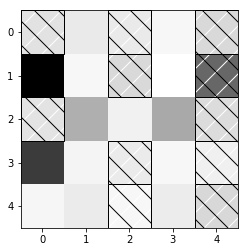

In [8]:
import matplotlib
weights = network[0][0] # first neuron in hidden layer
abs_weights = list(map(abs, weights)) # darkness only depends on absolute value
grid = [abs_weights[row:(row+5)] for row in range(0,25,5)] # turn the weights into a 5x5 grid [weights[0:5], ..., weights[20:25]]

ax = plt.gca() # to use hatching, we'll need the axis

ax.imshow(grid,cmap=matplotlib.cm.binary,interpolation='none')  # here same as plt.imshow use white-black color scale plot blocks as blocks

def patch(x, y, hatch, color):
    """return a matplotlib 'patch' object with the specified
    location, crosshatch pattern, and color"""
    return matplotlib.patches.Rectangle((x - 0.5, y - 0.5), 1, 1, hatch=hatch, fill=False, color=color)

# cross-hatch the negative weights
for i in range(5): # row
    for j in range(5): # column
        if weights[5*i + j] < 0: # row i, column j = weights[5*i + j]
            # add black and white hatches, so visible whether dark or light
            ax.add_patch(patch(j, i, '/', "white"))
            ax.add_patch(patch(j, i, '\\', "black"))
plt.show()